
Thanks for:
* https://www.kaggle.com/sishihara/moa-lgbm-benchmark#Preprocessing

* https://www.kaggle.com/ttahara/osic-baseline-lgbm-with-custom-metric

* https://zenn.dev/fkubota/articles/2b8d46b11c178ac2fa2d

* https://qiita.com/ryouta0506/items/619d9ac0d80f8c0aed92

* https://github.com/nejumi/tools_for_kaggle/blob/master/semi_supervised_learner.py

* https://upura.hatenablog.com/entry/2019/03/03/233534

* https://pompom168.hatenablog.com/entry/2019/07/22/113433

* https://www.kaggle.com/c/lish-moa/discussion/193878

* https://tsumit.hatenablog.com/entry/2020/06/20/044835

* https://www.kaggle.com/kushal1506/moa-pytorch-feature-engineering-0-01846

* https://www.kaggle.com/c/lish-moa/discussion/195195

* https://www.kaggle.com/gogo827jz/self-stacking-groupcv-xgboost

* https://www.kaggle.com/c/lish-moa/discussion/197158


In [1]:
# Version = "v1" # starter model
# Version = "v2" # Compare treat Vs. ctrl and minor modifications, StratifiedKFold
# Version = "v3" # Add debug mode and minor modifications
# Version = "v4" # Clipping a control with an outlier(25-75)
# Version = "v5" # Clipping a control with an outlier(20-80)
# Version = "v6" # under sampling 500 → oversamplling 500, lipping a control with an outlier(10-90)
# Version = "v7" # Use anotated data, under sampling 500 → oversamplling 500, clipping a control with an outlier(10-90)
# Version = "v8" # pseudo labeling (thresholds:0.5), timeout
# Version = "v9" # pseudo labeling (thresholds:0.6), timeout
# Version = "v10" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP
# Version = "v11" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP, lgbm parames adjust
# Version = "v12" # Feature engineering based on feature importance
# Version = "v13" # Calibration, SMOTE(k_neighbors=5→1)
# Version = "v14" # Removed the Calibration, SMOTE(k_neighbors=1), pseudo labeling (thresholds:0.7)
# Version = "v15" # Updata anotated data
# Version = "v16" # Remove noisy label(confidence: 0.5)
# Version = "v17" # Modifications with remove noisy label func, Calibration, confidence = y_prob.probability.max()*0.3
# Version = "v18" # SMOTE(k_neighbors=1→2), confidence = y_prob.probability.max()*0.2
# Version = "v19" # SMOTE(k_neighbors=2→3),
# Version = "v20" # Modifications with confidence, Removed the Calibration, SMOTE(k_neighbors=2), 
# Version = "v21" # DEBUG = False
# Version = "v22" # minor modifications
# Version = "v23" # TOP100→PCA→UMAP(n_components=3)
# Version = "v24" # TOP100→PCA→UMAP(n_components=10), UMAP(n_components=2→3)
# Version = "v25" # Feature engineering based on Feature importance
# Version = "v26" # Modify pseudo labeling func to exclude low confidence pseudo labels in the TEST data.
# Version = "v27" # LGBMClassifie:clf.predict→clf.predict_proba
# Version = "v28" # Calibration (No calbration:CV:0.06542)
# Version = "v29" # Remove Calibration, is_unbalance': True, SMOTE(k_neighbors=2→3), Modify pseudo labeling func to include low confidence pseudo labels in the TEST data, target_rate *= 1.2
# Version = "v30" # drop_duplicates(keep="last")
# Version = "v31" # target_rate *= 1.1, if Threshold <= 0.2: break, if sum(p_label)*1.5 >= check: break, if sum(p_label) <= check*1.5: break
# Version = "v32" # y_prob.probability.quantile(0.3), if Threshold >= 0.95: break
# Version = "v33" # RankGauss, Scaled by category, SMOTE(k_neighbors=2),
# Version = "v34" # RankGauss apply c-columns, remove TOP100, Add f_diff = lambda x: x - med, Create features
# Version = "v35" # f_div = lambda x: ((x+d)*10 / (abs(med)+d))**2, f_diff = lambda x: ((x-med)*10)**2, select features
# Version = "v36" # Add feature importance func
# Version = "v37" # Remove RankGauss for gene expression, fix feature importance func
# Version = "v38" # Add MultiLabel Stratification func, fix index of data before split with "data = data.sort_index(axis='index')""
# Version = "v39" # fix pseudo labeling func
# Version = "v40" # fix pseudo labeling func, create importance_cols_df with all columns
# Version = "v41" # Feature engineering based on Feature importance with v39 notebook
# Version = "v42" # Feature engineering based on Feature importance with v40 notebook
# Version = "v40.2" # Select, update fe_stats func based on v40 note book
# Version = "v42.1" # Remove Kolmogorov-Smirnov test and VarianceThreshold for inference, Threshold = np.quantile(y_prob, q=0.99)
# Version = "v43" # Inference, modify pseudo labeling func: lower, upper, change param 3→2.1
# Version = "v44.1" # Select,
# Version = "v44.2" # inference used v40.2 note book(updated fe_stats func), DEBUG=False, modify  eature_Engineering func, check*(3.5-len(str(int(check))))
# Version = "v45" # inference used v40.2, DEBUG=False, Add create_features func,  learning_rate(pseudo labeling): 0.01→0.02
# Version = "v46" # Select, Add 'g_d_g', 'c_d_c', 'g_df_g', 'c_df_c', 'd_g_df_g', 'd_c_df_c' to the kind_list, VarianceThreshold(0.91) 
# Version = "v47" # Select, Add detect_neg func but time over 9 hours
# Version = "v48" # inference used v46, DEBUG=False, modify Feature_Engineering func
# Version = "v49" # inference used v46, DEBUG=False, create_features(func="mean")
# Version = "v50" # Select, QuantileTransformer(n_quantiles=100), select_importance_cols(num=50)
# Version = "v51" # Select, QuantileTransformer(n_quantiles=defalt), select_importance_cols(num=100)
# Version = "v52" # inference used v46, adjust params in pseudo_labeling func
# Version = "v53" # Select, feature engining→VarianceThreshold(0.98), select_importance_cols(num=200)
# Version = "v54" # inference used v50, Not using create_cluster func 
# Version = "v55" # inference used v51, Not using create_cluster func
# Version = "v56" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':0.2,
# Version = "v57" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':3,
# Version = "v58" # inference used v53, 'lambda_l2':3,
# Version = "v59" # inference used v53, 'lambda_l2':15,
# Version = "v60" # inference used v53, 'lambda_l2':0.1,'bagging_fraction': 0.7, 'bagging_freq': 1, 'learning_rate': 0.03,
# Version = "v61" # inference used v53, 'lambda_l2':3,'bagging_fraction': 0.7, 'bagging_freq': 1, 'learning_rate': 0.03,
# Version = "v62" # inference used v53, self-Stacking prediction values, Threshold += 0.05, 'learning_rate': 0.05, 'lambda_l2':3

Version = "v63" # inference used v53, 'lambda_l2':15,

In [2]:
# DEBUG = True
DEBUG = False

# Library

In [3]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

import imblearn
from imblearn.over_sampling import SMOTE
from logging import getLogger, INFO, StreamHandler, FileHandler, Formatter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import random

from sklearn import preprocessing
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.model_selection import StratifiedKFold

from tqdm.notebook import tqdm
import torch

import warnings
warnings.filterwarnings("ignore")

print("lightgbm Version: ", lgb.__version__)
print("imblearn Version: ", imblearn.__version__)
print("numpy Version: ", np.__version__)
print("pandas Version: ", pd.__version__)

lightgbm Version:  2.3.1
imblearn Version:  0.7.0
numpy Version:  1.18.5
pandas Version:  1.1.3


# Utils

In [4]:
def get_logger(filename='log'):
    logger = getLogger(__name__)
    logger.setLevel(INFO)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=f"{filename}.{Version}.log")
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger

logger = get_logger()

def seed_everything(seed=777):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

# Config

In [5]:
if DEBUG:
    N_FOLD = 2
    Num_boost_round=1000
    Early_stopping_rounds=10
else:
    N_FOLD = 4
    Num_boost_round=10000
    Early_stopping_rounds=30

SEED = 42
seed_everything(seed=SEED)

Max_depth = 7

# Data Loading

In [6]:
train = pd.read_csv("../input/lish-moa/train_features.csv")
test = pd.read_csv("../input/lish-moa/test_features.csv")
train_targets_scored = pd.read_csv("../input/lish-moa/train_targets_scored.csv")
train_targets_nonscored = pd.read_csv("../input/lish-moa/train_targets_nonscored.csv")
sub = pd.read_csv("../input/lish-moa/sample_submission.csv")

# New data file available from 3th November
drug = pd.read_csv('../input/lish-moa/train_drug.csv')

In [7]:
Targets = train_targets_scored.columns[1:]
Scored = train_targets_scored.merge(drug, on='sig_id', how='left')
Scored

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0      id_000644bb2                            0                       0   
1      id_000779bfc                            0                       0   
2      id_000a6266a                            0                       0   
3      id_0015fd391                            0                       0   
4      id_001626bd3                            0                       0   
...             ...                          ...                     ...   
23809  id_fffb1ceed                            0                       0   
23810  id_fffb70c0c                            0                       0   
23811  id_fffc1c3f4                            0                       0   
23812  id_fffcb9e7c                            0                       0   
23813  id_ffffdd77b                            0                       0   

       acat_inhibitor  acetylcholine_receptor_agonist  \
0                   0                               0   
1                   0                               0   
2                   0                               0   
3                   0                               0   
4                   0                               0   
...               ...                             ...   
23809               0                               0   
23810               0                               0   
23811               0                               0   
23812               0                               0   
23813               0                               0   

       acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                      0                               0   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               0   
...                                  ...                             ...   
23809                                  0                               0   
23810                                  0                               0   
23811                                  0                               0   
23812                                  0                               0   
23813                                  0                               0   

       adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   
...                           ...                            ...   
23809                           0                              0   
23810                           0                              0   
23811                           0                              0   
23812                           0                              0   
23813                           0                              0   

       adenylyl_cyclase_activator  ...  trpv_agonist  trpv_antagonist  \
0                               0  ...             0                0   
1                               0  ...             0                0   
2                               0  ...             0                0   
3                               0  ...             0                0   
4                               0  ...             0                0   
...                           ...  ...           ...              ...   
23809                           0  ...             0                0   
23810                           0  ...             0                0   
23811                       

In [8]:
def label_encoding(train: pd.DataFrame, test: pd.DataFrame, encode_cols):
    n_train = len(train)
    train = pd.concat([train, test], sort=False).reset_index(drop=True)
    
    for f in encode_cols:
        try:
            lbl = preprocessing.LabelEncoder()
            train[f] = lbl.fit_transform(list(train[f].values))
        except:
            print(f)
    test = train[n_train:].reset_index(drop=True)
    train = train[:n_train]
    
    return train, test

In [9]:
# Manually self annotation with domain knowledge
annot = pd.read_csv("../input/moa-annot-data/20201024_moa_sig_list.v2.csv")
annot

sig_id  \
0                   adenylyl_cyclase_activator   
1             aldehyde_dehydrogenase_inhibitor   
2                               antiarrhythmic   
3                               anticonvulsant   
4                                   antifungal   
5                                antihistamine   
6   atp-sensitive_potassium_channel_antagonist   
7       bacterial_membrane_integrity_inhibitor   
8                        calcineurin_inhibitor   
9       catechol_o_methyltransferase_inhibitor   
10                               cdk_inhibitor   
11                coagulation_factor_inhibitor   
12                          elastase_inhibitor   
13                             erbb2_inhibitor   
14                  nicotinic_receptor_agonist   
15           nitric_oxide_production_inhibitor   
16               protein_phosphatase_inhibitor   
17                sphingosine_receptor_agonist   
18                                     steroid   
19       ubiquitin_specific_protease_inhibitor   

                                   nonscored1  \
0                  adenylyl_cyclase_inhibitor   
1             alcohol_dehydrogenase_inhibitor   
2                       na_k-atpase_inhibitor   
3         gaba_gated_chloride_channel_blocker   
4                 fungal_ergosterol_inhibitor   
5                 histamine_release_inhibitor   
6   atp-sensitive_potassium_channel_inhibitor   
7       bacterial_protein_synthesis_inhibitor   
8                            t_cell_inhibitor   
9                   dopamine_release_enhancer   
10                         cyclin_d_inhibitor   
11                       vitamin_k_antagonist   
12               leukocyte_elastase_inhibitor   
13          protein_tyrosine_kinase_inhibitor   
14             acetylcholine_release_enhancer   
15                                vasodilator   
16             tyrosine_phosphatase_inhibitor   
17   sphingosine_1_phosphate_receptor_agonist   
18                          anti-inflammatory   
19     ubiquitin-conjugating_enzyme_inhibitor   

                                 nonscored2  
0                                       NaN  
1                                       NaN  
2                 potassium_channel_blocker  
3                                       NaN  
4   fungal_lanosterol_demethylase_inhibitor  
5                                       NaN  
6                                       NaN  
7                                       NaN  
8                                       NaN  
9                                       NaN  
10                                      NaN  
11                                      NaN  
12                                      NaN  
13                                      NaN  
14                                      NaN  
15                                      NaN  
16                                      NaN  
17                                      NaN  
18                                      NaN  
19                                      NaN

In [10]:
annot_sig = []
annot_sig = annot.sig_id.tolist()
print(annot_sig)

['adenylyl_cyclase_activator', 'aldehyde_dehydrogenase_inhibitor', 'antiarrhythmic', 'anticonvulsant', 'antifungal', 'antihistamine', 'atp-sensitive_potassium_channel_antagonist', 'bacterial_membrane_integrity_inhibitor', 'calcineurin_inhibitor', 'catechol_o_methyltransferase_inhibitor', 'cdk_inhibitor', 'coagulation_factor_inhibitor', 'elastase_inhibitor', 'erbb2_inhibitor', 'nicotinic_receptor_agonist', 'nitric_oxide_production_inhibitor', 'protein_phosphatase_inhibitor', 'sphingosine_receptor_agonist', 'steroid', 'ubiquitin_specific_protease_inhibitor']


In [11]:
train_target = pd.concat([train_targets_scored, train_targets_nonscored], axis=1)
train_target.head() 

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0  id_000644bb2                            0                       0   
1  id_000779bfc                            0                       0   
2  id_000a6266a                            0                       0   
3  id_0015fd391                            0                       0   
4  id_001626bd3                            0                       0   

   acat_inhibitor  acetylcholine_receptor_agonist  \
0               0                               0   
1               0                               0   
2               0                               0   
3               0                               0   
4               0                               0   

   acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   

   adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   adenylyl_cyclase_activator  ...  ve-cadherin_antagonist  \
0                           0  ...                       0   
1                           0  ...                       0   
2                           0  ...                       0   
3                           0  ...                       0   
4                           0  ...                       0   

   vesicular_monoamine_transporter_inhibitor  vitamin_k_antagonist  \
0                                          0                     0   
1                                          0                     0   
2                                          0                     0   
3                                          0                     0   
4                                          0                     0   

   voltage-gated_calcium_channel_ligand  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   voltage-gated_potassium_channel_activator  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   voltage-gated_sodium_channel_blocker  wdr5_mll_interaction_inhibitor  \
0                                     0                               0   
1                                     0                               0   
2                                     0                               0   
3                                     0                               0   
4                                     0                               0   

   wnt_agonist  xanthine_oxidase_inhibitor  xiap_inhibitor  
0            0                           0               0  
1            0                           0               0  
2            0                           0               0  
3            0                           0               0  
4            0                           0               0  

[5 rows x 610 columns]

In [12]:
# For feature fngineering based on featrue importance with lgbm 
importance_cols = pd.read_csv("../input/moa-annot-data/importance_cols_df.v53.csv")
importance_cols

5-alpha_reductase_inhibitor 11-beta-hsd1_inhibitor acat_inhibitor  \
0                       d_g-493                 d_g-21    cut_d_g-508   
1                         g-648          d_g_max_min_p       df_g-420   
2                         g-643                d_g-401    cut_d_g-152   
3                         g-498                  g-497        d_g-534   
4                       d_g-478                d_g-685       df_g-322   
..                          ...                    ...            ...   
195                       g-317               df_g-589          g-596   
196                     d_g-317           cut_df_g-238    cut_d_g-763   
197                       g-427               df_g-229        df_c-51   
198                       g-638            cut_d_g-712       df_g-655   
199                       g-462               df_g-262      cut_g-672   

    acetylcholine_receptor_agonist acetylcholine_receptor_antagonist  \
0                      cut_d_g-363                            df_c-6   
1                           d_g-39                         cut_g-760   
2                      cut_d_g-641                       cut_d_g-763   
3                       cut_d_c-75                        cut_d_g-87   
4                      cut_d_g-521                       cut_d_g-744   
..                             ...                               ...   
195                    cut_d_g-422                              c-85   
196                          g-251                             g-497   
197                        d_g-699                             g-500   
198                       df_g-709                           d_g-641   
199                           g-16                             g-597   

    acetylcholinesterase_inhibitor adenosine_receptor_agonist  \
0                      cut_d_g-705                cut_d_g-142   
1                      cut_d_g-208                 cut_d_g-23   
2                          df_g-91                cut_d_g-641   
3                      cut_d_g-348                   df_g-386   
4                      cut_d_g-132                cut_d_g-521   
..                             ...                        ...   
195                       df_g-758                    df_c-65   
196                          g-707                   df_g-606   
197                          g-426                g_max_sum_p   
198                          g-456                      g-497   
199                    cut_d_g-647                  c_all_min   

    adenosine_receptor_antagonist adenylyl_cyclase_activator  \
0                     cut_d_g-641                       g-91   
1                     cut_d_g-430                    d_g-639   
2                         d_g-310                      g-138   
3                      cut_d_g-85                      g-344   
4                       cut_g-760                        c-7   
..                            ...                        ...   
195                    cut_d_c-89                  cut_g-672   
196                      df_g-115                cut_d_g-645   
197                       df_c-36                      g-720   
198                       df_g-13                      g-531   
199             c_all_kurt_skew_d                    d_g-242   

    adrenergic_receptor_agonist  ... tropomyosin_receptor_kinase_inhibitor  \
0                   cut_d_g-705  ...                                 g-226   
1                    cut_d_g-50  ...                               d_g-283   
2                   cut_d_g-300  ...                           cut_d_g-225   
3                         g-385  ...                                 g-689   
4                 d_g_max_min_p  ...                               df_g-31   
..                          ...  ...                                   ...   
195                    df_c_sum  ...                                 g-422   
196                     d_g-705  ...                                  c-80   
197       

# Training Utils

In [13]:
#===========================================================
# model
#===========================================================

def run_lgbm(target_col: str):
    target = get_target(target_col, annot_sig)
    target_rate = target.sum() / len(target)
    
    # estimate test target distribution
    Adj_target_rate = (2*target_rate)/(target.sum()**0.15)
    
    trt = train[target==1].copy().reset_index(drop=True)
    trt["target"] = 1
    trt = trt.drop("sig_id", axis=1)
    
    # under sampling
    othr =  Multi_Stratification(train, target_col, target)
    
    logger.info(f"{target_col}, len(trt): {len(trt)}, len(othr): {len(othr)}")
    logger.info(f"target_rate: {target_rate:.7f} → Adj_target_rate: {Adj_target_rate:.7f}")
    
    # Create train_data
    X_train = pd.concat([trt, othr], axis=0, sort=False, ignore_index=True)   
    y_train = X_train["target"]
    X_train = X_train.drop("target", axis=1)
    
    # over sampling with SMOTE
    if len(trt) < len(othr)*0.2:
        sm = SMOTE(0.2, k_neighbors=3, random_state=SEED)
        X_train, y_train = sm.fit_sample(X_train, y_train)
        pos_neg_ratio = 0.8
    else:
        pos_neg_ratio = 1-(len(trt)/len(othr))
     
    X_test = test.drop("sig_id", axis=1)
    
    # pseudo_labeling
    train_X, train_y, test_X = pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio)
    
    # fold_lgbm
    y_preds, score = fold_lgbm(train_X, train_y,test_X, target_col)
       
    return sum(y_preds) / len(y_preds), score

In [14]:
# Merge self annotated target func

def get_target(target_col, annot_sig):
    if target_col in annot_sig:
        t_cols = []
        for t_col in list(annot[annot.sig_id == target_col].iloc[0]):
            if t_col is not np.nan:
                t_cols.append(t_col)
                target = train_target[t_cols]
                target = target.sum(axis=1)
                #1 or more, replace it with 1.
                target = target.where(target < 1, 1)
    else:
        target = train_targets_scored[target_col]
    
    return target

In [15]:
# Under sampling func with drug anotation(New data file)

def Multi_Stratification(df, target_col, target):
    
    _df = df.copy() 
    sig_id_lst = [list(Scored.sig_id[Scored.drug_id == id_].sample())[0] for id_ in Scored.drug_id.unique()]
    
    # Remove sig_id wih target 
    del_idx = train[target==1].sig_id.unique()
    select_idx = [i for i in sig_id_lst if i not in del_idx]
    print(f"neg labels: {len(sig_id_lst)} → selected neg labels: {len(select_idx)}")
    
    # Select negative target
    _df = _df.set_index('sig_id')
    _df = _df.loc[select_idx, :]
    _df = _df.reset_index(drop=True)
    
    _df["target"] = 0
    
    return _df

In [16]:
def fold_lgbm(train_X_, train_y_, test_X_, target_col):
    
    y_preds = []
    oof_train = np.zeros((len(train_X_),))
    score = 0
    
    _train_X, _train_y, _test_X = train_X_.copy(), train_y_.copy(), test_X_.copy()
    
    for fold_, (train_index, valid_index) in enumerate(cv.split(_train_X, _train_y)):
        logger.info(f'len(train_index) : {len(train_index)}')
        logger.info(f'len(valid_index) : {len(valid_index)}')
        
        X_tr, X_val = _train_X.loc[train_index, :], _train_X.loc[valid_index, :]
        y_tr, y_val = _train_y[train_index], _train_y[valid_index]

        lgb_train = lgb.Dataset(X_tr, y_tr, categorical_feature=categorical_cols)
        lgb_eval = lgb.Dataset(X_val,y_val, reference=lgb_train,categorical_feature=categorical_cols)
        
        logger.info(f"================================= fold {fold_+1}/{cv.get_n_splits()} {target_col}=================================")
        
        model = lgb.train(params,
                          lgb_train,
                          valid_sets=[lgb_train, lgb_eval],
                          verbose_eval=1000,
                          num_boost_round=Num_boost_round,
                          early_stopping_rounds=Early_stopping_rounds)
        
        oof_train[valid_index] = model.predict(X_val, num_iteration=model.best_iteration)

        y_pred = model.predict(_test_X, num_iteration=model.best_iteration)
        y_preds.append(y_pred)
    
    score = log_loss(_train_y, oof_train)
    
    logger.info(f"{target_col} logloss: {score}")
    logger.info(f"=========================================================================================")
 
    return y_preds, score   

In [17]:
#===========================================================
# pseudo_labeling func
#===========================================================

def pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio, max_iter=3):
    
    X, y, X_test = select_data(target_col, X_train, y_train, X_test)    
    feature_importance_df = pd.DataFrame()
    
    for iter_ in range(1, max_iter+1):
    
        logger.info(f"================= Pseudo labeling {iter_} / {max_iter} =================")
        
        y_preds = np.zeros((X.shape[0], 2))
        pred_feat = np.zeros((X.shape[0], 1))
        y_preds[:, 0] = y.copy()
        y_prob = np.zeros((X_test.shape[0]))
        X_conf, y_conf, _importance_df= pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
        _importance_df["Feature"] = X.columns
        
        y_preds, y_prob, pred_feat, feature_importance_df = fold_lgbmclassifier(X, y, X_test, y_preds, y_prob, _importance_df, feature_importance_df)
        
        auc_score = roc_auc_score(y_preds[:, 0], y_preds[:, 1])
        logger.info(f"{iter_} / {max_iter} AUC score:{auc_score:.3f}") 
        y_preds = pd.DataFrame(y_preds, index=X.index, columns=[["Labels", "Preds"]])
        
        if iter_ == 1:
            quantile = pos_neg_ratio
            Threshold = np.quantile(y_prob, q=0.99)
        else:
            quantile = 1.0 - y_label_rate
        
        y_Threshold = y_preds.iloc[:, 1].quantile(quantile)
        logger.info(f"y_Threshold: {y_Threshold:.7f}, Threshold: {Threshold:.7f}, pos_neg_ratio: {pos_neg_ratio:.7f}")
            
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] < y_Threshold, 1).copy()
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] >= y_Threshold, 0).copy()
        y_preds = y_preds.sum(axis=1)
                
        corect_idx = y_preds[y_preds != 1].index.values
        X["pred_feat"] = pred_feat
        X_corect, y_corect = X[X.index.isin(corect_idx)], y[y.index.isin(corect_idx)]
        
        logger.info(f"Remove_noisy_data: {len(y)-len(y_corect)} → Positive_corect_labels: {sum(y_corect)}/{len(y_corect)}")
            
        # Remove low confidence labels
        y_prob = pd.DataFrame(y_prob, index=X_test.index, columns=["probability"])
        
        lower = (0.1*iter_) + 0.6
        upper = 2.0 - lower
        
        high_conf_0, high_conf_1 = min(Threshold*lower, 0.5), min(Threshold*upper, 0.8)
        p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
        
        p_label_rate = sum(p_label)/len(p_label)        
        logger.info(f"p_label_rate: {p_label_rate:.7f} Vs.target_rate: {target_rate:.5f}")
        logger.info(f"Num_p_label: {sum(p_label)}, conf_0:{high_conf_0:.5f}, conf_1:{high_conf_1:.5f}")        

        p_label, conf_idx, high_conf_0, high_conf_1, Threshold = Adj_threshold(p_label, conf_idx, high_conf_0, high_conf_1, Threshold, p_label_rate, target_rate, y_prob)
        
        # select data with confidence
        X_test["pred_feat"] = y_prob.copy()
        X_conf = X_test[X_test.index.isin(conf_idx)].copy()
        X, y = pd.concat([X_corect, X_conf], axis=0, ignore_index=True), pd.concat([y_corect, p_label], axis=0, ignore_index=True)
        
        logger.info(f"threshold: {Threshold:.7f}, positive_p_label: {sum(p_label)}/{len(p_label)}, p_label_rate: {sum(p_label)/len(p_label):.7f}")
        
        # updated train data
        X = X.drop_duplicates(keep="last").reset_index(drop=True)
        y = y[X.index.values].reset_index(drop=True)
        
        y_label_rate = sum(y)/len(y)
        logger.info(f"positive_y_label: {sum(y)}/{len(y)}, y_label_rate: {y_label_rate:.7f}")
        
    show_feature_importance(feature_importance_df, target_col, num=10)
        
    return X, y, X_test

In [18]:
# lgbm with pseudo_labeling

classifier_params = {
    'max_depth': Max_depth,
    'num_leaves': int((Max_depth**2)*0.7),
    'n_estimators': Num_boost_round,
    'learning_rate': 0.03,
    'objective': "binary",
    'colsample_bytree': 0.4,
    'subsample': 0.7,
    'subsample_freq': 1,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'random_state': SEED,
    'n_jobs': 4
    }

In [19]:
# lgbm with pseudo_labeling

def fold_lgbmclassifier(X_, y_, X_test_, _y_preds, _y_prob, _importance_df, feature_importance_df_):
    
    _X, _y, _X_test = X_.copy(), y_.copy(), X_test_.copy()
    
    for fold_, (train_idx, valid_idx) in enumerate(cv.split(_X, _y)):
        
        X_tr, X_val = _X.loc[train_idx, :], _X.loc[valid_idx, :]
        y_tr, y_val = _y[train_idx], _y[valid_idx]
            
        clf = LGBMClassifier(**classifier_params)
            
        clf.fit(X_tr, y_tr,
                eval_set=[(X_tr, y_tr), (X_val, y_val)],
                eval_metric='logloss',
                verbose=300,
                early_stopping_rounds=Early_stopping_rounds)
            
        _y_preds[valid_idx, 1] = clf.predict_proba(X_val, num_iteration=clf.best_iteration_)[:, 1]
        _y_prob += clf.predict_proba(_X_test, num_iteration=clf.best_iteration_)[:, 1] / N_FOLD
            
        # feature importance with target col
        _importance_df["importance"] = clf.feature_importances_
        feature_importance_df_ = pd.concat([feature_importance_df_, _importance_df], axis=0)
        
    pred_feat_ = _y_preds[:, 1].copy()
        
    return _y_preds, _y_prob, pred_feat_, feature_importance_df_
    

In [20]:
def select_data(target_col, X_train_, y_train_, X_test_):
    
    selected_cols = importance_cols[target_col]
    _X, _y, _X_test = X_train_.copy(), y_train_.copy(), X_test_.copy()
    
    _X, _X_test = _X[selected_cols], _X_test[selected_cols]
    
    return _X, _y, _X_test
    

In [21]:
def convert_label(df, conf_0, conf_1, threshold=0.5):
    
    df = df.copy()
    Probability = df.iloc[:, 0]
    
    # Remove low confidence labels
    conf_index = df[(Probability <= conf_0) & (conf_1 <= Probability)].index.values
    
    Probability = Probability.where(Probability < threshold, 1).copy()
    p_label = Probability.where(Probability >= threshold, 0).copy()
    
    return p_label, conf_index

In [22]:
def Adj_threshold(p_label, conf_idx, high_conf_0, high_conf_1, Threshold, p_label_rate, target_rate, y_prob):
    
    # Set the params of threshold based on train labels rate (target_rate).
    
    if (p_label_rate*1.5) < target_rate:
        check = len(y_prob)*target_rate
        for i in range(10):
            logger.info(f"Num_p_label: {sum(p_label)}, Expected: {check:.1f}, Adj_threshold_{i+1}: {Threshold:.7f}")
            if (sum(p_label)*(3.5-len(str(int(check)))) >= check) or ((Threshold-0.02) <= 0.1): break 
            Threshold -= 0.02
            high_conf_0, high_conf_1 = max(0.1, Threshold*lower), Threshold*upper
            p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
               
                
    if p_label_rate > (target_rate*1.5):
        check = len(y_prob)*target_rate
        for i in range(10):
            logger.info(f"Num_p_label: {sum(p_label)}, Expected: {check:.1f}, Adj_threshold_{i+1}: {Threshold:.7f}")
            if (sum(p_label) <= check*(3.5-len(str(int(check))))) or ((Threshold+0.05) >= 0.8): break
            Threshold += 0.05
            high_conf_0, high_conf_1 = min(Threshold*lower, 0.5), min(Threshold*upper, 0.8)
            p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
            
    return p_label, conf_idx, high_conf_0, high_conf_1, Threshold

In [23]:
def show_feature_importance(feature_importance_df, title="all", num=100):
    cols = (feature_importance_df[["Feature", "importance"]]
            .groupby("Feature")
            .mean()
            .sort_values(by="importance", ascending=False)[:num].index)
    
    best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]
    
    hight = int(num//3.3)
    plt.figure(figsize=(8, hight))
    sns.barplot(x="importance", 
                y="Feature", 
                data=best_features.sort_values(by="importance", ascending=False))
    plt.title(f'{title}_Features importance (averaged)')
    plt.tight_layout()
    plt.savefig(f"./{title}_feature_importance_{Version}.png")
    plt.show()

# Preprocessing

We have to convert some categorical features into numbers in train and test. We can identify categorical features by `pd.DataFrame.select_dtypes`.

In [24]:
train.head()

sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0  id_000644bb2  trt_cp       24      D1  1.0620  0.5577 -0.2479 -0.6208   
1  id_000779bfc  trt_cp       72      D1  0.0743  0.4087  0.2991  0.0604   
2  id_000a6266a  trt_cp       48      D1  0.6280  0.5817  1.5540 -0.0764   
3  id_0015fd391  trt_cp       48      D1 -0.5138 -0.2491 -0.2656  0.5288   
4  id_001626bd3  trt_cp       72      D2 -0.3254 -0.4009  0.9700  0.6919   

      g-4     g-5  ...    c-90    c-91    c-92    c-93    c-94    c-95  \
0 -0.1944 -1.0120  ...  0.2862  0.2584  0.8076  0.5523 -0.1912  0.6584   
1  1.0190  0.5207  ... -0.4265  0.7543  0.4708  0.0230  0.2957  0.4899   
2 -0.0323  1.2390  ... -0.7250 -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3  4.0620 -0.8095  ... -2.0990 -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4  1.4180 -0.8244  ...  0.0042  0.0048  0.6670  1.0690  0.5523 -0.3031   

     c-96    c-97    c-98    c-99  
0 -0.3981  0.2139  0.3801  0.4176  
1  0.1522  0.1241  0.6077  0.7371  
2 -0.6417 -0.2187 -1.4080  0.6931  
3 -1.6210 -0.8784 -0.3876 -0.8154  
4  0.1094  0.2885 -0.3786  0.7125  

[5 rows x 876 columns]

In [25]:
train.select_dtypes(include=['object']).columns

Index(['sig_id', 'cp_type', 'cp_dose'], dtype='object')

In [26]:
train, test = label_encoding(train, test, ['cp_type', 'cp_time', 'cp_dose'])

In [27]:
train['WHERE'] = 'train'
test['WHERE'] = 'test'

data = train.append(test)
data = data.reset_index(drop=True)
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
1      id_000779bfc        1        2        0  0.0743  0.4087  0.2991   
2      id_000a6266a        1        1        0  0.6280  0.5817  1.5540   
3      id_0015fd391        1        1        0 -0.5138 -0.2491 -0.2656   
4      id_001626bd3        1        2        1 -0.3254 -0.4009  0.9700   
...             ...      ...      ...      ...     ...     ...     ...   
27791  id_ff7004b87        1        0        0  0.4571 -0.5743  3.3930   
27792  id_ff925dd0d        1        0        0 -0.5885 -0.2548  2.5850   
27793  id_ffb710450        1        2        0 -0.3985 -0.1554  0.2677   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   
27795  id_ffd5800b6        1        2        0 -0.5174  0.2953  0.3286   

          g-3     g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95  \
0     -0.6208 -0.1944 -1.0120  ...  0.2584  0.8076  0.5523 -0.1912  0.6584   
1      0.0604  1.0190  0.5207  ...  0.7543  0.4708  0.0230  0.2957  0.4899   
2     -0.0764 -0.0323  1.2390  ... -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3      0.5288  4.0620 -0.8095  ... -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4      0.6919  1.4180 -0.8244  ...  0.0048  0.6670  1.0690  0.5523 -0.3031   
...       ...     ...     ...  ...     ...     ...     ...     ...     ...   
27791 -0.6202  0.8557  1.6240  ... -0.6422 -0.4367  0.0159 -0.6539 -0.4791   
27792  0.3456  0.4401  0.3107  ...  0.5780 -0.5888  0.8057  0.9312  1.2730   
27793 -0.6813  0.0152  0.4791  ...  0.9153 -0.1862  0.4049  0.9568  0.4666   
27794  1.0160 -1.3350 -0.2207  ... -0.4473 -0.8192  0.7785  0.3133  0.1286   
27795 -0.0428 -0.0800  0.8702  ...  0.1708  0.5939 -0.0507  0.2811 -0.4041   

         c-96    c-97    c-98    c-99  WHERE  
0     -0.3981  0.2139  0.3801  0.4176  train  
1      0.1522  0.1241  0.6077  0.7371  train  
2     -0.6417 -0.2187 -1.4080  0.6931  train  
3     -1.6210 -0.8784 -0.3876 -0.8154  train  
4      0.1094  0.2885 -0.3786  0.7125  train  
...       ...     ...     ...     ...    ...  
27791 -1.2680 -1.1280 -0.4167 -0.6600   test  
27792  0.2614 -0.2790 -0.0131 -0.0934   test  
27793  0.0461  0.5888 -0.4205 -0.1504   test  
27794 -0.2618  0.5074  0.7430 -0.0484   test  
27795 -0.4948  0.0757 -0.1356  0.5280   test  

[27796 rows x 877 columns]

In [28]:
# Select control data
ctl = train[(train.cp_type==0)].copy()
ctl = ctl.reset_index(drop=True)
ctl

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2     g-3  \
0     id_0054388ec        0        1        0 -0.6696 -0.2718 -1.2230 -0.6226   
1     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211  0.3054   
2     id_007bfbb91        0        0        1 -1.3200 -1.7340 -0.0741  1.5440   
3     id_008a986b7        0        1        1  0.4860  0.1430  0.5281 -0.0022   
4     id_009d8340f        0        0        1  0.4471 -0.0839 -0.3864  0.3196   
...            ...      ...      ...      ...     ...     ...     ...     ...   
1861  id_ff1f9e5fc        0        0        0  0.0465  0.6430 -0.2453  0.3521   
1862  id_ff469c482        0        2        0 -0.6204 -1.3800 -1.1880 -0.6573   
1863  id_ff89331ca        0        2        1 -0.1051  0.4335  0.3648 -0.0525   
1864  id_ffd26f361        0        1        1  0.6008  0.2781 -0.3319 -0.8782   
1865  id_fffc1c3f4        0        1        1  0.3942  0.3756  0.3109 -0.7389   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -1.1280  0.6041  ... -0.6828 -0.6594 -0.2043  0.3571 -0.1319  0.2187   
2    -1.8290 -0.0951  ...  1.0340  0.7393  1.1020  0.3786  0.2636 -0.5751   
3    -0.2334 -0.6607  ... -0.1866  0.7629  0.3288 -0.9915 -0.3694 -0.4979   
4     0.2584 -0.3156  ...  0.3939  0.7665  0.7932 -0.6804 -0.0435  0.0949   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  0.6195 -0.6659  ...  0.1621 -0.2065  0.8314 -0.1891 -0.0074  0.2131   
1862 -0.8408 -0.2447  ...  0.7366  0.5468  1.1450  0.5254  0.6224 -0.9630   
1863 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   
1864  0.9281  0.7535  ...  0.9569 -0.2065 -0.4918  0.7863  0.0504  0.8813   
1865  0.5505 -0.0159  ...  0.3755  0.7343  0.2807  0.4116  0.6422  0.2256   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.0737  0.6498 -1.4820  train  
2     0.3362  0.8543  0.9180  train  
3     0.5281 -0.9245 -0.9367  train  
4     0.2000 -0.4326  0.9364  train  
...      ...     ...     ...    ...  
1861 -0.1419 -0.2422  0.0457  train  
1862  0.8872 -0.0742 -0.6777  train  
1863 -0.8110 -0.1748 -0.3626  train  
1864  0.7757 -0.5272  0.7082  train  
1865  0.7592  0.6656  0.3808  train  

[1866 rows x 877 columns]

In [29]:
# clipping

def outlier_clip(df):
    df = df.copy()
    clipping = df.columns[4:6]
    for col in clipping:
        lower, upper= np.percentile(df[col], [10, 90])
        df[col] = np.clip(df[col], lower, upper)
    
    return df

ctl_df = pd.DataFrame(columns=train.columns)
for i in ctl.cp_time.unique():
    for j in ctl.cp_dose.unique():
        print(len(ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]))
        tmp_ctl = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]
        tmp_ctl = outlier_clip(tmp_ctl)
        ctl_df = pd.concat([ctl_df, tmp_ctl], axis=0).reset_index(drop=True)
ctl_df

343
305
301
305
307
305


sig_id cp_type cp_time cp_dose     g-0      g-1     g-2     g-3  \
0     id_0054388ec       0       1       0 -0.6696 -0.27180 -1.2230 -0.6226   
1     id_01b05de6c       0       1       0 -0.3176  0.48512 -0.3773  0.5555   
2     id_020ba48d9       0       1       0  0.8094 -0.33390  1.1130 -0.4192   
3     id_02c93b4a5       0       1       0 -0.0884 -1.54100  0.5562  0.4661   
4     id_03bc6d412       0       1       0  0.8431  0.09310 -0.0958 -0.4337   
...            ...     ...     ...     ...     ...      ...     ...     ...   
1861  id_fbb620181       0       2       1 -0.3490  0.72970 -4.1480 -1.0030   
1862  id_fbba92030       0       2       1 -0.8921  1.13520  0.4227  1.3270   
1863  id_fbc0849ad       0       2       1 -0.2948  0.21960 -0.3252 -0.2084   
1864  id_fd93fa37d       0       2       1 -0.2984 -0.47880 -2.3560 -0.6848   
1865  id_ff89331ca       0       2       1 -0.1051  0.43350  0.3648 -0.0525   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -0.4877  0.3413  ... -0.6163  0.8001  0.3389  0.7437  0.7533  0.2406   
2     0.4545 -0.4771  ... -0.4414 -0.2442  0.0557 -0.6597 -0.3713 -0.6929   
3    -0.1683  0.9515  ...  0.4766  0.9697  0.4613  0.8957  0.8227  1.2300   
4     1.0690 -0.6440  ... -1.1510 -0.5010 -0.2736  0.1270  0.3511  0.1233   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  2.4070 -0.9784  ... -1.4260 -0.8613 -0.0243 -0.6109  0.6377 -1.2590   
1862 -0.9839 -0.8469  ...  1.1340  0.7007  1.3320  0.6622  0.6167  0.9459   
1863 -0.6518  0.3542  ...  0.5014  0.6009  0.4560 -0.3360 -0.5091  0.6569   
1864  1.8700  1.0240  ... -0.4422 -0.6665 -0.8033 -1.0520  0.4103  0.4462   
1865 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.5057  0.8017  1.0280  train  
2    -0.3258  0.3602 -0.0595  train  
3     1.7180  0.6542  0.0580  train  
4    -0.8520  0.1767  0.1153  train  
...      ...     ...     ...    ...  
1861 -0.7238 -0.7734 -0.1274  train  
1862 -0.0344 -0.0186  0.5173  train  
1863  0.6203  0.6764  0.4504  train  
1864 -1.1580 -1.3060  0.1925  train  
1865 -0.8110 -0.1748 -0.3626  train  

[1866 rows x 877 columns]

In [30]:
col_list = list(data.columns)[:-1]
data_df = pd.DataFrame(columns=col_list)
Splitdata = []
d = 1e-6

for i in tqdm(data.cp_time.unique()):
    for j in data.cp_dose.unique():
        select = data[(data.cp_time==i) & (data.cp_dose==j)]
        print(len(select))
        
        for k in list(select['WHERE']): Splitdata.append(k)
        
        select = select.drop(columns='WHERE')
        med = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)].iloc[:, 4:].median()
        
        f_div = lambda x: ((10*x+d)/(med+d))**3
        select_div = select.iloc[:,4:].apply(f_div, axis=1).add_prefix('d_')
        tmp_data = pd.concat([select, select_div], axis=1, sort=False)
        
        
        f_diff = lambda x: ((x-med)*10)**2
        select_diff = select.iloc[:,4:].apply(f_diff, axis=1).add_prefix('df_')
        tmp_data = pd.concat([tmp_data, select_diff], axis=1, sort=False)
        
        data_df = pd.concat([data_df, tmp_data], axis=0)
        
data_df

4534
4538
4561
4536
5079
4548



sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [31]:
g_list = [col for col in data.columns[4:] if col.startswith("g-")]
c_list = [col for col in data.columns[4:] if col.startswith("c-")]

# clipping
clipping = data_df.columns[4+len(g_list):]
for col in tqdm(clipping):
    lower, upper = np.percentile(data_df[col], [1, 99])
    data_df[col] = np.clip(data_df[col], lower, upper)
data_df

sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [32]:
data_df = data_df.replace([np.inf, -np.inf], np.nan)
data_df = data_df.dropna(how='any', axis=1)
data = data_df.copy()
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.6208 -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      0.2277  1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.4438 -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38     0.3054 -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39    -1.1990  0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...     ...  ...          ...          ...          ...   
27754  0.7702 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759 -1.4950  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768  1.2300 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784 -0.6764  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794  1.0160 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [33]:
d_g_list = [col for col in data.columns[4:] if col.startswith("d_g-")]
d_c_list = [col for col in data.columns[4:] if col.startswith("d_c-")]
df_g_list = [col for col in data.columns[4:] if col.startswith("df_g-")]
df_c_list = [col for col in data.columns[4:] if col.startswith("df_c-")]

g_d_g_list = g_list + d_g_list 
c_d_c_list = c_list + d_c_list

g_df_g_list = g_list + df_g_list
c_df_c_list = c_list + df_c_list

d_g_df_g_list = d_g_list + df_g_list
d_c_df_c_list = d_c_list + df_c_list

g_all_list = g_list + d_g_list + df_g_list
c_all_list = c_list + d_c_list + df_c_list

In [34]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
    
# Z-score
# scaler = StandardScaler(with_mean=True, with_std=True)

# RankGauss
scaler = QuantileTransformer(output_distribution='normal', random_state=SEED)

# Without Z-scored gene expression data
for col in tqdm(data.columns[4+len(g_list):]):
    size = len(data[col].values)
    
    raw = data[col].values.reshape(size, 1)
    scaler.fit(raw)

    data[col] = scaler.transform(raw).reshape(1, size)[0]
    
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...   df_c-90   df_c-91   df_c-92   df_c-93  \
0     -0.6208 -0.1944 -1.0120  ... -1.810818 -1.556684  0.248606 -1.083179   
5      0.2277  1.2810  0.5203  ...  1.204512  0.578443  1.006571  1.139912   
36    -0.4438 -0.5992 -0.2523  ...  0.722254 -0.057595 -0.552164 -0.559241   
38     0.3054 -1.1280  0.6041  ...  0.374101  0.776318  0.609079  0.186897   
39    -1.1990  0.4869 -0.0935  ...  1.545960  1.713131  1.361963  1.543328   
...       ...     ...     ...  ...       ...       ...       ...       ...   
27754  0.7702 -0.1861  0.3608  ... -0.147978  0.572841 -1.187832 -0.046089   
27759 -1.4950  0.6673 -1.5380  ...  1.145838  0.589930  1.501425  0.751316   
27768  1.2300 -0.5804  0.0633  ... -1.310017 -1.616881 -0.099856  0.290319   
27784 -0.6764  0.1435 -1.6810  ...  0.949547  0.513294 -0.572693  0.836947   
27794  1.0160 -1.3350 -0.2207  ... -1.093272  0.292672  0.617046  0.026101   

        df_c-94   df_c-95   df_c-96   df_c-97   df_c-98   df_c-99  
0      0.184056 -0.422826  0.452858 -1.087786 -1.717424 -1.652775  
5      0.620313 -1.168574  0.544603 -1.732771 -0.122754  0.767287  
36    -0.181398 -0.197771 -0.918947  0.003369 -1.947569 -1.204362  
38    -1.233969 -0.059989 -0.958117 -0.570161 -0.453190  1.387738  
39     1.492319  1.588429  1.517699  1.513423  1.721750  0.753663  
...         ...       ...       ...       ...       ...       ...  
27754 -0.472173  0.185676 -0.600581  0.372026 -1.536801  0.434025  
27759  1.638799  1.135045  1.459280  1.082334  1.356379  1.247627  
27768  0.222431  0.772244 -0.884043 -1.473699  1.308167  0.237404  
27784  0.502350  1.305647  1.236926  1.021927  0.945616  1.153026  
27794 -1.747524 -1.242866 -0.207664 -0.742805 -0.091712 -0.628309  

[27796 rows x 2620 columns]

In [35]:
#std_df = data.iloc[:, 4:].copy()

In [36]:
feature_list = (g_list, 
                c_list, 
                d_g_list, 
                d_c_list, 
                df_g_list,
                df_c_list, 
                g_d_g_list, 
                c_d_c_list, 
                g_df_g_list, 
                c_df_c_list, 
                d_g_df_g_list, 
                d_c_df_c_list,
                g_all_list, 
                c_all_list)


kind_list = ('g', 
             'c', 
             'd_g', 
             'd_c', 
             'df_g', 
             'df_c',  
             'g_d_g', 
             'c_d_c', 
             'g_df_g', 
             'c_df_c', 
             'd_g_df_g', 
             'd_c_df_c',
             'g_all', 
             'c_all')


In [37]:
std_df = data.iloc[:, 4:].copy()

In [38]:
N_bin = 7

for col_ in tqdm(std_df.columns):
    std_df[f"cut_{col_}"] = pd.cut(std_df[col_], N_bin, labels=False)

# Count bin_cnt types
for i in tqdm(range(N_bin-1, -1, -1)):
    std_df[f"bin_cnt_{i}"] = std_df.apply(lambda x: (x == i).sum(), axis=1)
std_df

g-0     g-1     g-2     g-3     g-4     g-5     g-6     g-7     g-8  \
0      1.0620  0.5577 -0.2479 -0.6208 -0.1944 -1.0120 -1.0220 -0.0326  0.5548   
5     -0.6111  0.2941 -0.9901  0.2277  1.2810  0.5203  0.0543 -0.2225 -0.1586   
36    -0.4026  0.1662 -0.6307 -0.4438 -0.5992 -0.2523 -1.3770 -0.7637 -1.4880   
38    -0.1636 -1.8230 -0.5211  0.3054 -1.1280  0.6041  0.3856 -0.1670 -0.5400   
39     1.6310 -2.1430 -0.0943 -1.1990  0.4869 -0.0935  1.2090 -3.8910 -1.5450   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27754 -0.4157 -0.0461 -0.9751  0.7702 -0.1861  0.3608  0.5174 -0.1344  0.9298   
27759  0.7107 -0.3274 -0.0099 -1.4950  0.6673 -1.5380 -0.5368 -5.0720  2.1020   
27768 -0.0776  0.4437 -0.1530  1.2300 -0.5804  0.0633  0.6952 -0.7427 -0.1058   
27784 -1.0740  0.7350  0.3304 -0.6764  0.1435 -1.6810 -1.1370 -0.0526 -0.4083   
27794 -1.0960 -1.7750 -0.3977  1.0160 -1.3350 -0.2207 -0.3611 -1.3020  1.0150   

          g-9  ...  cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  \
0     -0.0921  ...            2            2            2         14   
5      0.4289  ...            2            3            4         24   
36    -0.1970  ...            3            2            2         11   
38     0.2721  ...            3            3            4         12   
39    -2.2870  ...            4            4            4         69   
...       ...  ...          ...          ...          ...        ...   
27754 -0.1501  ...            3            2            3          5   
27759 -2.5410  ...            4            4            4         48   
27768  0.8812  ...            2            4            3         31   
27784  1.0340  ...            4            4            4         17   
27794  0.6747  ...            2            3            3         13   

       bin_cnt_5  bin_cnt_4  bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0             72        521       1347        580         62         21  
5             98        620       1268        524         67         18  
36            64        541       1313        579         82         29  
38            79        561       1323        552         65         25  
39            91        874        676        754        100         53  
...          ...        ...        ...        ...        ...        ...  
27754         78        512       1317        614         72         23  
27759        101        866        819        644         98         41  
27768         87        649       1178        571         69         34  
27784         62        573       1177        680         91         17  
27794         88        636       1246        535         79         22  

[27796 rows x 5239 columns]

In [39]:
n_clusters = 7

def create_cluster(data, features, n_clusters):
    
    from sklearn.cluster import KMeans
    
    _data = data[features].copy()
    kmeans = KMeans(n_clusters = n_clusters, random_state = SEED).fit(_data)
    cluster_label = kmeans.labels_[:_data.shape[0]]
 
    return cluster_label


def detect_cluster(data, feature_list, kind_list, n_clusters):
    
    _data = data.copy()
    
    for idx, feature in enumerate(tqdm(feature_list)):
        _data[f'clusters_{kind_list[idx]}'] = create_cluster(data, feature, n_clusters=n_clusters)
    
    _data = _data.iloc[:, -len(feature_list):].copy()
    
    return _data

In [40]:
clusters = detect_cluster(data, feature_list, kind_list, n_clusters)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  clusters_d_g_df_g  clusters_d_c_df_c  clusters_g_all  \
0                    4                  3                  3               0   
5                    3                  5                  1               0   
36                   1                  5                  3               0   
38                   5                  5                  3               6   
39                   0                  6                  2               4   
...                ...                ...                ...             ...   
27754                1                  3                  3               0   
27759                2                  6                  2               1   
27768                1                  3                  3               0   
27784                2                  0                  4               6   
27794                1                  0                  3               6   

       clusters_c_all  
0                   5  
5                   3  
36                  5  
38                  0  
39                  1  
...               ...  
27754               0  
27759               1  
27768               0  
27784               4  
27794               5  

[27796 rows x 14 columns]

In [41]:
# Count cluster types
for i in tqdm(range(n_clusters-1, -1, -1)):
    clusters[f"cnt_{i}"] = clusters.apply(lambda x: (x == i).sum(), axis=1)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  ...  clusters_d_c_df_c  clusters_g_all  \
0                    4  ...                  3               0   
5                    3  ...                  1               0   
36                   1  ...                  3               0   
38                   5  ...                  3               6   
39                   0  ...                  2               4   
...                ...  ...                ...             ...   
27754                1  ...                  3               0   
27759                2  ...                  2               1   
27768                1  ...                  3               0   
27784                2  ...                  4               6   
27794                1  ...                  3               6   

       clusters_c_all  cnt_6  cnt_5  cnt_4  cnt_3  cnt_2  cnt_1  cnt_0  
0                   5      0      2      2      2      6      2      4  
5                   3      2      1      3      4      1      5      2  
36                  5      1      3      1      3      2      5      2  
38                  0      2      3      3      3      1      3      3  
39                  1      1      2      1      2      6      3      3  
...               ...    ...    ...    ...    ...    ...    ...    ...  
27754               0      0      2      2      2      4      2      6  
27759               1      1      2      0      2      6      3      4  
27768               0      0      2      2      3      3      2      5  
27784               4      3      1      3      4      2      3      1  
27794               5      3      2      1      3      3      3      2  

[27796 rows x 21 columns]

In [42]:
def fe_stats(df, features, kind):
    
    df_ = df.copy()
    d = 1e-6
    MAX = df_[features].max(axis = 1) 
    MIN = df_[features].min(axis = 1)
    Kurt = df_[features].kurtosis(axis = 1)
    Skew = df_[features].skew(axis = 1)
    SUM = df_[features].sum(axis = 1)
    MAD = df_[features].mad(axis = 1)
    STD = df_[features].std(axis = 1)
    
    df_[f'{kind}_max'] = MAX
    df_[f'{kind}_min'] = MIN
    df_[f'{kind}_max_min_p'] = MAX*MIN
    df_[f'{kind}_max_min_d'] = (MAX+d)/(MIN+d)
    
    df_[f'{kind}_kurt'] = Kurt
    df_[f'{kind}_max_kurt_p'] = MAX*Kurt
    df_[f'{kind}_min_kurt_p'] = MIN*Kurt
    df_[f'{kind}_max_kurt_d'] = (MAX+d)/(Kurt+d)
    df_[f'{kind}_min_kurt_d'] = (MIN+d)/(Kurt+d)
    
    df_[f'{kind}_skew'] = Skew
    df_[f'{kind}_max_skew_p'] = MAX*Skew
    df_[f'{kind}_min_skew_p'] = MIN*Skew
    df_[f'{kind}_max_skew_d'] = (MAX+d)/(Skew+d)
    df_[f'{kind}_min_skew_d'] = (MIN+d)/(Skew+d)
    
    df_[f'{kind}_kurt_skew_p'] = Kurt*Skew
    df_[f'{kind}_kurt_skew_d'] = (Kurt+d)/(Skew+d)
    
    df_[f'{kind}_sum'] = SUM
    df_[f'{kind}_max_sum_p'] = MAX*SUM
    df_[f'{kind}_min_sum_p'] = MIN*SUM
    df_[f'{kind}_max_sum_d'] = (MAX+d)/(SUM+d)
    df_[f'{kind}_min_sum_d'] = (MIN+d)/(SUM+d)
    
    df_[f'{kind}_mad'] = MAD
    df_[f'{kind}_max_mad_p'] = MAX*MAD
    df_[f'{kind}_min_mad_p'] = MIN*MAD
    df_[f'{kind}_max_mad_d'] = (MAX+d)/(MAD+d)
    df_[f'{kind}_min_mad_d'] = (MIN+d)/(MAD+d)
    
    df_[f'{kind}_std'] = STD
    df_[f'{kind}_max_std_p'] = MAX*STD
    df_[f'{kind}_min_std_p'] = MIN*STD
    df_[f'{kind}_max_std_d'] = (MAX+d)/(STD+d)
    df_[f'{kind}_min_std_d'] = (MIN+d)/(STD+d)
    
    df_[f'{kind}_mean'] = df_[features].mean(axis = 1)
    df_[f'{kind}_median'] = df_[features].median(axis = 1)

    return df_

def detect_stats(data, feature_list, kind_list):
    
    for idx, feature in enumerate(tqdm(feature_list)):
        data = fe_stats(data, feature, kind=kind_list[idx])

    stats = data.iloc[:, -33*len(feature_list):].copy()
    
    return stats

In [43]:
stats = detect_stats(data, feature_list, kind_list)
stats

g_max  g_min  g_max_min_p  g_max_min_d    g_kurt  g_max_kurt_p  \
0      3.394 -5.691   -19.315254    -0.596381  6.353564     21.563996   
5      4.198 -5.836   -24.499528    -0.719329  6.906291     28.992608   
36     4.969 -5.035   -25.018915    -0.986892  5.868527     29.160711   
38     3.004 -5.065   -15.215260    -0.593090  2.237752      6.722207   
39     5.890 -8.654   -50.972060    -0.680610  0.820988      4.835622   
...      ...    ...          ...          ...       ...           ...   
27754  3.707 -2.695    -9.990365    -1.375511  1.624540      6.022169   
27759  9.138 -6.632   -60.603216    -1.377865  1.948765     17.807811   
27768  6.016 -7.747   -46.605952    -0.776559  7.304903     43.946299   
27784  5.205 -2.912   -15.156960    -1.787432  4.880383     25.402395   
27794  3.005 -4.763   -14.312815    -0.630905  2.854291      8.577145   

       g_min_kurt_p  g_max_kurt_d  g_min_kurt_d    g_skew  ...  \
0        -36.158132      0.534188     -0.895717 -0.711197  ...   
5        -40.305112      0.607852     -0.845026 -0.660433  ...   
36       -29.548034      0.846720     -0.857966  0.052599  ...   
38       -11.334214      1.342418     -2.263431 -0.159638  ...   
39        -7.104834      7.174271    -10.540938 -0.452524  ...   
...             ...           ...           ...       ...  ...   
27754     -4.378134      2.281876     -1.658930  0.069345  ...   
27759    -12.924207      4.689123     -3.403179  0.138626  ...   
27768    -56.591087      0.823556     -1.060520  0.073817  ...   
27784    -14.211676      1.066515     -0.596674  0.950339  ...   
27794    -13.594989      1.052801     -1.668715 -0.851197  ...   

       c_all_min_mad_p  c_all_max_mad_d  c_all_min_mad_d  c_all_std  \
0            -3.432555         3.335679        -7.875495   0.932513   
5            -4.314500         6.265636        -6.265633   1.324752   
36           -3.258350         2.578556        -8.296549   0.879787   
38           -1.077932         3.577624        -4.178717   0.657636   
39           -2.434068         1.467836        -1.480812   1.383007   
...                ...              ...              ...        ...   
27754        -3.607899         2.997863        -7.492746   0.860453   
27759        -6.122717         2.026450        -4.415210   1.313018   
27768        -4.173510         2.842617        -6.477299   1.080523   
27784        -4.023208         2.716246        -6.719282   0.915916   
27794        -1.292640         2.903065        -3.865813   0.728651   

       c_all_max_std_p  c_all_min_std_p  c_all_max_std_d  c_all_min_std_d  \
0             2.053567        -4.848449         2.361560        -5.575614   
5             6.887830        -6.887830         3.924762        -3.924761   
36            1.421688        -4.574309         1.836746        -5.909762   
38            1.194964        -1.395737         2.763012        -3.227239   
39            2.602665        -2.625675         1.360722        -1.372750   
...                ...              ...              ...              ...   
27754         1.789970        -4.473785         2.417637        -6.042551   
27759         3.133307        -6.826824         1.817446        -3.959833   
27768         2.465506        -5.618003         2.111728        -4.811867   
27784         1.925084        -4.762158         2.294763        -5.676645   
27794         1.223192        -1.628843         2.303856        -3.067886   

       c_all_mean  c_all_median  
0        0.074947      0.189242  
5        0.963157      0.893578  
36      -0.029827      0.041742  
38      -0.113624     -0.096799  
39      -0.403157     -1.171244  
...           ...           ...  
27754   -0.127774     -0.081298  
27759   -0.416387     -1.035333  
27768   -0.079957     -0.026703  
27784   -0.309337     -0.623038  
27794   -0.017448     -0.012408  

[27796 rows x 462 columns]

In [44]:
# Add data with sig_id, cp_type, cp_time, and cp_dose
data = pd.concat([data.iloc[:, :4], clusters], axis=1)
data = pd.concat([data, stats], axis=1)
data = pd.concat([data, std_df], axis=1)
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0                2            2            2         14         72        521   
5                2            3            4         24         98        620   
36               3            2            2         11         64        541   
38               3            3            4         12         79        561   
39               4            4            4         69         91        874   
...            ...          ...          ...        ...        ...        ...   
27754            3            2            3          5         78        512   
27759            4            4            4         48        101        866   
27768            2            4            3         31         87        649   
27784            4            4            4         17         62        573   
27794            2            3            3         13         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        754        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [45]:
# clipping

clipping = data.columns[4:]

for col in tqdm(clipping):
    lower, upper = np.percentile(data[col], [1, 99])
    data[col] = np.clip(data[col], lower, upper)
    
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0              2.0          2.0          2.0       14.0         72        521   
5              2.0          3.0          4.0       24.0         98        620   
36             3.0          2.0          2.0       11.0         64        541   
38             3.0          3.0          4.0       12.0         79        561   
39             4.0          4.0          4.0       69.0         91        874   
...            ...          ...          ...        ...        ...        ...   
27754          3.0          2.0          3.0        5.0         78        512   
27759          4.0          4.0          4.0       48.0        101        866   
27768          2.0          4.0          3.0       31.0         87        649   
27784          4.0          4.0          4.0       17.0         62        573   
27794          2.0          3.0          3.0       13.0         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        713        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [46]:
data['WHERE'] = Splitdata
train = data[data['WHERE']=="train"].drop('WHERE', axis=1).reset_index(drop=True)
test = data[data['WHERE']=="test"].drop('WHERE', axis=1).reset_index(drop=True)

# Modeling

In [47]:
cv = StratifiedKFold(n_splits=N_FOLD, shuffle=True, random_state=SEED)

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'learning_rate': 0.1,
    'num_threads': 4,
    'verbose': -1,
    'max_depth': Max_depth,
    'num_leaves': int((Max_depth**2)*0.7),
    'feature_fraction':0.4, # randomly select part of features on each iteration
    'lambda_l1':0.1,
    'lambda_l2':15,
    'bagging_fraction': 0.7,
    'bagging_freq': 1,
}


In [48]:
categorical_cols = []

def RUN():
    
    scores = []

    for target_col in tqdm(train_targets_scored.columns[1:]):
        _preds, _score = run_lgbm(target_col)

        sub[target_col] = _preds
        scores.append(_score)
    
    sub.to_csv('submission.csv', index=False)
    
    logger.info(f"CV:{np.mean(scores)}")
    

neg labels: 3289 → selected neg labels: 3284


5-alpha_reductase_inhibitor, len(trt): 17, len(othr): 3284
target_rate: 0.0007139 → Adj_target_rate: 0.0009334
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115874	valid_1's binary_logloss: 0.00386763
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000379561	valid_1's binary_logloss: 0.00239441
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112728	valid_1's binary_logloss: 0.00386085
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000372342	valid_1's binary_logloss: 0.00202909
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011629	valid_1's binary_logloss: 0.0022998
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000374375	valid_1's binary_logloss: 0.000919472
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112583	valid_1's binary_logloss: 0.00505643


1 / 3 AUC score:1.000
y_Threshold: 0.0019505, Threshold: 0.0057263, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00071
Num_p_label: 40.0, conf_0:0.00401, conf_1:0.00744
Num_p_label: 40.0, Expected: 2.8, Adj_threshold_1: 0.0057263
Num_p_label: 4.0, Expected: 2.8, Adj_threshold_2: 0.0557263
threshold: 0.0557263, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000390335	valid_1's binary_logloss: 0.00351569


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000516786	valid_1's binary_logloss: 0.00247734
Early stopping, best iteration is:
[389]	training's binary_logloss: 0.000283033	valid_1's binary_logloss: 0.00214784
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000523193	valid_1's binary_logloss: 0.00141213
[600]	training's binary_logloss: 0.000180029	valid_1's binary_logloss: 0.00107029
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.000156081	valid_1's binary_logloss: 0.00103364
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000545879	valid_1's binary_logloss: 0.000918916
[600]	training's binary_logloss: 0.000186852	valid_1's binary_logloss: 0.000444009
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000184138	valid_1's binary_logloss: 0.000438885
Training until validation scores don't improve for 30

2 / 3 AUC score:1.000
y_Threshold: 0.6298842, Threshold: 0.0557263, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0439478 Vs.target_rate: 0.00071
Num_p_label: 175.0, conf_0:0.04458, conf_1:0.06687
Num_p_label: 175.0, Expected: 2.8, Adj_threshold_1: 0.0557263
Num_p_label: 174.0, Expected: 2.8, Adj_threshold_2: 0.1057263
Num_p_label: 174.0, Expected: 2.8, Adj_threshold_3: 0.1557263
Num_p_label: 174.0, Expected: 2.8, Adj_threshold_4: 0.2057263
Num_p_label: 169.0, Expected: 2.8, Adj_threshold_5: 0.2557263
Num_p_label: 160.0, Expected: 2.8, Adj_threshold_6: 0.3057263
Num_p_label: 138.0, Expected: 2.8, Adj_threshold_7: 0.3557263
Num_p_label: 121.0, Expected: 2.8, Adj_threshold_8: 0.4057263
Num_p_label: 102.0, Expected: 2.8, Adj_threshold_9: 0.4557263


Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000200516	valid_1's binary_logloss: 0.00102464


Num_p_label: 80.0, Expected: 2.8, Adj_threshold_10: 0.5057263
threshold: 0.5557263, positive_p_label: 63.0/3982, p_label_rate: 0.0158212
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000528027	valid_1's binary_logloss: 0.00571356
Early stopping, best iteration is:
[404]	training's binary_logloss: 0.000271863	valid_1's binary_logloss: 0.00516169
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000526372	valid_1's binary_logloss: 0.00141294
[600]	training's binary_logloss: 0.000180796	valid_1's binary_logloss: 0.00106156
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000174202	valid_1's binary_logloss: 0.00104952
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000545307	valid_1's binary_logloss: 0.000884948
[600]	training's binary_logloss: 0.000185556	valid_1's binary_logloss: 0.000416107
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000178471	valid_1's binary_logloss: 0.000411265
Training until validation scores don't improve for 30

3 / 3 AUC score:1.000
y_Threshold: 0.6420358, Threshold: 0.5557263, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0140633 Vs.target_rate: 0.00071
Num_p_label: 56.0, conf_0:0.50000, conf_1:0.61130
Num_p_label: 56.0, Expected: 2.8, Adj_threshold_1: 0.5557263
Num_p_label: 39.0, Expected: 2.8, Adj_threshold_2: 0.6057263
Num_p_label: 29.0, Expected: 2.8, Adj_threshold_3: 0.6557263
Num_p_label: 16.0, Expected: 2.8, Adj_threshold_4: 0.7057263
Num_p_label: 11.0, Expected: 2.8, Adj_threshold_5: 0.7557263
threshold: 0.7557263, positive_p_label: 11.0/3982, p_label_rate: 0.0027624


Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000200939	valid_1's binary_logloss: 0.000920372


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


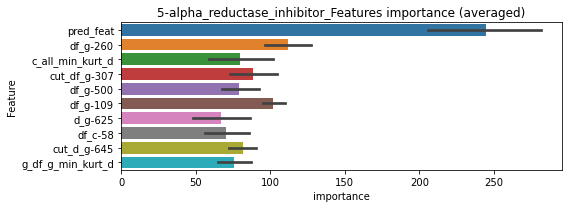

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000676953	valid_1's binary_logloss: 0.00492616
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000428971	valid_1's binary_logloss: 0.000987192
[2000]	training's binary_logloss: 0.000263994	valid_1's binary_logloss: 0.000800099
Early stopping, best iteration is:
[2175]	training's binary_logloss: 0.000253589	valid_1's binary_logloss: 0.000791621


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000435152	valid_1's binary_logloss: 0.00039091
[2000]	training's binary_logloss: 0.000264271	valid_1's binary_logloss: 0.000226469
[3000]	training's binary_logloss: 0.000217136	valid_1's binary_logloss: 0.00017814
[4000]	training's binary_logloss: 0.000195555	valid_1's binary_logloss: 0.000154848
[5000]	training's binary_logloss: 0.000183967	valid_1's binary_logloss: 0.000142269
[6000]	training's binary_logloss: 0.000176192	valid_1's binary_logloss: 0.000133909
[7000]	training's binary_logloss: 0.000170517	valid_1's binary_logloss: 0.000127814
Early stopping, best iteration is:
[7770]	training's binary_logloss: 0.000167158	valid_1's binary_logloss: 0.000124288


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000435347	valid_1's binary_logloss: 0.00133141
Early stopping, best iteration is:
[1944]	training's binary_logloss: 0.000270641	valid_1's binary_logloss: 0.00109561


5-alpha_reductase_inhibitor logloss: 0.0017345909838768262


neg labels: 3289 → selected neg labels: 3286


11-beta-hsd1_inhibitor, len(trt): 18, len(othr): 3286
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120911	valid_1's binary_logloss: 0.00254944
[600]	training's binary_logloss: 0.000355833	valid_1's binary_logloss: 0.00101872
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000355833	valid_1's binary_logloss: 0.00101872
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120435	valid_1's binary_logloss: 0.00286682
[600]	training's binary_logloss: 0.000362048	valid_1's binary_logloss: 0.00126535
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000362048	valid_1's binary_logloss: 0.00126535
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123379	valid_1's binary_logloss: 0.00322015
[600]	training's binary_logloss: 0.000364215	valid_1's binary_logloss: 0.00182115
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00036515	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0017932, Threshold: 0.0051256, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000360677	valid_1's binary_logloss: 0.00076949
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000360086	valid_1's binary_logloss: 0.000768592


Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00359, conf_1:0.00666
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0051256
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_2: 0.0551256
threshold: 0.0551256, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000573133	valid_1's binary_logloss: 0.00160383
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000197872	valid_1's binary_logloss: 0.00112145
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000544876	valid_1's binary_logloss: 0.000974474
[600]	training's binary_logloss: 0.000172758	valid_1's binary_logloss: 0.000445767
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000171126	valid_1's binary_logloss: 0.000444791
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000549776	valid_1's binary_logloss: 0.00083249
[600]	training's binary_logloss: 0.0001729	valid_1's binary_logloss: 0.000417431
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000149795	valid_1's binary_logloss: 0.000383622
Training until validation scores don't improve for 30

2 / 3 AUC score:1.000
y_Threshold: 0.6469055, Threshold: 0.0551256, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0424410 Vs.target_rate: 0.00076
Num_p_label: 169.0, conf_0:0.04410, conf_1:0.06615
Num_p_label: 169.0, Expected: 3.0, Adj_threshold_1: 0.0551256
Num_p_label: 169.0, Expected: 3.0, Adj_threshold_2: 0.1051256
Num_p_label: 169.0, Expected: 3.0, Adj_threshold_3: 0.1551256
Num_p_label: 168.0, Expected: 3.0, Adj_threshold_4: 0.2051256
Num_p_label: 161.0, Expected: 3.0, Adj_threshold_5: 0.2551256
Num_p_label: 141.0, Expected: 3.0, Adj_threshold_6: 0.3051256
Num_p_label: 124.0, Expected: 3.0, Adj_threshold_7: 0.3551256
Num_p_label: 100.0, Expected: 3.0, Adj_threshold_8: 0.4051256
Num_p_label: 72.0, Expected: 3.0, Adj_threshold_9: 0.4551256
Num_p_label: 53.0, Expected: 3.0, Adj_threshold_10: 0.5051256
threshold: 0.5551256, positive_p_label: 38.0/3982, p_label_rate: 0.0095429
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
==

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000569027	valid_1's binary_logloss: 0.00157943
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000189257	valid_1's binary_logloss: 0.00113093
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000544519	valid_1's binary_logloss: 0.000957992
[600]	training's binary_logloss: 0.000173339	valid_1's binary_logloss: 0.000449833
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000178757	valid_1's binary_logloss: 0.000448454
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000556194	valid_1's binary_logloss: 0.000851661
[600]	training's binary_logloss: 0.000173265	valid_1's binary_logloss: 0.000443411
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000148551	valid_1's binary_logloss: 0.000406569
Training until validation scores don't improve for

3 / 3 AUC score:1.000
y_Threshold: 0.6745808, Threshold: 0.5551256, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0075339 Vs.target_rate: 0.00076
Num_p_label: 30.0, conf_0:0.49961, conf_1:0.61064
Num_p_label: 30.0, Expected: 3.0, Adj_threshold_1: 0.5551256
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_2: 0.6051256
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_3: 0.6551256
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_4: 0.7051256
threshold: 0.7051256, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[387]	training's binary_logloss: 0.00028327	valid_1's binary_logloss: 0.00198054


positive_y_label: 657.0/3811, y_label_rate: 0.1723957


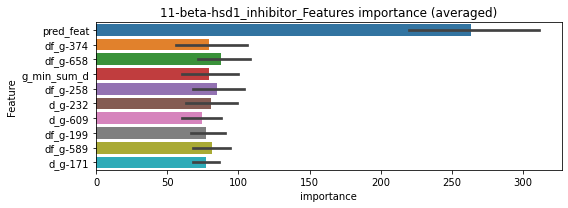

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000429312	valid_1's binary_logloss: 0.00161475
[2000]	training's binary_logloss: 0.000265372	valid_1's binary_logloss: 0.00139676
Early stopping, best iteration is:
[2875]	training's binary_logloss: 0.000222718	valid_1's binary_logloss: 0.00134627


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000419177	valid_1's binary_logloss: 0.000736028
[2000]	training's binary_logloss: 0.000257474	valid_1's binary_logloss: 0.000537213
Early stopping, best iteration is:
[2069]	training's binary_logloss: 0.000253769	valid_1's binary_logloss: 0.000531098


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000423152	valid_1's binary_logloss: 0.00069665
[2000]	training's binary_logloss: 0.000258764	valid_1's binary_logloss: 0.000553021
[3000]	training's binary_logloss: 0.000212163	valid_1's binary_logloss: 0.000504662
Early stopping, best iteration is:
[3684]	training's binary_logloss: 0.00019397	valid_1's binary_logloss: 0.000480859


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000412747	valid_1's binary_logloss: 0.00155837
Early stopping, best iteration is:
[1681]	training's binary_logloss: 0.000281484	valid_1's binary_logloss: 0.00141782


11-beta-hsd1_inhibitor logloss: 0.0009445887242286264


neg labels: 3289 → selected neg labels: 3282


acat_inhibitor, len(trt): 24, len(othr): 3282
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162503	valid_1's binary_logloss: 0.00854208
[600]	training's binary_logloss: 0.000406651	valid_1's binary_logloss: 0.00562738
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000408748	valid_1's binary_logloss: 0.00561219
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172642	valid_1's binary_logloss: 0.00798616
[600]	training's binary_logloss: 0.00041507	valid_1's binary_logloss: 0.00596338
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000407431	valid_1's binary_logloss: 0.0059476
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173648	valid_1's binary_logloss: 0.00385374
[600]	training's binary_logloss: 0.000430291	valid_1's binary_logloss: 0.00185215
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000434692	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0025146, Threshold: 0.0063179, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.00442, conf_1:0.00821
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0063179
Num_p_label: 2.0, Expected: 4.0, Adj_threshold_2: 0.0563179


Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000457803	valid_1's binary_logloss: 0.00892832


threshold: 0.0563179, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000666305	valid_1's binary_logloss: 0.00223101
[600]	training's binary_logloss: 0.000191596	valid_1's binary_logloss: 0.00148565
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000177267	valid_1's binary_logloss: 0.0014506
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000648683	valid_1's binary_logloss: 0.00242617
[600]	training's binary_logloss: 0.000192248	valid_1's binary_logloss: 0.00192115
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000185672	valid_1's binary_logloss: 0.00191713
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000664557	valid_1's binary_logloss: 0.00122668
[600]	training's binary_logloss: 0.000190158	valid_1's binary_logloss: 0.000630189
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000174252	valid_1's b

2 / 3 AUC score:1.000
y_Threshold: 0.5227506, Threshold: 0.0563179, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0379206 Vs.target_rate: 0.00101
Num_p_label: 151.0, conf_0:0.04505, conf_1:0.06758
Num_p_label: 151.0, Expected: 4.0, Adj_threshold_1: 0.0563179
Num_p_label: 148.0, Expected: 4.0, Adj_threshold_2: 0.1063179
Num_p_label: 143.0, Expected: 4.0, Adj_threshold_3: 0.1563179
Num_p_label: 141.0, Expected: 4.0, Adj_threshold_4: 0.2063179
Num_p_label: 141.0, Expected: 4.0, Adj_threshold_5: 0.2563179
Num_p_label: 140.0, Expected: 4.0, Adj_threshold_6: 0.3063179
Num_p_label: 139.0, Expected: 4.0, Adj_threshold_7: 0.3563179
Num_p_label: 135.0, Expected: 4.0, Adj_threshold_8: 0.4063179
Num_p_label: 126.0, Expected: 4.0, Adj_threshold_9: 0.4563179
Num_p_label: 108.0, Expected: 4.0, Adj_threshold_10: 0.5063179


Early stopping, best iteration is:
[418]	training's binary_logloss: 0.000294817	valid_1's binary_logloss: 0.00341527


threshold: 0.5563179, positive_p_label: 92.0/3982, p_label_rate: 0.0231040
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000643326	valid_1's binary_logloss: 0.00228609
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000210933	valid_1's binary_logloss: 0.0014522
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000662304	valid_1's binary_logloss: 0.001002
[600]	training's binary_logloss: 0.000193377	valid_1's binary_logloss: 0.000485927
Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000166425	valid_1's binary_logloss: 0.000437511
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000662439	valid_1's binary_logloss: 0.00185022
[600]	training's binary_logloss: 0.000197376	valid_1's binary_logloss: 0.00123345
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000190857	valid_1's binary_logloss: 0.00122483
Training until validation scores don't improve for 30 rou

3 / 3 AUC score:1.000
y_Threshold: 0.3513994, Threshold: 0.5563179, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0163235 Vs.target_rate: 0.00101
Num_p_label: 65.0, conf_0:0.50000, conf_1:0.61195
Num_p_label: 65.0, Expected: 4.0, Adj_threshold_1: 0.5563179
Num_p_label: 42.0, Expected: 4.0, Adj_threshold_2: 0.6063179
Num_p_label: 27.0, Expected: 4.0, Adj_threshold_3: 0.6563179


[600]	training's binary_logloss: 0.000188333	valid_1's binary_logloss: 0.00126992
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000181829	valid_1's binary_logloss: 0.00125885


Num_p_label: 21.0, Expected: 4.0, Adj_threshold_4: 0.7063179
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_5: 0.7563179
threshold: 0.7563179, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 655.0/3804, y_label_rate: 0.1721872


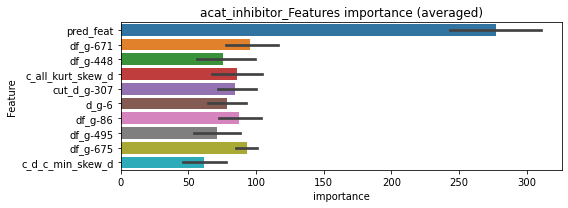

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000458105	valid_1's binary_logloss: 0.00208344
[2000]	training's binary_logloss: 0.000275342	valid_1's binary_logloss: 0.00171997
Early stopping, best iteration is:
[2257]	training's binary_logloss: 0.000258648	valid_1's binary_logloss: 0.00167515


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000469098	valid_1's binary_logloss: 0.000826591
[2000]	training's binary_logloss: 0.000278779	valid_1's binary_logloss: 0.000635107
Early stopping, best iteration is:
[2683]	training's binary_logloss: 0.000235564	valid_1's binary_logloss: 0.000590709


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000481396	valid_1's binary_logloss: 0.00154498
[2000]	training's binary_logloss: 0.000285287	valid_1's binary_logloss: 0.00130711
Early stopping, best iteration is:
[2061]	training's binary_logloss: 0.00028006	valid_1's binary_logloss: 0.00130119


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00046468	valid_1's binary_logloss: 0.00191851
Early stopping, best iteration is:
[1271]	training's binary_logloss: 0.000381631	valid_1's binary_logloss: 0.00179014


acat_inhibitor logloss: 0.0013397681825882053


neg labels: 3289 → selected neg labels: 3261


acetylcholine_receptor_agonist, len(trt): 190, len(othr): 3261
target_rate: 0.0079785 → Adj_target_rate: 0.0072634
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0243793	valid_1's binary_logloss: 0.184858
Early stopping, best iteration is:
[308]	training's binary_logloss: 0.0227982	valid_1's binary_logloss: 0.183665
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0227215	valid_1's binary_logloss: 0.146668
Early stopping, best iteration is:
[351]	training's binary_logloss: 0.0156615	valid_1's binary_logloss: 0.142686
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0231155	valid_1's binary_logloss: 0.159512
Early stopping, best iteration is:
[404]	training's binary_logloss: 0.010981	valid_1's binary_logloss: 0.153804
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0239468	valid_1's binary_logloss: 0.152671


1 / 3 AUC score:0.959
y_Threshold: 0.0551348, Threshold: 0.3003443, pos_neg_ratio: 0.8000000
Remove_noisy_data: 261 → Positive_corect_labels: 587/3652
p_label_rate: 0.0100452 Vs.target_rate: 0.00798
Num_p_label: 40.0, conf_0:0.21024, conf_1:0.39045


Early stopping, best iteration is:
[389]	training's binary_logloss: 0.0125849	valid_1's binary_logloss: 0.147335


threshold: 0.3003443, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 587.0/3652, y_label_rate: 0.1607338
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139351	valid_1's binary_logloss: 0.00395347
[600]	training's binary_logloss: 0.000185185	valid_1's binary_logloss: 0.000572888
[900]	training's binary_logloss: 0.000112985	valid_1's binary_logloss: 0.000351032
Early stopping, best iteration is:
[1169]	training's binary_logloss: 0.000105846	valid_1's binary_logloss: 0.000328972
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00143907	valid_1's binary_logloss: 0.010602
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000419854	valid_1's binary_logloss: 0.00941207
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014747	valid_1's binary_logloss: 0.00311805
[600]	training's binary_logloss: 0.000188707	valid_1's binary_logloss: 0.000424641
[900]	training's binary_logloss: 0.000113225	valid_1's binary_logloss: 0.000255253
[1200]	tr

2 / 3 AUC score:1.000
y_Threshold: 0.0928981, Threshold: 0.3003443, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 586.0/3650
p_label_rate: 0.0868910 Vs.target_rate: 0.00798
Num_p_label: 346.0, conf_0:0.24028, conf_1:0.36041
Num_p_label: 346.0, Expected: 31.8, Adj_threshold_1: 0.3003443
Num_p_label: 346.0, Expected: 31.8, Adj_threshold_2: 0.3503443
Num_p_label: 346.0, Expected: 31.8, Adj_threshold_3: 0.4003443
Num_p_label: 346.0, Expected: 31.8, Adj_threshold_4: 0.4503443
Num_p_label: 346.0, Expected: 31.8, Adj_threshold_5: 0.5003443
Num_p_label: 339.0, Expected: 31.8, Adj_threshold_6: 0.5503443
Num_p_label: 339.0, Expected: 31.8, Adj_threshold_7: 0.6003443
Num_p_label: 339.0, Expected: 31.8, Adj_threshold_8: 0.6503443
Num_p_label: 339.0, Expected: 31.8, Adj_threshold_9: 0.7003443
Num_p_label: 339.0, Expected: 31.8, Adj_threshold_10: 0.7503443
threshold: 0.7503443, positive_p_label: 339.0/3982, p_label_rate: 0.0851331
positive_y_label: 586.0/3650, y_label_rate:

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0015933	valid_1's binary_logloss: 0.00437747
[600]	training's binary_logloss: 0.000241508	valid_1's binary_logloss: 0.000727923
[900]	training's binary_logloss: 0.000164688	valid_1's binary_logloss: 0.000484595
Early stopping, best iteration is:
[984]	training's binary_logloss: 0.000157938	valid_1's binary_logloss: 0.000460749
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00158958	valid_1's binary_logloss: 0.00535245
[600]	training's binary_logloss: 0.000239687	valid_1's binary_logloss: 0.00198635
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000189335	valid_1's binary_logloss: 0.00180033
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146057	valid_1's binary_logloss: 0.00318532
[600]	training's binary_logloss: 0.000188376	valid_1's binary_logloss: 0.00043943
[900]	trai

3 / 3 AUC score:1.000
y_Threshold: 0.1287123, Threshold: 0.7503443, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 586.0/3650
p_label_rate: 0.0856354 Vs.target_rate: 0.00798
Num_p_label: 341.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 341.0, Expected: 31.8, Adj_threshold_1: 0.7503443
threshold: 0.7503443, positive_p_label: 341.0/3982, p_label_rate: 0.0856354
positive_y_label: 586.0/3650, y_label_rate: 0.1605479


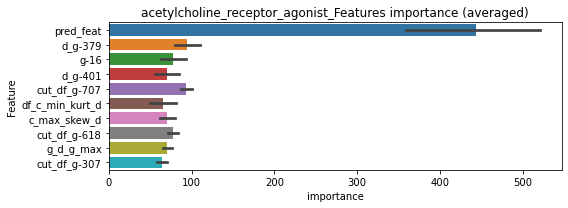

len(train_index) : 2737
len(valid_index) : 913
================================= fold 1/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000588556	valid_1's binary_logloss: 0.0012818
[2000]	training's binary_logloss: 0.000330574	valid_1's binary_logloss: 0.000833326
[3000]	training's binary_logloss: 0.000249804	valid_1's binary_logloss: 0.00068102
[4000]	training's binary_logloss: 0.000211017	valid_1's binary_logloss: 0.000610209
[5000]	training's binary_logloss: 0.000190809	valid_1's binary_logloss: 0.000567031
[6000]	training's binary_logloss: 0.000177501	valid_1's binary_logloss: 0.000535665
[7000]	training's binary_logloss: 0.000167617	valid_1's binary_logloss: 0.000511676
[8000]	training's binary_logloss: 0.000160438	valid_1's binary_logloss: 0.000492417
Early stopping, best iteration is:
[8484]	training's binary_logloss: 0.000157722	valid_1's binary_logloss: 0.000484754


len(train_index) : 2737
len(valid_index) : 913
================================= fold 2/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000691795	valid_1's binary_logloss: 0.022958


len(train_index) : 2738
len(valid_index) : 912
================================= fold 3/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000489019	valid_1's binary_logloss: 0.000838971
[2000]	training's binary_logloss: 0.000265131	valid_1's binary_logloss: 0.000456219
[3000]	training's binary_logloss: 0.000193393	valid_1's binary_logloss: 0.000333128
[4000]	training's binary_logloss: 0.00015978	valid_1's binary_logloss: 0.000275394
[5000]	training's binary_logloss: 0.000142725	valid_1's binary_logloss: 0.000246099
[6000]	training's binary_logloss: 0.000131735	valid_1's binary_logloss: 0.000227154
[7000]	training's binary_logloss: 0.000124108	valid_1's binary_logloss: 0.000214001
[8000]	training's binary_logloss: 0.000118885	valid_1's binary_logloss: 0.000205003
[9000]	training's binary_logloss: 0.000115183	valid_1's binary_logloss: 0.000198619
[10000]	training's binary_logloss: 0.000112519	valid_1's binary_logloss: 0.000194025
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000112519	valid

len(train_index) : 2738
len(valid_index) : 912
================================= fold 4/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000489148	valid_1's binary_logloss: 0.000802764
[2000]	training's binary_logloss: 0.000265251	valid_1's binary_logloss: 0.000436175
[3000]	training's binary_logloss: 0.000193498	valid_1's binary_logloss: 0.000318394
[4000]	training's binary_logloss: 0.000159808	valid_1's binary_logloss: 0.000263057
[5000]	training's binary_logloss: 0.000142665	valid_1's binary_logloss: 0.000234882
[6000]	training's binary_logloss: 0.000131712	valid_1's binary_logloss: 0.000216859
[7000]	training's binary_logloss: 0.000124106	valid_1's binary_logloss: 0.000204347
[8000]	training's binary_logloss: 0.000118896	valid_1's binary_logloss: 0.000195773
[9000]	training's binary_logloss: 0.000115219	valid_1's binary_logloss: 0.000189722
[10000]	training's binary_logloss: 0.000112543	valid_1's binary_logloss: 0.000185315
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000112543	vali

acetylcholine_receptor_agonist logloss: 0.005958709489800249


neg labels: 3289 → selected neg labels: 3241


acetylcholine_receptor_antagonist, len(trt): 301, len(othr): 3241
target_rate: 0.0126396 → Adj_target_rate: 0.0107394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0440126	valid_1's binary_logloss: 0.26895
Early stopping, best iteration is:
[331]	training's binary_logloss: 0.0366257	valid_1's binary_logloss: 0.267897
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[257]	training's binary_logloss: 0.0556079	valid_1's binary_logloss: 0.289224
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0453579	valid_1's binary_logloss: 0.25407
Early stopping, best iteration is:
[330]	training's binary_logloss: 0.0379521	valid_1's binary_logloss: 0.253689
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0453027	valid_1's binary_logloss: 0.256731


1 / 3 AUC score:0.866
y_Threshold: 0.0928631, Threshold: 0.1959189, pos_neg_ratio: 0.8000000
Remove_noisy_data: 480 → Positive_corect_labels: 473/3409
p_label_rate: 0.0100452 Vs.target_rate: 0.01264
Num_p_label: 40.0, conf_0:0.13714, conf_1:0.25469


Early stopping, best iteration is:
[375]	training's binary_logloss: 0.0293047	valid_1's binary_logloss: 0.254286


threshold: 0.1959189, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 473.0/3409, y_label_rate: 0.1387504
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174219	valid_1's binary_logloss: 0.00906986
[600]	training's binary_logloss: 0.000290646	valid_1's binary_logloss: 0.00512105
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000216197	valid_1's binary_logloss: 0.00469425
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00185233	valid_1's binary_logloss: 0.00490842
[600]	training's binary_logloss: 0.000295398	valid_1's binary_logloss: 0.00180289
[900]	training's binary_logloss: 0.000199112	valid_1's binary_logloss: 0.00148957
Early stopping, best iteration is:
[1036]	training's binary_logloss: 0.000188992	valid_1's binary_logloss: 0.0014493
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0018141	valid_1's binary_logloss: 0.00444116
[600]	training's binary_logloss: 0.000293882	valid_1's binary_logloss: 0.00114495
[900]	trainin

2 / 3 AUC score:1.000
y_Threshold: 0.3749215, Threshold: 0.1959189, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 471.0/3405
p_label_rate: 0.0889001 Vs.target_rate: 0.01264
Num_p_label: 354.0, conf_0:0.15674, conf_1:0.23510
Num_p_label: 354.0, Expected: 50.3, Adj_threshold_1: 0.1959189


[900]	training's binary_logloss: 0.000200034	valid_1's binary_logloss: 0.0048471
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000200964	valid_1's binary_logloss: 0.00484545


Num_p_label: 353.0, Expected: 50.3, Adj_threshold_2: 0.2459189
Num_p_label: 347.0, Expected: 50.3, Adj_threshold_3: 0.2959189
Num_p_label: 333.0, Expected: 50.3, Adj_threshold_4: 0.3459189
Num_p_label: 323.0, Expected: 50.3, Adj_threshold_5: 0.3959189
Num_p_label: 310.0, Expected: 50.3, Adj_threshold_6: 0.4459189
Num_p_label: 299.0, Expected: 50.3, Adj_threshold_7: 0.4959189
Num_p_label: 290.0, Expected: 50.3, Adj_threshold_8: 0.5459189
Num_p_label: 285.0, Expected: 50.3, Adj_threshold_9: 0.5959189
Num_p_label: 280.0, Expected: 50.3, Adj_threshold_10: 0.6459189
threshold: 0.6959189, positive_p_label: 272.0/3982, p_label_rate: 0.0683074
positive_y_label: 471.0/3405, y_label_rate: 0.1383260
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00171229	valid_1's binary_logloss: 0.00591819
[600]	training's binary_logloss: 0.000284206	valid_1's binary_logloss: 0.00156965
[900]	training's binary_logloss: 0.000197854	valid_1's binary_logloss: 0.00121136
Early stopping, best iteration is:
[1062]	training's binary_logloss: 0.000186006	valid_1's binary_logloss: 0.00115445
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176489	valid_1's binary_logloss: 0.00818457
[600]	training's binary_logloss: 0.000289286	valid_1's binary_logloss: 0.00428394
[900]	training's binary_logloss: 0.000193904	valid_1's binary_logloss: 0.00395073
Early stopping, best iteration is:
[1056]	training's binary_logloss: 0.000184002	valid_1's binary_logloss: 0.00391684
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176395	valid_1's binary_logloss: 0.0060509
[600]	train

3 / 3 AUC score:1.000
y_Threshold: 0.1897589, Threshold: 0.6959189, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 468.0/3399
p_label_rate: 0.0632848 Vs.target_rate: 0.01264
Num_p_label: 252.0, conf_0:0.50000, conf_1:0.76551
Num_p_label: 252.0, Expected: 50.3, Adj_threshold_1: 0.6959189
Num_p_label: 252.0, Expected: 50.3, Adj_threshold_2: 0.7459189
Num_p_label: 249.0, Expected: 50.3, Adj_threshold_3: 0.7959189


[600]	training's binary_logloss: 0.000294668	valid_1's binary_logloss: 0.00429044
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000298653	valid_1's binary_logloss: 0.00427748


threshold: 0.7959189, positive_p_label: 249.0/3982, p_label_rate: 0.0625314
positive_y_label: 468.0/3399, y_label_rate: 0.1376876


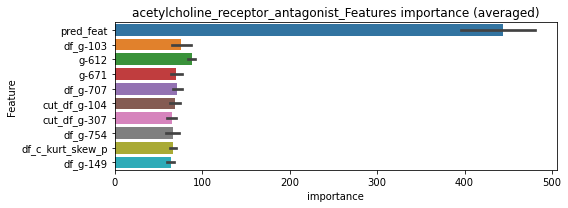

len(train_index) : 2549
len(valid_index) : 850
================================= fold 1/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000647369	valid_1's binary_logloss: 0.00127504
[2000]	training's binary_logloss: 0.000362055	valid_1's binary_logloss: 0.000746246
[3000]	training's binary_logloss: 0.000272654	valid_1's binary_logloss: 0.000565128
[4000]	training's binary_logloss: 0.000230595	valid_1's binary_logloss: 0.000477417
[5000]	training's binary_logloss: 0.000208377	valid_1's binary_logloss: 0.000430458
[6000]	training's binary_logloss: 0.000194192	valid_1's binary_logloss: 0.000400808
[7000]	training's binary_logloss: 0.000183199	valid_1's binary_logloss: 0.00037783
Early stopping, best iteration is:
[7147]	training's binary_logloss: 0.000182194	valid_1's binary_logloss: 0.000375657


len(train_index) : 2549
len(valid_index) : 850
================================= fold 2/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000643208	valid_1's binary_logloss: 0.00147481
[2000]	training's binary_logloss: 0.000361493	valid_1's binary_logloss: 0.00102061
[3000]	training's binary_logloss: 0.000272892	valid_1's binary_logloss: 0.000850766
[4000]	training's binary_logloss: 0.000230829	valid_1's binary_logloss: 0.000767688
[5000]	training's binary_logloss: 0.000208018	valid_1's binary_logloss: 0.000714794
[6000]	training's binary_logloss: 0.00019324	valid_1's binary_logloss: 0.0006806
Early stopping, best iteration is:
[6765]	training's binary_logloss: 0.000185147	valid_1's binary_logloss: 0.000661492


len(train_index) : 2549
len(valid_index) : 850
================================= fold 3/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00063959	valid_1's binary_logloss: 0.00142873
[2000]	training's binary_logloss: 0.00035986	valid_1's binary_logloss: 0.000977375
[3000]	training's binary_logloss: 0.000271578	valid_1's binary_logloss: 0.000806541
[4000]	training's binary_logloss: 0.000230039	valid_1's binary_logloss: 0.000720777
[5000]	training's binary_logloss: 0.000207768	valid_1's binary_logloss: 0.000673278
[6000]	training's binary_logloss: 0.000193589	valid_1's binary_logloss: 0.000642529
[7000]	training's binary_logloss: 0.000183131	valid_1's binary_logloss: 0.000619318
Early stopping, best iteration is:
[7662]	training's binary_logloss: 0.000178134	valid_1's binary_logloss: 0.000607275


len(train_index) : 2550
len(valid_index) : 849
================================= fold 4/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000629695	valid_1's binary_logloss: 0.00341571
Early stopping, best iteration is:
[1666]	training's binary_logloss: 0.000403857	valid_1's binary_logloss: 0.00305877


acetylcholine_receptor_antagonist logloss: 0.00117605772964777


neg labels: 3289 → selected neg labels: 3281


acetylcholinesterase_inhibitor, len(trt): 73, len(othr): 3281
target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00659537	valid_1's binary_logloss: 0.0564017
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.00133935	valid_1's binary_logloss: 0.0474258
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00736521	valid_1's binary_logloss: 0.0414954
[600]	training's binary_logloss: 0.00120211	valid_1's binary_logloss: 0.0310088
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000858699	valid_1's binary_logloss: 0.0301147
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00792672	valid_1's binary_logloss: 0.0302735
[600]	training's binary_logloss: 0.00130069	valid_1's binary_logloss: 0.0192303
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000844871	valid_1's binary_logloss: 0.0185199
Training until validation scores don't improve for 30 rounds
[300]	tra

1 / 3 AUC score:0.998
y_Threshold: 0.0105554, Threshold: 0.0379592, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 649/3791
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, conf_0:0.02657, conf_1:0.04935


Early stopping, best iteration is:
[480]	training's binary_logloss: 0.00196017	valid_1's binary_logloss: 0.0611581


Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.0379592
Num_p_label: 9.0, Expected: 12.2, Adj_threshold_2: 0.0879592
threshold: 0.0879592, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 649.0/3791, y_label_rate: 0.1711949
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121654	valid_1's binary_logloss: 0.00677223
[600]	training's binary_logloss: 0.000230747	valid_1's binary_logloss: 0.00470687
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000172395	valid_1's binary_logloss: 0.00453313
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125073	valid_1's binary_logloss: 0.00441805
[600]	training's binary_logloss: 0.000238843	valid_1's binary_logloss: 0.00260033
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000185301	valid_1's binary_logloss: 0.00247126
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125183	valid_1's binary_logloss: 0.0034942
[600]	training's binary_logloss: 0.000237177	valid_1's binary_logloss: 0.00150899
[900]	training's binary_logloss: 0.000170929	valid_1's binary_logloss: 0.00133828
Early stoppin

2 / 3 AUC score:1.000
y_Threshold: 0.1707116, Threshold: 0.0879592, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 648.0/3789
p_label_rate: 0.0527373 Vs.target_rate: 0.00307
Num_p_label: 210.0, conf_0:0.07037, conf_1:0.10555
Num_p_label: 210.0, Expected: 12.2, Adj_threshold_1: 0.0879592
Num_p_label: 185.0, Expected: 12.2, Adj_threshold_2: 0.1379592
Num_p_label: 155.0, Expected: 12.2, Adj_threshold_3: 0.1879592
Num_p_label: 125.0, Expected: 12.2, Adj_threshold_4: 0.2379592
Num_p_label: 111.0, Expected: 12.2, Adj_threshold_5: 0.2879592
Num_p_label: 104.0, Expected: 12.2, Adj_threshold_6: 0.3379592
Num_p_label: 101.0, Expected: 12.2, Adj_threshold_7: 0.3879592
Num_p_label: 98.0, Expected: 12.2, Adj_threshold_8: 0.4379592
Num_p_label: 98.0, Expected: 12.2, Adj_threshold_9: 0.4879592
Num_p_label: 98.0, Expected: 12.2, Adj_threshold_10: 0.5379592
threshold: 0.5879592, positive_p_label: 98.0/3982, p_label_rate: 0.0246107
positive_y_label: 648.0/3789, y_label_rate: 0.1

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121592	valid_1's binary_logloss: 0.00320637
[600]	training's binary_logloss: 0.000232587	valid_1's binary_logloss: 0.00100367
[900]	training's binary_logloss: 0.000166134	valid_1's binary_logloss: 0.000779056
Early stopping, best iteration is:
[912]	training's binary_logloss: 0.000165341	valid_1's binary_logloss: 0.000776264
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125405	valid_1's binary_logloss: 0.00841806
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000321169	valid_1's binary_logloss: 0.00692657
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124184	valid_1's binary_logloss: 0.00358536
[600]	training's binary_logloss: 0.000229509	valid_1's binary_logloss: 0.0015516
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000173949	valid_1's bin

3 / 3 AUC score:1.000
y_Threshold: 0.1216269, Threshold: 0.5879592, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 646.0/3785
p_label_rate: 0.0236062 Vs.target_rate: 0.00307
Num_p_label: 94.0, conf_0:0.50000, conf_1:0.64676
Num_p_label: 94.0, Expected: 12.2, Adj_threshold_1: 0.5879592
Num_p_label: 94.0, Expected: 12.2, Adj_threshold_2: 0.6379592
Num_p_label: 94.0, Expected: 12.2, Adj_threshold_3: 0.6879592
Num_p_label: 94.0, Expected: 12.2, Adj_threshold_4: 0.7379592
Num_p_label: 94.0, Expected: 12.2, Adj_threshold_5: 0.7879592


Early stopping, best iteration is:
[990]	training's binary_logloss: 0.000158866	valid_1's binary_logloss: 0.000167418


threshold: 0.7879592, positive_p_label: 94.0/3982, p_label_rate: 0.0236062
positive_y_label: 646.0/3785, y_label_rate: 0.1706737


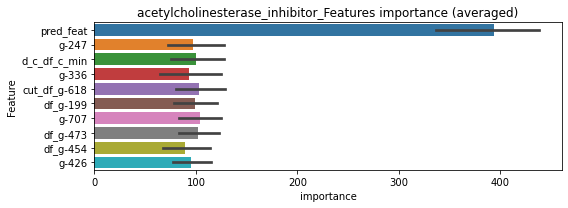

len(train_index) : 2838
len(valid_index) : 947
================================= fold 1/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000452015	valid_1's binary_logloss: 0.000754763
[2000]	training's binary_logloss: 0.000251283	valid_1's binary_logloss: 0.000421495
[3000]	training's binary_logloss: 0.000184703	valid_1's binary_logloss: 0.00031031
[4000]	training's binary_logloss: 0.000153193	valid_1's binary_logloss: 0.000257589
[5000]	training's binary_logloss: 0.000137073	valid_1's binary_logloss: 0.000230603
[6000]	training's binary_logloss: 0.000126672	valid_1's binary_logloss: 0.000213135
[7000]	training's binary_logloss: 0.000119478	valid_1's binary_logloss: 0.000201033
[8000]	training's binary_logloss: 0.000114522	valid_1's binary_logloss: 0.000192724
[9000]	training's binary_logloss: 0.000111026	valid_1's binary_logloss: 0.000186852
[10000]	training's binary_logloss: 0.000108517	valid_1's binary_logloss: 0.00018265
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000108517	valid_

len(train_index) : 2839
len(valid_index) : 946
================================= fold 2/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000452288	valid_1's binary_logloss: 0.000721731
[2000]	training's binary_logloss: 0.000251092	valid_1's binary_logloss: 0.000402335
[3000]	training's binary_logloss: 0.000184624	valid_1's binary_logloss: 0.000296243
[4000]	training's binary_logloss: 0.000153108	valid_1's binary_logloss: 0.000245866
[5000]	training's binary_logloss: 0.000137011	valid_1's binary_logloss: 0.000220126
[6000]	training's binary_logloss: 0.000126613	valid_1's binary_logloss: 0.000203437
[7000]	training's binary_logloss: 0.000119387	valid_1's binary_logloss: 0.000191841
[8000]	training's binary_logloss: 0.000114447	valid_1's binary_logloss: 0.000183921
[9000]	training's binary_logloss: 0.000110942	valid_1's binary_logloss: 0.000178299
[10000]	training's binary_logloss: 0.000108429	valid_1's binary_logloss: 0.000174279
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000108429	vali

len(train_index) : 2839
len(valid_index) : 946
================================= fold 3/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000545239	valid_1's binary_logloss: 0.00125881
[2000]	training's binary_logloss: 0.000309181	valid_1's binary_logloss: 0.000921346
[3000]	training's binary_logloss: 0.000236187	valid_1's binary_logloss: 0.000794877
[4000]	training's binary_logloss: 0.000201394	valid_1's binary_logloss: 0.000738719
[5000]	training's binary_logloss: 0.000183344	valid_1's binary_logloss: 0.000700384
[6000]	training's binary_logloss: 0.000171715	valid_1's binary_logloss: 0.000674455
Early stopping, best iteration is:
[6187]	training's binary_logloss: 0.000169792	valid_1's binary_logloss: 0.000670658


len(train_index) : 2839
len(valid_index) : 946
================================= fold 4/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000545613	valid_1's binary_logloss: 0.00340181
Early stopping, best iteration is:
[1522]	training's binary_logloss: 0.000375413	valid_1's binary_logloss: 0.00318141


acetylcholinesterase_inhibitor logloss: 0.0010524175509558167


neg labels: 3289 → selected neg labels: 3278


adenosine_receptor_agonist, len(trt): 54, len(othr): 3278
target_rate: 0.0022676 → Adj_target_rate: 0.0024931
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00414779	valid_1's binary_logloss: 0.0261265
[600]	training's binary_logloss: 0.000792127	valid_1's binary_logloss: 0.0180797
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000615429	valid_1's binary_logloss: 0.0175421
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00436173	valid_1's binary_logloss: 0.0136744
[600]	training's binary_logloss: 0.000819789	valid_1's binary_logloss: 0.00702757
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.000598823	valid_1's binary_logloss: 0.00649851
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00431251	valid_1's binary_logloss: 0.0209137
[600]	training's binary_logloss: 0.000794743	valid_1's binary_logloss: 0.0134546
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000686516	valid_1's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0055236, Threshold: 0.0200949, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, conf_0:0.01407, conf_1:0.02612
Num_p_label: 40.0, Expected: 9.0, Adj_threshold_1: 0.0200949
Num_p_label: 6.0, Expected: 9.0, Adj_threshold_2: 0.0700949
threshold: 0.0700949, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 655.0/3801, y_label_rate: 0.1723231
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103138	valid_1's binary_logloss: 0.00488552
[600]	training's binary_logloss: 0.000226327	valid_1's binary_logloss: 0.00364976
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000213459	valid_1's binary_logloss: 0.00361906
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106344	valid_1's binary_logloss: 0.00430732
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000281474	valid_1's binary_logloss: 0.00329626
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108524	valid_1's binary_logloss: 0.0036072
[600]	training's binary_logloss: 0.000224507	valid_1's binary_logloss: 0.00229136
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.00019614	valid_1's binary_logloss: 0.00225279
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:1.000
y_Threshold: 0.6196339, Threshold: 0.0700949, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3797
p_label_rate: 0.0514817 Vs.target_rate: 0.00227
Num_p_label: 205.0, conf_0:0.05608, conf_1:0.08411
Num_p_label: 205.0, Expected: 9.0, Adj_threshold_1: 0.0700949
Num_p_label: 205.0, Expected: 9.0, Adj_threshold_2: 0.1200949
Num_p_label: 205.0, Expected: 9.0, Adj_threshold_3: 0.1700949
Num_p_label: 205.0, Expected: 9.0, Adj_threshold_4: 0.2200949
Num_p_label: 205.0, Expected: 9.0, Adj_threshold_5: 0.2700949
Num_p_label: 205.0, Expected: 9.0, Adj_threshold_6: 0.3200949
Num_p_label: 204.0, Expected: 9.0, Adj_threshold_7: 0.3700949
Num_p_label: 200.0, Expected: 9.0, Adj_threshold_8: 0.4200949
Num_p_label: 190.0, Expected: 9.0, Adj_threshold_9: 0.4700949
Num_p_label: 181.0, Expected: 9.0, Adj_threshold_10: 0.5200949
threshold: 0.5700949, positive_p_label: 157.0/3982, p_label_rate: 0.0394274
positive_y_label: 653.0/3797, y_label_rate: 0.1719779

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103716	valid_1's binary_logloss: 0.00695099
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000310671	valid_1's binary_logloss: 0.00556961
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107861	valid_1's binary_logloss: 0.00142213
[600]	training's binary_logloss: 0.000228605	valid_1's binary_logloss: 0.000257909
[900]	training's binary_logloss: 0.000173733	valid_1's binary_logloss: 0.000173714
Early stopping, best iteration is:
[998]	training's binary_logloss: 0.000169323	valid_1's binary_logloss: 0.000167035
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103506	valid_1's binary_logloss: 0.00403406
[600]	training's binary_logloss: 0.000225967	valid_1's binary_logloss: 0.00286603
[900]	training's binary_logloss: 0.000171798	valid_1's binary_logloss: 0.00275498
Early sto

3 / 3 AUC score:1.000
y_Threshold: 0.4205842, Threshold: 0.5700949, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 652.0/3795
p_label_rate: 0.0045203 Vs.target_rate: 0.00227


[900]	training's binary_logloss: 0.000176009	valid_1's binary_logloss: 0.000673299
Early stopping, best iteration is:
[926]	training's binary_logloss: 0.000174646	valid_1's binary_logloss: 0.000670808


Num_p_label: 18.0, conf_0:0.50000, conf_1:0.62710
Num_p_label: 18.0, Expected: 9.0, Adj_threshold_1: 0.5700949
threshold: 0.5700949, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 652.0/3795, y_label_rate: 0.1718050


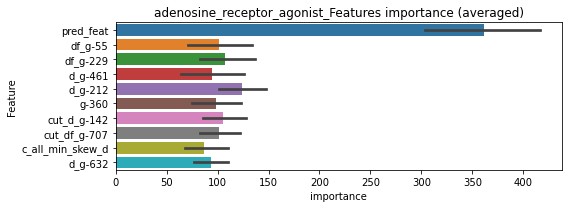

len(train_index) : 2846
len(valid_index) : 949
================================= fold 1/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000542911	valid_1's binary_logloss: 0.00139452
[2000]	training's binary_logloss: 0.000312967	valid_1's binary_logloss: 0.00107066
Early stopping, best iteration is:
[2073]	training's binary_logloss: 0.00030609	valid_1's binary_logloss: 0.00105833


len(train_index) : 2846
len(valid_index) : 949
================================= fold 2/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000541914	valid_1's binary_logloss: 0.00215673
Early stopping, best iteration is:
[1185]	training's binary_logloss: 0.00046794	valid_1's binary_logloss: 0.00207253


len(train_index) : 2846
len(valid_index) : 949
================================= fold 3/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 948
================================= fold 4/4 adenosine_receptor_agonist=================================


Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000921087	valid_1's binary_logloss: 0.00395027
Training until validation scores don't improve for 30 rounds


adenosine_receptor_agonist logloss: 0.002846118099465679


Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000776581	valid_1's binary_logloss: 0.00430348
neg labels: 3289 → selected neg labels: 3276


adenosine_receptor_antagonist, len(trt): 96, len(othr): 3276
target_rate: 0.0040312 → Adj_target_rate: 0.0040656
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113497	valid_1's binary_logloss: 0.0664098
[600]	training's binary_logloss: 0.00172002	valid_1's binary_logloss: 0.0512612
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.00127243	valid_1's binary_logloss: 0.0501966
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0119805	valid_1's binary_logloss: 0.0546559
[600]	training's binary_logloss: 0.00179558	valid_1's binary_logloss: 0.035503
[900]	training's binary_logloss: 0.000902643	valid_1's binary_logloss: 0.0334829
Early stopping, best iteration is:
[927]	training's binary_logloss: 0.000880534	valid_1's binary_logloss: 0.0334404
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108294	valid_1's binary_logloss: 0.0729182
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.0026922	valid_1's binary_logloss: 0.063

1 / 3 AUC score:0.994
y_Threshold: 0.0138603, Threshold: 0.0424560, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[527]	training's binary_logloss: 0.00241157	valid_1's binary_logloss: 0.0656415


Remove_noisy_data: 158 → Positive_corect_labels: 642/3773
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, conf_0:0.02972, conf_1:0.05519
Num_p_label: 40.0, Expected: 16.1, Adj_threshold_1: 0.0424560
Num_p_label: 11.0, Expected: 16.1, Adj_threshold_2: 0.0924560
threshold: 0.0924560, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 642.0/3773, y_label_rate: 0.1701564
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00149792	valid_1's binary_logloss: 0.00471475
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000313356	valid_1's binary_logloss: 0.00283501
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00149117	valid_1's binary_logloss: 0.00357334
[600]	training's binary_logloss: 0.000248066	valid_1's binary_logloss: 0.000999032
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000178078	valid_1's binary_logloss: 0.000833793
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00147492	valid_1's binary_logloss: 0.00337596
[600]	training's binary_logloss: 0.000235235	valid_1's binary_logloss: 0.0014135
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000193461	valid_1's binary_logloss: 0.00129878
Training until validation scores don't improve for 30 roun

2 / 3 AUC score:1.000
y_Threshold: 0.6945425, Threshold: 0.0924560, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 641.0/3771
p_label_rate: 0.0562531 Vs.target_rate: 0.00403
Num_p_label: 224.0, conf_0:0.07396, conf_1:0.11095
Num_p_label: 224.0, Expected: 16.1, Adj_threshold_1: 0.0924560
Num_p_label: 224.0, Expected: 16.1, Adj_threshold_2: 0.1424560
Num_p_label: 223.0, Expected: 16.1, Adj_threshold_3: 0.1924560
Num_p_label: 222.0, Expected: 16.1, Adj_threshold_4: 0.2424560
Num_p_label: 222.0, Expected: 16.1, Adj_threshold_5: 0.2924560
Num_p_label: 222.0, Expected: 16.1, Adj_threshold_6: 0.3424560
Num_p_label: 222.0, Expected: 16.1, Adj_threshold_7: 0.3924560


Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000172379	valid_1's binary_logloss: 0.0017923


Num_p_label: 222.0, Expected: 16.1, Adj_threshold_8: 0.4424560
Num_p_label: 222.0, Expected: 16.1, Adj_threshold_9: 0.4924560
Num_p_label: 222.0, Expected: 16.1, Adj_threshold_10: 0.5424560
threshold: 0.5924560, positive_p_label: 220.0/3982, p_label_rate: 0.0552486
positive_y_label: 641.0/3771, y_label_rate: 0.1699814
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150298	valid_1's binary_logloss: 0.00364071
[600]	training's binary_logloss: 0.000251034	valid_1's binary_logloss: 0.00136129
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.000204758	valid_1's binary_logloss: 0.00122536
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146745	valid_1's binary_logloss: 0.00708684
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000304631	valid_1's binary_logloss: 0.00498248
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148562	valid_1's binary_logloss: 0.00334126
[600]	training's binary_logloss: 0.000244797	valid_1's binary_logloss: 0.00147563
[900]	training's binary_logloss: 0.000172114	valid_1's binary_logloss: 0.00134104
Early stopping, best iteration is:
[970]	training's binary_logloss: 0.000167929	valid_1's bina

3 / 3 AUC score:1.000
y_Threshold: 0.6855765, Threshold: 0.5924560, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 639.0/3767
p_label_rate: 0.0441989 Vs.target_rate: 0.00403
Num_p_label: 176.0, conf_0:0.50000, conf_1:0.65170
Num_p_label: 176.0, Expected: 16.1, Adj_threshold_1: 0.5924560
Num_p_label: 139.0, Expected: 16.1, Adj_threshold_2: 0.6424560
Num_p_label: 101.0, Expected: 16.1, Adj_threshold_3: 0.6924560
Num_p_label: 59.0, Expected: 16.1, Adj_threshold_4: 0.7424560
Num_p_label: 30.0, Expected: 16.1, Adj_threshold_5: 0.7924560
threshold: 0.7924560, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 639.0/3767, y_label_rate: 0.1696310


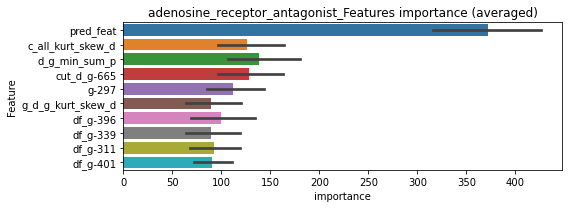

len(train_index) : 2825
len(valid_index) : 942
================================= fold 1/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000579591	valid_1's binary_logloss: 0.00308706
[2000]	training's binary_logloss: 0.000331195	valid_1's binary_logloss: 0.00276198
Early stopping, best iteration is:
[2693]	training's binary_logloss: 0.000273092	valid_1's binary_logloss: 0.00266285


len(train_index) : 2825
len(valid_index) : 942
================================= fold 2/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000576877	valid_1's binary_logloss: 0.00531434
Early stopping, best iteration is:
[1859]	training's binary_logloss: 0.000347207	valid_1's binary_logloss: 0.0050196


len(train_index) : 2825
len(valid_index) : 942
================================= fold 3/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000584943	valid_1's binary_logloss: 0.00142419
Early stopping, best iteration is:
[1489]	training's binary_logloss: 0.000409434	valid_1's binary_logloss: 0.00124425


len(train_index) : 2826
len(valid_index) : 941
================================= fold 4/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000583692	valid_1's binary_logloss: 0.00372601
Early stopping, best iteration is:
[1088]	training's binary_logloss: 0.000540294	valid_1's binary_logloss: 0.0036843


adenosine_receptor_antagonist logloss: 0.003152954887961551


neg labels: 3289 → selected neg labels: 3289


adenylyl_cyclase_activator, len(trt): 18, len(othr): 3289
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128328	valid_1's binary_logloss: 0.00234912
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000383014	valid_1's binary_logloss: 0.000866851
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124703	valid_1's binary_logloss: 0.00395447
[600]	training's binary_logloss: 0.000372288	valid_1's binary_logloss: 0.00192643
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000372498	valid_1's binary_logloss: 0.00192568
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128185	valid_1's binary_logloss: 0.00352184
[600]	training's binary_logloss: 0.000367741	valid_1's binary_logloss: 0.0019223
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000366653	valid_1's binary_logloss: 0.00191855
Training until validation scores don't improve for 30 round

1 / 3 AUC score:1.000
y_Threshold: 0.0021994, Threshold: 0.0105971, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00742, conf_1:0.01378
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0105971
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_2: 0.0605971


[600]	training's binary_logloss: 0.000376284	valid_1's binary_logloss: 0.00144763
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000376284	valid_1's binary_logloss: 0.00144763


threshold: 0.0605971, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000554106	valid_1's binary_logloss: 0.000946463
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000188469	valid_1's binary_logloss: 0.000552357
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000535639	valid_1's binary_logloss: 0.00172485
[600]	training's binary_logloss: 0.000174817	valid_1's binary_logloss: 0.00120194
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000148351	valid_1's binary_logloss: 0.00116385
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000537913	valid_1's binary_logloss: 0.000691204
[600]	training's binary_logloss: 0.0001751	valid_1's binary_logloss: 0.000269152
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000170895	valid_1's binary_logloss: 0.000264307
Training until validation scores don't improve for 30

2 / 3 AUC score:1.000
y_Threshold: 0.6811665, Threshold: 0.0605971, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0539930 Vs.target_rate: 0.00076
Num_p_label: 215.0, conf_0:0.04848, conf_1:0.07272
Num_p_label: 215.0, Expected: 3.0, Adj_threshold_1: 0.0605971
Num_p_label: 215.0, Expected: 3.0, Adj_threshold_2: 0.1105971
Num_p_label: 214.0, Expected: 3.0, Adj_threshold_3: 0.1605971
Num_p_label: 207.0, Expected: 3.0, Adj_threshold_4: 0.2105971
Num_p_label: 199.0, Expected: 3.0, Adj_threshold_5: 0.2605971
Num_p_label: 184.0, Expected: 3.0, Adj_threshold_6: 0.3105971
Num_p_label: 167.0, Expected: 3.0, Adj_threshold_7: 0.3605971
Num_p_label: 156.0, Expected: 3.0, Adj_threshold_8: 0.4105971
Num_p_label: 131.0, Expected: 3.0, Adj_threshold_9: 0.4605971
Num_p_label: 114.0, Expected: 3.0, Adj_threshold_10: 0.5105971
threshold: 0.5605971, positive_p_label: 105.0/3982, p_label_rate: 0.0263687
positive_y_label: 657.0/3813, y_label_rate: 0.1723053

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000559708	valid_1's binary_logloss: 0.0010187
Early stopping, best iteration is:
[400]	training's binary_logloss: 0.00028558	valid_1's binary_logloss: 0.000745636
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00053639	valid_1's binary_logloss: 0.00194393
[600]	training's binary_logloss: 0.000174619	valid_1's binary_logloss: 0.00153831
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000147494	valid_1's binary_logloss: 0.00149868
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000557307	valid_1's binary_logloss: 0.000789408
[600]	training's binary_logloss: 0.000175931	valid_1's binary_logloss: 0.000345454
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000154944	valid_1's binary_logloss: 0.000322341
Training until validation scores don't improve for 30 r

3 / 3 AUC score:1.000
y_Threshold: 0.7222092, Threshold: 0.5605971, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0243596 Vs.target_rate: 0.00076
Num_p_label: 97.0, conf_0:0.50000, conf_1:0.61666
Num_p_label: 97.0, Expected: 3.0, Adj_threshold_1: 0.5605971
Num_p_label: 80.0, Expected: 3.0, Adj_threshold_2: 0.6105971
Num_p_label: 65.0, Expected: 3.0, Adj_threshold_3: 0.6605971
Num_p_label: 50.0, Expected: 3.0, Adj_threshold_4: 0.7105971
Num_p_label: 37.0, Expected: 3.0, Adj_threshold_5: 0.7605971
threshold: 0.7605971, positive_p_label: 37.0/3982, p_label_rate: 0.0092918


Early stopping, best iteration is:
[392]	training's binary_logloss: 0.000286073	valid_1's binary_logloss: 0.00212874


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


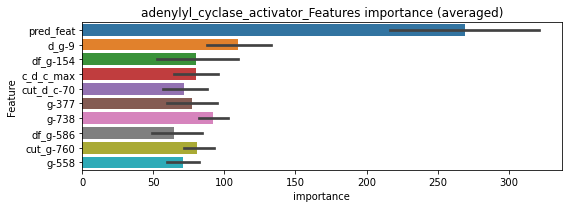

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000434437	valid_1's binary_logloss: 0.00101335
Early stopping, best iteration is:
[1615]	training's binary_logloss: 0.00030047	valid_1's binary_logloss: 0.000877527


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000431483	valid_1's binary_logloss: 0.00157924
Early stopping, best iteration is:
[1818]	training's binary_logloss: 0.000276965	valid_1's binary_logloss: 0.00143054


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000427459	valid_1's binary_logloss: 0.000661272
[2000]	training's binary_logloss: 0.000262178	valid_1's binary_logloss: 0.000487492
Early stopping, best iteration is:
[2803]	training's binary_logloss: 0.000219827	valid_1's binary_logloss: 0.000439353


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000427574	valid_1's binary_logloss: 0.0015263
[2000]	training's binary_logloss: 0.0002605	valid_1's binary_logloss: 0.00128478
Early stopping, best iteration is:
[2937]	training's binary_logloss: 0.000215561	valid_1's binary_logloss: 0.00122292


adenylyl_cyclase_activator logloss: 0.0009932320230417032


neg labels: 3289 → selected neg labels: 3254


adrenergic_receptor_agonist, len(trt): 270, len(othr): 3254
target_rate: 0.0113379 → Adj_target_rate: 0.0097917
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.036525	valid_1's binary_logloss: 0.235216
Early stopping, best iteration is:
[389]	training's binary_logloss: 0.0208398	valid_1's binary_logloss: 0.229881
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0392335	valid_1's binary_logloss: 0.259359
Early stopping, best iteration is:
[332]	training's binary_logloss: 0.0321711	valid_1's binary_logloss: 0.258254
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0391718	valid_1's binary_logloss: 0.223622
Early stopping, best iteration is:
[361]	training's binary_logloss: 0.0262156	valid_1's binary_logloss: 0.219617
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0392415	valid_1's binary_logloss: 0.23194


1 / 3 AUC score:0.907
y_Threshold: 0.0783445, Threshold: 0.5034082, pos_neg_ratio: 0.8000000
Remove_noisy_data: 427 → Positive_corect_labels: 502/3477
p_label_rate: 0.0100452 Vs.target_rate: 0.01134
Num_p_label: 40.0, conf_0:0.35239, conf_1:0.65443
threshold: 0.5034082, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[350]	training's binary_logloss: 0.0282208	valid_1's binary_logloss: 0.230362


positive_y_label: 502.0/3477, y_label_rate: 0.1443773
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176842	valid_1's binary_logloss: 0.0042926
[600]	training's binary_logloss: 0.00028196	valid_1's binary_logloss: 0.000670651
[900]	training's binary_logloss: 0.000192232	valid_1's binary_logloss: 0.000390679
Early stopping, best iteration is:
[1027]	training's binary_logloss: 0.000183428	valid_1's binary_logloss: 0.000362758
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0018195	valid_1's binary_logloss: 0.00792373
[600]	training's binary_logloss: 0.000285804	valid_1's binary_logloss: 0.00504637
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000304127	valid_1's binary_logloss: 0.00503107
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177265	valid_1's binary_logloss: 0.00862963
[600]	training's binary_logloss: 0.000279873	valid_1's binary_logloss: 0.00525309
Early stopp

2 / 3 AUC score:1.000
y_Threshold: 0.7205214, Threshold: 0.5034082, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 500.0/3473
p_label_rate: 0.1024611 Vs.target_rate: 0.01134
Num_p_label: 408.0, conf_0:0.40273, conf_1:0.60409
Num_p_label: 408.0, Expected: 45.1, Adj_threshold_1: 0.5034082
Num_p_label: 402.0, Expected: 45.1, Adj_threshold_2: 0.5534082
Num_p_label: 395.0, Expected: 45.1, Adj_threshold_3: 0.6034082
Num_p_label: 386.0, Expected: 45.1, Adj_threshold_4: 0.6534082
Num_p_label: 381.0, Expected: 45.1, Adj_threshold_5: 0.7034082
Num_p_label: 373.0, Expected: 45.1, Adj_threshold_6: 0.7534082
threshold: 0.7534082, positive_p_label: 373.0/3982, p_label_rate: 0.0936715
positive_y_label: 500.0/3473, y_label_rate: 0.1439678
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0017696	valid_1's binary_logloss: 0.00816113
[600]	training's binary_logloss: 0.000290474	valid_1's binary_logloss: 0.00423588
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000242248	valid_1's binary_logloss: 0.0040591
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00179821	valid_1's binary_logloss: 0.0054184
[600]	training's binary_logloss: 0.000289409	valid_1's binary_logloss: 0.00214723
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000212246	valid_1's binary_logloss: 0.00198178
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183517	valid_1's binary_logloss: 0.00617392
[600]	training's binary_logloss: 0.000290557	valid_1's binary_logloss: 0.00285891
[900]	training's binary_logloss: 0.000197506	valid_1's binary_logloss: 0.00256983
Early stopping,

3 / 3 AUC score:1.000
y_Threshold: 0.4114314, Threshold: 0.7534082, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 498.0/3469
p_label_rate: 0.0873933 Vs.target_rate: 0.01134
Num_p_label: 348.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 348.0, Expected: 45.1, Adj_threshold_1: 0.7534082
threshold: 0.7534082, positive_p_label: 348.0/3982, p_label_rate: 0.0873933
positive_y_label: 498.0/3469, y_label_rate: 0.1435572


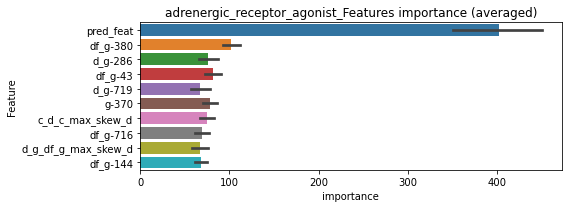

len(train_index) : 2601
len(valid_index) : 868
================================= fold 1/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2602
len(valid_index) : 867


Early stopping, best iteration is:
[889]	training's binary_logloss: 0.000708577	valid_1's binary_logloss: 0.00332913


================================= fold 2/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2602
len(valid_index) : 867
================================= fold 3/4 adrenergic_receptor_agonist=================================


Early stopping, best iteration is:
[612]	training's binary_logloss: 0.00104882	valid_1's binary_logloss: 0.0055281
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000649848	valid_1's binary_logloss: 0.000884682
[2000]	training's binary_logloss: 0.000366028	valid_1's binary_logloss: 0.000481122
[3000]	training's binary_logloss: 0.000282915	valid_1's binary_logloss: 0.000355145
[4000]	training's binary_logloss: 0.000245906	valid_1's binary_logloss: 0.000295841
[5000]	training's binary_logloss: 0.000226334	valid_1's binary_logloss: 0.000264792
[6000]	training's binary_logloss: 0.000214084	valid_1's binary_logloss: 0.000245638
[7000]	training's binary_logloss: 0.000204907	valid_1's binary_logloss: 0.000231596
Early stopping, best iteration is:
[7668]	training's binary_logloss: 0.000200836	valid_1's binary_logloss: 0.000225129


len(train_index) : 2602
len(valid_index) : 867
================================= fold 4/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


adrenergic_receptor_agonist logloss: 0.004721430683444545


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.00130026	valid_1's binary_logloss: 0.00980497
neg labels: 3289 → selected neg labels: 3240


adrenergic_receptor_antagonist, len(trt): 360, len(othr): 3240
target_rate: 0.0151172 → Adj_target_rate: 0.0125042
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[229]	training's binary_logloss: 0.0798785	valid_1's binary_logloss: 0.323125
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0496602	valid_1's binary_logloss: 0.293669
Early stopping, best iteration is:
[278]	training's binary_logloss: 0.0565156	valid_1's binary_logloss: 0.293629
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0491353	valid_1's binary_logloss: 0.287024
Early stopping, best iteration is:
[294]	training's binary_logloss: 0.0509861	valid_1's binary_logloss: 0.286665
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0506099	valid_1's binary_logloss: 0.2895


1 / 3 AUC score:0.842
y_Threshold: 0.1176552, Threshold: 0.7373763, pos_neg_ratio: 0.8000000
Remove_noisy_data: 542 → Positive_corect_labels: 442/3346
p_label_rate: 0.0100452 Vs.target_rate: 0.01512
Num_p_label: 40.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 40.0, Expected: 60.2, Adj_threshold_1: 0.7373763
Num_p_label: 48.0, Expected: 60.2, Adj_threshold_2: 0.7173763
threshold: 0.7173763, positive_p_label: 48.0/3982, p_label_rate: 0.0120542


Early stopping, best iteration is:
[306]	training's binary_logloss: 0.0489172	valid_1's binary_logloss: 0.289252


positive_y_label: 442.0/3346, y_label_rate: 0.1320980
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00169212	valid_1's binary_logloss: 0.00882439
[600]	training's binary_logloss: 0.00027844	valid_1's binary_logloss: 0.00491007
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000195938	valid_1's binary_logloss: 0.00462757
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172637	valid_1's binary_logloss: 0.00492345
[600]	training's binary_logloss: 0.000278844	valid_1's binary_logloss: 0.00117201
[900]	training's binary_logloss: 0.000188713	valid_1's binary_logloss: 0.000872341
Early stopping, best iteration is:
[1034]	training's binary_logloss: 0.000179581	valid_1's binary_logloss: 0.000844155
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176964	valid_1's binary_logloss: 0.00608608
[600]	training's binary_logloss: 0.00028284	valid_1's binary_logloss: 0.00292813
[900]	train

2 / 3 AUC score:1.000
y_Threshold: 0.1652299, Threshold: 0.7173763, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 441.0/3344
p_label_rate: 0.1180311 Vs.target_rate: 0.01512
Num_p_label: 470.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 470.0, Expected: 60.2, Adj_threshold_1: 0.7173763
Num_p_label: 470.0, Expected: 60.2, Adj_threshold_2: 0.7673763
threshold: 0.7673763, positive_p_label: 470.0/3982, p_label_rate: 0.1180311
positive_y_label: 441.0/3344, y_label_rate: 0.1318780
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00166934	valid_1's binary_logloss: 0.0053978
[600]	training's binary_logloss: 0.000280596	valid_1's binary_logloss: 0.00130512
[900]	training's binary_logloss: 0.000187353	valid_1's binary_logloss: 0.00099249
Early stopping, best iteration is:
[1096]	training's binary_logloss: 0.000175622	valid_1's binary_logloss: 0.000963078
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00169622	valid_1's binary_logloss: 0.00667659
[600]	training's binary_logloss: 0.000286275	valid_1's binary_logloss: 0.00239871
[900]	training's binary_logloss: 0.000194415	valid_1's binary_logloss: 0.00204103
Early stopping, best iteration is:
[987]	training's binary_logloss: 0.000187396	valid_1's binary_logloss: 0.00201181
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00178214	valid_1's binary_logloss: 0.00943204
Early stopp

3 / 3 AUC score:1.000
y_Threshold: 0.2835572, Threshold: 0.7673763, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 440.0/3342
p_label_rate: 0.1180311 Vs.target_rate: 0.01512
Num_p_label: 470.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 470.0, Expected: 60.2, Adj_threshold_1: 0.7673763
threshold: 0.7673763, positive_p_label: 470.0/3982, p_label_rate: 0.1180311


Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000201243	valid_1's binary_logloss: 0.00108965


positive_y_label: 440.0/3342, y_label_rate: 0.1316577


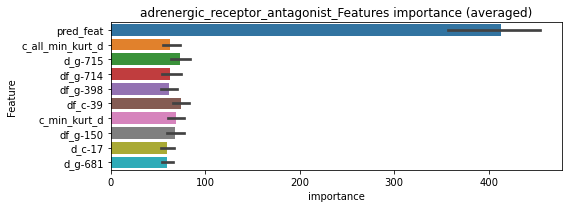

len(train_index) : 2506
len(valid_index) : 836
================================= fold 1/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000674594	valid_1's binary_logloss: 0.00694541
[2000]	training's binary_logloss: 0.000379228	valid_1's binary_logloss: 0.00653648
Early stopping, best iteration is:
[2020]	training's binary_logloss: 0.000376833	valid_1's binary_logloss: 0.00652908


len(train_index) : 2506
len(valid_index) : 836
================================= fold 2/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000667695	valid_1's binary_logloss: 0.00159108
[2000]	training's binary_logloss: 0.000377383	valid_1's binary_logloss: 0.0010693
[3000]	training's binary_logloss: 0.000291978	valid_1's binary_logloss: 0.000907729
[4000]	training's binary_logloss: 0.000252397	valid_1's binary_logloss: 0.000822669
[5000]	training's binary_logloss: 0.000232282	valid_1's binary_logloss: 0.000779146
Early stopping, best iteration is:
[5117]	training's binary_logloss: 0.000230507	valid_1's binary_logloss: 0.000775027


len(train_index) : 2507
len(valid_index) : 835
================================= fold 3/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000658471	valid_1's binary_logloss: 0.0010349
[2000]	training's binary_logloss: 0.000374082	valid_1's binary_logloss: 0.000571517
[3000]	training's binary_logloss: 0.000288761	valid_1's binary_logloss: 0.000421797
[4000]	training's binary_logloss: 0.00025014	valid_1's binary_logloss: 0.000349409
[5000]	training's binary_logloss: 0.00022965	valid_1's binary_logloss: 0.000311701
[6000]	training's binary_logloss: 0.000216321	valid_1's binary_logloss: 0.000287577
[7000]	training's binary_logloss: 0.000206723	valid_1's binary_logloss: 0.000270539
[8000]	training's binary_logloss: 0.00020002	valid_1's binary_logloss: 0.000259084
Early stopping, best iteration is:
[8128]	training's binary_logloss: 0.000199208	valid_1's binary_logloss: 0.000257724


len(train_index) : 2507
len(valid_index) : 835
================================= fold 4/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


adrenergic_receptor_antagonist logloss: 0.003963926839701171


Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000812367	valid_1's binary_logloss: 0.00829262
neg labels: 3289 → selected neg labels: 3284


akt_inhibitor, len(trt): 66, len(othr): 3284
target_rate: 0.0027715 → Adj_target_rate: 0.0029567
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00570543	valid_1's binary_logloss: 0.0532398
[600]	training's binary_logloss: 0.00104559	valid_1's binary_logloss: 0.0421179
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.00100385	valid_1's binary_logloss: 0.0420437
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00620151	valid_1's binary_logloss: 0.0362543
[600]	training's binary_logloss: 0.00108982	valid_1's binary_logloss: 0.0247394
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000924777	valid_1's binary_logloss: 0.0241112
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00644112	valid_1's binary_logloss: 0.0204691
[600]	training's binary_logloss: 0.00114228	valid_1's binary_logloss: 0.00930077
[900]	training's binary_logloss: 0.000693806	valid_1's binary_logloss: 0.00798188
Early stopping, best it

1 / 3 AUC score:0.999
y_Threshold: 0.0088937, Threshold: 0.0403716, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 651/3798


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.00153934	valid_1's binary_logloss: 0.0496411


p_label_rate: 0.0100452 Vs.target_rate: 0.00277
Num_p_label: 40.0, conf_0:0.02826, conf_1:0.05248
Num_p_label: 40.0, Expected: 11.0, Adj_threshold_1: 0.0403716
Num_p_label: 21.0, Expected: 11.0, Adj_threshold_2: 0.0903716
Num_p_label: 16.0, Expected: 11.0, Adj_threshold_3: 0.1403716
threshold: 0.1403716, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 651.0/3798, y_label_rate: 0.1714060
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012453	valid_1's binary_logloss: 0.00669491
[600]	training's binary_logloss: 0.000238928	valid_1's binary_logloss: 0.00497051
[900]	training's binary_logloss: 0.000172493	valid_1's binary_logloss: 0.0048265
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000174947	valid_1's binary_logloss: 0.0048236
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122878	valid_1's binary_logloss: 0.00280154
[600]	training's binary_logloss: 0.000238682	valid_1's binary_logloss: 0.000972451
[900]	training's binary_logloss: 0.000176582	valid_1's binary_logloss: 0.000800257
Early stopping, best iteration is:
[1023]	training's binary_logloss: 0.000170398	valid_1's binary_logloss: 0.000782629
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126457	valid_1's binary_logloss: 0.00338601
[600]	train

2 / 3 AUC score:1.000
y_Threshold: 0.2606604, Threshold: 0.1403716, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 649.0/3794


[600]	training's binary_logloss: 0.000245368	valid_1's binary_logloss: 0.00253153
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000235243	valid_1's binary_logloss: 0.00249718


p_label_rate: 0.0534907 Vs.target_rate: 0.00277
Num_p_label: 213.0, conf_0:0.11230, conf_1:0.16845
Num_p_label: 213.0, Expected: 11.0, Adj_threshold_1: 0.1403716
Num_p_label: 209.0, Expected: 11.0, Adj_threshold_2: 0.1903716
Num_p_label: 188.0, Expected: 11.0, Adj_threshold_3: 0.2403716
Num_p_label: 150.0, Expected: 11.0, Adj_threshold_4: 0.2903716
Num_p_label: 103.0, Expected: 11.0, Adj_threshold_5: 0.3403716
Num_p_label: 74.0, Expected: 11.0, Adj_threshold_6: 0.3903716
Num_p_label: 53.0, Expected: 11.0, Adj_threshold_7: 0.4403716
Num_p_label: 39.0, Expected: 11.0, Adj_threshold_8: 0.4903716
Num_p_label: 33.0, Expected: 11.0, Adj_threshold_9: 0.5403716
Num_p_label: 32.0, Expected: 11.0, Adj_threshold_10: 0.5903716
threshold: 0.6403716, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 649.0/3794, y_label_rate: 0.1710596
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120031	valid_1's binary_logloss: 0.00397967
[600]	training's binary_logloss: 0.000230262	valid_1's binary_logloss: 0.00211254
[900]	training's binary_logloss: 0.000164772	valid_1's binary_logloss: 0.00202394
Early stopping, best iteration is:
[969]	training's binary_logloss: 0.000159991	valid_1's binary_logloss: 0.00200848
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120344	valid_1's binary_logloss: 0.00202763
[600]	training's binary_logloss: 0.000234441	valid_1's binary_logloss: 0.00043296
[900]	training's binary_logloss: 0.000169017	valid_1's binary_logloss: 0.000303596
Early stopping, best iteration is:
[973]	training's binary_logloss: 0.000163656	valid_1's binary_logloss: 0.000294412
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120693	valid_1's binary_logloss: 0.00219934
[600]	trai

3 / 3 AUC score:1.000
y_Threshold: 0.2256217, Threshold: 0.6403716, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 646.0/3788
p_label_rate: 0.0062783 Vs.target_rate: 0.00277
Num_p_label: 25.0, conf_0:0.50000, conf_1:0.70441
Num_p_label: 25.0, Expected: 11.0, Adj_threshold_1: 0.6403716
Num_p_label: 25.0, Expected: 11.0, Adj_threshold_2: 0.6903716
Num_p_label: 25.0, Expected: 11.0, Adj_threshold_3: 0.7403716
Num_p_label: 25.0, Expected: 11.0, Adj_threshold_4: 0.7903716
threshold: 0.7903716, positive_p_label: 25.0/3982, p_label_rate: 0.0062783


Early stopping, best iteration is:
[357]	training's binary_logloss: 0.00069116	valid_1's binary_logloss: 0.0112171


positive_y_label: 646.0/3788, y_label_rate: 0.1705385


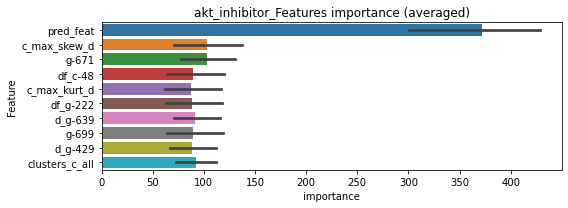

len(train_index) : 2841
len(valid_index) : 947
================================= fold 1/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00045082	valid_1's binary_logloss: 0.000713358
[2000]	training's binary_logloss: 0.000250729	valid_1's binary_logloss: 0.000398313
[3000]	training's binary_logloss: 0.000184472	valid_1's binary_logloss: 0.000293443
[4000]	training's binary_logloss: 0.000152947	valid_1's binary_logloss: 0.000243463
[5000]	training's binary_logloss: 0.000136852	valid_1's binary_logloss: 0.000217923
[6000]	training's binary_logloss: 0.000126517	valid_1's binary_logloss: 0.000201489
[7000]	training's binary_logloss: 0.000119335	valid_1's binary_logloss: 0.000190069
[8000]	training's binary_logloss: 0.000114417	valid_1's binary_logloss: 0.000182262
[9000]	training's binary_logloss: 0.000110914	valid_1's binary_logloss: 0.000176694
[10000]	training's binary_logloss: 0.000108386	valid_1's binary_logloss: 0.000172681
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000108386	valid

len(train_index) : 2841
len(valid_index) : 947
================================= fold 2/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000451181	valid_1's binary_logloss: 0.000666959
[2000]	training's binary_logloss: 0.00025085	valid_1's binary_logloss: 0.00037186
[3000]	training's binary_logloss: 0.000184516	valid_1's binary_logloss: 0.000273776
[4000]	training's binary_logloss: 0.000152993	valid_1's binary_logloss: 0.000227117
[5000]	training's binary_logloss: 0.000136864	valid_1's binary_logloss: 0.000203232
[6000]	training's binary_logloss: 0.000126528	valid_1's binary_logloss: 0.000187903
[7000]	training's binary_logloss: 0.000119336	valid_1's binary_logloss: 0.000177235
[8000]	training's binary_logloss: 0.000114416	valid_1's binary_logloss: 0.00016994
[9000]	training's binary_logloss: 0.000110924	valid_1's binary_logloss: 0.000164759
[10000]	training's binary_logloss: 0.000108397	valid_1's binary_logloss: 0.000161017
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000108397	valid_1

len(train_index) : 2841
len(valid_index) : 947
================================= fold 3/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000529839	valid_1's binary_logloss: 0.00315073
Early stopping, best iteration is:
[1637]	training's binary_logloss: 0.000349005	valid_1's binary_logloss: 0.00292105


len(train_index) : 2841
len(valid_index) : 947
================================= fold 4/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00053931	valid_1's binary_logloss: 0.00229714
Early stopping, best iteration is:
[1093]	training's binary_logloss: 0.000497873	valid_1's binary_logloss: 0.00223815


akt_inhibitor logloss: 0.0013732399137189807


neg labels: 3289 → selected neg labels: 3288


aldehyde_dehydrogenase_inhibitor, len(trt): 19, len(othr): 3288
target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126081	valid_1's binary_logloss: 0.00266336
[600]	training's binary_logloss: 0.000358921	valid_1's binary_logloss: 0.00102369
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000356574	valid_1's binary_logloss: 0.00101748
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128395	valid_1's binary_logloss: 0.00430195
[600]	training's binary_logloss: 0.000359213	valid_1's binary_logloss: 0.00197686
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.00035665	valid_1's binary_logloss: 0.00196543
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013145	valid_1's binary_logloss: 0.00209555
[600]	training's binary_logloss: 0.000359358	valid_1's binary_logloss: 0.000706533
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000356909	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0020135, Threshold: 0.0087955, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, conf_0:0.00616, conf_1:0.01143
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0087955
Num_p_label: 4.0, Expected: 3.2, Adj_threshold_2: 0.0587955
threshold: 0.0587955, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000580233	valid_1's binary_logloss: 0.000750914
[600]	training's binary_logloss: 0.000178122	valid_1's binary_logloss: 0.00029707
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000153553	valid_1's binary_logloss: 0.000267561
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000570824	valid_1's binary_logloss: 0.00158204
[600]	training's binary_logloss: 0.00017272	valid_1's binary_logloss: 0.000928461
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000159767	valid_1's binary_logloss: 0.000902866
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00055899	valid_1's binary_logloss: 0.000609172
[600]	training's binary_logloss: 0.00017501	valid_1's binary_logloss: 0.000184184
[900]	training's binary_logloss: 0.000145845	valid_1's binary_logloss: 0.000148612
Early

2 / 3 AUC score:1.000
y_Threshold: 0.5970558, Threshold: 0.0587955, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0529884 Vs.target_rate: 0.00080
Num_p_label: 211.0, conf_0:0.04704, conf_1:0.07055
Num_p_label: 211.0, Expected: 3.2, Adj_threshold_1: 0.0587955
Num_p_label: 205.0, Expected: 3.2, Adj_threshold_2: 0.1087955
Num_p_label: 200.0, Expected: 3.2, Adj_threshold_3: 0.1587955
Num_p_label: 200.0, Expected: 3.2, Adj_threshold_4: 0.2087955
Num_p_label: 194.0, Expected: 3.2, Adj_threshold_5: 0.2587955
Num_p_label: 176.0, Expected: 3.2, Adj_threshold_6: 0.3087955
Num_p_label: 136.0, Expected: 3.2, Adj_threshold_7: 0.3587955
Num_p_label: 108.0, Expected: 3.2, Adj_threshold_8: 0.4087955
Num_p_label: 77.0, Expected: 3.2, Adj_threshold_9: 0.4587955
Num_p_label: 55.0, Expected: 3.2, Adj_threshold_10: 0.5087955


Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000221088	valid_1's binary_logloss: 0.00262375


threshold: 0.5587955, positive_p_label: 41.0/3982, p_label_rate: 0.0102963
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000568337	valid_1's binary_logloss: 0.000776655
[600]	training's binary_logloss: 0.000176407	valid_1's binary_logloss: 0.000336417
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000152198	valid_1's binary_logloss: 0.000304208
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000568163	valid_1's binary_logloss: 0.00150338
[600]	training's binary_logloss: 0.000174106	valid_1's binary_logloss: 0.000959264
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000160933	valid_1's binary_logloss: 0.000943755
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000568283	valid_1's binary_logloss: 0.000592994
[600]	training's binary_logloss: 0.000172325	valid_1's binary_logloss: 0.000159687
[900]	training's binary_logloss: 0.000143438	valid_1's binary_logloss: 0.000123334
E

3 / 3 AUC score:1.000
y_Threshold: 0.5240623, Threshold: 0.5587955, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0060271 Vs.target_rate: 0.00080
Num_p_label: 24.0, conf_0:0.50000, conf_1:0.61468
Num_p_label: 24.0, Expected: 3.2, Adj_threshold_1: 0.5587955
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_2: 0.6087955
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_3: 0.6587955
threshold: 0.6587955, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


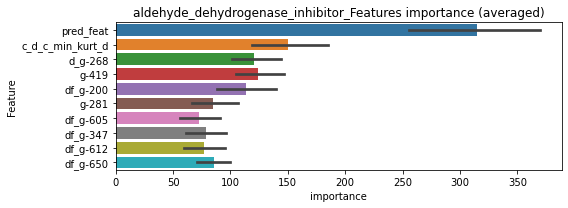

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000433199	valid_1's binary_logloss: 0.000683842
[2000]	training's binary_logloss: 0.00026354	valid_1's binary_logloss: 0.000507227
Early stopping, best iteration is:
[2450]	training's binary_logloss: 0.000236325	valid_1's binary_logloss: 0.00047555


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000422216	valid_1's binary_logloss: 0.00207938
Early stopping, best iteration is:
[1153]	training's binary_logloss: 0.000376342	valid_1's binary_logloss: 0.0019938


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000431662	valid_1's binary_logloss: 0.000426827
[2000]	training's binary_logloss: 0.000261236	valid_1's binary_logloss: 0.000247058
[3000]	training's binary_logloss: 0.000212954	valid_1's binary_logloss: 0.000193002
[4000]	training's binary_logloss: 0.000189515	valid_1's binary_logloss: 0.000166299
[5000]	training's binary_logloss: 0.000176724	valid_1's binary_logloss: 0.000151654
[6000]	training's binary_logloss: 0.000168259	valid_1's binary_logloss: 0.000142066
[7000]	training's binary_logloss: 0.000162146	valid_1's binary_logloss: 0.000135218
[8000]	training's binary_logloss: 0.000157586	valid_1's binary_logloss: 0.000130008
Early stopping, best iteration is:
[8802]	training's binary_logloss: 0.00015478	valid_1's binary_logloss: 0.000126799


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


aldehyde_dehydrogenase_inhibitor logloss: 0.003432480222826665


Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000819981	valid_1's binary_logloss: 0.0111365
neg labels: 3289 → selected neg labels: 3285


alk_inhibitor, len(trt): 42, len(othr): 3285
target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00343511	valid_1's binary_logloss: 0.0194723
[600]	training's binary_logloss: 0.00066095	valid_1's binary_logloss: 0.0113601
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.00057137	valid_1's binary_logloss: 0.011015
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00328865	valid_1's binary_logloss: 0.0198197
[600]	training's binary_logloss: 0.000644867	valid_1's binary_logloss: 0.0129738
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000576453	valid_1's binary_logloss: 0.0127505
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0036129	valid_1's binary_logloss: 0.00954157
[600]	training's binary_logloss: 0.000678534	valid_1's binary_logloss: 0.00441654
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000587865	valid_1's binary_logloss

1 / 3 AUC score:1.000
y_Threshold: 0.0043248, Threshold: 0.0189953, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, conf_0:0.01330, conf_1:0.02469
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_1: 0.0189953
Num_p_label: 10.0, Expected: 7.0, Adj_threshold_2: 0.0689953
threshold: 0.0689953, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000919644	valid_1's binary_logloss: 0.00272357
[600]	training's binary_logloss: 0.00021198	valid_1's binary_logloss: 0.00129226
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000203919	valid_1's binary_logloss: 0.00126049
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000902795	valid_1's binary_logloss: 0.00286591
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000258939	valid_1's binary_logloss: 0.00174537
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000931834	valid_1's binary_logloss: 0.00356815
Early stopping, best iteration is:
[374]	training's binary_logloss: 0.000486817	valid_1's binary_logloss: 0.00301191
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000897932	valid_1's binary_logloss: 0.00364

2 / 3 AUC score:1.000
y_Threshold: 0.7108091, Threshold: 0.0689953, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0464591 Vs.target_rate: 0.00176
Num_p_label: 185.0, conf_0:0.05520, conf_1:0.08279
Num_p_label: 185.0, Expected: 7.0, Adj_threshold_1: 0.0689953
Num_p_label: 185.0, Expected: 7.0, Adj_threshold_2: 0.1189953
Num_p_label: 184.0, Expected: 7.0, Adj_threshold_3: 0.1689953
Num_p_label: 183.0, Expected: 7.0, Adj_threshold_4: 0.2189953
Num_p_label: 183.0, Expected: 7.0, Adj_threshold_5: 0.2689953
Num_p_label: 183.0, Expected: 7.0, Adj_threshold_6: 0.3189953
Num_p_label: 183.0, Expected: 7.0, Adj_threshold_7: 0.3689953
Num_p_label: 183.0, Expected: 7.0, Adj_threshold_8: 0.4189953
Num_p_label: 182.0, Expected: 7.0, Adj_threshold_9: 0.4689953
Num_p_label: 182.0, Expected: 7.0, Adj_threshold_10: 0.5189953
threshold: 0.5689953, positive_p_label: 179.0/3982, p_label_rate: 0.0449523
positive_y_label: 656.0/3808, y_label_rate: 0.1722689

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000917548	valid_1's binary_logloss: 0.00284295
[600]	training's binary_logloss: 0.000211282	valid_1's binary_logloss: 0.00169464
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000213115	valid_1's binary_logloss: 0.0016816
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000891545	valid_1's binary_logloss: 0.00228738
[600]	training's binary_logloss: 0.000207014	valid_1's binary_logloss: 0.00119211
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000179707	valid_1's binary_logloss: 0.00115157
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000937382	valid_1's binary_logloss: 0.00497854
Early stopping, best iteration is:
[352]	training's binary_logloss: 0.000561248	valid_1's binary_logloss: 0.00456413
Training until validation scores don't improve for 30 rou

3 / 3 AUC score:1.000
y_Threshold: 0.6340058, Threshold: 0.5689953, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0394274 Vs.target_rate: 0.00176
Num_p_label: 157.0, conf_0:0.50000, conf_1:0.62589
Num_p_label: 157.0, Expected: 7.0, Adj_threshold_1: 0.5689953
Num_p_label: 134.0, Expected: 7.0, Adj_threshold_2: 0.6189953
Num_p_label: 103.0, Expected: 7.0, Adj_threshold_3: 0.6689953
Num_p_label: 69.0, Expected: 7.0, Adj_threshold_4: 0.7189953
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_5: 0.7689953
threshold: 0.7689953, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


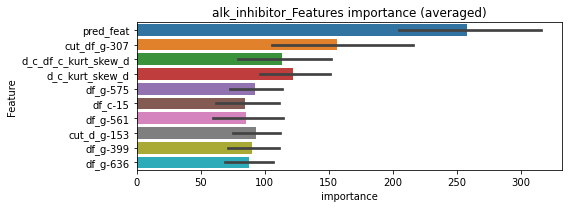

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[960]	training's binary_logloss: 0.0005524	valid_1's binary_logloss: 0.00272511


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000526195	valid_1's binary_logloss: 0.00139355
[2000]	training's binary_logloss: 0.000307589	valid_1's binary_logloss: 0.00110891
[3000]	training's binary_logloss: 0.000246282	valid_1's binary_logloss: 0.00102518
[4000]	training's binary_logloss: 0.000217376	valid_1's binary_logloss: 0.000985028
[5000]	training's binary_logloss: 0.000202232	valid_1's binary_logloss: 0.000964644
Early stopping, best iteration is:
[5041]	training's binary_logloss: 0.000201782	valid_1's binary_logloss: 0.000963438


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000519768	valid_1's binary_logloss: 0.00247589
[2000]	training's binary_logloss: 0.000302639	valid_1's binary_logloss: 0.00221017
Early stopping, best iteration is:
[2278]	training's binary_logloss: 0.000280852	valid_1's binary_logloss: 0.0021791


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000518563	valid_1's binary_logloss: 0.00389703
Early stopping, best iteration is:
[996]	training's binary_logloss: 0.000520021	valid_1's binary_logloss: 0.00389541


alk_inhibitor logloss: 0.0024410337424241465


neg labels: 3289 → selected neg labels: 3289


ampk_activator, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000745726	valid_1's binary_logloss: 0.0018755
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000284036	valid_1's binary_logloss: 0.00107469
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000740536	valid_1's binary_logloss: 0.00324217
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000295944	valid_1's binary_logloss: 0.00238255
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000767186	valid_1's binary_logloss: 0.000993368
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000307227	valid_1's binary_logloss: 0.000439722
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000739499	valid_1's binary_logloss: 0.00326438


1 / 3 AUC score:1.000
y_Threshold: 0.0013323, Threshold: 0.0063658, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.00446, conf_1:0.00828
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0063658
Num_p_label: 2.0, Expected: 2.0, Adj_threshold_2: 0.0563658
threshold: 0.0563658, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000291543	valid_1's binary_logloss: 0.00197004


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000405577	valid_1's binary_logloss: 0.00126315
[600]	training's binary_logloss: 0.000165723	valid_1's binary_logloss: 0.00093119
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000147944	valid_1's binary_logloss: 0.000902389
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00040163	valid_1's binary_logloss: 0.000898223
[600]	training's binary_logloss: 0.000160388	valid_1's binary_logloss: 0.000615576
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000157946	valid_1's binary_logloss: 0.000612147
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000409957	valid_1's binary_logloss: 0.000374244
[600]	training's binary_logloss: 0.000163104	valid_1's binary_logloss: 0.000129212
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000145353	valid_

2 / 3 AUC score:1.000
y_Threshold: 0.4809059, Threshold: 0.0563658, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0482170 Vs.target_rate: 0.00050
Num_p_label: 192.0, conf_0:0.04509, conf_1:0.06764
Num_p_label: 192.0, Expected: 2.0, Adj_threshold_1: 0.0563658
Num_p_label: 191.0, Expected: 2.0, Adj_threshold_2: 0.1063658
Num_p_label: 183.0, Expected: 2.0, Adj_threshold_3: 0.1563658
Num_p_label: 173.0, Expected: 2.0, Adj_threshold_4: 0.2063658
Num_p_label: 153.0, Expected: 2.0, Adj_threshold_5: 0.2563658
Num_p_label: 131.0, Expected: 2.0, Adj_threshold_6: 0.3063658
Num_p_label: 110.0, Expected: 2.0, Adj_threshold_7: 0.3563658
Num_p_label: 94.0, Expected: 2.0, Adj_threshold_8: 0.4063658
Num_p_label: 73.0, Expected: 2.0, Adj_threshold_9: 0.4563658
Num_p_label: 55.0, Expected: 2.0, Adj_threshold_10: 0.5063658
threshold: 0.5563658, positive_p_label: 38.0/3982, p_label_rate: 0.0095429


Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000139345	valid_1's binary_logloss: 0.000850094


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000413426	valid_1's binary_logloss: 0.00252477
Early stopping, best iteration is:
[279]	training's binary_logloss: 0.000509564	valid_1's binary_logloss: 0.00250764
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000405546	valid_1's binary_logloss: 0.000942078
[600]	training's binary_logloss: 0.000161254	valid_1's binary_logloss: 0.000625231
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.00015892	valid_1's binary_logloss: 0.000622149
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000409626	valid_1's binary_logloss: 0.000373759
[600]	training's binary_logloss: 0.000162567	valid_1's binary_logloss: 0.000128815
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000144791	valid_1's binary_logloss: 0.000109124
Training until validation scores don't improve for 

3 / 3 AUC score:1.000
y_Threshold: 0.6526919, Threshold: 0.5563658, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0070316 Vs.target_rate: 0.00050
Num_p_label: 28.0, conf_0:0.50000, conf_1:0.61200
Num_p_label: 28.0, Expected: 2.0, Adj_threshold_1: 0.5563658
Num_p_label: 20.0, Expected: 2.0, Adj_threshold_2: 0.6063658
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_3: 0.6563658
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_4: 0.7063658
Num_p_label: 3.0, Expected: 2.0, Adj_threshold_5: 0.7563658
threshold: 0.7563658, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


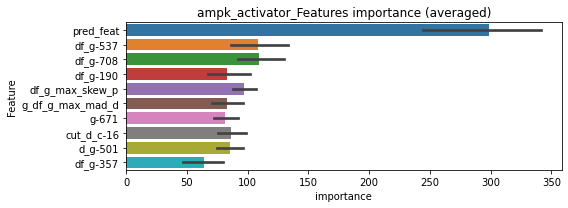

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 ampk_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000387902	valid_1's binary_logloss: 0.00492482
Early stopping, best iteration is:
[1146]	training's binary_logloss: 0.00034823	valid_1's binary_logloss: 0.00480909


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 ampk_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00038708	valid_1's binary_logloss: 0.00109297
Early stopping, best iteration is:
[1858]	training's binary_logloss: 0.000249954	valid_1's binary_logloss: 0.000943315


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 ampk_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000389645	valid_1's binary_logloss: 0.00032648
[2000]	training's binary_logloss: 0.000238526	valid_1's binary_logloss: 0.000191438
[3000]	training's binary_logloss: 0.000198447	valid_1's binary_logloss: 0.000153214
[4000]	training's binary_logloss: 0.00017841	valid_1's binary_logloss: 0.000133828
[5000]	training's binary_logloss: 0.000167652	valid_1's binary_logloss: 0.000123468
[6000]	training's binary_logloss: 0.000160505	valid_1's binary_logloss: 0.000116539
[7000]	training's binary_logloss: 0.000155409	valid_1's binary_logloss: 0.000111575
[8000]	training's binary_logloss: 0.000151521	valid_1's binary_logloss: 0.000107776
Early stopping, best iteration is:
[8536]	training's binary_logloss: 0.000149901	valid_1's binary_logloss: 0.000106164


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 ampk_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000382331	valid_1's binary_logloss: 0.000914842
Early stopping, best iteration is:
[1867]	training's binary_logloss: 0.000244337	valid_1's binary_logloss: 0.000728308


ampk_activator logloss: 0.001647734773170569


neg labels: 3289 → selected neg labels: 3288


analgesic, len(trt): 12, len(othr): 3288
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000844005	valid_1's binary_logloss: 0.00166122
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000308243	valid_1's binary_logloss: 0.000722472
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000828347	valid_1's binary_logloss: 0.0025985
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000304945	valid_1's binary_logloss: 0.0013075
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000867126	valid_1's binary_logloss: 0.00108844
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000315589	valid_1's binary_logloss: 0.000436192
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000854619	valid_1's binary_logloss: 0.00199207


1 / 3 AUC score:1.000
y_Threshold: 0.0013330, Threshold: 0.0160544, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.01124, conf_1:0.02087
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0160544
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_2: 0.0660544
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_3: 0.1160544
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_4: 0.1660544
threshold: 0.1660544, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000313797	valid_1's binary_logloss: 0.000918286


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000438127	valid_1's binary_logloss: 0.000961274
[600]	training's binary_logloss: 0.000164687	valid_1's binary_logloss: 0.000626045
[900]	training's binary_logloss: 0.000141001	valid_1's binary_logloss: 0.000600399
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.000140801	valid_1's binary_logloss: 0.000600146
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000426687	valid_1's binary_logloss: 0.00121907
[600]	training's binary_logloss: 0.000158523	valid_1's binary_logloss: 0.000859372
[900]	training's binary_logloss: 0.000136103	valid_1's binary_logloss: 0.000833567
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000135902	valid_1's binary_logloss: 0.000833296
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000451381	valid_1's binary_logloss: 0.000404546
[

2 / 3 AUC score:1.000
y_Threshold: 0.3201126, Threshold: 0.1660544, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0615269 Vs.target_rate: 0.00050
Num_p_label: 245.0, conf_0:0.13284, conf_1:0.19927
Num_p_label: 245.0, Expected: 2.0, Adj_threshold_1: 0.1660544
Num_p_label: 211.0, Expected: 2.0, Adj_threshold_2: 0.2160544
Num_p_label: 179.0, Expected: 2.0, Adj_threshold_3: 0.2660544
Num_p_label: 143.0, Expected: 2.0, Adj_threshold_4: 0.3160544
Num_p_label: 108.0, Expected: 2.0, Adj_threshold_5: 0.3660544
Num_p_label: 87.0, Expected: 2.0, Adj_threshold_6: 0.4160544
Num_p_label: 72.0, Expected: 2.0, Adj_threshold_7: 0.4660544
Num_p_label: 60.0, Expected: 2.0, Adj_threshold_8: 0.5160544
Num_p_label: 48.0, Expected: 2.0, Adj_threshold_9: 0.5660544
Num_p_label: 37.0, Expected: 2.0, Adj_threshold_10: 0.6160544


Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000139789	valid_1's binary_logloss: 0.000216252


threshold: 0.6660544, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000439719	valid_1's binary_logloss: 0.00116804
Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000196994	valid_1's binary_logloss: 0.000846643
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000417457	valid_1's binary_logloss: 0.00172013
[600]	training's binary_logloss: 0.000155963	valid_1's binary_logloss: 0.00128979
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000143737	valid_1's binary_logloss: 0.0012722
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000445076	valid_1's binary_logloss: 0.000408435
[600]	training's binary_logloss: 0.000162108	valid_1's binary_logloss: 0.000132071
[900]	training's binary_logloss: 0.000139489	valid_1's binary_logloss: 0.000107115
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000139112	valid_1'

3 / 3 AUC score:1.000
y_Threshold: 0.4159704, Threshold: 0.6660544, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0050226 Vs.target_rate: 0.00050
Num_p_label: 20.0, conf_0:0.50000, conf_1:0.73266
Num_p_label: 20.0, Expected: 2.0, Adj_threshold_1: 0.6660544
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_2: 0.7160544
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_3: 0.7660544
threshold: 0.7660544, positive_p_label: 12.0/3982, p_label_rate: 0.0030136


[900]	training's binary_logloss: 0.000134636	valid_1's binary_logloss: 0.000188209
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000135047	valid_1's binary_logloss: 0.000188118


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


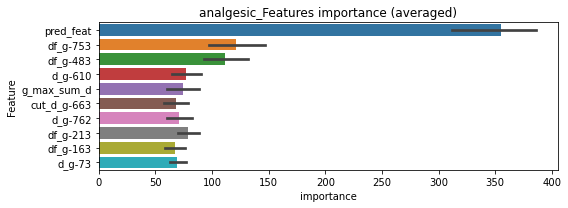

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 analgesic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000386076	valid_1's binary_logloss: 0.00101201
[2000]	training's binary_logloss: 0.00024178	valid_1's binary_logloss: 0.000854359
[3000]	training's binary_logloss: 0.000201112	valid_1's binary_logloss: 0.000814199
Early stopping, best iteration is:
[3396]	training's binary_logloss: 0.000191152	valid_1's binary_logloss: 0.000800618


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 analgesic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000379991	valid_1's binary_logloss: 0.00208986
Early stopping, best iteration is:
[1747]	training's binary_logloss: 0.000255483	valid_1's binary_logloss: 0.00188143


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 analgesic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000387271	valid_1's binary_logloss: 0.000356022
[2000]	training's binary_logloss: 0.000239985	valid_1's binary_logloss: 0.00021139
[3000]	training's binary_logloss: 0.000199457	valid_1's binary_logloss: 0.00016909
[4000]	training's binary_logloss: 0.000179046	valid_1's binary_logloss: 0.000147106
[5000]	training's binary_logloss: 0.000167702	valid_1's binary_logloss: 0.000134913
[6000]	training's binary_logloss: 0.00016018	valid_1's binary_logloss: 0.000126734
[7000]	training's binary_logloss: 0.00015476	valid_1's binary_logloss: 0.000120944
[8000]	training's binary_logloss: 0.000151067	valid_1's binary_logloss: 0.000116788
Early stopping, best iteration is:
[8502]	training's binary_logloss: 0.000149503	valid_1's binary_logloss: 0.000114988


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 analgesic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000386784	valid_1's binary_logloss: 0.000465964
[2000]	training's binary_logloss: 0.000239006	valid_1's binary_logloss: 0.000309597
[3000]	training's binary_logloss: 0.000198455	valid_1's binary_logloss: 0.000263777
[4000]	training's binary_logloss: 0.000177917	valid_1's binary_logloss: 0.000238207
[5000]	training's binary_logloss: 0.000166874	valid_1's binary_logloss: 0.000224849
[6000]	training's binary_logloss: 0.000159361	valid_1's binary_logloss: 0.0002154
[7000]	training's binary_logloss: 0.000154003	valid_1's binary_logloss: 0.00020993
Early stopping, best iteration is:
[6987]	training's binary_logloss: 0.000154042	valid_1's binary_logloss: 0.000209912


analgesic logloss: 0.0007522426104229419


neg labels: 3289 → selected neg labels: 3282


androgen_receptor_agonist, len(trt): 48, len(othr): 3282
target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00406479	valid_1's binary_logloss: 0.0270397
[600]	training's binary_logloss: 0.000774929	valid_1's binary_logloss: 0.0174775
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000604081	valid_1's binary_logloss: 0.0167471
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00438216	valid_1's binary_logloss: 0.0221466
[600]	training's binary_logloss: 0.000788157	valid_1's binary_logloss: 0.0141636
Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000576767	valid_1's binary_logloss: 0.0135115
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00448662	valid_1's binary_logloss: 0.00891984
[600]	training's binary_logloss: 0.000822986	valid_1's binary_logloss: 0.00281313
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000612685	valid_1's binary_log

1 / 3 AUC score:0.999
y_Threshold: 0.0046484, Threshold: 0.0098085, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, conf_0:0.00687, conf_1:0.01275
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0098085
Num_p_label: 0.0, Expected: 8.0, Adj_threshold_2: 0.0598085
threshold: 0.0598085, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106515	valid_1's binary_logloss: 0.00422568
[600]	training's binary_logloss: 0.000227435	valid_1's binary_logloss: 0.00289731
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000187803	valid_1's binary_logloss: 0.00280762
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00104409	valid_1's binary_logloss: 0.00407669
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000353109	valid_1's binary_logloss: 0.0032108
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105205	valid_1's binary_logloss: 0.00317292
[600]	training's binary_logloss: 0.000226981	valid_1's binary_logloss: 0.00192569
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.000187867	valid_1's binary_logloss: 0.00183723
Training until validation scores don't improve for 30 rounds

2 / 3 AUC score:1.000
y_Threshold: 0.5447887, Threshold: 0.0598085, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0344048 Vs.target_rate: 0.00202
Num_p_label: 137.0, conf_0:0.04785, conf_1:0.07177
Num_p_label: 137.0, Expected: 8.0, Adj_threshold_1: 0.0598085
Num_p_label: 137.0, Expected: 8.0, Adj_threshold_2: 0.1098085
Num_p_label: 135.0, Expected: 8.0, Adj_threshold_3: 0.1598085
Num_p_label: 135.0, Expected: 8.0, Adj_threshold_4: 0.2098085
Num_p_label: 135.0, Expected: 8.0, Adj_threshold_5: 0.2598085
Num_p_label: 135.0, Expected: 8.0, Adj_threshold_6: 0.3098085
Num_p_label: 135.0, Expected: 8.0, Adj_threshold_7: 0.3598085
Num_p_label: 135.0, Expected: 8.0, Adj_threshold_8: 0.4098085
Num_p_label: 133.0, Expected: 8.0, Adj_threshold_9: 0.4598085
Num_p_label: 127.0, Expected: 8.0, Adj_threshold_10: 0.5098085
threshold: 0.5598085, positive_p_label: 114.0/3982, p_label_rate: 0.0286288
positive_y_label: 653.0/3800, y_label_rate: 0.1718421

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103686	valid_1's binary_logloss: 0.00660719
Early stopping, best iteration is:
[432]	training's binary_logloss: 0.000395012	valid_1's binary_logloss: 0.00584773
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103982	valid_1's binary_logloss: 0.00375138
Early stopping, best iteration is:
[388]	training's binary_logloss: 0.000496576	valid_1's binary_logloss: 0.00287732
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105682	valid_1's binary_logloss: 0.00340005
[600]	training's binary_logloss: 0.000227569	valid_1's binary_logloss: 0.0021682
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000180403	valid_1's binary_logloss: 0.00206523
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107426	valid_1's binary_logloss: 0.00240865


3 / 3 AUC score:1.000
y_Threshold: 0.4834761, Threshold: 0.5598085, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 650.0/3794
p_label_rate: 0.0030136 Vs.target_rate: 0.00202
Num_p_label: 12.0, conf_0:0.50000, conf_1:0.61579
threshold: 0.5598085, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 650.0/3794, y_label_rate: 0.1713231


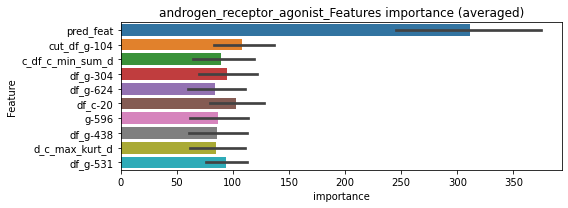

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000531086	valid_1's binary_logloss: 0.00239191
Early stopping, best iteration is:
[1838]	training's binary_logloss: 0.000323231	valid_1's binary_logloss: 0.00212307


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00054885	valid_1's binary_logloss: 0.00185039
Early stopping, best iteration is:
[1040]	training's binary_logloss: 0.000528177	valid_1's binary_logloss: 0.00181014


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000541136	valid_1's binary_logloss: 0.00218754
[2000]	training's binary_logloss: 0.000314324	valid_1's binary_logloss: 0.00176865
[3000]	training's binary_logloss: 0.000248748	valid_1's binary_logloss: 0.00164614
[4000]	training's binary_logloss: 0.000218834	valid_1's binary_logloss: 0.00159423
Early stopping, best iteration is:
[4962]	training's binary_logloss: 0.000203115	valid_1's binary_logloss: 0.00156221


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


androgen_receptor_agonist logloss: 0.0027381180585652285


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000964346	valid_1's binary_logloss: 0.00545518
neg labels: 3289 → selected neg labels: 3274


androgen_receptor_antagonist, len(trt): 89, len(othr): 3274
target_rate: 0.0037373 → Adj_target_rate: 0.0038122
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00931856	valid_1's binary_logloss: 0.0675115
[600]	training's binary_logloss: 0.0015071	valid_1's binary_logloss: 0.0554319
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.00102731	valid_1's binary_logloss: 0.0543396
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00936112	valid_1's binary_logloss: 0.0577238
[600]	training's binary_logloss: 0.00149282	valid_1's binary_logloss: 0.0398784
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.00114053	valid_1's binary_logloss: 0.0386069
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00931109	valid_1's binary_logloss: 0.0466742
[600]	training's binary_logloss: 0.00151916	valid_1's binary_logloss: 0.0322114
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.00120768	valid_1's binary_logloss: 0.0

1 / 3 AUC score:0.998
y_Threshold: 0.0109339, Threshold: 0.0381764, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 649/3786
p_label_rate: 0.0100452 Vs.target_rate: 0.00374
Num_p_label: 40.0, conf_0:0.02672, conf_1:0.04963
Num_p_label: 40.0, Expected: 14.9, Adj_threshold_1: 0.0381764
Num_p_label: 4.0, Expected: 14.9, Adj_threshold_2: 0.0881764
threshold: 0.0881764, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 649.0/3786, y_label_rate: 0.1714210
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138534	valid_1's binary_logloss: 0.00273206
[600]	training's binary_logloss: 0.000235825	valid_1's binary_logloss: 0.000499201
[900]	training's binary_logloss: 0.000166718	valid_1's binary_logloss: 0.000336934
Early stopping, best iteration is:
[1029]	training's binary_logloss: 0.000159925	valid_1's binary_logloss: 0.000319867
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00141904	valid_1's binary_logloss: 0.00380778
[600]	training's binary_logloss: 0.000243808	valid_1's binary_logloss: 0.00112835
[900]	training's binary_logloss: 0.000172426	valid_1's binary_logloss: 0.000909865
Early stopping, best iteration is:
[1022]	training's binary_logloss: 0.000165092	valid_1's binary_logloss: 0.000875359
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014298	valid_1's binary_logloss: 0.00607697
[600]	

2 / 3 AUC score:1.000
y_Threshold: 0.2255443, Threshold: 0.0881764, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 648.0/3784
p_label_rate: 0.0615269 Vs.target_rate: 0.00374
Num_p_label: 245.0, conf_0:0.07054, conf_1:0.10581
Num_p_label: 245.0, Expected: 14.9, Adj_threshold_1: 0.0881764
Num_p_label: 199.0, Expected: 14.9, Adj_threshold_2: 0.1381764
Num_p_label: 150.0, Expected: 14.9, Adj_threshold_3: 0.1881764
Num_p_label: 114.0, Expected: 14.9, Adj_threshold_4: 0.2381764
Num_p_label: 100.0, Expected: 14.9, Adj_threshold_5: 0.2881764
Num_p_label: 94.0, Expected: 14.9, Adj_threshold_6: 0.3381764
Num_p_label: 88.0, Expected: 14.9, Adj_threshold_7: 0.3881764
Num_p_label: 84.0, Expected: 14.9, Adj_threshold_8: 0.4381764
Num_p_label: 80.0, Expected: 14.9, Adj_threshold_9: 0.4881764
Num_p_label: 77.0, Expected: 14.9, Adj_threshold_10: 0.5381764


Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000274467	valid_1's binary_logloss: 0.00510413


threshold: 0.5881764, positive_p_label: 75.0/3982, p_label_rate: 0.0188348
positive_y_label: 648.0/3784, y_label_rate: 0.1712474
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00137508	valid_1's binary_logloss: 0.00373878
[600]	training's binary_logloss: 0.000237884	valid_1's binary_logloss: 0.00154272
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000172995	valid_1's binary_logloss: 0.00137962
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00137886	valid_1's binary_logloss: 0.00309391
[600]	training's binary_logloss: 0.000242223	valid_1's binary_logloss: 0.000758406
[900]	training's binary_logloss: 0.000167355	valid_1's binary_logloss: 0.000528365
Early stopping, best iteration is:
[964]	training's binary_logloss: 0.000163292	valid_1's binary_logloss: 0.000520691
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00140314	valid_1's binary_logloss: 0.0106709
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.000590819	valid_1's bi

3 / 3 AUC score:1.000
y_Threshold: 0.1383209, Threshold: 0.5881764, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 646.0/3780
p_label_rate: 0.0220994 Vs.target_rate: 0.00374
Num_p_label: 88.0, conf_0:0.50000, conf_1:0.64699
Num_p_label: 88.0, Expected: 14.9, Adj_threshold_1: 0.5881764
Num_p_label: 78.0, Expected: 14.9, Adj_threshold_2: 0.6381764
Num_p_label: 75.0, Expected: 14.9, Adj_threshold_3: 0.6881764
Num_p_label: 75.0, Expected: 14.9, Adj_threshold_4: 0.7381764
Num_p_label: 72.0, Expected: 14.9, Adj_threshold_5: 0.7881764
threshold: 0.7881764, positive_p_label: 72.0/3982, p_label_rate: 0.0180814
positive_y_label: 646.0/3780, y_label_rate: 0.1708995


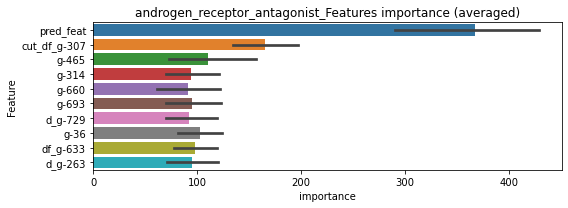

len(train_index) : 2835
len(valid_index) : 945
================================= fold 1/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000462069	valid_1's binary_logloss: 0.000793723
[2000]	training's binary_logloss: 0.000253613	valid_1's binary_logloss: 0.000437519
[3000]	training's binary_logloss: 0.000185877	valid_1's binary_logloss: 0.000321181
[4000]	training's binary_logloss: 0.000153795	valid_1's binary_logloss: 0.000265928
[5000]	training's binary_logloss: 0.000137466	valid_1's binary_logloss: 0.000237792
[6000]	training's binary_logloss: 0.000126997	valid_1's binary_logloss: 0.000219718
[7000]	training's binary_logloss: 0.000119714	valid_1's binary_logloss: 0.00020714
[8000]	training's binary_logloss: 0.000114731	valid_1's binary_logloss: 0.000198542
[9000]	training's binary_logloss: 0.000111186	valid_1's binary_logloss: 0.000192413
[10000]	training's binary_logloss: 0.00010864	valid_1's binary_logloss: 0.000188022
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.00010864	valid_1

len(train_index) : 2835
len(valid_index) : 945
================================= fold 2/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000460789	valid_1's binary_logloss: 0.000822023
[2000]	training's binary_logloss: 0.000253308	valid_1's binary_logloss: 0.000454061
[3000]	training's binary_logloss: 0.000185789	valid_1's binary_logloss: 0.000333631
[4000]	training's binary_logloss: 0.000153745	valid_1's binary_logloss: 0.000276297
[5000]	training's binary_logloss: 0.000137433	valid_1's binary_logloss: 0.000247073
[6000]	training's binary_logloss: 0.000126992	valid_1's binary_logloss: 0.000228333
[7000]	training's binary_logloss: 0.000119708	valid_1's binary_logloss: 0.000215245
[8000]	training's binary_logloss: 0.00011473	valid_1's binary_logloss: 0.000206327
[9000]	training's binary_logloss: 0.00011119	valid_1's binary_logloss: 0.000199973
[10000]	training's binary_logloss: 0.000108638	valid_1's binary_logloss: 0.000195409
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000108638	valid_

len(train_index) : 2835
len(valid_index) : 945
================================= fold 3/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000562401	valid_1's binary_logloss: 0.00391364
[2000]	training's binary_logloss: 0.000317185	valid_1's binary_logloss: 0.00351674
Early stopping, best iteration is:
[2065]	training's binary_logloss: 0.000310395	valid_1's binary_logloss: 0.00350649


len(train_index) : 2835
len(valid_index) : 945
================================= fold 4/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000561562	valid_1's binary_logloss: 0.00173459
Early stopping, best iteration is:
[1896]	training's binary_logloss: 0.000330483	valid_1's binary_logloss: 0.00138182


androgen_receptor_antagonist logloss: 0.00131921113946789


neg labels: 3289 → selected neg labels: 3273


anesthetic_-_local, len(trt): 80, len(othr): 3273
target_rate: 0.0033594 → Adj_target_rate: 0.0034820
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00715017	valid_1's binary_logloss: 0.0556819
[600]	training's binary_logloss: 0.00122743	valid_1's binary_logloss: 0.0464851
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000906861	valid_1's binary_logloss: 0.0458458
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00645092	valid_1's binary_logloss: 0.0516797
[600]	training's binary_logloss: 0.00118304	valid_1's binary_logloss: 0.0419549
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00106859	valid_1's binary_logloss: 0.0417668
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00733844	valid_1's binary_logloss: 0.0376102
[600]	training's binary_logloss: 0.00126573	valid_1's binary_logloss: 0.0264207
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000863153	valid_1's binary_logloss: 

1 / 3 AUC score:0.996
y_Threshold: 0.0081934, Threshold: 0.0172180, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[554]	training's binary_logloss: 0.00142765	valid_1's binary_logloss: 0.0426356


Remove_noisy_data: 140 → Positive_corect_labels: 650/3787
p_label_rate: 0.0100452 Vs.target_rate: 0.00336
Num_p_label: 40.0, conf_0:0.01205, conf_1:0.02238
Num_p_label: 40.0, Expected: 13.4, Adj_threshold_1: 0.0172180
Num_p_label: 0.0, Expected: 13.4, Adj_threshold_2: 0.0672180
threshold: 0.0672180, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 650.0/3787, y_label_rate: 0.1716398
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118673	valid_1's binary_logloss: 0.00801077
[600]	training's binary_logloss: 0.000230192	valid_1's binary_logloss: 0.0066526
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000225636	valid_1's binary_logloss: 0.00658289
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125626	valid_1's binary_logloss: 0.00292424
[600]	training's binary_logloss: 0.000240325	valid_1's binary_logloss: 0.0010113
[900]	training's binary_logloss: 0.000174137	valid_1's binary_logloss: 0.000854214
Early stopping, best iteration is:
[927]	training's binary_logloss: 0.000172381	valid_1's binary_logloss: 0.000840085
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126594	valid_1's binary_logloss: 0.00296263
[600]	training's binary_logloss: 0.000241139	valid_1's binary_logloss: 0.00105456
[900]	traini

2 / 3 AUC score:1.000
y_Threshold: 0.2351415, Threshold: 0.0672180, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 648.0/3783
p_label_rate: 0.0482170 Vs.target_rate: 0.00336
Num_p_label: 192.0, conf_0:0.05377, conf_1:0.08066
Num_p_label: 192.0, Expected: 13.4, Adj_threshold_1: 0.0672180
Num_p_label: 184.0, Expected: 13.4, Adj_threshold_2: 0.1172180
Num_p_label: 162.0, Expected: 13.4, Adj_threshold_3: 0.1672180
Num_p_label: 119.0, Expected: 13.4, Adj_threshold_4: 0.2172180
Num_p_label: 73.0, Expected: 13.4, Adj_threshold_5: 0.2672180
Num_p_label: 43.0, Expected: 13.4, Adj_threshold_6: 0.3172180
Num_p_label: 30.0, Expected: 13.4, Adj_threshold_7: 0.3672180
Num_p_label: 24.0, Expected: 13.4, Adj_threshold_8: 0.4172180
Num_p_label: 22.0, Expected: 13.4, Adj_threshold_9: 0.4672180
Num_p_label: 22.0, Expected: 13.4, Adj_threshold_10: 0.5172180
threshold: 0.5672180, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 648.0/3783, y_label_rate: 0.1712

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120626	valid_1's binary_logloss: 0.0085276
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000360165	valid_1's binary_logloss: 0.00730286
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119845	valid_1's binary_logloss: 0.00474517
[600]	training's binary_logloss: 0.000228208	valid_1's binary_logloss: 0.0031591
[900]	training's binary_logloss: 0.000164583	valid_1's binary_logloss: 0.00301007
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000163573	valid_1's binary_logloss: 0.00299894
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118279	valid_1's binary_logloss: 0.00227526
[600]	training's binary_logloss: 0.000228205	valid_1's binary_logloss: 0.000404887
[900]	training's binary_logloss: 0.000164513	valid_1's binary_logloss: 0.000250544
Early stoppi

3 / 3 AUC score:1.000
y_Threshold: 0.1116400, Threshold: 0.5672180, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 646.0/3779
p_label_rate: 0.0037670 Vs.target_rate: 0.00336
Num_p_label: 15.0, conf_0:0.50000, conf_1:0.62394
threshold: 0.5672180, positive_p_label: 15.0/3982, p_label_rate: 0.0037670


[900]	training's binary_logloss: 0.000163152	valid_1's binary_logloss: 0.00067877
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000163955	valid_1's binary_logloss: 0.000676082


positive_y_label: 646.0/3779, y_label_rate: 0.1709447


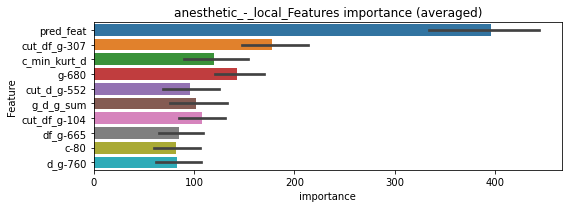

len(train_index) : 2834
len(valid_index) : 945
================================= fold 1/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000454775	valid_1's binary_logloss: 0.000760621
[2000]	training's binary_logloss: 0.00025196	valid_1's binary_logloss: 0.000423357
[3000]	training's binary_logloss: 0.000185131	valid_1's binary_logloss: 0.000311524
[4000]	training's binary_logloss: 0.000153528	valid_1's binary_logloss: 0.000258615
[5000]	training's binary_logloss: 0.000137385	valid_1's binary_logloss: 0.00023154
[6000]	training's binary_logloss: 0.000126931	valid_1's binary_logloss: 0.000213929
[7000]	training's binary_logloss: 0.000119671	valid_1's binary_logloss: 0.000201692
[8000]	training's binary_logloss: 0.000114696	valid_1's binary_logloss: 0.00019332
[9000]	training's binary_logloss: 0.000111171	valid_1's binary_logloss: 0.000187388
[10000]	training's binary_logloss: 0.000108651	valid_1's binary_logloss: 0.000183172
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000108651	valid_1

len(train_index) : 2834
len(valid_index) : 945
================================= fold 2/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000453131	valid_1's binary_logloss: 0.000876415
[2000]	training's binary_logloss: 0.000251522	valid_1's binary_logloss: 0.00048943
[3000]	training's binary_logloss: 0.000184921	valid_1's binary_logloss: 0.000360543
[4000]	training's binary_logloss: 0.000153471	valid_1's binary_logloss: 0.000299658
[5000]	training's binary_logloss: 0.000137373	valid_1's binary_logloss: 0.000268421
[6000]	training's binary_logloss: 0.000126929	valid_1's binary_logloss: 0.000248041
[7000]	training's binary_logloss: 0.000119652	valid_1's binary_logloss: 0.000233817
[8000]	training's binary_logloss: 0.000114682	valid_1's binary_logloss: 0.000224123
[9000]	training's binary_logloss: 0.000111143	valid_1's binary_logloss: 0.000217207
[10000]	training's binary_logloss: 0.00010865	valid_1's binary_logloss: 0.000212391
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.00010865	valid_1

len(train_index) : 2834
len(valid_index) : 945
================================= fold 3/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000543099	valid_1's binary_logloss: 0.000911339
[2000]	training's binary_logloss: 0.000307885	valid_1's binary_logloss: 0.000590404
[3000]	training's binary_logloss: 0.00023528	valid_1's binary_logloss: 0.00047698
[4000]	training's binary_logloss: 0.000200981	valid_1's binary_logloss: 0.00042172
[5000]	training's binary_logloss: 0.000182877	valid_1's binary_logloss: 0.000390237
[6000]	training's binary_logloss: 0.000171068	valid_1's binary_logloss: 0.000367709
[7000]	training's binary_logloss: 0.000162193	valid_1's binary_logloss: 0.000352041
[8000]	training's binary_logloss: 0.000155768	valid_1's binary_logloss: 0.000341713
Early stopping, best iteration is:
[8405]	training's binary_logloss: 0.000153608	valid_1's binary_logloss: 0.000338399


len(train_index) : 2835
len(valid_index) : 944
================================= fold 4/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000553488	valid_1's binary_logloss: 0.000858401
[2000]	training's binary_logloss: 0.000313397	valid_1's binary_logloss: 0.00052353
[3000]	training's binary_logloss: 0.00023795	valid_1's binary_logloss: 0.000408077
[4000]	training's binary_logloss: 0.000202389	valid_1's binary_logloss: 0.000350596
[5000]	training's binary_logloss: 0.000183873	valid_1's binary_logloss: 0.000320005
[6000]	training's binary_logloss: 0.00017176	valid_1's binary_logloss: 0.000298867
[7000]	training's binary_logloss: 0.00016281	valid_1's binary_logloss: 0.000283385
[8000]	training's binary_logloss: 0.000156307	valid_1's binary_logloss: 0.000272499
Early stopping, best iteration is:
[8541]	training's binary_logloss: 0.000153554	valid_1's binary_logloss: 0.000267639


anesthetic_-_local logloss: 0.0002503958072787461


neg labels: 3289 → selected neg labels: 3282


angiogenesis_inhibitor, len(trt): 36, len(othr): 3282
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00223121	valid_1's binary_logloss: 0.0184455
[600]	training's binary_logloss: 0.000528453	valid_1's binary_logloss: 0.0155128
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000542619	valid_1's binary_logloss: 0.0154259
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00244741	valid_1's binary_logloss: 0.0148777
[600]	training's binary_logloss: 0.000545316	valid_1's binary_logloss: 0.00996533
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000500666	valid_1's binary_logloss: 0.009763
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00244542	valid_1's binary_logloss: 0.0107835
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000814351	valid_1's binary_logloss: 0.00846111
Training until validation scores don't improve for 30 rounds
[300]

1 / 3 AUC score:1.000
y_Threshold: 0.0039098, Threshold: 0.0143236, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.01003, conf_1:0.01862
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0143236
Num_p_label: 6.0, Expected: 6.0, Adj_threshold_2: 0.0643236
threshold: 0.0643236, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000772761	valid_1's binary_logloss: 0.00361871
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000216139	valid_1's binary_logloss: 0.00275733
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000793392	valid_1's binary_logloss: 0.00283835
Early stopping, best iteration is:
[388]	training's binary_logloss: 0.000388766	valid_1's binary_logloss: 0.00198901
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000820724	valid_1's binary_logloss: 0.00294302
Early stopping, best iteration is:
[393]	training's binary_logloss: 0.000389286	valid_1's binary_logloss: 0.00245402
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000805569	valid_1's binary_logloss: 0.00230585


2 / 3 AUC score:1.000
y_Threshold: 0.5580442, Threshold: 0.0643236, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0532396 Vs.target_rate: 0.00151
Num_p_label: 212.0, conf_0:0.05146, conf_1:0.07719
Num_p_label: 212.0, Expected: 6.0, Adj_threshold_1: 0.0643236
Num_p_label: 212.0, Expected: 6.0, Adj_threshold_2: 0.1143236
Num_p_label: 212.0, Expected: 6.0, Adj_threshold_3: 0.1643236
Num_p_label: 212.0, Expected: 6.0, Adj_threshold_4: 0.2143236
Num_p_label: 212.0, Expected: 6.0, Adj_threshold_5: 0.2643236
Num_p_label: 212.0, Expected: 6.0, Adj_threshold_6: 0.3143236
Num_p_label: 207.0, Expected: 6.0, Adj_threshold_7: 0.3643236


[600]	training's binary_logloss: 0.000204342	valid_1's binary_logloss: 0.0016042
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000207034	valid_1's binary_logloss: 0.00159999


Num_p_label: 203.0, Expected: 6.0, Adj_threshold_8: 0.4143236
Num_p_label: 192.0, Expected: 6.0, Adj_threshold_9: 0.4643236
Num_p_label: 179.0, Expected: 6.0, Adj_threshold_10: 0.5143236
threshold: 0.5643236, positive_p_label: 158.0/3982, p_label_rate: 0.0396786
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000802446	valid_1's binary_logloss: 0.00444761
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000220733	valid_1's binary_logloss: 0.00326436
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00081979	valid_1's binary_logloss: 0.001877
[600]	training's binary_logloss: 0.000212171	valid_1's binary_logloss: 0.00104058
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000173629	valid_1's binary_logloss: 0.000980523
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000808172	valid_1's binary_logloss: 0.00218303
[600]	training's binary_logloss: 0.000209016	valid_1's binary_logloss: 0.00145669
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.00021451	valid_1's binary_logloss: 0.00145036
Training until validation scores don't improve for 30 round

3 / 3 AUC score:1.000
y_Threshold: 0.4595601, Threshold: 0.5643236, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0223506 Vs.target_rate: 0.00151
Num_p_label: 89.0, conf_0:0.50000, conf_1:0.62076
Num_p_label: 89.0, Expected: 6.0, Adj_threshold_1: 0.5643236
Num_p_label: 57.0, Expected: 6.0, Adj_threshold_2: 0.6143236
Num_p_label: 44.0, Expected: 6.0, Adj_threshold_3: 0.6643236
Num_p_label: 38.0, Expected: 6.0, Adj_threshold_4: 0.7143236
Num_p_label: 29.0, Expected: 6.0, Adj_threshold_5: 0.7643236


Early stopping, best iteration is:
[789]	training's binary_logloss: 0.000169218	valid_1's binary_logloss: 0.000560948


threshold: 0.7643236, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 654.0/3802, y_label_rate: 0.1720147


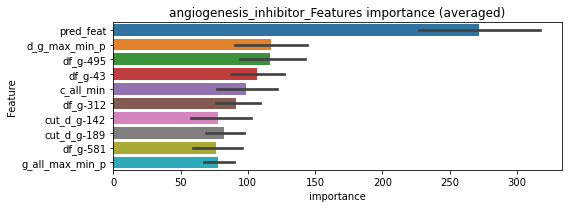

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 angiogenesis_inhibitor=================================


Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000773994	valid_1's binary_logloss: 0.00423604
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000513035	valid_1's binary_logloss: 0.000957298
Early stopping, best iteration is:
[1855]	training's binary_logloss: 0.000316926	valid_1's binary_logloss: 0.000729361


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000510254	valid_1's binary_logloss: 0.00384116
Early stopping, best iteration is:
[1080]	training's binary_logloss: 0.000476838	valid_1's binary_logloss: 0.00376159


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00050468	valid_1's binary_logloss: 0.00187137
Early stopping, best iteration is:
[1860]	training's binary_logloss: 0.000311262	valid_1's binary_logloss: 0.00166117


angiogenesis_inhibitor logloss: 0.0025972293580392805


neg labels: 3289 → selected neg labels: 3286


angiotensin_receptor_antagonist, len(trt): 37, len(othr): 3286
target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00263477	valid_1's binary_logloss: 0.0116233
[600]	training's binary_logloss: 0.000585548	valid_1's binary_logloss: 0.00693466
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000491907	valid_1's binary_logloss: 0.00667654
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00265921	valid_1's binary_logloss: 0.0126702
[600]	training's binary_logloss: 0.000583995	valid_1's binary_logloss: 0.00671513
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000476972	valid_1's binary_logloss: 0.0064606
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00270279	valid_1's binary_logloss: 0.00740151
[600]	training's binary_logloss: 0.000596588	valid_1's binary_logloss: 0.00310831
Early stopping, best iteration is:
[732]	training's binary_logloss: 0.000500764	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0034130, Threshold: 0.0135397, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811


Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000641545	valid_1's binary_logloss: 0.00912919


p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, conf_0:0.00948, conf_1:0.01760
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0135397
Num_p_label: 6.0, Expected: 6.2, Adj_threshold_2: 0.0635397
threshold: 0.0635397, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000810912	valid_1's binary_logloss: 0.00221834
[600]	training's binary_logloss: 0.000206293	valid_1's binary_logloss: 0.00128289
[900]	training's binary_logloss: 0.0001634	valid_1's binary_logloss: 0.00121963
Early stopping, best iteration is:
[987]	training's binary_logloss: 0.000158879	valid_1's binary_logloss: 0.00121228
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00080486	valid_1's binary_logloss: 0.00373586
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.00022711	valid_1's binary_logloss: 0.00288435
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000833129	valid_1's binary_logloss: 0.000941346
[600]	training's binary_logloss: 0.000201544	valid_1's binary_logloss: 0.00019836
[900]	training's binary_logloss: 0.000158314	valid_1's binary_logloss: 0.000141465
Early stopp

2 / 3 AUC score:1.000
y_Threshold: 0.6976874, Threshold: 0.0635397, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0572577 Vs.target_rate: 0.00155
Num_p_label: 228.0, conf_0:0.05083, conf_1:0.07625
Num_p_label: 228.0, Expected: 6.2, Adj_threshold_1: 0.0635397
Num_p_label: 228.0, Expected: 6.2, Adj_threshold_2: 0.1135397
Num_p_label: 228.0, Expected: 6.2, Adj_threshold_3: 0.1635397
Num_p_label: 228.0, Expected: 6.2, Adj_threshold_4: 0.2135397
Num_p_label: 228.0, Expected: 6.2, Adj_threshold_5: 0.2635397
Num_p_label: 228.0, Expected: 6.2, Adj_threshold_6: 0.3135397
Num_p_label: 228.0, Expected: 6.2, Adj_threshold_7: 0.3635397
Num_p_label: 228.0, Expected: 6.2, Adj_threshold_8: 0.4135397
Num_p_label: 227.0, Expected: 6.2, Adj_threshold_9: 0.4635397
Num_p_label: 224.0, Expected: 6.2, Adj_threshold_10: 0.5135397
threshold: 0.5635397, positive_p_label: 213.0/3982, p_label_rate: 0.0534907
positive_y_label: 657.0/3811, y_label_rate: 0.1723957

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0008108	valid_1's binary_logloss: 0.00228341
[600]	training's binary_logloss: 0.000208093	valid_1's binary_logloss: 0.00139331
[900]	training's binary_logloss: 0.000164436	valid_1's binary_logloss: 0.00132868
Early stopping, best iteration is:
[987]	training's binary_logloss: 0.000159566	valid_1's binary_logloss: 0.00132074
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000805349	valid_1's binary_logloss: 0.0037593
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000250334	valid_1's binary_logloss: 0.00291463
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000830424	valid_1's binary_logloss: 0.000942985
[600]	training's binary_logloss: 0.000201543	valid_1's binary_logloss: 0.000199439
[900]	training's binary_logloss: 0.000156146	valid_1's binary_logloss: 0.000141815
Early sto

3 / 3 AUC score:1.000
y_Threshold: 0.6659044, Threshold: 0.5635397, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0517328 Vs.target_rate: 0.00155
Num_p_label: 206.0, conf_0:0.50000, conf_1:0.61989
Num_p_label: 206.0, Expected: 6.2, Adj_threshold_1: 0.5635397
Num_p_label: 173.0, Expected: 6.2, Adj_threshold_2: 0.6135397
Num_p_label: 136.0, Expected: 6.2, Adj_threshold_3: 0.6635397
Num_p_label: 93.0, Expected: 6.2, Adj_threshold_4: 0.7135397
Num_p_label: 50.0, Expected: 6.2, Adj_threshold_5: 0.7635397
threshold: 0.7635397, positive_p_label: 50.0/3982, p_label_rate: 0.0125565


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000218669	valid_1's binary_logloss: 0.00131348


positive_y_label: 657.0/3811, y_label_rate: 0.1723957


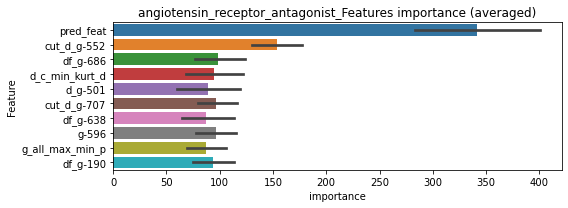

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000508377	valid_1's binary_logloss: 0.00162032
[2000]	training's binary_logloss: 0.000298723	valid_1's binary_logloss: 0.00134497
[3000]	training's binary_logloss: 0.0002376	valid_1's binary_logloss: 0.00126505
[4000]	training's binary_logloss: 0.00020921	valid_1's binary_logloss: 0.00121985
Early stopping, best iteration is:
[4240]	training's binary_logloss: 0.000205194	valid_1's binary_logloss: 0.00121422


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000505397	valid_1's binary_logloss: 0.00360696
[2000]	training's binary_logloss: 0.000292845	valid_1's binary_logloss: 0.00330774
Early stopping, best iteration is:
[2814]	training's binary_logloss: 0.000237356	valid_1's binary_logloss: 0.00321564


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000504967	valid_1's binary_logloss: 0.000487117
[2000]	training's binary_logloss: 0.000294723	valid_1's binary_logloss: 0.00027025
[3000]	training's binary_logloss: 0.000231884	valid_1's binary_logloss: 0.000204111
[4000]	training's binary_logloss: 0.000202879	valid_1's binary_logloss: 0.000173087
[5000]	training's binary_logloss: 0.000187736	valid_1's binary_logloss: 0.000157016
[6000]	training's binary_logloss: 0.000177765	valid_1's binary_logloss: 0.000146546
[7000]	training's binary_logloss: 0.000170309	valid_1's binary_logloss: 0.000138729
Early stopping, best iteration is:
[7768]	training's binary_logloss: 0.00016607	valid_1's binary_logloss: 0.000134294


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00048509	valid_1's binary_logloss: 0.00151882
Early stopping, best iteration is:
[1822]	training's binary_logloss: 0.000306571	valid_1's binary_logloss: 0.00131328


angiotensin_receptor_antagonist logloss: 0.0014702083227710223


neg labels: 3289 → selected neg labels: 3278


anti-inflammatory, len(trt): 73, len(othr): 3278
target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00728597	valid_1's binary_logloss: 0.0452837
[600]	training's binary_logloss: 0.00123197	valid_1's binary_logloss: 0.0336833
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.00108816	valid_1's binary_logloss: 0.0331911
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00790668	valid_1's binary_logloss: 0.0346341
[600]	training's binary_logloss: 0.00130803	valid_1's binary_logloss: 0.0197605
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000853144	valid_1's binary_logloss: 0.0184732
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00733455	valid_1's binary_logloss: 0.0493888
[600]	training's binary_logloss: 0.00125197	valid_1's binary_logloss: 0.0404954
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.00133471	valid_1's binary_logloss: 0

1 / 3 AUC score:0.999
y_Threshold: 0.0104917, Threshold: 0.0754802, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 651/3793
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, conf_0:0.05284, conf_1:0.09812
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.0754802
Num_p_label: 27.0, Expected: 12.2, Adj_threshold_2: 0.1254802
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_3: 0.1754802
Num_p_label: 14.0, Expected: 12.2, Adj_threshold_4: 0.2254802
threshold: 0.2254802, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 651.0/3793, y_label_rate: 0.1716320
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013648	valid_1's binary_logloss: 0.00363408
[600]	training's binary_logloss: 0.000243271	valid_1's binary_logloss: 0.0012225
[900]	training's binary_logloss: 0.000168772	valid_1's binary_logloss: 0.00100215
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000169111	valid_1's binary_logloss: 0.00099962
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135778	valid_1's binary_logloss: 0.00756957
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000293908	valid_1's binary_logloss: 0.00606951
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00137096	valid_1's binary_logloss: 0.00562196
[600]	training's binary_logloss: 0.000243877	valid_1's binary_logloss: 0.00400571
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.00022656	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.2896171, Threshold: 0.2254802, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 649.0/3789
p_label_rate: 0.0560020 Vs.target_rate: 0.00307
Num_p_label: 223.0, conf_0:0.18038, conf_1:0.27058
Num_p_label: 223.0, Expected: 12.2, Adj_threshold_1: 0.2254802
Num_p_label: 212.0, Expected: 12.2, Adj_threshold_2: 0.2754802
Num_p_label: 179.0, Expected: 12.2, Adj_threshold_3: 0.3254802
Num_p_label: 134.0, Expected: 12.2, Adj_threshold_4: 0.3754802
Num_p_label: 103.0, Expected: 12.2, Adj_threshold_5: 0.4254802
Num_p_label: 80.0, Expected: 12.2, Adj_threshold_6: 0.4754802
Num_p_label: 69.0, Expected: 12.2, Adj_threshold_7: 0.5254802
Num_p_label: 63.0, Expected: 12.2, Adj_threshold_8: 0.5754802
Num_p_label: 59.0, Expected: 12.2, Adj_threshold_9: 0.6254802
Num_p_label: 57.0, Expected: 12.2, Adj_threshold_10: 0.6754802
threshold: 0.7254802, positive_p_label: 52.0/3982, p_label_rate: 0.0130588
positive_y_label: 649.0/3789, y_label_rate: 0.171

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128103	valid_1's binary_logloss: 0.00342551
[600]	training's binary_logloss: 0.000232256	valid_1's binary_logloss: 0.00120589
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000202625	valid_1's binary_logloss: 0.00112147
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132834	valid_1's binary_logloss: 0.00560606
[600]	training's binary_logloss: 0.000246063	valid_1's binary_logloss: 0.00341618
[900]	training's binary_logloss: 0.000174484	valid_1's binary_logloss: 0.00320001
Early stopping, best iteration is:
[961]	training's binary_logloss: 0.000169924	valid_1's binary_logloss: 0.00318539
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131105	valid_1's binary_logloss: 0.00762532
[600]	training's binary_logloss: 0.000239966	valid_1's binary_logloss: 0.00568242
Early stoppi

3 / 3 AUC score:1.000
y_Threshold: 0.2439561, Threshold: 0.7254802, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 646.0/3783
p_label_rate: 0.0135610 Vs.target_rate: 0.00307
Num_p_label: 54.0, conf_0:0.50000, conf_1:0.79803
Num_p_label: 54.0, Expected: 12.2, Adj_threshold_1: 0.7254802
Num_p_label: 54.0, Expected: 12.2, Adj_threshold_2: 0.7754802
threshold: 0.7754802, positive_p_label: 54.0/3982, p_label_rate: 0.0135610
positive_y_label: 646.0/3783, y_label_rate: 0.1707639


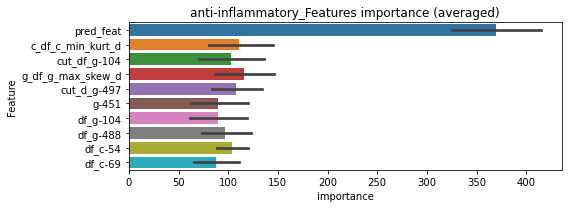

len(train_index) : 2837
len(valid_index) : 946
================================= fold 1/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000454371	valid_1's binary_logloss: 0.000819711
[2000]	training's binary_logloss: 0.000251766	valid_1's binary_logloss: 0.00045674
[3000]	training's binary_logloss: 0.000184977	valid_1's binary_logloss: 0.000336194
[4000]	training's binary_logloss: 0.000153386	valid_1's binary_logloss: 0.000279067
[5000]	training's binary_logloss: 0.000137251	valid_1's binary_logloss: 0.000249872
[6000]	training's binary_logloss: 0.000126807	valid_1's binary_logloss: 0.000230885
[7000]	training's binary_logloss: 0.000119549	valid_1's binary_logloss: 0.000217684
[8000]	training's binary_logloss: 0.000114593	valid_1's binary_logloss: 0.000208689
[9000]	training's binary_logloss: 0.00011108	valid_1's binary_logloss: 0.000202302
[10000]	training's binary_logloss: 0.000108566	valid_1's binary_logloss: 0.000197755
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000108566	valid_

len(train_index) : 2837
len(valid_index) : 946
================================= fold 2/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2837
len(valid_index) : 946
================================= fold 3/4 anti-inflammatory=================================


Early stopping, best iteration is:
[757]	training's binary_logloss: 0.000590941	valid_1's binary_logloss: 0.00906404
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00055589	valid_1's binary_logloss: 0.00309453
Early stopping, best iteration is:
[1643]	training's binary_logloss: 0.000361782	valid_1's binary_logloss: 0.002843


len(train_index) : 2838
len(valid_index) : 945
================================= fold 4/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000550451	valid_1's binary_logloss: 0.000844861
[2000]	training's binary_logloss: 0.000311666	valid_1's binary_logloss: 0.000543469
[3000]	training's binary_logloss: 0.000237396	valid_1's binary_logloss: 0.000431217
[4000]	training's binary_logloss: 0.000202905	valid_1's binary_logloss: 0.000376795
[5000]	training's binary_logloss: 0.000184949	valid_1's binary_logloss: 0.000346393
[6000]	training's binary_logloss: 0.000173414	valid_1's binary_logloss: 0.000325216
[7000]	training's binary_logloss: 0.000164868	valid_1's binary_logloss: 0.000310172
[8000]	training's binary_logloss: 0.000158502	valid_1's binary_logloss: 0.000299528
Early stopping, best iteration is:
[8203]	training's binary_logloss: 0.000157252	valid_1's binary_logloss: 0.000297641


anti-inflammatory logloss: 0.0031019744585289648


neg labels: 3289 → selected neg labels: 3284


antiarrhythmic, len(trt): 24, len(othr): 3284
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00180634	valid_1's binary_logloss: 0.00647187
[600]	training's binary_logloss: 0.000455764	valid_1's binary_logloss: 0.00319161
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000448556	valid_1's binary_logloss: 0.00316882
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00191503	valid_1's binary_logloss: 0.0070284
[600]	training's binary_logloss: 0.000460628	valid_1's binary_logloss: 0.00398636
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000446892	valid_1's binary_logloss: 0.00395089
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00186555	valid_1's binary_logloss: 0.00554184
[600]	training's binary_logloss: 0.000457249	valid_1's binary_logloss: 0.00306645
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000457249	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0026711, Threshold: 0.0080806, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.00566, conf_1:0.01050
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0080806
Num_p_label: 1.0, Expected: 4.0, Adj_threshold_2: 0.0580806
threshold: 0.0580806, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000682165	valid_1's binary_logloss: 0.00242279
Early stopping, best iteration is:
[389]	training's binary_logloss: 0.000348768	valid_1's binary_logloss: 0.00199169
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00067876	valid_1's binary_logloss: 0.00210093
[600]	training's binary_logloss: 0.000194265	valid_1's binary_logloss: 0.0014432
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000166154	valid_1's binary_logloss: 0.00140775
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000700481	valid_1's binary_logloss: 0.00152385
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000242882	valid_1's binary_logloss: 0.000883786
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000682454	valid_1's binary_logloss: 0.00212

2 / 3 AUC score:1.000
y_Threshold: 0.5204229, Threshold: 0.0580806, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0477147 Vs.target_rate: 0.00101
Num_p_label: 190.0, conf_0:0.04646, conf_1:0.06970
Num_p_label: 190.0, Expected: 4.0, Adj_threshold_1: 0.0580806
Num_p_label: 190.0, Expected: 4.0, Adj_threshold_2: 0.1080806
Num_p_label: 187.0, Expected: 4.0, Adj_threshold_3: 0.1580806
Num_p_label: 187.0, Expected: 4.0, Adj_threshold_4: 0.2080806
Num_p_label: 186.0, Expected: 4.0, Adj_threshold_5: 0.2580806
Num_p_label: 186.0, Expected: 4.0, Adj_threshold_6: 0.3080806


[600]	training's binary_logloss: 0.00019154	valid_1's binary_logloss: 0.00148156
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000187543	valid_1's binary_logloss: 0.00147045


Num_p_label: 179.0, Expected: 4.0, Adj_threshold_7: 0.3580806
Num_p_label: 161.0, Expected: 4.0, Adj_threshold_8: 0.4080806
Num_p_label: 130.0, Expected: 4.0, Adj_threshold_9: 0.4580806
Num_p_label: 99.0, Expected: 4.0, Adj_threshold_10: 0.5080806
threshold: 0.5580806, positive_p_label: 69.0/3982, p_label_rate: 0.0173280
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000697725	valid_1's binary_logloss: 0.00134388
[600]	training's binary_logloss: 0.000196173	valid_1's binary_logloss: 0.000631379
[900]	training's binary_logloss: 0.000161009	valid_1's binary_logloss: 0.000567865
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000161066	valid_1's binary_logloss: 0.000567626
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000703586	valid_1's binary_logloss: 0.00112243
[600]	training's binary_logloss: 0.000201977	valid_1's binary_logloss: 0.000531673
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000172657	valid_1's binary_logloss: 0.000493193
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000705275	valid_1's binary_logloss: 0.00137039
[600]	training's binary_logloss: 0.000201951	valid_1's binary_logloss: 0.000748088
Ear

3 / 3 AUC score:1.000
y_Threshold: 0.5658519, Threshold: 0.5580806, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0040181 Vs.target_rate: 0.00101
Num_p_label: 16.0, conf_0:0.50000, conf_1:0.61389
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_1: 0.5580806
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_2: 0.6080806
threshold: 0.6080806, positive_p_label: 10.0/3982, p_label_rate: 0.0025113


Early stopping, best iteration is:
[401]	training's binary_logloss: 0.000330979	valid_1's binary_logloss: 0.00335637


positive_y_label: 655.0/3806, y_label_rate: 0.1720967


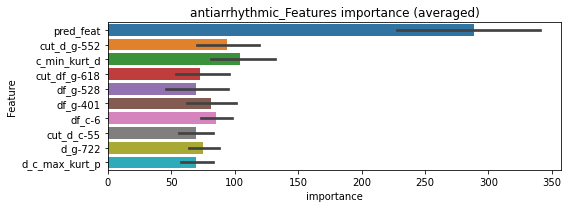

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000476699	valid_1's binary_logloss: 0.000621315
[2000]	training's binary_logloss: 0.000286941	valid_1's binary_logloss: 0.000364839
[3000]	training's binary_logloss: 0.000232634	valid_1's binary_logloss: 0.000283564
[4000]	training's binary_logloss: 0.000206326	valid_1's binary_logloss: 0.000242433
[5000]	training's binary_logloss: 0.000192618	valid_1's binary_logloss: 0.000221109
[6000]	training's binary_logloss: 0.000183625	valid_1's binary_logloss: 0.000207106
[7000]	training's binary_logloss: 0.000176963	valid_1's binary_logloss: 0.000197504
[8000]	training's binary_logloss: 0.000172277	valid_1's binary_logloss: 0.000189989
Early stopping, best iteration is:
[8670]	training's binary_logloss: 0.000169782	valid_1's binary_logloss: 0.000185801


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000473962	valid_1's binary_logloss: 0.000794153
[2000]	training's binary_logloss: 0.000286983	valid_1's binary_logloss: 0.000612903
Early stopping, best iteration is:
[2683]	training's binary_logloss: 0.000243665	valid_1's binary_logloss: 0.000576382


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000469339	valid_1's binary_logloss: 0.00137747
Early stopping, best iteration is:
[1212]	training's binary_logloss: 0.000403818	valid_1's binary_logloss: 0.00130196


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds


antiarrhythmic logloss: 0.002938845762050539


Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000832184	valid_1's binary_logloss: 0.0096962
neg labels: 3289 → selected neg labels: 3281


antibiotic, len(trt): 43, len(othr): 3281
target_rate: 0.0018057 → Adj_target_rate: 0.0020542
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00360289	valid_1's binary_logloss: 0.0214161
[600]	training's binary_logloss: 0.000702977	valid_1's binary_logloss: 0.0140977
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000649938	valid_1's binary_logloss: 0.013742
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00343001	valid_1's binary_logloss: 0.0165249
[600]	training's binary_logloss: 0.000688942	valid_1's binary_logloss: 0.010395
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000560038	valid_1's binary_logloss: 0.0100505
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00379866	valid_1's binary_logloss: 0.00844569
[600]	training's binary_logloss: 0.000725144	valid_1's binary_logloss: 0.00281244
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000555967	valid_1's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0051504, Threshold: 0.0443671, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00181
Num_p_label: 40.0, conf_0:0.03106, conf_1:0.05768
Num_p_label: 40.0, Expected: 7.2, Adj_threshold_1: 0.0443671
Num_p_label: 18.0, Expected: 7.2, Adj_threshold_2: 0.0943671
Num_p_label: 6.0, Expected: 7.2, Adj_threshold_3: 0.1443671
threshold: 0.1443671, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000947016	valid_1's binary_logloss: 0.00263527
[600]	training's binary_logloss: 0.000213471	valid_1's binary_logloss: 0.00141362
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.00020884	valid_1's binary_logloss: 0.00141124
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000944326	valid_1's binary_logloss: 0.00336223
[600]	training's binary_logloss: 0.000214341	valid_1's binary_logloss: 0.00249853
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.0001709	valid_1's binary_logloss: 0.00238736
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000943692	valid_1's binary_logloss: 0.00276715
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000256605	valid_1's binary_logloss: 0.00187823
Training until validation scores don't improve for 30 round

2 / 3 AUC score:1.000
y_Threshold: 0.6479694, Threshold: 0.1443671, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0713209 Vs.target_rate: 0.00181
Num_p_label: 284.0, conf_0:0.11549, conf_1:0.17324
Num_p_label: 284.0, Expected: 7.2, Adj_threshold_1: 0.1443671
Num_p_label: 283.0, Expected: 7.2, Adj_threshold_2: 0.1943671
Num_p_label: 283.0, Expected: 7.2, Adj_threshold_3: 0.2443671
Num_p_label: 281.0, Expected: 7.2, Adj_threshold_4: 0.2943671
Num_p_label: 278.0, Expected: 7.2, Adj_threshold_5: 0.3443671
Num_p_label: 278.0, Expected: 7.2, Adj_threshold_6: 0.3943671
Num_p_label: 276.0, Expected: 7.2, Adj_threshold_7: 0.4443671
Num_p_label: 271.0, Expected: 7.2, Adj_threshold_8: 0.4943671
Num_p_label: 260.0, Expected: 7.2, Adj_threshold_9: 0.5443671
Num_p_label: 228.0, Expected: 7.2, Adj_threshold_10: 0.5943671


Early stopping, best iteration is:
[408]	training's binary_logloss: 0.000400137	valid_1's binary_logloss: 0.00144954


threshold: 0.6443671, positive_p_label: 197.0/3982, p_label_rate: 0.0494726
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000940845	valid_1's binary_logloss: 0.00251593
[600]	training's binary_logloss: 0.000214236	valid_1's binary_logloss: 0.00114915
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000225157	valid_1's binary_logloss: 0.00113214
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000966462	valid_1's binary_logloss: 0.00371976
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000233782	valid_1's binary_logloss: 0.002928
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000954675	valid_1's binary_logloss: 0.0027175
[600]	training's binary_logloss: 0.00021392	valid_1's binary_logloss: 0.00174347
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000196884	valid_1's binary_logloss: 0.00171259
Training until validation scores don't improve for 30 rounds

3 / 3 AUC score:1.000
y_Threshold: 0.6048858, Threshold: 0.6443671, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0369161 Vs.target_rate: 0.00181
Num_p_label: 147.0, conf_0:0.50000, conf_1:0.70880
Num_p_label: 147.0, Expected: 7.2, Adj_threshold_1: 0.6443671
Num_p_label: 99.0, Expected: 7.2, Adj_threshold_2: 0.6943671


Early stopping, best iteration is:
[418]	training's binary_logloss: 0.000385538	valid_1's binary_logloss: 0.00184315


Num_p_label: 66.0, Expected: 7.2, Adj_threshold_3: 0.7443671
Num_p_label: 39.0, Expected: 7.2, Adj_threshold_4: 0.7943671
threshold: 0.7943671, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_label: 654.0/3801, y_label_rate: 0.1720600


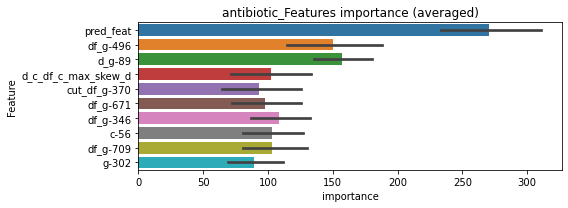

len(train_index) : 2850
len(valid_index) : 951
================================= fold 1/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000518498	valid_1's binary_logloss: 0.00521681
Early stopping, best iteration is:
[1080]	training's binary_logloss: 0.000484148	valid_1's binary_logloss: 0.00514632


len(train_index) : 2851
len(valid_index) : 950
================================= fold 2/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000528429	valid_1's binary_logloss: 0.00162308
[2000]	training's binary_logloss: 0.000309496	valid_1's binary_logloss: 0.00133865
[3000]	training's binary_logloss: 0.000247829	valid_1's binary_logloss: 0.00125024
[4000]	training's binary_logloss: 0.000219734	valid_1's binary_logloss: 0.00120398
Early stopping, best iteration is:
[4172]	training's binary_logloss: 0.000216509	valid_1's binary_logloss: 0.00119853


len(train_index) : 2851
len(valid_index) : 950
================================= fold 3/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000517755	valid_1's binary_logloss: 0.00221168
Early stopping, best iteration is:
[1897]	training's binary_logloss: 0.000317783	valid_1's binary_logloss: 0.0019655


len(train_index) : 2851
len(valid_index) : 950
================================= fold 4/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000513922	valid_1's binary_logloss: 0.00078401
[2000]	training's binary_logloss: 0.000301885	valid_1's binary_logloss: 0.000564804
[3000]	training's binary_logloss: 0.000240378	valid_1's binary_logloss: 0.000497336
Early stopping, best iteration is:
[3927]	training's binary_logloss: 0.000212344	valid_1's binary_logloss: 0.000462295


antibiotic logloss: 0.00219414817389093


neg labels: 3289 → selected neg labels: 3286


anticonvulsant, len(trt): 18, len(othr): 3286
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113212	valid_1's binary_logloss: 0.003209
[600]	training's binary_logloss: 0.000329524	valid_1's binary_logloss: 0.00143397
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000328682	valid_1's binary_logloss: 0.00143202
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00111201	valid_1's binary_logloss: 0.00472667
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000338132	valid_1's binary_logloss: 0.00281885
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00111609	valid_1's binary_logloss: 0.00507068
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000374865	valid_1's binary_logloss: 0.00438206
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00111407	valid_1's binary_logloss: 0.00394138


1 / 3 AUC score:1.000
y_Threshold: 0.0016859, Threshold: 0.0051626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00361, conf_1:0.00671
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0051626


[600]	training's binary_logloss: 0.000323786	valid_1's binary_logloss: 0.00203482
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000322519	valid_1's binary_logloss: 0.00202727


Num_p_label: 1.0, Expected: 3.0, Adj_threshold_2: 0.0551626
threshold: 0.0551626, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000539819	valid_1's binary_logloss: 0.000998749
[600]	training's binary_logloss: 0.000178126	valid_1's binary_logloss: 0.0005632
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000170709	valid_1's binary_logloss: 0.00055912
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000511883	valid_1's binary_logloss: 0.000979351
[600]	training's binary_logloss: 0.000170945	valid_1's binary_logloss: 0.000500902
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000157401	valid_1's binary_logloss: 0.000477062
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000510045	valid_1's binary_logloss: 0.00277537
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000188499	valid_1's binary_logloss: 0.00229397
Training until validation scores don't improve for 30

2 / 3 AUC score:1.000
y_Threshold: 0.6006566, Threshold: 0.0551626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0464591 Vs.target_rate: 0.00076


[600]	training's binary_logloss: 0.000173572	valid_1's binary_logloss: 0.000417465
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000165281	valid_1's binary_logloss: 0.000405424


Num_p_label: 185.0, conf_0:0.04413, conf_1:0.06620
Num_p_label: 185.0, Expected: 3.0, Adj_threshold_1: 0.0551626
Num_p_label: 185.0, Expected: 3.0, Adj_threshold_2: 0.1051626
Num_p_label: 185.0, Expected: 3.0, Adj_threshold_3: 0.1551626
Num_p_label: 184.0, Expected: 3.0, Adj_threshold_4: 0.2051626
Num_p_label: 182.0, Expected: 3.0, Adj_threshold_5: 0.2551626
Num_p_label: 180.0, Expected: 3.0, Adj_threshold_6: 0.3051626
Num_p_label: 175.0, Expected: 3.0, Adj_threshold_7: 0.3551626
Num_p_label: 164.0, Expected: 3.0, Adj_threshold_8: 0.4051626
Num_p_label: 149.0, Expected: 3.0, Adj_threshold_9: 0.4551626
Num_p_label: 131.0, Expected: 3.0, Adj_threshold_10: 0.5051626
threshold: 0.5551626, positive_p_label: 110.0/3982, p_label_rate: 0.0276243
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000544546	valid_1's binary_logloss: 0.00109017
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000193425	valid_1's binary_logloss: 0.000749306
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000505964	valid_1's binary_logloss: 0.00105083
[600]	training's binary_logloss: 0.000168867	valid_1's binary_logloss: 0.00053632
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000171562	valid_1's binary_logloss: 0.000534888
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000521674	valid_1's binary_logloss: 0.00340296
Early stopping, best iteration is:
[370]	training's binary_logloss: 0.000306694	valid_1's binary_logloss: 0.00298969
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000510159	valid_1's binary_logloss: 0.00

3 / 3 AUC score:1.000


[600]	training's binary_logloss: 0.000172434	valid_1's binary_logloss: 0.000356198
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000161922	valid_1's binary_logloss: 0.000335126


y_Threshold: 0.5686925, Threshold: 0.5551626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0220994 Vs.target_rate: 0.00076
Num_p_label: 88.0, conf_0:0.49965, conf_1:0.61068
Num_p_label: 88.0, Expected: 3.0, Adj_threshold_1: 0.5551626
Num_p_label: 63.0, Expected: 3.0, Adj_threshold_2: 0.6051626
Num_p_label: 35.0, Expected: 3.0, Adj_threshold_3: 0.6551626
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_4: 0.7051626
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_5: 0.7551626
threshold: 0.7551626, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


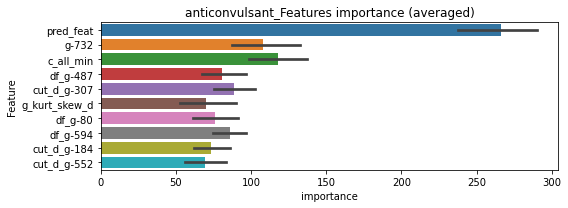

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000441128	valid_1's binary_logloss: 0.000639749
[2000]	training's binary_logloss: 0.000263882	valid_1's binary_logloss: 0.000451009
[3000]	training's binary_logloss: 0.000214808	valid_1's binary_logloss: 0.000395321
[4000]	training's binary_logloss: 0.000192528	valid_1's binary_logloss: 0.0003692
[5000]	training's binary_logloss: 0.000180788	valid_1's binary_logloss: 0.000355337
[6000]	training's binary_logloss: 0.00017298	valid_1's binary_logloss: 0.000346394
[7000]	training's binary_logloss: 0.00016726	valid_1's binary_logloss: 0.000339768
Early stopping, best iteration is:
[7629]	training's binary_logloss: 0.00016474	valid_1's binary_logloss: 0.000336721


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000426626	valid_1's binary_logloss: 0.000969583
[2000]	training's binary_logloss: 0.000257077	valid_1's binary_logloss: 0.00074723
[3000]	training's binary_logloss: 0.000209934	valid_1's binary_logloss: 0.000674818
Early stopping, best iteration is:
[3694]	training's binary_logloss: 0.00019209	valid_1's binary_logloss: 0.000650654


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 anticonvulsant=================================


Early stopping, best iteration is:
[873]	training's binary_logloss: 0.000485459	valid_1's binary_logloss: 0.0104825
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000429277	valid_1's binary_logloss: 0.000794981
Early stopping, best iteration is:
[1742]	training's binary_logloss: 0.000279675	valid_1's binary_logloss: 0.000594684


anticonvulsant logloss: 0.0030171177991693845


neg labels: 3289 → selected neg labels: 3286


antifungal, len(trt): 26, len(othr): 3286
target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00158646	valid_1's binary_logloss: 0.0043507
[600]	training's binary_logloss: 0.000410835	valid_1's binary_logloss: 0.00188244
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000396889	valid_1's binary_logloss: 0.00186024
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152412	valid_1's binary_logloss: 0.00672227
[600]	training's binary_logloss: 0.00040309	valid_1's binary_logloss: 0.00447657
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000410629	valid_1's binary_logloss: 0.00444996
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156604	valid_1's binary_logloss: 0.0030928
[600]	training's binary_logloss: 0.000407266	valid_1's binary_logloss: 0.00121767
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000390723	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0022483, Threshold: 0.0068503, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, conf_0:0.00480, conf_1:0.00891
Num_p_label: 40.0, Expected: 4.3, Adj_threshold_1: 0.0068503


Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000434527	valid_1's binary_logloss: 0.00412389


Num_p_label: 0.0, Expected: 4.3, Adj_threshold_2: 0.0568503
threshold: 0.0568503, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000643169	valid_1's binary_logloss: 0.00103014
[600]	training's binary_logloss: 0.00019136	valid_1's binary_logloss: 0.000455518
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000162685	valid_1's binary_logloss: 0.000401236
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00060695	valid_1's binary_logloss: 0.00233832
[600]	training's binary_logloss: 0.000182084	valid_1's binary_logloss: 0.00175251
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000181342	valid_1's binary_logloss: 0.00174801
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000634305	valid_1's binary_logloss: 0.000692782
[600]	training's binary_logloss: 0.000185802	valid_1's binary_logloss: 0.000192966
[900]	training's binary_logloss: 0.000151875	valid_1's binary_logloss: 0.000158506
Early 

2 / 3 AUC score:1.000
y_Threshold: 0.6339411, Threshold: 0.0568503, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0549975 Vs.target_rate: 0.00109
Num_p_label: 219.0, conf_0:0.04548, conf_1:0.06822
Num_p_label: 219.0, Expected: 4.3, Adj_threshold_1: 0.0568503
Num_p_label: 219.0, Expected: 4.3, Adj_threshold_2: 0.1068503
Num_p_label: 219.0, Expected: 4.3, Adj_threshold_3: 0.1568503
Num_p_label: 219.0, Expected: 4.3, Adj_threshold_4: 0.2068503
Num_p_label: 219.0, Expected: 4.3, Adj_threshold_5: 0.2568503
Num_p_label: 218.0, Expected: 4.3, Adj_threshold_6: 0.3068503
Num_p_label: 210.0, Expected: 4.3, Adj_threshold_7: 0.3568503
Num_p_label: 192.0, Expected: 4.3, Adj_threshold_8: 0.4068503
Num_p_label: 157.0, Expected: 4.3, Adj_threshold_9: 0.4568503
Num_p_label: 109.0, Expected: 4.3, Adj_threshold_10: 0.5068503


Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000208981	valid_1's binary_logloss: 0.00282033


threshold: 0.5568503, positive_p_label: 69.0/3982, p_label_rate: 0.0173280
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000631422	valid_1's binary_logloss: 0.00163136
[600]	training's binary_logloss: 0.000187938	valid_1's binary_logloss: 0.00104579
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000169734	valid_1's binary_logloss: 0.00100284
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000634183	valid_1's binary_logloss: 0.000884552
[600]	training's binary_logloss: 0.000189927	valid_1's binary_logloss: 0.000347002
Early stopping, best iteration is:
[849]	training's binary_logloss: 0.000160104	valid_1's binary_logloss: 0.000311873
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000644722	valid_1's binary_logloss: 0.00201783
Early stopping, best iteration is:
[400]	training's binary_logloss: 0.000313868	valid_1's binary_logloss: 0.00154584
Training until validation scores don't improve for 30

3 / 3 AUC score:1.000
y_Threshold: 0.4458331, Threshold: 0.5568503, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0045203 Vs.target_rate: 0.00109
Num_p_label: 18.0, conf_0:0.50000, conf_1:0.61254
Num_p_label: 18.0, Expected: 4.3, Adj_threshold_1: 0.5568503
Num_p_label: 8.0, Expected: 4.3, Adj_threshold_2: 0.6068503


[900]	training's binary_logloss: 0.000157073	valid_1's binary_logloss: 0.00138044
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000157665	valid_1's binary_logloss: 0.00137914


threshold: 0.6068503, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


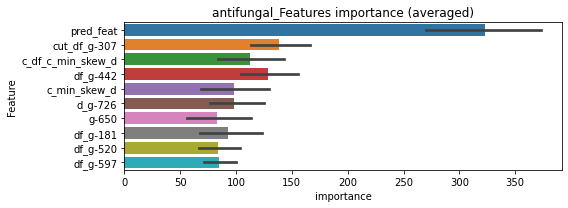

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000459231	valid_1's binary_logloss: 0.00171675
Early stopping, best iteration is:
[1606]	training's binary_logloss: 0.000313915	valid_1's binary_logloss: 0.0015138


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000463704	valid_1's binary_logloss: 0.000746284
[2000]	training's binary_logloss: 0.000276819	valid_1's binary_logloss: 0.000546445
[3000]	training's binary_logloss: 0.000223531	valid_1's binary_logloss: 0.000477439
Early stopping, best iteration is:
[3315]	training's binary_logloss: 0.000213563	valid_1's binary_logloss: 0.000463736


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 antifungal=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 antifungal=================================


Early stopping, best iteration is:
[422]	training's binary_logloss: 0.00104795	valid_1's binary_logloss: 0.00716636
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00046661	valid_1's binary_logloss: 0.0025941
[2000]	training's binary_logloss: 0.000278232	valid_1's binary_logloss: 0.00232016
Early stopping, best iteration is:
[2766]	training's binary_logloss: 0.000232319	valid_1's binary_logloss: 0.00227296


antifungal logloss: 0.002854305238228258


neg labels: 3289 → selected neg labels: 3288


antihistamine, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132238	valid_1's binary_logloss: 0.00311987
[600]	training's binary_logloss: 0.00038172	valid_1's binary_logloss: 0.00133213
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.00038172	valid_1's binary_logloss: 0.00133213
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123737	valid_1's binary_logloss: 0.00533056
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000387496	valid_1's binary_logloss: 0.00301061
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00129276	valid_1's binary_logloss: 0.00343183
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000380407	valid_1's binary_logloss: 0.00148671
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125713	valid_1's binary_logloss: 0.00478847


1 / 3 AUC score:1.000
y_Threshold: 0.0026022, Threshold: 0.0808001, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.05656, conf_1:0.10504
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0808001
Num_p_label: 30.0, Expected: 3.0, Adj_threshold_2: 0.1308001
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_3: 0.1808001
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_4: 0.2308001
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_5: 0.2808001
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_6: 0.3308001


Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000391155	valid_1's binary_logloss: 0.00301812


Num_p_label: 18.0, Expected: 3.0, Adj_threshold_7: 0.3808001
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_8: 0.4308001
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_9: 0.4808001
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_10: 0.5308001
threshold: 0.5808001, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000585757	valid_1's binary_logloss: 0.0015157
[600]	training's binary_logloss: 0.000184359	valid_1's binary_logloss: 0.000907908
[900]	training's binary_logloss: 0.000154533	valid_1's binary_logloss: 0.000866021
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000154431	valid_1's binary_logloss: 0.000865756
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000535789	valid_1's binary_logloss: 0.00468502
Early stopping, best iteration is:
[384]	training's binary_logloss: 0.00029539	valid_1's binary_logloss: 0.00437028
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000569896	valid_1's binary_logloss: 0.000769008
[600]	training's binary_logloss: 0.000178345	valid_1's binary_logloss: 0.000296283
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000156499	valid_1'

2 / 3 AUC score:1.000
y_Threshold: 0.7727257, Threshold: 0.5808001, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0308890 Vs.target_rate: 0.00076
Num_p_label: 123.0, conf_0:0.46464, conf_1:0.69696
Num_p_label: 123.0, Expected: 3.0, Adj_threshold_1: 0.5808001
Num_p_label: 105.0, Expected: 3.0, Adj_threshold_2: 0.6308001
Num_p_label: 92.0, Expected: 3.0, Adj_threshold_3: 0.6808001
Num_p_label: 78.0, Expected: 3.0, Adj_threshold_4: 0.7308001


[600]	training's binary_logloss: 0.00018106	valid_1's binary_logloss: 0.000451983
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.00017558	valid_1's binary_logloss: 0.000438527


Num_p_label: 65.0, Expected: 3.0, Adj_threshold_5: 0.7808001
threshold: 0.7808001, positive_p_label: 65.0/3982, p_label_rate: 0.0163235
positive_y_label: 656.0/3811, y_label_rate: 0.1721333
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000551614	valid_1's binary_logloss: 0.00181555
[600]	training's binary_logloss: 0.000183982	valid_1's binary_logloss: 0.00122163
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000180962	valid_1's binary_logloss: 0.0012175
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000555836	valid_1's binary_logloss: 0.00137831
[600]	training's binary_logloss: 0.000182638	valid_1's binary_logloss: 0.000868405
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000170487	valid_1's binary_logloss: 0.000850881
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000558097	valid_1's binary_logloss: 0.00059973
[600]	training's binary_logloss: 0.000183476	valid_1's binary_logloss: 0.000171896
[900]	training's binary_logloss: 0.000153532	valid_1's binary_logloss: 0.000133673
Early 

3 / 3 AUC score:1.000
y_Threshold: 0.4757816, Threshold: 0.7808001, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0123054 Vs.target_rate: 0.00076
Num_p_label: 49.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 49.0, Expected: 3.0, Adj_threshold_1: 0.7808001


[900]	training's binary_logloss: 0.000153113	valid_1's binary_logloss: 0.000981134
Early stopping, best iteration is:
[938]	training's binary_logloss: 0.000151641	valid_1's binary_logloss: 0.000979502


threshold: 0.7808001, positive_p_label: 49.0/3982, p_label_rate: 0.0123054
positive_y_label: 656.0/3811, y_label_rate: 0.1721333


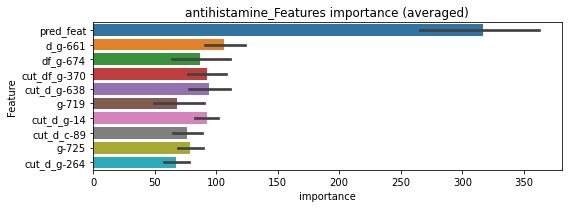

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 antihistamine=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000440945	valid_1's binary_logloss: 0.00199409
Early stopping, best iteration is:
[1389]	training's binary_logloss: 0.000339227	valid_1's binary_logloss: 0.00186418


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 antihistamine=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000444504	valid_1's binary_logloss: 0.00117353
[2000]	training's binary_logloss: 0.000270125	valid_1's binary_logloss: 0.000988156
Early stopping, best iteration is:
[2804]	training's binary_logloss: 0.000227673	valid_1's binary_logloss: 0.000937015


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 antihistamine=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000442102	valid_1's binary_logloss: 0.000428382
[2000]	training's binary_logloss: 0.000270033	valid_1's binary_logloss: 0.000248656
[3000]	training's binary_logloss: 0.000220927	valid_1's binary_logloss: 0.00019404
[4000]	training's binary_logloss: 0.000197948	valid_1's binary_logloss: 0.000167148
[5000]	training's binary_logloss: 0.000185417	valid_1's binary_logloss: 0.000152503
[6000]	training's binary_logloss: 0.000176907	valid_1's binary_logloss: 0.000142738
[7000]	training's binary_logloss: 0.000170644	valid_1's binary_logloss: 0.000135624
[8000]	training's binary_logloss: 0.000166277	valid_1's binary_logloss: 0.000130599
[9000]	training's binary_logloss: 0.000162854	valid_1's binary_logloss: 0.000126747
Early stopping, best iteration is:
[9022]	training's binary_logloss: 0.000162829	valid_1's binary_logloss: 0.000126718


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 antihistamine=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000441881	valid_1's binary_logloss: 0.00197579
[2000]	training's binary_logloss: 0.000270599	valid_1's binary_logloss: 0.00173691
Early stopping, best iteration is:
[2324]	training's binary_logloss: 0.000250811	valid_1's binary_logloss: 0.00170847


antihistamine logloss: 0.0011591088847497256


neg labels: 3289 → selected neg labels: 3287


antimalarial, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133466	valid_1's binary_logloss: 0.00300954
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000417292	valid_1's binary_logloss: 0.00146102
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133339	valid_1's binary_logloss: 0.00613249
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000404975	valid_1's binary_logloss: 0.00342387
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136923	valid_1's binary_logloss: 0.00280822
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000408043	valid_1's binary_logloss: 0.00111903
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013292	valid_1's binary_logloss: 0.00585642


1 / 3 AUC score:1.000
y_Threshold: 0.0024427, Threshold: 0.0100329, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00702, conf_1:0.01304
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0100329
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_2: 0.0600329


Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000412175	valid_1's binary_logloss: 0.00375874


threshold: 0.0600329, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000582445	valid_1's binary_logloss: 0.000685004
[600]	training's binary_logloss: 0.000186891	valid_1's binary_logloss: 0.000228799
[900]	training's binary_logloss: 0.000155826	valid_1's binary_logloss: 0.000191385
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000155826	valid_1's binary_logloss: 0.000191385
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000558245	valid_1's binary_logloss: 0.00254026
[600]	training's binary_logloss: 0.000174643	valid_1's binary_logloss: 0.00181807
[900]	training's binary_logloss: 0.000145053	valid_1's binary_logloss: 0.00177375
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000145053	valid_1's binary_logloss: 0.00177375
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000586001	valid_1's binary_logloss: 0.0010815
Early 

2 / 3 AUC score:1.000
y_Threshold: 0.6447186, Threshold: 0.0600329, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0434455 Vs.target_rate: 0.00076
Num_p_label: 173.0, conf_0:0.04803, conf_1:0.07204
Num_p_label: 173.0, Expected: 3.0, Adj_threshold_1: 0.0600329
Num_p_label: 173.0, Expected: 3.0, Adj_threshold_2: 0.1100329
Num_p_label: 173.0, Expected: 3.0, Adj_threshold_3: 0.1600329
Num_p_label: 173.0, Expected: 3.0, Adj_threshold_4: 0.2100329
Num_p_label: 173.0, Expected: 3.0, Adj_threshold_5: 0.2600329
Num_p_label: 172.0, Expected: 3.0, Adj_threshold_6: 0.3100329
Num_p_label: 164.0, Expected: 3.0, Adj_threshold_7: 0.3600329
Num_p_label: 158.0, Expected: 3.0, Adj_threshold_8: 0.4100329
Num_p_label: 153.0, Expected: 3.0, Adj_threshold_9: 0.4600329
Num_p_label: 141.0, Expected: 3.0, Adj_threshold_10: 0.5100329


[900]	training's binary_logloss: 0.000149985	valid_1's binary_logloss: 0.00142481
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000149985	valid_1's binary_logloss: 0.00142481


threshold: 0.5600329, positive_p_label: 124.0/3982, p_label_rate: 0.0311401
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000576085	valid_1's binary_logloss: 0.000700932
[600]	training's binary_logloss: 0.000185448	valid_1's binary_logloss: 0.000246307
[900]	training's binary_logloss: 0.000155508	valid_1's binary_logloss: 0.000211403
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000154802	valid_1's binary_logloss: 0.000210715
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000553506	valid_1's binary_logloss: 0.00250328
[600]	training's binary_logloss: 0.000173636	valid_1's binary_logloss: 0.00181382
[900]	training's binary_logloss: 0.000143644	valid_1's binary_logloss: 0.0017772
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000143644	valid_1's binary_logloss: 0.0017772
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000577587	valid_1's binary_logloss: 0.00107164
Early s

3 / 3 AUC score:1.000
y_Threshold: 0.6279257, Threshold: 0.5600329, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0301356 Vs.target_rate: 0.00076
Num_p_label: 120.0, conf_0:0.50000, conf_1:0.61604
Num_p_label: 120.0, Expected: 3.0, Adj_threshold_1: 0.5600329
Num_p_label: 100.0, Expected: 3.0, Adj_threshold_2: 0.6100329
Num_p_label: 86.0, Expected: 3.0, Adj_threshold_3: 0.6600329
Num_p_label: 72.0, Expected: 3.0, Adj_threshold_4: 0.7100329
Num_p_label: 54.0, Expected: 3.0, Adj_threshold_5: 0.7600329
threshold: 0.7600329, positive_p_label: 54.0/3982, p_label_rate: 0.0135610


[900]	training's binary_logloss: 0.000149136	valid_1's binary_logloss: 0.00138305
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000149136	valid_1's binary_logloss: 0.00138305


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


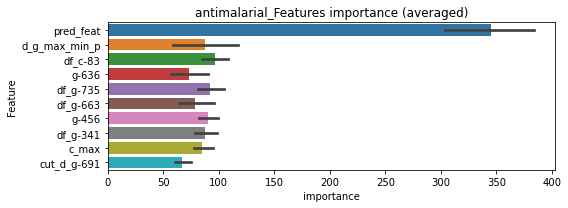

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000440212	valid_1's binary_logloss: 0.000569292
[2000]	training's binary_logloss: 0.000269848	valid_1's binary_logloss: 0.000378745
[3000]	training's binary_logloss: 0.000222438	valid_1's binary_logloss: 0.000318736
[4000]	training's binary_logloss: 0.000198434	valid_1's binary_logloss: 0.000284407
[5000]	training's binary_logloss: 0.000185082	valid_1's binary_logloss: 0.00026541
[6000]	training's binary_logloss: 0.000176452	valid_1's binary_logloss: 0.000254741
[7000]	training's binary_logloss: 0.000170361	valid_1's binary_logloss: 0.000248541
[8000]	training's binary_logloss: 0.00016596	valid_1's binary_logloss: 0.000242354
Early stopping, best iteration is:
[8303]	training's binary_logloss: 0.000164687	valid_1's binary_logloss: 0.000240828


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000426398	valid_1's binary_logloss: 0.00211155
[2000]	training's binary_logloss: 0.000263474	valid_1's binary_logloss: 0.00184447
Early stopping, best iteration is:
[2480]	training's binary_logloss: 0.000235997	valid_1's binary_logloss: 0.00180453


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000439158	valid_1's binary_logloss: 0.000862153
[2000]	training's binary_logloss: 0.000266343	valid_1's binary_logloss: 0.000669449
Early stopping, best iteration is:
[2783]	training's binary_logloss: 0.000225439	valid_1's binary_logloss: 0.000624661


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000433431	valid_1's binary_logloss: 0.0019235
Early stopping, best iteration is:
[1967]	training's binary_logloss: 0.000265966	valid_1's binary_logloss: 0.00176587


antimalarial logloss: 0.0011100467828688068


neg labels: 3289 → selected neg labels: 3281


antioxidant, len(trt): 73, len(othr): 3281
target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00677098	valid_1's binary_logloss: 0.0532408
[600]	training's binary_logloss: 0.00114239	valid_1's binary_logloss: 0.0408352
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.00124554	valid_1's binary_logloss: 0.0407672
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00737548	valid_1's binary_logloss: 0.0453232
[600]	training's binary_logloss: 0.00118613	valid_1's binary_logloss: 0.0339564
Early stopping, best iteration is:
[781]	training's binary_logloss: 0.000792535	valid_1's binary_logloss: 0.032908
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00765589	valid_1's binary_logloss: 0.0290173
[600]	training's binary_logloss: 0.00123988	valid_1's binary_logloss: 0.0200016
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.00106147	valid_1's binary_logloss: 0.

1 / 3 AUC score:0.999
y_Threshold: 0.0099328, Threshold: 0.0385709, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 652/3797
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, conf_0:0.02700, conf_1:0.05014
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.0385709
Num_p_label: 16.0, Expected: 12.2, Adj_threshold_2: 0.0885709


Early stopping, best iteration is:
[440]	training's binary_logloss: 0.00250369	valid_1's binary_logloss: 0.0488287


threshold: 0.0885709, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 652.0/3797, y_label_rate: 0.1717145
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133968	valid_1's binary_logloss: 0.00311791
[600]	training's binary_logloss: 0.000248867	valid_1's binary_logloss: 0.00142078
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000233661	valid_1's binary_logloss: 0.00138569
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013196	valid_1's binary_logloss: 0.00632832
Early stopping, best iteration is:
[353]	training's binary_logloss: 0.000772494	valid_1's binary_logloss: 0.00530819
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136181	valid_1's binary_logloss: 0.00312991
[600]	training's binary_logloss: 0.000246475	valid_1's binary_logloss: 0.00114056
Early stopping, best iteration is:
[868]	training's binary_logloss: 0.000182404	valid_1's binary_logloss: 0.000977634
Training until validation scores don't improve for 30 round

2 / 3 AUC score:1.000
y_Threshold: 0.4107619, Threshold: 0.0885709, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 647.0/3787
p_label_rate: 0.0582622 Vs.target_rate: 0.00307
Num_p_label: 232.0, conf_0:0.07086, conf_1:0.10629
Num_p_label: 232.0, Expected: 12.2, Adj_threshold_1: 0.0885709
Num_p_label: 232.0, Expected: 12.2, Adj_threshold_2: 0.1385709
Num_p_label: 230.0, Expected: 12.2, Adj_threshold_3: 0.1885709


[900]	training's binary_logloss: 0.000180405	valid_1's binary_logloss: 0.00813016
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000180267	valid_1's binary_logloss: 0.00812884


Num_p_label: 228.0, Expected: 12.2, Adj_threshold_4: 0.2385709
Num_p_label: 221.0, Expected: 12.2, Adj_threshold_5: 0.2885709
Num_p_label: 205.0, Expected: 12.2, Adj_threshold_6: 0.3385709
Num_p_label: 176.0, Expected: 12.2, Adj_threshold_7: 0.3885709
Num_p_label: 149.0, Expected: 12.2, Adj_threshold_8: 0.4385709
Num_p_label: 126.0, Expected: 12.2, Adj_threshold_9: 0.4885709
Num_p_label: 109.0, Expected: 12.2, Adj_threshold_10: 0.5385709
threshold: 0.5885709, positive_p_label: 103.0/3982, p_label_rate: 0.0258664
positive_y_label: 647.0/3787, y_label_rate: 0.1708476
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118489	valid_1's binary_logloss: 0.00226808
[600]	training's binary_logloss: 0.000221721	valid_1's binary_logloss: 0.000581733
[900]	training's binary_logloss: 0.000157273	valid_1's binary_logloss: 0.000431119
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000155322	valid_1's binary_logloss: 0.000423439
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115028	valid_1's binary_logloss: 0.00266352
[600]	training's binary_logloss: 0.000220976	valid_1's binary_logloss: 0.000511716
[900]	training's binary_logloss: 0.000157201	valid_1's binary_logloss: 0.00032474
Early stopping, best iteration is:
[982]	training's binary_logloss: 0.000153258	valid_1's binary_logloss: 0.000311311
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117402	valid_1's binary_logloss: 0.00214974
[600]	t

3 / 3 AUC score:1.000
y_Threshold: 0.1235787, Threshold: 0.5885709, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 646.0/3785
p_label_rate: 0.0193370 Vs.target_rate: 0.00307
Num_p_label: 77.0, conf_0:0.50000, conf_1:0.64743
Num_p_label: 77.0, Expected: 12.2, Adj_threshold_1: 0.5885709
Num_p_label: 77.0, Expected: 12.2, Adj_threshold_2: 0.6385709
Num_p_label: 77.0, Expected: 12.2, Adj_threshold_3: 0.6885709
Num_p_label: 77.0, Expected: 12.2, Adj_threshold_4: 0.7385709
Num_p_label: 58.0, Expected: 12.2, Adj_threshold_5: 0.7885709
threshold: 0.7885709, positive_p_label: 58.0/3982, p_label_rate: 0.0145655
positive_y_label: 646.0/3785, y_label_rate: 0.1706737


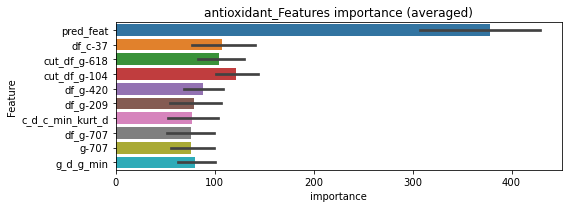

len(train_index) : 2838
len(valid_index) : 947
================================= fold 1/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000453455	valid_1's binary_logloss: 0.000812452
[2000]	training's binary_logloss: 0.000251374	valid_1's binary_logloss: 0.000452581
[3000]	training's binary_logloss: 0.000184753	valid_1's binary_logloss: 0.000333173
[4000]	training's binary_logloss: 0.000153247	valid_1's binary_logloss: 0.000276655
[5000]	training's binary_logloss: 0.000137147	valid_1's binary_logloss: 0.000247744
[6000]	training's binary_logloss: 0.000126759	valid_1's binary_logloss: 0.000229008
[7000]	training's binary_logloss: 0.000119458	valid_1's binary_logloss: 0.000215798
[8000]	training's binary_logloss: 0.000114504	valid_1's binary_logloss: 0.000206873
[9000]	training's binary_logloss: 0.000110992	valid_1's binary_logloss: 0.000200538
[10000]	training's binary_logloss: 0.000108508	valid_1's binary_logloss: 0.0001961
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000108508	valid_

len(train_index) : 2839
len(valid_index) : 946
================================= fold 2/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000451293	valid_1's binary_logloss: 0.000904356
[2000]	training's binary_logloss: 0.000250862	valid_1's binary_logloss: 0.000506095
[3000]	training's binary_logloss: 0.000184552	valid_1's binary_logloss: 0.000373251
[4000]	training's binary_logloss: 0.000153117	valid_1's binary_logloss: 0.000310077
[5000]	training's binary_logloss: 0.000137031	valid_1's binary_logloss: 0.00027771
[6000]	training's binary_logloss: 0.000126619	valid_1's binary_logloss: 0.000256664
[7000]	training's binary_logloss: 0.000119394	valid_1's binary_logloss: 0.00024204
[8000]	training's binary_logloss: 0.000114423	valid_1's binary_logloss: 0.000231981
[9000]	training's binary_logloss: 0.000110905	valid_1's binary_logloss: 0.000224858
[10000]	training's binary_logloss: 0.000108427	valid_1's binary_logloss: 0.000219878
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000108427	valid_

len(train_index) : 2839
len(valid_index) : 946
================================= fold 3/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00054867	valid_1's binary_logloss: 0.00351986
Early stopping, best iteration is:
[1183]	training's binary_logloss: 0.000476079	valid_1's binary_logloss: 0.00342771


len(train_index) : 2839
len(valid_index) : 946
================================= fold 4/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000561606	valid_1's binary_logloss: 0.00304947
[2000]	training's binary_logloss: 0.000314578	valid_1's binary_logloss: 0.00271476
[3000]	training's binary_logloss: 0.000238269	valid_1's binary_logloss: 0.00261418
Early stopping, best iteration is:
[3175]	training's binary_logloss: 0.000229342	valid_1's binary_logloss: 0.00260572


antioxidant logloss: 0.0016121478652477588


neg labels: 3289 → selected neg labels: 3283


antiprotozoal, len(trt): 36, len(othr): 3283
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00308307	valid_1's binary_logloss: 0.00940234
[600]	training's binary_logloss: 0.00060863	valid_1's binary_logloss: 0.00382686
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000512563	valid_1's binary_logloss: 0.00356766
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00301865	valid_1's binary_logloss: 0.0102533
[600]	training's binary_logloss: 0.00059795	valid_1's binary_logloss: 0.0048566
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000505024	valid_1's binary_logloss: 0.00459823
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00322815	valid_1's binary_logloss: 0.00661364
[600]	training's binary_logloss: 0.000612824	valid_1's binary_logloss: 0.00176416
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000508945	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0040329, Threshold: 0.0163247, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.01143, conf_1:0.02122
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0163247
Num_p_label: 4.0, Expected: 6.0, Adj_threshold_2: 0.0663247
threshold: 0.0663247, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000878438	valid_1's binary_logloss: 0.00125563
[600]	training's binary_logloss: 0.000204157	valid_1's binary_logloss: 0.000347208
[900]	training's binary_logloss: 0.000158335	valid_1's binary_logloss: 0.000279102
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.000157329	valid_1's binary_logloss: 0.000276777
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000876465	valid_1's binary_logloss: 0.00245267
[600]	training's binary_logloss: 0.000203268	valid_1's binary_logloss: 0.00153778
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000165541	valid_1's binary_logloss: 0.00145783
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000885622	valid_1's binary_logloss: 0.00155783
[600]	training's binary_logloss: 0.000206026	valid_1's binary_logloss: 0.000636253
Early

2 / 3 AUC score:1.000
y_Threshold: 0.6081733, Threshold: 0.0663247, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0547464 Vs.target_rate: 0.00151
Num_p_label: 218.0, conf_0:0.05306, conf_1:0.07959
Num_p_label: 218.0, Expected: 6.0, Adj_threshold_1: 0.0663247
Num_p_label: 217.0, Expected: 6.0, Adj_threshold_2: 0.1163247
Num_p_label: 217.0, Expected: 6.0, Adj_threshold_3: 0.1663247
Num_p_label: 217.0, Expected: 6.0, Adj_threshold_4: 0.2163247
Num_p_label: 217.0, Expected: 6.0, Adj_threshold_5: 0.2663247
Num_p_label: 217.0, Expected: 6.0, Adj_threshold_6: 0.3163247
Num_p_label: 214.0, Expected: 6.0, Adj_threshold_7: 0.3663247
Num_p_label: 208.0, Expected: 6.0, Adj_threshold_8: 0.4163247
Num_p_label: 192.0, Expected: 6.0, Adj_threshold_9: 0.4663247
Num_p_label: 170.0, Expected: 6.0, Adj_threshold_10: 0.5163247
threshold: 0.5663247, positive_p_label: 143.0/3982, p_label_rate: 0.0359116
positive_y_label: 656.0/3807, y_label_rate: 0.1723142

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000876349	valid_1's binary_logloss: 0.00126048
[600]	training's binary_logloss: 0.000204027	valid_1's binary_logloss: 0.000347601
[900]	training's binary_logloss: 0.000159597	valid_1's binary_logloss: 0.000279452
Early stopping, best iteration is:
[961]	training's binary_logloss: 0.00015646	valid_1's binary_logloss: 0.000271356
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00087025	valid_1's binary_logloss: 0.00255391
[600]	training's binary_logloss: 0.000203254	valid_1's binary_logloss: 0.00166194
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000162621	valid_1's binary_logloss: 0.00157315
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000882222	valid_1's binary_logloss: 0.00156575
[600]	training's binary_logloss: 0.000204265	valid_1's binary_logloss: 0.00065028
Early st

3 / 3 AUC score:1.000
y_Threshold: 0.5402114, Threshold: 0.5663247, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0336514 Vs.target_rate: 0.00151
Num_p_label: 134.0, conf_0:0.50000, conf_1:0.62296
Num_p_label: 134.0, Expected: 6.0, Adj_threshold_1: 0.5663247
Num_p_label: 100.0, Expected: 6.0, Adj_threshold_2: 0.6163247
Num_p_label: 65.0, Expected: 6.0, Adj_threshold_3: 0.6663247
Num_p_label: 34.0, Expected: 6.0, Adj_threshold_4: 0.7163247
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_5: 0.7663247
threshold: 0.7663247, positive_p_label: 17.0/3982, p_label_rate: 0.0042692


Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000267473	valid_1's binary_logloss: 0.00274147


positive_y_label: 655.0/3805, y_label_rate: 0.1721419


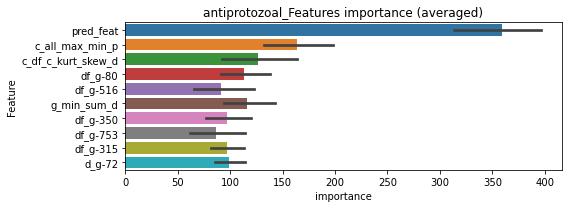

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000499097	valid_1's binary_logloss: 0.00346533
Early stopping, best iteration is:
[1965]	training's binary_logloss: 0.000300612	valid_1's binary_logloss: 0.00315482


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000497819	valid_1's binary_logloss: 0.00130016
[2000]	training's binary_logloss: 0.000295549	valid_1's binary_logloss: 0.00103498
[3000]	training's binary_logloss: 0.000238235	valid_1's binary_logloss: 0.000960132
[4000]	training's binary_logloss: 0.00021053	valid_1's binary_logloss: 0.000929035
Early stopping, best iteration is:
[4852]	training's binary_logloss: 0.000197452	valid_1's binary_logloss: 0.000913489


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000501656	valid_1's binary_logloss: 0.00105091
[2000]	training's binary_logloss: 0.000296521	valid_1's binary_logloss: 0.00079123
Early stopping, best iteration is:
[2542]	training's binary_logloss: 0.000257452	valid_1's binary_logloss: 0.00074043


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000492127	valid_1's binary_logloss: 0.000802019
[2000]	training's binary_logloss: 0.000292597	valid_1's binary_logloss: 0.000564747
[3000]	training's binary_logloss: 0.000235255	valid_1's binary_logloss: 0.00048911
Early stopping, best iteration is:
[3772]	training's binary_logloss: 0.000212157	valid_1's binary_logloss: 0.000451957


antiprotozoal logloss: 0.0013164173360465518


neg labels: 3289 → selected neg labels: 3282


antiviral, len(trt): 23, len(othr): 3282
target_rate: 0.0009658 → Adj_target_rate: 0.0012069
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014388	valid_1's binary_logloss: 0.00455391
[600]	training's binary_logloss: 0.000380404	valid_1's binary_logloss: 0.00221453
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000381002	valid_1's binary_logloss: 0.00221389
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146531	valid_1's binary_logloss: 0.00270788
[600]	training's binary_logloss: 0.000382727	valid_1's binary_logloss: 0.000938251
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.00037711	valid_1's binary_logloss: 0.000927135
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148687	valid_1's binary_logloss: 0.00298534
[600]	training's binary_logloss: 0.000385359	valid_1's binary_logloss: 0.00105471
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000372275	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0023105, Threshold: 0.0088457, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806


[600]	training's binary_logloss: 0.000381936	valid_1's binary_logloss: 0.00154361
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000382195	valid_1's binary_logloss: 0.00154219


p_label_rate: 0.0100452 Vs.target_rate: 0.00097
Num_p_label: 40.0, conf_0:0.00619, conf_1:0.01150
Num_p_label: 40.0, Expected: 3.8, Adj_threshold_1: 0.0088457
Num_p_label: 4.0, Expected: 3.8, Adj_threshold_2: 0.0588457
threshold: 0.0588457, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000596052	valid_1's binary_logloss: 0.00174271
[600]	training's binary_logloss: 0.000182357	valid_1's binary_logloss: 0.00112764
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000173942	valid_1's binary_logloss: 0.00111744
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000611856	valid_1's binary_logloss: 0.00080733
[600]	training's binary_logloss: 0.000185021	valid_1's binary_logloss: 0.000323251
[900]	training's binary_logloss: 0.000153805	valid_1's binary_logloss: 0.000285025
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000153805	valid_1's binary_logloss: 0.000285025
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000616516	valid_1's binary_logloss: 0.00194342
[600]	training's binary_logloss: 0.000186159	valid_1's binary_logloss: 0.00138992
Early 

2 / 3 AUC score:1.000
y_Threshold: 0.6324180, Threshold: 0.0588457, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0396786 Vs.target_rate: 0.00097
Num_p_label: 158.0, conf_0:0.04708, conf_1:0.07061
Num_p_label: 158.0, Expected: 3.8, Adj_threshold_1: 0.0588457
Num_p_label: 158.0, Expected: 3.8, Adj_threshold_2: 0.1088457
Num_p_label: 158.0, Expected: 3.8, Adj_threshold_3: 0.1588457
Num_p_label: 154.0, Expected: 3.8, Adj_threshold_4: 0.2088457
Num_p_label: 147.0, Expected: 3.8, Adj_threshold_5: 0.2588457
Num_p_label: 126.0, Expected: 3.8, Adj_threshold_6: 0.3088457
Num_p_label: 101.0, Expected: 3.8, Adj_threshold_7: 0.3588457
Num_p_label: 76.0, Expected: 3.8, Adj_threshold_8: 0.4088457
Num_p_label: 68.0, Expected: 3.8, Adj_threshold_9: 0.4588457
Num_p_label: 53.0, Expected: 3.8, Adj_threshold_10: 0.5088457


[600]	training's binary_logloss: 0.00018465	valid_1's binary_logloss: 0.00141313
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000186898	valid_1's binary_logloss: 0.00141127


threshold: 0.5588457, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00060349	valid_1's binary_logloss: 0.00182499
[600]	training's binary_logloss: 0.000183423	valid_1's binary_logloss: 0.00113524
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.00017893	valid_1's binary_logloss: 0.00112468
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000609028	valid_1's binary_logloss: 0.000803969
[600]	training's binary_logloss: 0.000182708	valid_1's binary_logloss: 0.000307083
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000168386	valid_1's binary_logloss: 0.000288864
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000623426	valid_1's binary_logloss: 0.00168725
[600]	training's binary_logloss: 0.000185758	valid_1's binary_logloss: 0.0011319
[900]	training's binary_logloss: 0.000155228	valid_1's binary_logloss: 0.00107801
Early sto

3 / 3 AUC score:1.000
y_Threshold: 0.6252602, Threshold: 0.5588457, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0057760 Vs.target_rate: 0.00097
Num_p_label: 23.0, conf_0:0.50000, conf_1:0.61473
Num_p_label: 23.0, Expected: 3.8, Adj_threshold_1: 0.5588457
Num_p_label: 18.0, Expected: 3.8, Adj_threshold_2: 0.6088457
Num_p_label: 17.0, Expected: 3.8, Adj_threshold_3: 0.6588457
Num_p_label: 11.0, Expected: 3.8, Adj_threshold_4: 0.7088457
Num_p_label: 7.0, Expected: 3.8, Adj_threshold_5: 0.7588457
threshold: 0.7588457, positive_p_label: 7.0/3982, p_label_rate: 0.0017579


Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000211432	valid_1's binary_logloss: 0.00143131


positive_y_label: 656.0/3806, y_label_rate: 0.1723594


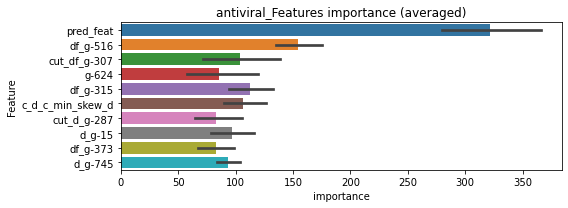

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000439971	valid_1's binary_logloss: 0.00241145
Early stopping, best iteration is:
[1474]	training's binary_logloss: 0.000322522	valid_1's binary_logloss: 0.00221667


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000445614	valid_1's binary_logloss: 0.000600967
[2000]	training's binary_logloss: 0.000269636	valid_1's binary_logloss: 0.000423014
[3000]	training's binary_logloss: 0.000219182	valid_1's binary_logloss: 0.000364959
[4000]	training's binary_logloss: 0.00019506	valid_1's binary_logloss: 0.000334945
[5000]	training's binary_logloss: 0.000182478	valid_1's binary_logloss: 0.000319723
[6000]	training's binary_logloss: 0.000174179	valid_1's binary_logloss: 0.000309325
Early stopping, best iteration is:
[6347]	training's binary_logloss: 0.000171783	valid_1's binary_logloss: 0.000306251


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000447604	valid_1's binary_logloss: 0.00176232
[2000]	training's binary_logloss: 0.000269783	valid_1's binary_logloss: 0.0015116
Early stopping, best iteration is:
[2289]	training's binary_logloss: 0.000250691	valid_1's binary_logloss: 0.00148211


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000447484	valid_1's binary_logloss: 0.0014127
[2000]	training's binary_logloss: 0.000270244	valid_1's binary_logloss: 0.00119205
[3000]	training's binary_logloss: 0.000219618	valid_1's binary_logloss: 0.00113627
[4000]	training's binary_logloss: 0.000196354	valid_1's binary_logloss: 0.00110769
Early stopping, best iteration is:
[4276]	training's binary_logloss: 0.000192558	valid_1's binary_logloss: 0.0011019


antiviral logloss: 0.0012777574073304717


neg labels: 3289 → selected neg labels: 3283


apoptosis_stimulant, len(trt): 49, len(othr): 3283
target_rate: 0.0020576 → Adj_target_rate: 0.0022954
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00373133	valid_1's binary_logloss: 0.0347222
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.00102721	valid_1's binary_logloss: 0.0296619
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00402993	valid_1's binary_logloss: 0.0268352
[600]	training's binary_logloss: 0.000761049	valid_1's binary_logloss: 0.0211358
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000729364	valid_1's binary_logloss: 0.0211086
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00441808	valid_1's binary_logloss: 0.00893955
[600]	training's binary_logloss: 0.000822612	valid_1's binary_logloss: 0.00331653
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000614748	valid_1's binary_logloss: 0.00282165
Training until validation scores don't improve for 30 rounds
[300

1 / 3 AUC score:1.000
y_Threshold: 0.0053212, Threshold: 0.0449537, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00206
Num_p_label: 40.0, conf_0:0.03147, conf_1:0.05844
Num_p_label: 40.0, Expected: 8.2, Adj_threshold_1: 0.0449537
Num_p_label: 20.0, Expected: 8.2, Adj_threshold_2: 0.0949537
threshold: 0.0949537, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000989033	valid_1's binary_logloss: 0.00231945
[600]	training's binary_logloss: 0.000222876	valid_1's binary_logloss: 0.00111018
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000201064	valid_1's binary_logloss: 0.00106523
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00098864	valid_1's binary_logloss: 0.00655788
[600]	training's binary_logloss: 0.000221049	valid_1's binary_logloss: 0.00548358
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000210039	valid_1's binary_logloss: 0.00546362
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102633	valid_1's binary_logloss: 0.0032178
[600]	training's binary_logloss: 0.000225822	valid_1's binary_logloss: 0.00205561
[900]	training's binary_logloss: 0.000175342	valid_1's binary_logloss: 0.0019808
Early stoppin

2 / 3 AUC score:1.000
y_Threshold: 0.5434452, Threshold: 0.0949537, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 651.0/3797
p_label_rate: 0.0718232 Vs.target_rate: 0.00206
Num_p_label: 286.0, conf_0:0.07596, conf_1:0.11394
Num_p_label: 286.0, Expected: 8.2, Adj_threshold_1: 0.0949537
Num_p_label: 283.0, Expected: 8.2, Adj_threshold_2: 0.1449537
Num_p_label: 281.0, Expected: 8.2, Adj_threshold_3: 0.1949537
Num_p_label: 280.0, Expected: 8.2, Adj_threshold_4: 0.2449537
Num_p_label: 279.0, Expected: 8.2, Adj_threshold_5: 0.2949537
Num_p_label: 278.0, Expected: 8.2, Adj_threshold_6: 0.3449537
Num_p_label: 276.0, Expected: 8.2, Adj_threshold_7: 0.3949537
Num_p_label: 271.0, Expected: 8.2, Adj_threshold_8: 0.4449537
Num_p_label: 261.0, Expected: 8.2, Adj_threshold_9: 0.4949537
Num_p_label: 242.0, Expected: 8.2, Adj_threshold_10: 0.5449537
threshold: 0.5949537, positive_p_label: 209.0/3982, p_label_rate: 0.0524862
positive_y_label: 651.0/3797, y_label_rate: 0.1714511

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000990931	valid_1's binary_logloss: 0.00431266
[600]	training's binary_logloss: 0.000226504	valid_1's binary_logloss: 0.00280594
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000217119	valid_1's binary_logloss: 0.0027665
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000982526	valid_1's binary_logloss: 0.00376084
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000266981	valid_1's binary_logloss: 0.00269737
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000990222	valid_1's binary_logloss: 0.00250288
[600]	training's binary_logloss: 0.000224047	valid_1's binary_logloss: 0.00125676
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000209919	valid_1's binary_logloss: 0.00123208
Training until validation scores don't improve for 30 rou

3 / 3 AUC score:1.000
y_Threshold: 0.3247444, Threshold: 0.5949537, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 650.0/3795
p_label_rate: 0.0153189 Vs.target_rate: 0.00206
Num_p_label: 61.0, conf_0:0.50000, conf_1:0.65445
Num_p_label: 61.0, Expected: 8.2, Adj_threshold_1: 0.5949537
Num_p_label: 56.0, Expected: 8.2, Adj_threshold_2: 0.6449537
Num_p_label: 50.0, Expected: 8.2, Adj_threshold_3: 0.6949537
Num_p_label: 48.0, Expected: 8.2, Adj_threshold_4: 0.7449537
Num_p_label: 39.0, Expected: 8.2, Adj_threshold_5: 0.7949537
threshold: 0.7949537, positive_p_label: 39.0/3982, p_label_rate: 0.0097941


Early stopping, best iteration is:
[426]	training's binary_logloss: 0.000393427	valid_1's binary_logloss: 0.00244507


positive_y_label: 650.0/3795, y_label_rate: 0.1712780


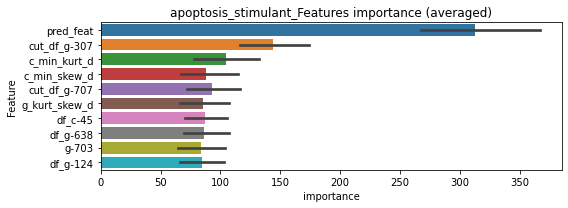

len(train_index) : 2846
len(valid_index) : 949
================================= fold 1/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000532084	valid_1's binary_logloss: 0.00370195
[2000]	training's binary_logloss: 0.000307593	valid_1's binary_logloss: 0.00342178
Early stopping, best iteration is:
[2175]	training's binary_logloss: 0.000293544	valid_1's binary_logloss: 0.00339977


len(train_index) : 2846
len(valid_index) : 949
================================= fold 2/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0005394	valid_1's binary_logloss: 0.00199243
Early stopping, best iteration is:
[1716]	training's binary_logloss: 0.000345536	valid_1's binary_logloss: 0.0017461


len(train_index) : 2846
len(valid_index) : 949
================================= fold 3/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000539675	valid_1's binary_logloss: 0.00237264
[2000]	training's binary_logloss: 0.000310067	valid_1's binary_logloss: 0.00209154
Early stopping, best iteration is:
[2939]	training's binary_logloss: 0.000246368	valid_1's binary_logloss: 0.0020085


len(train_index) : 2847
len(valid_index) : 948
================================= fold 4/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000539099	valid_1's binary_logloss: 0.00316418
Early stopping, best iteration is:
[1001]	training's binary_logloss: 0.000538251	valid_1's binary_logloss: 0.00316123


apoptosis_stimulant logloss: 0.002579216099856441


neg labels: 3289 → selected neg labels: 3283


aromatase_inhibitor, len(trt): 47, len(othr): 3283
target_rate: 0.0019736 → Adj_target_rate: 0.0022155
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00383207	valid_1's binary_logloss: 0.0269983
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.00102475	valid_1's binary_logloss: 0.0212762
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0038728	valid_1's binary_logloss: 0.0189805
[600]	training's binary_logloss: 0.000744659	valid_1's binary_logloss: 0.0117055
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.00057115	valid_1's binary_logloss: 0.011213
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00449476	valid_1's binary_logloss: 0.010574
[600]	training's binary_logloss: 0.000795039	valid_1's binary_logloss: 0.00381754
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000588028	valid_1's binary_logloss: 0.0033477
Training until validation scores don't improve for 30 rounds
[300]	trai

1 / 3 AUC score:1.000
y_Threshold: 0.0053291, Threshold: 0.0192711, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00197
Num_p_label: 40.0, conf_0:0.01349, conf_1:0.02505
Num_p_label: 40.0, Expected: 7.9, Adj_threshold_1: 0.0192711
Num_p_label: 7.0, Expected: 7.9, Adj_threshold_2: 0.0692711
threshold: 0.0692711, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102018	valid_1's binary_logloss: 0.00421018
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000256716	valid_1's binary_logloss: 0.00305949
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102013	valid_1's binary_logloss: 0.00383579
[600]	training's binary_logloss: 0.00021991	valid_1's binary_logloss: 0.00258598
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000189267	valid_1's binary_logloss: 0.00251208
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105027	valid_1's binary_logloss: 0.00258934
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000267156	valid_1's binary_logloss: 0.00178667
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101085	valid_1's binary_logloss: 0.00533555


2 / 3 AUC score:1.000
y_Threshold: 0.4896687, Threshold: 0.0692711, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0479658 Vs.target_rate: 0.00197
Num_p_label: 191.0, conf_0:0.05542, conf_1:0.08313
Num_p_label: 191.0, Expected: 7.9, Adj_threshold_1: 0.0692711
Num_p_label: 191.0, Expected: 7.9, Adj_threshold_2: 0.1192711
Num_p_label: 191.0, Expected: 7.9, Adj_threshold_3: 0.1692711
Num_p_label: 191.0, Expected: 7.9, Adj_threshold_4: 0.2192711
Num_p_label: 191.0, Expected: 7.9, Adj_threshold_5: 0.2692711
Num_p_label: 191.0, Expected: 7.9, Adj_threshold_6: 0.3192711
Num_p_label: 191.0, Expected: 7.9, Adj_threshold_7: 0.3692711
Num_p_label: 191.0, Expected: 7.9, Adj_threshold_8: 0.4192711
Num_p_label: 188.0, Expected: 7.9, Adj_threshold_9: 0.4692711
Num_p_label: 177.0, Expected: 7.9, Adj_threshold_10: 0.5192711
threshold: 0.5692711, positive_p_label: 158.0/3982, p_label_rate: 0.0396786
positive_y_label: 654.0/3803, y_label_rate: 0.1719695

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000963018	valid_1's binary_logloss: 0.00615485
[600]	training's binary_logloss: 0.000219343	valid_1's binary_logloss: 0.00471809
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000194619	valid_1's binary_logloss: 0.00466245
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103077	valid_1's binary_logloss: 0.00263101
[600]	training's binary_logloss: 0.000221711	valid_1's binary_logloss: 0.00139179
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000215641	valid_1's binary_logloss: 0.00138521
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101331	valid_1's binary_logloss: 0.00310387
[600]	training's binary_logloss: 0.000222658	valid_1's binary_logloss: 0.00186882
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000195152	valid_1's bin

3 / 3 AUC score:1.000
y_Threshold: 0.4694765, Threshold: 0.5692711, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3797
p_label_rate: 0.0115520 Vs.target_rate: 0.00197
Num_p_label: 46.0, conf_0:0.50000, conf_1:0.62620
Num_p_label: 46.0, Expected: 7.9, Adj_threshold_1: 0.5692711
Num_p_label: 29.0, Expected: 7.9, Adj_threshold_2: 0.6192711
Num_p_label: 26.0, Expected: 7.9, Adj_threshold_3: 0.6692711
Num_p_label: 23.0, Expected: 7.9, Adj_threshold_4: 0.7192711
Num_p_label: 20.0, Expected: 7.9, Adj_threshold_5: 0.7692711
threshold: 0.7692711, positive_p_label: 20.0/3982, p_label_rate: 0.0050226


Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000319478	valid_1's binary_logloss: 0.00159425


positive_y_label: 651.0/3797, y_label_rate: 0.1714511


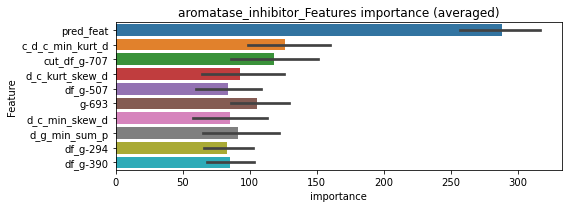

len(train_index) : 2847
len(valid_index) : 950
================================= fold 1/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000533028	valid_1's binary_logloss: 0.00372665
Early stopping, best iteration is:
[1604]	training's binary_logloss: 0.000353947	valid_1's binary_logloss: 0.00345083


len(train_index) : 2848
len(valid_index) : 949
================================= fold 2/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000522344	valid_1's binary_logloss: 0.00568865
Early stopping, best iteration is:
[1491]	training's binary_logloss: 0.000371207	valid_1's binary_logloss: 0.00549902


len(train_index) : 2848
len(valid_index) : 949
================================= fold 3/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000527973	valid_1's binary_logloss: 0.00112952
Early stopping, best iteration is:
[1534]	training's binary_logloss: 0.000364847	valid_1's binary_logloss: 0.000949407


len(train_index) : 2848
len(valid_index) : 949
================================= fold 4/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000533508	valid_1's binary_logloss: 0.00196798
Early stopping, best iteration is:
[1715]	training's binary_logloss: 0.000341642	valid_1's binary_logloss: 0.00173076


aromatase_inhibitor logloss: 0.0029082765161077442


neg labels: 3289 → selected neg labels: 3285


atm_kinase_inhibitor, len(trt): 6, len(othr): 3285
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000412804	valid_1's binary_logloss: 0.00146352
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000195819	valid_1's binary_logloss: 0.000938075
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000408281	valid_1's binary_logloss: 0.00170542
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000208044	valid_1's binary_logloss: 0.00122419
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000419198	valid_1's binary_logloss: 0.000453314
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000197852	valid_1's binary_logloss: 0.000220998
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000408192	valid_1's binary_logloss: 0.00155687


1 / 3 AUC score:1.000
y_Threshold: 0.0006099, Threshold: 0.0024504, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00172, conf_1:0.00319
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0024504
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.0524504
threshold: 0.0524504, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000201057	valid_1's binary_logloss: 0.000942839


positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000296061	valid_1's binary_logloss: 0.000726321
[600]	training's binary_logloss: 0.000138538	valid_1's binary_logloss: 0.00048974
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.00012906	valid_1's binary_logloss: 0.000477035
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000290151	valid_1's binary_logloss: 0.000713496
[600]	training's binary_logloss: 0.000136086	valid_1's binary_logloss: 0.000566059
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000136674	valid_1's binary_logloss: 0.000564273
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000296234	valid_1's binary_logloss: 0.000261365
[600]	training's binary_logloss: 0.000138056	valid_1's binary_logloss: 0.000112534
Early stopping, best iteration is:
[791]	training's binary_logloss: 0.000128253	valid

2 / 3 AUC score:1.000
y_Threshold: 0.1848981, Threshold: 0.0524504, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0364139 Vs.target_rate: 0.00025
Num_p_label: 145.0, conf_0:0.04196, conf_1:0.06294
Num_p_label: 145.0, Expected: 1.0, Adj_threshold_1: 0.0524504
Num_p_label: 118.0, Expected: 1.0, Adj_threshold_2: 0.1024504
Num_p_label: 94.0, Expected: 1.0, Adj_threshold_3: 0.1524504
Num_p_label: 60.0, Expected: 1.0, Adj_threshold_4: 0.2024504
Num_p_label: 51.0, Expected: 1.0, Adj_threshold_5: 0.2524504
Num_p_label: 37.0, Expected: 1.0, Adj_threshold_6: 0.3024504
Num_p_label: 26.0, Expected: 1.0, Adj_threshold_7: 0.3524504
Num_p_label: 23.0, Expected: 1.0, Adj_threshold_8: 0.4024504
Num_p_label: 20.0, Expected: 1.0, Adj_threshold_9: 0.4524504
Num_p_label: 19.0, Expected: 1.0, Adj_threshold_10: 0.5024504
threshold: 0.5524504, positive_p_label: 16.0/3982, p_label_rate: 0.0040181


Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000161035	valid_1's binary_logloss: 0.000852859


positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000303766	valid_1's binary_logloss: 0.000666067
[600]	training's binary_logloss: 0.000141278	valid_1's binary_logloss: 0.000431673
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000133777	valid_1's binary_logloss: 0.000424888
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000291247	valid_1's binary_logloss: 0.000486893
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000139349	valid_1's binary_logloss: 0.000309019
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000297685	valid_1's binary_logloss: 0.000265122
[600]	training's binary_logloss: 0.000138107	valid_1's binary_logloss: 0.000113737
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000128126	valid_1's binary_logloss: 0.000103228
Training until validation scores don't improve f

3 / 3 AUC score:1.000
y_Threshold: 0.1387425, Threshold: 0.5524504, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0027624 Vs.target_rate: 0.00025
Num_p_label: 11.0, conf_0:0.49721, conf_1:0.60770
Num_p_label: 11.0, Expected: 1.0, Adj_threshold_1: 0.5524504
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_2: 0.6024504
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_3: 0.6524504
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_4: 0.7024504
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_5: 0.7524504
threshold: 0.7524504, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000150277	valid_1's binary_logloss: 0.000727595


positive_y_label: 657.0/3810, y_label_rate: 0.1724409


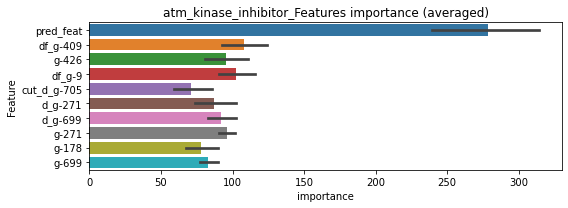

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000336871	valid_1's binary_logloss: 0.000870779
[2000]	training's binary_logloss: 0.000206148	valid_1's binary_logloss: 0.000685403
[3000]	training's binary_logloss: 0.000170793	valid_1's binary_logloss: 0.0006287
Early stopping, best iteration is:
[3677]	training's binary_logloss: 0.000159575	valid_1's binary_logloss: 0.000614196


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000327107	valid_1's binary_logloss: 0.000631143
[2000]	training's binary_logloss: 0.000202258	valid_1's binary_logloss: 0.000464932
[3000]	training's binary_logloss: 0.000171049	valid_1's binary_logloss: 0.000423333
Early stopping, best iteration is:
[3621]	training's binary_logloss: 0.000160792	valid_1's binary_logloss: 0.000409534


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000330837	valid_1's binary_logloss: 0.000292119
[2000]	training's binary_logloss: 0.000203644	valid_1's binary_logloss: 0.000174523
[3000]	training's binary_logloss: 0.000170108	valid_1's binary_logloss: 0.000142504
[4000]	training's binary_logloss: 0.000155022	valid_1's binary_logloss: 0.000127334
[5000]	training's binary_logloss: 0.000147369	valid_1's binary_logloss: 0.000119359
[6000]	training's binary_logloss: 0.000142801	valid_1's binary_logloss: 0.000114422
[7000]	training's binary_logloss: 0.000139098	valid_1's binary_logloss: 0.000110387
[8000]	training's binary_logloss: 0.000136236	valid_1's binary_logloss: 0.000107278
Early stopping, best iteration is:
[8522]	training's binary_logloss: 0.000135017	valid_1's binary_logloss: 0.000105958


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000327815	valid_1's binary_logloss: 0.000650794
[2000]	training's binary_logloss: 0.000202102	valid_1's binary_logloss: 0.000521961
[3000]	training's binary_logloss: 0.000171363	valid_1's binary_logloss: 0.000485753
[4000]	training's binary_logloss: 0.000156728	valid_1's binary_logloss: 0.000457607
Early stopping, best iteration is:
[4552]	training's binary_logloss: 0.000151994	valid_1's binary_logloss: 0.000449059


atm_kinase_inhibitor logloss: 0.000394849813386438


neg labels: 3289 → selected neg labels: 3289


atp-sensitive_potassium_channel_antagonist, len(trt): 7, len(othr): 3289
target_rate: 0.0002939 → Adj_target_rate: 0.0004391
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000490232	valid_1's binary_logloss: 0.000763453
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.0002319	valid_1's binary_logloss: 0.000389266
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000489135	valid_1's binary_logloss: 0.00537539
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000229193	valid_1's binary_logloss: 0.00441292
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000491492	valid_1's binary_logloss: 0.000680361
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000227098	valid_1's binary_logloss: 0.00034502
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00049105	valid_1's binary_logloss: 0.000694878


1 / 3 AUC score:1.000
y_Threshold: 0.0007500, Threshold: 0.0035637, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, conf_0:0.00249, conf_1:0.00463
Num_p_label: 40.0, Expected: 1.2, Adj_threshold_1: 0.0035637
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_2: 0.0535637
threshold: 0.0535637, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000229234	valid_1's binary_logloss: 0.00033898


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000328858	valid_1's binary_logloss: 0.000451327
[600]	training's binary_logloss: 0.000146363	valid_1's binary_logloss: 0.000247226
[900]	training's binary_logloss: 0.000131619	valid_1's binary_logloss: 0.000230372
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000131619	valid_1's binary_logloss: 0.000230372
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00030815	valid_1's binary_logloss: 0.00128804
Early stopping, best iteration is:
[417]	training's binary_logloss: 0.000180974	valid_1's binary_logloss: 0.00118203
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000318944	valid_1's binary_logloss: 0.000299758
[600]	training's binary_logloss: 0.000140375	valid_1's binary_logloss: 0.000120659
[900]	training's binary_logloss: 0.000123805	valid_1's binary_logloss: 0.000103087
Ear

2 / 3 AUC score:1.000
y_Threshold: 0.1642576, Threshold: 0.0535637, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0597690 Vs.target_rate: 0.00029
Num_p_label: 238.0, conf_0:0.04285, conf_1:0.06428
Num_p_label: 238.0, Expected: 1.2, Adj_threshold_1: 0.0535637
Num_p_label: 191.0, Expected: 1.2, Adj_threshold_2: 0.1035637
Num_p_label: 129.0, Expected: 1.2, Adj_threshold_3: 0.1535637
Num_p_label: 81.0, Expected: 1.2, Adj_threshold_4: 0.2035637
Num_p_label: 61.0, Expected: 1.2, Adj_threshold_5: 0.2535637
Num_p_label: 41.0, Expected: 1.2, Adj_threshold_6: 0.3035637
Num_p_label: 30.0, Expected: 1.2, Adj_threshold_7: 0.3535637
Num_p_label: 25.0, Expected: 1.2, Adj_threshold_8: 0.4035637
Num_p_label: 19.0, Expected: 1.2, Adj_threshold_9: 0.4535637
Num_p_label: 14.0, Expected: 1.2, Adj_threshold_10: 0.5035637


[900]	training's binary_logloss: 0.000125901	valid_1's binary_logloss: 0.000174795
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000125901	valid_1's binary_logloss: 0.000174795


threshold: 0.5535637, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000329244	valid_1's binary_logloss: 0.000464705
[600]	training's binary_logloss: 0.000146885	valid_1's binary_logloss: 0.000255301
Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000133083	valid_1's binary_logloss: 0.000238439
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000310568	valid_1's binary_logloss: 0.00129214
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.00015515	valid_1's binary_logloss: 0.00121068
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000318696	valid_1's binary_logloss: 0.000300361
[600]	training's binary_logloss: 0.00014027	valid_1's binary_logloss: 0.00012099
[900]	training's binary_logloss: 0.000123604	valid_1's binary_logloss: 0.000103304
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000123522	valid_1'

3 / 3 AUC score:1.000
y_Threshold: 0.1677268, Threshold: 0.5535637, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0025113 Vs.target_rate: 0.00029
Num_p_label: 10.0, conf_0:0.49821, conf_1:0.60892
Num_p_label: 10.0, Expected: 1.2, Adj_threshold_1: 0.5535637
Num_p_label: 8.0, Expected: 1.2, Adj_threshold_2: 0.6035637
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_3: 0.6535637
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_4: 0.7035637
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_5: 0.7535637


[900]	training's binary_logloss: 0.000125934	valid_1's binary_logloss: 0.000173191
Early stopping, best iteration is:
[916]	training's binary_logloss: 0.000125934	valid_1's binary_logloss: 0.000173191


threshold: 0.7535637, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


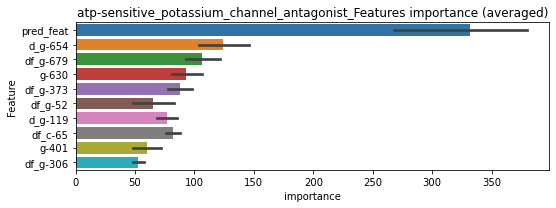

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000341475	valid_1's binary_logloss: 0.000499443
[2000]	training's binary_logloss: 0.000213467	valid_1's binary_logloss: 0.000348705
[3000]	training's binary_logloss: 0.000180521	valid_1's binary_logloss: 0.000312445
[4000]	training's binary_logloss: 0.000164222	valid_1's binary_logloss: 0.000293638
[5000]	training's binary_logloss: 0.000154991	valid_1's binary_logloss: 0.000282964
[6000]	training's binary_logloss: 0.000148498	valid_1's binary_logloss: 0.000275129
[7000]	training's binary_logloss: 0.000143742	valid_1's binary_logloss: 0.000269479
[8000]	training's binary_logloss: 0.000140353	valid_1's binary_logloss: 0.000265719
[9000]	training's binary_logloss: 0.000137892	valid_1's binary_logloss: 0.000263096
Early stopping, best iteration is:
[9355]	training's binary_logloss: 0.00013719	valid_1's binary_logloss: 0.000262297


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00033283	valid_1's binary_logloss: 0.000705127
[2000]	training's binary_logloss: 0.000208386	valid_1's binary_logloss: 0.000545829
[3000]	training's binary_logloss: 0.000175563	valid_1's binary_logloss: 0.000512073
Early stopping, best iteration is:
[3114]	training's binary_logloss: 0.000172646	valid_1's binary_logloss: 0.00050987


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000336312	valid_1's binary_logloss: 0.000309317
[2000]	training's binary_logloss: 0.000210594	valid_1's binary_logloss: 0.000188959
[3000]	training's binary_logloss: 0.000177667	valid_1's binary_logloss: 0.000155152
[4000]	training's binary_logloss: 0.000160539	valid_1's binary_logloss: 0.000136954
[5000]	training's binary_logloss: 0.000150854	valid_1's binary_logloss: 0.000126636
[6000]	training's binary_logloss: 0.000144149	valid_1's binary_logloss: 0.000119502
[7000]	training's binary_logloss: 0.000139383	valid_1's binary_logloss: 0.000114431
[8000]	training's binary_logloss: 0.000135786	valid_1's binary_logloss: 0.000110603
[9000]	training's binary_logloss: 0.00013319	valid_1's binary_logloss: 0.000107842
Early stopping, best iteration is:
[9673]	training's binary_logloss: 0.000131933	valid_1's binary_logloss: 0.000106504


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00033987	valid_1's binary_logloss: 0.000383652
[2000]	training's binary_logloss: 0.000212932	valid_1's binary_logloss: 0.000250681
[3000]	training's binary_logloss: 0.000179622	valid_1's binary_logloss: 0.000214688
[4000]	training's binary_logloss: 0.000163215	valid_1's binary_logloss: 0.000196442
[5000]	training's binary_logloss: 0.000153757	valid_1's binary_logloss: 0.000186038
[6000]	training's binary_logloss: 0.000147129	valid_1's binary_logloss: 0.000178903
[7000]	training's binary_logloss: 0.000142376	valid_1's binary_logloss: 0.000173641
[8000]	training's binary_logloss: 0.000138852	valid_1's binary_logloss: 0.000169134
[9000]	training's binary_logloss: 0.00013633	valid_1's binary_logloss: 0.000166217
Early stopping, best iteration is:
[9602]	training's binary_logloss: 0.000135086	valid_1's binary_logloss: 0.00016509


atp-sensitive_potassium_channel_antagonist logloss: 0.00026095962146771643


neg labels: 3289 → selected neg labels: 3286


atp_synthase_inhibitor, len(trt): 12, len(othr): 3286
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000920592	valid_1's binary_logloss: 0.00328365
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000335702	valid_1's binary_logloss: 0.00185071
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00090586	valid_1's binary_logloss: 0.00252935
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.00032975	valid_1's binary_logloss: 0.00171537
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000924299	valid_1's binary_logloss: 0.00152733
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000332631	valid_1's binary_logloss: 0.000634531
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000935816	valid_1's binary_logloss: 0.00201817


1 / 3 AUC score:1.000
y_Threshold: 0.0018217, Threshold: 0.0183790, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.01287, conf_1:0.02389
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0183790
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_2: 0.0683790
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_3: 0.1183790
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_4: 0.1683790
threshold: 0.1683790, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000334609	valid_1's binary_logloss: 0.000911193


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00047247	valid_1's binary_logloss: 0.00124982
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000195558	valid_1's binary_logloss: 0.000793141
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000452081	valid_1's binary_logloss: 0.00107245
[600]	training's binary_logloss: 0.000163928	valid_1's binary_logloss: 0.000653839
[900]	training's binary_logloss: 0.000140487	valid_1's binary_logloss: 0.000617752
Early stopping, best iteration is:
[913]	training's binary_logloss: 0.00013964	valid_1's binary_logloss: 0.000617294
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000454692	valid_1's binary_logloss: 0.000630606
[600]	training's binary_logloss: 0.000162527	valid_1's binary_logloss: 0.000309202
[900]	training's binary_logloss: 0.000139024	valid_1's binary_logloss: 0.000282119
Earl

2 / 3 AUC score:1.000
y_Threshold: 0.5070516, Threshold: 0.1683790, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0532396 Vs.target_rate: 0.00050
Num_p_label: 212.0, conf_0:0.13470, conf_1:0.20205
Num_p_label: 212.0, Expected: 2.0, Adj_threshold_1: 0.1683790
Num_p_label: 190.0, Expected: 2.0, Adj_threshold_2: 0.2183790
Num_p_label: 169.0, Expected: 2.0, Adj_threshold_3: 0.2683790
Num_p_label: 150.0, Expected: 2.0, Adj_threshold_4: 0.3183790
Num_p_label: 132.0, Expected: 2.0, Adj_threshold_5: 0.3683790
Num_p_label: 120.0, Expected: 2.0, Adj_threshold_6: 0.4183790


Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000139227	valid_1's binary_logloss: 0.00107203


Num_p_label: 107.0, Expected: 2.0, Adj_threshold_7: 0.4683790
Num_p_label: 90.0, Expected: 2.0, Adj_threshold_8: 0.5183790
Num_p_label: 84.0, Expected: 2.0, Adj_threshold_9: 0.5683790
Num_p_label: 75.0, Expected: 2.0, Adj_threshold_10: 0.6183790
threshold: 0.6683790, positive_p_label: 58.0/3982, p_label_rate: 0.0145655
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000470022	valid_1's binary_logloss: 0.00113355
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000176755	valid_1's binary_logloss: 0.000639676
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000450103	valid_1's binary_logloss: 0.00106229
[600]	training's binary_logloss: 0.000163353	valid_1's binary_logloss: 0.000653941
[900]	training's binary_logloss: 0.000140004	valid_1's binary_logloss: 0.00062227
Early stopping, best iteration is:
[947]	training's binary_logloss: 0.000137632	valid_1's binary_logloss: 0.000619362
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000457806	valid_1's binary_logloss: 0.000669577
[600]	training's binary_logloss: 0.000163026	valid_1's binary_logloss: 0.000353552
[900]	training's binary_logloss: 0.000139416	valid_1's binary_logloss: 0.00032539
Earl

3 / 3 AUC score:1.000
y_Threshold: 0.5206327, Threshold: 0.6683790, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0143144 Vs.target_rate: 0.00050
Num_p_label: 57.0, conf_0:0.50000, conf_1:0.73522
Num_p_label: 57.0, Expected: 2.0, Adj_threshold_1: 0.6683790
Num_p_label: 45.0, Expected: 2.0, Adj_threshold_2: 0.7183790
Num_p_label: 34.0, Expected: 2.0, Adj_threshold_3: 0.7683790
threshold: 0.7683790, positive_p_label: 34.0/3982, p_label_rate: 0.0085384


Early stopping, best iteration is:
[849]	training's binary_logloss: 0.000137296	valid_1's binary_logloss: 0.0011081


positive_y_label: 657.0/3811, y_label_rate: 0.1723957


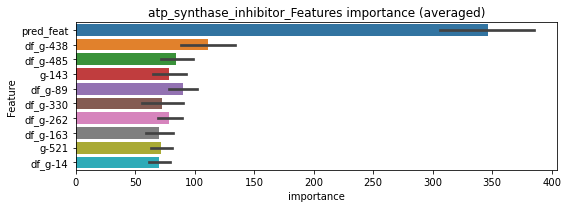

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000402593	valid_1's binary_logloss: 0.000831303
[2000]	training's binary_logloss: 0.000250873	valid_1's binary_logloss: 0.000615031
[3000]	training's binary_logloss: 0.000208963	valid_1's binary_logloss: 0.000561497
[4000]	training's binary_logloss: 0.000187382	valid_1's binary_logloss: 0.000522066
Early stopping, best iteration is:
[4536]	training's binary_logloss: 0.000180584	valid_1's binary_logloss: 0.000511424


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000395337	valid_1's binary_logloss: 0.000884348
[2000]	training's binary_logloss: 0.00024586	valid_1's binary_logloss: 0.000681792
[3000]	training's binary_logloss: 0.00020441	valid_1's binary_logloss: 0.000633483
[4000]	training's binary_logloss: 0.000183043	valid_1's binary_logloss: 0.000605165
[5000]	training's binary_logloss: 0.000171271	valid_1's binary_logloss: 0.000590003
[6000]	training's binary_logloss: 0.000163529	valid_1's binary_logloss: 0.000580006
[7000]	training's binary_logloss: 0.000157453	valid_1's binary_logloss: 0.000572901
[8000]	training's binary_logloss: 0.000153503	valid_1's binary_logloss: 0.000568445
Early stopping, best iteration is:
[8400]	training's binary_logloss: 0.000152215	valid_1's binary_logloss: 0.000566885


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000397147	valid_1's binary_logloss: 0.000584333
[2000]	training's binary_logloss: 0.000244988	valid_1's binary_logloss: 0.000412367
[3000]	training's binary_logloss: 0.000202531	valid_1's binary_logloss: 0.000365389
Early stopping, best iteration is:
[3876]	training's binary_logloss: 0.000182649	valid_1's binary_logloss: 0.000349176


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000393694	valid_1's binary_logloss: 0.00129637
[2000]	training's binary_logloss: 0.000246189	valid_1's binary_logloss: 0.00109656
[3000]	training's binary_logloss: 0.00020278	valid_1's binary_logloss: 0.00103817
[4000]	training's binary_logloss: 0.000180855	valid_1's binary_logloss: 0.00101144
[5000]	training's binary_logloss: 0.00016887	valid_1's binary_logloss: 0.000997002
[6000]	training's binary_logloss: 0.000160972	valid_1's binary_logloss: 0.000987126
[7000]	training's binary_logloss: 0.000155298	valid_1's binary_logloss: 0.000980146
[8000]	training's binary_logloss: 0.000150918	valid_1's binary_logloss: 0.000974887
Early stopping, best iteration is:
[8396]	training's binary_logloss: 0.000149489	valid_1's binary_logloss: 0.0009732


atp_synthase_inhibitor logloss: 0.000600165435460889


neg labels: 3289 → selected neg labels: 3273


atpase_inhibitor, len(trt): 97, len(othr): 3273
target_rate: 0.0040732 → Adj_target_rate: 0.0041016
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00979654	valid_1's binary_logloss: 0.0802067
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.00191689	valid_1's binary_logloss: 0.0719353
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00988136	valid_1's binary_logloss: 0.064042
[600]	training's binary_logloss: 0.00162324	valid_1's binary_logloss: 0.0494956
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.00147316	valid_1's binary_logloss: 0.0492119
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00980872	valid_1's binary_logloss: 0.0523035
[600]	training's binary_logloss: 0.00164741	valid_1's binary_logloss: 0.0403877
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.0014173	valid_1's binary_logloss: 0.0397623
Training until validation scores don't improve for 30 rounds
[300]	trainin

1 / 3 AUC score:0.997
y_Threshold: 0.0119797, Threshold: 0.0285377, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 649/3785
p_label_rate: 0.0100452 Vs.target_rate: 0.00407
Num_p_label: 40.0, conf_0:0.01998, conf_1:0.03710
Num_p_label: 40.0, Expected: 16.2, Adj_threshold_1: 0.0285377
Num_p_label: 4.0, Expected: 16.2, Adj_threshold_2: 0.0785377
threshold: 0.0785377, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 649.0/3785, y_label_rate: 0.1714663
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138642	valid_1's binary_logloss: 0.00764712
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000282962	valid_1's binary_logloss: 0.00596988
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00147632	valid_1's binary_logloss: 0.00537974
[600]	training's binary_logloss: 0.000254123	valid_1's binary_logloss: 0.00294042
Early stopping, best iteration is:
[854]	training's binary_logloss: 0.000180803	valid_1's binary_logloss: 0.00273908
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00147893	valid_1's binary_logloss: 0.00391351
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.00030495	valid_1's binary_logloss: 0.00164951
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014549	valid_1's binary_logloss: 0.00368152
[

2 / 3 AUC score:1.000
y_Threshold: 0.2210588, Threshold: 0.0785377, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 646.0/3779
p_label_rate: 0.0469613 Vs.target_rate: 0.00407
Num_p_label: 187.0, conf_0:0.06283, conf_1:0.09425
Num_p_label: 187.0, Expected: 16.2, Adj_threshold_1: 0.0785377
Num_p_label: 164.0, Expected: 16.2, Adj_threshold_2: 0.1285377
Num_p_label: 134.0, Expected: 16.2, Adj_threshold_3: 0.1785377
Num_p_label: 113.0, Expected: 16.2, Adj_threshold_4: 0.2285377
Num_p_label: 104.0, Expected: 16.2, Adj_threshold_5: 0.2785377
Num_p_label: 101.0, Expected: 16.2, Adj_threshold_6: 0.3285377
Num_p_label: 98.0, Expected: 16.2, Adj_threshold_7: 0.3785377
Num_p_label: 90.0, Expected: 16.2, Adj_threshold_8: 0.4285377
Num_p_label: 89.0, Expected: 16.2, Adj_threshold_9: 0.4785377
Num_p_label: 89.0, Expected: 16.2, Adj_threshold_10: 0.5285377
threshold: 0.5785377, positive_p_label: 88.0/3982, p_label_rate: 0.0220994
positive_y_label: 646.0/3779, y_label_rate: 0.17

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119007	valid_1's binary_logloss: 0.00861257
Early stopping, best iteration is:
[419]	training's binary_logloss: 0.000448488	valid_1's binary_logloss: 0.00796931
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011623	valid_1's binary_logloss: 0.00269374
[600]	training's binary_logloss: 0.000170441	valid_1's binary_logloss: 0.000427659
[900]	training's binary_logloss: 0.000108295	valid_1's binary_logloss: 0.000272998
[1200]	training's binary_logloss: 0.000101837	valid_1's binary_logloss: 0.000256852
Early stopping, best iteration is:
[1216]	training's binary_logloss: 0.000101592	valid_1's binary_logloss: 0.000256133
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135954	valid_1's binary_logloss: 0.00336487
[600]	training's binary_logloss: 0.000228491	valid_1's binary_logloss: 0.000841361
[900]	

3 / 3 AUC score:1.000
y_Threshold: 0.0894473, Threshold: 0.5785377, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 645.0/3777
p_label_rate: 0.0205927 Vs.target_rate: 0.00407
Num_p_label: 82.0, conf_0:0.50000, conf_1:0.63639
Num_p_label: 82.0, Expected: 16.2, Adj_threshold_1: 0.5785377
Num_p_label: 82.0, Expected: 16.2, Adj_threshold_2: 0.6285377
Num_p_label: 82.0, Expected: 16.2, Adj_threshold_3: 0.6785377
Num_p_label: 82.0, Expected: 16.2, Adj_threshold_4: 0.7285377
Num_p_label: 82.0, Expected: 16.2, Adj_threshold_5: 0.7785377
threshold: 0.7785377, positive_p_label: 82.0/3982, p_label_rate: 0.0205927
positive_y_label: 645.0/3777, y_label_rate: 0.1707705


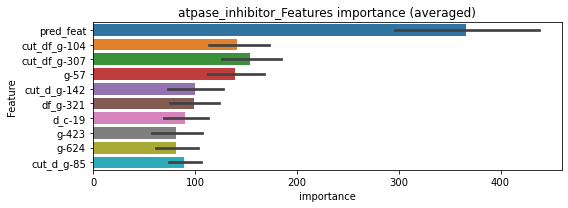

len(train_index) : 2832
len(valid_index) : 945
================================= fold 1/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2833
len(valid_index) : 944
================================= fold 2/4 atpase_inhibitor=================================


Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000774739	valid_1's binary_logloss: 0.00340233
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00046321	valid_1's binary_logloss: 0.000863294
[2000]	training's binary_logloss: 0.000253828	valid_1's binary_logloss: 0.000475521
[3000]	training's binary_logloss: 0.000185942	valid_1's binary_logloss: 0.000349036
[4000]	training's binary_logloss: 0.000153945	valid_1's binary_logloss: 0.00028929
[5000]	training's binary_logloss: 0.000137666	valid_1's binary_logloss: 0.000258882
[6000]	training's binary_logloss: 0.000127124	valid_1's binary_logloss: 0.000239079
[7000]	training's binary_logloss: 0.000119775	valid_1's binary_logloss: 0.000225252
[8000]	training's binary_logloss: 0.000114764	valid_1's binary_logloss: 0.000215845
[9000]	training's binary_logloss: 0.000111199	valid_1's binary_logloss: 0.000209133
[10000]	training's binary_logloss: 0.000108696	valid_1's binary_logl

len(train_index) : 2833
len(valid_index) : 944
================================= fold 3/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000464749	valid_1's binary_logloss: 0.000754078
[2000]	training's binary_logloss: 0.000254252	valid_1's binary_logloss: 0.000413975
[3000]	training's binary_logloss: 0.000186108	valid_1's binary_logloss: 0.000303405
[4000]	training's binary_logloss: 0.000153971	valid_1's binary_logloss: 0.000251198
[5000]	training's binary_logloss: 0.000137636	valid_1's binary_logloss: 0.00022465
[6000]	training's binary_logloss: 0.000127125	valid_1's binary_logloss: 0.000207505
[7000]	training's binary_logloss: 0.000119799	valid_1's binary_logloss: 0.000195547
[8000]	training's binary_logloss: 0.000114784	valid_1's binary_logloss: 0.000187366
[9000]	training's binary_logloss: 0.000111232	valid_1's binary_logloss: 0.000181573
[10000]	training's binary_logloss: 0.000108692	valid_1's binary_logloss: 0.000177448
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000108692	valid

len(train_index) : 2833
len(valid_index) : 944
================================= fold 4/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000463725	valid_1's binary_logloss: 0.000785438
[2000]	training's binary_logloss: 0.000254077	valid_1's binary_logloss: 0.000432452
[3000]	training's binary_logloss: 0.000185987	valid_1's binary_logloss: 0.000317108
[4000]	training's binary_logloss: 0.000153975	valid_1's binary_logloss: 0.000262809
[5000]	training's binary_logloss: 0.000137675	valid_1's binary_logloss: 0.000235135
[6000]	training's binary_logloss: 0.00012711	valid_1's binary_logloss: 0.000217094
[7000]	training's binary_logloss: 0.000119791	valid_1's binary_logloss: 0.000204596
[8000]	training's binary_logloss: 0.000114773	valid_1's binary_logloss: 0.000196034
[9000]	training's binary_logloss: 0.000111209	valid_1's binary_logloss: 0.000189954
[10000]	training's binary_logloss: 0.000108688	valid_1's binary_logloss: 0.000185677
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000108688	valid

atpase_inhibitor logloss: 0.000993121368867836


neg labels: 3289 → selected neg labels: 3287


atr_kinase_inhibitor, len(trt): 19, len(othr): 3287
target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00159919	valid_1's binary_logloss: 0.00324201
[600]	training's binary_logloss: 0.000407601	valid_1's binary_logloss: 0.00107842
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000391939	valid_1's binary_logloss: 0.00104484
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00159241	valid_1's binary_logloss: 0.00374659
[600]	training's binary_logloss: 0.000405227	valid_1's binary_logloss: 0.00138235
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000387649	valid_1's binary_logloss: 0.00135206
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0015957	valid_1's binary_logloss: 0.00294377
[600]	training's binary_logloss: 0.000406843	valid_1's binary_logloss: 0.00103552
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000406843	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0025074, Threshold: 0.0086895, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000406426	valid_1's binary_logloss: 0.00161672
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000402071	valid_1's binary_logloss: 0.00159616


Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, conf_0:0.00608, conf_1:0.01130
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0086895
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_2: 0.0586895
threshold: 0.0586895, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000664032	valid_1's binary_logloss: 0.00193921
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000261458	valid_1's binary_logloss: 0.00136215
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000625988	valid_1's binary_logloss: 0.00222186
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.00020926	valid_1's binary_logloss: 0.00179637
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000652388	valid_1's binary_logloss: 0.00121844
[600]	training's binary_logloss: 0.000183208	valid_1's binary_logloss: 0.000690528
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000185376	valid_1's binary_logloss: 0.000687175
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000637176	valid_1's binary_logloss: 0.001

2 / 3 AUC score:1.000
y_Threshold: 0.7150197, Threshold: 0.0586895, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0462079 Vs.target_rate: 0.00080
Num_p_label: 184.0, conf_0:0.04695, conf_1:0.07043
Num_p_label: 184.0, Expected: 3.2, Adj_threshold_1: 0.0586895
Num_p_label: 183.0, Expected: 3.2, Adj_threshold_2: 0.1086895
Num_p_label: 181.0, Expected: 3.2, Adj_threshold_3: 0.1586895
Num_p_label: 181.0, Expected: 3.2, Adj_threshold_4: 0.2086895


[600]	training's binary_logloss: 0.000181685	valid_1's binary_logloss: 0.000599065
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000173348	valid_1's binary_logloss: 0.000585881


Num_p_label: 181.0, Expected: 3.2, Adj_threshold_5: 0.2586895
Num_p_label: 177.0, Expected: 3.2, Adj_threshold_6: 0.3086895
Num_p_label: 155.0, Expected: 3.2, Adj_threshold_7: 0.3586895
Num_p_label: 139.0, Expected: 3.2, Adj_threshold_8: 0.4086895
Num_p_label: 112.0, Expected: 3.2, Adj_threshold_9: 0.4586895
Num_p_label: 75.0, Expected: 3.2, Adj_threshold_10: 0.5086895
threshold: 0.5586895, positive_p_label: 52.0/3982, p_label_rate: 0.0130588
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000668923	valid_1's binary_logloss: 0.00182103
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000217386	valid_1's binary_logloss: 0.00116607
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000618868	valid_1's binary_logloss: 0.0024443
Early stopping, best iteration is:
[393]	training's binary_logloss: 0.000308954	valid_1's binary_logloss: 0.00217007
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000647477	valid_1's binary_logloss: 0.00112862
[600]	training's binary_logloss: 0.000184674	valid_1's binary_logloss: 0.000569391
[900]	training's binary_logloss: 0.000154307	valid_1's binary_logloss: 0.000532598
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000154307	valid_1's binary_logloss: 0.000532598
Training until validation scores don't improve for 30 

3 / 3 AUC score:1.000
y_Threshold: 0.7249393, Threshold: 0.5586895, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0090407 Vs.target_rate: 0.00080
Num_p_label: 36.0, conf_0:0.50000, conf_1:0.61456
Num_p_label: 36.0, Expected: 3.2, Adj_threshold_1: 0.5586895
Num_p_label: 28.0, Expected: 3.2, Adj_threshold_2: 0.6086895
Num_p_label: 17.0, Expected: 3.2, Adj_threshold_3: 0.6586895


[600]	training's binary_logloss: 0.000181334	valid_1's binary_logloss: 0.000616187
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000172853	valid_1's binary_logloss: 0.000602078


Num_p_label: 9.0, Expected: 3.2, Adj_threshold_4: 0.7086895
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_5: 0.7586895
threshold: 0.7586895, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


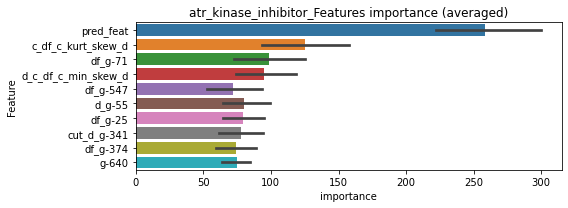

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000459378	valid_1's binary_logloss: 0.00145688
[2000]	training's binary_logloss: 0.000276516	valid_1's binary_logloss: 0.00118499
Early stopping, best iteration is:
[2708]	training's binary_logloss: 0.000234146	valid_1's binary_logloss: 0.00111623


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000442414	valid_1's binary_logloss: 0.00219708
Early stopping, best iteration is:
[1932]	training's binary_logloss: 0.000276845	valid_1's binary_logloss: 0.00201411


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000453988	valid_1's binary_logloss: 0.000716082
[2000]	training's binary_logloss: 0.000271907	valid_1's binary_logloss: 0.000530119
[3000]	training's binary_logloss: 0.000219502	valid_1's binary_logloss: 0.000472314
Early stopping, best iteration is:
[2971]	training's binary_logloss: 0.000220436	valid_1's binary_logloss: 0.000471879


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000454198	valid_1's binary_logloss: 0.00111191
[2000]	training's binary_logloss: 0.000272435	valid_1's binary_logloss: 0.000903256
Early stopping, best iteration is:
[2548]	training's binary_logloss: 0.000235666	valid_1's binary_logloss: 0.000853099


atr_kinase_inhibitor logloss: 0.001114297351354912


neg labels: 3289 → selected neg labels: 3271


aurora_kinase_inhibitor, len(trt): 96, len(othr): 3271
target_rate: 0.0040312 → Adj_target_rate: 0.0040656
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120098	valid_1's binary_logloss: 0.0759772
[600]	training's binary_logloss: 0.00174099	valid_1's binary_logloss: 0.0610337
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.00168305	valid_1's binary_logloss: 0.0607952
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117795	valid_1's binary_logloss: 0.0535736
[600]	training's binary_logloss: 0.00177131	valid_1's binary_logloss: 0.031137
[900]	training's binary_logloss: 0.000898903	valid_1's binary_logloss: 0.0283894
Early stopping, best iteration is:
[1010]	training's binary_logloss: 0.000814915	valid_1's binary_logloss: 0.0279174
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0119976	valid_1's binary_logloss: 0.0575517
[600]	training's binary_logloss: 0.00176916	valid_1's binary_logloss: 0.0417937
Early stopping, best iterati

1 / 3 AUC score:0.995
y_Threshold: 0.0154546, Threshold: 0.0766959, pos_neg_ratio: 0.8000000
Remove_noisy_data: 149 → Positive_corect_labels: 645/3776
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, conf_0:0.05369, conf_1:0.09970
Num_p_label: 40.0, Expected: 16.1, Adj_threshold_1: 0.0766959


Early stopping, best iteration is:
[464]	training's binary_logloss: 0.00327776	valid_1's binary_logloss: 0.0644604


Num_p_label: 25.0, Expected: 16.1, Adj_threshold_2: 0.1266959
Num_p_label: 17.0, Expected: 16.1, Adj_threshold_3: 0.1766959
threshold: 0.1766959, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 645.0/3776, y_label_rate: 0.1708157
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00140706	valid_1's binary_logloss: 0.00342226
[600]	training's binary_logloss: 0.000223754	valid_1's binary_logloss: 0.00115702
Early stopping, best iteration is:
[774]	training's binary_logloss: 0.000166059	valid_1's binary_logloss: 0.000998313
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127713	valid_1's binary_logloss: 0.00253601
[600]	training's binary_logloss: 0.000175058	valid_1's binary_logloss: 0.000374784
[900]	training's binary_logloss: 0.000109002	valid_1's binary_logloss: 0.000234473
[1200]	training's binary_logloss: 0.000101851	valid_1's binary_logloss: 0.000219186
Early stopping, best iteration is:
[1238]	training's binary_logloss: 0.000101429	valid_1's binary_logloss: 0.000218198
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00129189	valid_1's binary_logloss: 0.00227062
[600]

2 / 3 AUC score:1.000
y_Threshold: 0.0022458, Threshold: 0.1766959, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 644.0/3774
p_label_rate: 0.0590156 Vs.target_rate: 0.00403
Num_p_label: 235.0, conf_0:0.14136, conf_1:0.21204
Num_p_label: 235.0, Expected: 16.1, Adj_threshold_1: 0.1766959
Num_p_label: 231.0, Expected: 16.1, Adj_threshold_2: 0.2266959
Num_p_label: 230.0, Expected: 16.1, Adj_threshold_3: 0.2766959
Num_p_label: 230.0, Expected: 16.1, Adj_threshold_4: 0.3266959
Num_p_label: 230.0, Expected: 16.1, Adj_threshold_5: 0.3766959
Num_p_label: 230.0, Expected: 16.1, Adj_threshold_6: 0.4266959
Num_p_label: 227.0, Expected: 16.1, Adj_threshold_7: 0.4766959
Num_p_label: 227.0, Expected: 16.1, Adj_threshold_8: 0.5266959
Num_p_label: 227.0, Expected: 16.1, Adj_threshold_9: 0.5766959
Num_p_label: 227.0, Expected: 16.1, Adj_threshold_10: 0.6266959
threshold: 0.6766959, positive_p_label: 227.0/3982, p_label_rate: 0.0570065
positive_y_label: 644.0/3774, y_label_rate:

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00140615	valid_1's binary_logloss: 0.00305487
[600]	training's binary_logloss: 0.000224002	valid_1's binary_logloss: 0.00066958
[900]	training's binary_logloss: 0.000152347	valid_1's binary_logloss: 0.000496312
Early stopping, best iteration is:
[1091]	training's binary_logloss: 0.000140837	valid_1's binary_logloss: 0.000458118
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00140585	valid_1's binary_logloss: 0.00385876
[600]	training's binary_logloss: 0.000226128	valid_1's binary_logloss: 0.00159679
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.00019131	valid_1's binary_logloss: 0.00149798
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00141388	valid_1's binary_logloss: 0.00280924
[600]	training's binary_logloss: 0.000224073	valid_1's binary_logloss: 0.000681772
Early sto

3 / 3 AUC score:1.000
y_Threshold: 0.7821746, Threshold: 0.6766959, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 641.0/3768
p_label_rate: 0.0590156 Vs.target_rate: 0.00403
Num_p_label: 235.0, conf_0:0.50000, conf_1:0.74437
Num_p_label: 235.0, Expected: 16.1, Adj_threshold_1: 0.6766959
Num_p_label: 235.0, Expected: 16.1, Adj_threshold_2: 0.7266959
Num_p_label: 231.0, Expected: 16.1, Adj_threshold_3: 0.7766959
threshold: 0.7766959, positive_p_label: 231.0/3982, p_label_rate: 0.0580110
positive_y_label: 641.0/3768, y_label_rate: 0.1701168


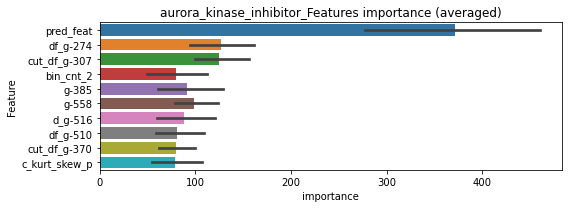

len(train_index) : 2826
len(valid_index) : 942
================================= fold 1/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00057293	valid_1's binary_logloss: 0.00254501
Early stopping, best iteration is:
[1621]	training's binary_logloss: 0.000373856	valid_1's binary_logloss: 0.00219453


len(train_index) : 2826
len(valid_index) : 942
================================= fold 2/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000565616	valid_1's binary_logloss: 0.00279835
Early stopping, best iteration is:
[1242]	training's binary_logloss: 0.000470058	valid_1's binary_logloss: 0.00266729


len(train_index) : 2826
len(valid_index) : 942
================================= fold 3/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2826
len(valid_index) : 942
================================= fold 4/4 aurora_kinase_inhibitor=================================


Early stopping, best iteration is:
[430]	training's binary_logloss: 0.00132348	valid_1's binary_logloss: 0.00988238
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000564425	valid_1's binary_logloss: 0.00295447
[2000]	training's binary_logloss: 0.000321525	valid_1's binary_logloss: 0.00264546
Early stopping, best iteration is:
[2450]	training's binary_logloss: 0.000280374	valid_1's binary_logloss: 0.00259666


aurora_kinase_inhibitor logloss: 0.004335857041662026


neg labels: 3289 → selected neg labels: 3287


autotaxin_inhibitor, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000413699	valid_1's binary_logloss: 0.000642802
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000205377	valid_1's binary_logloss: 0.000379422
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000411054	valid_1's binary_logloss: 0.000650147
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000207674	valid_1's binary_logloss: 0.000359702
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000406917	valid_1's binary_logloss: 0.000643652
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.00020562	valid_1's binary_logloss: 0.000349052
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000411119	valid_1's binary_logloss: 0.00073891


1 / 3 AUC score:1.000
y_Threshold: 0.0008073, Threshold: 0.0054141, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00379, conf_1:0.00704
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0054141
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.0554141
threshold: 0.0554141, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000209558	valid_1's binary_logloss: 0.000409932


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000285923	valid_1's binary_logloss: 0.000818396
[600]	training's binary_logloss: 0.000136538	valid_1's binary_logloss: 0.000623381
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000125736	valid_1's binary_logloss: 0.000613104
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000285252	valid_1's binary_logloss: 0.000409913
[600]	training's binary_logloss: 0.000135228	valid_1's binary_logloss: 0.000233157
Early stopping, best iteration is:
[791]	training's binary_logloss: 0.000125455	valid_1's binary_logloss: 0.000222797
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000286314	valid_1's binary_logloss: 0.000258693
[600]	training's binary_logloss: 0.000136232	valid_1's binary_logloss: 0.000115152
Early stopping, best iteration is:
[784]	training's binary_logloss: 0.000127186	val

2 / 3 AUC score:1.000
y_Threshold: 0.2444336, Threshold: 0.0554141, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0582622 Vs.target_rate: 0.00025
Num_p_label: 232.0, conf_0:0.04433, conf_1:0.06650
Num_p_label: 232.0, Expected: 1.0, Adj_threshold_1: 0.0554141
Num_p_label: 184.0, Expected: 1.0, Adj_threshold_2: 0.1054141
Num_p_label: 136.0, Expected: 1.0, Adj_threshold_3: 0.1554141
Num_p_label: 95.0, Expected: 1.0, Adj_threshold_4: 0.2054141
Num_p_label: 72.0, Expected: 1.0, Adj_threshold_5: 0.2554141
Num_p_label: 49.0, Expected: 1.0, Adj_threshold_6: 0.3054141
Num_p_label: 42.0, Expected: 1.0, Adj_threshold_7: 0.3554141
Num_p_label: 37.0, Expected: 1.0, Adj_threshold_8: 0.4054141
Num_p_label: 34.0, Expected: 1.0, Adj_threshold_9: 0.4554141
Num_p_label: 29.0, Expected: 1.0, Adj_threshold_10: 0.5054141
threshold: 0.5554141, positive_p_label: 23.0/3982, p_label_rate: 0.0057760


Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000125299	valid_1's binary_logloss: 0.000286225


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000288736	valid_1's binary_logloss: 0.00193622
[600]	training's binary_logloss: 0.00013784	valid_1's binary_logloss: 0.00154131
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000133221	valid_1's binary_logloss: 0.00151889
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000285565	valid_1's binary_logloss: 0.000413407
[600]	training's binary_logloss: 0.000135509	valid_1's binary_logloss: 0.000235025
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.00012647	valid_1's binary_logloss: 0.000225079
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000287796	valid_1's binary_logloss: 0.000257205
[600]	training's binary_logloss: 0.000136431	valid_1's binary_logloss: 0.000114101
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000127913	valid_1'

3 / 3 AUC score:1.000
y_Threshold: 0.3431044, Threshold: 0.5554141, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0050226 Vs.target_rate: 0.00025
Num_p_label: 20.0, conf_0:0.49987, conf_1:0.61096
Num_p_label: 20.0, Expected: 1.0, Adj_threshold_1: 0.5554141
Num_p_label: 15.0, Expected: 1.0, Adj_threshold_2: 0.6054141
Num_p_label: 10.0, Expected: 1.0, Adj_threshold_3: 0.6554141
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_4: 0.7054141
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_5: 0.7554141
threshold: 0.7554141, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000124728	valid_1's binary_logloss: 0.000290171


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


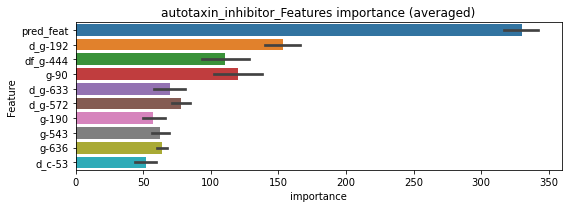

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000320904	valid_1's binary_logloss: 0.0018526
[2000]	training's binary_logloss: 0.000201228	valid_1's binary_logloss: 0.00156795
Early stopping, best iteration is:
[2596]	training's binary_logloss: 0.000179519	valid_1's binary_logloss: 0.00151249


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00031954	valid_1's binary_logloss: 0.000382152
[2000]	training's binary_logloss: 0.000200343	valid_1's binary_logloss: 0.000248547
[3000]	training's binary_logloss: 0.000170365	valid_1's binary_logloss: 0.000214127
[4000]	training's binary_logloss: 0.000155467	valid_1's binary_logloss: 0.00019564
[5000]	training's binary_logloss: 0.000147381	valid_1's binary_logloss: 0.000186328
[6000]	training's binary_logloss: 0.000141685	valid_1's binary_logloss: 0.000180114
[7000]	training's binary_logloss: 0.000137566	valid_1's binary_logloss: 0.000176243
[8000]	training's binary_logloss: 0.000134572	valid_1's binary_logloss: 0.000173263
Early stopping, best iteration is:
[8750]	training's binary_logloss: 0.000132768	valid_1's binary_logloss: 0.000171223


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000318147	valid_1's binary_logloss: 0.000289176
[2000]	training's binary_logloss: 0.000199802	valid_1's binary_logloss: 0.000177449
[3000]	training's binary_logloss: 0.000169755	valid_1's binary_logloss: 0.000147565
[4000]	training's binary_logloss: 0.000154614	valid_1's binary_logloss: 0.000131944
[5000]	training's binary_logloss: 0.000146375	valid_1's binary_logloss: 0.000123278
[6000]	training's binary_logloss: 0.00014075	valid_1's binary_logloss: 0.000117318
[7000]	training's binary_logloss: 0.000136609	valid_1's binary_logloss: 0.000112927
[8000]	training's binary_logloss: 0.000133436	valid_1's binary_logloss: 0.000109559
Early stopping, best iteration is:
[8763]	training's binary_logloss: 0.000131551	valid_1's binary_logloss: 0.000107557


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000320412	valid_1's binary_logloss: 0.000375115
[2000]	training's binary_logloss: 0.00020063	valid_1's binary_logloss: 0.000251666
[3000]	training's binary_logloss: 0.000170514	valid_1's binary_logloss: 0.000218794
[4000]	training's binary_logloss: 0.000155252	valid_1's binary_logloss: 0.0002014
[5000]	training's binary_logloss: 0.00014699	valid_1's binary_logloss: 0.000192829
[6000]	training's binary_logloss: 0.000141399	valid_1's binary_logloss: 0.000187309
[7000]	training's binary_logloss: 0.000137324	valid_1's binary_logloss: 0.000183357
[8000]	training's binary_logloss: 0.000134345	valid_1's binary_logloss: 0.000180249
[9000]	training's binary_logloss: 0.000131997	valid_1's binary_logloss: 0.00017773
Early stopping, best iteration is:
[9365]	training's binary_logloss: 0.000131312	valid_1's binary_logloss: 0.000177041


autotaxin_inhibitor logloss: 0.0004922479614474361


neg labels: 3289 → selected neg labels: 3277


bacterial_30s_ribosomal_subunit_inhibitor, len(trt): 60, len(othr): 3277
target_rate: 0.0025195 → Adj_target_rate: 0.0027266
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00607854	valid_1's binary_logloss: 0.0446461
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.00118009	valid_1's binary_logloss: 0.0368393
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00637629	valid_1's binary_logloss: 0.0246944
[600]	training's binary_logloss: 0.00107129	valid_1's binary_logloss: 0.0130569
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000709684	valid_1's binary_logloss: 0.0118536
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00646323	valid_1's binary_logloss: 0.0292518
[600]	training's binary_logloss: 0.00106303	valid_1's binary_logloss: 0.0178615
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000698579	valid_1's binary_logloss: 0.016646
Training until validation scores don't improve for 30 rounds
[300]	trai

1 / 3 AUC score:1.000
y_Threshold: 0.0083514, Threshold: 0.0208182, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, conf_0:0.01457, conf_1:0.02706
Num_p_label: 40.0, Expected: 10.0, Adj_threshold_1: 0.0208182
Num_p_label: 4.0, Expected: 10.0, Adj_threshold_2: 0.0708182
threshold: 0.0708182, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 654.0/3798, y_label_rate: 0.1721959
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118568	valid_1's binary_logloss: 0.00538525
[600]	training's binary_logloss: 0.00023644	valid_1's binary_logloss: 0.00342259
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000225337	valid_1's binary_logloss: 0.0034041
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120022	valid_1's binary_logloss: 0.00322519
[600]	training's binary_logloss: 0.000238306	valid_1's binary_logloss: 0.0015966
[900]	training's binary_logloss: 0.000178007	valid_1's binary_logloss: 0.00146599
Early stopping, best iteration is:
[1011]	training's binary_logloss: 0.000172342	valid_1's binary_logloss: 0.00144245
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118511	valid_1's binary_logloss: 0.00580487
[600]	training's binary_logloss: 0.000233778	valid_1's binary_logloss: 0.00427588
Early stopping

2 / 3 AUC score:1.000
y_Threshold: 0.4306793, Threshold: 0.0708182, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3794
p_label_rate: 0.0391763 Vs.target_rate: 0.00252
Num_p_label: 156.0, conf_0:0.05665, conf_1:0.08498
Num_p_label: 156.0, Expected: 10.0, Adj_threshold_1: 0.0708182
Num_p_label: 156.0, Expected: 10.0, Adj_threshold_2: 0.1208182
Num_p_label: 156.0, Expected: 10.0, Adj_threshold_3: 0.1708182
Num_p_label: 156.0, Expected: 10.0, Adj_threshold_4: 0.2208182
Num_p_label: 156.0, Expected: 10.0, Adj_threshold_5: 0.2708182
Num_p_label: 154.0, Expected: 10.0, Adj_threshold_6: 0.3208182
Num_p_label: 153.0, Expected: 10.0, Adj_threshold_7: 0.3708182
Num_p_label: 146.0, Expected: 10.0, Adj_threshold_8: 0.4208182
Num_p_label: 134.0, Expected: 10.0, Adj_threshold_9: 0.4708182
Num_p_label: 119.0, Expected: 10.0, Adj_threshold_10: 0.5208182
threshold: 0.5708182, positive_p_label: 98.0/3982, p_label_rate: 0.0246107
positive_y_label: 652.0/3794, y_label_rate: 

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117512	valid_1's binary_logloss: 0.00445449
[600]	training's binary_logloss: 0.000241015	valid_1's binary_logloss: 0.00260066
[900]	training's binary_logloss: 0.000177128	valid_1's binary_logloss: 0.00244218
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000177279	valid_1's binary_logloss: 0.00244147
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124407	valid_1's binary_logloss: 0.00523405
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000405769	valid_1's binary_logloss: 0.00384796
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120057	valid_1's binary_logloss: 0.00510966
[600]	training's binary_logloss: 0.000238553	valid_1's binary_logloss: 0.00350031
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000181145	valid_1's bina

3 / 3 AUC score:1.000
y_Threshold: 0.4816588, Threshold: 0.5708182, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 649.0/3788
p_label_rate: 0.0138122 Vs.target_rate: 0.00252
Num_p_label: 55.0, conf_0:0.50000, conf_1:0.62790
Num_p_label: 55.0, Expected: 10.0, Adj_threshold_1: 0.5708182
Num_p_label: 45.0, Expected: 10.0, Adj_threshold_2: 0.6208182
Num_p_label: 34.0, Expected: 10.0, Adj_threshold_3: 0.6708182
Num_p_label: 20.0, Expected: 10.0, Adj_threshold_4: 0.7208182
Num_p_label: 11.0, Expected: 10.0, Adj_threshold_5: 0.7708182
threshold: 0.7708182, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 649.0/3788, y_label_rate: 0.1713305


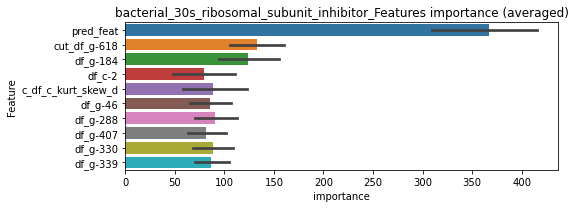

len(train_index) : 2841
len(valid_index) : 947
================================= fold 1/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000560386	valid_1's binary_logloss: 0.000961732
[2000]	training's binary_logloss: 0.000317158	valid_1's binary_logloss: 0.000651006
[3000]	training's binary_logloss: 0.000242553	valid_1's binary_logloss: 0.000544413
[4000]	training's binary_logloss: 0.000209504	valid_1's binary_logloss: 0.000489371
[5000]	training's binary_logloss: 0.000192961	valid_1's binary_logloss: 0.00045938
[6000]	training's binary_logloss: 0.000182197	valid_1's binary_logloss: 0.000440932
Early stopping, best iteration is:
[6694]	training's binary_logloss: 0.000176787	valid_1's binary_logloss: 0.000430777


len(train_index) : 2841
len(valid_index) : 947
================================= fold 2/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000558142	valid_1's binary_logloss: 0.00567298
Early stopping, best iteration is:
[1747]	training's binary_logloss: 0.00034955	valid_1's binary_logloss: 0.00536695


len(train_index) : 2841
len(valid_index) : 947
================================= fold 3/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000565959	valid_1's binary_logloss: 0.000800487
[2000]	training's binary_logloss: 0.0003215	valid_1's binary_logloss: 0.000514137
[3000]	training's binary_logloss: 0.000249505	valid_1's binary_logloss: 0.000415656
[4000]	training's binary_logloss: 0.000217447	valid_1's binary_logloss: 0.000371999
[5000]	training's binary_logloss: 0.000200928	valid_1's binary_logloss: 0.000345901
[6000]	training's binary_logloss: 0.000190436	valid_1's binary_logloss: 0.000330402
[7000]	training's binary_logloss: 0.000182406	valid_1's binary_logloss: 0.000317066
Early stopping, best iteration is:
[7273]	training's binary_logloss: 0.000180849	valid_1's binary_logloss: 0.000314716


len(train_index) : 2841
len(valid_index) : 947
================================= fold 4/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds


bacterial_30s_ribosomal_subunit_inhibitor logloss: 0.0028042621788466116


Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000750026	valid_1's binary_logloss: 0.00510321
neg labels: 3289 → selected neg labels: 3277


bacterial_50s_ribosomal_subunit_inhibitor, len(trt): 80, len(othr): 3277
target_rate: 0.0033594 → Adj_target_rate: 0.0034820
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00843361	valid_1's binary_logloss: 0.0534789
[600]	training's binary_logloss: 0.00135104	valid_1's binary_logloss: 0.0405105
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000986962	valid_1's binary_logloss: 0.0398109
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00888199	valid_1's binary_logloss: 0.0412166
[600]	training's binary_logloss: 0.00140128	valid_1's binary_logloss: 0.030097
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.00130864	valid_1's binary_logloss: 0.0298482
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00888359	valid_1's binary_logloss: 0.046531
[600]	training's binary_logloss: 0.00139153	valid_1's binary_logloss: 0.0326435
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.00144183	valid_1's binary_logloss: 0.0

1 / 3 AUC score:0.999
y_Threshold: 0.0116968, Threshold: 0.0369811, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 651/3792
p_label_rate: 0.0100452 Vs.target_rate: 0.00336
Num_p_label: 40.0, conf_0:0.02589, conf_1:0.04808
Num_p_label: 40.0, Expected: 13.4, Adj_threshold_1: 0.0369811
Num_p_label: 7.0, Expected: 13.4, Adj_threshold_2: 0.0869811
threshold: 0.0869811, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 651.0/3792, y_label_rate: 0.1716772
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139931	valid_1's binary_logloss: 0.00447933
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000350389	valid_1's binary_logloss: 0.0028024
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00137001	valid_1's binary_logloss: 0.00399345
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000339629	valid_1's binary_logloss: 0.00219668
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013717	valid_1's binary_logloss: 0.00419406
[600]	training's binary_logloss: 0.00024715	valid_1's binary_logloss: 0.00235299
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000229021	valid_1's binary_logloss: 0.00232304
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139454	valid_1's binary_logloss: 0.00472583


2 / 3 AUC score:1.000
y_Threshold: 0.4495600, Threshold: 0.0869811, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 650.0/3790
p_label_rate: 0.0552486 Vs.target_rate: 0.00336
Num_p_label: 220.0, conf_0:0.06958, conf_1:0.10438
Num_p_label: 220.0, Expected: 13.4, Adj_threshold_1: 0.0869811
Num_p_label: 220.0, Expected: 13.4, Adj_threshold_2: 0.1369811
Num_p_label: 211.0, Expected: 13.4, Adj_threshold_3: 0.1869811
Num_p_label: 193.0, Expected: 13.4, Adj_threshold_4: 0.2369811
Num_p_label: 150.0, Expected: 13.4, Adj_threshold_5: 0.2869811
Num_p_label: 100.0, Expected: 13.4, Adj_threshold_6: 0.3369811


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000278005	valid_1's binary_logloss: 0.00288052


Num_p_label: 69.0, Expected: 13.4, Adj_threshold_7: 0.3869811
Num_p_label: 51.0, Expected: 13.4, Adj_threshold_8: 0.4369811
Num_p_label: 40.0, Expected: 13.4, Adj_threshold_9: 0.4869811
Num_p_label: 32.0, Expected: 13.4, Adj_threshold_10: 0.5369811
threshold: 0.5869811, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 650.0/3790, y_label_rate: 0.1715040
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133114	valid_1's binary_logloss: 0.00538132
[600]	training's binary_logloss: 0.000243358	valid_1's binary_logloss: 0.00338392
Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000178901	valid_1's binary_logloss: 0.00325583
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132317	valid_1's binary_logloss: 0.00421889
[600]	training's binary_logloss: 0.000240911	valid_1's binary_logloss: 0.00223854
[900]	training's binary_logloss: 0.000170653	valid_1's binary_logloss: 0.00206835
Early stopping, best iteration is:
[1013]	training's binary_logloss: 0.000164111	valid_1's binary_logloss: 0.00204691
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139757	valid_1's binary_logloss: 0.00354639
[600]	training's binary_logloss: 0.000249506	valid_1's binary_logloss: 0.00190318
[900]	train

3 / 3 AUC score:1.000
y_Threshold: 0.2558227, Threshold: 0.5869811, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 648.0/3786
p_label_rate: 0.0067805 Vs.target_rate: 0.00336
Num_p_label: 27.0, conf_0:0.50000, conf_1:0.64568
Num_p_label: 27.0, Expected: 13.4, Adj_threshold_1: 0.5869811
Num_p_label: 27.0, Expected: 13.4, Adj_threshold_2: 0.6369811
Num_p_label: 25.0, Expected: 13.4, Adj_threshold_3: 0.6869811
Num_p_label: 22.0, Expected: 13.4, Adj_threshold_4: 0.7369811
Num_p_label: 20.0, Expected: 13.4, Adj_threshold_5: 0.7869811
threshold: 0.7869811, positive_p_label: 20.0/3982, p_label_rate: 0.0050226


positive_y_label: 648.0/3786, y_label_rate: 0.1711569


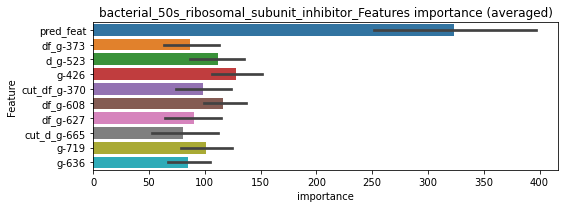

len(train_index) : 2839
len(valid_index) : 947
================================= fold 1/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000571816	valid_1's binary_logloss: 0.00153058
Early stopping, best iteration is:
[1740]	training's binary_logloss: 0.000354457	valid_1's binary_logloss: 0.00123416


len(train_index) : 2839
len(valid_index) : 947
================================= fold 2/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000565982	valid_1's binary_logloss: 0.00148741
[2000]	training's binary_logloss: 0.000320811	valid_1's binary_logloss: 0.00108197
[3000]	training's binary_logloss: 0.000249542	valid_1's binary_logloss: 0.000937602
[4000]	training's binary_logloss: 0.000216219	valid_1's binary_logloss: 0.000866753
Early stopping, best iteration is:
[4963]	training's binary_logloss: 0.000198419	valid_1's binary_logloss: 0.000822862


len(train_index) : 2840
len(valid_index) : 946
================================= fold 3/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000555378	valid_1's binary_logloss: 0.00392122
Early stopping, best iteration is:
[1499]	training's binary_logloss: 0.000386276	valid_1's binary_logloss: 0.00375524


len(train_index) : 2840
len(valid_index) : 946
================================= fold 4/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds


bacterial_50s_ribosomal_subunit_inhibitor logloss: 0.002515453122414451


Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000902346	valid_1's binary_logloss: 0.00424951
neg labels: 3289 → selected neg labels: 3286


bacterial_antifolate, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00291028	valid_1's binary_logloss: 0.0127473
[600]	training's binary_logloss: 0.000624865	valid_1's binary_logloss: 0.0074533
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.00056147	valid_1's binary_logloss: 0.00737748
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00290524	valid_1's binary_logloss: 0.017363
[600]	training's binary_logloss: 0.000608721	valid_1's binary_logloss: 0.0107848
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.00053578	valid_1's binary_logloss: 0.010429
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00296547	valid_1's binary_logloss: 0.00886225
[600]	training's binary_logloss: 0.000635304	valid_1's binary_logloss: 0.00390047
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000546065	valid_1's binary_loglos

1 / 3 AUC score:1.000
y_Threshold: 0.0039381, Threshold: 0.0383059, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.02681, conf_1:0.04980
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0383059
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_2: 0.0883059
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_3: 0.1383059
threshold: 0.1383059, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000891333	valid_1's binary_logloss: 0.00319289
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000229629	valid_1's binary_logloss: 0.0023468
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000832771	valid_1's binary_logloss: 0.00177251
[600]	training's binary_logloss: 0.000202873	valid_1's binary_logloss: 0.000757139
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000200944	valid_1's binary_logloss: 0.000752386
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000852153	valid_1's binary_logloss: 0.00251159
[600]	training's binary_logloss: 0.00020383	valid_1's binary_logloss: 0.00161293
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.00020711	valid_1's binary_logloss: 0.00160559
Training until validation scores don't improve for 30 rou

2 / 3 AUC score:1.000
y_Threshold: 0.6874848, Threshold: 0.1383059, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0467102 Vs.target_rate: 0.00151
Num_p_label: 186.0, conf_0:0.11064, conf_1:0.16597
Num_p_label: 186.0, Expected: 6.0, Adj_threshold_1: 0.1383059
Num_p_label: 186.0, Expected: 6.0, Adj_threshold_2: 0.1883059
Num_p_label: 186.0, Expected: 6.0, Adj_threshold_3: 0.2383059
Num_p_label: 186.0, Expected: 6.0, Adj_threshold_4: 0.2883059
Num_p_label: 185.0, Expected: 6.0, Adj_threshold_5: 0.3383059
Num_p_label: 185.0, Expected: 6.0, Adj_threshold_6: 0.3883059
Num_p_label: 185.0, Expected: 6.0, Adj_threshold_7: 0.4383059
Num_p_label: 185.0, Expected: 6.0, Adj_threshold_8: 0.4883059


Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000159846	valid_1's binary_logloss: 0.000571393


Num_p_label: 183.0, Expected: 6.0, Adj_threshold_9: 0.5383059
Num_p_label: 178.0, Expected: 6.0, Adj_threshold_10: 0.5883059
threshold: 0.6383059, positive_p_label: 157.0/3982, p_label_rate: 0.0394274
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000886975	valid_1's binary_logloss: 0.00298394
[600]	training's binary_logloss: 0.000210151	valid_1's binary_logloss: 0.00212679
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000193048	valid_1's binary_logloss: 0.00210363
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000824515	valid_1's binary_logloss: 0.00203823
[600]	training's binary_logloss: 0.000200504	valid_1's binary_logloss: 0.000999366
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000175567	valid_1's binary_logloss: 0.000960476
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000833907	valid_1's binary_logloss: 0.00237136
[600]	training's binary_logloss: 0.000203082	valid_1's binary_logloss: 0.00158128
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.00019901	valid_1's 

3 / 3 AUC score:1.000
y_Threshold: 0.7026651, Threshold: 0.6383059, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0339026 Vs.target_rate: 0.00151
Num_p_label: 135.0, conf_0:0.50000, conf_1:0.70214
Num_p_label: 135.0, Expected: 6.0, Adj_threshold_1: 0.6383059
Num_p_label: 106.0, Expected: 6.0, Adj_threshold_2: 0.6883059
Num_p_label: 77.0, Expected: 6.0, Adj_threshold_3: 0.7383059
Num_p_label: 54.0, Expected: 6.0, Adj_threshold_4: 0.7883059
threshold: 0.7883059, positive_p_label: 54.0/3982, p_label_rate: 0.0135610


Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000160034	valid_1's binary_logloss: 0.000608046


positive_y_label: 657.0/3811, y_label_rate: 0.1723957


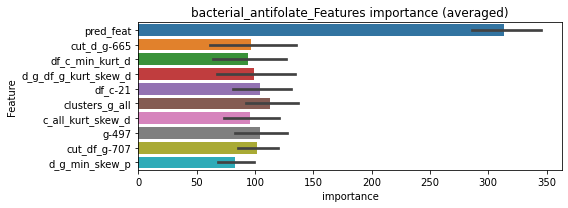

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000512839	valid_1's binary_logloss: 0.00290637
[2000]	training's binary_logloss: 0.000297547	valid_1's binary_logloss: 0.00262489
Early stopping, best iteration is:
[2277]	training's binary_logloss: 0.000275337	valid_1's binary_logloss: 0.00259335


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000497256	valid_1's binary_logloss: 0.00127994
Early stopping, best iteration is:
[1628]	training's binary_logloss: 0.000332651	valid_1's binary_logloss: 0.00108487


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000498641	valid_1's binary_logloss: 0.0018457
[2000]	training's binary_logloss: 0.000296264	valid_1's binary_logloss: 0.00156485
Early stopping, best iteration is:
[2559]	training's binary_logloss: 0.000254667	valid_1's binary_logloss: 0.00151294


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000499611	valid_1's binary_logloss: 0.00112307
[2000]	training's binary_logloss: 0.000292897	valid_1's binary_logloss: 0.000844451
Early stopping, best iteration is:
[2461]	training's binary_logloss: 0.000259455	valid_1's binary_logloss: 0.000799368


bacterial_antifolate logloss: 0.001498708102338814


neg labels: 3289 → selected neg labels: 3268


bacterial_cell_wall_synthesis_inhibitor, len(trt): 192, len(othr): 3268
target_rate: 0.0080625 → Adj_target_rate: 0.0073283
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0238931	valid_1's binary_logloss: 0.185977
Early stopping, best iteration is:
[365]	training's binary_logloss: 0.014998	valid_1's binary_logloss: 0.183873
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0243891	valid_1's binary_logloss: 0.15977
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.00748095	valid_1's binary_logloss: 0.152117
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0273994	valid_1's binary_logloss: 0.157587
Early stopping, best iteration is:
[429]	training's binary_logloss: 0.0111191	valid_1's binary_logloss: 0.147411
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.025391	valid_1's binary_logloss: 0.145793


1 / 3 AUC score:0.962
y_Threshold: 0.0482712, Threshold: 0.2158189, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[519]	training's binary_logloss: 0.00604939	valid_1's binary_logloss: 0.133114


Remove_noisy_data: 272 → Positive_corect_labels: 583/3649
p_label_rate: 0.0100452 Vs.target_rate: 0.00806
Num_p_label: 40.0, conf_0:0.15107, conf_1:0.28056
threshold: 0.2158189, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 583.0/3649, y_label_rate: 0.1597698
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176325	valid_1's binary_logloss: 0.00793182
Early stopping, best iteration is:
[433]	training's binary_logloss: 0.000585517	valid_1's binary_logloss: 0.00570481
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00175438	valid_1's binary_logloss: 0.00594961
[600]	training's binary_logloss: 0.000270197	valid_1's binary_logloss: 0.00258296
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000239311	valid_1's binary_logloss: 0.00252013
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00182165	valid_1's binary_logloss: 0.00506139
[600]	training's binary_logloss: 0.00027081	valid_1's binary_logloss: 0.00201871
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000238378	valid_1's binary_logloss: 0.00191479
Training until validation scores don't improve for 30 rounds

2 / 3 AUC score:1.000
y_Threshold: 0.5571592, Threshold: 0.2158189, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 580.0/3643
p_label_rate: 0.0688096 Vs.target_rate: 0.00806
Num_p_label: 274.0, conf_0:0.17266, conf_1:0.25898
Num_p_label: 274.0, Expected: 32.1, Adj_threshold_1: 0.2158189
Num_p_label: 274.0, Expected: 32.1, Adj_threshold_2: 0.2658189
Num_p_label: 274.0, Expected: 32.1, Adj_threshold_3: 0.3158189
Num_p_label: 274.0, Expected: 32.1, Adj_threshold_4: 0.3658189
Num_p_label: 274.0, Expected: 32.1, Adj_threshold_5: 0.4158189
Num_p_label: 274.0, Expected: 32.1, Adj_threshold_6: 0.4658189


[900]	training's binary_logloss: 0.000172411	valid_1's binary_logloss: 0.00180527
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000175464	valid_1's binary_logloss: 0.00178663


Num_p_label: 273.0, Expected: 32.1, Adj_threshold_7: 0.5158189
Num_p_label: 273.0, Expected: 32.1, Adj_threshold_8: 0.5658189
Num_p_label: 268.0, Expected: 32.1, Adj_threshold_9: 0.6158189
Num_p_label: 258.0, Expected: 32.1, Adj_threshold_10: 0.6658189
threshold: 0.7158189, positive_p_label: 251.0/3982, p_label_rate: 0.0630337
positive_y_label: 580.0/3643, y_label_rate: 0.1592094
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00180304	valid_1's binary_logloss: 0.0094496
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000357378	valid_1's binary_logloss: 0.00549841
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00180138	valid_1's binary_logloss: 0.00604234
[600]	training's binary_logloss: 0.000273367	valid_1's binary_logloss: 0.00223458
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000209888	valid_1's binary_logloss: 0.00207073
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00180521	valid_1's binary_logloss: 0.00394393
[600]	training's binary_logloss: 0.000278104	valid_1's binary_logloss: 0.00102577
[900]	training's binary_logloss: 0.000186802	valid_1's binary_logloss: 0.000819439
Early stopping, best iteration is:
[986]	training's binary_logloss: 0.00018106	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.4018274, Threshold: 0.7158189, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 577.0/3637
p_label_rate: 0.0575088 Vs.target_rate: 0.00806
Num_p_label: 229.0, conf_0:0.50000, conf_1:0.78740
Num_p_label: 229.0, Expected: 32.1, Adj_threshold_1: 0.7158189
Num_p_label: 223.0, Expected: 32.1, Adj_threshold_2: 0.7658189


[600]	training's binary_logloss: 0.000275465	valid_1's binary_logloss: 0.00299332
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000273837	valid_1's binary_logloss: 0.00297682


threshold: 0.7658189, positive_p_label: 223.0/3982, p_label_rate: 0.0560020
positive_y_label: 577.0/3637, y_label_rate: 0.1586472


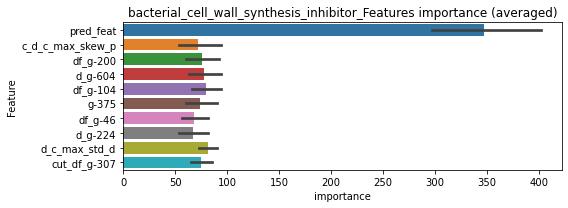

len(train_index) : 2727
len(valid_index) : 910
================================= fold 1/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000589333	valid_1's binary_logloss: 0.00185277
[2000]	training's binary_logloss: 0.000336129	valid_1's binary_logloss: 0.00143504
Early stopping, best iteration is:
[2185]	training's binary_logloss: 0.000317911	valid_1's binary_logloss: 0.0014108


len(train_index) : 2728
len(valid_index) : 909
================================= fold 2/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[923]	training's binary_logloss: 0.000647279	valid_1's binary_logloss: 0.00461166


len(train_index) : 2728
len(valid_index) : 909
================================= fold 3/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000612501	valid_1's binary_logloss: 0.00135757
[2000]	training's binary_logloss: 0.000345504	valid_1's binary_logloss: 0.000870204
[3000]	training's binary_logloss: 0.000266685	valid_1's binary_logloss: 0.000697889
[4000]	training's binary_logloss: 0.000230351	valid_1's binary_logloss: 0.000618698
Early stopping, best iteration is:
[4244]	training's binary_logloss: 0.000225232	valid_1's binary_logloss: 0.000607543


len(train_index) : 2728
len(valid_index) : 909
================================= fold 4/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000598924	valid_1's binary_logloss: 0.0036951
Early stopping, best iteration is:
[1627]	training's binary_logloss: 0.000389854	valid_1's binary_logloss: 0.00338193


bacterial_cell_wall_synthesis_inhibitor logloss: 0.0025030536036368747


neg labels: 3289 → selected neg labels: 3279


bacterial_dna_gyrase_inhibitor, len(trt): 89, len(othr): 3279
target_rate: 0.0037373 → Adj_target_rate: 0.0038122
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103719	valid_1's binary_logloss: 0.0519807
[600]	training's binary_logloss: 0.00159814	valid_1's binary_logloss: 0.0326174
[900]	training's binary_logloss: 0.000841856	valid_1's binary_logloss: 0.0294167
Early stopping, best iteration is:
[958]	training's binary_logloss: 0.000799376	valid_1's binary_logloss: 0.0291557
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00999176	valid_1's binary_logloss: 0.0576462
[600]	training's binary_logloss: 0.0015618	valid_1's binary_logloss: 0.041574
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.00110391	valid_1's binary_logloss: 0.040499
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00987723	valid_1's binary_logloss: 0.0603165
[600]	training's binary_logloss: 0.00154684	valid_1's binary_logloss: 0.0497581
Early stopping, best iteratio

1 / 3 AUC score:0.998
y_Threshold: 0.0122145, Threshold: 0.0313725, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 649/3790
p_label_rate: 0.0100452 Vs.target_rate: 0.00374
Num_p_label: 40.0, conf_0:0.02196, conf_1:0.04078
Num_p_label: 40.0, Expected: 14.9, Adj_threshold_1: 0.0313725
Num_p_label: 3.0, Expected: 14.9, Adj_threshold_2: 0.0813725
threshold: 0.0813725, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 649.0/3790, y_label_rate: 0.1712401
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138631	valid_1's binary_logloss: 0.00312418
[600]	training's binary_logloss: 0.000239029	valid_1's binary_logloss: 0.000815689
[900]	training's binary_logloss: 0.000168442	valid_1's binary_logloss: 0.000611428
Early stopping, best iteration is:
[970]	training's binary_logloss: 0.000163813	valid_1's binary_logloss: 0.000602089
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00143855	valid_1's binary_logloss: 0.00448495
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000268468	valid_1's binary_logloss: 0.00186275
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146395	valid_1's binary_logloss: 0.00727011
[600]	training's binary_logloss: 0.0002496	valid_1's binary_logloss: 0.0050096
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000244837	valid_1's bina

2 / 3 AUC score:1.000
y_Threshold: 0.2231155, Threshold: 0.0813725, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 645.0/3782
p_label_rate: 0.0507283 Vs.target_rate: 0.00374
Num_p_label: 202.0, conf_0:0.06510, conf_1:0.09765
Num_p_label: 202.0, Expected: 14.9, Adj_threshold_1: 0.0813725
Num_p_label: 196.0, Expected: 14.9, Adj_threshold_2: 0.1313725
Num_p_label: 184.0, Expected: 14.9, Adj_threshold_3: 0.1813725
Num_p_label: 172.0, Expected: 14.9, Adj_threshold_4: 0.2313725
Num_p_label: 169.0, Expected: 14.9, Adj_threshold_5: 0.2813725
Num_p_label: 165.0, Expected: 14.9, Adj_threshold_6: 0.3313725
Num_p_label: 163.0, Expected: 14.9, Adj_threshold_7: 0.3813725
Num_p_label: 158.0, Expected: 14.9, Adj_threshold_8: 0.4313725
Num_p_label: 157.0, Expected: 14.9, Adj_threshold_9: 0.4813725
Num_p_label: 157.0, Expected: 14.9, Adj_threshold_10: 0.5313725
threshold: 0.5813725, positive_p_label: 148.0/3982, p_label_rate: 0.0371673


Early stopping, best iteration is:
[348]	training's binary_logloss: 0.000903479	valid_1's binary_logloss: 0.00890839


positive_y_label: 645.0/3782, y_label_rate: 0.1705447
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126387	valid_1's binary_logloss: 0.0036709
Early stopping, best iteration is:
[411]	training's binary_logloss: 0.000509299	valid_1's binary_logloss: 0.00203724
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115042	valid_1's binary_logloss: 0.00265978
[600]	training's binary_logloss: 0.000169441	valid_1's binary_logloss: 0.000421757
[900]	training's binary_logloss: 0.000108198	valid_1's binary_logloss: 0.000270491
[1200]	training's binary_logloss: 0.000101861	valid_1's binary_logloss: 0.000254898
Early stopping, best iteration is:
[1237]	training's binary_logloss: 0.000101422	valid_1's binary_logloss: 0.000253608
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118538	valid_1's binary_logloss: 0.00476326
Early stopping, best iteration is:
[370]	training's binary_logloss: 0.00060281	valid_1's 

3 / 3 AUC score:1.000
y_Threshold: 0.7047111, Threshold: 0.5813725, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 644.0/3780
p_label_rate: 0.0439478 Vs.target_rate: 0.00374


[1200]	training's binary_logloss: 0.000101659	valid_1's binary_logloss: 0.000199994
Early stopping, best iteration is:
[1238]	training's binary_logloss: 0.000101193	valid_1's binary_logloss: 0.000198909


Num_p_label: 175.0, conf_0:0.50000, conf_1:0.63951
Num_p_label: 175.0, Expected: 14.9, Adj_threshold_1: 0.5813725
Num_p_label: 175.0, Expected: 14.9, Adj_threshold_2: 0.6313725
Num_p_label: 175.0, Expected: 14.9, Adj_threshold_3: 0.6813725
Num_p_label: 175.0, Expected: 14.9, Adj_threshold_4: 0.7313725
Num_p_label: 175.0, Expected: 14.9, Adj_threshold_5: 0.7813725
threshold: 0.7813725, positive_p_label: 175.0/3982, p_label_rate: 0.0439478
positive_y_label: 644.0/3780, y_label_rate: 0.1703704


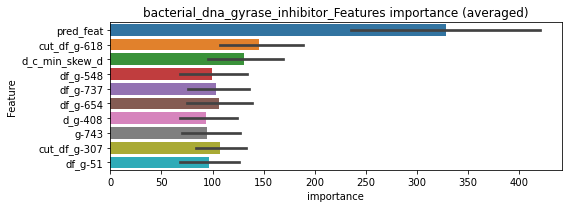

len(train_index) : 2835
len(valid_index) : 945
================================= fold 1/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2835
len(valid_index) : 945
================================= fold 2/4 bacterial_dna_gyrase_inhibitor=================================


Early stopping, best iteration is:
[810]	training's binary_logloss: 0.000672756	valid_1's binary_logloss: 0.00855534
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000563547	valid_1's binary_logloss: 0.00159271
Early stopping, best iteration is:
[1910]	training's binary_logloss: 0.000328843	valid_1's binary_logloss: 0.00125687


len(train_index) : 2835
len(valid_index) : 945
================================= fold 3/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[913]	training's binary_logloss: 0.000606535	valid_1's binary_logloss: 0.00173086


len(train_index) : 2835
len(valid_index) : 945
================================= fold 4/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00055619	valid_1's binary_logloss: 0.000834425
[2000]	training's binary_logloss: 0.000315638	valid_1's binary_logloss: 0.00047668
[3000]	training's binary_logloss: 0.000240234	valid_1's binary_logloss: 0.000355089
[4000]	training's binary_logloss: 0.00020431	valid_1's binary_logloss: 0.000295348
[5000]	training's binary_logloss: 0.000185015	valid_1's binary_logloss: 0.000263076
[6000]	training's binary_logloss: 0.00017231	valid_1's binary_logloss: 0.00024175
[7000]	training's binary_logloss: 0.000163036	valid_1's binary_logloss: 0.000226053
[8000]	training's binary_logloss: 0.000156159	valid_1's binary_logloss: 0.000213353
[9000]	training's binary_logloss: 0.000150724	valid_1's binary_logloss: 0.000203447
Early stopping, best iteration is:
[9133]	training's binary_logloss: 0.000150134	valid_1's binary_logloss: 0.000202348


bacterial_dna_gyrase_inhibitor logloss: 0.0029372354335737106


neg labels: 3289 → selected neg labels: 3274


bacterial_dna_inhibitor, len(trt): 115, len(othr): 3274
target_rate: 0.0048291 → Adj_target_rate: 0.0047401
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116615	valid_1's binary_logloss: 0.110151
Early stopping, best iteration is:
[404]	training's binary_logloss: 0.00506321	valid_1's binary_logloss: 0.105106
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129539	valid_1's binary_logloss: 0.0780017
[600]	training's binary_logloss: 0.00204042	valid_1's binary_logloss: 0.0640237
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00219658	valid_1's binary_logloss: 0.063815
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134028	valid_1's binary_logloss: 0.066185
[600]	training's binary_logloss: 0.00210486	valid_1's binary_logloss: 0.0511726
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.00144562	valid_1's binary_logloss: 0.050351
Training until validation scores don't improve for 30 rounds
[300]	training's bi

1 / 3 AUC score:0.992
y_Threshold: 0.0166926, Threshold: 0.0515389, pos_neg_ratio: 0.8000000
Remove_noisy_data: 174 → Positive_corect_labels: 633/3754
p_label_rate: 0.0100452 Vs.target_rate: 0.00483
Num_p_label: 40.0, conf_0:0.03608, conf_1:0.06700
Num_p_label: 40.0, Expected: 19.2, Adj_threshold_1: 0.0515389
Num_p_label: 12.0, Expected: 19.2, Adj_threshold_2: 0.1015389
threshold: 0.1015389, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 633.0/3754, y_label_rate: 0.1686201
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00140262	valid_1's binary_logloss: 0.00318299
[600]	training's binary_logloss: 0.000231045	valid_1's binary_logloss: 0.000653245
[900]	training's binary_logloss: 0.000161394	valid_1's binary_logloss: 0.000451022
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000161394	valid_1's binary_logloss: 0.000451022
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00147288	valid_1's binary_logloss: 0.0100846
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000348637	valid_1's binary_logloss: 0.00796724
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148539	valid_1's binary_logloss: 0.00758639
Early stopping, best iteration is:
[375]	training's binary_logloss: 0.000738726	valid_1's binary_logloss: 0.00677342
Training until validation scores don't improve for 30 rou

2 / 3 AUC score:1.000
y_Threshold: 0.1201927, Threshold: 0.1015389, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 630.0/3748
p_label_rate: 0.0472125 Vs.target_rate: 0.00483
Num_p_label: 188.0, conf_0:0.08123, conf_1:0.12185
Num_p_label: 188.0, Expected: 19.2, Adj_threshold_1: 0.1015389
Num_p_label: 152.0, Expected: 19.2, Adj_threshold_2: 0.1515389
Num_p_label: 134.0, Expected: 19.2, Adj_threshold_3: 0.2015389
Num_p_label: 133.0, Expected: 19.2, Adj_threshold_4: 0.2515389
Num_p_label: 130.0, Expected: 19.2, Adj_threshold_5: 0.3015389
Num_p_label: 118.0, Expected: 19.2, Adj_threshold_6: 0.3515389
Num_p_label: 110.0, Expected: 19.2, Adj_threshold_7: 0.4015389
Num_p_label: 109.0, Expected: 19.2, Adj_threshold_8: 0.4515389
Num_p_label: 109.0, Expected: 19.2, Adj_threshold_9: 0.5015389
Num_p_label: 100.0, Expected: 19.2, Adj_threshold_10: 0.5515389
threshold: 0.6015389, positive_p_label: 74.0/3982, p_label_rate: 0.0185836
positive_y_label: 630.0/3748, y_label_rate: 

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136835	valid_1's binary_logloss: 0.00366677
[600]	training's binary_logloss: 0.000222932	valid_1's binary_logloss: 0.00112101
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000172213	valid_1's binary_logloss: 0.000948795
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134872	valid_1's binary_logloss: 0.00285473
[600]	training's binary_logloss: 0.000217783	valid_1's binary_logloss: 0.000690117
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000224332	valid_1's binary_logloss: 0.000688921
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124618	valid_1's binary_logloss: 0.00264096
[600]	training's binary_logloss: 0.000174725	valid_1's binary_logloss: 0.000398264
[900]	training's binary_logloss: 0.000109646	valid_1's binary_logloss: 0.000251226
[1200]	

3 / 3 AUC score:1.000
y_Threshold: 0.0035161, Threshold: 0.6015389, pos_neg_ratio: 0.8000000


[300]	training's binary_logloss: 0.00125899	valid_1's binary_logloss: 0.0149812
Early stopping, best iteration is:
[323]	training's binary_logloss: 0.00105629	valid_1's binary_logloss: 0.014944


Remove_noisy_data: 2 → Positive_corect_labels: 629.0/3746
p_label_rate: 0.0441989 Vs.target_rate: 0.00483
Num_p_label: 176.0, conf_0:0.50000, conf_1:0.66169
Num_p_label: 176.0, Expected: 19.2, Adj_threshold_1: 0.6015389
Num_p_label: 176.0, Expected: 19.2, Adj_threshold_2: 0.6515389
Num_p_label: 141.0, Expected: 19.2, Adj_threshold_3: 0.7015389
Num_p_label: 105.0, Expected: 19.2, Adj_threshold_4: 0.7515389
threshold: 0.7515389, positive_p_label: 105.0/3982, p_label_rate: 0.0263687
positive_y_label: 629.0/3746, y_label_rate: 0.1679124


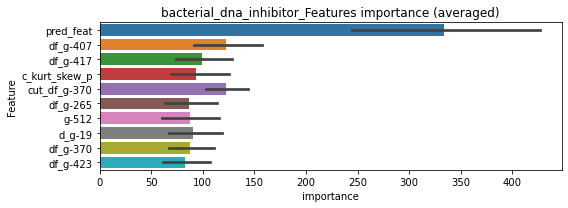

len(train_index) : 2809
len(valid_index) : 937
================================= fold 1/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000570281	valid_1's binary_logloss: 0.00182062
Early stopping, best iteration is:
[1388]	training's binary_logloss: 0.000423265	valid_1's binary_logloss: 0.00158349


len(train_index) : 2809
len(valid_index) : 937
================================= fold 2/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000560567	valid_1's binary_logloss: 0.00116399
[2000]	training's binary_logloss: 0.00031763	valid_1's binary_logloss: 0.000852089
[3000]	training's binary_logloss: 0.000241946	valid_1's binary_logloss: 0.00074134
[4000]	training's binary_logloss: 0.000205055	valid_1's binary_logloss: 0.000665484
[5000]	training's binary_logloss: 0.00018587	valid_1's binary_logloss: 0.000622105
Early stopping, best iteration is:
[5936]	training's binary_logloss: 0.000173946	valid_1's binary_logloss: 0.000595085


len(train_index) : 2810
len(valid_index) : 936
================================= fold 3/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[956]	training's binary_logloss: 0.000588811	valid_1's binary_logloss: 0.00181106


len(train_index) : 2810
len(valid_index) : 936
================================= fold 4/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds


bacterial_dna_inhibitor logloss: 0.0068500320803290635


Early stopping, best iteration is:
[476]	training's binary_logloss: 0.00118806	valid_1's binary_logloss: 0.023419
neg labels: 3289 → selected neg labels: 3286


bacterial_membrane_integrity_inhibitor, len(trt): 19, len(othr): 3286
target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126058	valid_1's binary_logloss: 0.00303419
[600]	training's binary_logloss: 0.000344293	valid_1's binary_logloss: 0.00121639
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000342746	valid_1's binary_logloss: 0.00120976
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122452	valid_1's binary_logloss: 0.00466958
[600]	training's binary_logloss: 0.000342642	valid_1's binary_logloss: 0.00243119
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000342642	valid_1's binary_logloss: 0.00243119
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001321	valid_1's binary_logloss: 0.00292306
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000356968	valid_1's binary_logloss: 0.00132751
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:1.000
y_Threshold: 0.0019696, Threshold: 0.0056483, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, conf_0:0.00395, conf_1:0.00734
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0056483
Num_p_label: 1.0, Expected: 3.2, Adj_threshold_2: 0.0556483
threshold: 0.0556483, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00056685	valid_1's binary_logloss: 0.000778557
[600]	training's binary_logloss: 0.000179717	valid_1's binary_logloss: 0.000287577
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000156526	valid_1's binary_logloss: 0.000254934
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000545064	valid_1's binary_logloss: 0.0020238
[600]	training's binary_logloss: 0.00017288	valid_1's binary_logloss: 0.00133294
[900]	training's binary_logloss: 0.000146672	valid_1's binary_logloss: 0.00129514
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000146672	valid_1's binary_logloss: 0.00129514
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000553684	valid_1's binary_logloss: 0.000562171
[600]	training's binary_logloss: 0.000174738	valid_1's binary_logloss: 0.000178058
[900]	t

2 / 3 AUC score:1.000
y_Threshold: 0.6137933, Threshold: 0.0556483, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0406831 Vs.target_rate: 0.00080
Num_p_label: 162.0, conf_0:0.04452, conf_1:0.06678
Num_p_label: 162.0, Expected: 3.2, Adj_threshold_1: 0.0556483
Num_p_label: 162.0, Expected: 3.2, Adj_threshold_2: 0.1056483
Num_p_label: 162.0, Expected: 3.2, Adj_threshold_3: 0.1556483
Num_p_label: 162.0, Expected: 3.2, Adj_threshold_4: 0.2056483
Num_p_label: 162.0, Expected: 3.2, Adj_threshold_5: 0.2556483
Num_p_label: 161.0, Expected: 3.2, Adj_threshold_6: 0.3056483
Num_p_label: 156.0, Expected: 3.2, Adj_threshold_7: 0.3556483
Num_p_label: 141.0, Expected: 3.2, Adj_threshold_8: 0.4056483
Num_p_label: 118.0, Expected: 3.2, Adj_threshold_9: 0.4556483
Num_p_label: 97.0, Expected: 3.2, Adj_threshold_10: 0.5056483


[600]	training's binary_logloss: 0.000174653	valid_1's binary_logloss: 0.00215829
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000179982	valid_1's binary_logloss: 0.00215583


threshold: 0.5556483, positive_p_label: 74.0/3982, p_label_rate: 0.0185836
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000567176	valid_1's binary_logloss: 0.000786225
[600]	training's binary_logloss: 0.000179436	valid_1's binary_logloss: 0.000293577
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000156513	valid_1's binary_logloss: 0.000259911
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000542398	valid_1's binary_logloss: 0.00191719
[600]	training's binary_logloss: 0.000172471	valid_1's binary_logloss: 0.00128793
[900]	training's binary_logloss: 0.000146246	valid_1's binary_logloss: 0.001252
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000146246	valid_1's binary_logloss: 0.001252
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00057066	valid_1's binary_logloss: 0.00052726
[600]	training's binary_logloss: 0.000174013	valid_1's binary_logloss: 0.000141235
[900]	trai

3 / 3 AUC score:1.000
y_Threshold: 0.6413806, Threshold: 0.5556483, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0155701 Vs.target_rate: 0.00080
Num_p_label: 62.0, conf_0:0.50000, conf_1:0.61121
Num_p_label: 62.0, Expected: 3.2, Adj_threshold_1: 0.5556483
Num_p_label: 47.0, Expected: 3.2, Adj_threshold_2: 0.6056483
Num_p_label: 31.0, Expected: 3.2, Adj_threshold_3: 0.6556483
Num_p_label: 16.0, Expected: 3.2, Adj_threshold_4: 0.7056483
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_5: 0.7556483


[600]	training's binary_logloss: 0.000173329	valid_1's binary_logloss: 0.0022237
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000174466	valid_1's binary_logloss: 0.00222182


threshold: 0.7556483, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


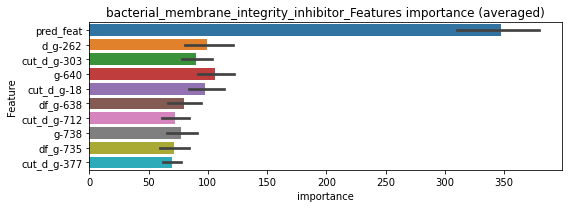

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000434952	valid_1's binary_logloss: 0.000585623
[2000]	training's binary_logloss: 0.000263654	valid_1's binary_logloss: 0.000400806
[3000]	training's binary_logloss: 0.00021505	valid_1's binary_logloss: 0.000340568
[4000]	training's binary_logloss: 0.000192349	valid_1's binary_logloss: 0.000311255
[5000]	training's binary_logloss: 0.000180332	valid_1's binary_logloss: 0.000294777
Early stopping, best iteration is:
[5732]	training's binary_logloss: 0.000174208	valid_1's binary_logloss: 0.000286227


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000418881	valid_1's binary_logloss: 0.00129921
[2000]	training's binary_logloss: 0.000258253	valid_1's binary_logloss: 0.00106947
[3000]	training's binary_logloss: 0.000210691	valid_1's binary_logloss: 0.000997653
[4000]	training's binary_logloss: 0.00018738	valid_1's binary_logloss: 0.000957491
[5000]	training's binary_logloss: 0.000174851	valid_1's binary_logloss: 0.000936266
[6000]	training's binary_logloss: 0.000166528	valid_1's binary_logloss: 0.000920933
Early stopping, best iteration is:
[5996]	training's binary_logloss: 0.000166606	valid_1's binary_logloss: 0.000920842


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000430946	valid_1's binary_logloss: 0.000376418
[2000]	training's binary_logloss: 0.000260541	valid_1's binary_logloss: 0.000218095
[3000]	training's binary_logloss: 0.000211953	valid_1's binary_logloss: 0.000170584
[4000]	training's binary_logloss: 0.00018887	valid_1's binary_logloss: 0.000147308
[5000]	training's binary_logloss: 0.000176288	valid_1's binary_logloss: 0.000134805
[6000]	training's binary_logloss: 0.000167841	valid_1's binary_logloss: 0.000126445
[7000]	training's binary_logloss: 0.000161717	valid_1's binary_logloss: 0.000120519
[8000]	training's binary_logloss: 0.000157119	valid_1's binary_logloss: 0.000115975
Early stopping, best iteration is:
[8502]	training's binary_logloss: 0.000155226	valid_1's binary_logloss: 0.000114116


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000424851	valid_1's binary_logloss: 0.00275965
[2000]	training's binary_logloss: 0.000257277	valid_1's binary_logloss: 0.00246491
Early stopping, best iteration is:
[2504]	training's binary_logloss: 0.000227017	valid_1's binary_logloss: 0.00243432


bacterial_membrane_integrity_inhibitor logloss: 0.0009386313181671545


neg labels: 3289 → selected neg labels: 3282


bcl_inhibitor, len(trt): 31, len(othr): 3282
target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00245207	valid_1's binary_logloss: 0.0176794
[600]	training's binary_logloss: 0.000518834	valid_1's binary_logloss: 0.0130161
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000512472	valid_1's binary_logloss: 0.0129581
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00257003	valid_1's binary_logloss: 0.00509089
[600]	training's binary_logloss: 0.000534187	valid_1's binary_logloss: 0.00157397
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000487979	valid_1's binary_logloss: 0.00147321
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00250928	valid_1's binary_logloss: 0.00514719
[600]	training's binary_logloss: 0.000531453	valid_1's binary_logloss: 0.00185462
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000507035	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0040778, Threshold: 0.0250935, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, conf_0:0.01757, conf_1:0.03262
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_1: 0.0250935
Num_p_label: 11.0, Expected: 5.2, Adj_threshold_2: 0.0750935
threshold: 0.0750935, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000782407	valid_1's binary_logloss: 0.00604469
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000231655	valid_1's binary_logloss: 0.004865
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000816861	valid_1's binary_logloss: 0.0013599
[600]	training's binary_logloss: 0.000198465	valid_1's binary_logloss: 0.000730222
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000203116	valid_1's binary_logloss: 0.000724332
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000840537	valid_1's binary_logloss: 0.000841176
[600]	training's binary_logloss: 0.000207077	valid_1's binary_logloss: 0.000177336
[900]	training's binary_logloss: 0.000164864	valid_1's binary_logloss: 0.000127828
Early stopping, best iteration is:
[963]	training's binary_logloss: 0.00016233	valid_1's 

2 / 3 AUC score:1.000
y_Threshold: 0.5240787, Threshold: 0.0750935, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0565043 Vs.target_rate: 0.00130
Num_p_label: 225.0, conf_0:0.06007, conf_1:0.09011
Num_p_label: 225.0, Expected: 5.2, Adj_threshold_1: 0.0750935
Num_p_label: 223.0, Expected: 5.2, Adj_threshold_2: 0.1250935
Num_p_label: 220.0, Expected: 5.2, Adj_threshold_3: 0.1750935
Num_p_label: 220.0, Expected: 5.2, Adj_threshold_4: 0.2250935
Num_p_label: 220.0, Expected: 5.2, Adj_threshold_5: 0.2750935
Num_p_label: 220.0, Expected: 5.2, Adj_threshold_6: 0.3250935
Num_p_label: 210.0, Expected: 5.2, Adj_threshold_7: 0.3750935
Num_p_label: 194.0, Expected: 5.2, Adj_threshold_8: 0.4250935
Num_p_label: 180.0, Expected: 5.2, Adj_threshold_9: 0.4750935
Num_p_label: 162.0, Expected: 5.2, Adj_threshold_10: 0.5250935


Early stopping, best iteration is:
[434]	training's binary_logloss: 0.000308359	valid_1's binary_logloss: 0.00378866


threshold: 0.5750935, positive_p_label: 139.0/3982, p_label_rate: 0.0349071
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0008187	valid_1's binary_logloss: 0.00196431
[600]	training's binary_logloss: 0.000210888	valid_1's binary_logloss: 0.00104038
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.00018136	valid_1's binary_logloss: 0.000986688
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000826673	valid_1's binary_logloss: 0.00347307
Early stopping, best iteration is:
[416]	training's binary_logloss: 0.000346451	valid_1's binary_logloss: 0.00266881
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000811917	valid_1's binary_logloss: 0.00165427
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000222486	valid_1's binary_logloss: 0.000952548
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000815098	valid_1's binary_logloss: 0.00248

3 / 3 AUC score:1.000
y_Threshold: 0.4884918, Threshold: 0.5750935, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0077850 Vs.target_rate: 0.00130
Num_p_label: 31.0, conf_0:0.50000, conf_1:0.63260
Num_p_label: 31.0, Expected: 5.2, Adj_threshold_1: 0.5750935
Num_p_label: 24.0, Expected: 5.2, Adj_threshold_2: 0.6250935
Num_p_label: 19.0, Expected: 5.2, Adj_threshold_3: 0.6750935
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_4: 0.7250935
threshold: 0.7250935, positive_p_label: 12.0/3982, p_label_rate: 0.0030136


Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000231122	valid_1's binary_logloss: 0.00178464


positive_y_label: 653.0/3800, y_label_rate: 0.1718421


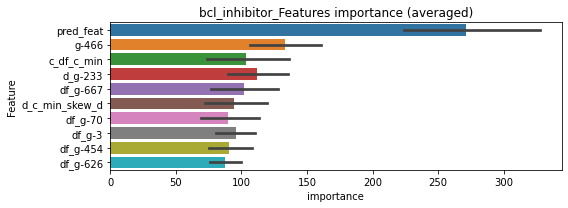

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000540102	valid_1's binary_logloss: 0.0040307


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000475594	valid_1's binary_logloss: 0.0033001
[2000]	training's binary_logloss: 0.000283841	valid_1's binary_logloss: 0.00301895
Early stopping, best iteration is:
[2288]	training's binary_logloss: 0.000263496	valid_1's binary_logloss: 0.0029763


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000488509	valid_1's binary_logloss: 0.000579624
[2000]	training's binary_logloss: 0.000292474	valid_1's binary_logloss: 0.000363174
[3000]	training's binary_logloss: 0.000236326	valid_1's binary_logloss: 0.000293229
[4000]	training's binary_logloss: 0.000209824	valid_1's binary_logloss: 0.000260821
[5000]	training's binary_logloss: 0.000196332	valid_1's binary_logloss: 0.000243888
[6000]	training's binary_logloss: 0.000186924	valid_1's binary_logloss: 0.000233341
[7000]	training's binary_logloss: 0.000180129	valid_1's binary_logloss: 0.000224867
[8000]	training's binary_logloss: 0.000175156	valid_1's binary_logloss: 0.000218803
Early stopping, best iteration is:
[8733]	training's binary_logloss: 0.000172277	valid_1's binary_logloss: 0.00021542


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000491983	valid_1's binary_logloss: 0.00045148
[2000]	training's binary_logloss: 0.000292544	valid_1's binary_logloss: 0.000255985
[3000]	training's binary_logloss: 0.000235271	valid_1's binary_logloss: 0.000196085
[4000]	training's binary_logloss: 0.000208226	valid_1's binary_logloss: 0.000166933
[5000]	training's binary_logloss: 0.000194722	valid_1's binary_logloss: 0.000151769
[6000]	training's binary_logloss: 0.000185281	valid_1's binary_logloss: 0.000141401
[7000]	training's binary_logloss: 0.000178418	valid_1's binary_logloss: 0.000134044
[8000]	training's binary_logloss: 0.000173604	valid_1's binary_logloss: 0.000128889
Early stopping, best iteration is:
[8400]	training's binary_logloss: 0.000171733	valid_1's binary_logloss: 0.00012696


bcl_inhibitor logloss: 0.0018377245733120081


neg labels: 3289 → selected neg labels: 3285


bcr-abl_inhibitor, len(trt): 38, len(othr): 3285
target_rate: 0.0015957 → Adj_target_rate: 0.0018493
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00284515	valid_1's binary_logloss: 0.0103398
[600]	training's binary_logloss: 0.000617708	valid_1's binary_logloss: 0.00494404
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000555338	valid_1's binary_logloss: 0.00480758
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00267075	valid_1's binary_logloss: 0.0227905
[600]	training's binary_logloss: 0.000588598	valid_1's binary_logloss: 0.0177456
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000548306	valid_1's binary_logloss: 0.0176682
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0028657	valid_1's binary_logloss: 0.00728132
[600]	training's binary_logloss: 0.000621074	valid_1's binary_logloss: 0.00363241
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000558497	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0038523, Threshold: 0.0465733, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00160
Num_p_label: 40.0, conf_0:0.03260, conf_1:0.06055
Num_p_label: 40.0, Expected: 6.4, Adj_threshold_1: 0.0465733
Num_p_label: 24.0, Expected: 6.4, Adj_threshold_2: 0.0965733
Num_p_label: 16.0, Expected: 6.4, Adj_threshold_3: 0.1465733
Num_p_label: 11.0, Expected: 6.4, Adj_threshold_4: 0.1965733
threshold: 0.1965733, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000874328	valid_1's binary_logloss: 0.00264197
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000320352	valid_1's binary_logloss: 0.00193416
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000806224	valid_1's binary_logloss: 0.00538475
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.00021452	valid_1's binary_logloss: 0.0044863
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000840275	valid_1's binary_logloss: 0.000968485
[600]	training's binary_logloss: 0.000203323	valid_1's binary_logloss: 0.000202346
[900]	training's binary_logloss: 0.00015816	valid_1's binary_logloss: 0.000144183
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000156422	valid_1's binary_logloss: 0.000141916
Training until validation scores don't improve for 30 r

2 / 3 AUC score:1.000
y_Threshold: 0.6051077, Threshold: 0.1965733, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0582622 Vs.target_rate: 0.00160
Num_p_label: 232.0, conf_0:0.15726, conf_1:0.23589
Num_p_label: 232.0, Expected: 6.4, Adj_threshold_1: 0.1965733
Num_p_label: 232.0, Expected: 6.4, Adj_threshold_2: 0.2465733
Num_p_label: 232.0, Expected: 6.4, Adj_threshold_3: 0.2965733


[600]	training's binary_logloss: 0.000199783	valid_1's binary_logloss: 0.00262277
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000191648	valid_1's binary_logloss: 0.0026105


Num_p_label: 232.0, Expected: 6.4, Adj_threshold_4: 0.3465733
Num_p_label: 232.0, Expected: 6.4, Adj_threshold_5: 0.3965733
Num_p_label: 231.0, Expected: 6.4, Adj_threshold_6: 0.4465733
Num_p_label: 230.0, Expected: 6.4, Adj_threshold_7: 0.4965733
Num_p_label: 229.0, Expected: 6.4, Adj_threshold_8: 0.5465733
Num_p_label: 220.0, Expected: 6.4, Adj_threshold_9: 0.5965733
Num_p_label: 208.0, Expected: 6.4, Adj_threshold_10: 0.6465733
threshold: 0.6965733, positive_p_label: 184.0/3982, p_label_rate: 0.0462079
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000843347	valid_1's binary_logloss: 0.00361444
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000244438	valid_1's binary_logloss: 0.00269595
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000876357	valid_1's binary_logloss: 0.00249492
[600]	training's binary_logloss: 0.000215205	valid_1's binary_logloss: 0.00129092
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000210772	valid_1's binary_logloss: 0.00127083
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000881838	valid_1's binary_logloss: 0.00215479
[600]	training's binary_logloss: 0.000216497	valid_1's binary_logloss: 0.00111915
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000197923	valid_1's binary_logloss: 0.00107942
Training until validation scores don't improve for 30 ro

3 / 3 AUC score:1.000
y_Threshold: 0.5976239, Threshold: 0.6965733, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0148167 Vs.target_rate: 0.00160
Num_p_label: 59.0, conf_0:0.50000, conf_1:0.76623
Num_p_label: 59.0, Expected: 6.4, Adj_threshold_1: 0.6965733
Num_p_label: 43.0, Expected: 6.4, Adj_threshold_2: 0.7465733
Num_p_label: 30.0, Expected: 6.4, Adj_threshold_3: 0.7965733
threshold: 0.7965733, positive_p_label: 30.0/3982, p_label_rate: 0.0075339


Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000283378	valid_1's binary_logloss: 0.00324786


positive_y_label: 653.0/3802, y_label_rate: 0.1717517


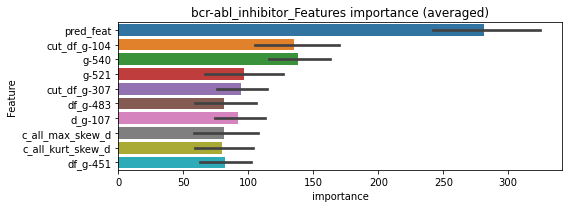

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000523641	valid_1's binary_logloss: 0.00263922
Early stopping, best iteration is:
[1732]	training's binary_logloss: 0.000333884	valid_1's binary_logloss: 0.00235971


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000525153	valid_1's binary_logloss: 0.0032136
Early stopping, best iteration is:
[1598]	training's binary_logloss: 0.000352807	valid_1's binary_logloss: 0.00286566


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000521314	valid_1's binary_logloss: 0.00188212
Early stopping, best iteration is:
[1741]	training's binary_logloss: 0.000331884	valid_1's binary_logloss: 0.00164195


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000525821	valid_1's binary_logloss: 0.00202427
Early stopping, best iteration is:
[1300]	training's binary_logloss: 0.000419327	valid_1's binary_logloss: 0.0018634


bcr-abl_inhibitor logloss: 0.0021838707883662335


neg labels: 3289 → selected neg labels: 3280


benzodiazepine_receptor_agonist, len(trt): 67, len(othr): 3280
target_rate: 0.0028135 → Adj_target_rate: 0.0029948
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00652818	valid_1's binary_logloss: 0.0482566
[600]	training's binary_logloss: 0.00106719	valid_1's binary_logloss: 0.0349146
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000919598	valid_1's binary_logloss: 0.0344715
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00672825	valid_1's binary_logloss: 0.0313504
[600]	training's binary_logloss: 0.00110606	valid_1's binary_logloss: 0.0179261
[900]	training's binary_logloss: 0.000661263	valid_1's binary_logloss: 0.016353
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000661263	valid_1's binary_logloss: 0.016353
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00721554	valid_1's binary_logloss: 0.0342242
[600]	training's binary_logloss: 0.00115107	valid_1's binary_logloss: 0.0258397
Early stopping, best itera

1 / 3 AUC score:0.999
y_Threshold: 0.0079924, Threshold: 0.0197041, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00281
Num_p_label: 40.0, conf_0:0.01379, conf_1:0.02562
Num_p_label: 40.0, Expected: 11.2, Adj_threshold_1: 0.0197041
Num_p_label: 4.0, Expected: 11.2, Adj_threshold_2: 0.0697041
threshold: 0.0697041, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128317	valid_1's binary_logloss: 0.00625973
[600]	training's binary_logloss: 0.000239728	valid_1's binary_logloss: 0.00453197
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000233945	valid_1's binary_logloss: 0.00450801
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131133	valid_1's binary_logloss: 0.00527158
Early stopping, best iteration is:
[429]	training's binary_logloss: 0.000468608	valid_1's binary_logloss: 0.00373563
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00129122	valid_1's binary_logloss: 0.00568626
Early stopping, best iteration is:
[346]	training's binary_logloss: 0.000804433	valid_1's binary_logloss: 0.00531634
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131397	valid_1's binary_logloss: 0.0029321


2 / 3 AUC score:1.000
y_Threshold: 0.5934335, Threshold: 0.0697041, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 649.0/3790
p_label_rate: 0.0416876 Vs.target_rate: 0.00281
Num_p_label: 166.0, conf_0:0.05576, conf_1:0.08364
Num_p_label: 166.0, Expected: 11.2, Adj_threshold_1: 0.0697041
Num_p_label: 166.0, Expected: 11.2, Adj_threshold_2: 0.1197041
Num_p_label: 165.0, Expected: 11.2, Adj_threshold_3: 0.1697041
Num_p_label: 165.0, Expected: 11.2, Adj_threshold_4: 0.2197041
Num_p_label: 163.0, Expected: 11.2, Adj_threshold_5: 0.2697041
Num_p_label: 162.0, Expected: 11.2, Adj_threshold_6: 0.3197041


[600]	training's binary_logloss: 0.000241948	valid_1's binary_logloss: 0.00164479
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000242982	valid_1's binary_logloss: 0.00164384


Num_p_label: 161.0, Expected: 11.2, Adj_threshold_7: 0.3697041
Num_p_label: 159.0, Expected: 11.2, Adj_threshold_8: 0.4197041
Num_p_label: 151.0, Expected: 11.2, Adj_threshold_9: 0.4697041
Num_p_label: 133.0, Expected: 11.2, Adj_threshold_10: 0.5197041
threshold: 0.5697041, positive_p_label: 112.0/3982, p_label_rate: 0.0281266
positive_y_label: 649.0/3790, y_label_rate: 0.1712401
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122804	valid_1's binary_logloss: 0.00276579
[600]	training's binary_logloss: 0.000232032	valid_1's binary_logloss: 0.000947035
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000225151	valid_1's binary_logloss: 0.000931782
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124726	valid_1's binary_logloss: 0.0059764
Early stopping, best iteration is:
[386]	training's binary_logloss: 0.000581029	valid_1's binary_logloss: 0.00487465
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127481	valid_1's binary_logloss: 0.00387486
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000315823	valid_1's binary_logloss: 0.00220553
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123847	valid_1's binary_logloss: 0.0065069

3 / 3 AUC score:1.000
y_Threshold: 0.2325918, Threshold: 0.5697041, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 646.0/3784
p_label_rate: 0.0025113 Vs.target_rate: 0.00281
Num_p_label: 10.0, conf_0:0.50000, conf_1:0.62667
threshold: 0.5697041, positive_p_label: 10.0/3982, p_label_rate: 0.0025113


[600]	training's binary_logloss: 0.000235863	valid_1's binary_logloss: 0.0049648
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000241464	valid_1's binary_logloss: 0.00494191


positive_y_label: 646.0/3784, y_label_rate: 0.1707188


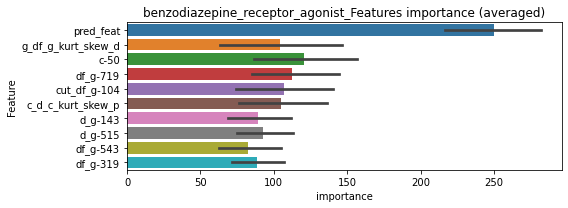

len(train_index) : 2838
len(valid_index) : 946
================================= fold 1/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000448369	valid_1's binary_logloss: 0.00072346
[2000]	training's binary_logloss: 0.00025023	valid_1's binary_logloss: 0.000405857
[3000]	training's binary_logloss: 0.000184338	valid_1's binary_logloss: 0.00029947
[4000]	training's binary_logloss: 0.000152998	valid_1's binary_logloss: 0.000248798
[5000]	training's binary_logloss: 0.000136961	valid_1's binary_logloss: 0.00022284
[6000]	training's binary_logloss: 0.000126592	valid_1's binary_logloss: 0.000205991
[7000]	training's binary_logloss: 0.000119393	valid_1's binary_logloss: 0.000194302
[8000]	training's binary_logloss: 0.000114473	valid_1's binary_logloss: 0.000186313
[9000]	training's binary_logloss: 0.00011097	valid_1's binary_logloss: 0.000180619
[10000]	training's binary_logloss: 0.000108466	valid_1's binary_logloss: 0.000176573
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.000108466	valid_1'

len(train_index) : 2838
len(valid_index) : 946
================================= fold 2/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2838
len(valid_index) : 946
================================= fold 3/4 benzodiazepine_receptor_agonist=================================


Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000702723	valid_1's binary_logloss: 0.00794141
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000577517	valid_1's binary_logloss: 0.00187582
Early stopping, best iteration is:
[1088]	training's binary_logloss: 0.000535171	valid_1's binary_logloss: 0.0018383


len(train_index) : 2838
len(valid_index) : 946
================================= fold 4/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000554588	valid_1's binary_logloss: 0.000933898
[2000]	training's binary_logloss: 0.000311569	valid_1's binary_logloss: 0.000599595
[3000]	training's binary_logloss: 0.000236062	valid_1's binary_logloss: 0.000488072
[4000]	training's binary_logloss: 0.000201446	valid_1's binary_logloss: 0.000432569
[5000]	training's binary_logloss: 0.00018313	valid_1's binary_logloss: 0.000399592
[6000]	training's binary_logloss: 0.000171514	valid_1's binary_logloss: 0.000378684
[7000]	training's binary_logloss: 0.000162901	valid_1's binary_logloss: 0.000363723
Early stopping, best iteration is:
[7661]	training's binary_logloss: 0.000158716	valid_1's binary_logloss: 0.000355443


benzodiazepine_receptor_agonist logloss: 0.002579034004080469


neg labels: 3289 → selected neg labels: 3287


beta_amyloid_inhibitor, len(trt): 24, len(othr): 3287
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00201815	valid_1's binary_logloss: 0.00406318
[600]	training's binary_logloss: 0.000460407	valid_1's binary_logloss: 0.00139252
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000450716	valid_1's binary_logloss: 0.00137627
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00193513	valid_1's binary_logloss: 0.00831027
[600]	training's binary_logloss: 0.000453027	valid_1's binary_logloss: 0.00522843
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000453027	valid_1's binary_logloss: 0.00522843
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00198473	valid_1's binary_logloss: 0.00445887
[600]	training's binary_logloss: 0.000457862	valid_1's binary_logloss: 0.00153673
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000447847	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0023859, Threshold: 0.0081432, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.00570, conf_1:0.01059
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0081432
Num_p_label: 3.0, Expected: 4.0, Adj_threshold_2: 0.0581432
threshold: 0.0581432, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000720686	valid_1's binary_logloss: 0.00211427
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000243444	valid_1's binary_logloss: 0.00148527
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000702306	valid_1's binary_logloss: 0.00272564
[600]	training's binary_logloss: 0.000187975	valid_1's binary_logloss: 0.00205745
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000186889	valid_1's binary_logloss: 0.00205478
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000705969	valid_1's binary_logloss: 0.000980799
[600]	training's binary_logloss: 0.00018441	valid_1's binary_logloss: 0.000386149
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.00014969	valid_1's binary_logloss: 0.000346401
Training until validation scores don't improve for 30 r

2 / 3 AUC score:1.000
y_Threshold: 0.5571474, Threshold: 0.0581432, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0504771 Vs.target_rate: 0.00101
Num_p_label: 201.0, conf_0:0.04651, conf_1:0.06977
Num_p_label: 201.0, Expected: 4.0, Adj_threshold_1: 0.0581432
Num_p_label: 196.0, Expected: 4.0, Adj_threshold_2: 0.1081432
Num_p_label: 194.0, Expected: 4.0, Adj_threshold_3: 0.1581432
Num_p_label: 194.0, Expected: 4.0, Adj_threshold_4: 0.2081432
Num_p_label: 192.0, Expected: 4.0, Adj_threshold_5: 0.2581432
Num_p_label: 191.0, Expected: 4.0, Adj_threshold_6: 0.3081432


[600]	training's binary_logloss: 0.000186233	valid_1's binary_logloss: 0.00118384
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.00018051	valid_1's binary_logloss: 0.0011718


Num_p_label: 179.0, Expected: 4.0, Adj_threshold_7: 0.3581432
Num_p_label: 158.0, Expected: 4.0, Adj_threshold_8: 0.4081432
Num_p_label: 126.0, Expected: 4.0, Adj_threshold_9: 0.4581432
Num_p_label: 102.0, Expected: 4.0, Adj_threshold_10: 0.5081432
threshold: 0.5581432, positive_p_label: 73.0/3982, p_label_rate: 0.0183325
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000713183	valid_1's binary_logloss: 0.00246346
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000222867	valid_1's binary_logloss: 0.00182803
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000708358	valid_1's binary_logloss: 0.00143135
[600]	training's binary_logloss: 0.000196688	valid_1's binary_logloss: 0.000829738
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000160858	valid_1's binary_logloss: 0.00077165
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000734456	valid_1's binary_logloss: 0.000958079
[600]	training's binary_logloss: 0.000197902	valid_1's binary_logloss: 0.000312435
Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000162036	valid_1's binary_logloss: 0.000260245
Training until validation scores don't improve for 3

3 / 3 AUC score:1.000
y_Threshold: 0.5516668, Threshold: 0.5581432, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0165746 Vs.target_rate: 0.00101
Num_p_label: 66.0, conf_0:0.50000, conf_1:0.61396
Num_p_label: 66.0, Expected: 4.0, Adj_threshold_1: 0.5581432
Num_p_label: 44.0, Expected: 4.0, Adj_threshold_2: 0.6081432


[600]	training's binary_logloss: 0.000195297	valid_1's binary_logloss: 0.000614124
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000186365	valid_1's binary_logloss: 0.00059402


Num_p_label: 21.0, Expected: 4.0, Adj_threshold_3: 0.6581432
Num_p_label: 14.0, Expected: 4.0, Adj_threshold_4: 0.7081432
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_5: 0.7581432
threshold: 0.7581432, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3810, y_label_rate: 0.1721785


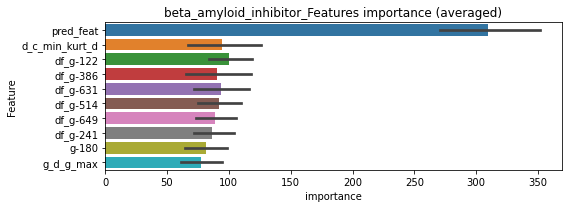

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 beta_amyloid_inhibitor=================================


Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000564006	valid_1's binary_logloss: 0.00670484
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000477743	valid_1's binary_logloss: 0.00101274
[2000]	training's binary_logloss: 0.000285363	valid_1's binary_logloss: 0.000812966
[3000]	training's binary_logloss: 0.000230332	valid_1's binary_logloss: 0.00076081
Early stopping, best iteration is:
[3163]	training's binary_logloss: 0.000224116	valid_1's binary_logloss: 0.000754087


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000471636	valid_1's binary_logloss: 0.000687648
[2000]	training's binary_logloss: 0.00028358	valid_1's binary_logloss: 0.00048198
[3000]	training's binary_logloss: 0.000230305	valid_1's binary_logloss: 0.000417208
Early stopping, best iteration is:
[3513]	training's binary_logloss: 0.000214035	valid_1's binary_logloss: 0.000394579


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000469997	valid_1's binary_logloss: 0.00120267
Early stopping, best iteration is:
[1659]	training's binary_logloss: 0.000317319	valid_1's binary_logloss: 0.00101193


beta_amyloid_inhibitor logloss: 0.0022175414742520868


neg labels: 3289 → selected neg labels: 3281


bromodomain_inhibitor, len(trt): 68, len(othr): 3281
target_rate: 0.0028555 → Adj_target_rate: 0.0030327
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00629897	valid_1's binary_logloss: 0.0528568
[600]	training's binary_logloss: 0.00108873	valid_1's binary_logloss: 0.0399899
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.00111772	valid_1's binary_logloss: 0.0398293
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00680289	valid_1's binary_logloss: 0.037864
[600]	training's binary_logloss: 0.00112831	valid_1's binary_logloss: 0.0256506
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000758455	valid_1's binary_logloss: 0.0242066
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00772667	valid_1's binary_logloss: 0.0219386
[600]	training's binary_logloss: 0.0012364	valid_1's binary_logloss: 0.00919057
[900]	training's binary_logloss: 0.000711002	valid_1's binary_logloss: 0.00777717
Early stopping, best iter

1 / 3 AUC score:1.000
y_Threshold: 0.0076059, Threshold: 0.0228571, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00286
Num_p_label: 40.0, conf_0:0.01600, conf_1:0.02971
Num_p_label: 40.0, Expected: 11.4, Adj_threshold_1: 0.0228571
Num_p_label: 7.0, Expected: 11.4, Adj_threshold_2: 0.0728571
threshold: 0.0728571, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126446	valid_1's binary_logloss: 0.00689119
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000409984	valid_1's binary_logloss: 0.00525655
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131214	valid_1's binary_logloss: 0.00586934
[600]	training's binary_logloss: 0.000237021	valid_1's binary_logloss: 0.00456407
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000226087	valid_1's binary_logloss: 0.00454178
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135067	valid_1's binary_logloss: 0.00174965
[600]	training's binary_logloss: 0.000238399	valid_1's binary_logloss: 0.000269326
[900]	training's binary_logloss: 0.000171571	valid_1's binary_logloss: 0.00016943
Early stopping, best iteration is:
[987]	training's binary_logloss: 0.000165764	valid_1's bin

2 / 3 AUC score:1.000
y_Threshold: 0.6610255, Threshold: 0.0728571, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.00025859	valid_1's binary_logloss: 0.00200463
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000241581	valid_1's binary_logloss: 0.00197196


Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3799
p_label_rate: 0.0459568 Vs.target_rate: 0.00286
Num_p_label: 183.0, conf_0:0.05829, conf_1:0.08743
Num_p_label: 183.0, Expected: 11.4, Adj_threshold_1: 0.0728571
Num_p_label: 183.0, Expected: 11.4, Adj_threshold_2: 0.1228571
Num_p_label: 182.0, Expected: 11.4, Adj_threshold_3: 0.1728571
Num_p_label: 180.0, Expected: 11.4, Adj_threshold_4: 0.2228571
Num_p_label: 180.0, Expected: 11.4, Adj_threshold_5: 0.2728571
Num_p_label: 180.0, Expected: 11.4, Adj_threshold_6: 0.3228571
Num_p_label: 180.0, Expected: 11.4, Adj_threshold_7: 0.3728571
Num_p_label: 180.0, Expected: 11.4, Adj_threshold_8: 0.4228571
Num_p_label: 180.0, Expected: 11.4, Adj_threshold_9: 0.4728571
Num_p_label: 180.0, Expected: 11.4, Adj_threshold_10: 0.5228571
threshold: 0.5728571, positive_p_label: 176.0/3982, p_label_rate: 0.0441989
positive_y_label: 653.0/3799, y_label_rate: 0.1718873
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127174	valid_1's binary_logloss: 0.00498879
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.000547971	valid_1's binary_logloss: 0.00363702
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128971	valid_1's binary_logloss: 0.00391684
[600]	training's binary_logloss: 0.000241826	valid_1's binary_logloss: 0.00181285
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000247578	valid_1's binary_logloss: 0.00180485
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132888	valid_1's binary_logloss: 0.00321947
[600]	training's binary_logloss: 0.000243575	valid_1's binary_logloss: 0.00147414
[900]	training's binary_logloss: 0.000176757	valid_1's binary_logloss: 0.00132797
Early stopping, best iteration is:
[1043]	training's binary_logloss: 0.000168153	valid_1's bin

3 / 3 AUC score:1.000
y_Threshold: 0.4870318, Threshold: 0.5728571, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 652.0/3797
p_label_rate: 0.0246107 Vs.target_rate: 0.00286
Num_p_label: 98.0, conf_0:0.50000, conf_1:0.63014
Num_p_label: 98.0, Expected: 11.4, Adj_threshold_1: 0.5728571
Num_p_label: 91.0, Expected: 11.4, Adj_threshold_2: 0.6228571
Num_p_label: 88.0, Expected: 11.4, Adj_threshold_3: 0.6728571
Num_p_label: 84.0, Expected: 11.4, Adj_threshold_4: 0.7228571
Num_p_label: 81.0, Expected: 11.4, Adj_threshold_5: 0.7728571
threshold: 0.7728571, positive_p_label: 81.0/3982, p_label_rate: 0.0203415


Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000299808	valid_1's binary_logloss: 0.00300504


positive_y_label: 652.0/3797, y_label_rate: 0.1717145


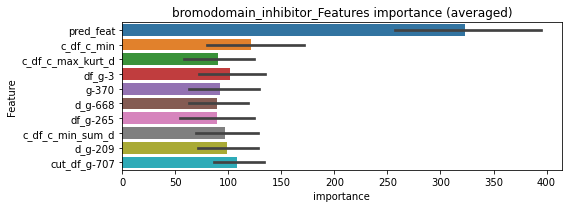

len(train_index) : 2847
len(valid_index) : 950
================================= fold 1/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000566389	valid_1's binary_logloss: 0.00332002
Early stopping, best iteration is:
[1898]	training's binary_logloss: 0.000334945	valid_1's binary_logloss: 0.0030722


len(train_index) : 2848
len(valid_index) : 949
================================= fold 2/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2848
len(valid_index) : 949
================================= fold 3/4 bromodomain_inhibitor=================================


Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000776177	valid_1's binary_logloss: 0.00445281
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000564683	valid_1's binary_logloss: 0.0054671
Early stopping, best iteration is:
[1267]	training's binary_logloss: 0.000461819	valid_1's binary_logloss: 0.00533526


len(train_index) : 2848
len(valid_index) : 949
================================= fold 4/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000562259	valid_1's binary_logloss: 0.00205443
[2000]	training's binary_logloss: 0.000323938	valid_1's binary_logloss: 0.00168366
[3000]	training's binary_logloss: 0.000253635	valid_1's binary_logloss: 0.00156074
Early stopping, best iteration is:
[3707]	training's binary_logloss: 0.0002281	valid_1's binary_logloss: 0.00152302


bromodomain_inhibitor logloss: 0.003595970178598552


neg labels: 3289 → selected neg labels: 3286


btk_inhibitor, len(trt): 29, len(othr): 3286
target_rate: 0.0012178 → Adj_target_rate: 0.0014697
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00259421	valid_1's binary_logloss: 0.00747846
[600]	training's binary_logloss: 0.000537162	valid_1's binary_logloss: 0.00320388
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000484311	valid_1's binary_logloss: 0.00311431
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00251099	valid_1's binary_logloss: 0.0109577
[600]	training's binary_logloss: 0.000534573	valid_1's binary_logloss: 0.00586133
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000478922	valid_1's binary_logloss: 0.00569995
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00266587	valid_1's binary_logloss: 0.0058781
[600]	training's binary_logloss: 0.000549434	valid_1's binary_logloss: 0.00192687
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000493519	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0028412, Threshold: 0.0134650, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00122
Num_p_label: 40.0, conf_0:0.00943, conf_1:0.01750
Num_p_label: 40.0, Expected: 4.8, Adj_threshold_1: 0.0134650
Num_p_label: 5.0, Expected: 4.8, Adj_threshold_2: 0.0634650
threshold: 0.0634650, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000806748	valid_1's binary_logloss: 0.00214987
[600]	training's binary_logloss: 0.000199821	valid_1's binary_logloss: 0.00139894
[900]	training's binary_logloss: 0.000159453	valid_1's binary_logloss: 0.00134478
Early stopping, best iteration is:
[946]	training's binary_logloss: 0.000157347	valid_1's binary_logloss: 0.00134164
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000791057	valid_1's binary_logloss: 0.00349682
[600]	training's binary_logloss: 0.000194778	valid_1's binary_logloss: 0.00260058
[900]	training's binary_logloss: 0.000152637	valid_1's binary_logloss: 0.00255307
Early stopping, best iteration is:
[979]	training's binary_logloss: 0.000149089	valid_1's binary_logloss: 0.00254833
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000802914	valid_1's binary_logloss: 0.00105285
[600]	tra

2 / 3 AUC score:1.000
y_Threshold: 0.5736038, Threshold: 0.0634650, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0507283 Vs.target_rate: 0.00122
Num_p_label: 202.0, conf_0:0.05077, conf_1:0.07616
Num_p_label: 202.0, Expected: 4.8, Adj_threshold_1: 0.0634650
Num_p_label: 202.0, Expected: 4.8, Adj_threshold_2: 0.1134650
Num_p_label: 201.0, Expected: 4.8, Adj_threshold_3: 0.1634650
Num_p_label: 200.0, Expected: 4.8, Adj_threshold_4: 0.2134650
Num_p_label: 200.0, Expected: 4.8, Adj_threshold_5: 0.2634650
Num_p_label: 199.0, Expected: 4.8, Adj_threshold_6: 0.3134650
Num_p_label: 196.0, Expected: 4.8, Adj_threshold_7: 0.3634650
Num_p_label: 192.0, Expected: 4.8, Adj_threshold_8: 0.4134650
Num_p_label: 176.0, Expected: 4.8, Adj_threshold_9: 0.4634650


[600]	training's binary_logloss: 0.000194792	valid_1's binary_logloss: 0.00109786
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000203255	valid_1's binary_logloss: 0.00109664


Num_p_label: 161.0, Expected: 4.8, Adj_threshold_10: 0.5134650
threshold: 0.5634650, positive_p_label: 142.0/3982, p_label_rate: 0.0356605
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000804101	valid_1's binary_logloss: 0.00218635
[600]	training's binary_logloss: 0.000199896	valid_1's binary_logloss: 0.00143239
[900]	training's binary_logloss: 0.000158771	valid_1's binary_logloss: 0.00136596
Early stopping, best iteration is:
[1030]	training's binary_logloss: 0.000153507	valid_1's binary_logloss: 0.00135824
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000790974	valid_1's binary_logloss: 0.00342003
[600]	training's binary_logloss: 0.000193958	valid_1's binary_logloss: 0.00250211
[900]	training's binary_logloss: 0.000153079	valid_1's binary_logloss: 0.00244797
Early stopping, best iteration is:
[872]	training's binary_logloss: 0.000153882	valid_1's binary_logloss: 0.0024474
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000805602	valid_1's binary_logloss: 0.000972096
[600]	tr

3 / 3 AUC score:1.000
y_Threshold: 0.6059316, Threshold: 0.5634650, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0318935 Vs.target_rate: 0.00122
Num_p_label: 127.0, conf_0:0.50000, conf_1:0.61981
Num_p_label: 127.0, Expected: 4.8, Adj_threshold_1: 0.5634650
Num_p_label: 90.0, Expected: 4.8, Adj_threshold_2: 0.6134650
Num_p_label: 57.0, Expected: 4.8, Adj_threshold_3: 0.6634650
Num_p_label: 35.0, Expected: 4.8, Adj_threshold_4: 0.7134650
Num_p_label: 17.0, Expected: 4.8, Adj_threshold_5: 0.7634650
threshold: 0.7634650, positive_p_label: 17.0/3982, p_label_rate: 0.0042692


Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000249689	valid_1's binary_logloss: 0.00149744


positive_y_label: 657.0/3811, y_label_rate: 0.1723957


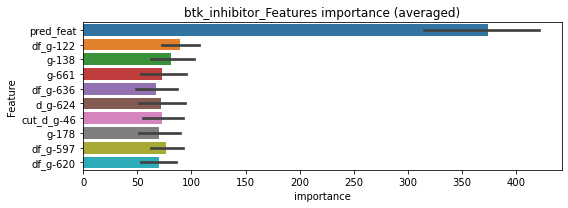

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000491658	valid_1's binary_logloss: 0.00204058
[2000]	training's binary_logloss: 0.000291897	valid_1's binary_logloss: 0.00178681
[3000]	training's binary_logloss: 0.000232506	valid_1's binary_logloss: 0.00171304
Early stopping, best iteration is:
[3939]	training's binary_logloss: 0.000206701	valid_1's binary_logloss: 0.00167896


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000477802	valid_1's binary_logloss: 0.00251325
[2000]	training's binary_logloss: 0.000284472	valid_1's binary_logloss: 0.00226057
[3000]	training's binary_logloss: 0.000227393	valid_1's binary_logloss: 0.00218228
Early stopping, best iteration is:
[3735]	training's binary_logloss: 0.000204648	valid_1's binary_logloss: 0.00215316


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000484084	valid_1's binary_logloss: 0.000512159
[2000]	training's binary_logloss: 0.000286578	valid_1's binary_logloss: 0.000288553
[3000]	training's binary_logloss: 0.000230066	valid_1's binary_logloss: 0.000220432
[4000]	training's binary_logloss: 0.000201513	valid_1's binary_logloss: 0.000186183
[5000]	training's binary_logloss: 0.000186436	valid_1's binary_logloss: 0.000168458
[6000]	training's binary_logloss: 0.000176353	valid_1's binary_logloss: 0.000156854
[7000]	training's binary_logloss: 0.000168593	valid_1's binary_logloss: 0.000147996
[8000]	training's binary_logloss: 0.000163316	valid_1's binary_logloss: 0.000141991
Early stopping, best iteration is:
[8208]	training's binary_logloss: 0.000162484	valid_1's binary_logloss: 0.000141118


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000489102	valid_1's binary_logloss: 0.00189878
[2000]	training's binary_logloss: 0.000287686	valid_1's binary_logloss: 0.00168951
Early stopping, best iteration is:
[2051]	training's binary_logloss: 0.000283356	valid_1's binary_logloss: 0.00168584


btk_inhibitor logloss: 0.001414849627941085


neg labels: 3289 → selected neg labels: 3288


calcineurin_inhibitor, len(trt): 12, len(othr): 3288
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000718579	valid_1's binary_logloss: 0.00177471
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000294443	valid_1's binary_logloss: 0.00103457
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000705363	valid_1's binary_logloss: 0.00215968
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000283146	valid_1's binary_logloss: 0.0012744
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00073746	valid_1's binary_logloss: 0.00104268
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000295317	valid_1's binary_logloss: 0.000453533
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000715515	valid_1's binary_logloss: 0.00154274


1 / 3 AUC score:1.000
y_Threshold: 0.0011935, Threshold: 0.0181051, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.01267, conf_1:0.02354
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0181051
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_2: 0.0681051
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_3: 0.1181051
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_4: 0.1681051
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_5: 0.2181051
threshold: 0.2181051, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000297623	valid_1's binary_logloss: 0.0007931


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000408439	valid_1's binary_logloss: 0.000842362
[600]	training's binary_logloss: 0.000161917	valid_1's binary_logloss: 0.000514624
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000157875	valid_1's binary_logloss: 0.000509124
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000391717	valid_1's binary_logloss: 0.000994402
[600]	training's binary_logloss: 0.000154324	valid_1's binary_logloss: 0.000652813
[900]	training's binary_logloss: 0.000135278	valid_1's binary_logloss: 0.000624757
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000135278	valid_1's binary_logloss: 0.000624757
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000404474	valid_1's binary_logloss: 0.000384725
[600]	training's binary_logloss: 0.000157142	valid_1's binary_logloss: 0.00013296
E

2 / 3 AUC score:1.000
y_Threshold: 0.3491063, Threshold: 0.2181051, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0557509 Vs.target_rate: 0.00050
Num_p_label: 222.0, conf_0:0.17448, conf_1:0.26173
Num_p_label: 222.0, Expected: 2.0, Adj_threshold_1: 0.2181051
Num_p_label: 200.0, Expected: 2.0, Adj_threshold_2: 0.2681051
Num_p_label: 173.0, Expected: 2.0, Adj_threshold_3: 0.3181051
Num_p_label: 151.0, Expected: 2.0, Adj_threshold_4: 0.3681051
Num_p_label: 130.0, Expected: 2.0, Adj_threshold_5: 0.4181051
Num_p_label: 109.0, Expected: 2.0, Adj_threshold_6: 0.4681051
Num_p_label: 100.0, Expected: 2.0, Adj_threshold_7: 0.5181051
Num_p_label: 82.0, Expected: 2.0, Adj_threshold_8: 0.5681051
Num_p_label: 70.0, Expected: 2.0, Adj_threshold_9: 0.6181051
Num_p_label: 64.0, Expected: 2.0, Adj_threshold_10: 0.6681051


[900]	training's binary_logloss: 0.0001333	valid_1's binary_logloss: 0.000453008
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.0001333	valid_1's binary_logloss: 0.000453008


threshold: 0.7181051, positive_p_label: 53.0/3982, p_label_rate: 0.0133099
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000408927	valid_1's binary_logloss: 0.000909394
[600]	training's binary_logloss: 0.000162752	valid_1's binary_logloss: 0.000556233
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.00014994	valid_1's binary_logloss: 0.000541174
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000390804	valid_1's binary_logloss: 0.000983812
[600]	training's binary_logloss: 0.000153377	valid_1's binary_logloss: 0.000663141
[900]	training's binary_logloss: 0.000134235	valid_1's binary_logloss: 0.000634585
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000134235	valid_1's binary_logloss: 0.000634585
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000403242	valid_1's binary_logloss: 0.000386007
[600]	training's binary_logloss: 0.000156584	valid_1's binary_logloss: 0.000133402
E

3 / 3 AUC score:1.000
y_Threshold: 0.3444196, Threshold: 0.7181051, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0130588 Vs.target_rate: 0.00050
Num_p_label: 52.0, conf_0:0.50000, conf_1:0.78992
Num_p_label: 52.0, Expected: 2.0, Adj_threshold_1: 0.7181051
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_2: 0.7681051


[900]	training's binary_logloss: 0.000132462	valid_1's binary_logloss: 0.000449116
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000132462	valid_1's binary_logloss: 0.000449116


threshold: 0.7681051, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


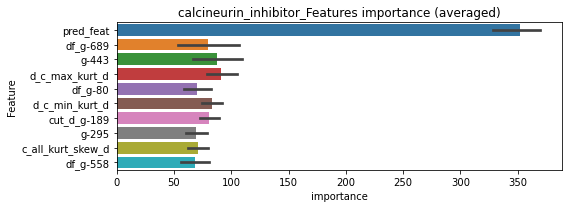

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000380026	valid_1's binary_logloss: 0.000706146
[2000]	training's binary_logloss: 0.000236838	valid_1's binary_logloss: 0.000532952
Early stopping, best iteration is:
[2591]	training's binary_logloss: 0.000209709	valid_1's binary_logloss: 0.000499014


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000363058	valid_1's binary_logloss: 0.00106272
[2000]	training's binary_logloss: 0.000228803	valid_1's binary_logloss: 0.000877679
[3000]	training's binary_logloss: 0.000190703	valid_1's binary_logloss: 0.000830698
Early stopping, best iteration is:
[3064]	training's binary_logloss: 0.00018869	valid_1's binary_logloss: 0.00082992


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000372177	valid_1's binary_logloss: 0.000355647
[2000]	training's binary_logloss: 0.000232741	valid_1's binary_logloss: 0.000214223
[3000]	training's binary_logloss: 0.000194712	valid_1's binary_logloss: 0.000172497
[4000]	training's binary_logloss: 0.000175307	valid_1's binary_logloss: 0.000150646
[5000]	training's binary_logloss: 0.000164586	valid_1's binary_logloss: 0.000138509
[6000]	training's binary_logloss: 0.000157496	valid_1's binary_logloss: 0.000130347
[7000]	training's binary_logloss: 0.000152329	valid_1's binary_logloss: 0.000124441
[8000]	training's binary_logloss: 0.000148761	valid_1's binary_logloss: 0.000120284
Early stopping, best iteration is:
[8806]	training's binary_logloss: 0.000146385	valid_1's binary_logloss: 0.000117482


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000368919	valid_1's binary_logloss: 0.000694934
[2000]	training's binary_logloss: 0.000229921	valid_1's binary_logloss: 0.000517825
[3000]	training's binary_logloss: 0.000190587	valid_1's binary_logloss: 0.000470722
[4000]	training's binary_logloss: 0.000171618	valid_1's binary_logloss: 0.000448942
[5000]	training's binary_logloss: 0.000161424	valid_1's binary_logloss: 0.000436395
[6000]	training's binary_logloss: 0.000154725	valid_1's binary_logloss: 0.000428223
[7000]	training's binary_logloss: 0.000149704	valid_1's binary_logloss: 0.000422418
[8000]	training's binary_logloss: 0.000146191	valid_1's binary_logloss: 0.000418431
Early stopping, best iteration is:
[8463]	training's binary_logloss: 0.000144845	valid_1's binary_logloss: 0.000416822


calcineurin_inhibitor logloss: 0.0004658829406106817


neg labels: 3289 → selected neg labels: 3246


calcium_channel_blocker, len(trt): 281, len(othr): 3246
target_rate: 0.0117998 → Adj_target_rate: 0.0101297
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0389017	valid_1's binary_logloss: 0.253641
Early stopping, best iteration is:
[386]	training's binary_logloss: 0.0223684	valid_1's binary_logloss: 0.249401
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0416916	valid_1's binary_logloss: 0.26619
Early stopping, best iteration is:
[322]	training's binary_logloss: 0.0358926	valid_1's binary_logloss: 0.265171
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0406808	valid_1's binary_logloss: 0.239391
Early stopping, best iteration is:
[347]	training's binary_logloss: 0.0304623	valid_1's binary_logloss: 0.235861
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0392683	valid_1's binary_logloss: 0.227345


1 / 3 AUC score:0.904
y_Threshold: 0.0818700, Threshold: 0.2635424, pos_neg_ratio: 0.8000000
Remove_noisy_data: 432 → Positive_corect_labels: 498/3463


Early stopping, best iteration is:
[485]	training's binary_logloss: 0.0128849	valid_1's binary_logloss: 0.215767


p_label_rate: 0.0100452 Vs.target_rate: 0.01180
Num_p_label: 40.0, conf_0:0.18448, conf_1:0.34261
threshold: 0.2635424, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 498.0/3463, y_label_rate: 0.1438059
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183667	valid_1's binary_logloss: 0.0127212
Early stopping, best iteration is:
[389]	training's binary_logloss: 0.000817548	valid_1's binary_logloss: 0.0107051
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00184268	valid_1's binary_logloss: 0.00530799
[600]	training's binary_logloss: 0.000282271	valid_1's binary_logloss: 0.00144743
[900]	training's binary_logloss: 0.000189865	valid_1's binary_logloss: 0.00113506
Early stopping, best iteration is:
[873]	training's binary_logloss: 0.000193315	valid_1's binary_logloss: 0.00113392
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00189318	valid_1's binary_logloss: 0.00627171
[600]	training's binary_logloss: 0.000291174	valid_1's binary_logloss: 0.00261371
[900]	training's binary_logloss: 0.000197647	valid_1's binary_logloss: 0.00228587
Early stopping

2 / 3 AUC score:1.000
y_Threshold: 0.2656957, Threshold: 0.2635424, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 496.0/3459
p_label_rate: 0.0964340 Vs.target_rate: 0.01180
Num_p_label: 384.0, conf_0:0.21083, conf_1:0.31625
Num_p_label: 384.0, Expected: 47.0, Adj_threshold_1: 0.2635424
Num_p_label: 377.0, Expected: 47.0, Adj_threshold_2: 0.3135424


[900]	training's binary_logloss: 0.000199424	valid_1's binary_logloss: 0.00217991
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000199159	valid_1's binary_logloss: 0.00217973


Num_p_label: 368.0, Expected: 47.0, Adj_threshold_3: 0.3635424
Num_p_label: 356.0, Expected: 47.0, Adj_threshold_4: 0.4135424
Num_p_label: 350.0, Expected: 47.0, Adj_threshold_5: 0.4635424
Num_p_label: 338.0, Expected: 47.0, Adj_threshold_6: 0.5135424
Num_p_label: 331.0, Expected: 47.0, Adj_threshold_7: 0.5635424
Num_p_label: 328.0, Expected: 47.0, Adj_threshold_8: 0.6135424
Num_p_label: 327.0, Expected: 47.0, Adj_threshold_9: 0.6635424
Num_p_label: 326.0, Expected: 47.0, Adj_threshold_10: 0.7135424
threshold: 0.7635424, positive_p_label: 325.0/3982, p_label_rate: 0.0816173
positive_y_label: 496.0/3459, y_label_rate: 0.1433940
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00178434	valid_1's binary_logloss: 0.0114207
[600]	training's binary_logloss: 0.000276543	valid_1's binary_logloss: 0.00753814
[900]	training's binary_logloss: 0.000182908	valid_1's binary_logloss: 0.00726994
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000185633	valid_1's binary_logloss: 0.00726346
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00190198	valid_1's binary_logloss: 0.00468988
[600]	training's binary_logloss: 0.000281661	valid_1's binary_logloss: 0.00107651
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000193295	valid_1's binary_logloss: 0.000830918
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00184272	valid_1's binary_logloss: 0.00466928
[600]	training's binary_logloss: 0.000282464	valid_1's binary_logloss: 0.000901211
[900]	train

3 / 3 AUC score:1.000
y_Threshold: 0.1909065, Threshold: 0.7635424, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 493.0/3453
p_label_rate: 0.0863887 Vs.target_rate: 0.01180
Num_p_label: 344.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 344.0, Expected: 47.0, Adj_threshold_1: 0.7635424
threshold: 0.7635424, positive_p_label: 344.0/3982, p_label_rate: 0.0863887
positive_y_label: 493.0/3453, y_label_rate: 0.1427744


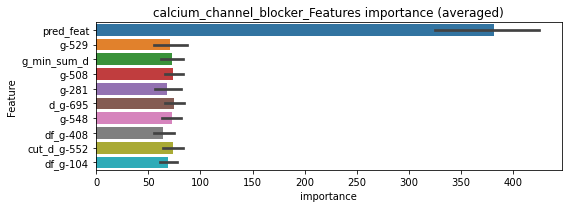

len(train_index) : 2589
len(valid_index) : 864
================================= fold 1/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000643181	valid_1's binary_logloss: 0.0056312
[2000]	training's binary_logloss: 0.000357009	valid_1's binary_logloss: 0.00500623
Early stopping, best iteration is:
[2078]	training's binary_logloss: 0.000347832	valid_1's binary_logloss: 0.00498461


len(train_index) : 2590
len(valid_index) : 863
================================= fold 2/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2590
len(valid_index) : 863
================================= fold 3/4 calcium_channel_blocker=================================


Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000642762	valid_1's binary_logloss: 0.00852084
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000518396	valid_1's binary_logloss: 0.000978107
[2000]	training's binary_logloss: 0.000280534	valid_1's binary_logloss: 0.000531602
[3000]	training's binary_logloss: 0.000204561	valid_1's binary_logloss: 0.00038823
[4000]	training's binary_logloss: 0.000168929	valid_1's binary_logloss: 0.00032087
[5000]	training's binary_logloss: 0.000150824	valid_1's binary_logloss: 0.000286611
[6000]	training's binary_logloss: 0.000139242	valid_1's binary_logloss: 0.000264639
[7000]	training's binary_logloss: 0.000131184	valid_1's binary_logloss: 0.000249329
[8000]	training's binary_logloss: 0.000125677	valid_1's binary_logloss: 0.000238881
[9000]	training's binary_logloss: 0.00012176	valid_1's binary_logloss: 0.000231446
[10000]	training's binary_logloss: 0.000118931	valid_1's binary_loglo

len(train_index) : 2590
len(valid_index) : 863
================================= fold 4/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000517548	valid_1's binary_logloss: 0.000992234
[2000]	training's binary_logloss: 0.000280265	valid_1's binary_logloss: 0.000539495
[3000]	training's binary_logloss: 0.000204377	valid_1's binary_logloss: 0.00039392
[4000]	training's binary_logloss: 0.00016887	valid_1's binary_logloss: 0.000325801
[5000]	training's binary_logloss: 0.000150844	valid_1's binary_logloss: 0.0002912
[6000]	training's binary_logloss: 0.000139234	valid_1's binary_logloss: 0.000268797
[7000]	training's binary_logloss: 0.000131166	valid_1's binary_logloss: 0.000253211
[8000]	training's binary_logloss: 0.000125637	valid_1's binary_logloss: 0.000242543
[9000]	training's binary_logloss: 0.000121724	valid_1's binary_logloss: 0.000234988
[10000]	training's binary_logloss: 0.000118906	valid_1's binary_logloss: 0.000229573
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000118906	valid_1'

calcium_channel_blocker logloss: 0.003491934437748702


neg labels: 3289 → selected neg labels: 3281


cannabinoid_receptor_agonist, len(trt): 42, len(othr): 3281
target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00328497	valid_1's binary_logloss: 0.0278218
[600]	training's binary_logloss: 0.000652377	valid_1's binary_logloss: 0.0190803
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000552422	valid_1's binary_logloss: 0.0186159
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00366739	valid_1's binary_logloss: 0.0142612
[600]	training's binary_logloss: 0.000695777	valid_1's binary_logloss: 0.00875566
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000593891	valid_1's binary_logloss: 0.00861748
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00363838	valid_1's binary_logloss: 0.00854267
[600]	training's binary_logloss: 0.000713605	valid_1's binary_logloss: 0.00338648
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000572553	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0048500, Threshold: 0.0313572, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, conf_0:0.02195, conf_1:0.04076
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_1: 0.0313572
Num_p_label: 10.0, Expected: 7.0, Adj_threshold_2: 0.0813572
threshold: 0.0813572, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000907991	valid_1's binary_logloss: 0.00427431
Early stopping, best iteration is:
[353]	training's binary_logloss: 0.000546586	valid_1's binary_logloss: 0.00368361
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000966867	valid_1's binary_logloss: 0.00323531
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000249919	valid_1's binary_logloss: 0.002521
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000925571	valid_1's binary_logloss: 0.00125512
[600]	training's binary_logloss: 0.000213597	valid_1's binary_logloss: 0.000324279
[900]	training's binary_logloss: 0.000164082	valid_1's binary_logloss: 0.000259634
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000163375	valid_1's binary_logloss: 0.000258681
Training until validation scores don't improve for 30 r

2 / 3 AUC score:1.000
y_Threshold: 0.6586178, Threshold: 0.0813572, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0698142 Vs.target_rate: 0.00176
Num_p_label: 278.0, conf_0:0.06509, conf_1:0.09763
Num_p_label: 278.0, Expected: 7.0, Adj_threshold_1: 0.0813572
Num_p_label: 278.0, Expected: 7.0, Adj_threshold_2: 0.1313572
Num_p_label: 277.0, Expected: 7.0, Adj_threshold_3: 0.1813572
Num_p_label: 277.0, Expected: 7.0, Adj_threshold_4: 0.2313572
Num_p_label: 277.0, Expected: 7.0, Adj_threshold_5: 0.2813572
Num_p_label: 276.0, Expected: 7.0, Adj_threshold_6: 0.3313572
Num_p_label: 273.0, Expected: 7.0, Adj_threshold_7: 0.3813572
Num_p_label: 265.0, Expected: 7.0, Adj_threshold_8: 0.4313572
Num_p_label: 254.0, Expected: 7.0, Adj_threshold_9: 0.4813572
Num_p_label: 229.0, Expected: 7.0, Adj_threshold_10: 0.5313572


Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000274212	valid_1's binary_logloss: 0.00384325


threshold: 0.5813572, positive_p_label: 193.0/3982, p_label_rate: 0.0484681
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000942794	valid_1's binary_logloss: 0.00373907
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000343202	valid_1's binary_logloss: 0.00266015
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000967615	valid_1's binary_logloss: 0.00286886
[600]	training's binary_logloss: 0.00022137	valid_1's binary_logloss: 0.00165901
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000209807	valid_1's binary_logloss: 0.00164294
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000975129	valid_1's binary_logloss: 0.00506406
Early stopping, best iteration is:
[431]	training's binary_logloss: 0.000367699	valid_1's binary_logloss: 0.0041728
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000942687	valid_1's binary_logloss: 0.001918

3 / 3 AUC score:1.000
y_Threshold: 0.5766915, Threshold: 0.5813572, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3799
p_label_rate: 0.0133099 Vs.target_rate: 0.00176
Num_p_label: 53.0, conf_0:0.50000, conf_1:0.63949
Num_p_label: 53.0, Expected: 7.0, Adj_threshold_1: 0.5813572
Num_p_label: 36.0, Expected: 7.0, Adj_threshold_2: 0.6313572
Num_p_label: 27.0, Expected: 7.0, Adj_threshold_3: 0.6813572
Num_p_label: 17.0, Expected: 7.0, Adj_threshold_4: 0.7313572
threshold: 0.7313572, positive_p_label: 17.0/3982, p_label_rate: 0.0042692


Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000174497	valid_1's binary_logloss: 0.000670763


positive_y_label: 653.0/3799, y_label_rate: 0.1718873


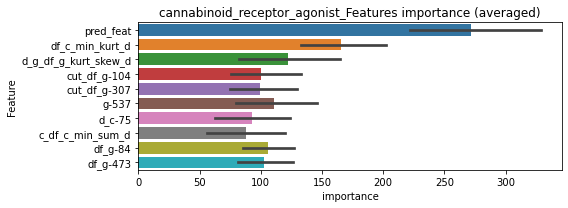

len(train_index) : 2849
len(valid_index) : 950
================================= fold 1/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000519292	valid_1's binary_logloss: 0.00296894
Early stopping, best iteration is:
[1895]	training's binary_logloss: 0.000315872	valid_1's binary_logloss: 0.00269511


len(train_index) : 2849
len(valid_index) : 950
================================= fold 2/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2849
len(valid_index) : 950
================================= fold 3/4 cannabinoid_receptor_agonist=================================


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00114647	valid_1's binary_logloss: 0.00546721
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000525073	valid_1's binary_logloss: 0.00117882
Early stopping, best iteration is:
[1657]	training's binary_logloss: 0.000346297	valid_1's binary_logloss: 0.000991439


len(train_index) : 2850
len(valid_index) : 949
================================= fold 4/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


cannabinoid_receptor_agonist logloss: 0.0032798892786908545


Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000761485	valid_1's binary_logloss: 0.00396384
neg labels: 3289 → selected neg labels: 3280


cannabinoid_receptor_antagonist, len(trt): 55, len(othr): 3280
target_rate: 0.0023096 → Adj_target_rate: 0.0025322
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00448782	valid_1's binary_logloss: 0.0369301
[600]	training's binary_logloss: 0.000839214	valid_1's binary_logloss: 0.0305778
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000828389	valid_1's binary_logloss: 0.0305274
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00450532	valid_1's binary_logloss: 0.0330054
[600]	training's binary_logloss: 0.000860793	valid_1's binary_logloss: 0.0245356
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000703612	valid_1's binary_logloss: 0.0239063
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00476957	valid_1's binary_logloss: 0.0169705
[600]	training's binary_logloss: 0.000903642	valid_1's binary_logloss: 0.0101421
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000668235	valid_1's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0058854, Threshold: 0.0216449, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00231
Num_p_label: 40.0, conf_0:0.01515, conf_1:0.02814
Num_p_label: 40.0, Expected: 9.2, Adj_threshold_1: 0.0216449
Num_p_label: 7.0, Expected: 9.2, Adj_threshold_2: 0.0716449
threshold: 0.0716449, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107388	valid_1's binary_logloss: 0.00457281
[600]	training's binary_logloss: 0.000228767	valid_1's binary_logloss: 0.00340221
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000200566	valid_1's binary_logloss: 0.00334941
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108021	valid_1's binary_logloss: 0.00159105
[600]	training's binary_logloss: 0.000226836	valid_1's binary_logloss: 0.000297152
[900]	training's binary_logloss: 0.000172203	valid_1's binary_logloss: 0.000197637
Early stopping, best iteration is:
[976]	training's binary_logloss: 0.000167895	valid_1's binary_logloss: 0.000190027
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101499	valid_1's binary_logloss: 0.00564619
[600]	training's binary_logloss: 0.000219929	valid_1's binary_logloss: 0.00449327
[900]	tra

2 / 3 AUC score:1.000
y_Threshold: 0.4464326, Threshold: 0.0716449, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3796
p_label_rate: 0.0507283 Vs.target_rate: 0.00231
Num_p_label: 202.0, conf_0:0.05732, conf_1:0.08597
Num_p_label: 202.0, Expected: 9.2, Adj_threshold_1: 0.0716449
Num_p_label: 201.0, Expected: 9.2, Adj_threshold_2: 0.1216449
Num_p_label: 201.0, Expected: 9.2, Adj_threshold_3: 0.1716449
Num_p_label: 199.0, Expected: 9.2, Adj_threshold_4: 0.2216449
Num_p_label: 199.0, Expected: 9.2, Adj_threshold_5: 0.2716449
Num_p_label: 195.0, Expected: 9.2, Adj_threshold_6: 0.3216449
Num_p_label: 178.0, Expected: 9.2, Adj_threshold_7: 0.3716449
Num_p_label: 144.0, Expected: 9.2, Adj_threshold_8: 0.4216449
Num_p_label: 109.0, Expected: 9.2, Adj_threshold_9: 0.4716449
Num_p_label: 79.0, Expected: 9.2, Adj_threshold_10: 0.5216449
threshold: 0.5716449, positive_p_label: 49.0/3982, p_label_rate: 0.0123054
positive_y_label: 652.0/3796, y_label_rate: 0.1717597
=

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00104396	valid_1's binary_logloss: 0.00270789
[600]	training's binary_logloss: 0.000229107	valid_1's binary_logloss: 0.00128506
[900]	training's binary_logloss: 0.000174279	valid_1's binary_logloss: 0.00112615
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.00017656	valid_1's binary_logloss: 0.00111868
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0010436	valid_1's binary_logloss: 0.00417524
[600]	training's binary_logloss: 0.000224822	valid_1's binary_logloss: 0.00290941
Early stopping, best iteration is:
[758]	training's binary_logloss: 0.00018613	valid_1's binary_logloss: 0.00283548
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106741	valid_1's binary_logloss: 0.00200042
[600]	training's binary_logloss: 0.00023238	valid_1's binary_logloss: 0.000726078
Early stopping,

3 / 3 AUC score:1.000
y_Threshold: 0.4439725, Threshold: 0.5716449, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 652.0/3796
p_label_rate: 0.0032647 Vs.target_rate: 0.00231
Num_p_label: 13.0, conf_0:0.50000, conf_1:0.62881
threshold: 0.5716449, positive_p_label: 13.0/3982, p_label_rate: 0.0032647


Early stopping, best iteration is:
[791]	training's binary_logloss: 0.000183601	valid_1's binary_logloss: 0.00398531


positive_y_label: 652.0/3796, y_label_rate: 0.1717597


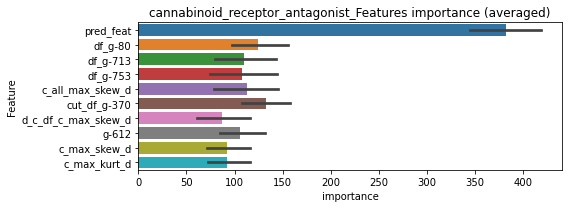

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000547598	valid_1's binary_logloss: 0.00148634
[2000]	training's binary_logloss: 0.000313724	valid_1's binary_logloss: 0.0012074
Early stopping, best iteration is:
[2221]	training's binary_logloss: 0.000294745	valid_1's binary_logloss: 0.0011809


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000541517	valid_1's binary_logloss: 0.00363608
Early stopping, best iteration is:
[1323]	training's binary_logloss: 0.000422836	valid_1's binary_logloss: 0.00347976


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000554269	valid_1's binary_logloss: 0.000791952
[2000]	training's binary_logloss: 0.000316374	valid_1's binary_logloss: 0.000522867
[3000]	training's binary_logloss: 0.000248614	valid_1's binary_logloss: 0.000444869
[4000]	training's binary_logloss: 0.0002184	valid_1's binary_logloss: 0.000407642
[5000]	training's binary_logloss: 0.000203309	valid_1's binary_logloss: 0.000386515
[6000]	training's binary_logloss: 0.000193109	valid_1's binary_logloss: 0.000375198
[7000]	training's binary_logloss: 0.000185701	valid_1's binary_logloss: 0.000365195
Early stopping, best iteration is:
[7043]	training's binary_logloss: 0.000185569	valid_1's binary_logloss: 0.000364995


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


cannabinoid_receptor_antagonist logloss: 0.0028749681498145266


Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000706342	valid_1's binary_logloss: 0.00647041
neg labels: 3289 → selected neg labels: 3281


carbonic_anhydrase_inhibitor, len(trt): 36, len(othr): 3281
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.004232	valid_1's binary_logloss: 0.0174847
[600]	training's binary_logloss: 0.000704529	valid_1's binary_logloss: 0.00648573
Early stopping, best iteration is:
[780]	training's binary_logloss: 0.000546229	valid_1's binary_logloss: 0.00575792
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00405673	valid_1's binary_logloss: 0.0131736
[600]	training's binary_logloss: 0.000701762	valid_1's binary_logloss: 0.00600194
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000569608	valid_1's binary_logloss: 0.00566502
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00398605	valid_1's binary_logloss: 0.00827833
[600]	training's binary_logloss: 0.00070392	valid_1's binary_logloss: 0.00246968
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000571016	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0048563, Threshold: 0.0780461, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.05463, conf_1:0.10146
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0780461
Num_p_label: 30.0, Expected: 6.0, Adj_threshold_2: 0.1280461
Num_p_label: 20.0, Expected: 6.0, Adj_threshold_3: 0.1780461
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_4: 0.2280461
threshold: 0.2280461, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100444	valid_1's binary_logloss: 0.0021109
[600]	training's binary_logloss: 0.000216708	valid_1's binary_logloss: 0.000822233
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000200894	valid_1's binary_logloss: 0.000812659
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100663	valid_1's binary_logloss: 0.00565042
Early stopping, best iteration is:
[425]	training's binary_logloss: 0.000388275	valid_1's binary_logloss: 0.0045899
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100989	valid_1's binary_logloss: 0.0011123
[600]	training's binary_logloss: 0.000215017	valid_1's binary_logloss: 0.000200254
[900]	training's binary_logloss: 0.000165294	valid_1's binary_logloss: 0.000138274
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.000163056	valid_1's bin

2 / 3 AUC score:1.000
y_Threshold: 0.6376884, Threshold: 0.2280461, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0668006 Vs.target_rate: 0.00151
Num_p_label: 266.0, conf_0:0.18244, conf_1:0.27366
Num_p_label: 266.0, Expected: 6.0, Adj_threshold_1: 0.2280461
Num_p_label: 266.0, Expected: 6.0, Adj_threshold_2: 0.2780461
Num_p_label: 266.0, Expected: 6.0, Adj_threshold_3: 0.3280461
Num_p_label: 266.0, Expected: 6.0, Adj_threshold_4: 0.3780461
Num_p_label: 262.0, Expected: 6.0, Adj_threshold_5: 0.4280461


[600]	training's binary_logloss: 0.000208568	valid_1's binary_logloss: 0.00362161
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000204023	valid_1's binary_logloss: 0.00361491


Num_p_label: 256.0, Expected: 6.0, Adj_threshold_6: 0.4780461
Num_p_label: 245.0, Expected: 6.0, Adj_threshold_7: 0.5280461
Num_p_label: 223.0, Expected: 6.0, Adj_threshold_8: 0.5780461
Num_p_label: 184.0, Expected: 6.0, Adj_threshold_9: 0.6280461
Num_p_label: 147.0, Expected: 6.0, Adj_threshold_10: 0.6780461
threshold: 0.7280461, positive_p_label: 106.0/3982, p_label_rate: 0.0266198
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100238	valid_1's binary_logloss: 0.00196959
[600]	training's binary_logloss: 0.000219809	valid_1's binary_logloss: 0.00088407
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000205931	valid_1's binary_logloss: 0.000831292
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102166	valid_1's binary_logloss: 0.0028661
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000265035	valid_1's binary_logloss: 0.00183506
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000998317	valid_1's binary_logloss: 0.00238098
[600]	training's binary_logloss: 0.000219505	valid_1's binary_logloss: 0.00118145
[900]	training's binary_logloss: 0.000168579	valid_1's binary_logloss: 0.00111389
Early stopping, best iteration is:
[971]	training's binary_logloss: 0.000165202	valid_1's bin

3 / 3 AUC score:1.000
y_Threshold: 0.6134205, Threshold: 0.7280461, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0210949 Vs.target_rate: 0.00151
Num_p_label: 84.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 84.0, Expected: 6.0, Adj_threshold_1: 0.7280461
Num_p_label: 49.0, Expected: 6.0, Adj_threshold_2: 0.7780461
threshold: 0.7780461, positive_p_label: 49.0/3982, p_label_rate: 0.0123054


[600]	training's binary_logloss: 0.000211562	valid_1's binary_logloss: 0.00323952
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000216974	valid_1's binary_logloss: 0.00323477


positive_y_label: 654.0/3801, y_label_rate: 0.1720600


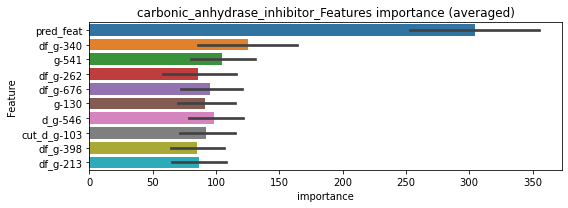

len(train_index) : 2850
len(valid_index) : 951
================================= fold 1/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 950
================================= fold 2/4 carbonic_anhydrase_inhibitor=================================


Early stopping, best iteration is:
[711]	training's binary_logloss: 0.000713404	valid_1's binary_logloss: 0.004472
Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 950
================================= fold 3/4 carbonic_anhydrase_inhibitor=================================


Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000773897	valid_1's binary_logloss: 0.00391815
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000514969	valid_1's binary_logloss: 0.00124092
Early stopping, best iteration is:
[1266]	training's binary_logloss: 0.000423529	valid_1's binary_logloss: 0.00112444


len(train_index) : 2851
len(valid_index) : 950
================================= fold 4/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00051415	valid_1's binary_logloss: 0.00183354
Early stopping, best iteration is:
[1443]	training's binary_logloss: 0.00037722	valid_1's binary_logloss: 0.00162135


carbonic_anhydrase_inhibitor logloss: 0.0027846845708623495


neg labels: 3289 → selected neg labels: 3283


casein_kinase_inhibitor, len(trt): 36, len(othr): 3283
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00269971	valid_1's binary_logloss: 0.0142603
[600]	training's binary_logloss: 0.000561455	valid_1's binary_logloss: 0.00823676
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000524557	valid_1's binary_logloss: 0.00811127
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0028203	valid_1's binary_logloss: 0.00793443
[600]	training's binary_logloss: 0.000582597	valid_1's binary_logloss: 0.00295419
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000489275	valid_1's binary_logloss: 0.00270471
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00293227	valid_1's binary_logloss: 0.00547288
[600]	training's binary_logloss: 0.000585761	valid_1's binary_logloss: 0.00173414
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000499284	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0040382, Threshold: 0.0100323, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.00702, conf_1:0.01304
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0100323
Num_p_label: 2.0, Expected: 6.0, Adj_threshold_2: 0.0600323
threshold: 0.0600323, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000835798	valid_1's binary_logloss: 0.00192695
[600]	training's binary_logloss: 0.000205515	valid_1's binary_logloss: 0.000927601
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000190088	valid_1's binary_logloss: 0.000864132
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000854511	valid_1's binary_logloss: 0.00355057
Early stopping, best iteration is:
[407]	training's binary_logloss: 0.000369948	valid_1's binary_logloss: 0.00309888
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000862076	valid_1's binary_logloss: 0.00263061
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.000292319	valid_1's binary_logloss: 0.00201984
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00081883	valid_1's binary_logloss: 0.002

2 / 3 AUC score:1.000
y_Threshold: 0.7010413, Threshold: 0.0600323, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0384229 Vs.target_rate: 0.00151
Num_p_label: 153.0, conf_0:0.04803, conf_1:0.07204
Num_p_label: 153.0, Expected: 6.0, Adj_threshold_1: 0.0600323
Num_p_label: 153.0, Expected: 6.0, Adj_threshold_2: 0.1100323
Num_p_label: 150.0, Expected: 6.0, Adj_threshold_3: 0.1600323
Num_p_label: 148.0, Expected: 6.0, Adj_threshold_4: 0.2100323
Num_p_label: 146.0, Expected: 6.0, Adj_threshold_5: 0.2600323
Num_p_label: 144.0, Expected: 6.0, Adj_threshold_6: 0.3100323
Num_p_label: 143.0, Expected: 6.0, Adj_threshold_7: 0.3600323
Num_p_label: 140.0, Expected: 6.0, Adj_threshold_8: 0.4100323
Num_p_label: 132.0, Expected: 6.0, Adj_threshold_9: 0.4600323
Num_p_label: 115.0, Expected: 6.0, Adj_threshold_10: 0.5100323


Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000271392	valid_1's binary_logloss: 0.00154131


threshold: 0.5600323, positive_p_label: 91.0/3982, p_label_rate: 0.0228528
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000853789	valid_1's binary_logloss: 0.00310233
[600]	training's binary_logloss: 0.000210015	valid_1's binary_logloss: 0.00216787
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000177556	valid_1's binary_logloss: 0.00210958
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000865253	valid_1's binary_logloss: 0.000965181
[600]	training's binary_logloss: 0.000210885	valid_1's binary_logloss: 0.000201651
[900]	training's binary_logloss: 0.000168289	valid_1's binary_logloss: 0.000144155
Early stopping, best iteration is:
[980]	training's binary_logloss: 0.000163807	valid_1's binary_logloss: 0.00013842
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000860725	valid_1's binary_logloss: 0.00279936
[600]	training's binary_logloss: 0.000211692	valid_1's binary_logloss: 0.00192337
Early 

3 / 3 AUC score:1.000
y_Threshold: 0.6056692, Threshold: 0.5600323, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0128076 Vs.target_rate: 0.00151
Num_p_label: 51.0, conf_0:0.50000, conf_1:0.61604
Num_p_label: 51.0, Expected: 6.0, Adj_threshold_1: 0.5600323
Num_p_label: 38.0, Expected: 6.0, Adj_threshold_2: 0.6100323
Num_p_label: 24.0, Expected: 6.0, Adj_threshold_3: 0.6600323
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_4: 0.7100323


[600]	training's binary_logloss: 0.000204582	valid_1's binary_logloss: 0.0035498
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000199984	valid_1's binary_logloss: 0.0035398


threshold: 0.7100323, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3803, y_label_rate: 0.1719695


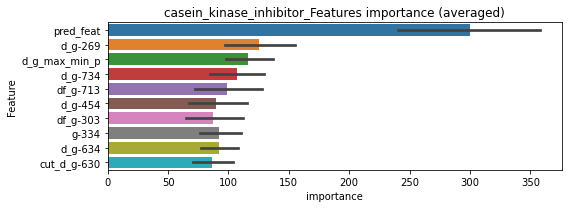

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 casein_kinase_inhibitor=================================


Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000927209	valid_1's binary_logloss: 0.00546424
Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 casein_kinase_inhibitor=================================


Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000722176	valid_1's binary_logloss: 0.00346135
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00050917	valid_1's binary_logloss: 0.00213057
[2000]	training's binary_logloss: 0.000299249	valid_1's binary_logloss: 0.0019291
Early stopping, best iteration is:
[2047]	training's binary_logloss: 0.000294975	valid_1's binary_logloss: 0.00192651


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000512369	valid_1's binary_logloss: 0.0014779
Early stopping, best iteration is:
[1506]	training's binary_logloss: 0.000361448	valid_1's binary_logloss: 0.00127468


casein_kinase_inhibitor logloss: 0.0030321725795772847


neg labels: 3289 → selected neg labels: 3288


caspase_activator, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107877	valid_1's binary_logloss: 0.00257217
[600]	training's binary_logloss: 0.000354196	valid_1's binary_logloss: 0.00137014
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000354204	valid_1's binary_logloss: 0.00137005
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107494	valid_1's binary_logloss: 0.00310721
[600]	training's binary_logloss: 0.000349492	valid_1's binary_logloss: 0.00159569
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000350746	valid_1's binary_logloss: 0.00159427
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00109401	valid_1's binary_logloss: 0.00198918
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000359435	valid_1's binary_logloss: 0.000842301
Training until validation scores don't improve for 30 roun

1 / 3 AUC score:1.000
y_Threshold: 0.0015324, Threshold: 0.0119915, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00839, conf_1:0.01559
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0119915
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_2: 0.0619915


[600]	training's binary_logloss: 0.00034479	valid_1's binary_logloss: 0.000988914
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00034479	valid_1's binary_logloss: 0.000988914


threshold: 0.0619915, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000517763	valid_1's binary_logloss: 0.000678988
[600]	training's binary_logloss: 0.000176132	valid_1's binary_logloss: 0.000296988
[900]	training's binary_logloss: 0.000148699	valid_1's binary_logloss: 0.000262302
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000149009	valid_1's binary_logloss: 0.000262133
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00049897	valid_1's binary_logloss: 0.00118925
[600]	training's binary_logloss: 0.000173445	valid_1's binary_logloss: 0.000749698
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.0001703	valid_1's binary_logloss: 0.000741325
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000500976	valid_1's binary_logloss: 0.00144672
Early stopping, best iteration is:
[424]	training's binary_logloss: 0.000244831	valid_1'

2 / 3 AUC score:1.000
y_Threshold: 0.5011012, Threshold: 0.0619915, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0655450 Vs.target_rate: 0.00076
Num_p_label: 261.0, conf_0:0.04959, conf_1:0.07439
Num_p_label: 261.0, Expected: 3.0, Adj_threshold_1: 0.0619915
Num_p_label: 261.0, Expected: 3.0, Adj_threshold_2: 0.1119915
Num_p_label: 260.0, Expected: 3.0, Adj_threshold_3: 0.1619915
Num_p_label: 258.0, Expected: 3.0, Adj_threshold_4: 0.2119915
Num_p_label: 245.0, Expected: 3.0, Adj_threshold_5: 0.2619915
Num_p_label: 220.0, Expected: 3.0, Adj_threshold_6: 0.3119915
Num_p_label: 190.0, Expected: 3.0, Adj_threshold_7: 0.3619915
Num_p_label: 159.0, Expected: 3.0, Adj_threshold_8: 0.4119915
Num_p_label: 145.0, Expected: 3.0, Adj_threshold_9: 0.4619915
Num_p_label: 114.0, Expected: 3.0, Adj_threshold_10: 0.5119915


[900]	training's binary_logloss: 0.000143512	valid_1's binary_logloss: 0.000241512
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000144697	valid_1's binary_logloss: 0.000241003


threshold: 0.5619915, positive_p_label: 87.0/3982, p_label_rate: 0.0218483
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000528921	valid_1's binary_logloss: 0.00073091
[600]	training's binary_logloss: 0.000176858	valid_1's binary_logloss: 0.000323213
[900]	training's binary_logloss: 0.000149668	valid_1's binary_logloss: 0.000290744
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.000150141	valid_1's binary_logloss: 0.000289745
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000497883	valid_1's binary_logloss: 0.00128438
[600]	training's binary_logloss: 0.000172724	valid_1's binary_logloss: 0.000835722
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000166699	valid_1's binary_logloss: 0.000829688
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00051673	valid_1's binary_logloss: 0.00233327
Early stopping, best iteration is:
[387]	training's binary_logloss: 0.000282976	valid_1

3 / 3 AUC score:1.000
y_Threshold: 0.4601731, Threshold: 0.5619915, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0153189 Vs.target_rate: 0.00076
Num_p_label: 61.0, conf_0:0.50000, conf_1:0.61819
Num_p_label: 61.0, Expected: 3.0, Adj_threshold_1: 0.5619915
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_2: 0.6119915
Num_p_label: 30.0, Expected: 3.0, Adj_threshold_3: 0.6619915
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_4: 0.7119915
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_5: 0.7619915
threshold: 0.7619915, positive_p_label: 13.0/3982, p_label_rate: 0.0032647


Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000148343	valid_1's binary_logloss: 0.000252142


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


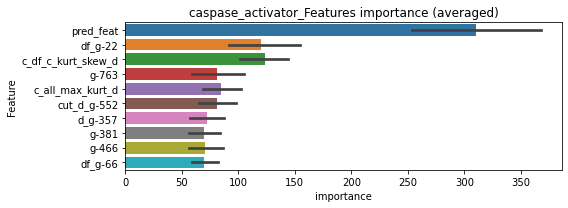

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000417248	valid_1's binary_logloss: 0.000585454
[2000]	training's binary_logloss: 0.000260186	valid_1's binary_logloss: 0.000413313
[3000]	training's binary_logloss: 0.000213896	valid_1's binary_logloss: 0.000355382
Early stopping, best iteration is:
[3467]	training's binary_logloss: 0.000201079	valid_1's binary_logloss: 0.000338269


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000413061	valid_1's binary_logloss: 0.0010621
[2000]	training's binary_logloss: 0.000255326	valid_1's binary_logloss: 0.000823153
Early stopping, best iteration is:
[2837]	training's binary_logloss: 0.000214103	valid_1's binary_logloss: 0.000759288


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 caspase_activator=================================


Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000623626	valid_1's binary_logloss: 0.00482544
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000408945	valid_1's binary_logloss: 0.000548814
[2000]	training's binary_logloss: 0.000254787	valid_1's binary_logloss: 0.000368942
[3000]	training's binary_logloss: 0.000208492	valid_1's binary_logloss: 0.000309605
[4000]	training's binary_logloss: 0.000185576	valid_1's binary_logloss: 0.000277596
[5000]	training's binary_logloss: 0.000173196	valid_1's binary_logloss: 0.00026095
[6000]	training's binary_logloss: 0.000164791	valid_1's binary_logloss: 0.000250371
[7000]	training's binary_logloss: 0.000158798	valid_1's binary_logloss: 0.000243877
[8000]	training's binary_logloss: 0.000154539	valid_1's binary_logloss: 0.000239506
Early stopping, best iteration is:
[8421]	training's binary_logloss: 0.00015304	valid_1's binary_logloss: 0.000238


caspase_activator logloss: 0.00154001106948084


neg labels: 3289 → selected neg labels: 3286


catechol_o_methyltransferase_inhibitor, len(trt): 18, len(othr): 3286
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124682	valid_1's binary_logloss: 0.00251227
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000385124	valid_1's binary_logloss: 0.00119751
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127003	valid_1's binary_logloss: 0.00511858
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000375621	valid_1's binary_logloss: 0.00275106
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127679	valid_1's binary_logloss: 0.00229649
[600]	training's binary_logloss: 0.000365325	valid_1's binary_logloss: 0.000980507
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000363007	valid_1's binary_logloss: 0.000977138
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012962	valid_1's binary_logloss: 0.0039429

1 / 3 AUC score:1.000
y_Threshold: 0.0018005, Threshold: 0.0079903, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00559, conf_1:0.01039
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0079903
Num_p_label: 3.0, Expected: 3.0, Adj_threshold_2: 0.0579903
threshold: 0.0579903, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000386074	valid_1's binary_logloss: 0.0019022


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000583765	valid_1's binary_logloss: 0.000627048
[600]	training's binary_logloss: 0.000183155	valid_1's binary_logloss: 0.000187222
[900]	training's binary_logloss: 0.000154146	valid_1's binary_logloss: 0.000151431
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000153192	valid_1's binary_logloss: 0.00015066
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000551255	valid_1's binary_logloss: 0.00121338
[600]	training's binary_logloss: 0.000172353	valid_1's binary_logloss: 0.000719305
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000166867	valid_1's binary_logloss: 0.000712042
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000553446	valid_1's binary_logloss: 0.00218986
Early stopping, best iteration is:
[366]	training's binary_logloss: 0.000330397	valid_

2 / 3 AUC score:1.000
y_Threshold: 0.5665401, Threshold: 0.0579903, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0710698 Vs.target_rate: 0.00076
Num_p_label: 283.0, conf_0:0.04639, conf_1:0.06959
Num_p_label: 283.0, Expected: 3.0, Adj_threshold_1: 0.0579903
Num_p_label: 283.0, Expected: 3.0, Adj_threshold_2: 0.1079903
Num_p_label: 283.0, Expected: 3.0, Adj_threshold_3: 0.1579903
Num_p_label: 281.0, Expected: 3.0, Adj_threshold_4: 0.2079903
Num_p_label: 272.0, Expected: 3.0, Adj_threshold_5: 0.2579903
Num_p_label: 258.0, Expected: 3.0, Adj_threshold_6: 0.3079903
Num_p_label: 235.0, Expected: 3.0, Adj_threshold_7: 0.3579903
Num_p_label: 203.0, Expected: 3.0, Adj_threshold_8: 0.4079903
Num_p_label: 168.0, Expected: 3.0, Adj_threshold_9: 0.4579903
Num_p_label: 125.0, Expected: 3.0, Adj_threshold_10: 0.5079903
threshold: 0.5579903, positive_p_label: 94.0/3982, p_label_rate: 0.0236062


Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000224055	valid_1's binary_logloss: 0.000497837


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000579095	valid_1's binary_logloss: 0.000589697
[600]	training's binary_logloss: 0.000181286	valid_1's binary_logloss: 0.000160138
[900]	training's binary_logloss: 0.000152309	valid_1's binary_logloss: 0.000124355
Early stopping, best iteration is:
[938]	training's binary_logloss: 0.000151222	valid_1's binary_logloss: 0.00012301
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000555358	valid_1's binary_logloss: 0.00114688
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000194374	valid_1's binary_logloss: 0.000668128
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000576192	valid_1's binary_logloss: 0.00672816
Early stopping, best iteration is:
[363]	training's binary_logloss: 0.000348435	valid_1's binary_logloss: 0.00569618
Training until validation scores don't improve for 3

3 / 3 AUC score:1.000
y_Threshold: 0.6169118, Threshold: 0.5579903, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0163235 Vs.target_rate: 0.00076
Num_p_label: 65.0, conf_0:0.50000, conf_1:0.61379
Num_p_label: 65.0, Expected: 3.0, Adj_threshold_1: 0.5579903
Num_p_label: 41.0, Expected: 3.0, Adj_threshold_2: 0.6079903
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_3: 0.6579903
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_4: 0.7079903
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_5: 0.7579903
threshold: 0.7579903, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000223992	valid_1's binary_logloss: 0.000515719


positive_y_label: 657.0/3811, y_label_rate: 0.1723957


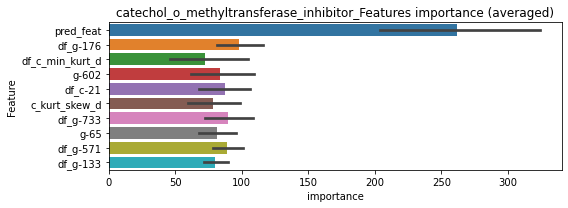

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000444126	valid_1's binary_logloss: 0.000410127
[2000]	training's binary_logloss: 0.000270386	valid_1's binary_logloss: 0.000237141
[3000]	training's binary_logloss: 0.000219964	valid_1's binary_logloss: 0.000184416
[4000]	training's binary_logloss: 0.000196625	valid_1's binary_logloss: 0.000158883
[5000]	training's binary_logloss: 0.000183807	valid_1's binary_logloss: 0.000144979
[6000]	training's binary_logloss: 0.000175504	valid_1's binary_logloss: 0.00013589
[7000]	training's binary_logloss: 0.000169308	valid_1's binary_logloss: 0.000129155
[8000]	training's binary_logloss: 0.000164871	valid_1's binary_logloss: 0.00012438
Early stopping, best iteration is:
[8967]	training's binary_logloss: 0.000161385	valid_1's binary_logloss: 0.000120682


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000428704	valid_1's binary_logloss: 0.00134501
Early stopping, best iteration is:
[1024]	training's binary_logloss: 0.000420524	valid_1's binary_logloss: 0.00133746


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 952


Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000937185	valid_1's binary_logloss: 0.0101819


================================= fold 4/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000432008	valid_1's binary_logloss: 0.000814208
[2000]	training's binary_logloss: 0.000265455	valid_1's binary_logloss: 0.000612156
[3000]	training's binary_logloss: 0.000215762	valid_1's binary_logloss: 0.000542349
[4000]	training's binary_logloss: 0.000190451	valid_1's binary_logloss: 0.000500132
Early stopping, best iteration is:
[4452]	training's binary_logloss: 0.000183927	valid_1's binary_logloss: 0.000489162


catechol_o_methyltransferase_inhibitor logloss: 0.003033014624264318


neg labels: 3289 → selected neg labels: 3276


cc_chemokine_receptor_antagonist, len(trt): 102, len(othr): 3276
target_rate: 0.0042832 → Adj_target_rate: 0.0042806
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102186	valid_1's binary_logloss: 0.0903774
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.00201084	valid_1's binary_logloss: 0.0811283
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010927	valid_1's binary_logloss: 0.0637374
[600]	training's binary_logloss: 0.00177536	valid_1's binary_logloss: 0.0471612
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.00122786	valid_1's binary_logloss: 0.0459825
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010998	valid_1's binary_logloss: 0.0536841
[600]	training's binary_logloss: 0.00180003	valid_1's binary_logloss: 0.037037
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.00127749	valid_1's binary_logloss: 0.0359556
Training until validation scores don't improve for 30 rounds
[300]	training's 

1 / 3 AUC score:0.996
y_Threshold: 0.0137472, Threshold: 0.0464231, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 647/3783
p_label_rate: 0.0100452 Vs.target_rate: 0.00428
Num_p_label: 40.0, conf_0:0.03250, conf_1:0.06035
Num_p_label: 40.0, Expected: 17.1, Adj_threshold_1: 0.0464231
Num_p_label: 11.0, Expected: 17.1, Adj_threshold_2: 0.0964231
threshold: 0.0964231, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 647.0/3783, y_label_rate: 0.1710283
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00137955	valid_1's binary_logloss: 0.00345855
[600]	training's binary_logloss: 0.000227398	valid_1's binary_logloss: 0.000663884
[900]	training's binary_logloss: 0.000157322	valid_1's binary_logloss: 0.000432803
Early stopping, best iteration is:
[1035]	training's binary_logloss: 0.000148039	valid_1's binary_logloss: 0.000400776
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144948	valid_1's binary_logloss: 0.00762528
[600]	training's binary_logloss: 0.000231028	valid_1's binary_logloss: 0.00558108
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000252281	valid_1's binary_logloss: 0.00557457
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00142999	valid_1's binary_logloss: 0.00620836
[600]	training's binary_logloss: 0.000228574	valid_1's binary_logloss: 0.0040153
[900]	tra

2 / 3 AUC score:1.000
y_Threshold: 0.1798219, Threshold: 0.0964231, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 645.0/3779
p_label_rate: 0.0534907 Vs.target_rate: 0.00428
Num_p_label: 213.0, conf_0:0.07714, conf_1:0.11571
Num_p_label: 213.0, Expected: 17.1, Adj_threshold_1: 0.0964231
Num_p_label: 157.0, Expected: 17.1, Adj_threshold_2: 0.1464231
Num_p_label: 150.0, Expected: 17.1, Adj_threshold_3: 0.1964231
Num_p_label: 148.0, Expected: 17.1, Adj_threshold_4: 0.2464231
Num_p_label: 147.0, Expected: 17.1, Adj_threshold_5: 0.2964231
Num_p_label: 132.0, Expected: 17.1, Adj_threshold_6: 0.3464231
Num_p_label: 123.0, Expected: 17.1, Adj_threshold_7: 0.3964231
Num_p_label: 120.0, Expected: 17.1, Adj_threshold_8: 0.4464231
Num_p_label: 120.0, Expected: 17.1, Adj_threshold_9: 0.4964231
Num_p_label: 112.0, Expected: 17.1, Adj_threshold_10: 0.5464231
threshold: 0.5964231, positive_p_label: 103.0/3982, p_label_rate: 0.0258664
positive_y_label: 645.0/3779, y_label_rate:

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013366	valid_1's binary_logloss: 0.00610365
[600]	training's binary_logloss: 0.000220822	valid_1's binary_logloss: 0.00381488
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000200806	valid_1's binary_logloss: 0.00379216
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117087	valid_1's binary_logloss: 0.00272989
[600]	training's binary_logloss: 0.000170708	valid_1's binary_logloss: 0.000430505
[900]	training's binary_logloss: 0.000108491	valid_1's binary_logloss: 0.000275132
[1200]	training's binary_logloss: 0.000101877	valid_1's binary_logloss: 0.000258393
Early stopping, best iteration is:
[1337]	training's binary_logloss: 0.000100755	valid_1's binary_logloss: 0.000255209
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121535	valid_1's binary_logloss: 0.00221714
[600]	t

3 / 3 AUC score:1.000
y_Threshold: 0.8831675, Threshold: 0.5964231, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 644.0/3777
p_label_rate: 0.0271220 Vs.target_rate: 0.00428
Num_p_label: 108.0, conf_0:0.50000, conf_1:0.65607
Num_p_label: 108.0, Expected: 17.1, Adj_threshold_1: 0.5964231
Num_p_label: 108.0, Expected: 17.1, Adj_threshold_2: 0.6464231
Num_p_label: 108.0, Expected: 17.1, Adj_threshold_3: 0.6964231
Num_p_label: 104.0, Expected: 17.1, Adj_threshold_4: 0.7464231
Num_p_label: 104.0, Expected: 17.1, Adj_threshold_5: 0.7964231
threshold: 0.7964231, positive_p_label: 104.0/3982, p_label_rate: 0.0261175
positive_y_label: 644.0/3777, y_label_rate: 0.1705057


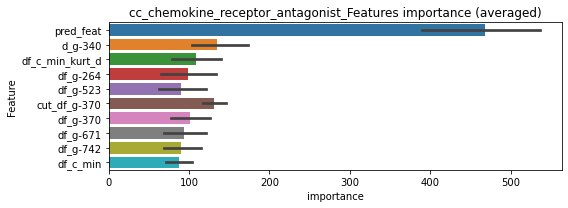

len(train_index) : 2832
len(valid_index) : 945
================================= fold 1/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2833
len(valid_index) : 944


Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000673977	valid_1's binary_logloss: 0.0102303


================================= fold 2/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000551563	valid_1's binary_logloss: 0.000887293
[2000]	training's binary_logloss: 0.000313073	valid_1's binary_logloss: 0.000487143
[3000]	training's binary_logloss: 0.000238418	valid_1's binary_logloss: 0.000358695
[4000]	training's binary_logloss: 0.000202625	valid_1's binary_logloss: 0.000295735
[5000]	training's binary_logloss: 0.000184023	valid_1's binary_logloss: 0.000263045
[6000]	training's binary_logloss: 0.000171392	valid_1's binary_logloss: 0.000241441
[7000]	training's binary_logloss: 0.000162009	valid_1's binary_logloss: 0.000224842
[8000]	training's binary_logloss: 0.000155088	valid_1's binary_logloss: 0.000212518
[9000]	training's binary_logloss: 0.000149847	valid_1's binary_logloss: 0.000202783
Early stopping, best iteration is:
[9794]	training's binary_logloss: 0.000146671	valid_1's binary_logloss: 0.000196734


len(train_index) : 2833
len(valid_index) : 944
================================= fold 3/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000562632	valid_1's binary_logloss: 0.00108886
[2000]	training's binary_logloss: 0.000318031	valid_1's binary_logloss: 0.000817932
[3000]	training's binary_logloss: 0.000241118	valid_1's binary_logloss: 0.000720611
[4000]	training's binary_logloss: 0.000204288	valid_1's binary_logloss: 0.000670726
Early stopping, best iteration is:
[4073]	training's binary_logloss: 0.000202456	valid_1's binary_logloss: 0.000667447


len(train_index) : 2833
len(valid_index) : 944
================================= fold 4/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000541615	valid_1's binary_logloss: 0.00172306
[2000]	training's binary_logloss: 0.000310186	valid_1's binary_logloss: 0.00140331
Early stopping, best iteration is:
[2968]	training's binary_logloss: 0.000237625	valid_1's binary_logloss: 0.00131237


cc_chemokine_receptor_antagonist logloss: 0.0031040118841760616


neg labels: 3289 → selected neg labels: 3288


cck_receptor_antagonist, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135876	valid_1's binary_logloss: 0.00310459
[600]	training's binary_logloss: 0.000377027	valid_1's binary_logloss: 0.00125079
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000377052	valid_1's binary_logloss: 0.00125065
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013575	valid_1's binary_logloss: 0.00507812
[600]	training's binary_logloss: 0.000371124	valid_1's binary_logloss: 0.00241517
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000377261	valid_1's binary_logloss: 0.00241348
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138564	valid_1's binary_logloss: 0.00211348
[600]	training's binary_logloss: 0.000373432	valid_1's binary_logloss: 0.000739395
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000369946	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0016649, Threshold: 0.0045757, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00320, conf_1:0.00595
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0045757


[600]	training's binary_logloss: 0.00037592	valid_1's binary_logloss: 0.00108753
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000376009	valid_1's binary_logloss: 0.00108733


Num_p_label: 1.0, Expected: 3.0, Adj_threshold_2: 0.0545757
threshold: 0.0545757, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000594074	valid_1's binary_logloss: 0.0015768
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000193804	valid_1's binary_logloss: 0.00109811
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000571816	valid_1's binary_logloss: 0.00143672
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000192542	valid_1's binary_logloss: 0.000794803
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000584478	valid_1's binary_logloss: 0.00101428
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000198095	valid_1's binary_logloss: 0.000666272
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000596338	valid_1's binary_logloss: 0.00081365
[600]	training's binary_logloss: 0.000182109	valid_1's binary_logloss: 0.000

2 / 3 AUC score:1.000
y_Threshold: 0.4526090, Threshold: 0.0545757, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0482170 Vs.target_rate: 0.00076
Num_p_label: 192.0, conf_0:0.04366, conf_1:0.06549
Num_p_label: 192.0, Expected: 3.0, Adj_threshold_1: 0.0545757


[900]	training's binary_logloss: 0.000152045	valid_1's binary_logloss: 0.000278999
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000153493	valid_1's binary_logloss: 0.000277721


Num_p_label: 190.0, Expected: 3.0, Adj_threshold_2: 0.1045757
Num_p_label: 188.0, Expected: 3.0, Adj_threshold_3: 0.1545757
Num_p_label: 188.0, Expected: 3.0, Adj_threshold_4: 0.2045757
Num_p_label: 182.0, Expected: 3.0, Adj_threshold_5: 0.2545757
Num_p_label: 162.0, Expected: 3.0, Adj_threshold_6: 0.3045757
Num_p_label: 135.0, Expected: 3.0, Adj_threshold_7: 0.3545757
Num_p_label: 103.0, Expected: 3.0, Adj_threshold_8: 0.4045757
Num_p_label: 68.0, Expected: 3.0, Adj_threshold_9: 0.4545757
Num_p_label: 39.0, Expected: 3.0, Adj_threshold_10: 0.5045757
threshold: 0.5545757, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000596443	valid_1's binary_logloss: 0.00155979
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000219542	valid_1's binary_logloss: 0.00111549
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000569995	valid_1's binary_logloss: 0.00148294
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000227419	valid_1's binary_logloss: 0.000934957
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000588198	valid_1's binary_logloss: 0.00109988
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000202789	valid_1's binary_logloss: 0.00075835
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000592647	valid_1's binary_logloss: 0.000864349
[600]	training's binary_logloss: 0.000181334	valid_1's binary_logloss: 0.00

3 / 3 AUC score:1.000
y_Threshold: 0.4881827, Threshold: 0.5545757, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0052737 Vs.target_rate: 0.00076
Num_p_label: 21.0, conf_0:0.49912, conf_1:0.61003
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_1: 0.5545757
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_2: 0.6045757
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_3: 0.6545757
threshold: 0.6545757, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


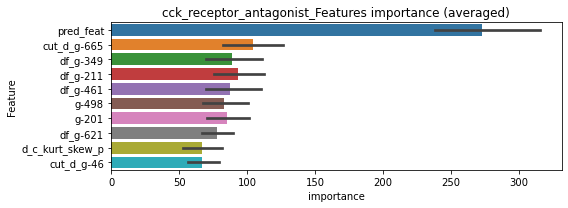

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000443098	valid_1's binary_logloss: 0.00143391
[2000]	training's binary_logloss: 0.000270112	valid_1's binary_logloss: 0.00123233
Early stopping, best iteration is:
[2835]	training's binary_logloss: 0.000223183	valid_1's binary_logloss: 0.00118031


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000432193	valid_1's binary_logloss: 0.00122184
Early stopping, best iteration is:
[1146]	training's binary_logloss: 0.000388658	valid_1's binary_logloss: 0.00116869


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000434389	valid_1's binary_logloss: 0.000963252
Early stopping, best iteration is:
[1629]	training's binary_logloss: 0.000295913	valid_1's binary_logloss: 0.000823382


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000438557	valid_1's binary_logloss: 0.000678536
[2000]	training's binary_logloss: 0.000267292	valid_1's binary_logloss: 0.000499073
[3000]	training's binary_logloss: 0.000217595	valid_1's binary_logloss: 0.000440979
[4000]	training's binary_logloss: 0.00019324	valid_1's binary_logloss: 0.000405203
Early stopping, best iteration is:
[4873]	training's binary_logloss: 0.000181392	valid_1's binary_logloss: 0.000386589


cck_receptor_antagonist logloss: 0.0008904031712974189


neg labels: 3289 → selected neg labels: 3241


cdk_inhibitor, len(trt): 352, len(othr): 3241
target_rate: 0.0147812 → Adj_target_rate: 0.0122676
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0602596	valid_1's binary_logloss: 0.312281
Early stopping, best iteration is:
[352]	training's binary_logloss: 0.0440667	valid_1's binary_logloss: 0.310566
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0593648	valid_1's binary_logloss: 0.318375
Early stopping, best iteration is:
[371]	training's binary_logloss: 0.039882	valid_1's binary_logloss: 0.315103
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0585465	valid_1's binary_logloss: 0.329593
Early stopping, best iteration is:
[316]	training's binary_logloss: 0.0534385	valid_1's binary_logloss: 0.32841
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0569227	valid_1's binary_logloss: 0.332866


1 / 3 AUC score:0.824
y_Threshold: 0.1168458, Threshold: 0.4199641, pos_neg_ratio: 0.8000000
Remove_noisy_data: 582 → Positive_corect_labels: 422/3307
p_label_rate: 0.0100452 Vs.target_rate: 0.01478
Num_p_label: 40.0, conf_0:0.29397, conf_1:0.54595
threshold: 0.4199641, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[304]	training's binary_logloss: 0.0554321	valid_1's binary_logloss: 0.332263


positive_y_label: 422.0/3307, y_label_rate: 0.1276081
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183933	valid_1's binary_logloss: 0.00769613
[600]	training's binary_logloss: 0.000276562	valid_1's binary_logloss: 0.00288115
[900]	training's binary_logloss: 0.000182036	valid_1's binary_logloss: 0.00245336
Early stopping, best iteration is:
[989]	training's binary_logloss: 0.000174825	valid_1's binary_logloss: 0.00241912
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00184411	valid_1's binary_logloss: 0.00849629
[600]	training's binary_logloss: 0.000275417	valid_1's binary_logloss: 0.00385754
[900]	training's binary_logloss: 0.000183327	valid_1's binary_logloss: 0.00348976
Early stopping, best iteration is:
[923]	training's binary_logloss: 0.000180647	valid_1's binary_logloss: 0.00347518
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00197841	valid_1's binary_logloss: 0.00623535
[600]	traini

2 / 3 AUC score:1.000
y_Threshold: 0.2042687, Threshold: 0.4199641, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 421.0/3305
p_label_rate: 0.1107484 Vs.target_rate: 0.01478
Num_p_label: 441.0, conf_0:0.33597, conf_1:0.50396
Num_p_label: 441.0, Expected: 58.9, Adj_threshold_1: 0.4199641
Num_p_label: 441.0, Expected: 58.9, Adj_threshold_2: 0.4699641
Num_p_label: 441.0, Expected: 58.9, Adj_threshold_3: 0.5199641
Num_p_label: 441.0, Expected: 58.9, Adj_threshold_4: 0.5699641
Num_p_label: 441.0, Expected: 58.9, Adj_threshold_5: 0.6199641
Num_p_label: 441.0, Expected: 58.9, Adj_threshold_6: 0.6699641
Num_p_label: 441.0, Expected: 58.9, Adj_threshold_7: 0.7199641
Num_p_label: 440.0, Expected: 58.9, Adj_threshold_8: 0.7699641
threshold: 0.7699641, positive_p_label: 440.0/3982, p_label_rate: 0.1104972
positive_y_label: 421.0/3305, y_label_rate: 0.1273828
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00164858	valid_1's binary_logloss: 0.0117315
Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000418288	valid_1's binary_logloss: 0.00996025
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00186617	valid_1's binary_logloss: 0.005433
[600]	training's binary_logloss: 0.000283593	valid_1's binary_logloss: 0.00103744
[900]	training's binary_logloss: 0.00018489	valid_1's binary_logloss: 0.000671743
Early stopping, best iteration is:
[1013]	training's binary_logloss: 0.000173834	valid_1's binary_logloss: 0.000630305
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00186844	valid_1's binary_logloss: 0.00492537
[600]	training's binary_logloss: 0.000280619	valid_1's binary_logloss: 0.000741993
[900]	training's binary_logloss: 0.000185818	valid_1's binary_logloss: 0.00042943
Early stoppi

3 / 3 AUC score:1.000
y_Threshold: 0.1852705, Threshold: 0.7699641, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 419.0/3301
p_label_rate: 0.1109995 Vs.target_rate: 0.01478
Num_p_label: 442.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 442.0, Expected: 58.9, Adj_threshold_1: 0.7699641
threshold: 0.7699641, positive_p_label: 442.0/3982, p_label_rate: 0.1109995
positive_y_label: 419.0/3301, y_label_rate: 0.1269312


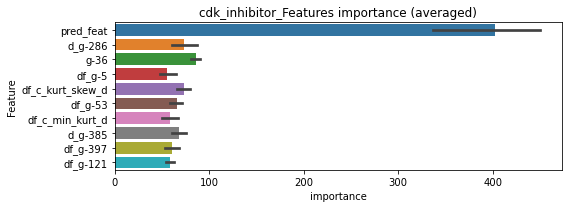

len(train_index) : 2475
len(valid_index) : 826
================================= fold 1/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2476
len(valid_index) : 825
================================= fold 2/4 cdk_inhibitor=================================


Early stopping, best iteration is:
[520]	training's binary_logloss: 0.00127584	valid_1's binary_logloss: 0.00631088
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000672	valid_1's binary_logloss: 0.00115395
[2000]	training's binary_logloss: 0.000374551	valid_1's binary_logloss: 0.00062333
[3000]	training's binary_logloss: 0.000280606	valid_1's binary_logloss: 0.000453053
[4000]	training's binary_logloss: 0.000236109	valid_1's binary_logloss: 0.000369837
[5000]	training's binary_logloss: 0.000212413	valid_1's binary_logloss: 0.000326095
[6000]	training's binary_logloss: 0.000196689	valid_1's binary_logloss: 0.000297919
[7000]	training's binary_logloss: 0.000185418	valid_1's binary_logloss: 0.000276495
Early stopping, best iteration is:
[7917]	training's binary_logloss: 0.000178127	valid_1's binary_logloss: 0.000262083


len(train_index) : 2476
len(valid_index) : 825
================================= fold 3/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000683093	valid_1's binary_logloss: 0.00110077
[2000]	training's binary_logloss: 0.000377499	valid_1's binary_logloss: 0.000606661
[3000]	training's binary_logloss: 0.000281676	valid_1's binary_logloss: 0.000447657
[4000]	training's binary_logloss: 0.000236707	valid_1's binary_logloss: 0.00036955
[5000]	training's binary_logloss: 0.000212999	valid_1's binary_logloss: 0.000328565
[6000]	training's binary_logloss: 0.000197216	valid_1's binary_logloss: 0.000301962
[7000]	training's binary_logloss: 0.000185794	valid_1's binary_logloss: 0.000282036
Early stopping, best iteration is:
[7869]	training's binary_logloss: 0.000178628	valid_1's binary_logloss: 0.000268285


len(train_index) : 2476
len(valid_index) : 825
================================= fold 4/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000545242	valid_1's binary_logloss: 0.00115193
[2000]	training's binary_logloss: 0.000294198	valid_1's binary_logloss: 0.000624166
[3000]	training's binary_logloss: 0.000214289	valid_1's binary_logloss: 0.000455228
[4000]	training's binary_logloss: 0.000176871	valid_1's binary_logloss: 0.000376025
[5000]	training's binary_logloss: 0.000157878	valid_1's binary_logloss: 0.000335793
[6000]	training's binary_logloss: 0.000145728	valid_1's binary_logloss: 0.000309986
[7000]	training's binary_logloss: 0.000137264	valid_1's binary_logloss: 0.000291988
[8000]	training's binary_logloss: 0.000131506	valid_1's binary_logloss: 0.000279777
[9000]	training's binary_logloss: 0.000127408	valid_1's binary_logloss: 0.000271063
[10000]	training's binary_logloss: 0.000124448	valid_1's binary_logloss: 0.000264779
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000124448	valid

cdk_inhibitor logloss: 0.0017778804052429962


neg labels: 3289 → selected neg labels: 3282


chelating_agent, len(trt): 54, len(othr): 3282
target_rate: 0.0022676 → Adj_target_rate: 0.0024931
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00424027	valid_1's binary_logloss: 0.0363941
[600]	training's binary_logloss: 0.000825275	valid_1's binary_logloss: 0.0294889
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000889033	valid_1's binary_logloss: 0.0294534
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00445274	valid_1's binary_logloss: 0.0239312
[600]	training's binary_logloss: 0.000846099	valid_1's binary_logloss: 0.0145976
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000599431	valid_1's binary_logloss: 0.0136418
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0047387	valid_1's binary_logloss: 0.0121115
[600]	training's binary_logloss: 0.000894144	valid_1's binary_logloss: 0.00555112
Early stopping, best iteration is:
[838]	training's binary_logloss: 0.00062125	valid_1's binary_loglos

1 / 3 AUC score:1.000
y_Threshold: 0.0056714, Threshold: 0.0240556, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, conf_0:0.01684, conf_1:0.03127
Num_p_label: 40.0, Expected: 9.0, Adj_threshold_1: 0.0240556
Num_p_label: 24.0, Expected: 9.0, Adj_threshold_2: 0.0740556
Num_p_label: 18.0, Expected: 9.0, Adj_threshold_3: 0.1240556
threshold: 0.1240556, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103419	valid_1's binary_logloss: 0.00405443
[600]	training's binary_logloss: 0.000218009	valid_1's binary_logloss: 0.00234903
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000228362	valid_1's binary_logloss: 0.00233751
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0010834	valid_1's binary_logloss: 0.00519924
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000351932	valid_1's binary_logloss: 0.0042953
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110685	valid_1's binary_logloss: 0.00297795
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000266868	valid_1's binary_logloss: 0.00193938
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106967	valid_1's binary_logloss: 0.00387155


2 / 3 AUC score:1.000
y_Threshold: 0.5810061, Threshold: 0.1240556, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0565043 Vs.target_rate: 0.00227
Num_p_label: 225.0, conf_0:0.09924, conf_1:0.14887
Num_p_label: 225.0, Expected: 9.0, Adj_threshold_1: 0.1240556
Num_p_label: 223.0, Expected: 9.0, Adj_threshold_2: 0.1740556
Num_p_label: 222.0, Expected: 9.0, Adj_threshold_3: 0.2240556


[600]	training's binary_logloss: 0.000218476	valid_1's binary_logloss: 0.00203563
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000214565	valid_1's binary_logloss: 0.00201652


Num_p_label: 222.0, Expected: 9.0, Adj_threshold_4: 0.2740556
Num_p_label: 222.0, Expected: 9.0, Adj_threshold_5: 0.3240556
Num_p_label: 221.0, Expected: 9.0, Adj_threshold_6: 0.3740556
Num_p_label: 221.0, Expected: 9.0, Adj_threshold_7: 0.4240556
Num_p_label: 220.0, Expected: 9.0, Adj_threshold_8: 0.4740556
Num_p_label: 218.0, Expected: 9.0, Adj_threshold_9: 0.5240556
Num_p_label: 209.0, Expected: 9.0, Adj_threshold_10: 0.5740556
threshold: 0.6240556, positive_p_label: 190.0/3982, p_label_rate: 0.0477147
positive_y_label: 653.0/3800, y_label_rate: 0.1718421
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107454	valid_1's binary_logloss: 0.0053602
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000248133	valid_1's binary_logloss: 0.00388471
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106032	valid_1's binary_logloss: 0.00737399
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000275461	valid_1's binary_logloss: 0.00591129
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108841	valid_1's binary_logloss: 0.00348466
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000260063	valid_1's binary_logloss: 0.00200936
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108183	valid_1's binary_logloss: 0.00308451


3 / 3 AUC score:1.000
y_Threshold: 0.3130439, Threshold: 0.6240556, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3796
p_label_rate: 0.0105475 Vs.target_rate: 0.00227
Num_p_label: 42.0, conf_0:0.50000, conf_1:0.68646
Num_p_label: 42.0, Expected: 9.0, Adj_threshold_1: 0.6240556
Num_p_label: 41.0, Expected: 9.0, Adj_threshold_2: 0.6740556
Num_p_label: 33.0, Expected: 9.0, Adj_threshold_3: 0.7240556
Num_p_label: 29.0, Expected: 9.0, Adj_threshold_4: 0.7740556


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000251095	valid_1's binary_logloss: 0.00183782


threshold: 0.7740556, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 651.0/3796, y_label_rate: 0.1714963


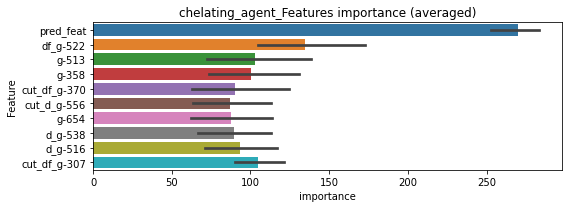

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000535514	valid_1's binary_logloss: 0.0042419
[2000]	training's binary_logloss: 0.000309762	valid_1's binary_logloss: 0.00374465
Early stopping, best iteration is:
[2726]	training's binary_logloss: 0.00025591	valid_1's binary_logloss: 0.00359122


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00053928	valid_1's binary_logloss: 0.00189715
Early stopping, best iteration is:
[1837]	training's binary_logloss: 0.000331664	valid_1's binary_logloss: 0.00151117


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000540803	valid_1's binary_logloss: 0.00309782
Early stopping, best iteration is:
[1623]	training's binary_logloss: 0.000356954	valid_1's binary_logloss: 0.00278105


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000536406	valid_1's binary_logloss: 0.00228987
Early stopping, best iteration is:
[1728]	training's binary_logloss: 0.000342565	valid_1's binary_logloss: 0.00204065


chelating_agent logloss: 0.00248296751380509


neg labels: 3289 → selected neg labels: 3285


chk_inhibitor, len(trt): 24, len(othr): 3285
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00164566	valid_1's binary_logloss: 0.00353398
[600]	training's binary_logloss: 0.000429725	valid_1's binary_logloss: 0.00128943
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000428159	valid_1's binary_logloss: 0.00128749
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00170319	valid_1's binary_logloss: 0.00376789
[600]	training's binary_logloss: 0.000429268	valid_1's binary_logloss: 0.00137445
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000425966	valid_1's binary_logloss: 0.00136875
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162672	valid_1's binary_logloss: 0.00420596
[600]	training's binary_logloss: 0.000426352	valid_1's binary_logloss: 0.0015876
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000420969	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0030112, Threshold: 0.0964306, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.06750, conf_1:0.12536
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0964306
Num_p_label: 32.0, Expected: 4.0, Adj_threshold_2: 0.1464306
Num_p_label: 28.0, Expected: 4.0, Adj_threshold_3: 0.1964306
Num_p_label: 25.0, Expected: 4.0, Adj_threshold_4: 0.2464306
Num_p_label: 25.0, Expected: 4.0, Adj_threshold_5: 0.2964306
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_6: 0.3464306
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_7: 0.3964306
Num_p_label: 14.0, Expected: 4.0, Adj_threshold_8: 0.4464306
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_9: 0.4964306
Num_p_label: 7.0, Expected: 4.0, Adj_threshold_10: 0.5464306
threshold: 0.5464306, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
=============

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000647073	valid_1's binary_logloss: 0.00196052
Early stopping, best iteration is:
[394]	training's binary_logloss: 0.00032011	valid_1's binary_logloss: 0.00164952
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000643929	valid_1's binary_logloss: 0.000830574
[600]	training's binary_logloss: 0.000185259	valid_1's binary_logloss: 0.000260927
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000150776	valid_1's binary_logloss: 0.00021583
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000637185	valid_1's binary_logloss: 0.000972297
[600]	training's binary_logloss: 0.000183444	valid_1's binary_logloss: 0.000474394
Early stopping, best iteration is:
[774]	training's binary_logloss: 0.000155536	valid_1's binary_logloss: 0.000440418
Training until validation scores don't improve for 3

2 / 3 AUC score:1.000
y_Threshold: 0.5243700, Threshold: 0.5464306, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0311401 Vs.target_rate: 0.00101
Num_p_label: 124.0, conf_0:0.43714, conf_1:0.65572
Num_p_label: 124.0, Expected: 4.0, Adj_threshold_1: 0.5464306
Num_p_label: 106.0, Expected: 4.0, Adj_threshold_2: 0.5964306
Num_p_label: 96.0, Expected: 4.0, Adj_threshold_3: 0.6464306
Num_p_label: 80.0, Expected: 4.0, Adj_threshold_4: 0.6964306
Num_p_label: 64.0, Expected: 4.0, Adj_threshold_5: 0.7464306
Num_p_label: 49.0, Expected: 4.0, Adj_threshold_6: 0.7964306
threshold: 0.7964306, positive_p_label: 49.0/3982, p_label_rate: 0.0123054


Early stopping, best iteration is:
[398]	training's binary_logloss: 0.000316683	valid_1's binary_logloss: 0.00126476


positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000658688	valid_1's binary_logloss: 0.0024122
Early stopping, best iteration is:
[390]	training's binary_logloss: 0.000335713	valid_1's binary_logloss: 0.00184611
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000636931	valid_1's binary_logloss: 0.000858252
[600]	training's binary_logloss: 0.000182553	valid_1's binary_logloss: 0.000300375
[900]	training's binary_logloss: 0.000148308	valid_1's binary_logloss: 0.000256146
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000148308	valid_1's binary_logloss: 0.000256146
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000641833	valid_1's binary_logloss: 0.00098917
[600]	training's binary_logloss: 0.000183534	valid_1's binary_logloss: 0.000419816
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000161148	valid_1

3 / 3 AUC score:1.000


[600]	training's binary_logloss: 0.000184252	valid_1's binary_logloss: 0.00138849
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000170739	valid_1's binary_logloss: 0.00136471


y_Threshold: 0.4768742, Threshold: 0.7964306, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0105475 Vs.target_rate: 0.00101
Num_p_label: 42.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 42.0, Expected: 4.0, Adj_threshold_1: 0.7964306
threshold: 0.7964306, positive_p_label: 42.0/3982, p_label_rate: 0.0105475
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


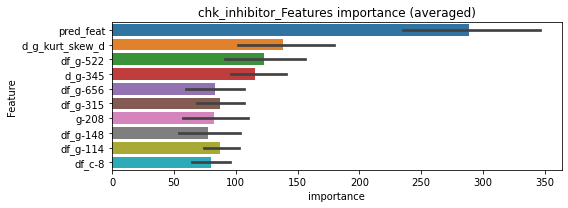

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 chk_inhibitor=================================


Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000611156	valid_1's binary_logloss: 0.00798052
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000454693	valid_1's binary_logloss: 0.000679033
[2000]	training's binary_logloss: 0.000273382	valid_1's binary_logloss: 0.000478904
[3000]	training's binary_logloss: 0.000221275	valid_1's binary_logloss: 0.000410377
[4000]	training's binary_logloss: 0.000194969	valid_1's binary_logloss: 0.000370855
[5000]	training's binary_logloss: 0.000180716	valid_1's binary_logloss: 0.000350717
[6000]	training's binary_logloss: 0.000171269	valid_1's binary_logloss: 0.000337647
Early stopping, best iteration is:
[6110]	training's binary_logloss: 0.000170368	valid_1's binary_logloss: 0.000336613


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000446413	valid_1's binary_logloss: 0.00108478
[2000]	training's binary_logloss: 0.00027009	valid_1's binary_logloss: 0.000873782
Early stopping, best iteration is:
[2707]	training's binary_logloss: 0.000228451	valid_1's binary_logloss: 0.000816457


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000456147	valid_1's binary_logloss: 0.00166992
[2000]	training's binary_logloss: 0.000272201	valid_1's binary_logloss: 0.00140204
[3000]	training's binary_logloss: 0.00021676	valid_1's binary_logloss: 0.00131572
[4000]	training's binary_logloss: 0.000193716	valid_1's binary_logloss: 0.00127929
[5000]	training's binary_logloss: 0.000181047	valid_1's binary_logloss: 0.00125899
[6000]	training's binary_logloss: 0.000170463	valid_1's binary_logloss: 0.00124147
[7000]	training's binary_logloss: 0.000163852	valid_1's binary_logloss: 0.00122991
Early stopping, best iteration is:
[7312]	training's binary_logloss: 0.000162644	valid_1's binary_logloss: 0.00122829


chk_inhibitor logloss: 0.0025914283725110496


neg labels: 3289 → selected neg labels: 3284


chloride_channel_blocker, len(trt): 42, len(othr): 3284
target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00301726	valid_1's binary_logloss: 0.0198977
[600]	training's binary_logloss: 0.000638931	valid_1's binary_logloss: 0.012627
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000552073	valid_1's binary_logloss: 0.0123555
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00319359	valid_1's binary_logloss: 0.0146709
[600]	training's binary_logloss: 0.000655681	valid_1's binary_logloss: 0.00903038
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.00056167	valid_1's binary_logloss: 0.00882229
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00343569	valid_1's binary_logloss: 0.008306
[600]	training's binary_logloss: 0.000685959	valid_1's binary_logloss: 0.00329209
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.00058985	valid_1's binary_loglos

1 / 3 AUC score:1.000
y_Threshold: 0.0048714, Threshold: 0.0522774, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, conf_0:0.03659, conf_1:0.06796
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_1: 0.0522774
Num_p_label: 18.0, Expected: 7.0, Adj_threshold_2: 0.1022774
Num_p_label: 11.0, Expected: 7.0, Adj_threshold_3: 0.1522774
threshold: 0.1522774, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000870225	valid_1's binary_logloss: 0.00380455
[600]	training's binary_logloss: 0.000208716	valid_1's binary_logloss: 0.00255541
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000183248	valid_1's binary_logloss: 0.00249878
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000890998	valid_1's binary_logloss: 0.00275015
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000232425	valid_1's binary_logloss: 0.00180805
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000923323	valid_1's binary_logloss: 0.00202409
[600]	training's binary_logloss: 0.000214781	valid_1's binary_logloss: 0.0011937
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000205103	valid_1's binary_logloss: 0.00116767
Training until validation scores don't improve for 30 rou

2 / 3 AUC score:1.000
y_Threshold: 0.6186813, Threshold: 0.1522774, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0597690 Vs.target_rate: 0.00176
Num_p_label: 238.0, conf_0:0.12182, conf_1:0.18273
Num_p_label: 238.0, Expected: 7.0, Adj_threshold_1: 0.1522774
Num_p_label: 238.0, Expected: 7.0, Adj_threshold_2: 0.2022774
Num_p_label: 238.0, Expected: 7.0, Adj_threshold_3: 0.2522774
Num_p_label: 238.0, Expected: 7.0, Adj_threshold_4: 0.3022774
Num_p_label: 238.0, Expected: 7.0, Adj_threshold_5: 0.3522774
Num_p_label: 237.0, Expected: 7.0, Adj_threshold_6: 0.4022774
Num_p_label: 235.0, Expected: 7.0, Adj_threshold_7: 0.4522774
Num_p_label: 231.0, Expected: 7.0, Adj_threshold_8: 0.5022774
Num_p_label: 221.0, Expected: 7.0, Adj_threshold_9: 0.5522774


Early stopping, best iteration is:
[818]	training's binary_logloss: 0.000173118	valid_1's binary_logloss: 0.000916553


Num_p_label: 203.0, Expected: 7.0, Adj_threshold_10: 0.6022774
threshold: 0.6522774, positive_p_label: 177.0/3982, p_label_rate: 0.0444500
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000858736	valid_1's binary_logloss: 0.00433331
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000231219	valid_1's binary_logloss: 0.00317684
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000914269	valid_1's binary_logloss: 0.00274499
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.00024618	valid_1's binary_logloss: 0.00169837
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000922261	valid_1's binary_logloss: 0.00413946
Early stopping, best iteration is:
[336]	training's binary_logloss: 0.000651748	valid_1's binary_logloss: 0.00387638
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000878176	valid_1's binary_logloss: 0.00195011
[600]	training's binary_logloss: 0.000212419	valid_1's binary_logloss: 0.00081

3 / 3 AUC score:1.000
y_Threshold: 0.6661324, Threshold: 0.6522774, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3804


Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000171436	valid_1's binary_logloss: 0.000751038


p_label_rate: 0.0444500 Vs.target_rate: 0.00176
Num_p_label: 177.0, conf_0:0.50000, conf_1:0.71751
Num_p_label: 177.0, Expected: 7.0, Adj_threshold_1: 0.6522774
Num_p_label: 140.0, Expected: 7.0, Adj_threshold_2: 0.7022774
Num_p_label: 102.0, Expected: 7.0, Adj_threshold_3: 0.7522774
threshold: 0.7522774, positive_p_label: 102.0/3982, p_label_rate: 0.0256153
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


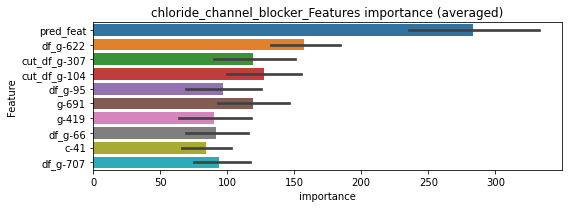

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 chloride_channel_blocker=================================


Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000997477	valid_1's binary_logloss: 0.0066032
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00052101	valid_1's binary_logloss: 0.00204803
Early stopping, best iteration is:
[1069]	training's binary_logloss: 0.000490341	valid_1's binary_logloss: 0.00199655


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000517623	valid_1's binary_logloss: 0.00171452
Early stopping, best iteration is:
[992]	training's binary_logloss: 0.000522414	valid_1's binary_logloss: 0.00170934


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000510424	valid_1's binary_logloss: 0.00146418
Early stopping, best iteration is:
[1339]	training's binary_logloss: 0.000396524	valid_1's binary_logloss: 0.00129582


chloride_channel_blocker logloss: 0.0029014902213161573


neg labels: 3289 → selected neg labels: 3288


cholesterol_inhibitor, len(trt): 48, len(othr): 3288
target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00405571	valid_1's binary_logloss: 0.0213872
[600]	training's binary_logloss: 0.000763762	valid_1's binary_logloss: 0.0131641
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000604646	valid_1's binary_logloss: 0.0126221
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.003838	valid_1's binary_logloss: 0.0258003
[600]	training's binary_logloss: 0.000743406	valid_1's binary_logloss: 0.020574
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000730522	valid_1's binary_logloss: 0.0204059
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00431586	valid_1's binary_logloss: 0.0104466
[600]	training's binary_logloss: 0.000797954	valid_1's binary_logloss: 0.00385598
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000609694	valid_1's binary_logloss

1 / 3 AUC score:1.000
y_Threshold: 0.0048184, Threshold: 0.0115368, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, conf_0:0.00808, conf_1:0.01500
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0115368
Num_p_label: 4.0, Expected: 8.0, Adj_threshold_2: 0.0615368
threshold: 0.0615368, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100203	valid_1's binary_logloss: 0.00248443
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000257135	valid_1's binary_logloss: 0.0011749
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000958749	valid_1's binary_logloss: 0.00372702
[600]	training's binary_logloss: 0.000209183	valid_1's binary_logloss: 0.00270629
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000179906	valid_1's binary_logloss: 0.00263398
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101224	valid_1's binary_logloss: 0.00121401
[600]	training's binary_logloss: 0.000214735	valid_1's binary_logloss: 0.000216946
[900]	training's binary_logloss: 0.000161184	valid_1's binary_logloss: 0.000145488
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000161184	valid_1's bi

2 / 3 AUC score:1.000
y_Threshold: 0.7570071, Threshold: 0.0615368, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3809
p_label_rate: 0.0419387 Vs.target_rate: 0.00202
Num_p_label: 167.0, conf_0:0.04923, conf_1:0.07384
Num_p_label: 167.0, Expected: 8.0, Adj_threshold_1: 0.0615368
Num_p_label: 167.0, Expected: 8.0, Adj_threshold_2: 0.1115368
Num_p_label: 167.0, Expected: 8.0, Adj_threshold_3: 0.1615368
Num_p_label: 161.0, Expected: 8.0, Adj_threshold_4: 0.2115368
Num_p_label: 161.0, Expected: 8.0, Adj_threshold_5: 0.2615368
Num_p_label: 161.0, Expected: 8.0, Adj_threshold_6: 0.3115368
Num_p_label: 161.0, Expected: 8.0, Adj_threshold_7: 0.3615368
Num_p_label: 161.0, Expected: 8.0, Adj_threshold_8: 0.4115368
Num_p_label: 161.0, Expected: 8.0, Adj_threshold_9: 0.4615368
Num_p_label: 160.0, Expected: 8.0, Adj_threshold_10: 0.5115368


Early stopping, best iteration is:
[401]	training's binary_logloss: 0.000431559	valid_1's binary_logloss: 0.00572894


threshold: 0.5615368, positive_p_label: 158.0/3982, p_label_rate: 0.0396786
positive_y_label: 655.0/3809, y_label_rate: 0.1719611
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105876	valid_1's binary_logloss: 0.00232173
[600]	training's binary_logloss: 0.000224286	valid_1's binary_logloss: 0.00120964
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.00021097	valid_1's binary_logloss: 0.00118588
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103869	valid_1's binary_logloss: 0.00356004
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000235918	valid_1's binary_logloss: 0.00228349
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00104744	valid_1's binary_logloss: 0.00208008
[600]	training's binary_logloss: 0.000223876	valid_1's binary_logloss: 0.000982376
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.000196494	valid_1's binary_logloss: 0.000942821
Training until validation scores don't improve for 30 roun

3 / 3 AUC score:1.000
y_Threshold: 0.6515774, Threshold: 0.5615368, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3803
p_label_rate: 0.0266198 Vs.target_rate: 0.00202
Num_p_label: 106.0, conf_0:0.50000, conf_1:0.61769
Num_p_label: 106.0, Expected: 8.0, Adj_threshold_1: 0.5615368
Num_p_label: 84.0, Expected: 8.0, Adj_threshold_2: 0.6115368
Num_p_label: 52.0, Expected: 8.0, Adj_threshold_3: 0.6615368
Num_p_label: 28.0, Expected: 8.0, Adj_threshold_4: 0.7115368
Num_p_label: 13.0, Expected: 8.0, Adj_threshold_5: 0.7615368
threshold: 0.7615368, positive_p_label: 13.0/3982, p_label_rate: 0.0032647


Early stopping, best iteration is:
[373]	training's binary_logloss: 0.000530998	valid_1's binary_logloss: 0.00761346


positive_y_label: 652.0/3803, y_label_rate: 0.1714436


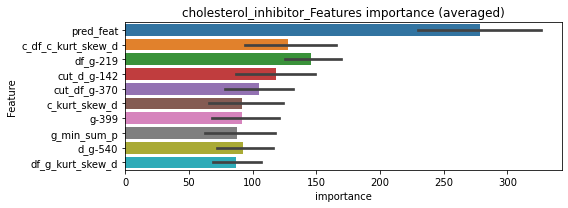

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000541981	valid_1's binary_logloss: 0.00450815
Early stopping, best iteration is:
[1602]	training's binary_logloss: 0.0003629	valid_1's binary_logloss: 0.00423915


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 951


Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000599209	valid_1's binary_logloss: 0.00421273


================================= fold 3/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000542764	valid_1's binary_logloss: 0.00266733
Early stopping, best iteration is:
[1673]	training's binary_logloss: 0.000351666	valid_1's binary_logloss: 0.00245844


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000547384	valid_1's binary_logloss: 0.000591917
[2000]	training's binary_logloss: 0.000314416	valid_1's binary_logloss: 0.000329683
[3000]	training's binary_logloss: 0.00024809	valid_1's binary_logloss: 0.000249422
[4000]	training's binary_logloss: 0.000218751	valid_1's binary_logloss: 0.000211785
[5000]	training's binary_logloss: 0.000203465	valid_1's binary_logloss: 0.000192176
[6000]	training's binary_logloss: 0.000193436	valid_1's binary_logloss: 0.000179156
[7000]	training's binary_logloss: 0.000186124	valid_1's binary_logloss: 0.000169706
[8000]	training's binary_logloss: 0.000180853	valid_1's binary_logloss: 0.00016303
Early stopping, best iteration is:
[8509]	training's binary_logloss: 0.000178541	valid_1's binary_logloss: 0.000160288


cholesterol_inhibitor logloss: 0.0027683381866743725


neg labels: 3289 → selected neg labels: 3281


cholinergic_receptor_antagonist, len(trt): 54, len(othr): 3281
target_rate: 0.0022676 → Adj_target_rate: 0.0024931
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00407974	valid_1's binary_logloss: 0.0362204
[600]	training's binary_logloss: 0.000807153	valid_1's binary_logloss: 0.0273128
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000617922	valid_1's binary_logloss: 0.0263093
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00420677	valid_1's binary_logloss: 0.0257051
[600]	training's binary_logloss: 0.000828214	valid_1's binary_logloss: 0.0195103
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000654533	valid_1's binary_logloss: 0.0190413
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0046021	valid_1's binary_logloss: 0.0108171
[600]	training's binary_logloss: 0.000882851	valid_1's binary_logloss: 0.00438813
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000615326	valid_1's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0050674, Threshold: 0.0131102, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, conf_0:0.00918, conf_1:0.01704
Num_p_label: 40.0, Expected: 9.0, Adj_threshold_1: 0.0131102
Num_p_label: 2.0, Expected: 9.0, Adj_threshold_2: 0.0631102
threshold: 0.0631102, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103219	valid_1's binary_logloss: 0.00437048
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000285574	valid_1's binary_logloss: 0.002755
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103274	valid_1's binary_logloss: 0.00312347
[600]	training's binary_logloss: 0.000224054	valid_1's binary_logloss: 0.00192605
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000229195	valid_1's binary_logloss: 0.00190375
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001097	valid_1's binary_logloss: 0.00339734
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.00042032	valid_1's binary_logloss: 0.00263406
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103884	valid_1's binary_logloss: 0.00515438
[600

2 / 3 AUC score:1.000
y_Threshold: 0.5922101, Threshold: 0.0631102, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3799
p_label_rate: 0.0416876 Vs.target_rate: 0.00227
Num_p_label: 166.0, conf_0:0.05049, conf_1:0.07573
Num_p_label: 166.0, Expected: 9.0, Adj_threshold_1: 0.0631102
Num_p_label: 165.0, Expected: 9.0, Adj_threshold_2: 0.1131102
Num_p_label: 165.0, Expected: 9.0, Adj_threshold_3: 0.1631102
Num_p_label: 165.0, Expected: 9.0, Adj_threshold_4: 0.2131102
Num_p_label: 165.0, Expected: 9.0, Adj_threshold_5: 0.2631102
Num_p_label: 162.0, Expected: 9.0, Adj_threshold_6: 0.3131102
Num_p_label: 161.0, Expected: 9.0, Adj_threshold_7: 0.3631102
Num_p_label: 161.0, Expected: 9.0, Adj_threshold_8: 0.4131102
Num_p_label: 160.0, Expected: 9.0, Adj_threshold_9: 0.4631102
Num_p_label: 158.0, Expected: 9.0, Adj_threshold_10: 0.5131102
threshold: 0.5631102, positive_p_label: 150.0/3982, p_label_rate: 0.0376695
positive_y_label: 653.0/3799, y_label_rate: 0.1718873

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105238	valid_1's binary_logloss: 0.00772854
Early stopping, best iteration is:
[417]	training's binary_logloss: 0.000433047	valid_1's binary_logloss: 0.0066366
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00104662	valid_1's binary_logloss: 0.00254723
[600]	training's binary_logloss: 0.000230136	valid_1's binary_logloss: 0.00130971
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000189846	valid_1's binary_logloss: 0.00119009
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106316	valid_1's binary_logloss: 0.00229724
[600]	training's binary_logloss: 0.000230436	valid_1's binary_logloss: 0.000938081
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000207449	valid_1's binary_logloss: 0.00088824
Training until validation scores don't improve for 30 round

3 / 3 AUC score:1.000
y_Threshold: 0.4396770, Threshold: 0.5631102, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0153189 Vs.target_rate: 0.00227
Num_p_label: 61.0, conf_0:0.50000, conf_1:0.61942
Num_p_label: 61.0, Expected: 9.0, Adj_threshold_1: 0.5631102
Num_p_label: 46.0, Expected: 9.0, Adj_threshold_2: 0.6131102
Num_p_label: 42.0, Expected: 9.0, Adj_threshold_3: 0.6631102
Num_p_label: 41.0, Expected: 9.0, Adj_threshold_4: 0.7131102
Num_p_label: 41.0, Expected: 9.0, Adj_threshold_5: 0.7631102
threshold: 0.7631102, positive_p_label: 41.0/3982, p_label_rate: 0.0102963


Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000284108	valid_1's binary_logloss: 0.00312303


positive_y_label: 650.0/3793, y_label_rate: 0.1713683


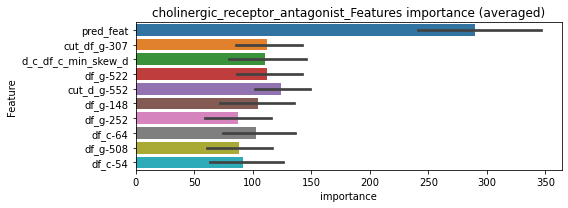

len(train_index) : 2844
len(valid_index) : 949
================================= fold 1/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000547488	valid_1's binary_logloss: 0.000971404
[2000]	training's binary_logloss: 0.000312403	valid_1's binary_logloss: 0.000637372
[3000]	training's binary_logloss: 0.000244893	valid_1's binary_logloss: 0.000537265
[4000]	training's binary_logloss: 0.000214401	valid_1's binary_logloss: 0.000483096
[5000]	training's binary_logloss: 0.000198641	valid_1's binary_logloss: 0.000454424
[6000]	training's binary_logloss: 0.000188145	valid_1's binary_logloss: 0.000435765
Early stopping, best iteration is:
[6503]	training's binary_logloss: 0.00018414	valid_1's binary_logloss: 0.000428374


len(train_index) : 2845
len(valid_index) : 948
================================= fold 2/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000548079	valid_1's binary_logloss: 0.00196412
[2000]	training's binary_logloss: 0.000310349	valid_1's binary_logloss: 0.00165129
Early stopping, best iteration is:
[2075]	training's binary_logloss: 0.000303475	valid_1's binary_logloss: 0.00163931


len(train_index) : 2845
len(valid_index) : 948
================================= fold 3/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000548313	valid_1's binary_logloss: 0.00180744
[2000]	training's binary_logloss: 0.000314308	valid_1's binary_logloss: 0.00146209
[3000]	training's binary_logloss: 0.000246261	valid_1's binary_logloss: 0.00135158
[4000]	training's binary_logloss: 0.00021468	valid_1's binary_logloss: 0.00129793
[5000]	training's binary_logloss: 0.000198705	valid_1's binary_logloss: 0.00126977
Early stopping, best iteration is:
[5360]	training's binary_logloss: 0.000194848	valid_1's binary_logloss: 0.00126286


len(train_index) : 2845
len(valid_index) : 948
================================= fold 4/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000544059	valid_1's binary_logloss: 0.00654996
Early stopping, best iteration is:
[1466]	training's binary_logloss: 0.000390491	valid_1's binary_logloss: 0.00624647


cholinergic_receptor_antagonist logloss: 0.0023941431843391993


neg labels: 3289 → selected neg labels: 3288


coagulation_factor_inhibitor, len(trt): 24, len(othr): 3288
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183716	valid_1's binary_logloss: 0.00398608
[600]	training's binary_logloss: 0.000447958	valid_1's binary_logloss: 0.00145541
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.00041867	valid_1's binary_logloss: 0.00138622
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00181087	valid_1's binary_logloss: 0.00463821
[600]	training's binary_logloss: 0.000444775	valid_1's binary_logloss: 0.00188917
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000415994	valid_1's binary_logloss: 0.00182236
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176379	valid_1's binary_logloss: 0.00402588
[600]	training's binary_logloss: 0.000442438	valid_1's binary_logloss: 0.0016159
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000413519	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0029605, Threshold: 0.0178803, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.01252, conf_1:0.02324
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0178803
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_2: 0.0678803
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_3: 0.1178803
threshold: 0.1178803, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00066669	valid_1's binary_logloss: 0.000889108
[600]	training's binary_logloss: 0.000184308	valid_1's binary_logloss: 0.000269187
[900]	training's binary_logloss: 0.000149239	valid_1's binary_logloss: 0.000222999
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.000148676	valid_1's binary_logloss: 0.000221493
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000669924	valid_1's binary_logloss: 0.0009689
[600]	training's binary_logloss: 0.000183368	valid_1's binary_logloss: 0.000369013
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000151449	valid_1's binary_logloss: 0.000339501
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000655435	valid_1's binary_logloss: 0.00114703
[600]	training's binary_logloss: 0.000181562	valid_1's binary_logloss: 0.00060228
Early

2 / 3 AUC score:1.000
y_Threshold: 0.5572604, Threshold: 0.1178803, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0447012 Vs.target_rate: 0.00101
Num_p_label: 178.0, conf_0:0.09430, conf_1:0.14146
Num_p_label: 178.0, Expected: 4.0, Adj_threshold_1: 0.1178803
Num_p_label: 178.0, Expected: 4.0, Adj_threshold_2: 0.1678803
Num_p_label: 178.0, Expected: 4.0, Adj_threshold_3: 0.2178803


[900]	training's binary_logloss: 0.000149522	valid_1's binary_logloss: 0.00153607
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000148417	valid_1's binary_logloss: 0.0015353


Num_p_label: 178.0, Expected: 4.0, Adj_threshold_4: 0.2678803
Num_p_label: 178.0, Expected: 4.0, Adj_threshold_5: 0.3178803
Num_p_label: 175.0, Expected: 4.0, Adj_threshold_6: 0.3678803
Num_p_label: 165.0, Expected: 4.0, Adj_threshold_7: 0.4178803
Num_p_label: 151.0, Expected: 4.0, Adj_threshold_8: 0.4678803
Num_p_label: 136.0, Expected: 4.0, Adj_threshold_9: 0.5178803
Num_p_label: 113.0, Expected: 4.0, Adj_threshold_10: 0.5678803
threshold: 0.6178803, positive_p_label: 94.0/3982, p_label_rate: 0.0236062
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000674519	valid_1's binary_logloss: 0.000913051
[600]	training's binary_logloss: 0.000186059	valid_1's binary_logloss: 0.000271028
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000155947	valid_1's binary_logloss: 0.000232304
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000672745	valid_1's binary_logloss: 0.000940407
[600]	training's binary_logloss: 0.00018377	valid_1's binary_logloss: 0.000330715
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000152685	valid_1's binary_logloss: 0.00029687
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000647386	valid_1's binary_logloss: 0.0012443
[600]	training's binary_logloss: 0.000181547	valid_1's binary_logloss: 0.000653348
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000164415	valid_1

3 / 3 AUC score:1.000
y_Threshold: 0.6137573, Threshold: 0.6178803, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0218483 Vs.target_rate: 0.00101
Num_p_label: 87.0, conf_0:0.50000, conf_1:0.67967
Num_p_label: 87.0, Expected: 4.0, Adj_threshold_1: 0.6178803
Num_p_label: 63.0, Expected: 4.0, Adj_threshold_2: 0.6678803
Num_p_label: 45.0, Expected: 4.0, Adj_threshold_3: 0.7178803
Num_p_label: 25.0, Expected: 4.0, Adj_threshold_4: 0.7678803
threshold: 0.7678803, positive_p_label: 25.0/3982, p_label_rate: 0.0062783


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000198279	valid_1's binary_logloss: 0.00259444


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


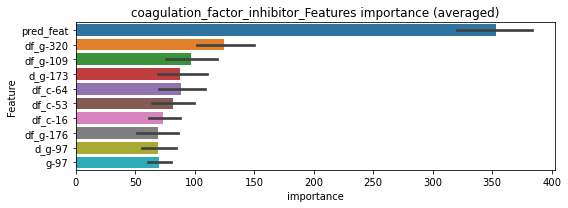

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000459472	valid_1's binary_logloss: 0.000551393
[2000]	training's binary_logloss: 0.00027601	valid_1's binary_logloss: 0.000354086
[3000]	training's binary_logloss: 0.000222412	valid_1's binary_logloss: 0.000291174
[4000]	training's binary_logloss: 0.000196828	valid_1's binary_logloss: 0.000259715
[5000]	training's binary_logloss: 0.000183353	valid_1's binary_logloss: 0.000243073
[6000]	training's binary_logloss: 0.000174218	valid_1's binary_logloss: 0.000231965
[7000]	training's binary_logloss: 0.00016762	valid_1's binary_logloss: 0.000223771
[8000]	training's binary_logloss: 0.000162674	valid_1's binary_logloss: 0.000217784
Early stopping, best iteration is:
[8623]	training's binary_logloss: 0.000160415	valid_1's binary_logloss: 0.000214843


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000452893	valid_1's binary_logloss: 0.000752129
[2000]	training's binary_logloss: 0.000273363	valid_1's binary_logloss: 0.000547156
[3000]	training's binary_logloss: 0.000219772	valid_1's binary_logloss: 0.000479922
[4000]	training's binary_logloss: 0.00019373	valid_1's binary_logloss: 0.000449301
Early stopping, best iteration is:
[4344]	training's binary_logloss: 0.000188333	valid_1's binary_logloss: 0.000441785


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0004531	valid_1's binary_logloss: 0.000768454
[2000]	training's binary_logloss: 0.000271394	valid_1's binary_logloss: 0.00053873
[3000]	training's binary_logloss: 0.000217877	valid_1's binary_logloss: 0.000473553
[4000]	training's binary_logloss: 0.000192183	valid_1's binary_logloss: 0.000443273
Early stopping, best iteration is:
[4751]	training's binary_logloss: 0.000181024	valid_1's binary_logloss: 0.000430271


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds


coagulation_factor_inhibitor logloss: 0.0015101307881027956


Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000759214	valid_1's binary_logloss: 0.00495443
neg labels: 3289 → selected neg labels: 3285


corticosteroid_agonist, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00362441	valid_1's binary_logloss: 0.0117861
[600]	training's binary_logloss: 0.000672045	valid_1's binary_logloss: 0.00454254
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000519134	valid_1's binary_logloss: 0.00398954
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00351455	valid_1's binary_logloss: 0.0166207
[600]	training's binary_logloss: 0.000663781	valid_1's binary_logloss: 0.00859564
Early stopping, best iteration is:
[787]	training's binary_logloss: 0.000509288	valid_1's binary_logloss: 0.00798708
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00362327	valid_1's binary_logloss: 0.00876078
[600]	training's binary_logloss: 0.000682334	valid_1's binary_logloss: 0.00295422
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.000525132	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0045789, Threshold: 0.0166151, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.01163, conf_1:0.02160
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0166151
Num_p_label: 1.0, Expected: 6.0, Adj_threshold_2: 0.0666151
threshold: 0.0666151, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000919971	valid_1's binary_logloss: 0.0014869
[600]	training's binary_logloss: 0.000202909	valid_1's binary_logloss: 0.000483151
Early stopping, best iteration is:
[862]	training's binary_logloss: 0.000158419	valid_1's binary_logloss: 0.000420557
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00090591	valid_1's binary_logloss: 0.00226143
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000215582	valid_1's binary_logloss: 0.00117374
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000906504	valid_1's binary_logloss: 0.00251911
Early stopping, best iteration is:
[388]	training's binary_logloss: 0.000431845	valid_1's binary_logloss: 0.00198039
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000935378	valid_1's binary_logloss: 0.0060

2 / 3 AUC score:1.000
y_Threshold: 0.6950597, Threshold: 0.0666151, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0474636 Vs.target_rate: 0.00151
Num_p_label: 189.0, conf_0:0.05329, conf_1:0.07994
Num_p_label: 189.0, Expected: 6.0, Adj_threshold_1: 0.0666151
Num_p_label: 188.0, Expected: 6.0, Adj_threshold_2: 0.1166151
Num_p_label: 188.0, Expected: 6.0, Adj_threshold_3: 0.1666151
Num_p_label: 185.0, Expected: 6.0, Adj_threshold_4: 0.2166151
Num_p_label: 185.0, Expected: 6.0, Adj_threshold_5: 0.2666151
Num_p_label: 184.0, Expected: 6.0, Adj_threshold_6: 0.3166151
Num_p_label: 184.0, Expected: 6.0, Adj_threshold_7: 0.3666151
Num_p_label: 183.0, Expected: 6.0, Adj_threshold_8: 0.4166151
Num_p_label: 177.0, Expected: 6.0, Adj_threshold_9: 0.4666151
Num_p_label: 167.0, Expected: 6.0, Adj_threshold_10: 0.5166151


Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000244112	valid_1's binary_logloss: 0.00504201


threshold: 0.5666151, positive_p_label: 149.0/3982, p_label_rate: 0.0374184
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000922018	valid_1's binary_logloss: 0.00354217
Early stopping, best iteration is:
[379]	training's binary_logloss: 0.000459687	valid_1's binary_logloss: 0.00269092
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000933713	valid_1's binary_logloss: 0.0015184
[600]	training's binary_logloss: 0.000205568	valid_1's binary_logloss: 0.00050347
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000215458	valid_1's binary_logloss: 0.000502206
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000946488	valid_1's binary_logloss: 0.00275019
Early stopping, best iteration is:
[433]	training's binary_logloss: 0.000350201	valid_1's binary_logloss: 0.00180665
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000936108	valid_1's binary_logloss: 0.0017

3 / 3 AUC score:1.000
y_Threshold: 0.4376666, Threshold: 0.5666151, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0248619 Vs.target_rate: 0.00151
Num_p_label: 99.0, conf_0:0.50000, conf_1:0.62328
Num_p_label: 99.0, Expected: 6.0, Adj_threshold_1: 0.5666151
Num_p_label: 71.0, Expected: 6.0, Adj_threshold_2: 0.6166151
Num_p_label: 43.0, Expected: 6.0, Adj_threshold_3: 0.6666151
Num_p_label: 24.0, Expected: 6.0, Adj_threshold_4: 0.7166151
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_5: 0.7666151


[600]	training's binary_logloss: 0.0002105	valid_1's binary_logloss: 0.000664826
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00021148	valid_1's binary_logloss: 0.000663536


threshold: 0.7666151, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


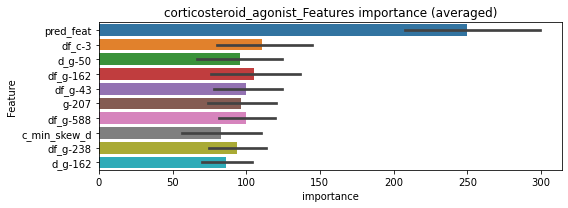

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[954]	training's binary_logloss: 0.00051828	valid_1's binary_logloss: 0.00338955


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000507667	valid_1's binary_logloss: 0.000992455
Early stopping, best iteration is:
[1967]	training's binary_logloss: 0.000300576	valid_1's binary_logloss: 0.00079984


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856


Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000583428	valid_1's binary_logloss: 0.00259666


len(valid_index) : 952
================================= fold 4/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000509637	valid_1's binary_logloss: 0.00105858
[2000]	training's binary_logloss: 0.000296579	valid_1's binary_logloss: 0.000831625
Early stopping, best iteration is:
[2406]	training's binary_logloss: 0.00026517	valid_1's binary_logloss: 0.000792915


corticosteroid_agonist logloss: 0.0018951088711062613


neg labels: 3289 → selected neg labels: 3235


cyclooxygenase_inhibitor, len(trt): 435, len(othr): 3235
target_rate: 0.0182666 → Adj_target_rate: 0.0146863
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0675889	valid_1's binary_logloss: 0.35047
Early stopping, best iteration is:
[294]	training's binary_logloss: 0.0700871	valid_1's binary_logloss: 0.349767
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[233]	training's binary_logloss: 0.0957389	valid_1's binary_logloss: 0.379095
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[205]	training's binary_logloss: 0.107915	valid_1's binary_logloss: 0.371057
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.764
y_Threshold: 0.1472032, Threshold: 0.5217560, pos_neg_ratio: 0.8000000
Remove_noisy_data: 718 → Positive_corect_labels: 353/3164
p_label_rate: 0.0100452 Vs.target_rate: 0.01827
Num_p_label: 40.0, conf_0:0.36523, conf_1:0.67828
Num_p_label: 40.0, Expected: 72.7, Adj_threshold_1: 0.5217560
Num_p_label: 47.0, Expected: 72.7, Adj_threshold_2: 0.5017560
Num_p_label: 52.0, Expected: 72.7, Adj_threshold_3: 0.4817560
threshold: 0.4817560, positive_p_label: 52.0/3982, p_label_rate: 0.0130588


Early stopping, best iteration is:
[223]	training's binary_logloss: 0.0959925	valid_1's binary_logloss: 0.363571


positive_y_label: 353.0/3164, y_label_rate: 0.1115676
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00165119	valid_1's binary_logloss: 0.00663552
[600]	training's binary_logloss: 0.000289931	valid_1's binary_logloss: 0.00228547
[900]	training's binary_logloss: 0.000199724	valid_1's binary_logloss: 0.00194318
Early stopping, best iteration is:
[1042]	training's binary_logloss: 0.00018962	valid_1's binary_logloss: 0.00189564
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168552	valid_1's binary_logloss: 0.00773144
[600]	training's binary_logloss: 0.000297018	valid_1's binary_logloss: 0.00309896
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000220036	valid_1's binary_logloss: 0.0028253
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00171011	valid_1's binary_logloss: 0.00653573
[600]	training's binary_logloss: 0.000294384	valid_1's binary_logloss: 0.00173425
[900]	trainin

2 / 3 AUC score:1.000
y_Threshold: 0.3763489, Threshold: 0.4817560, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 352.0/3162
p_label_rate: 0.1348569 Vs.target_rate: 0.01827
Num_p_label: 537.0, conf_0:0.38540, conf_1:0.57811
Num_p_label: 537.0, Expected: 72.7, Adj_threshold_1: 0.4817560
Num_p_label: 536.0, Expected: 72.7, Adj_threshold_2: 0.5317560
Num_p_label: 536.0, Expected: 72.7, Adj_threshold_3: 0.5817560
Num_p_label: 532.0, Expected: 72.7, Adj_threshold_4: 0.6317560
Num_p_label: 529.0, Expected: 72.7, Adj_threshold_5: 0.6817560
Num_p_label: 521.0, Expected: 72.7, Adj_threshold_6: 0.7317560
Num_p_label: 517.0, Expected: 72.7, Adj_threshold_7: 0.7817560
threshold: 0.7817560, positive_p_label: 517.0/3982, p_label_rate: 0.1298343
positive_y_label: 352.0/3162, y_label_rate: 0.1113219
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00175172	valid_1's binary_logloss: 0.0100806
[600]	training's binary_logloss: 0.000301777	valid_1's binary_logloss: 0.00594455
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000255318	valid_1's binary_logloss: 0.00581343
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00165893	valid_1's binary_logloss: 0.00720994
[600]	training's binary_logloss: 0.000290217	valid_1's binary_logloss: 0.00202088
[900]	training's binary_logloss: 0.000200955	valid_1's binary_logloss: 0.0015574
Early stopping, best iteration is:
[1067]	training's binary_logloss: 0.000189604	valid_1's binary_logloss: 0.00148796
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00169044	valid_1's binary_logloss: 0.00640998
[600]	training's binary_logloss: 0.000296812	valid_1's binary_logloss: 0.00119857
[900]	trainin

3 / 3 AUC score:1.000
y_Threshold: 0.3098368, Threshold: 0.7817560, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 350.0/3158
p_label_rate: 0.1305876 Vs.target_rate: 0.01827
Num_p_label: 520.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 520.0, Expected: 72.7, Adj_threshold_1: 0.7817560
threshold: 0.7817560, positive_p_label: 520.0/3982, p_label_rate: 0.1305876
positive_y_label: 350.0/3158, y_label_rate: 0.1108296


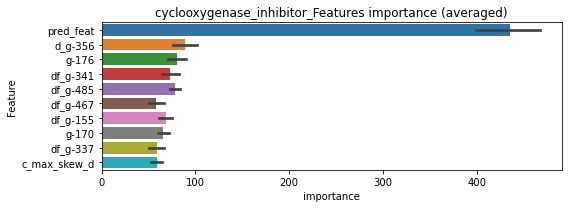

len(train_index) : 2368
len(valid_index) : 790
================================= fold 1/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000668102	valid_1's binary_logloss: 0.00401819
[2000]	training's binary_logloss: 0.000379581	valid_1's binary_logloss: 0.00340368
Early stopping, best iteration is:
[2611]	training's binary_logloss: 0.000313251	valid_1's binary_logloss: 0.00324678


len(train_index) : 2368
len(valid_index) : 790
================================= fold 2/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000688789	valid_1's binary_logloss: 0.00210893
[2000]	training's binary_logloss: 0.000389309	valid_1's binary_logloss: 0.00147092
[3000]	training's binary_logloss: 0.000293624	valid_1's binary_logloss: 0.00121652
[4000]	training's binary_logloss: 0.000248304	valid_1's binary_logloss: 0.00108671
[5000]	training's binary_logloss: 0.000224524	valid_1's binary_logloss: 0.0010136
[6000]	training's binary_logloss: 0.000208703	valid_1's binary_logloss: 0.00095739
Early stopping, best iteration is:
[6571]	training's binary_logloss: 0.000202138	valid_1's binary_logloss: 0.000936084


len(train_index) : 2369
len(valid_index) : 789
================================= fold 3/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000681527	valid_1's binary_logloss: 0.00138934
[2000]	training's binary_logloss: 0.000388387	valid_1's binary_logloss: 0.000775214
[3000]	training's binary_logloss: 0.000300151	valid_1's binary_logloss: 0.000569934
[4000]	training's binary_logloss: 0.000258253	valid_1's binary_logloss: 0.000469524
[5000]	training's binary_logloss: 0.000236133	valid_1's binary_logloss: 0.000418354
[6000]	training's binary_logloss: 0.000221552	valid_1's binary_logloss: 0.00038512
[7000]	training's binary_logloss: 0.000211105	valid_1's binary_logloss: 0.000361343
Early stopping, best iteration is:
[7851]	training's binary_logloss: 0.000204461	valid_1's binary_logloss: 0.000346732


len(train_index) : 2369
len(valid_index) : 789
================================= fold 4/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000722725	valid_1's binary_logloss: 0.00404878
Early stopping, best iteration is:
[1627]	training's binary_logloss: 0.000464704	valid_1's binary_logloss: 0.00353283


cyclooxygenase_inhibitor logloss: 0.0020163077159834498


neg labels: 3289 → selected neg labels: 3273


cytochrome_p450_inhibitor, len(trt): 104, len(othr): 3273
target_rate: 0.0043672 → Adj_target_rate: 0.0043519
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116968	valid_1's binary_logloss: 0.0867548
[600]	training's binary_logloss: 0.00182497	valid_1's binary_logloss: 0.0744692
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.00182497	valid_1's binary_logloss: 0.0744692
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113917	valid_1's binary_logloss: 0.0883901
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.00310072	valid_1's binary_logloss: 0.0808449
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120878	valid_1's binary_logloss: 0.0517754
[600]	training's binary_logloss: 0.00189897	valid_1's binary_logloss: 0.0336996
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.00102183	valid_1's binary_logloss: 0.0316239
Training until validation scores don't improve for 30 rounds
[300]	training

1 / 3 AUC score:0.996
y_Threshold: 0.0129123, Threshold: 0.0461187, pos_neg_ratio: 0.8000000
Remove_noisy_data: 156 → Positive_corect_labels: 642/3771
p_label_rate: 0.0100452 Vs.target_rate: 0.00437
Num_p_label: 40.0, conf_0:0.03228, conf_1:0.05995
Num_p_label: 40.0, Expected: 17.4, Adj_threshold_1: 0.0461187
Num_p_label: 10.0, Expected: 17.4, Adj_threshold_2: 0.0961187
threshold: 0.0961187, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 642.0/3771, y_label_rate: 0.1702466
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144042	valid_1's binary_logloss: 0.00416666
[600]	training's binary_logloss: 0.000247725	valid_1's binary_logloss: 0.00147297
[900]	training's binary_logloss: 0.000175827	valid_1's binary_logloss: 0.00127401
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.000177556	valid_1's binary_logloss: 0.00126667
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00143588	valid_1's binary_logloss: 0.00644584
[600]	training's binary_logloss: 0.000249176	valid_1's binary_logloss: 0.00424677
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.00018345	valid_1's binary_logloss: 0.00412059
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146289	valid_1's binary_logloss: 0.00408453
[600]	training's binary_logloss: 0.000247631	valid_1's binary_logloss: 0.00171376
Early stoppin

2 / 3 AUC score:1.000
y_Threshold: 0.6992130, Threshold: 0.0961187, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 639.0/3765
p_label_rate: 0.0514817 Vs.target_rate: 0.00437
Num_p_label: 205.0, conf_0:0.07689, conf_1:0.11534
Num_p_label: 205.0, Expected: 17.4, Adj_threshold_1: 0.0961187
Num_p_label: 205.0, Expected: 17.4, Adj_threshold_2: 0.1461187
Num_p_label: 205.0, Expected: 17.4, Adj_threshold_3: 0.1961187
Num_p_label: 205.0, Expected: 17.4, Adj_threshold_4: 0.2461187
Num_p_label: 205.0, Expected: 17.4, Adj_threshold_5: 0.2961187
Num_p_label: 205.0, Expected: 17.4, Adj_threshold_6: 0.3461187
Num_p_label: 203.0, Expected: 17.4, Adj_threshold_7: 0.3961187
Num_p_label: 203.0, Expected: 17.4, Adj_threshold_8: 0.4461187
Num_p_label: 203.0, Expected: 17.4, Adj_threshold_9: 0.4961187
Num_p_label: 203.0, Expected: 17.4, Adj_threshold_10: 0.5461187


Early stopping, best iteration is:
[562]	training's binary_logloss: 0.00026289	valid_1's binary_logloss: 0.00544655


threshold: 0.5961187, positive_p_label: 203.0/3982, p_label_rate: 0.0509794
positive_y_label: 639.0/3765, y_label_rate: 0.1697211
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00149902	valid_1's binary_logloss: 0.00696377
[600]	training's binary_logloss: 0.000252781	valid_1's binary_logloss: 0.00400972
[900]	training's binary_logloss: 0.000178278	valid_1's binary_logloss: 0.00376202
Early stopping, best iteration is:
[1040]	training's binary_logloss: 0.000170224	valid_1's binary_logloss: 0.00374002
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00149632	valid_1's binary_logloss: 0.00870512
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000312032	valid_1's binary_logloss: 0.00681281
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00151589	valid_1's binary_logloss: 0.00410064
[600]	training's binary_logloss: 0.000255195	valid_1's binary_logloss: 0.00184587
[900]	training's binary_logloss: 0.000179209	valid_1's binary_logloss: 0.00163666
Early stopp

3 / 3 AUC score:1.000
y_Threshold: 0.4884200, Threshold: 0.5961187, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 635.0/3757
p_label_rate: 0.0238574 Vs.target_rate: 0.00437
Num_p_label: 95.0, conf_0:0.50000, conf_1:0.65573
Num_p_label: 95.0, Expected: 17.4, Adj_threshold_1: 0.5961187
Num_p_label: 79.0, Expected: 17.4, Adj_threshold_2: 0.6461187
Num_p_label: 63.0, Expected: 17.4, Adj_threshold_3: 0.6961187
Num_p_label: 58.0, Expected: 17.4, Adj_threshold_4: 0.7461187
Num_p_label: 54.0, Expected: 17.4, Adj_threshold_5: 0.7961187
threshold: 0.7961187, positive_p_label: 54.0/3982, p_label_rate: 0.0135610
positive_y_label: 635.0/3757, y_label_rate: 0.1690178


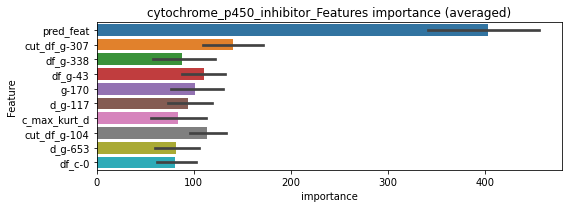

len(train_index) : 2817
len(valid_index) : 940
================================= fold 1/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2818
len(valid_index) : 939
================================= fold 2/4 cytochrome_p450_inhibitor=================================


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.00103657	valid_1's binary_logloss: 0.00622902
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000582533	valid_1's binary_logloss: 0.00185855
Early stopping, best iteration is:
[1790]	training's binary_logloss: 0.000358243	valid_1's binary_logloss: 0.00158381


len(train_index) : 2818
len(valid_index) : 939
================================= fold 3/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000572226	valid_1's binary_logloss: 0.00146198
[2000]	training's binary_logloss: 0.00032596	valid_1's binary_logloss: 0.00106511
[3000]	training's binary_logloss: 0.000254339	valid_1's binary_logloss: 0.000942582
Early stopping, best iteration is:
[3952]	training's binary_logloss: 0.000222625	valid_1's binary_logloss: 0.000877445


len(train_index) : 2818
len(valid_index) : 939
================================= fold 4/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds


cytochrome_p450_inhibitor logloss: 0.003875500385812122


Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000918466	valid_1's binary_logloss: 0.00680646
neg labels: 3289 → selected neg labels: 3281


dihydrofolate_reductase_inhibitor, len(trt): 36, len(othr): 3281
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00287319	valid_1's binary_logloss: 0.0108774
[600]	training's binary_logloss: 0.000582604	valid_1's binary_logloss: 0.00534355
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000512705	valid_1's binary_logloss: 0.00517379
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00281292	valid_1's binary_logloss: 0.006186
[600]	training's binary_logloss: 0.000589655	valid_1's binary_logloss: 0.00194833
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000516966	valid_1's binary_logloss: 0.00177103
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00281807	valid_1's binary_logloss: 0.00576936
[600]	training's binary_logloss: 0.000591116	valid_1's binary_logloss: 0.00165548
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.00052528	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0040885, Threshold: 0.0128500, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.00899, conf_1:0.01670
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0128500
Num_p_label: 5.0, Expected: 6.0, Adj_threshold_2: 0.0628500
threshold: 0.0628500, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000853537	valid_1's binary_logloss: 0.00192138
[600]	training's binary_logloss: 0.000202767	valid_1's binary_logloss: 0.00104348
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000208631	valid_1's binary_logloss: 0.00101702
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000872628	valid_1's binary_logloss: 0.00157294
[600]	training's binary_logloss: 0.00020767	valid_1's binary_logloss: 0.000847145
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000200797	valid_1's binary_logloss: 0.000831973
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000864268	valid_1's binary_logloss: 0.00256461
Early stopping, best iteration is:
[376]	training's binary_logloss: 0.000443717	valid_1's binary_logloss: 0.00201297
Training until validation scores don't improve for 30 r

2 / 3 AUC score:1.000
y_Threshold: 0.5573728, Threshold: 0.0628500, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0444500 Vs.target_rate: 0.00151
Num_p_label: 177.0, conf_0:0.05028, conf_1:0.07542
Num_p_label: 177.0, Expected: 6.0, Adj_threshold_1: 0.0628500
Num_p_label: 176.0, Expected: 6.0, Adj_threshold_2: 0.1128500
Num_p_label: 176.0, Expected: 6.0, Adj_threshold_3: 0.1628500
Num_p_label: 175.0, Expected: 6.0, Adj_threshold_4: 0.2128500
Num_p_label: 174.0, Expected: 6.0, Adj_threshold_5: 0.2628500
Num_p_label: 171.0, Expected: 6.0, Adj_threshold_6: 0.3128500
Num_p_label: 163.0, Expected: 6.0, Adj_threshold_7: 0.3628500
Num_p_label: 146.0, Expected: 6.0, Adj_threshold_8: 0.4128500
Num_p_label: 119.0, Expected: 6.0, Adj_threshold_9: 0.4628500
Num_p_label: 89.0, Expected: 6.0, Adj_threshold_10: 0.5128500
threshold: 0.5628500, positive_p_label: 62.0/3982, p_label_rate: 0.0155701
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
=

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000866676	valid_1's binary_logloss: 0.00176657
[600]	training's binary_logloss: 0.00020443	valid_1's binary_logloss: 0.000899688
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000208756	valid_1's binary_logloss: 0.000890765
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000864708	valid_1's binary_logloss: 0.00173087
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000288841	valid_1's binary_logloss: 0.00108566
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000866801	valid_1's binary_logloss: 0.019841
Early stopping, best iteration is:
[323]	training's binary_logloss: 0.000715634	valid_1's binary_logloss: 0.0190048
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000850312	valid_1's binary_logloss: 0.003445

3 / 3 AUC score:1.000
y_Threshold: 0.7159438, Threshold: 0.5628500, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0160723 Vs.target_rate: 0.00151
Num_p_label: 64.0, conf_0:0.50000, conf_1:0.61913
Num_p_label: 64.0, Expected: 6.0, Adj_threshold_1: 0.5628500
Num_p_label: 43.0, Expected: 6.0, Adj_threshold_2: 0.6128500
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_3: 0.6628500
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_4: 0.7128500
threshold: 0.7128500, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


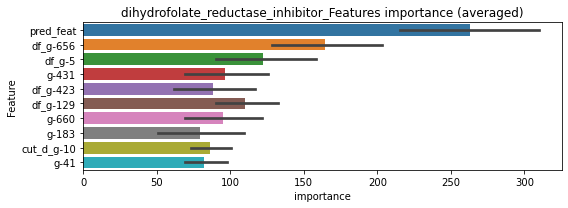

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000499324	valid_1's binary_logloss: 0.00197046
Early stopping, best iteration is:
[1732]	training's binary_logloss: 0.000321369	valid_1's binary_logloss: 0.00167702


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00050237	valid_1's binary_logloss: 0.000492535
[2000]	training's binary_logloss: 0.000294747	valid_1's binary_logloss: 0.00027637
[3000]	training's binary_logloss: 0.000234898	valid_1's binary_logloss: 0.00021037
[4000]	training's binary_logloss: 0.0002068	valid_1's binary_logloss: 0.000178319
[5000]	training's binary_logloss: 0.000192476	valid_1's binary_logloss: 0.000161895
[6000]	training's binary_logloss: 0.000182312	valid_1's binary_logloss: 0.000150533
[7000]	training's binary_logloss: 0.000175192	valid_1's binary_logloss: 0.000142622
[8000]	training's binary_logloss: 0.000169834	valid_1's binary_logloss: 0.000136948
Early stopping, best iteration is:
[8767]	training's binary_logloss: 0.000166598	valid_1's binary_logloss: 0.000133532


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 dihydrofolate_reductase_inhibitor=================================


Early stopping, best iteration is:
[220]	training's binary_logloss: 0.00266409	valid_1's binary_logloss: 0.0600339
Training until validation scores don't improve for 30 rounds


dihydrofolate_reductase_inhibitor logloss: 0.016198692422567277


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000892044	valid_1's binary_logloss: 0.00296332
neg labels: 3289 → selected neg labels: 3285


dipeptidyl_peptidase_inhibitor, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00191935	valid_1's binary_logloss: 0.0049817
[600]	training's binary_logloss: 0.000447106	valid_1's binary_logloss: 0.00187496
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000423222	valid_1's binary_logloss: 0.00180884
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001779	valid_1's binary_logloss: 0.0101176
[600]	training's binary_logloss: 0.00042837	valid_1's binary_logloss: 0.00576776
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.00042011	valid_1's binary_logloss: 0.00571157
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00189242	valid_1's binary_logloss: 0.00360637
[600]	training's binary_logloss: 0.000440424	valid_1's binary_logloss: 0.00114679
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000413508	valid_1's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0027557, Threshold: 0.0097038, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, conf_0:0.00679, conf_1:0.01261
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0097038
Num_p_label: 1.0, Expected: 4.2, Adj_threshold_2: 0.0597038
threshold: 0.0597038, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000696694	valid_1's binary_logloss: 0.00170092
[600]	training's binary_logloss: 0.00019468	valid_1's binary_logloss: 0.00107002
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000184407	valid_1's binary_logloss: 0.0010489
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000638603	valid_1's binary_logloss: 0.00210605
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000259142	valid_1's binary_logloss: 0.00148532
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000694299	valid_1's binary_logloss: 0.00268043
Early stopping, best iteration is:
[405]	training's binary_logloss: 0.000317893	valid_1's binary_logloss: 0.00218406
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000676456	valid_1's binary_logloss: 0.000803

2 / 3 AUC score:1.000
y_Threshold: 0.5740396, Threshold: 0.0597038, pos_neg_ratio: 0.8000000


[900]	training's binary_logloss: 0.000149125	valid_1's binary_logloss: 0.000200199
Early stopping, best iteration is:
[938]	training's binary_logloss: 0.000147172	valid_1's binary_logloss: 0.000198391


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0512305 Vs.target_rate: 0.00105
Num_p_label: 204.0, conf_0:0.04776, conf_1:0.07164
Num_p_label: 204.0, Expected: 4.2, Adj_threshold_1: 0.0597038
Num_p_label: 204.0, Expected: 4.2, Adj_threshold_2: 0.1097038
Num_p_label: 202.0, Expected: 4.2, Adj_threshold_3: 0.1597038
Num_p_label: 201.0, Expected: 4.2, Adj_threshold_4: 0.2097038
Num_p_label: 200.0, Expected: 4.2, Adj_threshold_5: 0.2597038
Num_p_label: 197.0, Expected: 4.2, Adj_threshold_6: 0.3097038
Num_p_label: 192.0, Expected: 4.2, Adj_threshold_7: 0.3597038
Num_p_label: 180.0, Expected: 4.2, Adj_threshold_8: 0.4097038
Num_p_label: 149.0, Expected: 4.2, Adj_threshold_9: 0.4597038
Num_p_label: 128.0, Expected: 4.2, Adj_threshold_10: 0.5097038
threshold: 0.5597038, positive_p_label: 103.0/3982, p_label_rate: 0.0258664
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000694465	valid_1's binary_logloss: 0.00161063
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000234561	valid_1's binary_logloss: 0.000964031
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000641073	valid_1's binary_logloss: 0.00238916
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.00024691	valid_1's binary_logloss: 0.00183673
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000698383	valid_1's binary_logloss: 0.0065083
Early stopping, best iteration is:
[414]	training's binary_logloss: 0.000306737	valid_1's binary_logloss: 0.00557686
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000685487	valid_1's binary_logloss: 0.000716281
[600]	training's binary_logloss: 0.000187853	valid_1's binary_logloss: 0.0001

3 / 3 AUC score:1.000
y_Threshold: 0.7775003, Threshold: 0.5597038, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0228528 Vs.target_rate: 0.00105
Num_p_label: 91.0, conf_0:0.50000, conf_1:0.61567
Num_p_label: 91.0, Expected: 4.2, Adj_threshold_1: 0.5597038
Num_p_label: 58.0, Expected: 4.2, Adj_threshold_2: 0.6097038
Num_p_label: 34.0, Expected: 4.2, Adj_threshold_3: 0.6597038
Num_p_label: 19.0, Expected: 4.2, Adj_threshold_4: 0.7097038
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_5: 0.7597038
threshold: 0.7597038, positive_p_label: 11.0/3982, p_label_rate: 0.0027624


Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000154647	valid_1's binary_logloss: 0.000127864


positive_y_label: 657.0/3810, y_label_rate: 0.1724409


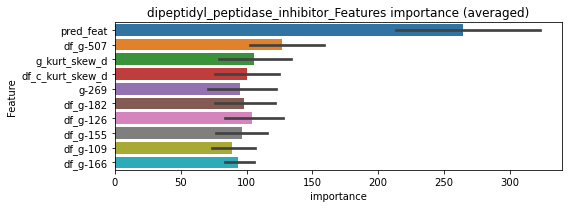

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000461598	valid_1's binary_logloss: 0.000561536
[2000]	training's binary_logloss: 0.000278794	valid_1's binary_logloss: 0.000368446
[3000]	training's binary_logloss: 0.000225231	valid_1's binary_logloss: 0.000307333
[4000]	training's binary_logloss: 0.000199435	valid_1's binary_logloss: 0.000277533
[5000]	training's binary_logloss: 0.000186242	valid_1's binary_logloss: 0.000261271
Early stopping, best iteration is:
[5848]	training's binary_logloss: 0.000178608	valid_1's binary_logloss: 0.000253167


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 dipeptidyl_peptidase_inhibitor=================================


Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000969746	valid_1's binary_logloss: 0.00476218
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 dipeptidyl_peptidase_inhibitor=================================


Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000623721	valid_1's binary_logloss: 0.00915973
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000466757	valid_1's binary_logloss: 0.000426705
[2000]	training's binary_logloss: 0.000276508	valid_1's binary_logloss: 0.000240212
[3000]	training's binary_logloss: 0.000223376	valid_1's binary_logloss: 0.000185682
[4000]	training's binary_logloss: 0.000197383	valid_1's binary_logloss: 0.000158901
[5000]	training's binary_logloss: 0.000183391	valid_1's binary_logloss: 0.000144678
[6000]	training's binary_logloss: 0.000173921	valid_1's binary_logloss: 0.000135197
[7000]	training's binary_logloss: 0.000167341	valid_1's binary_logloss: 0.000128738
[8000]	training's binary_logloss: 0.000162335	valid_1's binary_logloss: 0.000123721
Early stopping, best iteration is:
[8029]	training's binary_logloss: 0.000162177	valid_1's binary_logloss: 0.000123553


dipeptidyl_peptidase_inhibitor logloss: 0.0035741112216521216


neg labels: 3289 → selected neg labels: 3289


diuretic, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000451838	valid_1's binary_logloss: 0.00200348
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000211497	valid_1's binary_logloss: 0.00134505
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000441424	valid_1's binary_logloss: 0.00512716
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000222674	valid_1's binary_logloss: 0.00462596
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00046279	valid_1's binary_logloss: 0.000528512
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000216451	valid_1's binary_logloss: 0.000248505
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00044046	valid_1's binary_logloss: 0.00108678


1 / 3 AUC score:1.000
y_Threshold: 0.0005966, Threshold: 0.0021048, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00147, conf_1:0.00274
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0021048
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_2: 0.0521048
threshold: 0.0521048, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000223707	valid_1's binary_logloss: 0.000634179


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000315805	valid_1's binary_logloss: 0.00135673
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000152414	valid_1's binary_logloss: 0.00106689
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000306757	valid_1's binary_logloss: 0.00174942
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000158051	valid_1's binary_logloss: 0.00152901
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000309588	valid_1's binary_logloss: 0.000287807
[600]	training's binary_logloss: 0.000141466	valid_1's binary_logloss: 0.000120891
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000127775	valid_1's binary_logloss: 0.000105643
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000312065	valid_1's binary_logloss: 0.0

2 / 3 AUC score:1.000
y_Threshold: 0.2642722, Threshold: 0.0521048, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0502260 Vs.target_rate: 0.00025
Num_p_label: 200.0, conf_0:0.04168, conf_1:0.06253
Num_p_label: 200.0, Expected: 1.0, Adj_threshold_1: 0.0521048
Num_p_label: 183.0, Expected: 1.0, Adj_threshold_2: 0.1021048
Num_p_label: 124.0, Expected: 1.0, Adj_threshold_3: 0.1521048
Num_p_label: 77.0, Expected: 1.0, Adj_threshold_4: 0.2021048
Num_p_label: 43.0, Expected: 1.0, Adj_threshold_5: 0.2521048
Num_p_label: 30.0, Expected: 1.0, Adj_threshold_6: 0.3021048
Num_p_label: 23.0, Expected: 1.0, Adj_threshold_7: 0.3521048


[900]	training's binary_logloss: 0.000129053	valid_1's binary_logloss: 0.000108987
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000129053	valid_1's binary_logloss: 0.000108987


Num_p_label: 18.0, Expected: 1.0, Adj_threshold_8: 0.4021048
Num_p_label: 10.0, Expected: 1.0, Adj_threshold_9: 0.4521048
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_10: 0.5021048
threshold: 0.5521048, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000313107	valid_1's binary_logloss: 0.00138978
[600]	training's binary_logloss: 0.000144139	valid_1's binary_logloss: 0.00108799
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.00013141	valid_1's binary_logloss: 0.00107164
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000304543	valid_1's binary_logloss: 0.00163156
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000154152	valid_1's binary_logloss: 0.00140242
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000311985	valid_1's binary_logloss: 0.000284293
[600]	training's binary_logloss: 0.000141698	valid_1's binary_logloss: 0.000118864
Early stopping, best iteration is:
[855]	training's binary_logloss: 0.000129263	valid_1's binary_logloss: 0.000105079
Training until validation scores don't improve for 30 

3 / 3 AUC score:1.000
y_Threshold: 0.3119773, Threshold: 0.5521048, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00025
Num_p_label: 3.0, conf_0:0.49689, conf_1:0.60732
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.5521048
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.6021048
threshold: 0.6021048, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[868]	training's binary_logloss: 0.000127904	valid_1's binary_logloss: 0.000109731


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


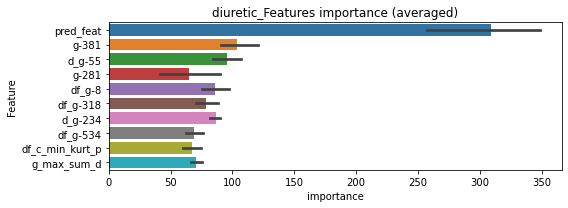

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 diuretic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000350278	valid_1's binary_logloss: 0.00103584
Early stopping, best iteration is:
[1787]	training's binary_logloss: 0.000230721	valid_1's binary_logloss: 0.000915356


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 diuretic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000345112	valid_1's binary_logloss: 0.00172006
[2000]	training's binary_logloss: 0.000214402	valid_1's binary_logloss: 0.00148168
Early stopping, best iteration is:
[2535]	training's binary_logloss: 0.000193727	valid_1's binary_logloss: 0.00145387


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 diuretic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00033547	valid_1's binary_logloss: 0.000318427
[2000]	training's binary_logloss: 0.000207086	valid_1's binary_logloss: 0.000191322
[3000]	training's binary_logloss: 0.000174363	valid_1's binary_logloss: 0.00015671
[4000]	training's binary_logloss: 0.000158347	valid_1's binary_logloss: 0.000139026
[5000]	training's binary_logloss: 0.000150075	valid_1's binary_logloss: 0.000129635
[6000]	training's binary_logloss: 0.00014452	valid_1's binary_logloss: 0.000123205
[7000]	training's binary_logloss: 0.000140357	valid_1's binary_logloss: 0.00011838
[8000]	training's binary_logloss: 0.000137221	valid_1's binary_logloss: 0.000114763
[9000]	training's binary_logloss: 0.000134877	valid_1's binary_logloss: 0.000112096
[10000]	training's binary_logloss: 0.000132955	valid_1's binary_logloss: 0.000109928
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000132955	valid_1'

len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 diuretic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000347985	valid_1's binary_logloss: 0.000297651
[2000]	training's binary_logloss: 0.000216356	valid_1's binary_logloss: 0.000178833
[3000]	training's binary_logloss: 0.000185607	valid_1's binary_logloss: 0.000148417
[4000]	training's binary_logloss: 0.000170163	valid_1's binary_logloss: 0.000132351
[5000]	training's binary_logloss: 0.000161183	valid_1's binary_logloss: 0.00012299
[6000]	training's binary_logloss: 0.000154934	valid_1's binary_logloss: 0.00011646
[7000]	training's binary_logloss: 0.000150173	valid_1's binary_logloss: 0.000111489
[8000]	training's binary_logloss: 0.00014674	valid_1's binary_logloss: 0.000107899
[9000]	training's binary_logloss: 0.000144296	valid_1's binary_logloss: 0.000105349
Early stopping, best iteration is:
[9376]	training's binary_logloss: 0.000143492	valid_1's binary_logloss: 0.000104525


diuretic logloss: 0.0006460548613623129


neg labels: 3289 → selected neg labels: 3280


dna_alkylating_agent, len(trt): 48, len(othr): 3280
target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00356816	valid_1's binary_logloss: 0.0236732
[600]	training's binary_logloss: 0.000722593	valid_1's binary_logloss: 0.017632
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.00058566	valid_1's binary_logloss: 0.017379
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00384597	valid_1's binary_logloss: 0.0217293
[600]	training's binary_logloss: 0.00074635	valid_1's binary_logloss: 0.0135671
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000600322	valid_1's binary_logloss: 0.0131571
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00401939	valid_1's binary_logloss: 0.00776001
[600]	training's binary_logloss: 0.000781904	valid_1's binary_logloss: 0.0024126
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000595587	valid_1's binary_logloss:

1 / 3 AUC score:1.000
y_Threshold: 0.0043448, Threshold: 0.0952444, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, conf_0:0.06667, conf_1:0.12382
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0952444
Num_p_label: 33.0, Expected: 8.0, Adj_threshold_2: 0.1452444
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_3: 0.1952444
Num_p_label: 28.0, Expected: 8.0, Adj_threshold_4: 0.2452444
Num_p_label: 22.0, Expected: 8.0, Adj_threshold_5: 0.2952444
Num_p_label: 17.0, Expected: 8.0, Adj_threshold_6: 0.3452444
threshold: 0.3452444, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000941757	valid_1's binary_logloss: 0.00364799
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000259135	valid_1's binary_logloss: 0.00221997
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000976263	valid_1's binary_logloss: 0.00270583
[600]	training's binary_logloss: 0.000220249	valid_1's binary_logloss: 0.00172619
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.00018142	valid_1's binary_logloss: 0.00166683
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000983166	valid_1's binary_logloss: 0.00522459
Early stopping, best iteration is:
[321]	training's binary_logloss: 0.000836174	valid_1's binary_logloss: 0.00500482
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000974361	valid_1's binary_logloss: 0.00221

2 / 3 AUC score:1.000
y_Threshold: 0.4933502, Threshold: 0.3452444, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3800
p_label_rate: 0.0642893 Vs.target_rate: 0.00202
Num_p_label: 256.0, conf_0:0.27620, conf_1:0.41429
Num_p_label: 256.0, Expected: 8.0, Adj_threshold_1: 0.3452444
Num_p_label: 240.0, Expected: 8.0, Adj_threshold_2: 0.3952444
Num_p_label: 229.0, Expected: 8.0, Adj_threshold_3: 0.4452444
Num_p_label: 197.0, Expected: 8.0, Adj_threshold_4: 0.4952444
Num_p_label: 167.0, Expected: 8.0, Adj_threshold_5: 0.5452444
Num_p_label: 144.0, Expected: 8.0, Adj_threshold_6: 0.5952444
Num_p_label: 129.0, Expected: 8.0, Adj_threshold_7: 0.6452444
Num_p_label: 109.0, Expected: 8.0, Adj_threshold_8: 0.6952444
Num_p_label: 91.0, Expected: 8.0, Adj_threshold_9: 0.7452444
Num_p_label: 80.0, Expected: 8.0, Adj_threshold_10: 0.7952444
threshold: 0.7952444, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
==

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000947481	valid_1's binary_logloss: 0.00342388
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000259105	valid_1's binary_logloss: 0.00235713
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000996057	valid_1's binary_logloss: 0.00194263
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000266126	valid_1's binary_logloss: 0.000973849
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100112	valid_1's binary_logloss: 0.00636014
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000256291	valid_1's binary_logloss: 0.00512421
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000963083	valid_1's binary_logloss: 0.00272182
[600]	training's binary_logloss: 0.000220233	valid_1's binary_logloss: 0.0014

3 / 3 AUC score:1.000
y_Threshold: 0.6102133, Threshold: 0.7952444, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0190859 Vs.target_rate: 0.00202
Num_p_label: 76.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 76.0, Expected: 8.0, Adj_threshold_1: 0.7952444
threshold: 0.7952444, positive_p_label: 76.0/3982, p_label_rate: 0.0190859


Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000179163	valid_1's binary_logloss: 0.00137101


positive_y_label: 653.0/3798, y_label_rate: 0.1719326


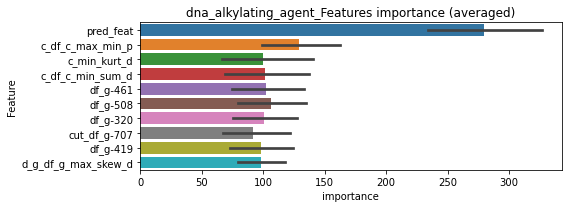

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2848
len(valid_index) : 950


Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000566554	valid_1's binary_logloss: 0.00594617


================================= fold 2/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000529936	valid_1's binary_logloss: 0.00262968
Early stopping, best iteration is:
[1736]	training's binary_logloss: 0.000339137	valid_1's binary_logloss: 0.00233895


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000531896	valid_1's binary_logloss: 0.00143035
Early stopping, best iteration is:
[1508]	training's binary_logloss: 0.000375942	valid_1's binary_logloss: 0.00126246


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000534986	valid_1's binary_logloss: 0.000506802
[2000]	training's binary_logloss: 0.00031344	valid_1's binary_logloss: 0.000280676
[3000]	training's binary_logloss: 0.000249786	valid_1's binary_logloss: 0.000211734
[4000]	training's binary_logloss: 0.000219446	valid_1's binary_logloss: 0.000178322
[5000]	training's binary_logloss: 0.000203934	valid_1's binary_logloss: 0.000161125
[6000]	training's binary_logloss: 0.000193725	valid_1's binary_logloss: 0.000149749
[7000]	training's binary_logloss: 0.00018672	valid_1's binary_logloss: 0.000141951
[8000]	training's binary_logloss: 0.000181318	valid_1's binary_logloss: 0.000136106
Early stopping, best iteration is:
[8131]	training's binary_logloss: 0.000180728	valid_1's binary_logloss: 0.000135408


dna_alkylating_agent logloss: 0.0024222032134532286


neg labels: 3289 → selected neg labels: 3248


dna_inhibitor, len(trt): 402, len(othr): 3248
target_rate: 0.0168808 → Adj_target_rate: 0.0137338
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[186]	training's binary_logloss: 0.105368	valid_1's binary_logloss: 0.363215
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[246]	training's binary_logloss: 0.0774843	valid_1's binary_logloss: 0.338394
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0550634	valid_1's binary_logloss: 0.327706
Early stopping, best iteration is:
[277]	training's binary_logloss: 0.0632445	valid_1's binary_logloss: 0.326851
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.809
y_Threshold: 0.1362144, Threshold: 0.4643792, pos_neg_ratio: 0.8000000
Remove_noisy_data: 637 → Positive_corect_labels: 396/3260
p_label_rate: 0.0100452 Vs.target_rate: 0.01688
Num_p_label: 40.0, conf_0:0.32507, conf_1:0.60369
Num_p_label: 40.0, Expected: 67.2, Adj_threshold_1: 0.4643792
Num_p_label: 44.0, Expected: 67.2, Adj_threshold_2: 0.4443792
Num_p_label: 47.0, Expected: 67.2, Adj_threshold_3: 0.4243792
threshold: 0.4243792, positive_p_label: 47.0/3982, p_label_rate: 0.0118031


[300]	training's binary_logloss: 0.0608116	valid_1's binary_logloss: 0.323195
Early stopping, best iteration is:
[274]	training's binary_logloss: 0.070426	valid_1's binary_logloss: 0.322771


positive_y_label: 396.0/3260, y_label_rate: 0.1214724
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139558	valid_1's binary_logloss: 0.00519802
[600]	training's binary_logloss: 0.000202002	valid_1's binary_logloss: 0.000815913
[900]	training's binary_logloss: 0.000126073	valid_1's binary_logloss: 0.000510516
[1200]	training's binary_logloss: 0.000118215	valid_1's binary_logloss: 0.000479476
Early stopping, best iteration is:
[1308]	training's binary_logloss: 0.00011692	valid_1's binary_logloss: 0.000472908
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144468	valid_1's binary_logloss: 0.0109469
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.00040732	valid_1's binary_logloss: 0.00945009
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00145117	valid_1's binary_logloss: 0.00996648
Early stopping, best iteration is:
[389]	training's binary_logloss: 0.000671174	valid_1's b

2 / 3 AUC score:1.000
y_Threshold: 0.8848985, Threshold: 0.4243792, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 394.0/3256
p_label_rate: 0.1469111 Vs.target_rate: 0.01688
Num_p_label: 585.0, conf_0:0.33950, conf_1:0.50926
Num_p_label: 585.0, Expected: 67.2, Adj_threshold_1: 0.4243792
Num_p_label: 585.0, Expected: 67.2, Adj_threshold_2: 0.4743792
Num_p_label: 585.0, Expected: 67.2, Adj_threshold_3: 0.5243792
Num_p_label: 585.0, Expected: 67.2, Adj_threshold_4: 0.5743792
Num_p_label: 585.0, Expected: 67.2, Adj_threshold_5: 0.6243792
Num_p_label: 585.0, Expected: 67.2, Adj_threshold_6: 0.6743792
Num_p_label: 585.0, Expected: 67.2, Adj_threshold_7: 0.7243792
Num_p_label: 580.0, Expected: 67.2, Adj_threshold_8: 0.7743792
threshold: 0.7743792, positive_p_label: 580.0/3982, p_label_rate: 0.1456554
positive_y_label: 394.0/3256, y_label_rate: 0.1210074
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00165683	valid_1's binary_logloss: 0.00813023
[600]	training's binary_logloss: 0.000280461	valid_1's binary_logloss: 0.00426774
[900]	training's binary_logloss: 0.000188678	valid_1's binary_logloss: 0.00391138
Early stopping, best iteration is:
[989]	training's binary_logloss: 0.000181091	valid_1's binary_logloss: 0.0038753
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168697	valid_1's binary_logloss: 0.00495289
[600]	training's binary_logloss: 0.0002821	valid_1's binary_logloss: 0.00111669
[900]	training's binary_logloss: 0.000188841	valid_1's binary_logloss: 0.000853611
Early stopping, best iteration is:
[1021]	training's binary_logloss: 0.000181149	valid_1's binary_logloss: 0.00083539
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00160983	valid_1's binary_logloss: 0.00993783
[600]	trainin

3 / 3 AUC score:1.000
y_Threshold: 0.6869488, Threshold: 0.7743792, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 391.0/3250
p_label_rate: 0.1454043 Vs.target_rate: 0.01688
Num_p_label: 579.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 579.0, Expected: 67.2, Adj_threshold_1: 0.7743792
threshold: 0.7743792, positive_p_label: 579.0/3982, p_label_rate: 0.1454043
positive_y_label: 391.0/3250, y_label_rate: 0.1203077


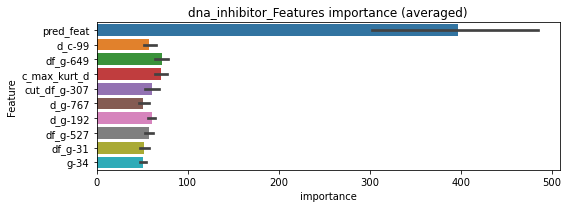

len(train_index) : 2437
len(valid_index) : 813
================================= fold 1/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000680976	valid_1's binary_logloss: 0.00619296
Early stopping, best iteration is:
[1747]	training's binary_logloss: 0.000420397	valid_1's binary_logloss: 0.00566216


len(train_index) : 2437
len(valid_index) : 813
================================= fold 2/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000680092	valid_1's binary_logloss: 0.00204393
[2000]	training's binary_logloss: 0.000382205	valid_1's binary_logloss: 0.0014961
Early stopping, best iteration is:
[2680]	training's binary_logloss: 0.000312978	valid_1's binary_logloss: 0.00136787


len(train_index) : 2438
len(valid_index) : 812
================================= fold 3/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000670644	valid_1's binary_logloss: 0.00577367
Early stopping, best iteration is:
[1203]	training's binary_logloss: 0.000569279	valid_1's binary_logloss: 0.0055997


len(train_index) : 2438
len(valid_index) : 812
================================= fold 4/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000671711	valid_1's binary_logloss: 0.00099418
[2000]	training's binary_logloss: 0.000378028	valid_1's binary_logloss: 0.000542956
[3000]	training's binary_logloss: 0.000291097	valid_1's binary_logloss: 0.000402534
[4000]	training's binary_logloss: 0.000252368	valid_1's binary_logloss: 0.000336358
[5000]	training's binary_logloss: 0.000231874	valid_1's binary_logloss: 0.000302305
[6000]	training's binary_logloss: 0.000217989	valid_1's binary_logloss: 0.000279873
[7000]	training's binary_logloss: 0.000207737	valid_1's binary_logloss: 0.000263396
Early stopping, best iteration is:
[7771]	training's binary_logloss: 0.000202007	valid_1's binary_logloss: 0.000254285


dna_inhibitor logloss: 0.003221605357538471


neg labels: 3289 → selected neg labels: 3272


dopamine_receptor_agonist, len(trt): 121, len(othr): 3272
target_rate: 0.0050810 → Adj_target_rate: 0.0049495
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120715	valid_1's binary_logloss: 0.130591
Early stopping, best iteration is:
[375]	training's binary_logloss: 0.00649454	valid_1's binary_logloss: 0.124832
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134434	valid_1's binary_logloss: 0.0731775
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.00243836	valid_1's binary_logloss: 0.0580571
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0131636	valid_1's binary_logloss: 0.0664956
[600]	training's binary_logloss: 0.00207931	valid_1's binary_logloss: 0.0474712
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.00130082	valid_1's binary_logloss: 0.0460905
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0135364	valid_1's binary_logloss: 0.0746422
[600]	training's 

1 / 3 AUC score:0.993
y_Threshold: 0.0234536, Threshold: 0.0909314, pos_neg_ratio: 0.8000000
Remove_noisy_data: 172 → Positive_corect_labels: 634/3754
p_label_rate: 0.0100452 Vs.target_rate: 0.00508
Num_p_label: 40.0, conf_0:0.06365, conf_1:0.11821
Num_p_label: 40.0, Expected: 20.2, Adj_threshold_1: 0.0909314
Num_p_label: 24.0, Expected: 20.2, Adj_threshold_2: 0.1409314
threshold: 0.1409314, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 634.0/3754, y_label_rate: 0.1688865
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001518	valid_1's binary_logloss: 0.00604887
[600]	training's binary_logloss: 0.000246881	valid_1's binary_logloss: 0.00342102
Early stopping, best iteration is:
[854]	training's binary_logloss: 0.000174009	valid_1's binary_logloss: 0.0032212
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00151496	valid_1's binary_logloss: 0.00811432
[600]	training's binary_logloss: 0.000244118	valid_1's binary_logloss: 0.00531923
[900]	training's binary_logloss: 0.000167584	valid_1's binary_logloss: 0.00508118
Early stopping, best iteration is:
[987]	training's binary_logloss: 0.00016208	valid_1's binary_logloss: 0.00505437
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00157973	valid_1's binary_logloss: 0.00370709
[600]	training's binary_logloss: 0.000256414	valid_1's binary_logloss: 0.000932347
[900]	training'

2 / 3 AUC score:1.000
y_Threshold: 0.1581936, Threshold: 0.1409314, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 630.0/3746
p_label_rate: 0.0534907 Vs.target_rate: 0.00508
Num_p_label: 213.0, conf_0:0.11275, conf_1:0.16912
Num_p_label: 213.0, Expected: 20.2, Adj_threshold_1: 0.1409314
Num_p_label: 184.0, Expected: 20.2, Adj_threshold_2: 0.1909314
Num_p_label: 166.0, Expected: 20.2, Adj_threshold_3: 0.2409314
Num_p_label: 158.0, Expected: 20.2, Adj_threshold_4: 0.2909314
Num_p_label: 157.0, Expected: 20.2, Adj_threshold_5: 0.3409314
Num_p_label: 157.0, Expected: 20.2, Adj_threshold_6: 0.3909314
Num_p_label: 157.0, Expected: 20.2, Adj_threshold_7: 0.4409314
Num_p_label: 157.0, Expected: 20.2, Adj_threshold_8: 0.4909314
Num_p_label: 157.0, Expected: 20.2, Adj_threshold_9: 0.5409314
Num_p_label: 157.0, Expected: 20.2, Adj_threshold_10: 0.5909314


Early stopping, best iteration is:
[504]	training's binary_logloss: 0.00034891	valid_1's binary_logloss: 0.00590515


threshold: 0.6409314, positive_p_label: 157.0/3982, p_label_rate: 0.0394274
positive_y_label: 630.0/3746, y_label_rate: 0.1681794
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00141495	valid_1's binary_logloss: 0.00315195
[600]	training's binary_logloss: 0.000222632	valid_1's binary_logloss: 0.000897149
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000201927	valid_1's binary_logloss: 0.000842516
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00143489	valid_1's binary_logloss: 0.00515893
[600]	training's binary_logloss: 0.000227725	valid_1's binary_logloss: 0.00164712
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000166001	valid_1's binary_logloss: 0.00146365
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00129206	valid_1's binary_logloss: 0.00257195
[600]	training's binary_logloss: 0.000177067	valid_1's binary_logloss: 0.000373841
[900]	training's binary_logloss: 0.000109883	valid_1's binary_logloss: 0.000232862
[1200]	t

3 / 3 AUC score:1.000
y_Threshold: 0.1178054, Threshold: 0.6409314, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 630.0/3746
p_label_rate: 0.0394274 Vs.target_rate: 0.00508
Num_p_label: 157.0, conf_0:0.50000, conf_1:0.70502
Num_p_label: 157.0, Expected: 20.2, Adj_threshold_1: 0.6409314
Num_p_label: 157.0, Expected: 20.2, Adj_threshold_2: 0.6909314
Num_p_label: 157.0, Expected: 20.2, Adj_threshold_3: 0.7409314
Num_p_label: 157.0, Expected: 20.2, Adj_threshold_4: 0.7909314
threshold: 0.7909314, positive_p_label: 157.0/3982, p_label_rate: 0.0394274
positive_y_label: 630.0/3746, y_label_rate: 0.1681794


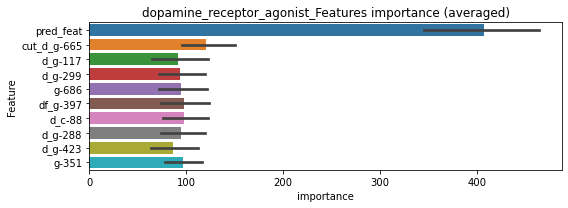

len(train_index) : 2809
len(valid_index) : 937
================================= fold 1/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00055566	valid_1's binary_logloss: 0.00599875
Early stopping, best iteration is:
[1302]	training's binary_logloss: 0.000439747	valid_1's binary_logloss: 0.00585772


len(train_index) : 2809
len(valid_index) : 937
================================= fold 2/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2810
len(valid_index) : 936
================================= fold 3/4 dopamine_receptor_agonist=================================


Early stopping, best iteration is:
[318]	training's binary_logloss: 0.00182948	valid_1's binary_logloss: 0.00739858
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000470229	valid_1's binary_logloss: 0.00073541
[2000]	training's binary_logloss: 0.000256758	valid_1's binary_logloss: 0.000402564
[3000]	training's binary_logloss: 0.000187793	valid_1's binary_logloss: 0.000294681
[4000]	training's binary_logloss: 0.000155318	valid_1's binary_logloss: 0.000243851
[5000]	training's binary_logloss: 0.000138806	valid_1's binary_logloss: 0.000218002
[6000]	training's binary_logloss: 0.000128164	valid_1's binary_logloss: 0.000201293
[7000]	training's binary_logloss: 0.000120788	valid_1's binary_logloss: 0.000189718
[8000]	training's binary_logloss: 0.000115746	valid_1's binary_logloss: 0.000181806
[9000]	training's binary_logloss: 0.000112155	valid_1's binary_logloss: 0.000176163
[10000]	training's binary_logloss: 0.000109581	valid_1's binary_logl

len(train_index) : 2810
len(valid_index) : 936
================================= fold 4/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000469747	valid_1's binary_logloss: 0.000799463
[2000]	training's binary_logloss: 0.000256601	valid_1's binary_logloss: 0.000438295
[3000]	training's binary_logloss: 0.000187796	valid_1's binary_logloss: 0.000321203
[4000]	training's binary_logloss: 0.000155288	valid_1's binary_logloss: 0.000265789
[5000]	training's binary_logloss: 0.000138757	valid_1's binary_logloss: 0.000237593
[6000]	training's binary_logloss: 0.000128158	valid_1's binary_logloss: 0.000219461
[7000]	training's binary_logloss: 0.000120786	valid_1's binary_logloss: 0.000206844
[8000]	training's binary_logloss: 0.00011575	valid_1's binary_logloss: 0.000198236
[9000]	training's binary_logloss: 0.000112171	valid_1's binary_logloss: 0.000192111
[10000]	training's binary_logloss: 0.000109586	valid_1's binary_logloss: 0.000187703
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000109586	valid

dopamine_receptor_agonist logloss: 0.0034075894214925283


neg labels: 3289 → selected neg labels: 3231


dopamine_receptor_antagonist, len(trt): 424, len(othr): 3231
target_rate: 0.0178047 → Adj_target_rate: 0.0143701
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[216]	training's binary_logloss: 0.0970756	valid_1's binary_logloss: 0.379337
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[224]	training's binary_logloss: 0.10035	valid_1's binary_logloss: 0.370648
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0707896	valid_1's binary_logloss: 0.346922
Early stopping, best iteration is:
[333]	training's binary_logloss: 0.0590855	valid_1's binary_logloss: 0.346086
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.750
y_Threshold: 0.1395251, Threshold: 0.5335646, pos_neg_ratio: 0.8000000
Remove_noisy_data: 730 → Positive_corect_labels: 346/3147
p_label_rate: 0.0100452 Vs.target_rate: 0.01780
Num_p_label: 40.0, conf_0:0.37350, conf_1:0.69363
Num_p_label: 40.0, Expected: 70.9, Adj_threshold_1: 0.5335646
Num_p_label: 42.0, Expected: 70.9, Adj_threshold_2: 0.5135646
Num_p_label: 52.0, Expected: 70.9, Adj_threshold_3: 0.4935646


Early stopping, best iteration is:
[201]	training's binary_logloss: 0.106192	valid_1's binary_logloss: 0.381831


threshold: 0.4935646, positive_p_label: 52.0/3982, p_label_rate: 0.0130588
positive_y_label: 346.0/3147, y_label_rate: 0.1099460
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00164447	valid_1's binary_logloss: 0.00492219
[600]	training's binary_logloss: 0.000281667	valid_1's binary_logloss: 0.000971853
[900]	training's binary_logloss: 0.000195221	valid_1's binary_logloss: 0.000640142
Early stopping, best iteration is:
[1078]	training's binary_logloss: 0.000184722	valid_1's binary_logloss: 0.000605891
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00164043	valid_1's binary_logloss: 0.0067446
[600]	training's binary_logloss: 0.000286913	valid_1's binary_logloss: 0.00304792
[900]	training's binary_logloss: 0.000194848	valid_1's binary_logloss: 0.00274115
Early stopping, best iteration is:
[1029]	training's binary_logloss: 0.000184945	valid_1's binary_logloss: 0.00271696
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00155759	valid_1's binary_logloss: 0.00665789
[600]	tr

2 / 3 AUC score:1.000
y_Threshold: 0.6358243, Threshold: 0.4935646, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 345.0/3145
p_label_rate: 0.1413862 Vs.target_rate: 0.01780
Num_p_label: 563.0, conf_0:0.39485, conf_1:0.59228
Num_p_label: 563.0, Expected: 70.9, Adj_threshold_1: 0.4935646
Num_p_label: 562.0, Expected: 70.9, Adj_threshold_2: 0.5435646
Num_p_label: 561.0, Expected: 70.9, Adj_threshold_3: 0.5935646
Num_p_label: 551.0, Expected: 70.9, Adj_threshold_4: 0.6435646
Num_p_label: 542.0, Expected: 70.9, Adj_threshold_5: 0.6935646
Num_p_label: 517.0, Expected: 70.9, Adj_threshold_6: 0.7435646
Num_p_label: 494.0, Expected: 70.9, Adj_threshold_7: 0.7935646
threshold: 0.7935646, positive_p_label: 494.0/3982, p_label_rate: 0.1240583
positive_y_label: 345.0/3145, y_label_rate: 0.1096979
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00170741	valid_1's binary_logloss: 0.0112366
[600]	training's binary_logloss: 0.00029816	valid_1's binary_logloss: 0.00767198
[900]	training's binary_logloss: 0.000207514	valid_1's binary_logloss: 0.00720183
Early stopping, best iteration is:
[913]	training's binary_logloss: 0.000206179	valid_1's binary_logloss: 0.00718392
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174455	valid_1's binary_logloss: 0.00650434
[600]	training's binary_logloss: 0.000289405	valid_1's binary_logloss: 0.00277103
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000236692	valid_1's binary_logloss: 0.00257107
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00167105	valid_1's binary_logloss: 0.0096681
[600]	training's binary_logloss: 0.000284454	valid_1's binary_logloss: 0.0044547
[900]	training's

3 / 3 AUC score:1.000
y_Threshold: 0.5888307, Threshold: 0.7935646, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 342.0/3139
p_label_rate: 0.1074837 Vs.target_rate: 0.01780
Num_p_label: 428.0, conf_0:0.50000, conf_1:0.80000


[900]	training's binary_logloss: 0.000197381	valid_1's binary_logloss: 0.000605144
Early stopping, best iteration is:
[927]	training's binary_logloss: 0.000194376	valid_1's binary_logloss: 0.000589863


Num_p_label: 428.0, Expected: 70.9, Adj_threshold_1: 0.7935646
threshold: 0.7935646, positive_p_label: 428.0/3982, p_label_rate: 0.1074837
positive_y_label: 342.0/3139, y_label_rate: 0.1089519


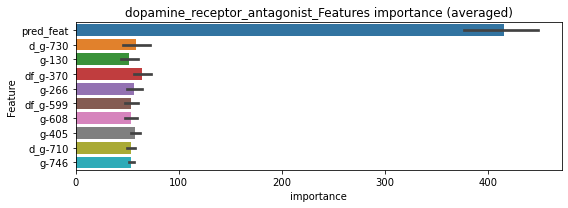

len(train_index) : 2354
len(valid_index) : 785
================================= fold 1/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000687565	valid_1's binary_logloss: 0.0015208
[2000]	training's binary_logloss: 0.000391767	valid_1's binary_logloss: 0.00103778
[3000]	training's binary_logloss: 0.000304271	valid_1's binary_logloss: 0.000886015
[4000]	training's binary_logloss: 0.000263359	valid_1's binary_logloss: 0.000812191
Early stopping, best iteration is:
[4391]	training's binary_logloss: 0.000254791	valid_1's binary_logloss: 0.000796583


len(train_index) : 2354
len(valid_index) : 785
================================= fold 2/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000712091	valid_1's binary_logloss: 0.00204152
[2000]	training's binary_logloss: 0.000399334	valid_1's binary_logloss: 0.00144172
Early stopping, best iteration is:
[2683]	training's binary_logloss: 0.000324265	valid_1's binary_logloss: 0.00127855


len(train_index) : 2354
len(valid_index) : 785
================================= fold 3/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000708219	valid_1's binary_logloss: 0.00691281
Early stopping, best iteration is:
[1136]	training's binary_logloss: 0.000639983	valid_1's binary_logloss: 0.00664509


len(train_index) : 2355
len(valid_index) : 784
================================= fold 4/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000771347	valid_1's binary_logloss: 0.0106266


dopamine_receptor_antagonist logloss: 0.004834977829294238


neg labels: 3289 → selected neg labels: 3242


egfr_inhibitor, len(trt): 336, len(othr): 3242
target_rate: 0.0141093 → Adj_target_rate: 0.0117920
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0522696	valid_1's binary_logloss: 0.291899
Early stopping, best iteration is:
[328]	training's binary_logloss: 0.0443984	valid_1's binary_logloss: 0.290707
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0525542	valid_1's binary_logloss: 0.287288
Early stopping, best iteration is:
[355]	training's binary_logloss: 0.0372523	valid_1's binary_logloss: 0.283862
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0536025	valid_1's binary_logloss: 0.29898
Early stopping, best iteration is:
[314]	training's binary_logloss: 0.0489187	valid_1's binary_logloss: 0.297571
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0561548	valid_1's binary_logloss: 0.31441


1 / 3 AUC score:0.851
y_Threshold: 0.1120887, Threshold: 0.7604934, pos_neg_ratio: 0.8000000
Remove_noisy_data: 532 → Positive_corect_labels: 447/3358
p_label_rate: 0.0100452 Vs.target_rate: 0.01411
Num_p_label: 40.0, conf_0:0.50000, conf_1:0.80000
threshold: 0.7604934, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[315]	training's binary_logloss: 0.0512546	valid_1's binary_logloss: 0.31267


positive_y_label: 447.0/3358, y_label_rate: 0.1331149
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00195877	valid_1's binary_logloss: 0.0121995
[600]	training's binary_logloss: 0.000295673	valid_1's binary_logloss: 0.00800606
Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000200801	valid_1's binary_logloss: 0.00762858
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00199446	valid_1's binary_logloss: 0.00485159
[600]	training's binary_logloss: 0.000298195	valid_1's binary_logloss: 0.00132272
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000200578	valid_1's binary_logloss: 0.00103588
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00199648	valid_1's binary_logloss: 0.00809754
[600]	training's binary_logloss: 0.000298503	valid_1's binary_logloss: 0.00348452
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000238933	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.5892686, Threshold: 0.7604934, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 443.0/3350
p_label_rate: 0.0986941 Vs.target_rate: 0.01411
Num_p_label: 393.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 393.0, Expected: 56.2, Adj_threshold_1: 0.7604934
threshold: 0.7604934, positive_p_label: 393.0/3982, p_label_rate: 0.0986941


Early stopping, best iteration is:
[791]	training's binary_logloss: 0.000210606	valid_1's binary_logloss: 0.00161537


positive_y_label: 443.0/3350, y_label_rate: 0.1322388
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016562	valid_1's binary_logloss: 0.00419391
[600]	training's binary_logloss: 0.0002084	valid_1's binary_logloss: 0.000566011
[900]	training's binary_logloss: 0.000123686	valid_1's binary_logloss: 0.000337333
[1200]	training's binary_logloss: 0.000115152	valid_1's binary_logloss: 0.000314478
Early stopping, best iteration is:
[1233]	training's binary_logloss: 0.000114664	valid_1's binary_logloss: 0.000312961
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168197	valid_1's binary_logloss: 0.00420159
[600]	training's binary_logloss: 0.000209745	valid_1's binary_logloss: 0.000563378
[900]	training's binary_logloss: 0.000123949	valid_1's binary_logloss: 0.000334206
[1200]	training's binary_logloss: 0.000115216	valid_1's binary_logloss: 0.000310752
Early stopping, best iteration is:
[1217]	training's binary_logloss: 0.00011498	valid_1's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.9180357, Threshold: 0.7604934, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 443.0/3350
p_label_rate: 0.1082371 Vs.target_rate: 0.01411
Num_p_label: 431.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 431.0, Expected: 56.2, Adj_threshold_1: 0.7604934
threshold: 0.7604934, positive_p_label: 431.0/3982, p_label_rate: 0.1082371
positive_y_label: 443.0/3350, y_label_rate: 0.1322388


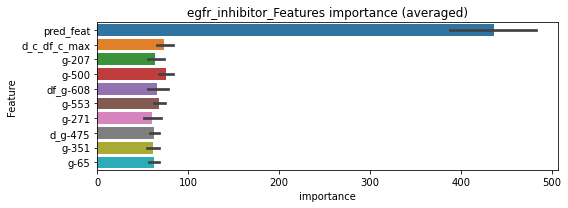

len(train_index) : 2512
len(valid_index) : 838
================================= fold 1/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000537378	valid_1's binary_logloss: 0.00102799
[2000]	training's binary_logloss: 0.000289989	valid_1's binary_logloss: 0.000556938
[3000]	training's binary_logloss: 0.000211186	valid_1's binary_logloss: 0.000406063
[4000]	training's binary_logloss: 0.000174345	valid_1's binary_logloss: 0.000335455
[5000]	training's binary_logloss: 0.000155667	valid_1's binary_logloss: 0.000299658
[6000]	training's binary_logloss: 0.000143673	valid_1's binary_logloss: 0.000276613
[7000]	training's binary_logloss: 0.00013533	valid_1's binary_logloss: 0.000260555
[8000]	training's binary_logloss: 0.000129634	valid_1's binary_logloss: 0.000249616
[9000]	training's binary_logloss: 0.000125575	valid_1's binary_logloss: 0.000241794
[10000]	training's binary_logloss: 0.00012267	valid_1's binary_logloss: 0.000236211
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.00012267	valid_1'

len(train_index) : 2512
len(valid_index) : 838
================================= fold 2/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000537423	valid_1's binary_logloss: 0.00104634
[2000]	training's binary_logloss: 0.000289943	valid_1's binary_logloss: 0.000566801
[3000]	training's binary_logloss: 0.000211151	valid_1's binary_logloss: 0.000413254
[4000]	training's binary_logloss: 0.000174322	valid_1's binary_logloss: 0.000341464
[5000]	training's binary_logloss: 0.000155637	valid_1's binary_logloss: 0.000305002
[6000]	training's binary_logloss: 0.000143659	valid_1's binary_logloss: 0.000281552
[7000]	training's binary_logloss: 0.000135344	valid_1's binary_logloss: 0.000265264
[8000]	training's binary_logloss: 0.000129649	valid_1's binary_logloss: 0.000254128
[9000]	training's binary_logloss: 0.000125611	valid_1's binary_logloss: 0.00024622
[10000]	training's binary_logloss: 0.000122689	valid_1's binary_logloss: 0.000240508
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000122689	valid_

len(train_index) : 2513
len(valid_index) : 837
================================= fold 3/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2513
len(valid_index) : 837
================================= fold 4/4 egfr_inhibitor=================================


Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000898963	valid_1's binary_logloss: 0.00846134
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000537432	valid_1's binary_logloss: 0.00106176
[2000]	training's binary_logloss: 0.000289981	valid_1's binary_logloss: 0.000575385
[3000]	training's binary_logloss: 0.000211217	valid_1's binary_logloss: 0.00041967
[4000]	training's binary_logloss: 0.000174268	valid_1's binary_logloss: 0.000346511
[5000]	training's binary_logloss: 0.000155501	valid_1's binary_logloss: 0.000309322
[6000]	training's binary_logloss: 0.000143545	valid_1's binary_logloss: 0.000285581
[7000]	training's binary_logloss: 0.000135235	valid_1's binary_logloss: 0.00026906
[8000]	training's binary_logloss: 0.000129553	valid_1's binary_logloss: 0.000257781
[9000]	training's binary_logloss: 0.00012553	valid_1's binary_logloss: 0.000249785
[10000]	training's binary_logloss: 0.000122597	valid_1's binary_loglos

egfr_inhibitor logloss: 0.002294274155337259


neg labels: 3289 → selected neg labels: 3284


elastase_inhibitor, len(trt): 12, len(othr): 3284
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000674965	valid_1's binary_logloss: 0.00314428
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000281375	valid_1's binary_logloss: 0.00236875
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000691696	valid_1's binary_logloss: 0.00237504
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000280372	valid_1's binary_logloss: 0.00142504
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00072453	valid_1's binary_logloss: 0.000843119
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000285757	valid_1's binary_logloss: 0.000355038
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000710472	valid_1's binary_logloss: 0.00115284


1 / 3 AUC score:1.000
y_Threshold: 0.0011288, Threshold: 0.0031146, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.00218, conf_1:0.00405
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0031146
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0531146
threshold: 0.0531146, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000283523	valid_1's binary_logloss: 0.000581534


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000413803	valid_1's binary_logloss: 0.00113198
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000187631	valid_1's binary_logloss: 0.000850782
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000412466	valid_1's binary_logloss: 0.00106706
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000186547	valid_1's binary_logloss: 0.000728524
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000430393	valid_1's binary_logloss: 0.0013279
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000174542	valid_1's binary_logloss: 0.00101054
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000415056	valid_1's binary_logloss: 0.000520874
[600]	training's binary_logloss: 0.000161576	valid_1's binary_logloss: 0.00

2 / 3 AUC score:1.000
y_Threshold: 0.3383062, Threshold: 0.0531146, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0489704 Vs.target_rate: 0.00050
Num_p_label: 195.0, conf_0:0.04249, conf_1:0.06374
Num_p_label: 195.0, Expected: 2.0, Adj_threshold_1: 0.0531146
Num_p_label: 190.0, Expected: 2.0, Adj_threshold_2: 0.1031146
Num_p_label: 182.0, Expected: 2.0, Adj_threshold_3: 0.1531146
Num_p_label: 158.0, Expected: 2.0, Adj_threshold_4: 0.2031146
Num_p_label: 119.0, Expected: 2.0, Adj_threshold_5: 0.2531146
Num_p_label: 68.0, Expected: 2.0, Adj_threshold_6: 0.3031146
Num_p_label: 39.0, Expected: 2.0, Adj_threshold_7: 0.3531146
Num_p_label: 24.0, Expected: 2.0, Adj_threshold_8: 0.4031146
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_9: 0.4531146
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_10: 0.5031146


Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000143789	valid_1's binary_logloss: 0.000210315


threshold: 0.5531146, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000414025	valid_1's binary_logloss: 0.00113374
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000183491	valid_1's binary_logloss: 0.000849514
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000408499	valid_1's binary_logloss: 0.000928853
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000186631	valid_1's binary_logloss: 0.000641854
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000427744	valid_1's binary_logloss: 0.00131457
Early stopping, best iteration is:
[322]	training's binary_logloss: 0.000363892	valid_1's binary_logloss: 0.00122413
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00041839	valid_1's binary_logloss: 0.000512558
[600]	training's binary_logloss: 0.00016413	valid_1's binary_logloss: 0.00

3 / 3 AUC score:1.000
y_Threshold: 0.3101608, Threshold: 0.5531146, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0002511 Vs.target_rate: 0.00050
Num_p_label: 1.0, conf_0:0.49780, conf_1:0.60843
Num_p_label: 1.0, Expected: 2.0, Adj_threshold_1: 0.5531146
threshold: 0.5531146, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


[900]	training's binary_logloss: 0.000144982	valid_1's binary_logloss: 0.000202943
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000144982	valid_1's binary_logloss: 0.000202943


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


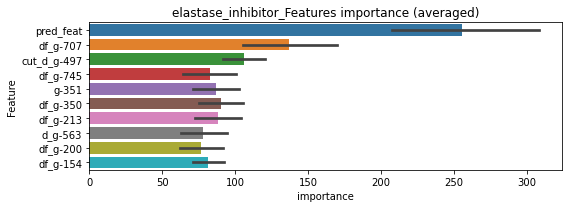

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 elastase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 elastase_inhibitor=================================


Early stopping, best iteration is:
[941]	training's binary_logloss: 0.000403421	valid_1's binary_logloss: 0.00148785
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00038328	valid_1's binary_logloss: 0.000864221
Early stopping, best iteration is:
[1895]	training's binary_logloss: 0.000245067	valid_1's binary_logloss: 0.000694913


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 elastase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 elastase_inhibitor=================================


Early stopping, best iteration is:
[230]	training's binary_logloss: 0.00176062	valid_1's binary_logloss: 0.0053738
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000388413	valid_1's binary_logloss: 0.000384926
[2000]	training's binary_logloss: 0.000240596	valid_1's binary_logloss: 0.000244594
[3000]	training's binary_logloss: 0.00020109	valid_1's binary_logloss: 0.000203849
[4000]	training's binary_logloss: 0.000182193	valid_1's binary_logloss: 0.000182977
[5000]	training's binary_logloss: 0.000171742	valid_1's binary_logloss: 0.000171597
[6000]	training's binary_logloss: 0.000164626	valid_1's binary_logloss: 0.000163944
[7000]	training's binary_logloss: 0.000159538	valid_1's binary_logloss: 0.000158804
[8000]	training's binary_logloss: 0.000155766	valid_1's binary_logloss: 0.000154932
[9000]	training's binary_logloss: 0.000153014	valid_1's binary_logloss: 0.00015184
Early stopping, best iteration is:
[9247]	training's binary_logloss: 0

elastase_inhibitor logloss: 0.0019271768555870826


neg labels: 3289 → selected neg labels: 3287


erbb2_inhibitor, len(trt): 20, len(othr): 3287
target_rate: 0.0008398 → Adj_target_rate: 0.0010717
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0015438	valid_1's binary_logloss: 0.00396995
[600]	training's binary_logloss: 0.000405869	valid_1's binary_logloss: 0.00227267
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000396006	valid_1's binary_logloss: 0.00224958
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00155091	valid_1's binary_logloss: 0.00493844
[600]	training's binary_logloss: 0.000397922	valid_1's binary_logloss: 0.00245013
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000396933	valid_1's binary_logloss: 0.00244997
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00161193	valid_1's binary_logloss: 0.00292892
[600]	training's binary_logloss: 0.000406555	valid_1's binary_logloss: 0.000949421
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000391157	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0024758, Threshold: 0.0078775, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000407173	valid_1's binary_logloss: 0.00102722
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000401554	valid_1's binary_logloss: 0.0010173


Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00084
Num_p_label: 40.0, conf_0:0.00551, conf_1:0.01024
Num_p_label: 40.0, Expected: 3.3, Adj_threshold_1: 0.0078775
Num_p_label: 2.0, Expected: 3.3, Adj_threshold_2: 0.0578775
threshold: 0.0578775, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000652634	valid_1's binary_logloss: 0.00162214
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000212235	valid_1's binary_logloss: 0.00106191
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000636735	valid_1's binary_logloss: 0.00135429
[600]	training's binary_logloss: 0.000181627	valid_1's binary_logloss: 0.000701683
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.00018826	valid_1's binary_logloss: 0.000696362
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000644666	valid_1's binary_logloss: 0.000744648
[600]	training's binary_logloss: 0.000183623	valid_1's binary_logloss: 0.000239051
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000151896	valid_1's binary_logloss: 0.000206037
Training until validation scores don't improve for 3

2 / 3 AUC score:1.000
y_Threshold: 0.6075381, Threshold: 0.0578775, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0479658 Vs.target_rate: 0.00084
Num_p_label: 191.0, conf_0:0.04630, conf_1:0.06945
Num_p_label: 191.0, Expected: 3.3, Adj_threshold_1: 0.0578775
Num_p_label: 191.0, Expected: 3.3, Adj_threshold_2: 0.1078775
Num_p_label: 191.0, Expected: 3.3, Adj_threshold_3: 0.1578775


[600]	training's binary_logloss: 0.000182486	valid_1's binary_logloss: 0.00110783
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000176804	valid_1's binary_logloss: 0.00109659


Num_p_label: 191.0, Expected: 3.3, Adj_threshold_4: 0.2078775
Num_p_label: 191.0, Expected: 3.3, Adj_threshold_5: 0.2578775
Num_p_label: 186.0, Expected: 3.3, Adj_threshold_6: 0.3078775
Num_p_label: 177.0, Expected: 3.3, Adj_threshold_7: 0.3578775
Num_p_label: 162.0, Expected: 3.3, Adj_threshold_8: 0.4078775
Num_p_label: 138.0, Expected: 3.3, Adj_threshold_9: 0.4578775
Num_p_label: 110.0, Expected: 3.3, Adj_threshold_10: 0.5078775
threshold: 0.5578775, positive_p_label: 87.0/3982, p_label_rate: 0.0218483
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000653454	valid_1's binary_logloss: 0.00238638
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000241468	valid_1's binary_logloss: 0.00175859
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000638511	valid_1's binary_logloss: 0.00130821
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.00019816	valid_1's binary_logloss: 0.000676089
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000638901	valid_1's binary_logloss: 0.000749878
[600]	training's binary_logloss: 0.0001819	valid_1's binary_logloss: 0.000245752
Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000149394	valid_1's binary_logloss: 0.000212814
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000658511	valid_1's binary_logloss: 0.001

3 / 3 AUC score:1.000
y_Threshold: 0.5492585, Threshold: 0.5578775, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0128076 Vs.target_rate: 0.00084
Num_p_label: 51.0, conf_0:0.50000, conf_1:0.61367
Num_p_label: 51.0, Expected: 3.3, Adj_threshold_1: 0.5578775
Num_p_label: 28.0, Expected: 3.3, Adj_threshold_2: 0.6078775


[900]	training's binary_logloss: 0.000152126	valid_1's binary_logloss: 0.000924945
Early stopping, best iteration is:
[923]	training's binary_logloss: 0.000150912	valid_1's binary_logloss: 0.000917665


Num_p_label: 17.0, Expected: 3.3, Adj_threshold_3: 0.6578775
Num_p_label: 8.0, Expected: 3.3, Adj_threshold_4: 0.7078775
threshold: 0.7078775, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


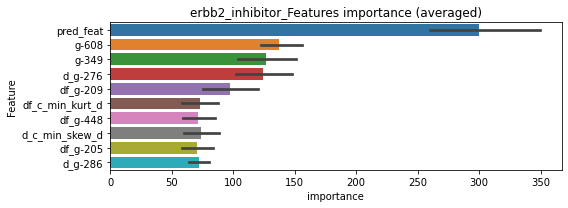

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000452104	valid_1's binary_logloss: 0.00187202
[2000]	training's binary_logloss: 0.000275153	valid_1's binary_logloss: 0.00160219
Early stopping, best iteration is:
[2011]	training's binary_logloss: 0.000274457	valid_1's binary_logloss: 0.00160082


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000438654	valid_1's binary_logloss: 0.0011314
[2000]	training's binary_logloss: 0.000267657	valid_1's binary_logloss: 0.000921299
Early stopping, best iteration is:
[2450]	training's binary_logloss: 0.000239193	valid_1's binary_logloss: 0.000884385


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000445288	valid_1's binary_logloss: 0.000484134
[2000]	training's binary_logloss: 0.000271075	valid_1's binary_logloss: 0.000295686
[3000]	training's binary_logloss: 0.000220099	valid_1's binary_logloss: 0.000238091
[4000]	training's binary_logloss: 0.000194345	valid_1's binary_logloss: 0.000207858
[5000]	training's binary_logloss: 0.000180082	valid_1's binary_logloss: 0.000190871
[6000]	training's binary_logloss: 0.000171441	valid_1's binary_logloss: 0.000181127
[7000]	training's binary_logloss: 0.000164381	valid_1's binary_logloss: 0.000173414
[8000]	training's binary_logloss: 0.000159965	valid_1's binary_logloss: 0.000168342
Early stopping, best iteration is:
[8901]	training's binary_logloss: 0.000156648	valid_1's binary_logloss: 0.000164533


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000447274	valid_1's binary_logloss: 0.000924502
[2000]	training's binary_logloss: 0.000269447	valid_1's binary_logloss: 0.000716731
Early stopping, best iteration is:
[2786]	training's binary_logloss: 0.00022546	valid_1's binary_logloss: 0.000668882


erbb2_inhibitor logloss: 0.0008303650983383532


neg labels: 3289 → selected neg labels: 3270


estrogen_receptor_agonist, len(trt): 158, len(othr): 3270
target_rate: 0.0066348 → Adj_target_rate: 0.0062095
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0193536	valid_1's binary_logloss: 0.147453
Early stopping, best iteration is:
[420]	training's binary_logloss: 0.00782943	valid_1's binary_logloss: 0.141129
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0189744	valid_1's binary_logloss: 0.143072
Early stopping, best iteration is:
[333]	training's binary_logloss: 0.0146058	valid_1's binary_logloss: 0.141407
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0194433	valid_1's binary_logloss: 0.0984002
[600]	training's binary_logloss: 0.00310932	valid_1's binary_logloss: 0.0863867
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.00255381	valid_1's binary_logloss: 0.0854367
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0193793	valid_1's binary_logloss: 0.148186


1 / 3 AUC score:0.970
y_Threshold: 0.0377932, Threshold: 0.2855701, pos_neg_ratio: 0.8000000
Remove_noisy_data: 233 → Positive_corect_labels: 603/3691
p_label_rate: 0.0100452 Vs.target_rate: 0.00663
Num_p_label: 40.0, conf_0:0.19990, conf_1:0.37124
Num_p_label: 40.0, Expected: 26.4, Adj_threshold_1: 0.2855701
Num_p_label: 38.0, Expected: 26.4, Adj_threshold_2: 0.3355701
threshold: 0.3355701, positive_p_label: 38.0/3982, p_label_rate: 0.0095429


Early stopping, best iteration is:
[322]	training's binary_logloss: 0.0163746	valid_1's binary_logloss: 0.146797


positive_y_label: 603.0/3691, y_label_rate: 0.1633704
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00158427	valid_1's binary_logloss: 0.00723193
[600]	training's binary_logloss: 0.000268178	valid_1's binary_logloss: 0.00393278
[900]	training's binary_logloss: 0.000185662	valid_1's binary_logloss: 0.00367533
Early stopping, best iteration is:
[970]	training's binary_logloss: 0.000180386	valid_1's binary_logloss: 0.00365879
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016572	valid_1's binary_logloss: 0.00704146
[600]	training's binary_logloss: 0.000271328	valid_1's binary_logloss: 0.00456548
[900]	training's binary_logloss: 0.000185832	valid_1's binary_logloss: 0.00431799
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.000178235	valid_1's binary_logloss: 0.00429244
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00165623	valid_1's binary_logloss: 0.00412409
[600]	trainin

2 / 3 AUC score:1.000
y_Threshold: 0.3666158, Threshold: 0.3355701, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 601.0/3687
p_label_rate: 0.0745856 Vs.target_rate: 0.00663
Num_p_label: 297.0, conf_0:0.26846, conf_1:0.40268
Num_p_label: 297.0, Expected: 26.4, Adj_threshold_1: 0.3355701
Num_p_label: 290.0, Expected: 26.4, Adj_threshold_2: 0.3855701
Num_p_label: 278.0, Expected: 26.4, Adj_threshold_3: 0.4355701
Num_p_label: 265.0, Expected: 26.4, Adj_threshold_4: 0.4855701
Num_p_label: 246.0, Expected: 26.4, Adj_threshold_5: 0.5355701
Num_p_label: 236.0, Expected: 26.4, Adj_threshold_6: 0.5855701
Num_p_label: 229.0, Expected: 26.4, Adj_threshold_7: 0.6355701
Num_p_label: 225.0, Expected: 26.4, Adj_threshold_8: 0.6855701
Num_p_label: 220.0, Expected: 26.4, Adj_threshold_9: 0.7355701
Num_p_label: 220.0, Expected: 26.4, Adj_threshold_10: 0.7855701
threshold: 0.7855701, positive_p_label: 220.0/3982, p_label_rate: 0.0552486
positive_y_label: 601.0/3687, y_label_rate:

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00155679	valid_1's binary_logloss: 0.00636422
[600]	training's binary_logloss: 0.000263701	valid_1's binary_logloss: 0.00365065
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000272496	valid_1's binary_logloss: 0.00360603
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00158544	valid_1's binary_logloss: 0.00647892
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000345881	valid_1's binary_logloss: 0.00377083
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00167052	valid_1's binary_logloss: 0.00311926
[600]	training's binary_logloss: 0.000268176	valid_1's binary_logloss: 0.000862143
[900]	training's binary_logloss: 0.000186968	valid_1's binary_logloss: 0.000715349
Early stopping, best iteration is:
[1121]	training's binary_logloss: 0.000173229	valid_1's b

3 / 3 AUC score:1.000
y_Threshold: 0.3792314, Threshold: 0.7855701, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 599.0/3683
p_label_rate: 0.0512305 Vs.target_rate: 0.00663
Num_p_label: 204.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 204.0, Expected: 26.4, Adj_threshold_1: 0.7855701
threshold: 0.7855701, positive_p_label: 204.0/3982, p_label_rate: 0.0512305
positive_y_label: 599.0/3683, y_label_rate: 0.1626392


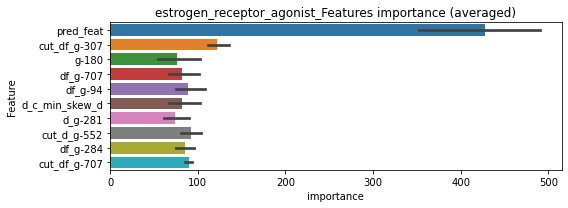

len(train_index) : 2762
len(valid_index) : 921
================================= fold 1/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2762
len(valid_index) : 921
================================= fold 2/4 estrogen_receptor_agonist=================================


Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000812106	valid_1's binary_logloss: 0.00429358
Training until validation scores don't improve for 30 rounds


len(train_index) : 2762
len(valid_index) : 921
================================= fold 3/4 estrogen_receptor_agonist=================================


Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000924763	valid_1's binary_logloss: 0.00703116
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000601792	valid_1's binary_logloss: 0.00345755
[2000]	training's binary_logloss: 0.000340673	valid_1's binary_logloss: 0.00310728
[3000]	training's binary_logloss: 0.000260879	valid_1's binary_logloss: 0.0030025
Early stopping, best iteration is:
[3162]	training's binary_logloss: 0.000252322	valid_1's binary_logloss: 0.00298773


len(train_index) : 2763
len(valid_index) : 920
================================= fold 4/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000601746	valid_1's binary_logloss: 0.000865896
[2000]	training's binary_logloss: 0.000339886	valid_1's binary_logloss: 0.000472157
[3000]	training's binary_logloss: 0.000261868	valid_1's binary_logloss: 0.00034951
[4000]	training's binary_logloss: 0.000226969	valid_1's binary_logloss: 0.000291806
[5000]	training's binary_logloss: 0.00020908	valid_1's binary_logloss: 0.000261977
[6000]	training's binary_logloss: 0.000197419	valid_1's binary_logloss: 0.000242895
[7000]	training's binary_logloss: 0.000188735	valid_1's binary_logloss: 0.000228891
[8000]	training's binary_logloss: 0.000182297	valid_1's binary_logloss: 0.000218821
Early stopping, best iteration is:
[8510]	training's binary_logloss: 0.000179692	valid_1's binary_logloss: 0.000214709


estrogen_receptor_agonist logloss: 0.0036327883058676676


neg labels: 3289 → selected neg labels: 3283


estrogen_receptor_antagonist, len(trt): 48, len(othr): 3283
target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0040876	valid_1's binary_logloss: 0.0229457
[600]	training's binary_logloss: 0.000781551	valid_1's binary_logloss: 0.0156791
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000648222	valid_1's binary_logloss: 0.0153616
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00402621	valid_1's binary_logloss: 0.0196531
[600]	training's binary_logloss: 0.000778006	valid_1's binary_logloss: 0.0120688
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.00075368	valid_1's binary_logloss: 0.0118718
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00442072	valid_1's binary_logloss: 0.0130474
[600]	training's binary_logloss: 0.000820386	valid_1's binary_logloss: 0.00537824
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000660513	valid_1's binary_loglos

1 / 3 AUC score:1.000


[600]	training's binary_logloss: 0.000769874	valid_1's binary_logloss: 0.0256733
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000832661	valid_1's binary_logloss: 0.0256149


y_Threshold: 0.0068821, Threshold: 0.1880181, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, conf_0:0.13161, conf_1:0.24442
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.1880181
Num_p_label: 35.0, Expected: 8.0, Adj_threshold_2: 0.2380181
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_3: 0.2880181
Num_p_label: 27.0, Expected: 8.0, Adj_threshold_4: 0.3380181
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_5: 0.3880181
Num_p_label: 22.0, Expected: 8.0, Adj_threshold_6: 0.4380181
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_7: 0.4880181
threshold: 0.4880181, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101214	valid_1's binary_logloss: 0.00465572
[600]	training's binary_logloss: 0.000229895	valid_1's binary_logloss: 0.00359885
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000212083	valid_1's binary_logloss: 0.0035432
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106239	valid_1's binary_logloss: 0.00237506
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000241017	valid_1's binary_logloss: 0.00135705
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108714	valid_1's binary_logloss: 0.00533699
Early stopping, best iteration is:
[374]	training's binary_logloss: 0.000554453	valid_1's binary_logloss: 0.00472296
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100203	valid_1's binary_logloss: 0.00603875


2 / 3 AUC score:1.000
y_Threshold: 0.4922201, Threshold: 0.4880181, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 650.0/3795
p_label_rate: 0.0567554 Vs.target_rate: 0.00202
Num_p_label: 226.0, conf_0:0.39041, conf_1:0.58562
Num_p_label: 226.0, Expected: 8.0, Adj_threshold_1: 0.4880181
Num_p_label: 212.0, Expected: 8.0, Adj_threshold_2: 0.5380181


Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000276226	valid_1's binary_logloss: 0.00460241


Num_p_label: 195.0, Expected: 8.0, Adj_threshold_3: 0.5880181
Num_p_label: 171.0, Expected: 8.0, Adj_threshold_4: 0.6380181
Num_p_label: 140.0, Expected: 8.0, Adj_threshold_5: 0.6880181
Num_p_label: 101.0, Expected: 8.0, Adj_threshold_6: 0.7380181
Num_p_label: 79.0, Expected: 8.0, Adj_threshold_7: 0.7880181
threshold: 0.7880181, positive_p_label: 79.0/3982, p_label_rate: 0.0198393
positive_y_label: 650.0/3795, y_label_rate: 0.1712780
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102368	valid_1's binary_logloss: 0.00247267
[600]	training's binary_logloss: 0.000226762	valid_1's binary_logloss: 0.00119957
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000203733	valid_1's binary_logloss: 0.00115706
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101345	valid_1's binary_logloss: 0.00471781
[600]	training's binary_logloss: 0.000223777	valid_1's binary_logloss: 0.0036482
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000178962	valid_1's binary_logloss: 0.0035372
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102113	valid_1's binary_logloss: 0.00317551
[600]	training's binary_logloss: 0.000227524	valid_1's binary_logloss: 0.00216756
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000203648	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.2690008, Threshold: 0.7880181, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 648.0/3791
p_label_rate: 0.0135610 Vs.target_rate: 0.00202
Num_p_label: 54.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 54.0, Expected: 8.0, Adj_threshold_1: 0.7880181
threshold: 0.7880181, positive_p_label: 54.0/3982, p_label_rate: 0.0135610


[600]	training's binary_logloss: 0.000231142	valid_1's binary_logloss: 0.00216957
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000238589	valid_1's binary_logloss: 0.00215611


positive_y_label: 648.0/3791, y_label_rate: 0.1709312


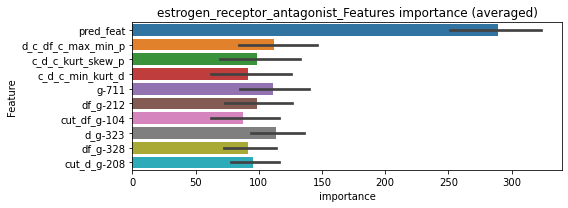

len(train_index) : 2843
len(valid_index) : 948
================================= fold 1/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000537484	valid_1's binary_logloss: 0.000641311
[2000]	training's binary_logloss: 0.000306418	valid_1's binary_logloss: 0.000389015
[3000]	training's binary_logloss: 0.000238058	valid_1's binary_logloss: 0.000308254
[4000]	training's binary_logloss: 0.000207756	valid_1's binary_logloss: 0.000270351
[5000]	training's binary_logloss: 0.000191641	valid_1's binary_logloss: 0.000249861
[6000]	training's binary_logloss: 0.000180916	valid_1's binary_logloss: 0.000236778
Early stopping, best iteration is:
[6896]	training's binary_logloss: 0.000173612	valid_1's binary_logloss: 0.000227954


len(train_index) : 2843
len(valid_index) : 948
================================= fold 2/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000541755	valid_1's binary_logloss: 0.00354932
[2000]	training's binary_logloss: 0.000307205	valid_1's binary_logloss: 0.0030357
Early stopping, best iteration is:
[2286]	training's binary_logloss: 0.000280647	valid_1's binary_logloss: 0.00296923


len(train_index) : 2843
len(valid_index) : 948
================================= fold 3/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00052043	valid_1's binary_logloss: 0.00335185
Early stopping, best iteration is:
[1218]	training's binary_logloss: 0.000439008	valid_1's binary_logloss: 0.00327012


len(train_index) : 2844
len(valid_index) : 947
================================= fold 4/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000529541	valid_1's binary_logloss: 0.00184463
Early stopping, best iteration is:
[1037]	training's binary_logloss: 0.00051241	valid_1's binary_logloss: 0.00182905


estrogen_receptor_antagonist logloss: 0.002074641865299644


neg labels: 3289 → selected neg labels: 3284


faah_inhibitor, len(trt): 36, len(othr): 3284
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00265921	valid_1's binary_logloss: 0.0115703
[600]	training's binary_logloss: 0.000574544	valid_1's binary_logloss: 0.00579283
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000505335	valid_1's binary_logloss: 0.00548173
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00275765	valid_1's binary_logloss: 0.00902619
[600]	training's binary_logloss: 0.000586336	valid_1's binary_logloss: 0.00406501
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000500115	valid_1's binary_logloss: 0.0038162
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00276084	valid_1's binary_logloss: 0.00825671
[600]	training's binary_logloss: 0.000589904	valid_1's binary_logloss: 0.00372107
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000547794	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0045567, Threshold: 0.0163301, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.01143, conf_1:0.02123
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0163301
Num_p_label: 4.0, Expected: 6.0, Adj_threshold_2: 0.0663301
threshold: 0.0663301, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000825726	valid_1's binary_logloss: 0.00212461
[600]	training's binary_logloss: 0.000204544	valid_1's binary_logloss: 0.00107941
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000174068	valid_1's binary_logloss: 0.00100325
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000841109	valid_1's binary_logloss: 0.00152865
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000228181	valid_1's binary_logloss: 0.000692412
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000848537	valid_1's binary_logloss: 0.00507262
Early stopping, best iteration is:
[341]	training's binary_logloss: 0.000556166	valid_1's binary_logloss: 0.00436976
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000826638	valid_1's binary_logloss: 0.002

2 / 3 AUC score:1.000
y_Threshold: 0.6713741, Threshold: 0.0663301, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0447012 Vs.target_rate: 0.00151
Num_p_label: 178.0, conf_0:0.05306, conf_1:0.07960
Num_p_label: 178.0, Expected: 6.0, Adj_threshold_1: 0.0663301
Num_p_label: 173.0, Expected: 6.0, Adj_threshold_2: 0.1163301
Num_p_label: 172.0, Expected: 6.0, Adj_threshold_3: 0.1663301
Num_p_label: 169.0, Expected: 6.0, Adj_threshold_4: 0.2163301
Num_p_label: 165.0, Expected: 6.0, Adj_threshold_5: 0.2663301
Num_p_label: 161.0, Expected: 6.0, Adj_threshold_6: 0.3163301
Num_p_label: 159.0, Expected: 6.0, Adj_threshold_7: 0.3663301
Num_p_label: 151.0, Expected: 6.0, Adj_threshold_8: 0.4163301
Num_p_label: 135.0, Expected: 6.0, Adj_threshold_9: 0.4663301
Num_p_label: 110.0, Expected: 6.0, Adj_threshold_10: 0.5163301
threshold: 0.5663301, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00083833	valid_1's binary_logloss: 0.00205675
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000263244	valid_1's binary_logloss: 0.00113506
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000844856	valid_1's binary_logloss: 0.00119355
[600]	training's binary_logloss: 0.000206711	valid_1's binary_logloss: 0.00038185
Early stopping, best iteration is:
[862]	training's binary_logloss: 0.000164924	valid_1's binary_logloss: 0.000329947
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000866013	valid_1's binary_logloss: 0.0111983
Early stopping, best iteration is:
[353]	training's binary_logloss: 0.000525282	valid_1's binary_logloss: 0.0101127
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00082291	valid_1's binary_logloss: 0.0027825

3 / 3 AUC score:1.000
y_Threshold: 0.6857278, Threshold: 0.5663301, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0173280 Vs.target_rate: 0.00151
Num_p_label: 69.0, conf_0:0.50000, conf_1:0.62296
Num_p_label: 69.0, Expected: 6.0, Adj_threshold_1: 0.5663301
Num_p_label: 41.0, Expected: 6.0, Adj_threshold_2: 0.6163301
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_3: 0.6663301
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_4: 0.7163301
threshold: 0.7163301, positive_p_label: 11.0/3982, p_label_rate: 0.0027624


Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000242535	valid_1's binary_logloss: 0.00192017


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


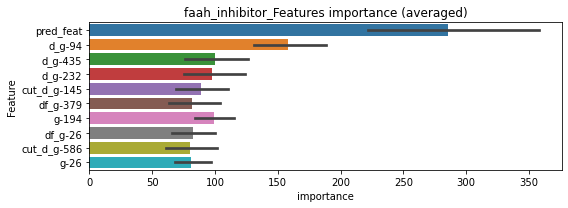

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000500009	valid_1's binary_logloss: 0.00166298
Early stopping, best iteration is:
[1491]	training's binary_logloss: 0.000356395	valid_1's binary_logloss: 0.00145758


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00049627	valid_1's binary_logloss: 0.000717956
[2000]	training's binary_logloss: 0.000293837	valid_1's binary_logloss: 0.000489
[3000]	training's binary_logloss: 0.00023436	valid_1's binary_logloss: 0.000415494
Early stopping, best iteration is:
[3835]	training's binary_logloss: 0.000210269	valid_1's binary_logloss: 0.000384059


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 faah_inhibitor=================================


Early stopping, best iteration is:
[120]	training's binary_logloss: 0.00672169	valid_1's binary_logloss: 0.076562
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000531341	valid_1's binary_logloss: 0.0021067


faah_inhibitor logloss: 0.020127991933986483


neg labels: 3289 → selected neg labels: 3288


farnesyltransferase_inhibitor, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120039	valid_1's binary_logloss: 0.00418152
[600]	training's binary_logloss: 0.000363376	valid_1's binary_logloss: 0.00243061
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000365255	valid_1's binary_logloss: 0.00242985
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121008	valid_1's binary_logloss: 0.00396261
[600]	training's binary_logloss: 0.000356759	valid_1's binary_logloss: 0.00170616
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000357266	valid_1's binary_logloss: 0.00170603
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123294	valid_1's binary_logloss: 0.00262246
[600]	training's binary_logloss: 0.000361984	valid_1's binary_logloss: 0.00106715
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000361706	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0019580, Threshold: 0.0073686, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00516, conf_1:0.00958
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0073686
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_2: 0.0573686
threshold: 0.0573686, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.00037588	valid_1's binary_logloss: 0.00481354


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000560321	valid_1's binary_logloss: 0.00149003
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000210892	valid_1's binary_logloss: 0.000961312
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000538152	valid_1's binary_logloss: 0.00358764
Early stopping, best iteration is:
[337]	training's binary_logloss: 0.000384733	valid_1's binary_logloss: 0.00308876
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000541812	valid_1's binary_logloss: 0.000596447
[600]	training's binary_logloss: 0.000174339	valid_1's binary_logloss: 0.000178583
[900]	training's binary_logloss: 0.000144817	valid_1's binary_logloss: 0.000141655
Early stopping, best iteration is:
[927]	training's binary_logloss: 0.000143224	valid_1's binary_logloss: 0.00013978
Training until validation scores don't improve for 3

2 / 3 AUC score:1.000
y_Threshold: 0.4985053, Threshold: 0.0573686, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0416876 Vs.target_rate: 0.00076
Num_p_label: 166.0, conf_0:0.04589, conf_1:0.06884
Num_p_label: 166.0, Expected: 3.0, Adj_threshold_1: 0.0573686
Num_p_label: 165.0, Expected: 3.0, Adj_threshold_2: 0.1073686
Num_p_label: 163.0, Expected: 3.0, Adj_threshold_3: 0.1573686
Num_p_label: 162.0, Expected: 3.0, Adj_threshold_4: 0.2073686
Num_p_label: 158.0, Expected: 3.0, Adj_threshold_5: 0.2573686
Num_p_label: 155.0, Expected: 3.0, Adj_threshold_6: 0.3073686
Num_p_label: 141.0, Expected: 3.0, Adj_threshold_7: 0.3573686
Num_p_label: 127.0, Expected: 3.0, Adj_threshold_8: 0.4073686
Num_p_label: 104.0, Expected: 3.0, Adj_threshold_9: 0.4573686
Num_p_label: 80.0, Expected: 3.0, Adj_threshold_10: 0.5073686
threshold: 0.5573686, positive_p_label: 58.0/3982, p_label_rate: 0.0145655


Early stopping, best iteration is:
[450]	training's binary_logloss: 0.00022974	valid_1's binary_logloss: 0.00137324


positive_y_label: 656.0/3811, y_label_rate: 0.1721333
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000550924	valid_1's binary_logloss: 0.00232336
[600]	training's binary_logloss: 0.000181949	valid_1's binary_logloss: 0.0016459
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000173831	valid_1's binary_logloss: 0.00161766
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0005494	valid_1's binary_logloss: 0.001122
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000217533	valid_1's binary_logloss: 0.000700965
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000568475	valid_1's binary_logloss: 0.000890209
[600]	training's binary_logloss: 0.000184839	valid_1's binary_logloss: 0.000511819
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000156577	valid_1's binary_logloss: 0.000477956
Training until validation scores don't improve for 30 rou

3 / 3 AUC score:1.000
y_Threshold: 0.3176614, Threshold: 0.5573686, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0105475 Vs.target_rate: 0.00076
Num_p_label: 42.0, conf_0:0.50000, conf_1:0.61311
Num_p_label: 42.0, Expected: 3.0, Adj_threshold_1: 0.5573686
Num_p_label: 30.0, Expected: 3.0, Adj_threshold_2: 0.6073686
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_3: 0.6573686
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_4: 0.7073686
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_5: 0.7573686


[600]	training's binary_logloss: 0.000180699	valid_1's binary_logloss: 0.00058568
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000177078	valid_1's binary_logloss: 0.00057987


threshold: 0.7573686, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3811, y_label_rate: 0.1721333


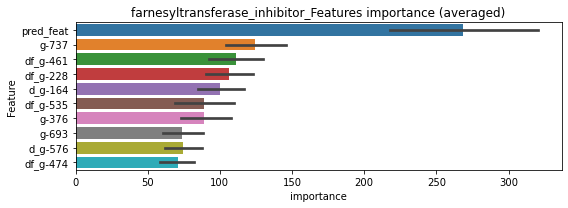

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000428941	valid_1's binary_logloss: 0.00346416
Early stopping, best iteration is:
[1733]	training's binary_logloss: 0.000286233	valid_1's binary_logloss: 0.00318289


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000430749	valid_1's binary_logloss: 0.000728367
[2000]	training's binary_logloss: 0.000265207	valid_1's binary_logloss: 0.000556292
Early stopping, best iteration is:
[2424]	training's binary_logloss: 0.000239797	valid_1's binary_logloss: 0.000522546


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000432882	valid_1's binary_logloss: 0.000743341
[2000]	training's binary_logloss: 0.000265088	valid_1's binary_logloss: 0.000558698
[3000]	training's binary_logloss: 0.000216984	valid_1's binary_logloss: 0.000508323
[4000]	training's binary_logloss: 0.000193466	valid_1's binary_logloss: 0.000484267
[5000]	training's binary_logloss: 0.000181137	valid_1's binary_logloss: 0.000471824
Early stopping, best iteration is:
[5903]	training's binary_logloss: 0.000173309	valid_1's binary_logloss: 0.000462281


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000431949	valid_1's binary_logloss: 0.00125513
Early stopping, best iteration is:
[1678]	training's binary_logloss: 0.000293254	valid_1's binary_logloss: 0.00106694


farnesyltransferase_inhibitor logloss: 0.0013093515911719606


neg labels: 3289 → selected neg labels: 3284


fatty_acid_receptor_agonist, len(trt): 25, len(othr): 3284
target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00166416	valid_1's binary_logloss: 0.0105565
[600]	training's binary_logloss: 0.000425358	valid_1's binary_logloss: 0.00820674
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000417171	valid_1's binary_logloss: 0.00818756
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00169672	valid_1's binary_logloss: 0.0079348
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000445714	valid_1's binary_logloss: 0.0052001
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00167449	valid_1's binary_logloss: 0.00388496
[600]	training's binary_logloss: 0.000429478	valid_1's binary_logloss: 0.0014599
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000427835	valid_1's binary_logloss: 0.00145812
Training until validation scores don't improve for 30 rounds
[3

1 / 3 AUC score:1.000
y_Threshold: 0.0025380, Threshold: 0.0131838, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806


[600]	training's binary_logloss: 0.00040941	valid_1's binary_logloss: 0.0053533
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000418871	valid_1's binary_logloss: 0.00533844


p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, conf_0:0.00923, conf_1:0.01714
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0131838
Num_p_label: 6.0, Expected: 4.2, Adj_threshold_2: 0.0631838
threshold: 0.0631838, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000659797	valid_1's binary_logloss: 0.00378249
Early stopping, best iteration is:
[334]	training's binary_logloss: 0.000482619	valid_1's binary_logloss: 0.00323138
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000660662	valid_1's binary_logloss: 0.00150452
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000217312	valid_1's binary_logloss: 0.00098336
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00066542	valid_1's binary_logloss: 0.00150038
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000234092	valid_1's binary_logloss: 0.000865843
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000640509	valid_1's binary_logloss: 0.00196165
[600]	training's binary_logloss: 0.000189952	valid_1's binary_logloss: 0.0012

2 / 3 AUC score:1.000
y_Threshold: 0.4709184, Threshold: 0.0631838, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0590156 Vs.target_rate: 0.00105
Num_p_label: 235.0, conf_0:0.05055, conf_1:0.07582
Num_p_label: 235.0, Expected: 4.2, Adj_threshold_1: 0.0631838
Num_p_label: 235.0, Expected: 4.2, Adj_threshold_2: 0.1131838
Num_p_label: 234.0, Expected: 4.2, Adj_threshold_3: 0.1631838
Num_p_label: 232.0, Expected: 4.2, Adj_threshold_4: 0.2131838
Num_p_label: 226.0, Expected: 4.2, Adj_threshold_5: 0.2631838
Num_p_label: 213.0, Expected: 4.2, Adj_threshold_6: 0.3131838
Num_p_label: 195.0, Expected: 4.2, Adj_threshold_7: 0.3631838
Num_p_label: 161.0, Expected: 4.2, Adj_threshold_8: 0.4131838
Num_p_label: 120.0, Expected: 4.2, Adj_threshold_9: 0.4631838
Num_p_label: 93.0, Expected: 4.2, Adj_threshold_10: 0.5131838
threshold: 0.5631838, positive_p_label: 63.0/3982, p_label_rate: 0.0158212
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
=

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000653607	valid_1's binary_logloss: 0.0162847
Early stopping, best iteration is:
[348]	training's binary_logloss: 0.000423097	valid_1's binary_logloss: 0.0156097
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000680676	valid_1's binary_logloss: 0.00129713
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000209302	valid_1's binary_logloss: 0.000758717
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000659662	valid_1's binary_logloss: 0.00131184
[600]	training's binary_logloss: 0.000197172	valid_1's binary_logloss: 0.000771247
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000178386	valid_1's binary_logloss: 0.000735977
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000637613	valid_1's binary_logloss: 0.001

3 / 3 AUC score:1.000
y_Threshold: 0.4337620, Threshold: 0.5631838, pos_neg_ratio: 0.8000000


[900]	training's binary_logloss: 0.000159171	valid_1's binary_logloss: 0.00115248
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000159171	valid_1's binary_logloss: 0.00115248


Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0118031 Vs.target_rate: 0.00105
Num_p_label: 47.0, conf_0:0.50000, conf_1:0.61950
Num_p_label: 47.0, Expected: 4.2, Adj_threshold_1: 0.5631838
Num_p_label: 34.0, Expected: 4.2, Adj_threshold_2: 0.6131838
Num_p_label: 19.0, Expected: 4.2, Adj_threshold_3: 0.6631838
Num_p_label: 14.0, Expected: 4.2, Adj_threshold_4: 0.7131838
Num_p_label: 6.0, Expected: 4.2, Adj_threshold_5: 0.7631838
threshold: 0.7631838, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


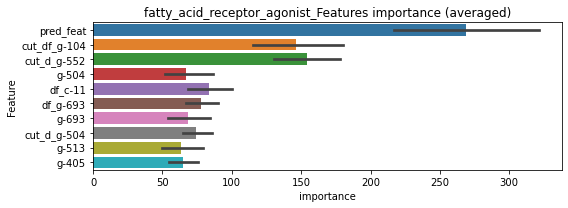

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 fatty_acid_receptor_agonist=================================


Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000582939	valid_1's binary_logloss: 0.00348295
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000476602	valid_1's binary_logloss: 0.00180976
[2000]	training's binary_logloss: 0.000284693	valid_1's binary_logloss: 0.00149851
[3000]	training's binary_logloss: 0.00023091	valid_1's binary_logloss: 0.00141359
[4000]	training's binary_logloss: 0.000205815	valid_1's binary_logloss: 0.00137316
[5000]	training's binary_logloss: 0.000192656	valid_1's binary_logloss: 0.00135399
[6000]	training's binary_logloss: 0.000184276	valid_1's binary_logloss: 0.00134229
Early stopping, best iteration is:
[5998]	training's binary_logloss: 0.000184347	valid_1's binary_logloss: 0.00134217


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00047544	valid_1's binary_logloss: 0.00137764
[2000]	training's binary_logloss: 0.000284301	valid_1's binary_logloss: 0.00110952
[3000]	training's binary_logloss: 0.000230802	valid_1's binary_logloss: 0.00103909
[4000]	training's binary_logloss: 0.000206062	valid_1's binary_logloss: 0.00100363
[5000]	training's binary_logloss: 0.000193108	valid_1's binary_logloss: 0.000982119
Early stopping, best iteration is:
[5634]	training's binary_logloss: 0.000186997	valid_1's binary_logloss: 0.00097401


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000464934	valid_1's binary_logloss: 0.0018114
[2000]	training's binary_logloss: 0.00028154	valid_1's binary_logloss: 0.00158916
[3000]	training's binary_logloss: 0.000230591	valid_1's binary_logloss: 0.00153559
[4000]	training's binary_logloss: 0.000205337	valid_1's binary_logloss: 0.00150445
Early stopping, best iteration is:
[4495]	training's binary_logloss: 0.000198279	valid_1's binary_logloss: 0.00149643


fatty_acid_receptor_agonist logloss: 0.0018242685087655685


neg labels: 3289 → selected neg labels: 3284


fgfr_inhibitor, len(trt): 50, len(othr): 3284
target_rate: 0.0020996 → Adj_target_rate: 0.0023352
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00464049	valid_1's binary_logloss: 0.0217751
[600]	training's binary_logloss: 0.00082253	valid_1's binary_logloss: 0.0119662
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000627064	valid_1's binary_logloss: 0.011401
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00473276	valid_1's binary_logloss: 0.0175746
[600]	training's binary_logloss: 0.000843303	valid_1's binary_logloss: 0.00765122
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.000613842	valid_1's binary_logloss: 0.00667659
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00513823	valid_1's binary_logloss: 0.0119009
[600]	training's binary_logloss: 0.000885313	valid_1's binary_logloss: 0.00402691
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000614587	valid_1's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0061426, Threshold: 0.0227828, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00210
Num_p_label: 40.0, conf_0:0.01595, conf_1:0.02962
Num_p_label: 40.0, Expected: 8.4, Adj_threshold_1: 0.0227828
Num_p_label: 16.0, Expected: 8.4, Adj_threshold_2: 0.0727828
threshold: 0.0727828, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110765	valid_1's binary_logloss: 0.00332425
[600]	training's binary_logloss: 0.000224367	valid_1's binary_logloss: 0.00216597
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000227076	valid_1's binary_logloss: 0.00215092
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113334	valid_1's binary_logloss: 0.0017572
[600]	training's binary_logloss: 0.000230777	valid_1's binary_logloss: 0.000602425
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000199548	valid_1's binary_logloss: 0.000556634
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00111404	valid_1's binary_logloss: 0.00506321
Early stopping, best iteration is:
[390]	training's binary_logloss: 0.00050949	valid_1's binary_logloss: 0.00431036
Training until validation scores don't improve for 30 round

2 / 3 AUC score:1.000
y_Threshold: 0.5916797, Threshold: 0.0727828, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000222333	valid_1's binary_logloss: 0.00389035
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000206578	valid_1's binary_logloss: 0.00388361


Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0474636 Vs.target_rate: 0.00210
Num_p_label: 189.0, conf_0:0.05823, conf_1:0.08734
Num_p_label: 189.0, Expected: 8.4, Adj_threshold_1: 0.0727828
Num_p_label: 189.0, Expected: 8.4, Adj_threshold_2: 0.1227828
Num_p_label: 187.0, Expected: 8.4, Adj_threshold_3: 0.1727828
Num_p_label: 187.0, Expected: 8.4, Adj_threshold_4: 0.2227828
Num_p_label: 186.0, Expected: 8.4, Adj_threshold_5: 0.2727828
Num_p_label: 186.0, Expected: 8.4, Adj_threshold_6: 0.3227828
Num_p_label: 186.0, Expected: 8.4, Adj_threshold_7: 0.3727828
Num_p_label: 185.0, Expected: 8.4, Adj_threshold_8: 0.4227828
Num_p_label: 181.0, Expected: 8.4, Adj_threshold_9: 0.4727828
Num_p_label: 170.0, Expected: 8.4, Adj_threshold_10: 0.5227828
threshold: 0.5727828, positive_p_label: 153.0/3982, p_label_rate: 0.0384229
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00109438	valid_1's binary_logloss: 0.00326666
[600]	training's binary_logloss: 0.000232446	valid_1's binary_logloss: 0.0017141
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.00018208	valid_1's binary_logloss: 0.00161889
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00111256	valid_1's binary_logloss: 0.00406467
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000263005	valid_1's binary_logloss: 0.00292212
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011323	valid_1's binary_logloss: 0.00219221
[600]	training's binary_logloss: 0.000231408	valid_1's binary_logloss: 0.000755754
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000189284	valid_1's binary_logloss: 0.000654272
Training until validation scores don't improve for 30 rounds

3 / 3 AUC score:1.000
y_Threshold: 0.5528015, Threshold: 0.5727828, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3798
p_label_rate: 0.0178302 Vs.target_rate: 0.00210
Num_p_label: 71.0, conf_0:0.50000, conf_1:0.63006
Num_p_label: 71.0, Expected: 8.4, Adj_threshold_1: 0.5727828
Num_p_label: 49.0, Expected: 8.4, Adj_threshold_2: 0.6227828
Num_p_label: 32.0, Expected: 8.4, Adj_threshold_3: 0.6727828
Num_p_label: 20.0, Expected: 8.4, Adj_threshold_4: 0.7227828
threshold: 0.7227828, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 651.0/3798, y_label_rate: 0.1714060


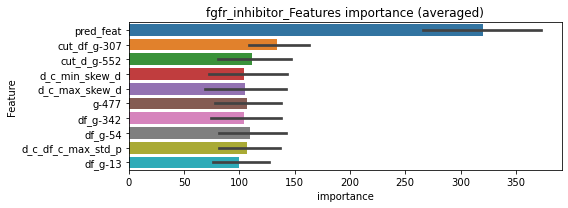

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000545121	valid_1's binary_logloss: 0.00186932
Early stopping, best iteration is:
[1643]	training's binary_logloss: 0.000358435	valid_1's binary_logloss: 0.00167745


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 fgfr_inhibitor=================================


Early stopping, best iteration is:
[640]	training's binary_logloss: 0.00084272	valid_1's binary_logloss: 0.00581542
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00054915	valid_1's binary_logloss: 0.00209097
Early stopping, best iteration is:
[1110]	training's binary_logloss: 0.00050283	valid_1's binary_logloss: 0.00203773


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000551655	valid_1's binary_logloss: 0.00483387
Early stopping, best iteration is:
[1486]	training's binary_logloss: 0.000391452	valid_1's binary_logloss: 0.00464856


fgfr_inhibitor logloss: 0.0035451457591213235


neg labels: 3289 → selected neg labels: 3258


flt3_inhibitor, len(trt): 279, len(othr): 3258
target_rate: 0.0117158 → Adj_target_rate: 0.0100684
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.040695	valid_1's binary_logloss: 0.255858
Early stopping, best iteration is:
[339]	training's binary_logloss: 0.0317055	valid_1's binary_logloss: 0.25223
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0399396	valid_1's binary_logloss: 0.251141
Early stopping, best iteration is:
[334]	training's binary_logloss: 0.0324075	valid_1's binary_logloss: 0.248989
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0434672	valid_1's binary_logloss: 0.255157
Early stopping, best iteration is:
[364]	training's binary_logloss: 0.0290576	valid_1's binary_logloss: 0.254273
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0463736	valid_1's binary_logloss: 0.222935


1 / 3 AUC score:0.893
y_Threshold: 0.0864590, Threshold: 0.7456215, pos_neg_ratio: 0.8000000
Remove_noisy_data: 415 → Positive_corect_labels: 509/3494
p_label_rate: 0.0100452 Vs.target_rate: 0.01172
Num_p_label: 40.0, conf_0:0.50000, conf_1:0.80000


Early stopping, best iteration is:
[414]	training's binary_logloss: 0.0232192	valid_1's binary_logloss: 0.21165


threshold: 0.7456215, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 509.0/3494, y_label_rate: 0.1456783
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00194171	valid_1's binary_logloss: 0.00491366
[600]	training's binary_logloss: 0.000270686	valid_1's binary_logloss: 0.000853857
[900]	training's binary_logloss: 0.000170504	valid_1's binary_logloss: 0.000545777
Early stopping, best iteration is:
[1031]	training's binary_logloss: 0.000159825	valid_1's binary_logloss: 0.000513449
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00198911	valid_1's binary_logloss: 0.00626561
[600]	training's binary_logloss: 0.00028326	valid_1's binary_logloss: 0.00271758
[900]	training's binary_logloss: 0.000183929	valid_1's binary_logloss: 0.00244822
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.000179887	valid_1's binary_logloss: 0.00243717
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00196597	valid_1's binary_logloss: 0.00685988
[600]	tra

2 / 3 AUC score:1.000
y_Threshold: 0.2111011, Threshold: 0.7456215, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 507.0/3490
p_label_rate: 0.0981919 Vs.target_rate: 0.01172
Num_p_label: 391.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 391.0, Expected: 46.7, Adj_threshold_1: 0.7456215
Num_p_label: 391.0, Expected: 46.7, Adj_threshold_2: 0.7956215
threshold: 0.7956215, positive_p_label: 391.0/3982, p_label_rate: 0.0981919
positive_y_label: 507.0/3490, y_label_rate: 0.1452722
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016619	valid_1's binary_logloss: 0.00482381
[600]	training's binary_logloss: 0.000202571	valid_1's binary_logloss: 0.000650096
[900]	training's binary_logloss: 0.000119041	valid_1's binary_logloss: 0.00038438
[1200]	training's binary_logloss: 0.000110528	valid_1's binary_logloss: 0.000356971
Early stopping, best iteration is:
[1273]	training's binary_logloss: 0.000109837	valid_1's binary_logloss: 0.000354566
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174593	valid_1's binary_logloss: 0.00378431
[600]	training's binary_logloss: 0.000206214	valid_1's binary_logloss: 0.00047635
[900]	training's binary_logloss: 0.000119479	valid_1's binary_logloss: 0.000277222
[1200]	training's binary_logloss: 0.000110691	valid_1's binary_logloss: 0.000256785
Early stopping, best iteration is:
[1307]	training's binary_logloss: 0.000109828	valid_1's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0799786, Threshold: 0.7956215, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 504.0/3484
p_label_rate: 0.0979407 Vs.target_rate: 0.01172
Num_p_label: 390.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 390.0, Expected: 46.7, Adj_threshold_1: 0.7956215
threshold: 0.7956215, positive_p_label: 390.0/3982, p_label_rate: 0.0979407


Early stopping, best iteration is:
[410]	training's binary_logloss: 0.000726476	valid_1's binary_logloss: 0.0125798


positive_y_label: 504.0/3484, y_label_rate: 0.1446613


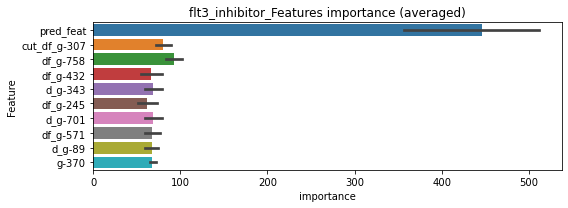

len(train_index) : 2613
len(valid_index) : 871
================================= fold 1/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000633764	valid_1's binary_logloss: 0.00242809
Early stopping, best iteration is:
[1613]	training's binary_logloss: 0.000411949	valid_1's binary_logloss: 0.00210035


len(train_index) : 2613
len(valid_index) : 871
================================= fold 2/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000644655	valid_1's binary_logloss: 0.00282672
Early stopping, best iteration is:
[1526]	training's binary_logloss: 0.000437744	valid_1's binary_logloss: 0.00252462


len(train_index) : 2613
len(valid_index) : 871
================================= fold 3/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000636447	valid_1's binary_logloss: 0.00231873
Early stopping, best iteration is:
[1616]	training's binary_logloss: 0.000412111	valid_1's binary_logloss: 0.00198402


len(train_index) : 2613
len(valid_index) : 871
================================= fold 4/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds


flt3_inhibitor logloss: 0.005458804381692157


Early stopping, best iteration is:
[486]	training's binary_logloss: 0.00137899	valid_1's binary_logloss: 0.0152188
neg labels: 3289 → selected neg labels: 3289


focal_adhesion_kinase_inhibitor, len(trt): 18, len(othr): 3289
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123243	valid_1's binary_logloss: 0.00263219
[600]	training's binary_logloss: 0.000359445	valid_1's binary_logloss: 0.00107571
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000357338	valid_1's binary_logloss: 0.00106928
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120327	valid_1's binary_logloss: 0.00367757
[600]	training's binary_logloss: 0.000352784	valid_1's binary_logloss: 0.0017886
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000350701	valid_1's binary_logloss: 0.00178204
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126047	valid_1's binary_logloss: 0.00222019
[600]	training's binary_logloss: 0.000359254	valid_1's binary_logloss: 0.000873231
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000358027	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0018168, Threshold: 0.0089424, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00626, conf_1:0.01163
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0089424
Num_p_label: 3.0, Expected: 3.0, Adj_threshold_2: 0.0589424
threshold: 0.0589424, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000544852	valid_1's binary_logloss: 0.00131805
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000189245	valid_1's binary_logloss: 0.000838205
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000551735	valid_1's binary_logloss: 0.000781398
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.00017814	valid_1's binary_logloss: 0.000332527
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000548616	valid_1's binary_logloss: 0.00120843
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000183885	valid_1's binary_logloss: 0.000791947
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00054549	valid_1's binary_logloss: 0.00141663


2 / 3 AUC score:1.000
y_Threshold: 0.4935972, Threshold: 0.0589424, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0542441 Vs.target_rate: 0.00076
Num_p_label: 216.0, conf_0:0.04715, conf_1:0.07073
Num_p_label: 216.0, Expected: 3.0, Adj_threshold_1: 0.0589424
Num_p_label: 216.0, Expected: 3.0, Adj_threshold_2: 0.1089424
Num_p_label: 215.0, Expected: 3.0, Adj_threshold_3: 0.1589424
Num_p_label: 214.0, Expected: 3.0, Adj_threshold_4: 0.2089424
Num_p_label: 207.0, Expected: 3.0, Adj_threshold_5: 0.2589424
Num_p_label: 189.0, Expected: 3.0, Adj_threshold_6: 0.3089424
Num_p_label: 159.0, Expected: 3.0, Adj_threshold_7: 0.3589424
Num_p_label: 136.0, Expected: 3.0, Adj_threshold_8: 0.4089424
Num_p_label: 109.0, Expected: 3.0, Adj_threshold_9: 0.4589424
Num_p_label: 86.0, Expected: 3.0, Adj_threshold_10: 0.5089424


Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000183542	valid_1's binary_logloss: 0.000937884


threshold: 0.5589424, positive_p_label: 59.0/3982, p_label_rate: 0.0148167
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000546311	valid_1's binary_logloss: 0.00134769
[600]	training's binary_logloss: 0.00017677	valid_1's binary_logloss: 0.000863573
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000174846	valid_1's binary_logloss: 0.000856639
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000555194	valid_1's binary_logloss: 0.00077686
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000178823	valid_1's binary_logloss: 0.000328506
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000549623	valid_1's binary_logloss: 0.00123188
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000184172	valid_1's binary_logloss: 0.000779135
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000556379	valid_1's binary_logloss: 0.0

3 / 3 AUC score:1.000
y_Threshold: 0.4834065, Threshold: 0.5589424, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0105475 Vs.target_rate: 0.00076
Num_p_label: 42.0, conf_0:0.50000, conf_1:0.61484
Num_p_label: 42.0, Expected: 3.0, Adj_threshold_1: 0.5589424
Num_p_label: 27.0, Expected: 3.0, Adj_threshold_2: 0.6089424
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_3: 0.6589424
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_4: 0.7089424
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_5: 0.7589424
threshold: 0.7589424, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[426]	training's binary_logloss: 0.000257547	valid_1's binary_logloss: 0.00107583


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


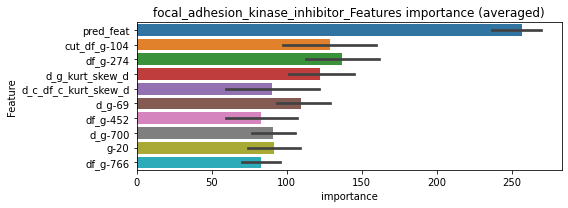

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000420858	valid_1's binary_logloss: 0.00135515
Early stopping, best iteration is:
[1396]	training's binary_logloss: 0.000322603	valid_1's binary_logloss: 0.00120372


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000423915	valid_1's binary_logloss: 0.000583038
[2000]	training's binary_logloss: 0.000259054	valid_1's binary_logloss: 0.000388801
[3000]	training's binary_logloss: 0.000211099	valid_1's binary_logloss: 0.000334789
Early stopping, best iteration is:
[3546]	training's binary_logloss: 0.000196207	valid_1's binary_logloss: 0.000314078


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000425788	valid_1's binary_logloss: 0.00112438
Early stopping, best iteration is:
[1746]	training's binary_logloss: 0.000281477	valid_1's binary_logloss: 0.000938545


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000438845	valid_1's binary_logloss: 0.000878936
[2000]	training's binary_logloss: 0.000262838	valid_1's binary_logloss: 0.000675642
[3000]	training's binary_logloss: 0.000213917	valid_1's binary_logloss: 0.000626497
[4000]	training's binary_logloss: 0.000190581	valid_1's binary_logloss: 0.000603382
[5000]	training's binary_logloss: 0.000177778	valid_1's binary_logloss: 0.000588855
Early stopping, best iteration is:
[5041]	training's binary_logloss: 0.000177349	valid_1's binary_logloss: 0.000588393


focal_adhesion_kinase_inhibitor logloss: 0.0007614447911812008


neg labels: 3289 → selected neg labels: 3288


free_radical_scavenger, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132059	valid_1's binary_logloss: 0.00314915
[600]	training's binary_logloss: 0.000369125	valid_1's binary_logloss: 0.00125909
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000364093	valid_1's binary_logloss: 0.00124907
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013568	valid_1's binary_logloss: 0.00282018
[600]	training's binary_logloss: 0.000368943	valid_1's binary_logloss: 0.000988124
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000365856	valid_1's binary_logloss: 0.000981007
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136403	valid_1's binary_logloss: 0.00233324
[600]	training's binary_logloss: 0.000370438	valid_1's binary_logloss: 0.000768494
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000370438	valid_1's bi

1 / 3 AUC score:1.000
y_Threshold: 0.0020920, Threshold: 0.0089303, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00625, conf_1:0.01161
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0089303
Num_p_label: 3.0, Expected: 3.0, Adj_threshold_2: 0.0589303
threshold: 0.0589303, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000576264	valid_1's binary_logloss: 0.00180025
[600]	training's binary_logloss: 0.000177275	valid_1's binary_logloss: 0.00123339
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000149932	valid_1's binary_logloss: 0.00119934
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000561597	valid_1's binary_logloss: 0.000835678
[600]	training's binary_logloss: 0.000172679	valid_1's binary_logloss: 0.000329272
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000169107	valid_1's binary_logloss: 0.000319811
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000586374	valid_1's binary_logloss: 0.00170207
Early stopping, best iteration is:
[412]	training's binary_logloss: 0.000271644	valid_1's binary_logloss: 0.00119045
Training until validation scores don't improve for 30

2 / 3 AUC score:1.000
y_Threshold: 0.5147903, Threshold: 0.0589303, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0507283 Vs.target_rate: 0.00076
Num_p_label: 202.0, conf_0:0.04714, conf_1:0.07072
Num_p_label: 202.0, Expected: 3.0, Adj_threshold_1: 0.0589303
Num_p_label: 202.0, Expected: 3.0, Adj_threshold_2: 0.1089303
Num_p_label: 201.0, Expected: 3.0, Adj_threshold_3: 0.1589303
Num_p_label: 201.0, Expected: 3.0, Adj_threshold_4: 0.2089303
Num_p_label: 194.0, Expected: 3.0, Adj_threshold_5: 0.2589303
Num_p_label: 181.0, Expected: 3.0, Adj_threshold_6: 0.3089303
Num_p_label: 153.0, Expected: 3.0, Adj_threshold_7: 0.3589303
Num_p_label: 130.0, Expected: 3.0, Adj_threshold_8: 0.4089303
Num_p_label: 107.0, Expected: 3.0, Adj_threshold_9: 0.4589303
Num_p_label: 76.0, Expected: 3.0, Adj_threshold_10: 0.5089303
threshold: 0.5589303, positive_p_label: 55.0/3982, p_label_rate: 0.0138122
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
=

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0005719	valid_1's binary_logloss: 0.00171288
[600]	training's binary_logloss: 0.000178368	valid_1's binary_logloss: 0.00121313
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000173241	valid_1's binary_logloss: 0.0012069
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000575696	valid_1's binary_logloss: 0.00108862
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000185316	valid_1's binary_logloss: 0.000535818
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000591189	valid_1's binary_logloss: 0.00170286
Early stopping, best iteration is:
[412]	training's binary_logloss: 0.000272147	valid_1's binary_logloss: 0.0011637
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000559953	valid_1's binary_logloss: 0.0010491

3 / 3 AUC score:1.000
y_Threshold: 0.4775130, Threshold: 0.5589303, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0110497 Vs.target_rate: 0.00076
Num_p_label: 44.0, conf_0:0.50000, conf_1:0.61482
Num_p_label: 44.0, Expected: 3.0, Adj_threshold_1: 0.5589303
Num_p_label: 29.0, Expected: 3.0, Adj_threshold_2: 0.6089303
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_3: 0.6589303
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_4: 0.7089303
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_5: 0.7589303
threshold: 0.7589303, positive_p_label: 9.0/3982, p_label_rate: 0.0022602


Early stopping, best iteration is:
[422]	training's binary_logloss: 0.000266544	valid_1's binary_logloss: 0.000705517


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


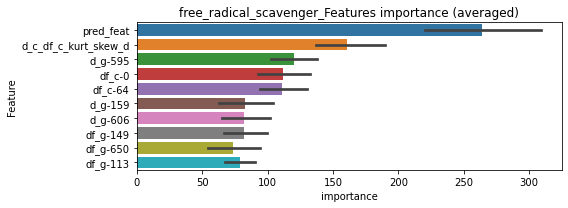

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000433835	valid_1's binary_logloss: 0.00160888
[2000]	training's binary_logloss: 0.000263817	valid_1's binary_logloss: 0.00140494
[3000]	training's binary_logloss: 0.000216239	valid_1's binary_logloss: 0.00134001
Early stopping, best iteration is:
[3536]	training's binary_logloss: 0.000201662	valid_1's binary_logloss: 0.00131253


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000429424	valid_1's binary_logloss: 0.000724763
[2000]	training's binary_logloss: 0.00026328	valid_1's binary_logloss: 0.000526443
[3000]	training's binary_logloss: 0.000214242	valid_1's binary_logloss: 0.000469034
Early stopping, best iteration is:
[3491]	training's binary_logloss: 0.000200172	valid_1's binary_logloss: 0.000446865


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000428546	valid_1's binary_logloss: 0.00129037
Early stopping, best iteration is:
[1086]	training's binary_logloss: 0.000398449	valid_1's binary_logloss: 0.00123752


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000424782	valid_1's binary_logloss: 0.000946873
Early stopping, best iteration is:
[1295]	training's binary_logloss: 0.000346012	valid_1's binary_logloss: 0.000860337


free_radical_scavenger logloss: 0.0009648335242211223


neg labels: 3289 → selected neg labels: 3287


fungal_squalene_epoxidase_inhibitor, len(trt): 23, len(othr): 3287
target_rate: 0.0009658 → Adj_target_rate: 0.0012069
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177893	valid_1's binary_logloss: 0.00371512
[600]	training's binary_logloss: 0.000436906	valid_1's binary_logloss: 0.00135241
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000428623	valid_1's binary_logloss: 0.00133155
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162719	valid_1's binary_logloss: 0.0116302
[600]	training's binary_logloss: 0.000418526	valid_1's binary_logloss: 0.00833006
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000417008	valid_1's binary_logloss: 0.00830796
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00181071	valid_1's binary_logloss: 0.00322021
[600]	training's binary_logloss: 0.000438376	valid_1's binary_logloss: 0.00101601
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000430639	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0027750, Threshold: 0.0085025, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00097
Num_p_label: 40.0, conf_0:0.00595, conf_1:0.01105
Num_p_label: 40.0, Expected: 3.8, Adj_threshold_1: 0.0085025
Num_p_label: 6.0, Expected: 3.8, Adj_threshold_2: 0.0585025
threshold: 0.0585025, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000680594	valid_1's binary_logloss: 0.00104666
[600]	training's binary_logloss: 0.000190554	valid_1's binary_logloss: 0.000415909
[900]	training's binary_logloss: 0.000154283	valid_1's binary_logloss: 0.000354292
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.000153876	valid_1's binary_logloss: 0.000353566
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0006495	valid_1's binary_logloss: 0.00416071
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000209022	valid_1's binary_logloss: 0.00320514
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000665959	valid_1's binary_logloss: 0.000683642
[600]	training's binary_logloss: 0.000184668	valid_1's binary_logloss: 0.000162171
[900]	training's binary_logloss: 0.000147241	valid_1's binary_logloss: 0.000118018
Early

2 / 3 AUC score:1.000
y_Threshold: 0.5331234, Threshold: 0.0585025, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0439478 Vs.target_rate: 0.00097
Num_p_label: 175.0, conf_0:0.04680, conf_1:0.07020
Num_p_label: 175.0, Expected: 3.8, Adj_threshold_1: 0.0585025
Num_p_label: 174.0, Expected: 3.8, Adj_threshold_2: 0.1085025
Num_p_label: 174.0, Expected: 3.8, Adj_threshold_3: 0.1585025
Num_p_label: 174.0, Expected: 3.8, Adj_threshold_4: 0.2085025
Num_p_label: 172.0, Expected: 3.8, Adj_threshold_5: 0.2585025
Num_p_label: 168.0, Expected: 3.8, Adj_threshold_6: 0.3085025
Num_p_label: 150.0, Expected: 3.8, Adj_threshold_7: 0.3585025
Num_p_label: 119.0, Expected: 3.8, Adj_threshold_8: 0.4085025
Num_p_label: 90.0, Expected: 3.8, Adj_threshold_9: 0.4585025
Num_p_label: 65.0, Expected: 3.8, Adj_threshold_10: 0.5085025
threshold: 0.5585025, positive_p_label: 45.0/3982, p_label_rate: 0.0113009


Early stopping, best iteration is:
[416]	training's binary_logloss: 0.000301821	valid_1's binary_logloss: 0.00218761


positive_y_label: 656.0/3810, y_label_rate: 0.1721785
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000650401	valid_1's binary_logloss: 0.00156734
[600]	training's binary_logloss: 0.000185745	valid_1's binary_logloss: 0.000901731
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.000163679	valid_1's binary_logloss: 0.000873498
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00065854	valid_1's binary_logloss: 0.00274033
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000239146	valid_1's binary_logloss: 0.00195464
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000680957	valid_1's binary_logloss: 0.000821241
[600]	training's binary_logloss: 0.000189291	valid_1's binary_logloss: 0.00019873
[900]	training's binary_logloss: 0.000153454	valid_1's binary_logloss: 0.000147052
Early stopping, best iteration is:
[959]	training's binary_logloss: 0.000151202	valid_1'

3 / 3 AUC score:1.000
y_Threshold: 0.4394544, Threshold: 0.5585025, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0085384 Vs.target_rate: 0.00097
Num_p_label: 34.0, conf_0:0.50000, conf_1:0.61435
Num_p_label: 34.0, Expected: 3.8, Adj_threshold_1: 0.5585025
Num_p_label: 23.0, Expected: 3.8, Adj_threshold_2: 0.6085025
Num_p_label: 15.0, Expected: 3.8, Adj_threshold_3: 0.6585025
Num_p_label: 9.0, Expected: 3.8, Adj_threshold_4: 0.7085025


[600]	training's binary_logloss: 0.000191738	valid_1's binary_logloss: 0.00109179
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000192409	valid_1's binary_logloss: 0.00108871


threshold: 0.7085025, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3810, y_label_rate: 0.1721785


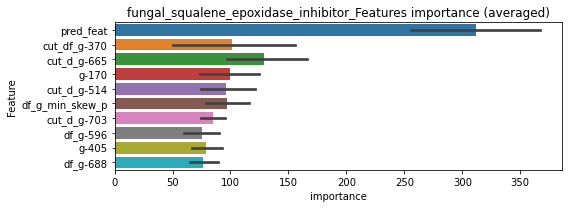

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000452576	valid_1's binary_logloss: 0.00221222
Early stopping, best iteration is:
[1188]	training's binary_logloss: 0.000395315	valid_1's binary_logloss: 0.00211603


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 fungal_squalene_epoxidase_inhibitor=================================


Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000624833	valid_1's binary_logloss: 0.00361139
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00045436	valid_1's binary_logloss: 0.000477051
[2000]	training's binary_logloss: 0.000277693	valid_1's binary_logloss: 0.000276945
[3000]	training's binary_logloss: 0.00022653	valid_1's binary_logloss: 0.000214717
[4000]	training's binary_logloss: 0.000200786	valid_1's binary_logloss: 0.000182642
[5000]	training's binary_logloss: 0.000186665	valid_1's binary_logloss: 0.000165317
[6000]	training's binary_logloss: 0.000177309	valid_1's binary_logloss: 0.000153942
[7000]	training's binary_logloss: 0.000170583	valid_1's binary_logloss: 0.000146015
[8000]	training's binary_logloss: 0.000165765	valid_1's binary_logloss: 0.000140287
Early stopping, best iteration is:
[8795]	training's binary_logloss: 0.000162559	valid_1's binary_logloss: 0.000136421


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00045932	valid_1's binary_logloss: 0.00203582
Early stopping, best iteration is:
[1529]	training's binary_logloss: 0.000326723	valid_1's binary_logloss: 0.00181365


fungal_squalene_epoxidase_inhibitor logloss: 0.0019210472930121833


neg labels: 3289 → selected neg labels: 3271


gaba_receptor_agonist, len(trt): 106, len(othr): 3271
target_rate: 0.0044512 → Adj_target_rate: 0.0044229
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113423	valid_1's binary_logloss: 0.104774
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.00244727	valid_1's binary_logloss: 0.0940114
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130535	valid_1's binary_logloss: 0.0675286
[600]	training's binary_logloss: 0.00190781	valid_1's binary_logloss: 0.0506861
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.00145173	valid_1's binary_logloss: 0.0501228
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130241	valid_1's binary_logloss: 0.0556804
[600]	training's binary_logloss: 0.00198065	valid_1's binary_logloss: 0.0383029
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.00116858	valid_1's binary_logloss: 0.0369537
Training until validation scores don't improve for 30 rounds
[300]	training'

1 / 3 AUC score:0.996
y_Threshold: 0.0189025, Threshold: 0.1116988, pos_neg_ratio: 0.8000000
Remove_noisy_data: 159 → Positive_corect_labels: 640/3766
p_label_rate: 0.0100452 Vs.target_rate: 0.00445
Num_p_label: 40.0, conf_0:0.07819, conf_1:0.14521


Early stopping, best iteration is:
[474]	training's binary_logloss: 0.00345523	valid_1's binary_logloss: 0.065491


Num_p_label: 40.0, Expected: 17.7, Adj_threshold_1: 0.1116988
Num_p_label: 25.0, Expected: 17.7, Adj_threshold_2: 0.1616988
threshold: 0.1616988, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 640.0/3766, y_label_rate: 0.1699416
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154293	valid_1's binary_logloss: 0.00580331
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000326286	valid_1's binary_logloss: 0.0031392
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00157126	valid_1's binary_logloss: 0.0062208
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000426375	valid_1's binary_logloss: 0.0040669
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162142	valid_1's binary_logloss: 0.00883561
[600]	training's binary_logloss: 0.000263884	valid_1's binary_logloss: 0.00648318
[900]	training's binary_logloss: 0.000183421	valid_1's binary_logloss: 0.00631026
Early stopping, best iteration is:
[923]	training's binary_logloss: 0.00018137	valid_1's binary_logloss: 0.00630608
Training until validation scores don't improve for 30 rounds
[3

2 / 3 AUC score:1.000
y_Threshold: 0.5666818, Threshold: 0.1616988, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 637.0/3760
p_label_rate: 0.0595178 Vs.target_rate: 0.00445
Num_p_label: 237.0, conf_0:0.12936, conf_1:0.19404
Num_p_label: 237.0, Expected: 17.7, Adj_threshold_1: 0.1616988
Num_p_label: 237.0, Expected: 17.7, Adj_threshold_2: 0.2116988
Num_p_label: 236.0, Expected: 17.7, Adj_threshold_3: 0.2616988
Num_p_label: 235.0, Expected: 17.7, Adj_threshold_4: 0.3116988
Num_p_label: 235.0, Expected: 17.7, Adj_threshold_5: 0.3616988
Num_p_label: 235.0, Expected: 17.7, Adj_threshold_6: 0.4116988
Num_p_label: 234.0, Expected: 17.7, Adj_threshold_7: 0.4616988
Num_p_label: 227.0, Expected: 17.7, Adj_threshold_8: 0.5116988
Num_p_label: 211.0, Expected: 17.7, Adj_threshold_9: 0.5616988


Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000184733	valid_1's binary_logloss: 0.000799618


Num_p_label: 193.0, Expected: 17.7, Adj_threshold_10: 0.6116988
threshold: 0.6616988, positive_p_label: 167.0/3982, p_label_rate: 0.0419387
positive_y_label: 637.0/3760, y_label_rate: 0.1694149
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150621	valid_1's binary_logloss: 0.00611627
[600]	training's binary_logloss: 0.000255839	valid_1's binary_logloss: 0.00353727
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.000206819	valid_1's binary_logloss: 0.00339871
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156475	valid_1's binary_logloss: 0.00636511
[600]	training's binary_logloss: 0.000257087	valid_1's binary_logloss: 0.00420256
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000188584	valid_1's binary_logloss: 0.00399089
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156151	valid_1's binary_logloss: 0.00740708
[600]	training's binary_logloss: 0.000264683	valid_1's binary_logloss: 0.00480865
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000211302	valid_1's bina

3 / 3 AUC score:1.000
y_Threshold: 0.5017078, Threshold: 0.6616988, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 632.0/3750
p_label_rate: 0.0331492 Vs.target_rate: 0.00445
Num_p_label: 132.0, conf_0:0.50000, conf_1:0.72787
Num_p_label: 132.0, Expected: 17.7, Adj_threshold_1: 0.6616988
Num_p_label: 128.0, Expected: 17.7, Adj_threshold_2: 0.7116988
Num_p_label: 126.0, Expected: 17.7, Adj_threshold_3: 0.7616988
threshold: 0.7616988, positive_p_label: 126.0/3982, p_label_rate: 0.0316424


Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000408462	valid_1's binary_logloss: 0.00472719


positive_y_label: 632.0/3750, y_label_rate: 0.1685333


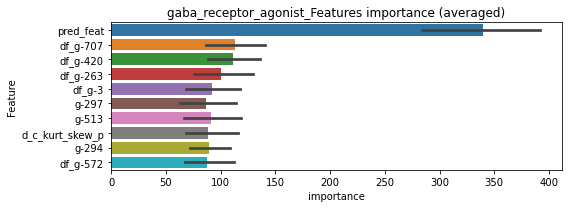

len(train_index) : 2812
len(valid_index) : 938
================================= fold 1/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000568059	valid_1's binary_logloss: 0.00481116
Early stopping, best iteration is:
[1295]	training's binary_logloss: 0.000450888	valid_1's binary_logloss: 0.00462509


len(train_index) : 2812
len(valid_index) : 938
================================= fold 2/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000552796	valid_1's binary_logloss: 0.00077522
[2000]	training's binary_logloss: 0.000312346	valid_1's binary_logloss: 0.000441346
[3000]	training's binary_logloss: 0.000238553	valid_1's binary_logloss: 0.000336549
[4000]	training's binary_logloss: 0.000204544	valid_1's binary_logloss: 0.000286772
[5000]	training's binary_logloss: 0.000186786	valid_1's binary_logloss: 0.000259764
[6000]	training's binary_logloss: 0.000175662	valid_1's binary_logloss: 0.000242923
[7000]	training's binary_logloss: 0.00016826	valid_1's binary_logloss: 0.000231537
Early stopping, best iteration is:
[7133]	training's binary_logloss: 0.000167671	valid_1's binary_logloss: 0.000230578


len(train_index) : 2813
len(valid_index) : 937
================================= fold 3/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000558523	valid_1's binary_logloss: 0.00087318
[2000]	training's binary_logloss: 0.000315714	valid_1's binary_logloss: 0.000533635
[3000]	training's binary_logloss: 0.000240831	valid_1's binary_logloss: 0.000418362
[4000]	training's binary_logloss: 0.000205297	valid_1's binary_logloss: 0.000359318
[5000]	training's binary_logloss: 0.000186957	valid_1's binary_logloss: 0.000328565
[6000]	training's binary_logloss: 0.000174721	valid_1's binary_logloss: 0.000306553
[7000]	training's binary_logloss: 0.000165736	valid_1's binary_logloss: 0.000291766
Early stopping, best iteration is:
[7802]	training's binary_logloss: 0.000160329	valid_1's binary_logloss: 0.000282395


len(train_index) : 2813
len(valid_index) : 937
================================= fold 4/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00054283	valid_1's binary_logloss: 0.000994875
[2000]	training's binary_logloss: 0.000312011	valid_1's binary_logloss: 0.000601192
[3000]	training's binary_logloss: 0.000239252	valid_1's binary_logloss: 0.000469117
[4000]	training's binary_logloss: 0.000204213	valid_1's binary_logloss: 0.000403062
[5000]	training's binary_logloss: 0.000186894	valid_1's binary_logloss: 0.000369822
[6000]	training's binary_logloss: 0.000176138	valid_1's binary_logloss: 0.000348653
[7000]	training's binary_logloss: 0.000168255	valid_1's binary_logloss: 0.000333206
[8000]	training's binary_logloss: 0.000162294	valid_1's binary_logloss: 0.000321715
Early stopping, best iteration is:
[8316]	training's binary_logloss: 0.00016076	valid_1's binary_logloss: 0.000318611


gaba_receptor_agonist logloss: 0.001365244857142342


neg labels: 3289 → selected neg labels: 3266


gaba_receptor_antagonist, len(trt): 165, len(othr): 3266
target_rate: 0.0069287 → Adj_target_rate: 0.0064426
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0204898	valid_1's binary_logloss: 0.130621
[600]	training's binary_logloss: 0.00315885	valid_1's binary_logloss: 0.116382
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.00331255	valid_1's binary_logloss: 0.116241
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0199916	valid_1's binary_logloss: 0.130595
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.00512546	valid_1's binary_logloss: 0.120551
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.020893	valid_1's binary_logloss: 0.130676
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.00573013	valid_1's binary_logloss: 0.119454
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0201818	valid_1's binary_logloss: 0.139063
Early stopping, best ite

1 / 3 AUC score:0.980
y_Threshold: 0.0317495, Threshold: 0.1150155, pos_neg_ratio: 0.8000000
Remove_noisy_data: 215 → Positive_corect_labels: 611/3704
p_label_rate: 0.0100452 Vs.target_rate: 0.00693
Num_p_label: 40.0, conf_0:0.08051, conf_1:0.14952
threshold: 0.1150155, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 611.0/3704, y_label_rate: 0.1649568
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174664	valid_1's binary_logloss: 0.00569231
[600]	training's binary_logloss: 0.000246902	valid_1's binary_logloss: 0.00273139
Early stopping, best iteration is:
[794]	training's binary_logloss: 0.000176938	valid_1's binary_logloss: 0.00253271
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00161735	valid_1's binary_logloss: 0.00442486
[600]	training's binary_logloss: 0.000242633	valid_1's binary_logloss: 0.000913753
[900]	training's binary_logloss: 0.000165368	valid_1's binary_logloss: 0.000691737
Early stopping, best iteration is:
[1154]	training's binary_logloss: 0.000146836	valid_1's binary_logloss: 0.000614336
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172293	valid_1's binary_logloss: 0.003759
[600]	training's binary_logloss: 0.000244777	valid_1's binary_logloss: 0.000572578
[900]	tra

2 / 3 AUC score:1.000
y_Threshold: 0.1378896, Threshold: 0.1150155, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 611.0/3704
p_label_rate: 0.0705676 Vs.target_rate: 0.00693
Num_p_label: 281.0, conf_0:0.09201, conf_1:0.13802
Num_p_label: 281.0, Expected: 27.6, Adj_threshold_1: 0.1150155
Num_p_label: 280.0, Expected: 27.6, Adj_threshold_2: 0.1650155
Num_p_label: 280.0, Expected: 27.6, Adj_threshold_3: 0.2150155
Num_p_label: 280.0, Expected: 27.6, Adj_threshold_4: 0.2650155
Num_p_label: 274.0, Expected: 27.6, Adj_threshold_5: 0.3150155
Num_p_label: 270.0, Expected: 27.6, Adj_threshold_6: 0.3650155
Num_p_label: 270.0, Expected: 27.6, Adj_threshold_7: 0.4150155
Num_p_label: 270.0, Expected: 27.6, Adj_threshold_8: 0.4650155
Num_p_label: 270.0, Expected: 27.6, Adj_threshold_9: 0.5150155
Num_p_label: 263.0, Expected: 27.6, Adj_threshold_10: 0.5650155
threshold: 0.6150155, positive_p_label: 263.0/3982, p_label_rate: 0.0660472
positive_y_label: 611.0/3704, y_label_rate:

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0017633	valid_1's binary_logloss: 0.00846374
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000384186	valid_1's binary_logloss: 0.00640195
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162018	valid_1's binary_logloss: 0.00435517
[600]	training's binary_logloss: 0.000242187	valid_1's binary_logloss: 0.00084654
[900]	training's binary_logloss: 0.000165462	valid_1's binary_logloss: 0.000617556
Early stopping, best iteration is:
[1144]	training's binary_logloss: 0.000147972	valid_1's binary_logloss: 0.000550197
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173053	valid_1's binary_logloss: 0.00370736
[600]	training's binary_logloss: 0.000245623	valid_1's binary_logloss: 0.000518863
[900]	training's binary_logloss: 0.000164362	valid_1's binary_logloss: 0.000292936
[1200]	t

3 / 3 AUC score:1.000
y_Threshold: 0.1585803, Threshold: 0.6150155, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 610.0/3702
p_label_rate: 0.0655450 Vs.target_rate: 0.00693
Num_p_label: 261.0, conf_0:0.50000, conf_1:0.67652
Num_p_label: 261.0, Expected: 27.6, Adj_threshold_1: 0.6150155


[900]	training's binary_logloss: 0.000171125	valid_1's binary_logloss: 0.000944911
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000171901	valid_1's binary_logloss: 0.000939866


Num_p_label: 261.0, Expected: 27.6, Adj_threshold_2: 0.6650155
Num_p_label: 261.0, Expected: 27.6, Adj_threshold_3: 0.7150155
Num_p_label: 261.0, Expected: 27.6, Adj_threshold_4: 0.7650155
threshold: 0.7650155, positive_p_label: 261.0/3982, p_label_rate: 0.0655450
positive_y_label: 610.0/3702, y_label_rate: 0.1647758


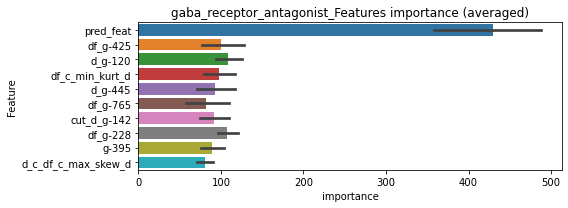

len(train_index) : 2776
len(valid_index) : 926
================================= fold 1/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2776
len(valid_index) : 926
================================= fold 2/4 gaba_receptor_antagonist=================================


Early stopping, best iteration is:
[351]	training's binary_logloss: 0.00177069	valid_1's binary_logloss: 0.0172196
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000601699	valid_1's binary_logloss: 0.00205425
Early stopping, best iteration is:
[1738]	training's binary_logloss: 0.000372695	valid_1's binary_logloss: 0.00161902


len(train_index) : 2777
len(valid_index) : 925
================================= fold 3/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000602009	valid_1's binary_logloss: 0.00138118
[2000]	training's binary_logloss: 0.00033705	valid_1's binary_logloss: 0.00100748
[3000]	training's binary_logloss: 0.000260097	valid_1's binary_logloss: 0.000865287
[4000]	training's binary_logloss: 0.000224178	valid_1's binary_logloss: 0.000793624
[5000]	training's binary_logloss: 0.000204928	valid_1's binary_logloss: 0.000750228
Early stopping, best iteration is:
[5040]	training's binary_logloss: 0.000204251	valid_1's binary_logloss: 0.000749228


len(train_index) : 2777
len(valid_index) : 925
================================= fold 4/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00059451	valid_1's binary_logloss: 0.000802675
[2000]	training's binary_logloss: 0.000335536	valid_1's binary_logloss: 0.00043821
[3000]	training's binary_logloss: 0.000256445	valid_1's binary_logloss: 0.000320321
[4000]	training's binary_logloss: 0.000221197	valid_1's binary_logloss: 0.000264854
[5000]	training's binary_logloss: 0.000202451	valid_1's binary_logloss: 0.000236138
[6000]	training's binary_logloss: 0.000189872	valid_1's binary_logloss: 0.000217569
[7000]	training's binary_logloss: 0.000180771	valid_1's binary_logloss: 0.00020434
Early stopping, best iteration is:
[7165]	training's binary_logloss: 0.000179726	valid_1's binary_logloss: 0.000202832


gaba_receptor_antagonist logloss: 0.004950801281386193


neg labels: 3289 → selected neg labels: 3284


gamma_secretase_inhibitor, len(trt): 56, len(othr): 3284
target_rate: 0.0023516 → Adj_target_rate: 0.0025713
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0048709	valid_1's binary_logloss: 0.0399614
[600]	training's binary_logloss: 0.000867924	valid_1's binary_logloss: 0.0331132
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000713434	valid_1's binary_logloss: 0.0325486
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00518468	valid_1's binary_logloss: 0.0277351
[600]	training's binary_logloss: 0.000909854	valid_1's binary_logloss: 0.0180065
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000658551	valid_1's binary_logloss: 0.0173747
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00537663	valid_1's binary_logloss: 0.0145824
[600]	training's binary_logloss: 0.000947826	valid_1's binary_logloss: 0.00562445
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000661681	valid_1's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0059791, Threshold: 0.0199209, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00235
Num_p_label: 40.0, conf_0:0.01394, conf_1:0.02590
Num_p_label: 40.0, Expected: 9.4, Adj_threshold_1: 0.0199209
Num_p_label: 8.0, Expected: 9.4, Adj_threshold_2: 0.0699209
threshold: 0.0699209, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105354	valid_1's binary_logloss: 0.00488426
Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000322114	valid_1's binary_logloss: 0.00372451
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112185	valid_1's binary_logloss: 0.00277325
[600]	training's binary_logloss: 0.000226816	valid_1's binary_logloss: 0.0012441
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000191982	valid_1's binary_logloss: 0.0011279
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114276	valid_1's binary_logloss: 0.00551824
Early stopping, best iteration is:
[353]	training's binary_logloss: 0.000682333	valid_1's binary_logloss: 0.00496098
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00109033	valid_1's binary_logloss: 0.00443307


2 / 3 AUC score:1.000
y_Threshold: 0.6130588, Threshold: 0.0699209, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0532396 Vs.target_rate: 0.00235
Num_p_label: 212.0, conf_0:0.05594, conf_1:0.08391
Num_p_label: 212.0, Expected: 9.4, Adj_threshold_1: 0.0699209
Num_p_label: 212.0, Expected: 9.4, Adj_threshold_2: 0.1199209
Num_p_label: 209.0, Expected: 9.4, Adj_threshold_3: 0.1699209
Num_p_label: 209.0, Expected: 9.4, Adj_threshold_4: 0.2199209
Num_p_label: 209.0, Expected: 9.4, Adj_threshold_5: 0.2699209
Num_p_label: 209.0, Expected: 9.4, Adj_threshold_6: 0.3199209
Num_p_label: 207.0, Expected: 9.4, Adj_threshold_7: 0.3699209
Num_p_label: 203.0, Expected: 9.4, Adj_threshold_8: 0.4199209
Num_p_label: 196.0, Expected: 9.4, Adj_threshold_9: 0.4699209
Num_p_label: 192.0, Expected: 9.4, Adj_threshold_10: 0.5199209


[600]	training's binary_logloss: 0.000227	valid_1's binary_logloss: 0.00317837
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000232493	valid_1's binary_logloss: 0.00317496


threshold: 0.5699209, positive_p_label: 180.0/3982, p_label_rate: 0.0452034
positive_y_label: 652.0/3800, y_label_rate: 0.1715789
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110791	valid_1's binary_logloss: 0.00390029
[600]	training's binary_logloss: 0.000235581	valid_1's binary_logloss: 0.00216887
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000210927	valid_1's binary_logloss: 0.00208127
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112715	valid_1's binary_logloss: 0.00248491
[600]	training's binary_logloss: 0.000233751	valid_1's binary_logloss: 0.00132292
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000233751	valid_1's binary_logloss: 0.00132292
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114125	valid_1's binary_logloss: 0.00238056
[600]	training's binary_logloss: 0.000234842	valid_1's binary_logloss: 0.000983435
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.00019674	valid_1's bina

3 / 3 AUC score:1.000
y_Threshold: 0.3847116, Threshold: 0.5699209, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 651.0/3798
p_label_rate: 0.0052737 Vs.target_rate: 0.00235
Num_p_label: 21.0, conf_0:0.50000, conf_1:0.62691
Num_p_label: 21.0, Expected: 9.4, Adj_threshold_1: 0.5699209
threshold: 0.5699209, positive_p_label: 21.0/3982, p_label_rate: 0.0052737


Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000183805	valid_1's binary_logloss: 0.00406701


positive_y_label: 651.0/3798, y_label_rate: 0.1714060


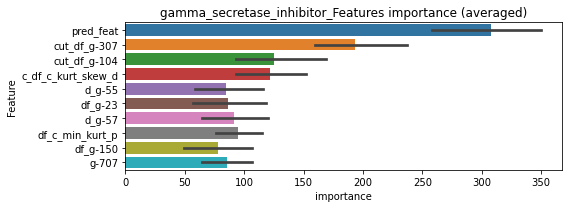

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000543317	valid_1's binary_logloss: 0.00313441
Early stopping, best iteration is:
[1017]	training's binary_logloss: 0.000534459	valid_1's binary_logloss: 0.00310822


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000548974	valid_1's binary_logloss: 0.00282156
Early stopping, best iteration is:
[1648]	training's binary_logloss: 0.000359697	valid_1's binary_logloss: 0.00257703


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000562024	valid_1's binary_logloss: 0.00298574
Early stopping, best iteration is:
[1924]	training's binary_logloss: 0.000327969	valid_1's binary_logloss: 0.00272279


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00054731	valid_1's binary_logloss: 0.00310334
Early stopping, best iteration is:
[1618]	training's binary_logloss: 0.000363614	valid_1's binary_logloss: 0.0028702


gamma_secretase_inhibitor logloss: 0.0028196864718945344


neg labels: 3289 → selected neg labels: 3248


glucocorticoid_receptor_agonist, len(trt): 266, len(othr): 3248
target_rate: 0.0111699 → Adj_target_rate: 0.0096682
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0454256	valid_1's binary_logloss: 0.232382
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.0140837	valid_1's binary_logloss: 0.222334
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0426663	valid_1's binary_logloss: 0.248839
Early stopping, best iteration is:
[387]	training's binary_logloss: 0.0245872	valid_1's binary_logloss: 0.244182
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.046746	valid_1's binary_logloss: 0.198352
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.00969515	valid_1's binary_logloss: 0.176973
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.045314	valid_1's binary_logloss: 0.24967
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.0175083	valid_1's binary_logloss: 0.2

1 / 3 AUC score:0.919
y_Threshold: 0.0750471, Threshold: 0.3177028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 385 → Positive_corect_labels: 522/3512
p_label_rate: 0.0100452 Vs.target_rate: 0.01117
Num_p_label: 40.0, conf_0:0.22239, conf_1:0.41301
threshold: 0.3177028, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 522.0/3512, y_label_rate: 0.1486333
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00196515	valid_1's binary_logloss: 0.00570171
[600]	training's binary_logloss: 0.000271989	valid_1's binary_logloss: 0.000965747
[900]	training's binary_logloss: 0.000175672	valid_1's binary_logloss: 0.000594625
Early stopping, best iteration is:
[936]	training's binary_logloss: 0.000172398	valid_1's binary_logloss: 0.000580541
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0020143	valid_1's binary_logloss: 0.00539769
[600]	training's binary_logloss: 0.000274359	valid_1's binary_logloss: 0.000968711
[900]	training's binary_logloss: 0.000172138	valid_1's binary_logloss: 0.000643958
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000170497	valid_1's binary_logloss: 0.000637024
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00197761	valid_1's binary_logloss: 0.0079382
[600]	tr

2 / 3 AUC score:1.000
y_Threshold: 0.2265097, Threshold: 0.3177028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 521.0/3510
p_label_rate: 0.0979407 Vs.target_rate: 0.01117


[900]	training's binary_logloss: 0.000184446	valid_1's binary_logloss: 0.00208555
Early stopping, best iteration is:
[913]	training's binary_logloss: 0.000182772	valid_1's binary_logloss: 0.00207461


Num_p_label: 390.0, conf_0:0.25416, conf_1:0.38124
Num_p_label: 390.0, Expected: 44.5, Adj_threshold_1: 0.3177028
Num_p_label: 390.0, Expected: 44.5, Adj_threshold_2: 0.3677028
Num_p_label: 390.0, Expected: 44.5, Adj_threshold_3: 0.4177028
Num_p_label: 390.0, Expected: 44.5, Adj_threshold_4: 0.4677028
Num_p_label: 390.0, Expected: 44.5, Adj_threshold_5: 0.5177028
Num_p_label: 385.0, Expected: 44.5, Adj_threshold_6: 0.5677028
Num_p_label: 378.0, Expected: 44.5, Adj_threshold_7: 0.6177028
Num_p_label: 375.0, Expected: 44.5, Adj_threshold_8: 0.6677028
Num_p_label: 375.0, Expected: 44.5, Adj_threshold_9: 0.7177028
Num_p_label: 375.0, Expected: 44.5, Adj_threshold_10: 0.7677028
threshold: 0.7677028, positive_p_label: 375.0/3982, p_label_rate: 0.0941738
positive_y_label: 521.0/3510, y_label_rate: 0.1484330
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173914	valid_1's binary_logloss: 0.00396232
[600]	training's binary_logloss: 0.000204762	valid_1's binary_logloss: 0.000500456
[900]	training's binary_logloss: 0.000118699	valid_1's binary_logloss: 0.000291447
[1200]	training's binary_logloss: 0.000109921	valid_1's binary_logloss: 0.000269911
Early stopping, best iteration is:
[1299]	training's binary_logloss: 0.000108993	valid_1's binary_logloss: 0.000267372
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00202066	valid_1's binary_logloss: 0.00473306
[600]	training's binary_logloss: 0.00027119	valid_1's binary_logloss: 0.000643789
[900]	training's binary_logloss: 0.000173601	valid_1's binary_logloss: 0.000348504
Early stopping, best iteration is:
[977]	training's binary_logloss: 0.000167689	valid_1's binary_logloss: 0.000328048
Training until validation scores don't improve for 30 rounds
[30

3 / 3 AUC score:1.000
y_Threshold: 0.1088525, Threshold: 0.7677028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 519.0/3506
p_label_rate: 0.0939227 Vs.target_rate: 0.01117
Num_p_label: 374.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 374.0, Expected: 44.5, Adj_threshold_1: 0.7677028
threshold: 0.7677028, positive_p_label: 374.0/3982, p_label_rate: 0.0939227
positive_y_label: 519.0/3506, y_label_rate: 0.1480319


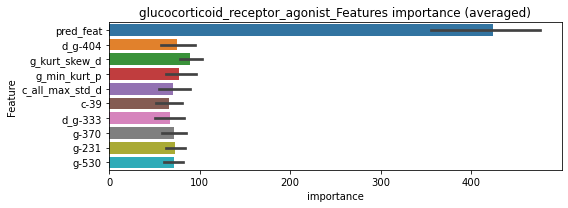

len(train_index) : 2629
len(valid_index) : 877
================================= fold 1/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000633106	valid_1's binary_logloss: 0.00194128
Early stopping, best iteration is:
[1944]	training's binary_logloss: 0.000360979	valid_1's binary_logloss: 0.00153305


len(train_index) : 2629
len(valid_index) : 877
================================= fold 2/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000633018	valid_1's binary_logloss: 0.00123512
[2000]	training's binary_logloss: 0.000353527	valid_1's binary_logloss: 0.000741253
[3000]	training's binary_logloss: 0.000264808	valid_1's binary_logloss: 0.000572046
[4000]	training's binary_logloss: 0.000223565	valid_1's binary_logloss: 0.000491476
[5000]	training's binary_logloss: 0.000202001	valid_1's binary_logloss: 0.000445945
[6000]	training's binary_logloss: 0.000187796	valid_1's binary_logloss: 0.000415924
[7000]	training's binary_logloss: 0.000177067	valid_1's binary_logloss: 0.000392866
Early stopping, best iteration is:
[7921]	training's binary_logloss: 0.000169525	valid_1's binary_logloss: 0.000377074


len(train_index) : 2630
len(valid_index) : 876
================================= fold 3/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000608699	valid_1's binary_logloss: 0.00500236
Early stopping, best iteration is:
[1746]	training's binary_logloss: 0.000378945	valid_1's binary_logloss: 0.00446159


len(train_index) : 2630
len(valid_index) : 876
================================= fold 4/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000515368	valid_1's binary_logloss: 0.000945014
[2000]	training's binary_logloss: 0.00027748	valid_1's binary_logloss: 0.000510391
[3000]	training's binary_logloss: 0.000201884	valid_1's binary_logloss: 0.000371717
[4000]	training's binary_logloss: 0.000166546	valid_1's binary_logloss: 0.00030683
[5000]	training's binary_logloss: 0.000148668	valid_1's binary_logloss: 0.00027399
[6000]	training's binary_logloss: 0.000137193	valid_1's binary_logloss: 0.000252878
[7000]	training's binary_logloss: 0.000129238	valid_1's binary_logloss: 0.00023821
[8000]	training's binary_logloss: 0.000123789	valid_1's binary_logloss: 0.00022818
[9000]	training's binary_logloss: 0.000119922	valid_1's binary_logloss: 0.000221063
[10000]	training's binary_logloss: 0.000117139	valid_1's binary_logloss: 0.000215923
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.000117139	valid_1'

glucocorticoid_receptor_agonist logloss: 0.0016468426827779927


neg labels: 3289 → selected neg labels: 3285


glutamate_inhibitor, len(trt): 13, len(othr): 3285
target_rate: 0.0005459 → Adj_target_rate: 0.0007431
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000897625	valid_1's binary_logloss: 0.00215311
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000320218	valid_1's binary_logloss: 0.00103631
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000923791	valid_1's binary_logloss: 0.00193105
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000322107	valid_1's binary_logloss: 0.000847744
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000906487	valid_1's binary_logloss: 0.00156811
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000314659	valid_1's binary_logloss: 0.000639247
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000930229	valid_1's binary_logloss: 0.00219821


1 / 3 AUC score:1.000
y_Threshold: 0.0013683, Threshold: 0.0053100, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00055
Num_p_label: 40.0, conf_0:0.00372, conf_1:0.00690
Num_p_label: 40.0, Expected: 2.2, Adj_threshold_1: 0.0053100
Num_p_label: 4.0, Expected: 2.2, Adj_threshold_2: 0.0553100
threshold: 0.0553100, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000338891	valid_1's binary_logloss: 0.00120176


positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000461898	valid_1's binary_logloss: 0.00103519
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000179727	valid_1's binary_logloss: 0.000619222
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000454393	valid_1's binary_logloss: 0.00132892
[600]	training's binary_logloss: 0.000158953	valid_1's binary_logloss: 0.000925807
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000155058	valid_1's binary_logloss: 0.000906368
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000445025	valid_1's binary_logloss: 0.000732116
[600]	training's binary_logloss: 0.000155955	valid_1's binary_logloss: 0.000368405
[900]	training's binary_logloss: 0.000131195	valid_1's binary_logloss: 0.00034257
Early stopping, best iteration is:
[953]	training's binary_logloss: 0.000129468	valid_

2 / 3 AUC score:1.000
y_Threshold: 0.4168449, Threshold: 0.0553100, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0479658 Vs.target_rate: 0.00055
Num_p_label: 191.0, conf_0:0.04425, conf_1:0.06637
Num_p_label: 191.0, Expected: 2.2, Adj_threshold_1: 0.0553100
Num_p_label: 190.0, Expected: 2.2, Adj_threshold_2: 0.1053100
Num_p_label: 181.0, Expected: 2.2, Adj_threshold_3: 0.1553100
Num_p_label: 159.0, Expected: 2.2, Adj_threshold_4: 0.2053100
Num_p_label: 128.0, Expected: 2.2, Adj_threshold_5: 0.2553100
Num_p_label: 94.0, Expected: 2.2, Adj_threshold_6: 0.3053100
Num_p_label: 69.0, Expected: 2.2, Adj_threshold_7: 0.3553100
Num_p_label: 46.0, Expected: 2.2, Adj_threshold_8: 0.4053100
Num_p_label: 31.0, Expected: 2.2, Adj_threshold_9: 0.4553100
Num_p_label: 16.0, Expected: 2.2, Adj_threshold_10: 0.5053100


Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000134351	valid_1's binary_logloss: 0.000289567


threshold: 0.5553100, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000462242	valid_1's binary_logloss: 0.00119922
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000193546	valid_1's binary_logloss: 0.000822038
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000463522	valid_1's binary_logloss: 0.00103677
[600]	training's binary_logloss: 0.000162935	valid_1's binary_logloss: 0.000631207
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000153175	valid_1's binary_logloss: 0.000608119
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000454103	valid_1's binary_logloss: 0.000726579
[600]	training's binary_logloss: 0.000157741	valid_1's binary_logloss: 0.000349656
[900]	training's binary_logloss: 0.000133332	valid_1's binary_logloss: 0.000327062
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000134324	valid

3 / 3 AUC score:1.000
y_Threshold: 0.2991956, Threshold: 0.5553100, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0020090 Vs.target_rate: 0.00055
Num_p_label: 8.0, conf_0:0.49978, conf_1:0.61084
Num_p_label: 8.0, Expected: 2.2, Adj_threshold_1: 0.5553100
Num_p_label: 6.0, Expected: 2.2, Adj_threshold_2: 0.6053100
Num_p_label: 5.0, Expected: 2.2, Adj_threshold_3: 0.6553100
threshold: 0.6553100, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


[600]	training's binary_logloss: 0.000160758	valid_1's binary_logloss: 0.000416194
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000164105	valid_1's binary_logloss: 0.00041335


positive_y_label: 657.0/3810, y_label_rate: 0.1724409


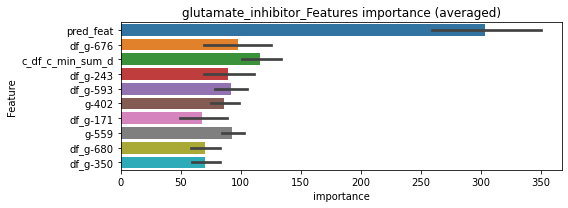

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 glutamate_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000385796	valid_1's binary_logloss: 0.00116945
Early stopping, best iteration is:
[1295]	training's binary_logloss: 0.000316073	valid_1's binary_logloss: 0.00109196


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 glutamate_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000386966	valid_1's binary_logloss: 0.00129333
[2000]	training's binary_logloss: 0.000244967	valid_1's binary_logloss: 0.0010711
Early stopping, best iteration is:
[2082]	training's binary_logloss: 0.000240396	valid_1's binary_logloss: 0.00106591


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 glutamate_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000388968	valid_1's binary_logloss: 0.000625684
[2000]	training's binary_logloss: 0.000243338	valid_1's binary_logloss: 0.000462248
[3000]	training's binary_logloss: 0.000201059	valid_1's binary_logloss: 0.000410602
[4000]	training's binary_logloss: 0.000179667	valid_1's binary_logloss: 0.000384864
[5000]	training's binary_logloss: 0.000167921	valid_1's binary_logloss: 0.000370822
Early stopping, best iteration is:
[5866]	training's binary_logloss: 0.000160985	valid_1's binary_logloss: 0.00036087


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 glutamate_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00038393	valid_1's binary_logloss: 0.000807618
[2000]	training's binary_logloss: 0.000242802	valid_1's binary_logloss: 0.000629379
Early stopping, best iteration is:
[2885]	training's binary_logloss: 0.000202455	valid_1's binary_logloss: 0.00057724


glutamate_inhibitor logloss: 0.0007744645340082146


neg labels: 3289 → selected neg labels: 3283


glutamate_receptor_agonist, len(trt): 74, len(othr): 3283
target_rate: 0.0031074 → Adj_target_rate: 0.0032587
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0072861	valid_1's binary_logloss: 0.0514425
[600]	training's binary_logloss: 0.00117164	valid_1's binary_logloss: 0.0393519
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000922647	valid_1's binary_logloss: 0.038717
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00709598	valid_1's binary_logloss: 0.0431136
[600]	training's binary_logloss: 0.00115609	valid_1's binary_logloss: 0.0338789
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.0010862	valid_1's binary_logloss: 0.0337428
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00748636	valid_1's binary_logloss: 0.0250979
[600]	training's binary_logloss: 0.00126739	valid_1's binary_logloss: 0.0146505
Early stopping, best iteration is:
[827]	training's binary_logloss: 0.000775451	valid_1's binary_logloss: 0.0

1 / 3 AUC score:0.999
y_Threshold: 0.0101774, Threshold: 0.2138980, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 652/3799
p_label_rate: 0.0100452 Vs.target_rate: 0.00311
Num_p_label: 40.0, conf_0:0.14973, conf_1:0.27807
Num_p_label: 40.0, Expected: 12.4, Adj_threshold_1: 0.2138980
Num_p_label: 34.0, Expected: 12.4, Adj_threshold_2: 0.2638980
Num_p_label: 30.0, Expected: 12.4, Adj_threshold_3: 0.3138980
Num_p_label: 24.0, Expected: 12.4, Adj_threshold_4: 0.3638980
Num_p_label: 21.0, Expected: 12.4, Adj_threshold_5: 0.4138980
Num_p_label: 16.0, Expected: 12.4, Adj_threshold_6: 0.4638980
threshold: 0.4638980, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 652.0/3799, y_label_rate: 0.1716241
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012936	valid_1's binary_logloss: 0.00266773
[600]	training's binary_logloss: 0.000244399	valid_1's binary_logloss: 0.00069359
[900]	training's binary_logloss: 0.000180459	valid_1's binary_logloss: 0.000537312
Early stopping, best iteration is:
[952]	training's binary_logloss: 0.000176851	valid_1's binary_logloss: 0.000525953
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001328	valid_1's binary_logloss: 0.00654149
[600]	training's binary_logloss: 0.000247073	valid_1's binary_logloss: 0.00458626
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000182784	valid_1's binary_logloss: 0.00437635
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00129598	valid_1's binary_logloss: 0.0052578
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000325251	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.4008754, Threshold: 0.4638980, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 650.0/3795
p_label_rate: 0.0444500 Vs.target_rate: 0.00311
Num_p_label: 177.0, conf_0:0.37112, conf_1:0.55668
Num_p_label: 177.0, Expected: 12.4, Adj_threshold_1: 0.4638980
Num_p_label: 153.0, Expected: 12.4, Adj_threshold_2: 0.5138980
Num_p_label: 138.0, Expected: 12.4, Adj_threshold_3: 0.5638980
Num_p_label: 127.0, Expected: 12.4, Adj_threshold_4: 0.6138980
Num_p_label: 122.0, Expected: 12.4, Adj_threshold_5: 0.6638980
Num_p_label: 118.0, Expected: 12.4, Adj_threshold_6: 0.7138980
Num_p_label: 118.0, Expected: 12.4, Adj_threshold_7: 0.7638980
threshold: 0.7638980, positive_p_label: 118.0/3982, p_label_rate: 0.0296334
positive_y_label: 650.0/3795, y_label_rate: 0.1712780
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126275	valid_1's binary_logloss: 0.0039263
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000252962	valid_1's binary_logloss: 0.00212312
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126394	valid_1's binary_logloss: 0.00404075
[600]	training's binary_logloss: 0.000235322	valid_1's binary_logloss: 0.00209357
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000226753	valid_1's binary_logloss: 0.00203315
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130139	valid_1's binary_logloss: 0.00537527
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000285542	valid_1's binary_logloss: 0.0037526
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132916	valid_1's binary_logloss: 0.0040209


3 / 3 AUC score:1.000
y_Threshold: 0.2218775, Threshold: 0.7638980, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 648.0/3791
p_label_rate: 0.0291311 Vs.target_rate: 0.00311
Num_p_label: 116.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 116.0, Expected: 12.4, Adj_threshold_1: 0.7638980


[600]	training's binary_logloss: 0.000248412	valid_1's binary_logloss: 0.00259562
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000248412	valid_1's binary_logloss: 0.00259562


threshold: 0.7638980, positive_p_label: 116.0/3982, p_label_rate: 0.0291311
positive_y_label: 648.0/3791, y_label_rate: 0.1709312


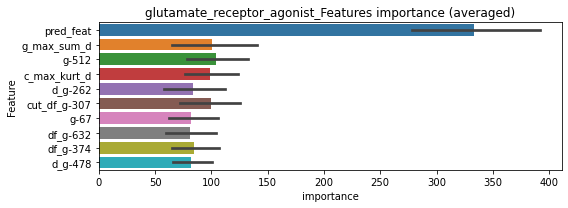

len(train_index) : 2843
len(valid_index) : 948
================================= fold 1/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000557724	valid_1's binary_logloss: 0.00131206
[2000]	training's binary_logloss: 0.000314547	valid_1's binary_logloss: 0.000900741
[3000]	training's binary_logloss: 0.000243815	valid_1's binary_logloss: 0.000756721
[4000]	training's binary_logloss: 0.000211472	valid_1's binary_logloss: 0.000689238
Early stopping, best iteration is:
[4226]	training's binary_logloss: 0.000206764	valid_1's binary_logloss: 0.000677336


len(train_index) : 2843
len(valid_index) : 948
================================= fold 2/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000552912	valid_1's binary_logloss: 0.0011098
[2000]	training's binary_logloss: 0.000313832	valid_1's binary_logloss: 0.000769999
[3000]	training's binary_logloss: 0.000244157	valid_1's binary_logloss: 0.000651437
[4000]	training's binary_logloss: 0.000211666	valid_1's binary_logloss: 0.000593723
[5000]	training's binary_logloss: 0.000194686	valid_1's binary_logloss: 0.000557078
[6000]	training's binary_logloss: 0.000183561	valid_1's binary_logloss: 0.000533221
[7000]	training's binary_logloss: 0.000175456	valid_1's binary_logloss: 0.000514446
Early stopping, best iteration is:
[7247]	training's binary_logloss: 0.000174083	valid_1's binary_logloss: 0.00051119


len(train_index) : 2843
len(valid_index) : 948
================================= fold 3/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000558458	valid_1's binary_logloss: 0.00578176
Early stopping, best iteration is:
[1116]	training's binary_logloss: 0.000505996	valid_1's binary_logloss: 0.00572253


len(train_index) : 2844
len(valid_index) : 947
================================= fold 4/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000559875	valid_1's binary_logloss: 0.00277099
Early stopping, best iteration is:
[1427]	training's binary_logloss: 0.000404461	valid_1's binary_logloss: 0.0026169


glutamate_receptor_agonist logloss: 0.0023819741562201707


neg labels: 3289 → selected neg labels: 3235


glutamate_receptor_antagonist, len(trt): 367, len(othr): 3235
target_rate: 0.0154111 → Adj_target_rate: 0.0127105
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[262]	training's binary_logloss: 0.0741378	valid_1's binary_logloss: 0.330332
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.057675	valid_1's binary_logloss: 0.328
Early stopping, best iteration is:
[331]	training's binary_logloss: 0.0483524	valid_1's binary_logloss: 0.326966
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0571404	valid_1's binary_logloss: 0.33004
Early stopping, best iteration is:
[337]	training's binary_logloss: 0.0459943	valid_1's binary_logloss: 0.327704
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0583703	valid_1's binary_logloss: 0.293949
Early stopping, best iteration is:
[423]	training's binary_logloss: 0.0285635	valid_1's binary_logloss: 0.287257


1 / 3 AUC score:0.826
y_Threshold: 0.1113811, Threshold: 0.3229121, pos_neg_ratio: 0.8000000
Remove_noisy_data: 586 → Positive_corect_labels: 419/3296
p_label_rate: 0.0100452 Vs.target_rate: 0.01541
Num_p_label: 40.0, conf_0:0.22604, conf_1:0.41979
Num_p_label: 40.0, Expected: 61.4, Adj_threshold_1: 0.3229121
Num_p_label: 48.0, Expected: 61.4, Adj_threshold_2: 0.3029121
threshold: 0.3029121, positive_p_label: 48.0/3982, p_label_rate: 0.0120542
positive_y_label: 419.0/3296, y_label_rate: 0.1271238
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00188832	valid_1's binary_logloss: 0.00763602
[600]	training's binary_logloss: 0.0002747	valid_1's binary_logloss: 0.00402149
[900]	training's binary_logloss: 0.000178213	valid_1's binary_logloss: 0.00378446
Early stopping, best iteration is:
[1030]	training's binary_logloss: 0.000167726	valid_1's binary_logloss: 0.0037616
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00182643	valid_1's binary_logloss: 0.00936436
[600]	training's binary_logloss: 0.000269976	valid_1's binary_logloss: 0.00488223
[900]	training's binary_logloss: 0.000177336	valid_1's binary_logloss: 0.00458165
Early stopping, best iteration is:
[1067]	training's binary_logloss: 0.000165449	valid_1's binary_logloss: 0.00453643
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00189734	valid_1's binary_logloss: 0.00475796
[600]	trainin

2 / 3 AUC score:1.000
y_Threshold: 0.7164548, Threshold: 0.3029121, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 417.0/3292
p_label_rate: 0.1190357 Vs.target_rate: 0.01541
Num_p_label: 474.0, conf_0:0.24233, conf_1:0.36349
Num_p_label: 474.0, Expected: 61.4, Adj_threshold_1: 0.3029121
Num_p_label: 474.0, Expected: 61.4, Adj_threshold_2: 0.3529121
Num_p_label: 474.0, Expected: 61.4, Adj_threshold_3: 0.4029121
Num_p_label: 474.0, Expected: 61.4, Adj_threshold_4: 0.4529121
Num_p_label: 474.0, Expected: 61.4, Adj_threshold_5: 0.5029121
Num_p_label: 474.0, Expected: 61.4, Adj_threshold_6: 0.5529121


Early stopping, best iteration is:
[1393]	training's binary_logloss: 0.000115366	valid_1's binary_logloss: 0.000310719


Num_p_label: 473.0, Expected: 61.4, Adj_threshold_7: 0.6029121
Num_p_label: 470.0, Expected: 61.4, Adj_threshold_8: 0.6529121
Num_p_label: 468.0, Expected: 61.4, Adj_threshold_9: 0.7029121
Num_p_label: 468.0, Expected: 61.4, Adj_threshold_10: 0.7529121
threshold: 0.7529121, positive_p_label: 468.0/3982, p_label_rate: 0.1175289
positive_y_label: 417.0/3292, y_label_rate: 0.1266707
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00195209	valid_1's binary_logloss: 0.00559255
[600]	training's binary_logloss: 0.000299602	valid_1's binary_logloss: 0.00180373
[900]	training's binary_logloss: 0.00019985	valid_1's binary_logloss: 0.00145842
Early stopping, best iteration is:
[1008]	training's binary_logloss: 0.000192002	valid_1's binary_logloss: 0.00143472
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00196694	valid_1's binary_logloss: 0.0100576
[600]	training's binary_logloss: 0.000293243	valid_1's binary_logloss: 0.00616998
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000266123	valid_1's binary_logloss: 0.00612408
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00196287	valid_1's binary_logloss: 0.00801916
[600]	training's binary_logloss: 0.000289461	valid_1's binary_logloss: 0.00463526
[900]	trainin

3 / 3 AUC score:1.000
y_Threshold: 0.6796551, Threshold: 0.7529121, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 414.0/3286
p_label_rate: 0.1089905 Vs.target_rate: 0.01541
Num_p_label: 434.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 434.0, Expected: 61.4, Adj_threshold_1: 0.7529121


[600]	training's binary_logloss: 0.000292384	valid_1's binary_logloss: 0.00245024
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000271598	valid_1's binary_logloss: 0.00228809


threshold: 0.7529121, positive_p_label: 434.0/3982, p_label_rate: 0.1089905
positive_y_label: 414.0/3286, y_label_rate: 0.1259890


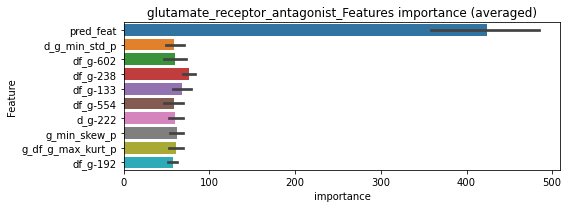

len(train_index) : 2464
len(valid_index) : 822
================================= fold 1/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2464
len(valid_index) : 822
================================= fold 2/4 glutamate_receptor_antagonist=================================


Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000872832	valid_1's binary_logloss: 0.0110415
Training until validation scores don't improve for 30 rounds


len(train_index) : 2465
len(valid_index) : 821


Early stopping, best iteration is:
[904]	training's binary_logloss: 0.00071506	valid_1's binary_logloss: 0.00377784


================================= fold 3/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000664556	valid_1's binary_logloss: 0.0025867
Early stopping, best iteration is:
[1423]	training's binary_logloss: 0.000480839	valid_1's binary_logloss: 0.0022683


len(train_index) : 2465
len(valid_index) : 821
================================= fold 4/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000656392	valid_1's binary_logloss: 0.00272921
[2000]	training's binary_logloss: 0.000374487	valid_1's binary_logloss: 0.00221277
Early stopping, best iteration is:
[2100]	training's binary_logloss: 0.000364071	valid_1's binary_logloss: 0.0021794


glutamate_receptor_antagonist logloss: 0.004819037412817569


neg labels: 3289 → selected neg labels: 3287


gonadotropin_receptor_agonist, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146049	valid_1's binary_logloss: 0.00700384
[600]	training's binary_logloss: 0.000383148	valid_1's binary_logloss: 0.00386375
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000383256	valid_1's binary_logloss: 0.00386189
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014835	valid_1's binary_logloss: 0.00429996
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000392354	valid_1's binary_logloss: 0.00242071
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00145917	valid_1's binary_logloss: 0.00408268
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000387582	valid_1's binary_logloss: 0.00207707
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144565	valid_1's binary_logloss: 0.00392051


1 / 3 AUC score:1.000
y_Threshold: 0.0020560, Threshold: 0.0076895, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00538, conf_1:0.01000
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0076895
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_2: 0.0576895


[600]	training's binary_logloss: 0.000374817	valid_1's binary_logloss: 0.00160161
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000375722	valid_1's binary_logloss: 0.00160156


threshold: 0.0576895, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000630921	valid_1's binary_logloss: 0.00191106
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000249528	valid_1's binary_logloss: 0.00128356
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000601547	valid_1's binary_logloss: 0.0011193
[600]	training's binary_logloss: 0.000177764	valid_1's binary_logloss: 0.000589309
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000153957	valid_1's binary_logloss: 0.000558156
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000611161	valid_1's binary_logloss: 0.00253986
Early stopping, best iteration is:
[431]	training's binary_logloss: 0.000262433	valid_1's binary_logloss: 0.00211534
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000617407	valid_1's binary_logloss: 0.001

2 / 3 AUC score:1.000
y_Threshold: 0.5200927, Threshold: 0.0576895, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0539930 Vs.target_rate: 0.00076
Num_p_label: 215.0, conf_0:0.04615, conf_1:0.06923
Num_p_label: 215.0, Expected: 3.0, Adj_threshold_1: 0.0576895
Num_p_label: 215.0, Expected: 3.0, Adj_threshold_2: 0.1076895
Num_p_label: 212.0, Expected: 3.0, Adj_threshold_3: 0.1576895
Num_p_label: 209.0, Expected: 3.0, Adj_threshold_4: 0.2076895
Num_p_label: 209.0, Expected: 3.0, Adj_threshold_5: 0.2576895


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000212601	valid_1's binary_logloss: 0.000883517


Num_p_label: 209.0, Expected: 3.0, Adj_threshold_6: 0.3076895
Num_p_label: 208.0, Expected: 3.0, Adj_threshold_7: 0.3576895
Num_p_label: 199.0, Expected: 3.0, Adj_threshold_8: 0.4076895
Num_p_label: 178.0, Expected: 3.0, Adj_threshold_9: 0.4576895
Num_p_label: 147.0, Expected: 3.0, Adj_threshold_10: 0.5076895
threshold: 0.5576895, positive_p_label: 122.0/3982, p_label_rate: 0.0306379
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000631857	valid_1's binary_logloss: 0.00189739
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000248923	valid_1's binary_logloss: 0.00126022
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000617219	valid_1's binary_logloss: 0.00122165
[600]	training's binary_logloss: 0.000179968	valid_1's binary_logloss: 0.000660796
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000163238	valid_1's binary_logloss: 0.0006286
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000623856	valid_1's binary_logloss: 0.00216304
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000203522	valid_1's binary_logloss: 0.00172136
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000617916	valid_1's binary_logloss: 0.0014

3 / 3 AUC score:1.000
y_Threshold: 0.4631926, Threshold: 0.5576895, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0263687 Vs.target_rate: 0.00076
Num_p_label: 105.0, conf_0:0.50000, conf_1:0.61346
Num_p_label: 105.0, Expected: 3.0, Adj_threshold_1: 0.5576895
Num_p_label: 85.0, Expected: 3.0, Adj_threshold_2: 0.6076895
Num_p_label: 58.0, Expected: 3.0, Adj_threshold_3: 0.6576895


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000212515	valid_1's binary_logloss: 0.000894525


Num_p_label: 38.0, Expected: 3.0, Adj_threshold_4: 0.7076895
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_5: 0.7576895
threshold: 0.7576895, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


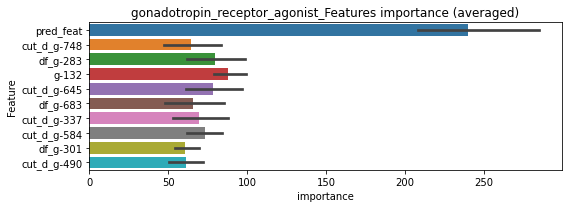

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000441978	valid_1's binary_logloss: 0.00122603
Early stopping, best iteration is:
[1283]	training's binary_logloss: 0.000361733	valid_1's binary_logloss: 0.00113611


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000436442	valid_1's binary_logloss: 0.00090236
[2000]	training's binary_logloss: 0.000263889	valid_1's binary_logloss: 0.000723995
Early stopping, best iteration is:
[2386]	training's binary_logloss: 0.00024037	valid_1's binary_logloss: 0.00069767


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000443256	valid_1's binary_logloss: 0.00182118
[2000]	training's binary_logloss: 0.00026778	valid_1's binary_logloss: 0.00158606
Early stopping, best iteration is:
[2063]	training's binary_logloss: 0.000263454	valid_1's binary_logloss: 0.00158037


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000442351	valid_1's binary_logloss: 0.000963951
[2000]	training's binary_logloss: 0.000267519	valid_1's binary_logloss: 0.00075415
[3000]	training's binary_logloss: 0.000217477	valid_1's binary_logloss: 0.000689212
[4000]	training's binary_logloss: 0.00019353	valid_1's binary_logloss: 0.000658656
[5000]	training's binary_logloss: 0.000180239	valid_1's binary_logloss: 0.000642046
Early stopping, best iteration is:
[5869]	training's binary_logloss: 0.000172357	valid_1's binary_logloss: 0.000631826


gonadotropin_receptor_agonist logloss: 0.0010116949349762564


neg labels: 3289 → selected neg labels: 3281


gsk_inhibitor, len(trt): 60, len(othr): 3281
target_rate: 0.0025195 → Adj_target_rate: 0.0027266
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00608007	valid_1's binary_logloss: 0.0367521
[600]	training's binary_logloss: 0.00105179	valid_1's binary_logloss: 0.0230096
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000663955	valid_1's binary_logloss: 0.0213261
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00616863	valid_1's binary_logloss: 0.0288843
[600]	training's binary_logloss: 0.00105434	valid_1's binary_logloss: 0.0170906
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000813846	valid_1's binary_logloss: 0.0163198
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00675408	valid_1's binary_logloss: 0.0150603
[600]	training's binary_logloss: 0.00112036	valid_1's binary_logloss: 0.0042059
[900]	training's binary_logloss: 0.000680973	valid_1's binary_logloss: 0.00303735
Early stopping, best it

1 / 3 AUC score:1.000
y_Threshold: 0.0085041, Threshold: 0.0403526, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, conf_0:0.02825, conf_1:0.05246
Num_p_label: 40.0, Expected: 10.0, Adj_threshold_1: 0.0403526
Num_p_label: 10.0, Expected: 10.0, Adj_threshold_2: 0.0903526
threshold: 0.0903526, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117397	valid_1's binary_logloss: 0.00608927
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.00028087	valid_1's binary_logloss: 0.00422205
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118663	valid_1's binary_logloss: 0.00436937
[600]	training's binary_logloss: 0.000228674	valid_1's binary_logloss: 0.00296412
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000205569	valid_1's binary_logloss: 0.00291501
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122432	valid_1's binary_logloss: 0.00146014
[600]	training's binary_logloss: 0.000235538	valid_1's binary_logloss: 0.000234881
[900]	training's binary_logloss: 0.000170678	valid_1's binary_logloss: 0.000148801
Early stopping, best iteration is:
[975]	training's binary_logloss: 0.000165584	valid_1's bin

2 / 3 AUC score:1.000
y_Threshold: 0.6738022, Threshold: 0.0903526, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3799
p_label_rate: 0.0489704 Vs.target_rate: 0.00252
Num_p_label: 195.0, conf_0:0.07228, conf_1:0.10842
Num_p_label: 195.0, Expected: 10.0, Adj_threshold_1: 0.0903526
Num_p_label: 195.0, Expected: 10.0, Adj_threshold_2: 0.1403526
Num_p_label: 192.0, Expected: 10.0, Adj_threshold_3: 0.1903526
Num_p_label: 192.0, Expected: 10.0, Adj_threshold_4: 0.2403526
Num_p_label: 192.0, Expected: 10.0, Adj_threshold_5: 0.2903526
Num_p_label: 192.0, Expected: 10.0, Adj_threshold_6: 0.3403526
Num_p_label: 192.0, Expected: 10.0, Adj_threshold_7: 0.3903526
Num_p_label: 192.0, Expected: 10.0, Adj_threshold_8: 0.4403526
Num_p_label: 190.0, Expected: 10.0, Adj_threshold_9: 0.4903526
Num_p_label: 187.0, Expected: 10.0, Adj_threshold_10: 0.5403526
threshold: 0.5903526, positive_p_label: 181.0/3982, p_label_rate: 0.0454545
positive_y_label: 653.0/3799, y_label_rate:

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118043	valid_1's binary_logloss: 0.00899456
[600]	training's binary_logloss: 0.00023591	valid_1's binary_logloss: 0.0078446
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000248122	valid_1's binary_logloss: 0.00781616
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122612	valid_1's binary_logloss: 0.00552232
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000357638	valid_1's binary_logloss: 0.00433218
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120564	valid_1's binary_logloss: 0.00230329
[600]	training's binary_logloss: 0.000239385	valid_1's binary_logloss: 0.000523102
[900]	training's binary_logloss: 0.000176113	valid_1's binary_logloss: 0.000338471
Early stopping, best iteration is:
[1027]	training's binary_logloss: 0.000169086	valid_1's bin

3 / 3 AUC score:1.000
y_Threshold: 0.3402156, Threshold: 0.5903526, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 649.0/3791
p_label_rate: 0.0125565 Vs.target_rate: 0.00252
Num_p_label: 50.0, conf_0:0.50000, conf_1:0.64939
Num_p_label: 50.0, Expected: 10.0, Adj_threshold_1: 0.5903526
Num_p_label: 48.0, Expected: 10.0, Adj_threshold_2: 0.6403526


Early stopping, best iteration is:
[402]	training's binary_logloss: 0.000514815	valid_1's binary_logloss: 0.00292004


Num_p_label: 48.0, Expected: 10.0, Adj_threshold_3: 0.6903526
Num_p_label: 36.0, Expected: 10.0, Adj_threshold_4: 0.7403526
Num_p_label: 21.0, Expected: 10.0, Adj_threshold_5: 0.7903526
threshold: 0.7903526, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 649.0/3791, y_label_rate: 0.1711949


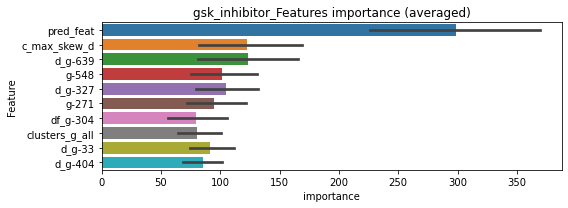

len(train_index) : 2843
len(valid_index) : 948
================================= fold 1/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00056066	valid_1's binary_logloss: 0.00131216
[2000]	training's binary_logloss: 0.000316524	valid_1's binary_logloss: 0.000944208
[3000]	training's binary_logloss: 0.000245074	valid_1's binary_logloss: 0.000823042
[4000]	training's binary_logloss: 0.000211624	valid_1's binary_logloss: 0.000760865
[5000]	training's binary_logloss: 0.000194364	valid_1's binary_logloss: 0.000723909
[6000]	training's binary_logloss: 0.000182708	valid_1's binary_logloss: 0.000699773
Early stopping, best iteration is:
[6913]	training's binary_logloss: 0.000174797	valid_1's binary_logloss: 0.000684097


len(train_index) : 2843
len(valid_index) : 948
================================= fold 2/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0005417	valid_1's binary_logloss: 0.00131131
[2000]	training's binary_logloss: 0.000309157	valid_1's binary_logloss: 0.000990865
[3000]	training's binary_logloss: 0.000238368	valid_1's binary_logloss: 0.000850883
Early stopping, best iteration is:
[3047]	training's binary_logloss: 0.000235872	valid_1's binary_logloss: 0.000846841


len(train_index) : 2843
len(valid_index) : 948
================================= fold 3/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000544937	valid_1's binary_logloss: 0.00224265
[2000]	training's binary_logloss: 0.000315583	valid_1's binary_logloss: 0.00189588
Early stopping, best iteration is:
[2203]	training's binary_logloss: 0.000297637	valid_1's binary_logloss: 0.00186986


len(train_index) : 2844
len(valid_index) : 947
================================= fold 4/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000527914	valid_1's binary_logloss: 0.00287397
[2000]	training's binary_logloss: 0.000310665	valid_1's binary_logloss: 0.00263399
Early stopping, best iteration is:
[1979]	training's binary_logloss: 0.000312891	valid_1's binary_logloss: 0.00263302


gsk_inhibitor logloss: 0.001508841091932172


neg labels: 3289 → selected neg labels: 3273


hcv_inhibitor, len(trt): 72, len(othr): 3273
target_rate: 0.0030234 → Adj_target_rate: 0.0031837
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00638461	valid_1's binary_logloss: 0.0514868
[600]	training's binary_logloss: 0.00113027	valid_1's binary_logloss: 0.0430139
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.00105562	valid_1's binary_logloss: 0.0429032
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00647834	valid_1's binary_logloss: 0.032826
[600]	training's binary_logloss: 0.00115881	valid_1's binary_logloss: 0.0196291
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.00106222	valid_1's binary_logloss: 0.01936
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0069559	valid_1's binary_logloss: 0.0345915
[600]	training's binary_logloss: 0.0011864	valid_1's binary_logloss: 0.0221432
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000807929	valid_1's binary_logloss: 0.0213

1 / 3 AUC score:0.999
y_Threshold: 0.0083294, Threshold: 0.0335778, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 651/3789
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, conf_0:0.02350, conf_1:0.04365
Num_p_label: 40.0, Expected: 12.0, Adj_threshold_1: 0.0335778
Num_p_label: 8.0, Expected: 12.0, Adj_threshold_2: 0.0835778
threshold: 0.0835778, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 651.0/3789, y_label_rate: 0.1718131
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127538	valid_1's binary_logloss: 0.0024695
[600]	training's binary_logloss: 0.000243856	valid_1's binary_logloss: 0.000752758
[900]	training's binary_logloss: 0.00017806	valid_1's binary_logloss: 0.000619271
Early stopping, best iteration is:
[955]	training's binary_logloss: 0.000173797	valid_1's binary_logloss: 0.000605185
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127073	valid_1's binary_logloss: 0.00616032
[600]	training's binary_logloss: 0.000244659	valid_1's binary_logloss: 0.00407367
[900]	training's binary_logloss: 0.00018032	valid_1's binary_logloss: 0.0039072
Early stopping, best iteration is:
[1002]	training's binary_logloss: 0.000173437	valid_1's binary_logloss: 0.00388736
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126806	valid_1's binary_logloss: 0.00577148
[600]	traini

2 / 3 AUC score:1.000
y_Threshold: 0.3156315, Threshold: 0.0835778, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 648.0/3783
p_label_rate: 0.0632848 Vs.target_rate: 0.00302
Num_p_label: 252.0, conf_0:0.06686, conf_1:0.10029
Num_p_label: 252.0, Expected: 12.0, Adj_threshold_1: 0.0835778
Num_p_label: 251.0, Expected: 12.0, Adj_threshold_2: 0.1335778
Num_p_label: 251.0, Expected: 12.0, Adj_threshold_3: 0.1835778
Num_p_label: 246.0, Expected: 12.0, Adj_threshold_4: 0.2335778
Num_p_label: 223.0, Expected: 12.0, Adj_threshold_5: 0.2835778
Num_p_label: 190.0, Expected: 12.0, Adj_threshold_6: 0.3335778
Num_p_label: 147.0, Expected: 12.0, Adj_threshold_7: 0.3835778
Num_p_label: 105.0, Expected: 12.0, Adj_threshold_8: 0.4335778
Num_p_label: 81.0, Expected: 12.0, Adj_threshold_9: 0.4835778
Num_p_label: 56.0, Expected: 12.0, Adj_threshold_10: 0.5335778
threshold: 0.5835778, positive_p_label: 42.0/3982, p_label_rate: 0.0105475
positive_y_label: 648.0/3783, y_label_rate: 0.

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120934	valid_1's binary_logloss: 0.0128351
Early stopping, best iteration is:
[376]	training's binary_logloss: 0.00060609	valid_1's binary_logloss: 0.0119962
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117795	valid_1's binary_logloss: 0.00382679
[600]	training's binary_logloss: 0.000226972	valid_1's binary_logloss: 0.00221369
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000187658	valid_1's binary_logloss: 0.00212972
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120678	valid_1's binary_logloss: 0.00338339
[600]	training's binary_logloss: 0.000225539	valid_1's binary_logloss: 0.00184721
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000201784	valid_1's binary_logloss: 0.00174263
Training until validation scores don't improve for 30 rounds
[

3 / 3 AUC score:1.000
y_Threshold: 0.1855473, Threshold: 0.5835778, pos_neg_ratio: 0.8000000


[900]	training's binary_logloss: 0.000165713	valid_1's binary_logloss: 0.00029231
Early stopping, best iteration is:
[918]	training's binary_logloss: 0.000164682	valid_1's binary_logloss: 0.00029011


Remove_noisy_data: 6 → Positive_corect_labels: 645.0/3777
p_label_rate: 0.0148167 Vs.target_rate: 0.00302
Num_p_label: 59.0, conf_0:0.50000, conf_1:0.64194
Num_p_label: 59.0, Expected: 12.0, Adj_threshold_1: 0.5835778
Num_p_label: 32.0, Expected: 12.0, Adj_threshold_2: 0.6335778
Num_p_label: 17.0, Expected: 12.0, Adj_threshold_3: 0.6835778
threshold: 0.6835778, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 645.0/3777, y_label_rate: 0.1707705


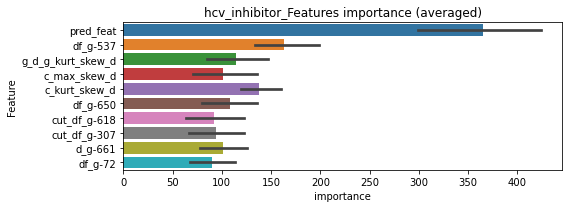

len(train_index) : 2832
len(valid_index) : 945
================================= fold 1/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000530715	valid_1's binary_logloss: 0.00129137
[2000]	training's binary_logloss: 0.000307918	valid_1's binary_logloss: 0.000962387
[3000]	training's binary_logloss: 0.00023636	valid_1's binary_logloss: 0.000839302
Early stopping, best iteration is:
[3626]	training's binary_logloss: 0.000212402	valid_1's binary_logloss: 0.000795703


len(train_index) : 2833
len(valid_index) : 944
================================= fold 2/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000452063	valid_1's binary_logloss: 0.000722359
[2000]	training's binary_logloss: 0.000251304	valid_1's binary_logloss: 0.000403035
[3000]	training's binary_logloss: 0.000184871	valid_1's binary_logloss: 0.000296857
[4000]	training's binary_logloss: 0.000153372	valid_1's binary_logloss: 0.000246456
[5000]	training's binary_logloss: 0.000137253	valid_1's binary_logloss: 0.000220657
[6000]	training's binary_logloss: 0.000126837	valid_1's binary_logloss: 0.000203929
[7000]	training's binary_logloss: 0.0001196	valid_1's binary_logloss: 0.000192303
[8000]	training's binary_logloss: 0.000114667	valid_1's binary_logloss: 0.000184391
[9000]	training's binary_logloss: 0.000111149	valid_1's binary_logloss: 0.000178735
[10000]	training's binary_logloss: 0.00010863	valid_1's binary_logloss: 0.000174704
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.00010863	valid_1'

len(train_index) : 2833
len(valid_index) : 944
================================= fold 3/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2833
len(valid_index) : 944
================================= fold 4/4 hcv_inhibitor=================================


Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000605099	valid_1's binary_logloss: 0.00424035
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000452833	valid_1's binary_logloss: 0.000657471
[2000]	training's binary_logloss: 0.000251505	valid_1's binary_logloss: 0.000366181
[3000]	training's binary_logloss: 0.000184953	valid_1's binary_logloss: 0.000269534
[4000]	training's binary_logloss: 0.000153394	valid_1's binary_logloss: 0.000223663
[5000]	training's binary_logloss: 0.000137295	valid_1's binary_logloss: 0.000200262
[6000]	training's binary_logloss: 0.00012685	valid_1's binary_logloss: 0.00018503
[7000]	training's binary_logloss: 0.000119629	valid_1's binary_logloss: 0.000174507
[8000]	training's binary_logloss: 0.000114653	valid_1's binary_logloss: 0.000167252
[9000]	training's binary_logloss: 0.00011114	valid_1's binary_logloss: 0.000162131
[10000]	training's binary_logloss: 0.000108632	valid_1's binary_loglo

hcv_inhibitor logloss: 0.0013422259184630676


neg labels: 3289 → selected neg labels: 3275


hdac_inhibitor, len(trt): 106, len(othr): 3275
target_rate: 0.0044512 → Adj_target_rate: 0.0044229
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116871	valid_1's binary_logloss: 0.0916657
[600]	training's binary_logloss: 0.00181803	valid_1's binary_logloss: 0.0736633
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.00123889	valid_1's binary_logloss: 0.0724172
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112395	valid_1's binary_logloss: 0.0812377
[600]	training's binary_logloss: 0.00180166	valid_1's binary_logloss: 0.0655107
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.00144729	valid_1's binary_logloss: 0.0650949
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0121829	valid_1's binary_logloss: 0.0765861
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.00228799	valid_1's binary_logloss: 0.0666427
Training until validation scores don't improve for 30 rounds
[300]	training

1 / 3 AUC score:0.993
y_Threshold: 0.0172022, Threshold: 0.1066183, pos_neg_ratio: 0.8000000
Remove_noisy_data: 163 → Positive_corect_labels: 639/3767
p_label_rate: 0.0100452 Vs.target_rate: 0.00445
Num_p_label: 40.0, conf_0:0.07463, conf_1:0.13860
Num_p_label: 40.0, Expected: 17.7, Adj_threshold_1: 0.1066183
Num_p_label: 26.0, Expected: 17.7, Adj_threshold_2: 0.1566183
threshold: 0.1566183, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 639.0/3767, y_label_rate: 0.1696310
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154785	valid_1's binary_logloss: 0.00658444
[600]	training's binary_logloss: 0.000260523	valid_1's binary_logloss: 0.00375338
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000252196	valid_1's binary_logloss: 0.00373536
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156143	valid_1's binary_logloss: 0.00482783
[600]	training's binary_logloss: 0.000260499	valid_1's binary_logloss: 0.00270823
[900]	training's binary_logloss: 0.000180968	valid_1's binary_logloss: 0.00256524
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000181595	valid_1's binary_logloss: 0.00255905
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00155622	valid_1's binary_logloss: 0.00580514
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000372903	valid_1's bina

2 / 3 AUC score:1.000
y_Threshold: 0.4788521, Threshold: 0.1566183, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 634.0/3757
p_label_rate: 0.0685585 Vs.target_rate: 0.00445
Num_p_label: 273.0, conf_0:0.12529, conf_1:0.18794
Num_p_label: 273.0, Expected: 17.7, Adj_threshold_1: 0.1566183
Num_p_label: 272.0, Expected: 17.7, Adj_threshold_2: 0.2066183
Num_p_label: 272.0, Expected: 17.7, Adj_threshold_3: 0.2566183
Num_p_label: 272.0, Expected: 17.7, Adj_threshold_4: 0.3066183
Num_p_label: 272.0, Expected: 17.7, Adj_threshold_5: 0.3566183
Num_p_label: 271.0, Expected: 17.7, Adj_threshold_6: 0.4066183
Num_p_label: 259.0, Expected: 17.7, Adj_threshold_7: 0.4566183
Num_p_label: 240.0, Expected: 17.7, Adj_threshold_8: 0.5066183
Num_p_label: 215.0, Expected: 17.7, Adj_threshold_9: 0.5566183
Num_p_label: 180.0, Expected: 17.7, Adj_threshold_10: 0.6066183
threshold: 0.6566183, positive_p_label: 143.0/3982, p_label_rate: 0.0359116
positive_y_label: 634.0/3757, y_label_rate

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146398	valid_1's binary_logloss: 0.00389264
[600]	training's binary_logloss: 0.000244363	valid_1's binary_logloss: 0.0010404
[900]	training's binary_logloss: 0.000167825	valid_1's binary_logloss: 0.000809647
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000168253	valid_1's binary_logloss: 0.000808479
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00145247	valid_1's binary_logloss: 0.00348966
[600]	training's binary_logloss: 0.000245217	valid_1's binary_logloss: 0.00125214
[900]	training's binary_logloss: 0.000169827	valid_1's binary_logloss: 0.00108138
Early stopping, best iteration is:
[926]	training's binary_logloss: 0.000167574	valid_1's binary_logloss: 0.00106608
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014602	valid_1's binary_logloss: 0.00302939
[600]	traini

3 / 3 AUC score:1.000
y_Threshold: 0.2440367, Threshold: 0.6566183, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 634.0/3757
p_label_rate: 0.0158212 Vs.target_rate: 0.00445
Num_p_label: 63.0, conf_0:0.50000, conf_1:0.72228
Num_p_label: 63.0, Expected: 17.7, Adj_threshold_1: 0.6566183
Num_p_label: 59.0, Expected: 17.7, Adj_threshold_2: 0.7066183
Num_p_label: 56.0, Expected: 17.7, Adj_threshold_3: 0.7566183
threshold: 0.7566183, positive_p_label: 56.0/3982, p_label_rate: 0.0140633


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000285593	valid_1's binary_logloss: 0.00360169


positive_y_label: 634.0/3757, y_label_rate: 0.1687517


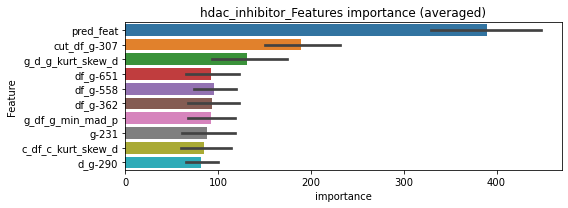

len(train_index) : 2817
len(valid_index) : 940
================================= fold 1/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000584214	valid_1's binary_logloss: 0.00139047
[2000]	training's binary_logloss: 0.000327782	valid_1's binary_logloss: 0.000983768
[3000]	training's binary_logloss: 0.000253321	valid_1's binary_logloss: 0.000844996
Early stopping, best iteration is:
[3223]	training's binary_logloss: 0.000242661	valid_1's binary_logloss: 0.000822962


len(train_index) : 2818
len(valid_index) : 939
================================= fold 2/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000573756	valid_1's binary_logloss: 0.001468
[2000]	training's binary_logloss: 0.000324917	valid_1's binary_logloss: 0.0011138
[3000]	training's binary_logloss: 0.000251829	valid_1's binary_logloss: 0.000992721
[4000]	training's binary_logloss: 0.000216889	valid_1's binary_logloss: 0.000920431
Early stopping, best iteration is:
[4609]	training's binary_logloss: 0.000205052	valid_1's binary_logloss: 0.000896452


len(train_index) : 2818
len(valid_index) : 939
================================= fold 3/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000585121	valid_1's binary_logloss: 0.00111393
[2000]	training's binary_logloss: 0.000330881	valid_1's binary_logloss: 0.000749368
[3000]	training's binary_logloss: 0.000257347	valid_1's binary_logloss: 0.000639595
[4000]	training's binary_logloss: 0.000223561	valid_1's binary_logloss: 0.000581691
[5000]	training's binary_logloss: 0.000205752	valid_1's binary_logloss: 0.000551642
[6000]	training's binary_logloss: 0.000194464	valid_1's binary_logloss: 0.000529075
Early stopping, best iteration is:
[6207]	training's binary_logloss: 0.000192302	valid_1's binary_logloss: 0.000525436


len(train_index) : 2818
len(valid_index) : 939
================================= fold 4/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds


hdac_inhibitor logloss: 0.002625794263087302


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.00113713	valid_1's binary_logloss: 0.00825933
neg labels: 3289 → selected neg labels: 3283


histamine_receptor_agonist, len(trt): 59, len(othr): 3283
target_rate: 0.0024775 → Adj_target_rate: 0.0026880
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00465167	valid_1's binary_logloss: 0.0409443
[600]	training's binary_logloss: 0.000853059	valid_1's binary_logloss: 0.0305427
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000633303	valid_1's binary_logloss: 0.029747
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00515554	valid_1's binary_logloss: 0.0413678
[600]	training's binary_logloss: 0.000892925	valid_1's binary_logloss: 0.0314988
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000779762	valid_1's binary_logloss: 0.0310378
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.005661	valid_1's binary_logloss: 0.0171661
[600]	training's binary_logloss: 0.000960396	valid_1's binary_logloss: 0.0102519
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000745234	valid_1's binary_logloss:

1 / 3 AUC score:1.000
y_Threshold: 0.0059621, Threshold: 0.0163689, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00248
Num_p_label: 40.0, conf_0:0.01146, conf_1:0.02128
Num_p_label: 40.0, Expected: 9.9, Adj_threshold_1: 0.0163689
Num_p_label: 6.0, Expected: 9.9, Adj_threshold_2: 0.0663689
threshold: 0.0663689, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011356	valid_1's binary_logloss: 0.00589253
[600]	training's binary_logloss: 0.000230386	valid_1's binary_logloss: 0.00446607
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000213035	valid_1's binary_logloss: 0.00436919
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011166	valid_1's binary_logloss: 0.00267054
[600]	training's binary_logloss: 0.000235425	valid_1's binary_logloss: 0.00155232
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000209404	valid_1's binary_logloss: 0.00148995
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106832	valid_1's binary_logloss: 0.00514525
[600]	training's binary_logloss: 0.000224866	valid_1's binary_logloss: 0.00399786
[900]	training's binary_logloss: 0.000169413	valid_1's binary_logloss: 0.00390617
Early stopping

2 / 3 AUC score:1.000
y_Threshold: 0.5068182, Threshold: 0.0663689, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3799
p_label_rate: 0.0439478 Vs.target_rate: 0.00248
Num_p_label: 175.0, conf_0:0.05310, conf_1:0.07964
Num_p_label: 175.0, Expected: 9.9, Adj_threshold_1: 0.0663689
Num_p_label: 175.0, Expected: 9.9, Adj_threshold_2: 0.1163689
Num_p_label: 175.0, Expected: 9.9, Adj_threshold_3: 0.1663689
Num_p_label: 175.0, Expected: 9.9, Adj_threshold_4: 0.2163689


Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000177656	valid_1's binary_logloss: 0.000732301


Num_p_label: 174.0, Expected: 9.9, Adj_threshold_5: 0.2663689
Num_p_label: 174.0, Expected: 9.9, Adj_threshold_6: 0.3163689
Num_p_label: 170.0, Expected: 9.9, Adj_threshold_7: 0.3663689
Num_p_label: 161.0, Expected: 9.9, Adj_threshold_8: 0.4163689
Num_p_label: 149.0, Expected: 9.9, Adj_threshold_9: 0.4663689
Num_p_label: 132.0, Expected: 9.9, Adj_threshold_10: 0.5163689
threshold: 0.5663689, positive_p_label: 110.0/3982, p_label_rate: 0.0276243
positive_y_label: 652.0/3799, y_label_rate: 0.1716241
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110165	valid_1's binary_logloss: 0.00523432
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000249222	valid_1's binary_logloss: 0.00376958
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110834	valid_1's binary_logloss: 0.00573562
[600]	training's binary_logloss: 0.000233565	valid_1's binary_logloss: 0.00408516
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000239212	valid_1's binary_logloss: 0.0040768
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011264	valid_1's binary_logloss: 0.00234892
[600]	training's binary_logloss: 0.00023079	valid_1's binary_logloss: 0.0009588
[900]	training's binary_logloss: 0.000176241	valid_1's binary_logloss: 0.000859226
Early stopping, best iteration is:
[959]	training's binary_logloss: 0.000172903	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.4419603, Threshold: 0.5663689, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 649.0/3793
p_label_rate: 0.0052737 Vs.target_rate: 0.00248
Num_p_label: 21.0, conf_0:0.50000, conf_1:0.62301
Num_p_label: 21.0, Expected: 9.9, Adj_threshold_1: 0.5663689
threshold: 0.5663689, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 649.0/3793, y_label_rate: 0.1711047


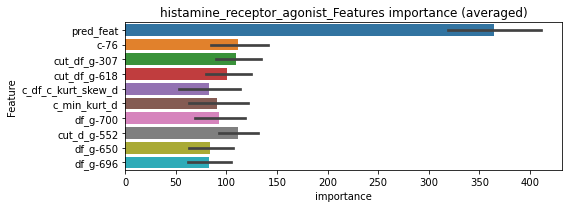

len(train_index) : 2844
len(valid_index) : 949
================================= fold 1/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000547771	valid_1's binary_logloss: 0.00133526
Early stopping, best iteration is:
[1763]	training's binary_logloss: 0.000340401	valid_1's binary_logloss: 0.00103283


len(train_index) : 2845
len(valid_index) : 948
================================= fold 2/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00055515	valid_1's binary_logloss: 0.00509785
Early stopping, best iteration is:
[1186]	training's binary_logloss: 0.000478209	valid_1's binary_logloss: 0.00501313


len(train_index) : 2845
len(valid_index) : 948
================================= fold 3/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000553846	valid_1's binary_logloss: 0.000931912
[2000]	training's binary_logloss: 0.000316099	valid_1's binary_logloss: 0.000642163
[3000]	training's binary_logloss: 0.000245646	valid_1's binary_logloss: 0.000549865
[4000]	training's binary_logloss: 0.000215002	valid_1's binary_logloss: 0.000505635
Early stopping, best iteration is:
[4223]	training's binary_logloss: 0.000210778	valid_1's binary_logloss: 0.000499297


len(train_index) : 2845
len(valid_index) : 948
================================= fold 4/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000556319	valid_1's binary_logloss: 0.00278528
Early stopping, best iteration is:
[1437]	training's binary_logloss: 0.000401869	valid_1's binary_logloss: 0.00263262


histamine_receptor_agonist logloss: 0.002294434980044545


neg labels: 3289 → selected neg labels: 3255


histamine_receptor_antagonist, len(trt): 241, len(othr): 3255
target_rate: 0.0101201 → Adj_target_rate: 0.0088902
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0313174	valid_1's binary_logloss: 0.210434
Early stopping, best iteration is:
[363]	training's binary_logloss: 0.0208634	valid_1's binary_logloss: 0.207791
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0277041	valid_1's binary_logloss: 0.218953
Early stopping, best iteration is:
[366]	training's binary_logloss: 0.0173596	valid_1's binary_logloss: 0.216542
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0301802	valid_1's binary_logloss: 0.168778
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.0111342	valid_1's binary_logloss: 0.163934
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0331071	valid_1's binary_logloss: 0.166326


1 / 3 AUC score:0.945
y_Threshold: 0.0575930, Threshold: 0.3425569, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[443]	training's binary_logloss: 0.013093	valid_1's binary_logloss: 0.157558


Remove_noisy_data: 321 → Positive_corect_labels: 556/3585
p_label_rate: 0.0100452 Vs.target_rate: 0.01012
Num_p_label: 40.0, conf_0:0.23979, conf_1:0.44532
threshold: 0.3425569, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 556.0/3585, y_label_rate: 0.1550907
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00178459	valid_1's binary_logloss: 0.00785549
[600]	training's binary_logloss: 0.000271063	valid_1's binary_logloss: 0.00409302
[900]	training's binary_logloss: 0.000181915	valid_1's binary_logloss: 0.00379303
Early stopping, best iteration is:
[992]	training's binary_logloss: 0.000174254	valid_1's binary_logloss: 0.00375719
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174329	valid_1's binary_logloss: 0.00644945
[600]	training's binary_logloss: 0.000268163	valid_1's binary_logloss: 0.00268325
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000232225	valid_1's binary_logloss: 0.0025815
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0018317	valid_1's binary_logloss: 0.00472027
[600]	training's binary_logloss: 0.000274735	valid_1's binary_logloss: 0.00174566
Early stopping

2 / 3 AUC score:1.000
y_Threshold: 0.6315413, Threshold: 0.3425569, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 554.0/3581
p_label_rate: 0.0911602 Vs.target_rate: 0.01012
Num_p_label: 363.0, conf_0:0.27405, conf_1:0.41107
Num_p_label: 363.0, Expected: 40.3, Adj_threshold_1: 0.3425569
Num_p_label: 363.0, Expected: 40.3, Adj_threshold_2: 0.3925569
Num_p_label: 363.0, Expected: 40.3, Adj_threshold_3: 0.4425569
Num_p_label: 361.0, Expected: 40.3, Adj_threshold_4: 0.4925569
Num_p_label: 358.0, Expected: 40.3, Adj_threshold_5: 0.5425569
Num_p_label: 355.0, Expected: 40.3, Adj_threshold_6: 0.5925569
Num_p_label: 341.0, Expected: 40.3, Adj_threshold_7: 0.6425569
Num_p_label: 333.0, Expected: 40.3, Adj_threshold_8: 0.6925569
Num_p_label: 309.0, Expected: 40.3, Adj_threshold_9: 0.7425569
Num_p_label: 291.0, Expected: 40.3, Adj_threshold_10: 0.7925569
threshold: 0.7925569, positive_p_label: 291.0/3982, p_label_rate: 0.0730789
positive_y_label: 554.0/3581, y_label_rate:

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00179443	valid_1's binary_logloss: 0.00937417
[600]	training's binary_logloss: 0.000278875	valid_1's binary_logloss: 0.00498597
[900]	training's binary_logloss: 0.000185151	valid_1's binary_logloss: 0.00457181
Early stopping, best iteration is:
[977]	training's binary_logloss: 0.000180394	valid_1's binary_logloss: 0.00454843
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00188389	valid_1's binary_logloss: 0.0052391
[600]	training's binary_logloss: 0.000286036	valid_1's binary_logloss: 0.00225474
[900]	training's binary_logloss: 0.000188819	valid_1's binary_logloss: 0.00200924
Early stopping, best iteration is:
[1050]	training's binary_logloss: 0.000179199	valid_1's binary_logloss: 0.00197853
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00187528	valid_1's binary_logloss: 0.00510129
[600]	traini

3 / 3 AUC score:1.000
y_Threshold: 0.5287156, Threshold: 0.7925569, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 552.0/3577
p_label_rate: 0.0693119 Vs.target_rate: 0.01012
Num_p_label: 276.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 276.0, Expected: 40.3, Adj_threshold_1: 0.7925569
threshold: 0.7925569, positive_p_label: 276.0/3982, p_label_rate: 0.0693119
positive_y_label: 552.0/3577, y_label_rate: 0.1543193


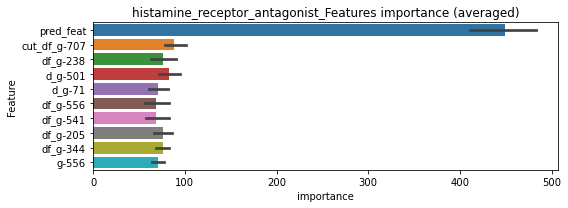

len(train_index) : 2682
len(valid_index) : 895
================================= fold 1/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000627913	valid_1's binary_logloss: 0.0039681
[2000]	training's binary_logloss: 0.000349194	valid_1's binary_logloss: 0.00333737
[3000]	training's binary_logloss: 0.000268287	valid_1's binary_logloss: 0.00313989
[4000]	training's binary_logloss: 0.000231431	valid_1's binary_logloss: 0.00303363
Early stopping, best iteration is:
[4204]	training's binary_logloss: 0.000226892	valid_1's binary_logloss: 0.00301974


len(train_index) : 2683
len(valid_index) : 894
================================= fold 2/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000697709	valid_1's binary_logloss: 0.00513549


len(train_index) : 2683
len(valid_index) : 894
================================= fold 3/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000620714	valid_1's binary_logloss: 0.00355484
[2000]	training's binary_logloss: 0.000349792	valid_1's binary_logloss: 0.00306322
Early stopping, best iteration is:
[2427]	training's binary_logloss: 0.000306659	valid_1's binary_logloss: 0.00297406


len(train_index) : 2683
len(valid_index) : 894
================================= fold 4/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000622475	valid_1's binary_logloss: 0.00128939
[2000]	training's binary_logloss: 0.00035053	valid_1's binary_logloss: 0.000858408
[3000]	training's binary_logloss: 0.000270633	valid_1's binary_logloss: 0.000711792
[4000]	training's binary_logloss: 0.000234123	valid_1's binary_logloss: 0.000645997
Early stopping, best iteration is:
[4272]	training's binary_logloss: 0.000228662	valid_1's binary_logloss: 0.000637509


histamine_receptor_antagonist logloss: 0.0029425303322878713


neg labels: 3289 → selected neg labels: 3283


histone_lysine_demethylase_inhibitor, len(trt): 24, len(othr): 3283
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0020672	valid_1's binary_logloss: 0.00569007
[600]	training's binary_logloss: 0.000480272	valid_1's binary_logloss: 0.00209788
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000452771	valid_1's binary_logloss: 0.00204359
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00213379	valid_1's binary_logloss: 0.00794963
[600]	training's binary_logloss: 0.000487922	valid_1's binary_logloss: 0.00392942
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000455572	valid_1's binary_logloss: 0.00381397
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00211596	valid_1's binary_logloss: 0.00487038
[600]	training's binary_logloss: 0.000479557	valid_1's binary_logloss: 0.00183154
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000449555	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0026627, Threshold: 0.0441987, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.03094, conf_1:0.05746
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0441987
Num_p_label: 32.0, Expected: 4.0, Adj_threshold_2: 0.0941987
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_3: 0.1441987
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_4: 0.1941987
Num_p_label: 14.0, Expected: 4.0, Adj_threshold_5: 0.2441987
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_6: 0.2941987
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_7: 0.3441987
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_8: 0.3941987
threshold: 0.3941987, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000740615	valid_1's binary_logloss: 0.00223031
[600]	training's binary_logloss: 0.000197703	valid_1's binary_logloss: 0.00169672
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000167793	valid_1's binary_logloss: 0.00163266
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000741912	valid_1's binary_logloss: 0.00273998
Early stopping, best iteration is:
[396]	training's binary_logloss: 0.000354002	valid_1's binary_logloss: 0.00228059
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000770461	valid_1's binary_logloss: 0.0012417
[600]	training's binary_logloss: 0.000202137	valid_1's binary_logloss: 0.000547738
[900]	training's binary_logloss: 0.000163625	valid_1's binary_logloss: 0.000496008
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000163909	valid_1's 

2 / 3 AUC score:1.000
y_Threshold: 0.6918480, Threshold: 0.3941987, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0509794 Vs.target_rate: 0.00101
Num_p_label: 203.0, conf_0:0.31536, conf_1:0.47304
Num_p_label: 203.0, Expected: 4.0, Adj_threshold_1: 0.3941987
Num_p_label: 176.0, Expected: 4.0, Adj_threshold_2: 0.4441987
Num_p_label: 151.0, Expected: 4.0, Adj_threshold_3: 0.4941987


[600]	training's binary_logloss: 0.000194564	valid_1's binary_logloss: 0.000944565
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000186503	valid_1's binary_logloss: 0.000924529


Num_p_label: 119.0, Expected: 4.0, Adj_threshold_4: 0.5441987
Num_p_label: 99.0, Expected: 4.0, Adj_threshold_5: 0.5941987
Num_p_label: 78.0, Expected: 4.0, Adj_threshold_6: 0.6441987
Num_p_label: 65.0, Expected: 4.0, Adj_threshold_7: 0.6941987
Num_p_label: 54.0, Expected: 4.0, Adj_threshold_8: 0.7441987
Num_p_label: 44.0, Expected: 4.0, Adj_threshold_9: 0.7941987
threshold: 0.7941987, positive_p_label: 44.0/3982, p_label_rate: 0.0110497
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000738141	valid_1's binary_logloss: 0.0021253
Early stopping, best iteration is:
[418]	training's binary_logloss: 0.000325173	valid_1's binary_logloss: 0.00168514
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[265]	training's binary_logloss: 0.00109885	valid_1's binary_logloss: 0.0196926
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000769068	valid_1's binary_logloss: 0.000860691
[600]	training's binary_logloss: 0.000202166	valid_1's binary_logloss: 0.000193444
[900]	training's binary_logloss: 0.000163622	valid_1's binary_logloss: 0.000140976
Early stopping, best iteration is:
[957]	training's binary_logloss: 0.000160964	valid_1's binary_logloss: 0.000137392
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000749153	valid_1's binary_logloss: 0.001

3 / 3 AUC score:1.000
y_Threshold: 0.6772784, Threshold: 0.7941987, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.7941987
threshold: 0.7941987, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000167952	valid_1's binary_logloss: 0.000761507


positive_y_label: 656.0/3807, y_label_rate: 0.1723142


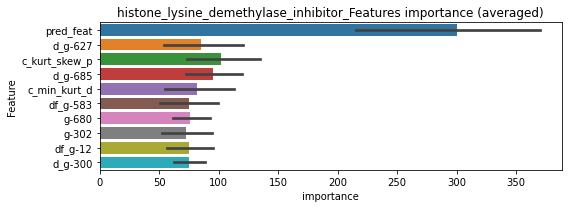

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000485299	valid_1's binary_logloss: 0.00129565
[2000]	training's binary_logloss: 0.000287124	valid_1's binary_logloss: 0.00107133
[3000]	training's binary_logloss: 0.000231624	valid_1's binary_logloss: 0.00100547
[4000]	training's binary_logloss: 0.000205061	valid_1's binary_logloss: 0.000976677
Early stopping, best iteration is:
[4075]	training's binary_logloss: 0.000203841	valid_1's binary_logloss: 0.000975762


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 histone_lysine_demethylase_inhibitor=================================


Early stopping, best iteration is:
[144]	training's binary_logloss: 0.00452872	valid_1's binary_logloss: 0.0593925
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000480671	valid_1's binary_logloss: 0.000483927
[2000]	training's binary_logloss: 0.000287519	valid_1's binary_logloss: 0.000273635
[3000]	training's binary_logloss: 0.000232114	valid_1's binary_logloss: 0.000209812
[4000]	training's binary_logloss: 0.000205855	valid_1's binary_logloss: 0.00017872
[5000]	training's binary_logloss: 0.000191845	valid_1's binary_logloss: 0.000162253
[6000]	training's binary_logloss: 0.000182513	valid_1's binary_logloss: 0.000151395
[7000]	training's binary_logloss: 0.000175559	valid_1's binary_logloss: 0.00014357
[8000]	training's binary_logloss: 0.00017067	valid_1's binary_logloss: 0.000138062
Early stopping, best iteration is:
[8851]	training's binary_logloss: 0.00016717	valid_1's binary_logloss: 0.000134192


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000517354	valid_1's binary_logloss: 0.00173048


histone_lysine_demethylase_inhibitor logloss: 0.015561883200327085


neg labels: 3289 → selected neg labels: 3284


histone_lysine_methyltransferase_inhibitor, len(trt): 32, len(othr): 3284
target_rate: 0.0013437 → Adj_target_rate: 0.0015980
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00229448	valid_1's binary_logloss: 0.0110182
[600]	training's binary_logloss: 0.000502811	valid_1's binary_logloss: 0.00687581
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000482704	valid_1's binary_logloss: 0.00680575
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00238295	valid_1's binary_logloss: 0.00852924
[600]	training's binary_logloss: 0.000513924	valid_1's binary_logloss: 0.00528313
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.00046245	valid_1's binary_logloss: 0.00518635
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00248895	valid_1's binary_logloss: 0.00489415
[600]	training's binary_logloss: 0.00052537	valid_1's binary_logloss: 0.00145432
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.0004679	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0033643, Threshold: 0.0121128, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00134
Num_p_label: 40.0, conf_0:0.00848, conf_1:0.01575
Num_p_label: 40.0, Expected: 5.4, Adj_threshold_1: 0.0121128


Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000558505	valid_1's binary_logloss: 0.0156092


Num_p_label: 7.0, Expected: 5.4, Adj_threshold_2: 0.0621128
threshold: 0.0621128, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000810629	valid_1's binary_logloss: 0.00300636
Early stopping, best iteration is:
[334]	training's binary_logloss: 0.000586435	valid_1's binary_logloss: 0.00271419
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000802015	valid_1's binary_logloss: 0.00212349
[600]	training's binary_logloss: 0.000209049	valid_1's binary_logloss: 0.00133417
[900]	training's binary_logloss: 0.000168475	valid_1's binary_logloss: 0.00126762
Early stopping, best iteration is:
[973]	training's binary_logloss: 0.000163476	valid_1's binary_logloss: 0.0012607
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000798268	valid_1's binary_logloss: 0.00218257
[600]	training's binary_logloss: 0.000208805	valid_1's binary_logloss: 0.00129957
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000201635	valid_1's bi

2 / 3 AUC score:1.000
y_Threshold: 0.5950008, Threshold: 0.0621128, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0436966 Vs.target_rate: 0.00134
Num_p_label: 174.0, conf_0:0.04969, conf_1:0.07454
Num_p_label: 174.0, Expected: 5.4, Adj_threshold_1: 0.0621128
Num_p_label: 173.0, Expected: 5.4, Adj_threshold_2: 0.1121128
Num_p_label: 172.0, Expected: 5.4, Adj_threshold_3: 0.1621128
Num_p_label: 171.0, Expected: 5.4, Adj_threshold_4: 0.2121128
Num_p_label: 170.0, Expected: 5.4, Adj_threshold_5: 0.2621128
Num_p_label: 168.0, Expected: 5.4, Adj_threshold_6: 0.3121128
Num_p_label: 163.0, Expected: 5.4, Adj_threshold_7: 0.3621128
Num_p_label: 148.0, Expected: 5.4, Adj_threshold_8: 0.4121128
Num_p_label: 131.0, Expected: 5.4, Adj_threshold_9: 0.4621128
Num_p_label: 103.0, Expected: 5.4, Adj_threshold_10: 0.5121128


[600]	training's binary_logloss: 0.000198409	valid_1's binary_logloss: 0.00300638
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000203111	valid_1's binary_logloss: 0.00300028


threshold: 0.5621128, positive_p_label: 81.0/3982, p_label_rate: 0.0203415
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000796047	valid_1's binary_logloss: 0.00187349
[600]	training's binary_logloss: 0.000208482	valid_1's binary_logloss: 0.0011583
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000195097	valid_1's binary_logloss: 0.00113116
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00080317	valid_1's binary_logloss: 0.00310111
Early stopping, best iteration is:
[382]	training's binary_logloss: 0.000406751	valid_1's binary_logloss: 0.00266535
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000794154	valid_1's binary_logloss: 0.00295543
Early stopping, best iteration is:
[390]	training's binary_logloss: 0.000382281	valid_1's binary_logloss: 0.00220674
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000784136	valid_1's binary_logloss: 0.002858

3 / 3 AUC score:1.000
y_Threshold: 0.5050759, Threshold: 0.5621128, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0133099 Vs.target_rate: 0.00134
Num_p_label: 53.0, conf_0:0.50000, conf_1:0.61832
Num_p_label: 53.0, Expected: 5.4, Adj_threshold_1: 0.5621128
Num_p_label: 36.0, Expected: 5.4, Adj_threshold_2: 0.6121128
Num_p_label: 19.0, Expected: 5.4, Adj_threshold_3: 0.6621128
Num_p_label: 12.0, Expected: 5.4, Adj_threshold_4: 0.7121128
threshold: 0.7121128, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


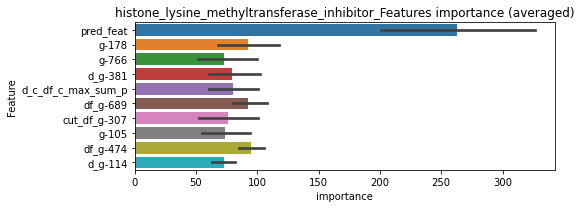

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000502073	valid_1's binary_logloss: 0.00292213
Early stopping, best iteration is:
[1513]	training's binary_logloss: 0.000353017	valid_1's binary_logloss: 0.00269062


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000500671	valid_1's binary_logloss: 0.00227621
Early stopping, best iteration is:
[1471]	training's binary_logloss: 0.000362346	valid_1's binary_logloss: 0.00208307


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 histone_lysine_methyltransferase_inhibitor=================================


Early stopping, best iteration is:
[716]	training's binary_logloss: 0.00069099	valid_1's binary_logloss: 0.0022718
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000499831	valid_1's binary_logloss: 0.00228878
Early stopping, best iteration is:
[1353]	training's binary_logloss: 0.000385328	valid_1's binary_logloss: 0.00218892


histone_lysine_methyltransferase_inhibitor logloss: 0.002308710111665812


neg labels: 3289 → selected neg labels: 3280


hiv_inhibitor, len(trt): 72, len(othr): 3280
target_rate: 0.0030234 → Adj_target_rate: 0.0031837
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00620017	valid_1's binary_logloss: 0.0563607
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.00159299	valid_1's binary_logloss: 0.0494642
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00686009	valid_1's binary_logloss: 0.0301445
[600]	training's binary_logloss: 0.00116951	valid_1's binary_logloss: 0.0167202
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000828876	valid_1's binary_logloss: 0.0155394
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00708749	valid_1's binary_logloss: 0.0237912
[600]	training's binary_logloss: 0.00118639	valid_1's binary_logloss: 0.012003
[900]	training's binary_logloss: 0.000724303	valid_1's binary_logloss: 0.0110216
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.00072533	valid_1's binary_logloss: 0

1 / 3 AUC score:0.999
y_Threshold: 0.0088424, Threshold: 0.0946232, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, conf_0:0.06624, conf_1:0.12301
Num_p_label: 40.0, Expected: 12.0, Adj_threshold_1: 0.0946232
Num_p_label: 24.0, Expected: 12.0, Adj_threshold_2: 0.1446232
Num_p_label: 20.0, Expected: 12.0, Adj_threshold_3: 0.1946232
Num_p_label: 16.0, Expected: 12.0, Adj_threshold_4: 0.2446232
threshold: 0.2446232, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128625	valid_1's binary_logloss: 0.00724526
Early stopping, best iteration is:
[434]	training's binary_logloss: 0.000444584	valid_1's binary_logloss: 0.00541994
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128787	valid_1's binary_logloss: 0.00778906
Early stopping, best iteration is:
[466]	training's binary_logloss: 0.000359148	valid_1's binary_logloss: 0.00635397
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00129011	valid_1's binary_logloss: 0.00249632
[600]	training's binary_logloss: 0.00024101	valid_1's binary_logloss: 0.00068693
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.00019211	valid_1's binary_logloss: 0.000589762
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127867	valid_1's binary_logloss: 0.00489449


2 / 3 AUC score:1.000
y_Threshold: 0.5528986, Threshold: 0.2446232, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0763435 Vs.target_rate: 0.00302
Num_p_label: 304.0, conf_0:0.19570, conf_1:0.29355
Num_p_label: 304.0, Expected: 12.0, Adj_threshold_1: 0.2446232
Num_p_label: 304.0, Expected: 12.0, Adj_threshold_2: 0.2946232
Num_p_label: 304.0, Expected: 12.0, Adj_threshold_3: 0.3446232
Num_p_label: 303.0, Expected: 12.0, Adj_threshold_4: 0.3946232
Num_p_label: 297.0, Expected: 12.0, Adj_threshold_5: 0.4446232
Num_p_label: 282.0, Expected: 12.0, Adj_threshold_6: 0.4946232
Num_p_label: 247.0, Expected: 12.0, Adj_threshold_7: 0.5446232
Num_p_label: 208.0, Expected: 12.0, Adj_threshold_8: 0.5946232
Num_p_label: 174.0, Expected: 12.0, Adj_threshold_9: 0.6446232
Num_p_label: 125.0, Expected: 12.0, Adj_threshold_10: 0.6946232
threshold: 0.7446232, positive_p_label: 96.0/3982, p_label_rate: 0.0241085
positive_y_label: 650.0/3792, y_label_rate: 

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126729	valid_1's binary_logloss: 0.00323475
[600]	training's binary_logloss: 0.000242603	valid_1's binary_logloss: 0.00139976
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000208367	valid_1's binary_logloss: 0.00127435
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125749	valid_1's binary_logloss: 0.00668413
Early stopping, best iteration is:
[352]	training's binary_logloss: 0.00074017	valid_1's binary_logloss: 0.00580768
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012625	valid_1's binary_logloss: 0.00321151
[600]	training's binary_logloss: 0.000243283	valid_1's binary_logloss: 0.00185639
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000220009	valid_1's binary_logloss: 0.00179092
Training until validation scores don't improve for 30 rounds


3 / 3 AUC score:1.000
y_Threshold: 0.3080789, Threshold: 0.7446232, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 648.0/3788
p_label_rate: 0.0311401 Vs.target_rate: 0.00302
Num_p_label: 124.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 124.0, Expected: 12.0, Adj_threshold_1: 0.7446232
Num_p_label: 120.0, Expected: 12.0, Adj_threshold_2: 0.7946232
threshold: 0.7946232, positive_p_label: 120.0/3982, p_label_rate: 0.0301356
positive_y_label: 648.0/3788, y_label_rate: 0.1710665


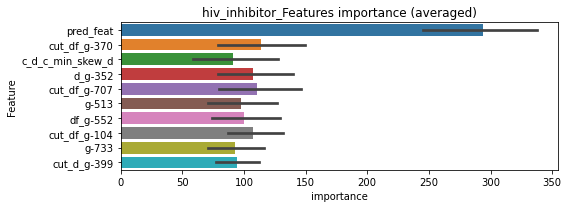

len(train_index) : 2841
len(valid_index) : 947
================================= fold 1/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000553576	valid_1's binary_logloss: 0.000796036
[2000]	training's binary_logloss: 0.000315793	valid_1's binary_logloss: 0.00044918
[3000]	training's binary_logloss: 0.000246183	valid_1's binary_logloss: 0.000339566
[4000]	training's binary_logloss: 0.000212686	valid_1's binary_logloss: 0.000285789
[5000]	training's binary_logloss: 0.000195405	valid_1's binary_logloss: 0.000258088
[6000]	training's binary_logloss: 0.000183855	valid_1's binary_logloss: 0.000239743
[7000]	training's binary_logloss: 0.000175638	valid_1's binary_logloss: 0.000227188
Early stopping, best iteration is:
[7118]	training's binary_logloss: 0.000174897	valid_1's binary_logloss: 0.000226136


len(train_index) : 2841
len(valid_index) : 947
================================= fold 2/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2841
len(valid_index) : 947
================================= fold 3/4 hiv_inhibitor=================================


Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000788499	valid_1's binary_logloss: 0.0077838
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000542831	valid_1's binary_logloss: 0.00110156
[2000]	training's binary_logloss: 0.000314592	valid_1's binary_logloss: 0.000824791
Early stopping, best iteration is:
[2071]	training's binary_logloss: 0.000308751	valid_1's binary_logloss: 0.000816273


len(train_index) : 2841
len(valid_index) : 947
================================= fold 4/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000556661	valid_1's binary_logloss: 0.00112343
[2000]	training's binary_logloss: 0.000315341	valid_1's binary_logloss: 0.000818745
[3000]	training's binary_logloss: 0.000246264	valid_1's binary_logloss: 0.000733795
Early stopping, best iteration is:
[3493]	training's binary_logloss: 0.00022652	valid_1's binary_logloss: 0.00070494


hiv_inhibitor logloss: 0.0023831436103081667


neg labels: 3289 → selected neg labels: 3246


hmgcr_inhibitor, len(trt): 283, len(othr): 3246
target_rate: 0.0118838 → Adj_target_rate: 0.0101910
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0469285	valid_1's binary_logloss: 0.236172
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.019032	valid_1's binary_logloss: 0.223888
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0458431	valid_1's binary_logloss: 0.270033
Early stopping, best iteration is:
[338]	training's binary_logloss: 0.0358433	valid_1's binary_logloss: 0.267778
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0486959	valid_1's binary_logloss: 0.245034
Early stopping, best iteration is:
[339]	training's binary_logloss: 0.0383049	valid_1's binary_logloss: 0.239023
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0485096	valid_1's binary_logloss: 0.244216


1 / 3 AUC score:0.906
y_Threshold: 0.0935281, Threshold: 0.4183464, pos_neg_ratio: 0.8000000
Remove_noisy_data: 416 → Positive_corect_labels: 506/3479
p_label_rate: 0.0100452 Vs.target_rate: 0.01188
Num_p_label: 40.0, conf_0:0.29284, conf_1:0.54385


Early stopping, best iteration is:
[423]	training's binary_logloss: 0.0221616	valid_1's binary_logloss: 0.233282


threshold: 0.4183464, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 506.0/3479, y_label_rate: 0.1454441
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0020153	valid_1's binary_logloss: 0.00691105
[600]	training's binary_logloss: 0.000268287	valid_1's binary_logloss: 0.00219788
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000207037	valid_1's binary_logloss: 0.00202463
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00204027	valid_1's binary_logloss: 0.00492829
[600]	training's binary_logloss: 0.000268317	valid_1's binary_logloss: 0.000710442
[900]	training's binary_logloss: 0.00017363	valid_1's binary_logloss: 0.00045349
Early stopping, best iteration is:
[965]	training's binary_logloss: 0.000167986	valid_1's binary_logloss: 0.000436005
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00182368	valid_1's binary_logloss: 0.00401231
[600]	training's binary_logloss: 0.000210159	valid_1's binary_logloss: 0.000493649
[900]	train

2 / 3 AUC score:1.000
y_Threshold: 0.0806969, Threshold: 0.4183464, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 506.0/3479
p_label_rate: 0.0931693 Vs.target_rate: 0.01188
Num_p_label: 371.0, conf_0:0.33468, conf_1:0.50202
Num_p_label: 371.0, Expected: 47.3, Adj_threshold_1: 0.4183464
Num_p_label: 369.0, Expected: 47.3, Adj_threshold_2: 0.4683464
Num_p_label: 369.0, Expected: 47.3, Adj_threshold_3: 0.5183464
Num_p_label: 369.0, Expected: 47.3, Adj_threshold_4: 0.5683464
Num_p_label: 369.0, Expected: 47.3, Adj_threshold_5: 0.6183464
Num_p_label: 369.0, Expected: 47.3, Adj_threshold_6: 0.6683464
Num_p_label: 368.0, Expected: 47.3, Adj_threshold_7: 0.7183464
Num_p_label: 368.0, Expected: 47.3, Adj_threshold_8: 0.7683464


Early stopping, best iteration is:
[1365]	training's binary_logloss: 0.000109538	valid_1's binary_logloss: 0.000291654


threshold: 0.7683464, positive_p_label: 368.0/3982, p_label_rate: 0.0924159
positive_y_label: 506.0/3479, y_label_rate: 0.1454441
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00201912	valid_1's binary_logloss: 0.0179439
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000456975	valid_1's binary_logloss: 0.0150064
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00208364	valid_1's binary_logloss: 0.00549802
[600]	training's binary_logloss: 0.000272282	valid_1's binary_logloss: 0.00155096
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000174735	valid_1's binary_logloss: 0.00126838
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00182368	valid_1's binary_logloss: 0.00401231
[600]	training's binary_logloss: 0.000210159	valid_1's binary_logloss: 0.000493649
[900]	training's binary_logloss: 0.000120112	valid_1's binary_logloss: 0.000283036
[1200]	training's binary_logloss: 0.000110962	valid_1's binary_logloss: 0.000261604
Early stop

3 / 3 AUC score:1.000
y_Threshold: 0.6269304, Threshold: 0.7683464, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 503.0/3473
p_label_rate: 0.0934204 Vs.target_rate: 0.01188
Num_p_label: 372.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 372.0, Expected: 47.3, Adj_threshold_1: 0.7683464
threshold: 0.7683464, positive_p_label: 372.0/3982, p_label_rate: 0.0934204
positive_y_label: 503.0/3473, y_label_rate: 0.1448316


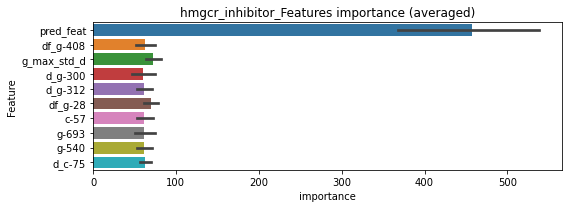

len(train_index) : 2604
len(valid_index) : 869
================================= fold 1/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000651445	valid_1's binary_logloss: 0.00138387
[2000]	training's binary_logloss: 0.000362779	valid_1's binary_logloss: 0.000842774
[3000]	training's binary_logloss: 0.00027813	valid_1's binary_logloss: 0.00066697
[4000]	training's binary_logloss: 0.000239872	valid_1's binary_logloss: 0.000584659
[5000]	training's binary_logloss: 0.000220424	valid_1's binary_logloss: 0.000546027
[6000]	training's binary_logloss: 0.000207661	valid_1's binary_logloss: 0.00051929
[7000]	training's binary_logloss: 0.000198047	valid_1's binary_logloss: 0.00049802
[8000]	training's binary_logloss: 0.000191421	valid_1's binary_logloss: 0.000483928
Early stopping, best iteration is:
[8303]	training's binary_logloss: 0.00018943	valid_1's binary_logloss: 0.000479228


len(train_index) : 2605
len(valid_index) : 868
================================= fold 2/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00064981	valid_1's binary_logloss: 0.00113733
[2000]	training's binary_logloss: 0.000361835	valid_1's binary_logloss: 0.000675994
[3000]	training's binary_logloss: 0.000276999	valid_1's binary_logloss: 0.000529714
[4000]	training's binary_logloss: 0.000238313	valid_1's binary_logloss: 0.000458394
[5000]	training's binary_logloss: 0.000218491	valid_1's binary_logloss: 0.000425019
Early stopping, best iteration is:
[5536]	training's binary_logloss: 0.000211015	valid_1's binary_logloss: 0.000412063


len(train_index) : 2605
len(valid_index) : 868
================================= fold 3/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000645984	valid_1's binary_logloss: 0.00734381
Early stopping, best iteration is:
[1664]	training's binary_logloss: 0.000411542	valid_1's binary_logloss: 0.00697902


len(train_index) : 2605
len(valid_index) : 868
================================= fold 4/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000624999	valid_1's binary_logloss: 0.0042966
[2000]	training's binary_logloss: 0.000351811	valid_1's binary_logloss: 0.00388072
Early stopping, best iteration is:
[2130]	training's binary_logloss: 0.000338472	valid_1's binary_logloss: 0.00385732


hmgcr_inhibitor logloss: 0.002931713523038328


neg labels: 3289 → selected neg labels: 3272


hsp_inhibitor, len(trt): 93, len(othr): 3272
target_rate: 0.0039053 → Adj_target_rate: 0.0039574
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107437	valid_1's binary_logloss: 0.0677243
[600]	training's binary_logloss: 0.00162492	valid_1's binary_logloss: 0.0526576
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00174628	valid_1's binary_logloss: 0.0524429
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010402	valid_1's binary_logloss: 0.0478058
[600]	training's binary_logloss: 0.00164837	valid_1's binary_logloss: 0.0282087
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000929475	valid_1's binary_logloss: 0.0260452
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104337	valid_1's binary_logloss: 0.0416973
[600]	training's binary_logloss: 0.00166343	valid_1's binary_logloss: 0.0223837
[900]	training's binary_logloss: 0.000875961	valid_1's binary_logloss: 0.019658
Early stopping, best iteration

1 / 3 AUC score:0.998
y_Threshold: 0.0148598, Threshold: 0.1704364, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 649/3784
p_label_rate: 0.0100452 Vs.target_rate: 0.00391
Num_p_label: 40.0, conf_0:0.11931, conf_1:0.22157
Num_p_label: 40.0, Expected: 15.6, Adj_threshold_1: 0.1704364
Num_p_label: 30.0, Expected: 15.6, Adj_threshold_2: 0.2204364
Num_p_label: 26.0, Expected: 15.6, Adj_threshold_3: 0.2704364
Num_p_label: 20.0, Expected: 15.6, Adj_threshold_4: 0.3204364
threshold: 0.3204364, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 649.0/3784, y_label_rate: 0.1715116
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013939	valid_1's binary_logloss: 0.00540338
[600]	training's binary_logloss: 0.000236385	valid_1's binary_logloss: 0.00315749
[900]	training's binary_logloss: 0.000164815	valid_1's binary_logloss: 0.00298488
Early stopping, best iteration is:
[992]	training's binary_logloss: 0.000159178	valid_1's binary_logloss: 0.00296328
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148094	valid_1's binary_logloss: 0.00493002
[600]	training's binary_logloss: 0.000250836	valid_1's binary_logloss: 0.00278783
[900]	training's binary_logloss: 0.000175868	valid_1's binary_logloss: 0.00264677
Early stopping, best iteration is:
[876]	training's binary_logloss: 0.000178152	valid_1's binary_logloss: 0.00264288
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144928	valid_1's binary_logloss: 0.00488226
[600]	trainin

2 / 3 AUC score:1.000
y_Threshold: 0.1742322, Threshold: 0.3204364, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 647.0/3780
p_label_rate: 0.0494726 Vs.target_rate: 0.00391


[600]	training's binary_logloss: 0.00024948	valid_1's binary_logloss: 0.00245712
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000230876	valid_1's binary_logloss: 0.00243484


Num_p_label: 197.0, conf_0:0.25635, conf_1:0.38452
Num_p_label: 197.0, Expected: 15.6, Adj_threshold_1: 0.3204364
Num_p_label: 175.0, Expected: 15.6, Adj_threshold_2: 0.3704364
Num_p_label: 170.0, Expected: 15.6, Adj_threshold_3: 0.4204364
Num_p_label: 167.0, Expected: 15.6, Adj_threshold_4: 0.4704364
Num_p_label: 167.0, Expected: 15.6, Adj_threshold_5: 0.5204364
Num_p_label: 165.0, Expected: 15.6, Adj_threshold_6: 0.5704364
Num_p_label: 162.0, Expected: 15.6, Adj_threshold_7: 0.6204364
Num_p_label: 159.0, Expected: 15.6, Adj_threshold_8: 0.6704364
Num_p_label: 159.0, Expected: 15.6, Adj_threshold_9: 0.7204364
Num_p_label: 159.0, Expected: 15.6, Adj_threshold_10: 0.7704364
threshold: 0.7704364, positive_p_label: 159.0/3982, p_label_rate: 0.0399297
positive_y_label: 647.0/3780, y_label_rate: 0.1711640
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138518	valid_1's binary_logloss: 0.00812405
[600]	training's binary_logloss: 0.000227987	valid_1's binary_logloss: 0.00608582
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000232626	valid_1's binary_logloss: 0.00606775
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013854	valid_1's binary_logloss: 0.00330477
[600]	training's binary_logloss: 0.000226956	valid_1's binary_logloss: 0.000691981
[900]	training's binary_logloss: 0.000159215	valid_1's binary_logloss: 0.000501515
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000157896	valid_1's binary_logloss: 0.000497048
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00143014	valid_1's binary_logloss: 0.00505419
[600]	training's binary_logloss: 0.000230271	valid_1's binary_logloss: 0.0034149
Early stopp

3 / 3 AUC score:1.000
y_Threshold: 0.0798332, Threshold: 0.7704364, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 645.0/3776
p_label_rate: 0.0411853 Vs.target_rate: 0.00391
Num_p_label: 164.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 164.0, Expected: 15.6, Adj_threshold_1: 0.7704364
threshold: 0.7704364, positive_p_label: 164.0/3982, p_label_rate: 0.0411853
positive_y_label: 645.0/3776, y_label_rate: 0.1708157


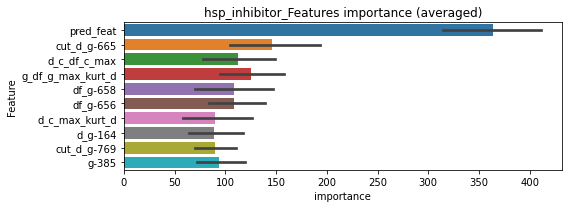

len(train_index) : 2832
len(valid_index) : 944
================================= fold 1/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000554207	valid_1's binary_logloss: 0.00327506
[2000]	training's binary_logloss: 0.000316008	valid_1's binary_logloss: 0.00301005
Early stopping, best iteration is:
[2516]	training's binary_logloss: 0.00026808	valid_1's binary_logloss: 0.00296367


len(train_index) : 2832
len(valid_index) : 944
================================= fold 2/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000463741	valid_1's binary_logloss: 0.000757208
[2000]	training's binary_logloss: 0.000254186	valid_1's binary_logloss: 0.000416433
[3000]	training's binary_logloss: 0.00018615	valid_1's binary_logloss: 0.000305339
[4000]	training's binary_logloss: 0.000153993	valid_1's binary_logloss: 0.000252727
[5000]	training's binary_logloss: 0.000137626	valid_1's binary_logloss: 0.000225936
[6000]	training's binary_logloss: 0.00012712	valid_1's binary_logloss: 0.000208712
[7000]	training's binary_logloss: 0.000119841	valid_1's binary_logloss: 0.000196782
[8000]	training's binary_logloss: 0.000114841	valid_1's binary_logloss: 0.000188589
[9000]	training's binary_logloss: 0.000111303	valid_1's binary_logloss: 0.000182783
[10000]	training's binary_logloss: 0.000108745	valid_1's binary_logloss: 0.000178586
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000108745	valid_

len(train_index) : 2832
len(valid_index) : 944
================================= fold 3/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000464532	valid_1's binary_logloss: 0.000684391
[2000]	training's binary_logloss: 0.000254395	valid_1's binary_logloss: 0.000375851
[3000]	training's binary_logloss: 0.000186228	valid_1's binary_logloss: 0.00027541
[4000]	training's binary_logloss: 0.000154054	valid_1's binary_logloss: 0.000227945
[5000]	training's binary_logloss: 0.000137679	valid_1's binary_logloss: 0.000203782
[6000]	training's binary_logloss: 0.000127153	valid_1's binary_logloss: 0.000188214
[7000]	training's binary_logloss: 0.000119862	valid_1's binary_logloss: 0.000177432
[8000]	training's binary_logloss: 0.000114861	valid_1's binary_logloss: 0.000170038
[9000]	training's binary_logloss: 0.000111316	valid_1's binary_logloss: 0.000164796
[10000]	training's binary_logloss: 0.000108751	valid_1's binary_logloss: 0.000161003
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000108751	valid

len(train_index) : 2832
len(valid_index) : 944
================================= fold 4/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000463867	valid_1's binary_logloss: 0.000864902
[2000]	training's binary_logloss: 0.000254234	valid_1's binary_logloss: 0.000476395
[3000]	training's binary_logloss: 0.000186203	valid_1's binary_logloss: 0.000349484
[4000]	training's binary_logloss: 0.000154028	valid_1's binary_logloss: 0.000289341
[5000]	training's binary_logloss: 0.000137657	valid_1's binary_logloss: 0.000258722
[6000]	training's binary_logloss: 0.000127147	valid_1's binary_logloss: 0.000238994
[7000]	training's binary_logloss: 0.000119855	valid_1's binary_logloss: 0.000225307
[8000]	training's binary_logloss: 0.000114861	valid_1's binary_logloss: 0.000215937
[9000]	training's binary_logloss: 0.000111318	valid_1's binary_logloss: 0.000209292
[10000]	training's binary_logloss: 0.000108749	valid_1's binary_logloss: 0.000204477
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000108749	vali

hsp_inhibitor logloss: 0.0008772315121532421


neg labels: 3289 → selected neg labels: 3283


igf-1_inhibitor, len(trt): 37, len(othr): 3283
target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00297841	valid_1's binary_logloss: 0.0251313
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000688077	valid_1's binary_logloss: 0.0184897
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0031744	valid_1's binary_logloss: 0.0135265
[600]	training's binary_logloss: 0.000631093	valid_1's binary_logloss: 0.00847618
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.000538089	valid_1's binary_logloss: 0.00815166
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00315416	valid_1's binary_logloss: 0.0079408
[600]	training's binary_logloss: 0.00063452	valid_1's binary_logloss: 0.00315048
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000541612	valid_1's binary_logloss: 0.00290456
Training until validation scores don't improve for 30 rounds
[300

1 / 3 AUC score:1.000
y_Threshold: 0.0037212, Threshold: 0.0271962, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, conf_0:0.01904, conf_1:0.03536
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0271962
Num_p_label: 10.0, Expected: 6.2, Adj_threshold_2: 0.0771962
threshold: 0.0771962, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000852348	valid_1's binary_logloss: 0.00508924
[600]	training's binary_logloss: 0.000209441	valid_1's binary_logloss: 0.00381032
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000191392	valid_1's binary_logloss: 0.00377585
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000895699	valid_1's binary_logloss: 0.00248349
[600]	training's binary_logloss: 0.000210958	valid_1's binary_logloss: 0.0016228
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000176889	valid_1's binary_logloss: 0.00157941
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000923414	valid_1's binary_logloss: 0.0010593
[600]	training's binary_logloss: 0.000211773	valid_1's binary_logloss: 0.000208907
[900]	training's binary_logloss: 0.000166196	valid_1's binary_logloss: 0.000148544
Early sto

2 / 3 AUC score:1.000
y_Threshold: 0.5490955, Threshold: 0.0771962, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807


[600]	training's binary_logloss: 0.000207557	valid_1's binary_logloss: 0.00145386
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000195171	valid_1's binary_logloss: 0.00143496


p_label_rate: 0.0723255 Vs.target_rate: 0.00155
Num_p_label: 288.0, conf_0:0.06176, conf_1:0.09264
Num_p_label: 288.0, Expected: 6.2, Adj_threshold_1: 0.0771962
Num_p_label: 288.0, Expected: 6.2, Adj_threshold_2: 0.1271962
Num_p_label: 286.0, Expected: 6.2, Adj_threshold_3: 0.1771962
Num_p_label: 284.0, Expected: 6.2, Adj_threshold_4: 0.2271962
Num_p_label: 284.0, Expected: 6.2, Adj_threshold_5: 0.2771962
Num_p_label: 284.0, Expected: 6.2, Adj_threshold_6: 0.3271962
Num_p_label: 282.0, Expected: 6.2, Adj_threshold_7: 0.3771962
Num_p_label: 282.0, Expected: 6.2, Adj_threshold_8: 0.4271962
Num_p_label: 278.0, Expected: 6.2, Adj_threshold_9: 0.4771962
Num_p_label: 268.0, Expected: 6.2, Adj_threshold_10: 0.5271962
threshold: 0.5771962, positive_p_label: 249.0/3982, p_label_rate: 0.0625314
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000864548	valid_1's binary_logloss: 0.00590537
[600]	training's binary_logloss: 0.000209989	valid_1's binary_logloss: 0.00447425
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000211385	valid_1's binary_logloss: 0.00446868
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000888547	valid_1's binary_logloss: 0.00248039
[600]	training's binary_logloss: 0.000212369	valid_1's binary_logloss: 0.00169294
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00020493	valid_1's binary_logloss: 0.00168462
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000923362	valid_1's binary_logloss: 0.00105589
[600]	training's binary_logloss: 0.000210895	valid_1's binary_logloss: 0.000205981
[900]	training's binary_logloss: 0.000166314	valid_1's binary_logloss: 0.000147237
Early st

3 / 3 AUC score:1.000
y_Threshold: 0.5976789, Threshold: 0.5771962, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0595178 Vs.target_rate: 0.00155
Num_p_label: 237.0, conf_0:0.50000, conf_1:0.63492
Num_p_label: 237.0, Expected: 6.2, Adj_threshold_1: 0.5771962
Num_p_label: 218.0, Expected: 6.2, Adj_threshold_2: 0.6271962
Num_p_label: 174.0, Expected: 6.2, Adj_threshold_3: 0.6771962
Num_p_label: 134.0, Expected: 6.2, Adj_threshold_4: 0.7271962
Num_p_label: 82.0, Expected: 6.2, Adj_threshold_5: 0.7771962
threshold: 0.7771962, positive_p_label: 82.0/3982, p_label_rate: 0.0205927
positive_y_label: 655.0/3805, y_label_rate: 0.1721419


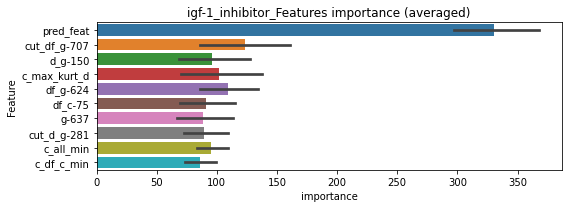

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000509882	valid_1's binary_logloss: 0.0028203
Early stopping, best iteration is:
[1551]	training's binary_logloss: 0.000354323	valid_1's binary_logloss: 0.00261318


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[902]	training's binary_logloss: 0.000562403	valid_1's binary_logloss: 0.00245129


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000523866	valid_1's binary_logloss: 0.0014548
Early stopping, best iteration is:
[1847]	training's binary_logloss: 0.000323116	valid_1's binary_logloss: 0.00118877


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000513516	valid_1's binary_logloss: 0.00274723
[2000]	training's binary_logloss: 0.000300704	valid_1's binary_logloss: 0.00235173
Early stopping, best iteration is:
[2718]	training's binary_logloss: 0.000250104	valid_1's binary_logloss: 0.00224496


igf-1_inhibitor logloss: 0.0021252645512863603


neg labels: 3289 → selected neg labels: 3285


ikk_inhibitor, len(trt): 30, len(othr): 3285
target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0019559	valid_1's binary_logloss: 0.013645
[600]	training's binary_logloss: 0.000472791	valid_1's binary_logloss: 0.00881587
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000452582	valid_1's binary_logloss: 0.0086473
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00197678	valid_1's binary_logloss: 0.00640858
[600]	training's binary_logloss: 0.000469332	valid_1's binary_logloss: 0.00258428
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000438076	valid_1's binary_logloss: 0.00251988
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0019772	valid_1's binary_logloss: 0.00509186
[600]	training's binary_logloss: 0.000472148	valid_1's binary_logloss: 0.00209038
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000437349	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0039119, Threshold: 0.0120780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, conf_0:0.00845, conf_1:0.01570
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0120780
Num_p_label: 5.0, Expected: 5.0, Adj_threshold_2: 0.0620780
threshold: 0.0620780, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000703381	valid_1's binary_logloss: 0.00418744
[600]	training's binary_logloss: 0.000190451	valid_1's binary_logloss: 0.00311375
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000194835	valid_1's binary_logloss: 0.00309396
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000685202	valid_1's binary_logloss: 0.00133549
[600]	training's binary_logloss: 0.000182284	valid_1's binary_logloss: 0.00061344
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000153162	valid_1's binary_logloss: 0.000568972
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000686054	valid_1's binary_logloss: 0.00213618
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000207915	valid_1's binary_logloss: 0.0015093
Training until validation scores don't improve for 30 ro

2 / 3 AUC score:1.000
y_Threshold: 0.5745899, Threshold: 0.0620780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0404319 Vs.target_rate: 0.00126
Num_p_label: 161.0, conf_0:0.04966, conf_1:0.07449
Num_p_label: 161.0, Expected: 5.0, Adj_threshold_1: 0.0620780
Num_p_label: 161.0, Expected: 5.0, Adj_threshold_2: 0.1120780
Num_p_label: 161.0, Expected: 5.0, Adj_threshold_3: 0.1620780
Num_p_label: 161.0, Expected: 5.0, Adj_threshold_4: 0.2120780
Num_p_label: 156.0, Expected: 5.0, Adj_threshold_5: 0.2620780
Num_p_label: 154.0, Expected: 5.0, Adj_threshold_6: 0.3120780
Num_p_label: 145.0, Expected: 5.0, Adj_threshold_7: 0.3620780
Num_p_label: 132.0, Expected: 5.0, Adj_threshold_8: 0.4120780
Num_p_label: 114.0, Expected: 5.0, Adj_threshold_9: 0.4620780
Num_p_label: 92.0, Expected: 5.0, Adj_threshold_10: 0.5120780
threshold: 0.5620780, positive_p_label: 72.0/3982, p_label_rate: 0.0180814


Early stopping, best iteration is:
[397]	training's binary_logloss: 0.000337091	valid_1's binary_logloss: 0.00198245


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000679658	valid_1's binary_logloss: 0.00462437
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000208558	valid_1's binary_logloss: 0.00337626
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000714917	valid_1's binary_logloss: 0.001112
[600]	training's binary_logloss: 0.00019102	valid_1's binary_logloss: 0.000466066
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000159623	valid_1's binary_logloss: 0.000422608
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000702564	valid_1's binary_logloss: 0.00133571
[600]	training's binary_logloss: 0.000191293	valid_1's binary_logloss: 0.000610711
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000167279	valid_1's binary_logloss: 0.000559693
Training until validation scores don't improve for 30 r

3 / 3 AUC score:1.000
y_Threshold: 0.5142629, Threshold: 0.5620780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0110497 Vs.target_rate: 0.00126
Num_p_label: 44.0, conf_0:0.50000, conf_1:0.61829
Num_p_label: 44.0, Expected: 5.0, Adj_threshold_1: 0.5620780
Num_p_label: 31.0, Expected: 5.0, Adj_threshold_2: 0.6120780
Num_p_label: 20.0, Expected: 5.0, Adj_threshold_3: 0.6620780
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_4: 0.7120780
threshold: 0.7120780, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


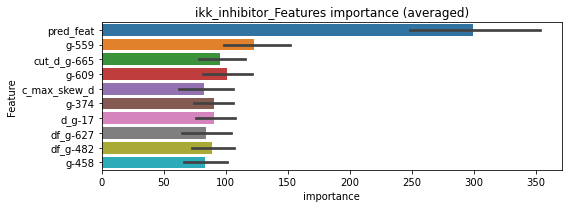

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 ikk_inhibitor=================================


Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000735485	valid_1's binary_logloss: 0.00653
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000469178	valid_1's binary_logloss: 0.000612519
[2000]	training's binary_logloss: 0.000280438	valid_1's binary_logloss: 0.000398082
[3000]	training's binary_logloss: 0.0002243	valid_1's binary_logloss: 0.000334273
[4000]	training's binary_logloss: 0.000197221	valid_1's binary_logloss: 0.000301176
[5000]	training's binary_logloss: 0.000183552	valid_1's binary_logloss: 0.000286172
[6000]	training's binary_logloss: 0.000174579	valid_1's binary_logloss: 0.000274683
[7000]	training's binary_logloss: 0.000168077	valid_1's binary_logloss: 0.000266027
[8000]	training's binary_logloss: 0.000163316	valid_1's binary_logloss: 0.000260748
Early stopping, best iteration is:
[8523]	training's binary_logloss: 0.000161205	valid_1's binary_logloss: 0.000258326


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000463555	valid_1's binary_logloss: 0.00073991
[2000]	training's binary_logloss: 0.000279688	valid_1's binary_logloss: 0.000499823
[3000]	training's binary_logloss: 0.000224556	valid_1's binary_logloss: 0.000424562
[4000]	training's binary_logloss: 0.000198395	valid_1's binary_logloss: 0.00038638
[5000]	training's binary_logloss: 0.000184755	valid_1's binary_logloss: 0.000364242
[6000]	training's binary_logloss: 0.000175028	valid_1's binary_logloss: 0.000349652
[7000]	training's binary_logloss: 0.000168489	valid_1's binary_logloss: 0.000339758
[8000]	training's binary_logloss: 0.000163532	valid_1's binary_logloss: 0.000330591
Early stopping, best iteration is:
[7980]	training's binary_logloss: 0.000163636	valid_1's binary_logloss: 0.000330529


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000455644	valid_1's binary_logloss: 0.00184679
[2000]	training's binary_logloss: 0.00027615	valid_1's binary_logloss: 0.00159536
[3000]	training's binary_logloss: 0.000223077	valid_1's binary_logloss: 0.00151437
[4000]	training's binary_logloss: 0.000196555	valid_1's binary_logloss: 0.00147244
[5000]	training's binary_logloss: 0.000182438	valid_1's binary_logloss: 0.00144946
[6000]	training's binary_logloss: 0.00017307	valid_1's binary_logloss: 0.00143462
[7000]	training's binary_logloss: 0.000166382	valid_1's binary_logloss: 0.00142584
[8000]	training's binary_logloss: 0.000161592	valid_1's binary_logloss: 0.00141887
[9000]	training's binary_logloss: 0.000158108	valid_1's binary_logloss: 0.00141403
Early stopping, best iteration is:
[9206]	training's binary_logloss: 0.000157596	valid_1's binary_logloss: 0.00141332


ikk_inhibitor logloss: 0.00213307523856911


neg labels: 3289 → selected neg labels: 3286


imidazoline_receptor_agonist, len(trt): 31, len(othr): 3286
target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176924	valid_1's binary_logloss: 0.00777722
[600]	training's binary_logloss: 0.000441888	valid_1's binary_logloss: 0.00455377
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.00044331	valid_1's binary_logloss: 0.00455139
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172765	valid_1's binary_logloss: 0.0132561
[600]	training's binary_logloss: 0.000438142	valid_1's binary_logloss: 0.00991692
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000412104	valid_1's binary_logloss: 0.00984584
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183593	valid_1's binary_logloss: 0.00347181
[600]	training's binary_logloss: 0.000455362	valid_1's binary_logloss: 0.00140905
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000437524	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0025485, Threshold: 0.0189395, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, conf_0:0.01326, conf_1:0.02462
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_1: 0.0189395
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_2: 0.0689395
Num_p_label: 7.0, Expected: 5.2, Adj_threshold_3: 0.1189395
threshold: 0.1189395, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000696093	valid_1's binary_logloss: 0.00215571
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000219073	valid_1's binary_logloss: 0.00153633
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000676215	valid_1's binary_logloss: 0.00228774
Early stopping, best iteration is:
[434]	training's binary_logloss: 0.000278469	valid_1's binary_logloss: 0.00157731
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000694062	valid_1's binary_logloss: 0.00441426
Early stopping, best iteration is:
[379]	training's binary_logloss: 0.000360426	valid_1's binary_logloss: 0.00375068
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000666584	valid_1's binary_logloss: 0.00200751


2 / 3 AUC score:1.000
y_Threshold: 0.6707572, Threshold: 0.1189395, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0625314 Vs.target_rate: 0.00130
Num_p_label: 249.0, conf_0:0.09515, conf_1:0.14273
Num_p_label: 249.0, Expected: 5.2, Adj_threshold_1: 0.1189395
Num_p_label: 248.0, Expected: 5.2, Adj_threshold_2: 0.1689395
Num_p_label: 248.0, Expected: 5.2, Adj_threshold_3: 0.2189395
Num_p_label: 248.0, Expected: 5.2, Adj_threshold_4: 0.2689395
Num_p_label: 248.0, Expected: 5.2, Adj_threshold_5: 0.3189395
Num_p_label: 247.0, Expected: 5.2, Adj_threshold_6: 0.3689395
Num_p_label: 242.0, Expected: 5.2, Adj_threshold_7: 0.4189395
Num_p_label: 235.0, Expected: 5.2, Adj_threshold_8: 0.4689395
Num_p_label: 222.0, Expected: 5.2, Adj_threshold_9: 0.5189395
Num_p_label: 177.0, Expected: 5.2, Adj_threshold_10: 0.5689395


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000205865	valid_1's binary_logloss: 0.00151717


threshold: 0.6189395, positive_p_label: 148.0/3982, p_label_rate: 0.0371673
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000672049	valid_1's binary_logloss: 0.00207799
[600]	training's binary_logloss: 0.000195574	valid_1's binary_logloss: 0.0011579
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000191415	valid_1's binary_logloss: 0.00113555
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000694592	valid_1's binary_logloss: 0.00214167
[600]	training's binary_logloss: 0.000194842	valid_1's binary_logloss: 0.0014112
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000164548	valid_1's binary_logloss: 0.00136411
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000691767	valid_1's binary_logloss: 0.00175207
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.000336476	valid_1's binary_logloss: 0.00143522
Training until validation scores don't improve for 30 roun

3 / 3 AUC score:1.000
y_Threshold: 0.6206042, Threshold: 0.6189395, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0223506 Vs.target_rate: 0.00130
Num_p_label: 89.0, conf_0:0.50000, conf_1:0.68083
Num_p_label: 89.0, Expected: 5.2, Adj_threshold_1: 0.6189395
Num_p_label: 58.0, Expected: 5.2, Adj_threshold_2: 0.6689395
Num_p_label: 43.0, Expected: 5.2, Adj_threshold_3: 0.7189395
Num_p_label: 28.0, Expected: 5.2, Adj_threshold_4: 0.7689395


[900]	training's binary_logloss: 0.000156949	valid_1's binary_logloss: 0.00203074
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000158543	valid_1's binary_logloss: 0.00202789


threshold: 0.7689395, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 655.0/3807, y_label_rate: 0.1720515


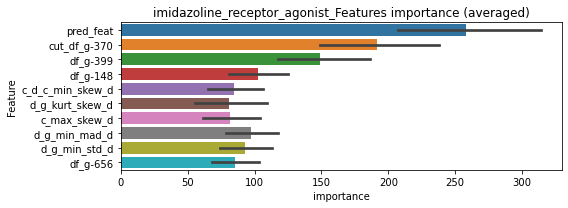

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 imidazoline_receptor_agonist=================================


Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000678372	valid_1's binary_logloss: 0.00249693
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 imidazoline_receptor_agonist=================================


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000874437	valid_1's binary_logloss: 0.005227
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00048729	valid_1's binary_logloss: 0.000827095
[2000]	training's binary_logloss: 0.000286164	valid_1's binary_logloss: 0.00061725
Early stopping, best iteration is:
[2440]	training's binary_logloss: 0.000254927	valid_1's binary_logloss: 0.000581474


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


imidazoline_receptor_agonist logloss: 0.002562588498699919


Early stopping, best iteration is:
[889]	training's binary_logloss: 0.000521684	valid_1's binary_logloss: 0.00194422
neg labels: 3289 → selected neg labels: 3279


immunosuppressant, len(trt): 73, len(othr): 3279
target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00695572	valid_1's binary_logloss: 0.0379471
[600]	training's binary_logloss: 0.00116997	valid_1's binary_logloss: 0.0269626
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000966521	valid_1's binary_logloss: 0.0264237
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00775895	valid_1's binary_logloss: 0.0393304
[600]	training's binary_logloss: 0.00126376	valid_1's binary_logloss: 0.0260097
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000782311	valid_1's binary_logloss: 0.0243503
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00713553	valid_1's binary_logloss: 0.0333424
[600]	training's binary_logloss: 0.00120511	valid_1's binary_logloss: 0.0209299
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000982557	valid_1's binary_logloss:

1 / 3 AUC score:1.000
y_Threshold: 0.0080209, Threshold: 0.0258685, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 652/3796
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, conf_0:0.01811, conf_1:0.03363
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.0258685
Num_p_label: 6.0, Expected: 12.2, Adj_threshold_2: 0.0758685
threshold: 0.0758685, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 652.0/3796, y_label_rate: 0.1717597
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131514	valid_1's binary_logloss: 0.00316071
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000308559	valid_1's binary_logloss: 0.00148148
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00129192	valid_1's binary_logloss: 0.00706837
[600]	training's binary_logloss: 0.000244946	valid_1's binary_logloss: 0.00517675
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000207152	valid_1's binary_logloss: 0.00501656
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013192	valid_1's binary_logloss: 0.00383205
[600]	training's binary_logloss: 0.000251045	valid_1's binary_logloss: 0.00221629
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000236145	valid_1's binary_logloss: 0.00219152
Training until validation scores don't improve for 30 rounds

2 / 3 AUC score:1.000
y_Threshold: 0.3324472, Threshold: 0.0758685, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 649.0/3790
p_label_rate: 0.0477147 Vs.target_rate: 0.00307
Num_p_label: 190.0, conf_0:0.06069, conf_1:0.09104
Num_p_label: 190.0, Expected: 12.2, Adj_threshold_1: 0.0758685
Num_p_label: 189.0, Expected: 12.2, Adj_threshold_2: 0.1258685
Num_p_label: 189.0, Expected: 12.2, Adj_threshold_3: 0.1758685


[600]	training's binary_logloss: 0.000241543	valid_1's binary_logloss: 0.0032173
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000232385	valid_1's binary_logloss: 0.00317905


Num_p_label: 182.0, Expected: 12.2, Adj_threshold_4: 0.2258685
Num_p_label: 164.0, Expected: 12.2, Adj_threshold_5: 0.2758685
Num_p_label: 135.0, Expected: 12.2, Adj_threshold_6: 0.3258685
Num_p_label: 108.0, Expected: 12.2, Adj_threshold_7: 0.3758685
Num_p_label: 65.0, Expected: 12.2, Adj_threshold_8: 0.4258685
Num_p_label: 43.0, Expected: 12.2, Adj_threshold_9: 0.4758685
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_10: 0.5258685
threshold: 0.5758685, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 649.0/3790, y_label_rate: 0.1712401
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122327	valid_1's binary_logloss: 0.00294872
[600]	training's binary_logloss: 0.000230505	valid_1's binary_logloss: 0.00102871
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000170862	valid_1's binary_logloss: 0.000893019
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122764	valid_1's binary_logloss: 0.00354877
[600]	training's binary_logloss: 0.000240487	valid_1's binary_logloss: 0.00180496
[900]	training's binary_logloss: 0.000172383	valid_1's binary_logloss: 0.00168803
Early stopping, best iteration is:
[974]	training's binary_logloss: 0.000166235	valid_1's binary_logloss: 0.0016613
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127652	valid_1's binary_logloss: 0.0029886
[600]	training's binary_logloss: 0.0002397	valid_1's binary_logloss: 0.000990073
Early stopping

3 / 3 AUC score:1.000
y_Threshold: 0.2335240, Threshold: 0.5758685, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 648.0/3788
p_label_rate: 0.0025113 Vs.target_rate: 0.00307
Num_p_label: 10.0, conf_0:0.50000, conf_1:0.63346
threshold: 0.5758685, positive_p_label: 10.0/3982, p_label_rate: 0.0025113


[600]	training's binary_logloss: 0.000237405	valid_1's binary_logloss: 0.00450247
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000245415	valid_1's binary_logloss: 0.00447277


positive_y_label: 648.0/3788, y_label_rate: 0.1710665


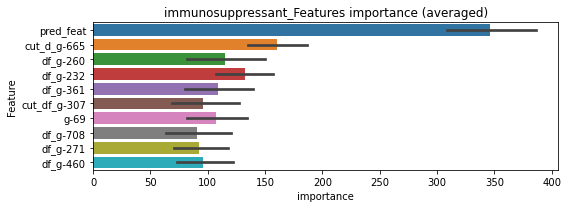

len(train_index) : 2841
len(valid_index) : 947
================================= fold 1/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000545671	valid_1's binary_logloss: 0.00276906
Early stopping, best iteration is:
[1912]	training's binary_logloss: 0.000322504	valid_1's binary_logloss: 0.00249412


len(train_index) : 2841
len(valid_index) : 947
================================= fold 2/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000555021	valid_1's binary_logloss: 0.000804872
[2000]	training's binary_logloss: 0.000315701	valid_1's binary_logloss: 0.000475841
[3000]	training's binary_logloss: 0.000243554	valid_1's binary_logloss: 0.000369964
[4000]	training's binary_logloss: 0.000210416	valid_1's binary_logloss: 0.00031741
[5000]	training's binary_logloss: 0.000192633	valid_1's binary_logloss: 0.000288838
[6000]	training's binary_logloss: 0.000181426	valid_1's binary_logloss: 0.000271231
[7000]	training's binary_logloss: 0.000173382	valid_1's binary_logloss: 0.000258768
Early stopping, best iteration is:
[7008]	training's binary_logloss: 0.000173339	valid_1's binary_logloss: 0.000258721


len(train_index) : 2841
len(valid_index) : 947
================================= fold 3/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000559422	valid_1's binary_logloss: 0.001119
[2000]	training's binary_logloss: 0.000318898	valid_1's binary_logloss: 0.000781775
[3000]	training's binary_logloss: 0.00024809	valid_1's binary_logloss: 0.00065834
[4000]	training's binary_logloss: 0.00021441	valid_1's binary_logloss: 0.00059878
[5000]	training's binary_logloss: 0.000196421	valid_1's binary_logloss: 0.000563191
[6000]	training's binary_logloss: 0.000184429	valid_1's binary_logloss: 0.000540863
Early stopping, best iteration is:
[6750]	training's binary_logloss: 0.000177884	valid_1's binary_logloss: 0.000528046


len(train_index) : 2841
len(valid_index) : 947
================================= fold 4/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds


immunosuppressant logloss: 0.0019370756620951223


Early stopping, best iteration is:
[726]	training's binary_logloss: 0.0007636	valid_1's binary_logloss: 0.00446667
neg labels: 3289 → selected neg labels: 3284


insulin_secretagogue, len(trt): 30, len(othr): 3284
target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00215768	valid_1's binary_logloss: 0.0132671
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000649928	valid_1's binary_logloss: 0.00937274
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00225179	valid_1's binary_logloss: 0.00802282
[600]	training's binary_logloss: 0.00052362	valid_1's binary_logloss: 0.00422206
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000489572	valid_1's binary_logloss: 0.00416023
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00238352	valid_1's binary_logloss: 0.00452904
[600]	training's binary_logloss: 0.000536437	valid_1's binary_logloss: 0.00155227
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000500109	valid_1's binary_logloss: 0.00149133
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:1.000
y_Threshold: 0.0031031, Threshold: 0.0128461, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808


Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000549683	valid_1's binary_logloss: 0.00947279


p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, conf_0:0.00899, conf_1:0.01670
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0128461
Num_p_label: 5.0, Expected: 5.0, Adj_threshold_2: 0.0628461
threshold: 0.0628461, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000741985	valid_1's binary_logloss: 0.00333879
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000222382	valid_1's binary_logloss: 0.00252538
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000781399	valid_1's binary_logloss: 0.00166727
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.00021504	valid_1's binary_logloss: 0.000754079
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00078386	valid_1's binary_logloss: 0.00359059
Early stopping, best iteration is:
[407]	training's binary_logloss: 0.000357729	valid_1's binary_logloss: 0.00283103
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000757735	valid_1's binary_logloss: 0.00190068


2 / 3 AUC score:1.000
y_Threshold: 0.5896024, Threshold: 0.0628461, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0497238 Vs.target_rate: 0.00126
Num_p_label: 198.0, conf_0:0.05028, conf_1:0.07542
Num_p_label: 198.0, Expected: 5.0, Adj_threshold_1: 0.0628461
Num_p_label: 197.0, Expected: 5.0, Adj_threshold_2: 0.1128461
Num_p_label: 197.0, Expected: 5.0, Adj_threshold_3: 0.1628461
Num_p_label: 196.0, Expected: 5.0, Adj_threshold_4: 0.2128461
Num_p_label: 196.0, Expected: 5.0, Adj_threshold_5: 0.2628461
Num_p_label: 196.0, Expected: 5.0, Adj_threshold_6: 0.3128461
Num_p_label: 196.0, Expected: 5.0, Adj_threshold_7: 0.3628461
Num_p_label: 193.0, Expected: 5.0, Adj_threshold_8: 0.4128461
Num_p_label: 189.0, Expected: 5.0, Adj_threshold_9: 0.4628461
Num_p_label: 177.0, Expected: 5.0, Adj_threshold_10: 0.5128461


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000242903	valid_1's binary_logloss: 0.00107244


threshold: 0.5628461, positive_p_label: 155.0/3982, p_label_rate: 0.0389252
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000737647	valid_1's binary_logloss: 0.0033033
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000212923	valid_1's binary_logloss: 0.00238598
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000766902	valid_1's binary_logloss: 0.00168469
[600]	training's binary_logloss: 0.000203969	valid_1's binary_logloss: 0.000874022
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000181579	valid_1's binary_logloss: 0.000823825
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000795117	valid_1's binary_logloss: 0.00666612
Early stopping, best iteration is:
[322]	training's binary_logloss: 0.000676135	valid_1's binary_logloss: 0.00598319
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000755307	valid_1's binary_logloss: 0.001

3 / 3 AUC score:1.000
y_Threshold: 0.5907270, Threshold: 0.5628461, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0318935 Vs.target_rate: 0.00126
Num_p_label: 127.0, conf_0:0.50000, conf_1:0.61913
Num_p_label: 127.0, Expected: 5.0, Adj_threshold_1: 0.5628461
Num_p_label: 100.0, Expected: 5.0, Adj_threshold_2: 0.6128461
Num_p_label: 69.0, Expected: 5.0, Adj_threshold_3: 0.6628461
Num_p_label: 37.0, Expected: 5.0, Adj_threshold_4: 0.7128461
Num_p_label: 20.0, Expected: 5.0, Adj_threshold_5: 0.7628461
threshold: 0.7628461, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


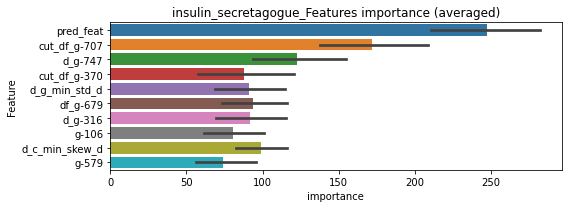

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000560542	valid_1's binary_logloss: 0.00301431


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000500509	valid_1's binary_logloss: 0.000898537
Early stopping, best iteration is:
[1871]	training's binary_logloss: 0.000307705	valid_1's binary_logloss: 0.000703653


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 insulin_secretagogue=================================


Early stopping, best iteration is:
[80]	training's binary_logloss: 0.0127914	valid_1's binary_logloss: 0.0521448
Training until validation scores don't improve for 30 rounds


insulin_secretagogue logloss: 0.014377642520999503


Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000543623	valid_1's binary_logloss: 0.00164678


neg labels: 3289 → selected neg labels: 3284


insulin_sensitizer, len(trt): 51, len(othr): 3284
target_rate: 0.0021416 → Adj_target_rate: 0.0023748
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00401587	valid_1's binary_logloss: 0.0341252
[600]	training's binary_logloss: 0.000756356	valid_1's binary_logloss: 0.02663
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000578072	valid_1's binary_logloss: 0.0259549
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00429133	valid_1's binary_logloss: 0.0183197
[600]	training's binary_logloss: 0.00079061	valid_1's binary_logloss: 0.00997222
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000617642	valid_1's binary_logloss: 0.00938116
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00431131	valid_1's binary_logloss: 0.012046
[600]	training's binary_logloss: 0.00080204	valid_1's binary_logloss: 0.00465328
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000599462	valid_1's binary_logloss

1 / 3 AUC score:1.000
y_Threshold: 0.0054575, Threshold: 0.0166369, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00214
Num_p_label: 40.0, conf_0:0.01165, conf_1:0.02163
Num_p_label: 40.0, Expected: 8.5, Adj_threshold_1: 0.0166369
Num_p_label: 4.0, Expected: 8.5, Adj_threshold_2: 0.0666369
threshold: 0.0666369, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103398	valid_1's binary_logloss: 0.00547406
[600]	training's binary_logloss: 0.000223964	valid_1's binary_logloss: 0.00427759
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000231231	valid_1's binary_logloss: 0.00426661
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102891	valid_1's binary_logloss: 0.00139472
[600]	training's binary_logloss: 0.000222423	valid_1's binary_logloss: 0.000260547
[900]	training's binary_logloss: 0.000170162	valid_1's binary_logloss: 0.000176249
Early stopping, best iteration is:
[1029]	training's binary_logloss: 0.00016359	valid_1's binary_logloss: 0.000166398
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102929	valid_1's binary_logloss: 0.00316528
[600]	training's binary_logloss: 0.000225007	valid_1's binary_logloss: 0.00202714
Early sto

2 / 3 AUC score:1.000
y_Threshold: 0.5649253, Threshold: 0.0666369, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0441989 Vs.target_rate: 0.00214
Num_p_label: 176.0, conf_0:0.05331, conf_1:0.07996
Num_p_label: 176.0, Expected: 8.5, Adj_threshold_1: 0.0666369
Num_p_label: 176.0, Expected: 8.5, Adj_threshold_2: 0.1166369
Num_p_label: 176.0, Expected: 8.5, Adj_threshold_3: 0.1666369
Num_p_label: 176.0, Expected: 8.5, Adj_threshold_4: 0.2166369
Num_p_label: 176.0, Expected: 8.5, Adj_threshold_5: 0.2666369
Num_p_label: 175.0, Expected: 8.5, Adj_threshold_6: 0.3166369
Num_p_label: 174.0, Expected: 8.5, Adj_threshold_7: 0.3666369
Num_p_label: 170.0, Expected: 8.5, Adj_threshold_8: 0.4166369
Num_p_label: 158.0, Expected: 8.5, Adj_threshold_9: 0.4666369
Num_p_label: 138.0, Expected: 8.5, Adj_threshold_10: 0.5166369
threshold: 0.5666369, positive_p_label: 99.0/3982, p_label_rate: 0.0248619
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00104479	valid_1's binary_logloss: 0.00680971
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000260292	valid_1's binary_logloss: 0.00565291
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101618	valid_1's binary_logloss: 0.00309446
[600]	training's binary_logloss: 0.000224028	valid_1's binary_logloss: 0.00182068
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000221274	valid_1's binary_logloss: 0.00181191
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106278	valid_1's binary_logloss: 0.00299165
[600]	training's binary_logloss: 0.000227465	valid_1's binary_logloss: 0.00163019
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000194962	valid_1's binary_logloss: 0.00156748
Training until validation scores don't improve for 30 round

3 / 3 AUC score:1.000
y_Threshold: 0.4419589, Threshold: 0.5666369, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 650.0/3796
p_label_rate: 0.0045203 Vs.target_rate: 0.00214
Num_p_label: 18.0, conf_0:0.50000, conf_1:0.62330
Num_p_label: 18.0, Expected: 8.5, Adj_threshold_1: 0.5666369


Early stopping, best iteration is:
[397]	training's binary_logloss: 0.000472479	valid_1's binary_logloss: 0.0022754


threshold: 0.5666369, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 650.0/3796, y_label_rate: 0.1712329


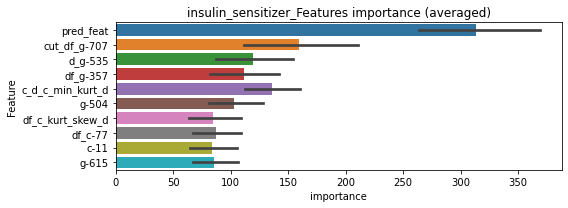

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000722195	valid_1's binary_logloss: 0.00484313


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[959]	training's binary_logloss: 0.000553491	valid_1's binary_logloss: 0.0038236


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000541722	valid_1's binary_logloss: 0.00108819
[2000]	training's binary_logloss: 0.000311026	valid_1's binary_logloss: 0.000789932
[3000]	training's binary_logloss: 0.000244822	valid_1's binary_logloss: 0.000686378
[4000]	training's binary_logloss: 0.000214944	valid_1's binary_logloss: 0.000637268
[5000]	training's binary_logloss: 0.000199954	valid_1's binary_logloss: 0.000612767
Early stopping, best iteration is:
[5512]	training's binary_logloss: 0.000194495	valid_1's binary_logloss: 0.000600619


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000537039	valid_1's binary_logloss: 0.00220594
Early stopping, best iteration is:
[1764]	training's binary_logloss: 0.000339421	valid_1's binary_logloss: 0.0019618


insulin_sensitizer logloss: 0.002807397530173882


neg labels: 3289 → selected neg labels: 3281


integrin_inhibitor, len(trt): 42, len(othr): 3281
target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00368236	valid_1's binary_logloss: 0.0229949
[600]	training's binary_logloss: 0.000677136	valid_1's binary_logloss: 0.0162587
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000636825	valid_1's binary_logloss: 0.0161453
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00392341	valid_1's binary_logloss: 0.0164214
[600]	training's binary_logloss: 0.00069826	valid_1's binary_logloss: 0.0102876
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000648085	valid_1's binary_logloss: 0.0102128
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00427751	valid_1's binary_logloss: 0.0097099
[600]	training's binary_logloss: 0.000734168	valid_1's binary_logloss: 0.00360636
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.0005879	valid_1's binary_logloss

1 / 3 AUC score:1.000
y_Threshold: 0.0046511, Threshold: 0.0144123, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, conf_0:0.01009, conf_1:0.01874
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_1: 0.0144123
Num_p_label: 3.0, Expected: 7.0, Adj_threshold_2: 0.0644123
threshold: 0.0644123, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0010158	valid_1's binary_logloss: 0.00323354
Early stopping, best iteration is:
[466]	training's binary_logloss: 0.000305532	valid_1's binary_logloss: 0.00219242
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0010042	valid_1's binary_logloss: 0.00330243
[600]	training's binary_logloss: 0.000217738	valid_1's binary_logloss: 0.00229384
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000203292	valid_1's binary_logloss: 0.00226636
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103091	valid_1's binary_logloss: 0.00354019
Early stopping, best iteration is:
[383]	training's binary_logloss: 0.000495694	valid_1's binary_logloss: 0.00288931
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102195	valid_1's binary_logloss: 0.0026933


2 / 3 AUC score:1.000
y_Threshold: 0.6363553, Threshold: 0.0644123, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0499749 Vs.target_rate: 0.00176
Num_p_label: 199.0, conf_0:0.05153, conf_1:0.07729
Num_p_label: 199.0, Expected: 7.0, Adj_threshold_1: 0.0644123
Num_p_label: 199.0, Expected: 7.0, Adj_threshold_2: 0.1144123
Num_p_label: 198.0, Expected: 7.0, Adj_threshold_3: 0.1644123


[600]	training's binary_logloss: 0.00022464	valid_1's binary_logloss: 0.00162363
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000225579	valid_1's binary_logloss: 0.00162227


Num_p_label: 198.0, Expected: 7.0, Adj_threshold_4: 0.2144123
Num_p_label: 198.0, Expected: 7.0, Adj_threshold_5: 0.2644123
Num_p_label: 198.0, Expected: 7.0, Adj_threshold_6: 0.3144123
Num_p_label: 198.0, Expected: 7.0, Adj_threshold_7: 0.3644123
Num_p_label: 197.0, Expected: 7.0, Adj_threshold_8: 0.4144123
Num_p_label: 194.0, Expected: 7.0, Adj_threshold_9: 0.4644123
Num_p_label: 186.0, Expected: 7.0, Adj_threshold_10: 0.5144123
threshold: 0.5644123, positive_p_label: 170.0/3982, p_label_rate: 0.0426921
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106587	valid_1's binary_logloss: 0.00302129
[600]	training's binary_logloss: 0.000231477	valid_1's binary_logloss: 0.00185821
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000195899	valid_1's binary_logloss: 0.00178526
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000999588	valid_1's binary_logloss: 0.00577259
[600]	training's binary_logloss: 0.000227186	valid_1's binary_logloss: 0.00469732
[900]	training's binary_logloss: 0.000173433	valid_1's binary_logloss: 0.00462048
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000174937	valid_1's binary_logloss: 0.0046191
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00104079	valid_1's binary_logloss: 0.00167587
[600]	training's binary_logloss: 0.000220494	valid_1's binary_logloss: 0.000747199
[900]	train

3 / 3 AUC score:1.000
y_Threshold: 0.4319011, Threshold: 0.5644123, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3799
p_label_rate: 0.0128076 Vs.target_rate: 0.00176
Num_p_label: 51.0, conf_0:0.50000, conf_1:0.62085
Num_p_label: 51.0, Expected: 7.0, Adj_threshold_1: 0.5644123
Num_p_label: 24.0, Expected: 7.0, Adj_threshold_2: 0.6144123
Num_p_label: 14.0, Expected: 7.0, Adj_threshold_3: 0.6644123


Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000183066	valid_1's binary_logloss: 0.000696372


threshold: 0.6644123, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 653.0/3799, y_label_rate: 0.1718873


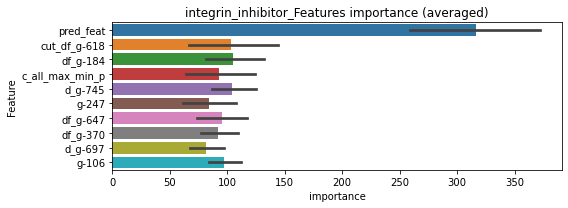

len(train_index) : 2849
len(valid_index) : 950
================================= fold 1/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00052943	valid_1's binary_logloss: 0.00367911
Early stopping, best iteration is:
[1016]	training's binary_logloss: 0.000521522	valid_1's binary_logloss: 0.003663


len(train_index) : 2849
len(valid_index) : 950
================================= fold 2/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000532331	valid_1's binary_logloss: 0.00181821
[2000]	training's binary_logloss: 0.00030924	valid_1's binary_logloss: 0.00155626
Early stopping, best iteration is:
[2604]	training's binary_logloss: 0.000262384	valid_1's binary_logloss: 0.00150639


len(train_index) : 2849
len(valid_index) : 950
================================= fold 3/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000531106	valid_1's binary_logloss: 0.00190426
Early stopping, best iteration is:
[1744]	training's binary_logloss: 0.000336796	valid_1's binary_logloss: 0.0017053


len(train_index) : 2850
len(valid_index) : 949
================================= fold 4/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000524699	valid_1's binary_logloss: 0.00284722
[2000]	training's binary_logloss: 0.00030844	valid_1's binary_logloss: 0.00258497
Early stopping, best iteration is:
[2426]	training's binary_logloss: 0.000274603	valid_1's binary_logloss: 0.00254563


integrin_inhibitor logloss: 0.0023564048019762323


neg labels: 3289 → selected neg labels: 3273


jak_inhibitor, len(trt): 92, len(othr): 3273
target_rate: 0.0038633 → Adj_target_rate: 0.0039212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00977281	valid_1's binary_logloss: 0.0682966
[600]	training's binary_logloss: 0.00154796	valid_1's binary_logloss: 0.058432
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00166223	valid_1's binary_logloss: 0.0581404
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00991678	valid_1's binary_logloss: 0.0652519
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.00190865	valid_1's binary_logloss: 0.0558198
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010075	valid_1's binary_logloss: 0.0435045
[600]	training's binary_logloss: 0.00155073	valid_1's binary_logloss: 0.0242011
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.00101613	valid_1's binary_logloss: 0.0224469
Training until validation scores don't improve for 30 rounds
[300]	training

1 / 3 AUC score:0.996
y_Threshold: 0.0138294, Threshold: 0.0874104, pos_neg_ratio: 0.8000000
Remove_noisy_data: 150 → Positive_corect_labels: 645/3777
p_label_rate: 0.0100452 Vs.target_rate: 0.00386
Num_p_label: 40.0, conf_0:0.06119, conf_1:0.11363
Num_p_label: 40.0, Expected: 15.4, Adj_threshold_1: 0.0874104
Num_p_label: 24.0, Expected: 15.4, Adj_threshold_2: 0.1374104
Num_p_label: 18.0, Expected: 15.4, Adj_threshold_3: 0.1874104
threshold: 0.1874104, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 645.0/3777, y_label_rate: 0.1707705
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134134	valid_1's binary_logloss: 0.00432372
[600]	training's binary_logloss: 0.000219215	valid_1's binary_logloss: 0.00265661
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.00019963	valid_1's binary_logloss: 0.00261646
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121156	valid_1's binary_logloss: 0.00253356
[600]	training's binary_logloss: 0.000171695	valid_1's binary_logloss: 0.000388979
[900]	training's binary_logloss: 0.000108543	valid_1's binary_logloss: 0.000246909
[1200]	training's binary_logloss: 0.000101868	valid_1's binary_logloss: 0.000231886
Early stopping, best iteration is:
[1262]	training's binary_logloss: 0.000101305	valid_1's binary_logloss: 0.000230449
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123589	valid_1's binary_logloss: 0.0021035
[600]	tr

2 / 3 AUC score:1.000
y_Threshold: 0.1438862, Threshold: 0.1874104, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 644.0/3775
p_label_rate: 0.0615269 Vs.target_rate: 0.00386
Num_p_label: 245.0, conf_0:0.14993, conf_1:0.22489
Num_p_label: 245.0, Expected: 15.4, Adj_threshold_1: 0.1874104
Num_p_label: 232.0, Expected: 15.4, Adj_threshold_2: 0.2374104
Num_p_label: 232.0, Expected: 15.4, Adj_threshold_3: 0.2874104
Num_p_label: 232.0, Expected: 15.4, Adj_threshold_4: 0.3374104
Num_p_label: 232.0, Expected: 15.4, Adj_threshold_5: 0.3874104
Num_p_label: 232.0, Expected: 15.4, Adj_threshold_6: 0.4374104
Num_p_label: 232.0, Expected: 15.4, Adj_threshold_7: 0.4874104
Num_p_label: 232.0, Expected: 15.4, Adj_threshold_8: 0.5374104
Num_p_label: 232.0, Expected: 15.4, Adj_threshold_9: 0.5874104
Num_p_label: 232.0, Expected: 15.4, Adj_threshold_10: 0.6374104


Early stopping, best iteration is:
[404]	training's binary_logloss: 0.000491357	valid_1's binary_logloss: 0.00819303


threshold: 0.6874104, positive_p_label: 229.0/3982, p_label_rate: 0.0575088
positive_y_label: 644.0/3775, y_label_rate: 0.1705960
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135362	valid_1's binary_logloss: 0.00262653
[600]	training's binary_logloss: 0.000223083	valid_1's binary_logloss: 0.000679387
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000157828	valid_1's binary_logloss: 0.00055306
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00140684	valid_1's binary_logloss: 0.00242407
[600]	training's binary_logloss: 0.000223659	valid_1's binary_logloss: 0.000352479
[900]	training's binary_logloss: 0.000152968	valid_1's binary_logloss: 0.000214994
Early stopping, best iteration is:
[1112]	training's binary_logloss: 0.000141653	valid_1's binary_logloss: 0.000189937
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013574	valid_1's binary_logloss: 0.0041229
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000365925	valid_1's b

3 / 3 AUC score:1.000
y_Threshold: 0.7568457, Threshold: 0.6874104, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 642.0/3771
p_label_rate: 0.0615269 Vs.target_rate: 0.00386
Num_p_label: 245.0, conf_0:0.50000, conf_1:0.75615
Num_p_label: 245.0, Expected: 15.4, Adj_threshold_1: 0.6874104
Num_p_label: 245.0, Expected: 15.4, Adj_threshold_2: 0.7374104
Num_p_label: 240.0, Expected: 15.4, Adj_threshold_3: 0.7874104
threshold: 0.7874104, positive_p_label: 240.0/3982, p_label_rate: 0.0602712


Early stopping, best iteration is:
[818]	training's binary_logloss: 0.000161056	valid_1's binary_logloss: 0.0030672


positive_y_label: 642.0/3771, y_label_rate: 0.1702466


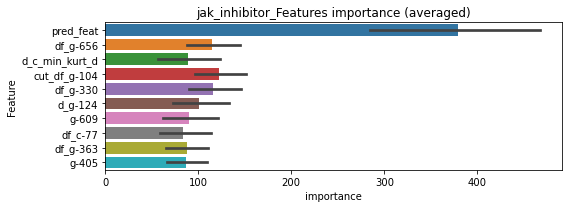

len(train_index) : 2828
len(valid_index) : 943
================================= fold 1/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000562468	valid_1's binary_logloss: 0.00276983
[2000]	training's binary_logloss: 0.000319925	valid_1's binary_logloss: 0.00239488
[3000]	training's binary_logloss: 0.000249369	valid_1's binary_logloss: 0.0022752
Early stopping, best iteration is:
[3864]	training's binary_logloss: 0.000219347	valid_1's binary_logloss: 0.00222101


len(train_index) : 2828
len(valid_index) : 943
================================= fold 2/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2828
len(valid_index) : 943


Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000671069	valid_1's binary_logloss: 0.00258968


================================= fold 3/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000568816	valid_1's binary_logloss: 0.00256514
[2000]	training's binary_logloss: 0.000322175	valid_1's binary_logloss: 0.00221575
[3000]	training's binary_logloss: 0.000247771	valid_1's binary_logloss: 0.00209332
Early stopping, best iteration is:
[3576]	training's binary_logloss: 0.000224441	valid_1's binary_logloss: 0.00204739


len(train_index) : 2829
len(valid_index) : 942
================================= fold 4/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000701915	valid_1's binary_logloss: 0.00282937


jak_inhibitor logloss: 0.00242195031669866


neg labels: 3289 → selected neg labels: 3248


kit_inhibitor, len(trt): 273, len(othr): 3248
target_rate: 0.0114638 → Adj_target_rate: 0.0098841
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0397489	valid_1's binary_logloss: 0.257527
Early stopping, best iteration is:
[319]	training's binary_logloss: 0.0352898	valid_1's binary_logloss: 0.255656
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0387144	valid_1's binary_logloss: 0.260194
Early stopping, best iteration is:
[304]	training's binary_logloss: 0.0378122	valid_1's binary_logloss: 0.259754
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0422762	valid_1's binary_logloss: 0.219202
Early stopping, best iteration is:
[414]	training's binary_logloss: 0.0206817	valid_1's binary_logloss: 0.208479
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0404659	valid_1's binary_logloss: 0.222485


1 / 3 AUC score:0.908
y_Threshold: 0.0817822, Threshold: 0.6943354, pos_neg_ratio: 0.8000000
Remove_noisy_data: 415 → Positive_corect_labels: 507/3482
p_label_rate: 0.0100452 Vs.target_rate: 0.01146


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.0157812	valid_1's binary_logloss: 0.217187


Num_p_label: 40.0, conf_0:0.48603, conf_1:0.80000
threshold: 0.6943354, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 507.0/3482, y_label_rate: 0.1456060
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00159151	valid_1's binary_logloss: 0.00403584
[600]	training's binary_logloss: 0.000200894	valid_1's binary_logloss: 0.000552998
[900]	training's binary_logloss: 0.00011901	valid_1's binary_logloss: 0.000329136
[1200]	training's binary_logloss: 0.000110835	valid_1's binary_logloss: 0.000306784
Early stopping, best iteration is:
[1296]	training's binary_logloss: 0.000109949	valid_1's binary_logloss: 0.000304023
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00158393	valid_1's binary_logloss: 0.00402663
[600]	training's binary_logloss: 0.00020037	valid_1's binary_logloss: 0.000545024
[900]	training's binary_logloss: 0.000119128	valid_1's binary_logloss: 0.00032516
[1200]	training's binary_logloss: 0.000110625	valid_1's binary_logloss: 0.000301998
Early stopping, best iteration is:
[1269]	training's binary_logloss: 0.000109796	valid_1's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.2359984, Threshold: 0.6943354, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 507.0/3482
p_label_rate: 0.1109995 Vs.target_rate: 0.01146
Num_p_label: 442.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 442.0, Expected: 45.6, Adj_threshold_1: 0.6943354
Num_p_label: 442.0, Expected: 45.6, Adj_threshold_2: 0.7443354
Num_p_label: 433.0, Expected: 45.6, Adj_threshold_3: 0.7943354
threshold: 0.7943354, positive_p_label: 433.0/3982, p_label_rate: 0.1087393
positive_y_label: 507.0/3482, y_label_rate: 0.1456060
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00158026	valid_1's binary_logloss: 0.00404147
[600]	training's binary_logloss: 0.000200411	valid_1's binary_logloss: 0.000556932
[900]	training's binary_logloss: 0.000118983	valid_1's binary_logloss: 0.000332366
[1200]	training's binary_logloss: 0.000110838	valid_1's binary_logloss: 0.000309889
Early stopping, best iteration is:
[1297]	training's binary_logloss: 0.000109959	valid_1's binary_logloss: 0.000307137
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00157955	valid_1's binary_logloss: 0.00398576
[600]	training's binary_logloss: 0.000200134	valid_1's binary_logloss: 0.000541304
[900]	training's binary_logloss: 0.000119154	valid_1's binary_logloss: 0.000323501
[1200]	training's binary_logloss: 0.000110615	valid_1's binary_logloss: 0.000300321
Early stopping, best iteration is:
[1277]	training's binary_logloss: 0.000109774	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0978523, Threshold: 0.7943354, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 505.0/3478
p_label_rate: 0.1084882 Vs.target_rate: 0.01146
Num_p_label: 432.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 432.0, Expected: 45.6, Adj_threshold_1: 0.7943354
threshold: 0.7943354, positive_p_label: 432.0/3982, p_label_rate: 0.1084882


Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000183614	valid_1's binary_logloss: 0.0110775


positive_y_label: 505.0/3478, y_label_rate: 0.1451984


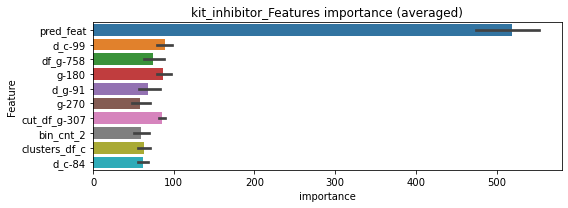

len(train_index) : 2608
len(valid_index) : 870
================================= fold 1/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000660801	valid_1's binary_logloss: 0.00330513
Early stopping, best iteration is:
[1665]	training's binary_logloss: 0.000417235	valid_1's binary_logloss: 0.00303842


len(train_index) : 2608
len(valid_index) : 870
================================= fold 2/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000657826	valid_1's binary_logloss: 0.00111293
[2000]	training's binary_logloss: 0.000360985	valid_1's binary_logloss: 0.00070589
[3000]	training's binary_logloss: 0.000270649	valid_1's binary_logloss: 0.000573561
[4000]	training's binary_logloss: 0.0002271	valid_1's binary_logloss: 0.00050904
Early stopping, best iteration is:
[4429]	training's binary_logloss: 0.000216794	valid_1's binary_logloss: 0.000494119


len(train_index) : 2609
len(valid_index) : 869
================================= fold 3/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000642701	valid_1's binary_logloss: 0.00708539
[2000]	training's binary_logloss: 0.000359516	valid_1's binary_logloss: 0.00660999
Early stopping, best iteration is:
[2058]	training's binary_logloss: 0.000352565	valid_1's binary_logloss: 0.0065962


len(train_index) : 2609
len(valid_index) : 869
================================= fold 4/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds


kit_inhibitor logloss: 0.003932786729721581


Early stopping, best iteration is:
[441]	training's binary_logloss: 0.0015038	valid_1's binary_logloss: 0.00560377
neg labels: 3289 → selected neg labels: 3289


laxative, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000388996	valid_1's binary_logloss: 0.000534873
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000187716	valid_1's binary_logloss: 0.000275099
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000387181	valid_1's binary_logloss: 0.000957348
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000192765	valid_1's binary_logloss: 0.000674688
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000390408	valid_1's binary_logloss: 0.000698859
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000191033	valid_1's binary_logloss: 0.000396627
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000389882	valid_1's binary_logloss: 0.000469769


1 / 3 AUC score:1.000
y_Threshold: 0.0005403, Threshold: 0.0017385, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00122, conf_1:0.00226
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0017385
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_2: 0.0517385
threshold: 0.0517385, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000189326	valid_1's binary_logloss: 0.000239111


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00028992	valid_1's binary_logloss: 0.000475458
[600]	training's binary_logloss: 0.000139181	valid_1's binary_logloss: 0.000303868
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000129832	valid_1's binary_logloss: 0.000294992
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000281332	valid_1's binary_logloss: 0.000774088
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000142261	valid_1's binary_logloss: 0.000605903
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000286081	valid_1's binary_logloss: 0.000442564
[600]	training's binary_logloss: 0.000136411	valid_1's binary_logloss: 0.000271278
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.00013108	valid_1's binary_logloss: 0.000264136
Training until validation scores don't improve for

2 / 3 AUC score:1.000
y_Threshold: 0.2500593, Threshold: 0.0517385, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0346560 Vs.target_rate: 0.00025
Num_p_label: 138.0, conf_0:0.04139, conf_1:0.06209
Num_p_label: 138.0, Expected: 1.0, Adj_threshold_1: 0.0517385
Num_p_label: 118.0, Expected: 1.0, Adj_threshold_2: 0.1017385
Num_p_label: 73.0, Expected: 1.0, Adj_threshold_3: 0.1517385
Num_p_label: 39.0, Expected: 1.0, Adj_threshold_4: 0.2017385
Num_p_label: 23.0, Expected: 1.0, Adj_threshold_5: 0.2517385
Num_p_label: 15.0, Expected: 1.0, Adj_threshold_6: 0.3017385
Num_p_label: 10.0, Expected: 1.0, Adj_threshold_7: 0.3517385
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_8: 0.4017385
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_9: 0.4517385
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_10: 0.5017385
threshold: 0.5517385, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000142418	valid_1's binary_logloss: 0.000265342


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000287685	valid_1's binary_logloss: 0.000465724
[600]	training's binary_logloss: 0.00014045	valid_1's binary_logloss: 0.00028588
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000128529	valid_1's binary_logloss: 0.000273096
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000282928	valid_1's binary_logloss: 0.000751895
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000140166	valid_1's binary_logloss: 0.00056172
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00028628	valid_1's binary_logloss: 0.000428201
[600]	training's binary_logloss: 0.000136065	valid_1's binary_logloss: 0.000261419
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000130814	valid_1's binary_logloss: 0.000254462
Training until validation scores don't improve for 3

3 / 3 AUC score:1.000
y_Threshold: 0.2463328, Threshold: 0.5517385, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0002511 Vs.target_rate: 0.00025
Num_p_label: 1.0, conf_0:0.49656, conf_1:0.60691
threshold: 0.5517385, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


[900]	training's binary_logloss: 0.000122956	valid_1's binary_logloss: 0.000257156
Early stopping, best iteration is:
[912]	training's binary_logloss: 0.000122777	valid_1's binary_logloss: 0.000257076


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


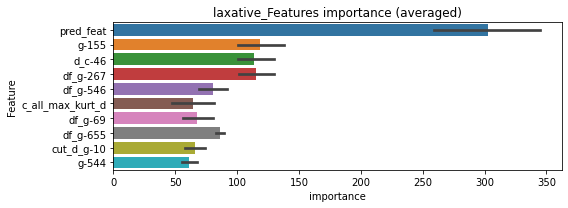

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 laxative=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000325582	valid_1's binary_logloss: 0.000481278
[2000]	training's binary_logloss: 0.000201677	valid_1's binary_logloss: 0.000343253
[3000]	training's binary_logloss: 0.000170344	valid_1's binary_logloss: 0.000309132
[4000]	training's binary_logloss: 0.000157103	valid_1's binary_logloss: 0.000295751
[5000]	training's binary_logloss: 0.000149778	valid_1's binary_logloss: 0.000288319
[6000]	training's binary_logloss: 0.000144753	valid_1's binary_logloss: 0.000283206
[7000]	training's binary_logloss: 0.000140987	valid_1's binary_logloss: 0.000279298
[8000]	training's binary_logloss: 0.000138238	valid_1's binary_logloss: 0.000276483
[9000]	training's binary_logloss: 0.000136089	valid_1's binary_logloss: 0.000274342
Early stopping, best iteration is:
[9382]	training's binary_logloss: 0.000135396	valid_1's binary_logloss: 0.000273659


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 laxative=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000316691	valid_1's binary_logloss: 0.000889847
[2000]	training's binary_logloss: 0.000197526	valid_1's binary_logloss: 0.000738202
[3000]	training's binary_logloss: 0.000167334	valid_1's binary_logloss: 0.000684505
Early stopping, best iteration is:
[3805]	training's binary_logloss: 0.000154851	valid_1's binary_logloss: 0.00065727


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 laxative=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000318779	valid_1's binary_logloss: 0.000418864
[2000]	training's binary_logloss: 0.00019812	valid_1's binary_logloss: 0.000292536
[3000]	training's binary_logloss: 0.000166573	valid_1's binary_logloss: 0.000262089
[4000]	training's binary_logloss: 0.000152347	valid_1's binary_logloss: 0.000248916
[5000]	training's binary_logloss: 0.000144627	valid_1's binary_logloss: 0.000241811
Early stopping, best iteration is:
[5506]	training's binary_logloss: 0.000141789	valid_1's binary_logloss: 0.000238753


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 laxative=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000319633	valid_1's binary_logloss: 0.000478625
[2000]	training's binary_logloss: 0.00019807	valid_1's binary_logloss: 0.000358449
[3000]	training's binary_logloss: 0.000167644	valid_1's binary_logloss: 0.000327867
[4000]	training's binary_logloss: 0.000153418	valid_1's binary_logloss: 0.000306262
[5000]	training's binary_logloss: 0.00014583	valid_1's binary_logloss: 0.000297064
Early stopping, best iteration is:
[5276]	training's binary_logloss: 0.000144326	valid_1's binary_logloss: 0.000295626


laxative logloss: 0.0003663633957506522


neg labels: 3289 → selected neg labels: 3289


leukotriene_inhibitor, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000412318	valid_1's binary_logloss: 0.000680255
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000197005	valid_1's binary_logloss: 0.000370756
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000407422	valid_1's binary_logloss: 0.00433575
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000197066	valid_1's binary_logloss: 0.0037621
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000415298	valid_1's binary_logloss: 0.000450029
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000199826	valid_1's binary_logloss: 0.00021963
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000404529	valid_1's binary_logloss: 0.000880922


1 / 3 AUC score:1.000
y_Threshold: 0.0005899, Threshold: 0.0017259, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00121, conf_1:0.00224
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0017259
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.0517259
threshold: 0.0517259, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000195621	valid_1's binary_logloss: 0.000546884


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000296942	valid_1's binary_logloss: 0.000356205
[600]	training's binary_logloss: 0.000140645	valid_1's binary_logloss: 0.000194555
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000129471	valid_1's binary_logloss: 0.000184478
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000285049	valid_1's binary_logloss: 0.000566837
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000142225	valid_1's binary_logloss: 0.000438172
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000291068	valid_1's binary_logloss: 0.000710942
[600]	training's binary_logloss: 0.000137035	valid_1's binary_logloss: 0.000439394
Early stopping, best iteration is:
[794]	training's binary_logloss: 0.000126656	valid_1's binary_logloss: 0.000416667
Training until validation scores don't improve f

2 / 3 AUC score:1.000
y_Threshold: 0.2587068, Threshold: 0.0517259, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0396786 Vs.target_rate: 0.00025
Num_p_label: 158.0, conf_0:0.04138, conf_1:0.06207
Num_p_label: 158.0, Expected: 1.0, Adj_threshold_1: 0.0517259
Num_p_label: 103.0, Expected: 1.0, Adj_threshold_2: 0.1017259
Num_p_label: 60.0, Expected: 1.0, Adj_threshold_3: 0.1517259
Num_p_label: 35.0, Expected: 1.0, Adj_threshold_4: 0.2017259
Num_p_label: 24.0, Expected: 1.0, Adj_threshold_5: 0.2517259
Num_p_label: 18.0, Expected: 1.0, Adj_threshold_6: 0.3017259
Num_p_label: 14.0, Expected: 1.0, Adj_threshold_7: 0.3517259
Num_p_label: 11.0, Expected: 1.0, Adj_threshold_8: 0.4017259
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_9: 0.4517259
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_10: 0.5017259


Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000126231	valid_1's binary_logloss: 0.000170983


threshold: 0.5517259, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000301505	valid_1's binary_logloss: 0.000384184
[600]	training's binary_logloss: 0.000142286	valid_1's binary_logloss: 0.00021349
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000132293	valid_1's binary_logloss: 0.000204723
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000289592	valid_1's binary_logloss: 0.000688014
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000158764	valid_1's binary_logloss: 0.000558092
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000297636	valid_1's binary_logloss: 0.00065572
[600]	training's binary_logloss: 0.000138324	valid_1's binary_logloss: 0.000415583
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000128198	valid_1's binary_logloss: 0.000396922
Training until validation scores don't improve for

3 / 3 AUC score:1.000
y_Threshold: 0.2203035, Threshold: 0.5517259, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00025
Num_p_label: 3.0, conf_0:0.49655, conf_1:0.60690
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.5517259
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.6017259
threshold: 0.6017259, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[859]	training's binary_logloss: 0.00012777	valid_1's binary_logloss: 0.000123923


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


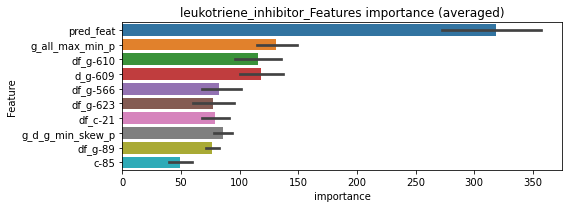

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000327359	valid_1's binary_logloss: 0.000387059
[2000]	training's binary_logloss: 0.00020331	valid_1's binary_logloss: 0.000260344
[3000]	training's binary_logloss: 0.000172378	valid_1's binary_logloss: 0.000227456
[4000]	training's binary_logloss: 0.00015835	valid_1's binary_logloss: 0.000211583
[5000]	training's binary_logloss: 0.000150402	valid_1's binary_logloss: 0.000203322
Early stopping, best iteration is:
[5042]	training's binary_logloss: 0.000150096	valid_1's binary_logloss: 0.000203045


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000320473	valid_1's binary_logloss: 0.000511205
[2000]	training's binary_logloss: 0.000199236	valid_1's binary_logloss: 0.000381633
[3000]	training's binary_logloss: 0.000168031	valid_1's binary_logloss: 0.000345701
[4000]	training's binary_logloss: 0.000152519	valid_1's binary_logloss: 0.000330567
[5000]	training's binary_logloss: 0.000143694	valid_1's binary_logloss: 0.000322565
Early stopping, best iteration is:
[5042]	training's binary_logloss: 0.000143354	valid_1's binary_logloss: 0.000322205


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000329226	valid_1's binary_logloss: 0.000692497
[2000]	training's binary_logloss: 0.000204816	valid_1's binary_logloss: 0.000518343
Early stopping, best iteration is:
[2710]	training's binary_logloss: 0.000179143	valid_1's binary_logloss: 0.000486737


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000324834	valid_1's binary_logloss: 0.000324704
[2000]	training's binary_logloss: 0.000201472	valid_1's binary_logloss: 0.000202097
[3000]	training's binary_logloss: 0.000170465	valid_1's binary_logloss: 0.000169891
[4000]	training's binary_logloss: 0.000155277	valid_1's binary_logloss: 0.000153522
[5000]	training's binary_logloss: 0.000147128	valid_1's binary_logloss: 0.000144962
[6000]	training's binary_logloss: 0.000141297	valid_1's binary_logloss: 0.000138815
[7000]	training's binary_logloss: 0.000136969	valid_1's binary_logloss: 0.000134387
[8000]	training's binary_logloss: 0.000133947	valid_1's binary_logloss: 0.000131428
[9000]	training's binary_logloss: 0.000131596	valid_1's binary_logloss: 0.000128926
Early stopping, best iteration is:
[9548]	training's binary_logloss: 0.00013058	valid_1's binary_logloss: 0.000127791


leukotriene_inhibitor logloss: 0.00028500843622644256


neg labels: 3289 → selected neg labels: 3282


leukotriene_receptor_antagonist, len(trt): 62, len(othr): 3282
target_rate: 0.0026035 → Adj_target_rate: 0.0028037
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00462431	valid_1's binary_logloss: 0.0398424
[600]	training's binary_logloss: 0.000893637	valid_1's binary_logloss: 0.0298032
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000735213	valid_1's binary_logloss: 0.0292892
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00441843	valid_1's binary_logloss: 0.04393
[600]	training's binary_logloss: 0.000877085	valid_1's binary_logloss: 0.0374787
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000873106	valid_1's binary_logloss: 0.0373934
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00523788	valid_1's binary_logloss: 0.0119067
[600]	training's binary_logloss: 0.000959271	valid_1's binary_logloss: 0.00436815
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000710975	valid_1's binary_loglos

1 / 3 AUC score:1.000
y_Threshold: 0.0049626, Threshold: 0.0116125, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00260
Num_p_label: 40.0, conf_0:0.00813, conf_1:0.01510
Num_p_label: 40.0, Expected: 10.4, Adj_threshold_1: 0.0116125
Num_p_label: 1.0, Expected: 10.4, Adj_threshold_2: 0.0616125
threshold: 0.0616125, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110064	valid_1's binary_logloss: 0.00346798
[600]	training's binary_logloss: 0.000230927	valid_1's binary_logloss: 0.00176526
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000179125	valid_1's binary_logloss: 0.00160592
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001074	valid_1's binary_logloss: 0.00470409
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000283049	valid_1's binary_logloss: 0.00307465
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110732	valid_1's binary_logloss: 0.0030288
[600]	training's binary_logloss: 0.000230111	valid_1's binary_logloss: 0.00164283
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.00018103	valid_1's binary_logloss: 0.00153189
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:1.000
y_Threshold: 0.6211092, Threshold: 0.0616125, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 651.0/3796
p_label_rate: 0.0464591 Vs.target_rate: 0.00260
Num_p_label: 185.0, conf_0:0.04929, conf_1:0.07393
Num_p_label: 185.0, Expected: 10.4, Adj_threshold_1: 0.0616125
Num_p_label: 184.0, Expected: 10.4, Adj_threshold_2: 0.1116125
Num_p_label: 184.0, Expected: 10.4, Adj_threshold_3: 0.1616125
Num_p_label: 184.0, Expected: 10.4, Adj_threshold_4: 0.2116125
Num_p_label: 184.0, Expected: 10.4, Adj_threshold_5: 0.2616125
Num_p_label: 184.0, Expected: 10.4, Adj_threshold_6: 0.3116125
Num_p_label: 184.0, Expected: 10.4, Adj_threshold_7: 0.3616125
Num_p_label: 184.0, Expected: 10.4, Adj_threshold_8: 0.4116125


[300]	training's binary_logloss: 0.00106915	valid_1's binary_logloss: 0.0087634
Early stopping, best iteration is:
[286]	training's binary_logloss: 0.00121464	valid_1's binary_logloss: 0.00863373


Num_p_label: 180.0, Expected: 10.4, Adj_threshold_9: 0.4616125
Num_p_label: 164.0, Expected: 10.4, Adj_threshold_10: 0.5116125
threshold: 0.5616125, positive_p_label: 129.0/3982, p_label_rate: 0.0323958
positive_y_label: 651.0/3796, y_label_rate: 0.1714963
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110081	valid_1's binary_logloss: 0.00472038
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000251444	valid_1's binary_logloss: 0.00317034
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107409	valid_1's binary_logloss: 0.00557108
[600]	training's binary_logloss: 0.000229475	valid_1's binary_logloss: 0.00398462
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000237898	valid_1's binary_logloss: 0.00397167
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112418	valid_1's binary_logloss: 0.00335224
[600]	training's binary_logloss: 0.000237986	valid_1's binary_logloss: 0.00173907
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000230471	valid_1's binary_logloss: 0.00171921
Training until validation scores don't improve for 30 round

3 / 3 AUC score:1.000
y_Threshold: 0.3157802, Threshold: 0.5616125, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 649.0/3792
p_label_rate: 0.0022602 Vs.target_rate: 0.00260
Num_p_label: 9.0, conf_0:0.50000, conf_1:0.61777
threshold: 0.5616125, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 649.0/3792, y_label_rate: 0.1711498


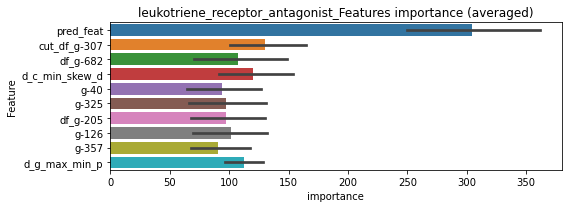

len(train_index) : 2844
len(valid_index) : 948
================================= fold 1/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000552886	valid_1's binary_logloss: 0.00110525
[2000]	training's binary_logloss: 0.000312006	valid_1's binary_logloss: 0.000808191
[3000]	training's binary_logloss: 0.000243428	valid_1's binary_logloss: 0.000712273
[4000]	training's binary_logloss: 0.000211099	valid_1's binary_logloss: 0.000651446
Early stopping, best iteration is:
[4038]	training's binary_logloss: 0.000210309	valid_1's binary_logloss: 0.000650454


len(train_index) : 2844
len(valid_index) : 948
================================= fold 2/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000563326	valid_1's binary_logloss: 0.0026385
Early stopping, best iteration is:
[1627]	training's binary_logloss: 0.000368066	valid_1's binary_logloss: 0.00233373


len(train_index) : 2844
len(valid_index) : 948
================================= fold 3/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000545098	valid_1's binary_logloss: 0.00406239
[2000]	training's binary_logloss: 0.000312668	valid_1's binary_logloss: 0.00374868
Early stopping, best iteration is:
[2028]	training's binary_logloss: 0.000309706	valid_1's binary_logloss: 0.00374512


len(train_index) : 2844
len(valid_index) : 948
================================= fold 4/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000554491	valid_1's binary_logloss: 0.00387617
Early stopping, best iteration is:
[1389]	training's binary_logloss: 0.000415126	valid_1's binary_logloss: 0.00366346


leukotriene_receptor_antagonist logloss: 0.0025987550132457434


neg labels: 3289 → selected neg labels: 3288


lipase_inhibitor, len(trt): 12, len(othr): 3288
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000671534	valid_1's binary_logloss: 0.00755948
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000268538	valid_1's binary_logloss: 0.00688587
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000696108	valid_1's binary_logloss: 0.00227405
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000263891	valid_1's binary_logloss: 0.00120011
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000726234	valid_1's binary_logloss: 0.000975394
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000284476	valid_1's binary_logloss: 0.000415693
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000710909	valid_1's binary_logloss: 0.00278404


1 / 3 AUC score:1.000
y_Threshold: 0.0009906, Threshold: 0.0030799, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.00216, conf_1:0.00400
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0030799
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0530799
threshold: 0.0530799, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000271237	valid_1's binary_logloss: 0.00175147


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000412419	valid_1's binary_logloss: 0.00155533
Early stopping, best iteration is:
[365]	training's binary_logloss: 0.000257043	valid_1's binary_logloss: 0.00130684
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00040026	valid_1's binary_logloss: 0.0014725
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000170203	valid_1's binary_logloss: 0.00113033
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000404214	valid_1's binary_logloss: 0.000374395
[600]	training's binary_logloss: 0.000156245	valid_1's binary_logloss: 0.000127486
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000140045	valid_1's binary_logloss: 0.000109228
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000396065	valid_1's binary_logloss: 0.000

2 / 3 AUC score:1.000
y_Threshold: 0.4722791, Threshold: 0.0530799, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0429432 Vs.target_rate: 0.00050
Num_p_label: 171.0, conf_0:0.04246, conf_1:0.06370
Num_p_label: 171.0, Expected: 2.0, Adj_threshold_1: 0.0530799
Num_p_label: 171.0, Expected: 2.0, Adj_threshold_2: 0.1030799
Num_p_label: 162.0, Expected: 2.0, Adj_threshold_3: 0.1530799
Num_p_label: 149.0, Expected: 2.0, Adj_threshold_4: 0.2030799
Num_p_label: 128.0, Expected: 2.0, Adj_threshold_5: 0.2530799


[600]	training's binary_logloss: 0.000155935	valid_1's binary_logloss: 0.00062007
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000151686	valid_1's binary_logloss: 0.00061441


Num_p_label: 107.0, Expected: 2.0, Adj_threshold_6: 0.3030799
Num_p_label: 76.0, Expected: 2.0, Adj_threshold_7: 0.3530799
Num_p_label: 53.0, Expected: 2.0, Adj_threshold_8: 0.4030799
Num_p_label: 42.0, Expected: 2.0, Adj_threshold_9: 0.4530799
Num_p_label: 30.0, Expected: 2.0, Adj_threshold_10: 0.5030799
threshold: 0.5530799, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000410646	valid_1's binary_logloss: 0.0016795
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.0001778	valid_1's binary_logloss: 0.00122144
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000401356	valid_1's binary_logloss: 0.00133819
Early stopping, best iteration is:
[432]	training's binary_logloss: 0.000201942	valid_1's binary_logloss: 0.000999984
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000403787	valid_1's binary_logloss: 0.000368059
[600]	training's binary_logloss: 0.00015668	valid_1's binary_logloss: 0.000127711
[900]	training's binary_logloss: 0.000139008	valid_1's binary_logloss: 0.000107922
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.00013853	valid_1's binary_logloss: 0.000107383
Training until validation scores don't improve for 30 ro

3 / 3 AUC score:1.000
y_Threshold: 0.3761675, Threshold: 0.5530799, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0030136 Vs.target_rate: 0.00050
Num_p_label: 12.0, conf_0:0.49777, conf_1:0.60839
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_1: 0.5530799
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_2: 0.6030799
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_3: 0.6530799
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_4: 0.7030799
Num_p_label: 2.0, Expected: 2.0, Adj_threshold_5: 0.7530799
threshold: 0.7530799, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000157662	valid_1's binary_logloss: 0.00055306


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


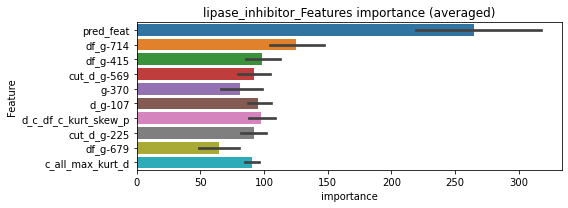

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 lipase_inhibitor=================================


Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000541553	valid_1's binary_logloss: 0.00292432
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000376107	valid_1's binary_logloss: 0.00214037
Early stopping, best iteration is:
[1578]	training's binary_logloss: 0.000264898	valid_1's binary_logloss: 0.00190568


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000379987	valid_1's binary_logloss: 0.000329989
[2000]	training's binary_logloss: 0.000233006	valid_1's binary_logloss: 0.000193534
[3000]	training's binary_logloss: 0.000192575	valid_1's binary_logloss: 0.000154308
[4000]	training's binary_logloss: 0.000173909	valid_1's binary_logloss: 0.000135533
[5000]	training's binary_logloss: 0.000163956	valid_1's binary_logloss: 0.000125344
[6000]	training's binary_logloss: 0.000157051	valid_1's binary_logloss: 0.000118214
[7000]	training's binary_logloss: 0.000152306	valid_1's binary_logloss: 0.000113396
[8000]	training's binary_logloss: 0.000148551	valid_1's binary_logloss: 0.000109461
Early stopping, best iteration is:
[8622]	training's binary_logloss: 0.000146939	valid_1's binary_logloss: 0.000107774


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000375229	valid_1's binary_logloss: 0.000701556
[2000]	training's binary_logloss: 0.000231411	valid_1's binary_logloss: 0.000550814
[3000]	training's binary_logloss: 0.000189329	valid_1's binary_logloss: 0.000501466
Early stopping, best iteration is:
[3684]	training's binary_logloss: 0.000174355	valid_1's binary_logloss: 0.000481647


lipase_inhibitor logloss: 0.0013561130817187359


neg labels: 3289 → selected neg labels: 3284


lipoxygenase_inhibitor, len(trt): 61, len(othr): 3284
target_rate: 0.0025615 → Adj_target_rate: 0.0027652
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0052159	valid_1's binary_logloss: 0.0336659
[600]	training's binary_logloss: 0.000947571	valid_1's binary_logloss: 0.0248884
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000703265	valid_1's binary_logloss: 0.0243707
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00516584	valid_1's binary_logloss: 0.0273751
[600]	training's binary_logloss: 0.000950652	valid_1's binary_logloss: 0.0172209
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000737182	valid_1's binary_logloss: 0.0164046
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00545592	valid_1's binary_logloss: 0.0175534
[600]	training's binary_logloss: 0.000990232	valid_1's binary_logloss: 0.00942589
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000730384	valid_1's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0069260, Threshold: 0.0340531, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, conf_0:0.02384, conf_1:0.04427
Num_p_label: 40.0, Expected: 10.2, Adj_threshold_1: 0.0340531
Num_p_label: 23.0, Expected: 10.2, Adj_threshold_2: 0.0840531
Num_p_label: 20.0, Expected: 10.2, Adj_threshold_3: 0.1340531
Num_p_label: 17.0, Expected: 10.2, Adj_threshold_4: 0.1840531
Num_p_label: 15.0, Expected: 10.2, Adj_threshold_5: 0.2340531
threshold: 0.2340531, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115046	valid_1's binary_logloss: 0.00559558
Early stopping, best iteration is:
[342]	training's binary_logloss: 0.000745541	valid_1's binary_logloss: 0.00489123
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116172	valid_1's binary_logloss: 0.00620573
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000324387	valid_1's binary_logloss: 0.00524527
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116416	valid_1's binary_logloss: 0.00235406
[600]	training's binary_logloss: 0.000236765	valid_1's binary_logloss: 0.000994476
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.00018537	valid_1's binary_logloss: 0.000918228
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112967	valid_1's binary_logloss: 0.0045274

2 / 3 AUC score:1.000
y_Threshold: 0.6343444, Threshold: 0.2340531, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0517328 Vs.target_rate: 0.00256
Num_p_label: 206.0, conf_0:0.18724, conf_1:0.28086
Num_p_label: 206.0, Expected: 10.2, Adj_threshold_1: 0.2340531
Num_p_label: 204.0, Expected: 10.2, Adj_threshold_2: 0.2840531
Num_p_label: 202.0, Expected: 10.2, Adj_threshold_3: 0.3340531
Num_p_label: 202.0, Expected: 10.2, Adj_threshold_4: 0.3840531
Num_p_label: 200.0, Expected: 10.2, Adj_threshold_5: 0.4340531
Num_p_label: 196.0, Expected: 10.2, Adj_threshold_6: 0.4840531
Num_p_label: 180.0, Expected: 10.2, Adj_threshold_7: 0.5340531
Num_p_label: 150.0, Expected: 10.2, Adj_threshold_8: 0.5840531
Num_p_label: 117.0, Expected: 10.2, Adj_threshold_9: 0.6340531
Num_p_label: 89.0, Expected: 10.2, Adj_threshold_10: 0.6840531


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000254482	valid_1's binary_logloss: 0.00292951


threshold: 0.7340531, positive_p_label: 50.0/3982, p_label_rate: 0.0125565
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115938	valid_1's binary_logloss: 0.00627559
Early stopping, best iteration is:
[406]	training's binary_logloss: 0.00049063	valid_1's binary_logloss: 0.00485573
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114386	valid_1's binary_logloss: 0.0038057
[600]	training's binary_logloss: 0.00023108	valid_1's binary_logloss: 0.00228057
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000178424	valid_1's binary_logloss: 0.00216724
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117291	valid_1's binary_logloss: 0.00185167
[600]	training's binary_logloss: 0.000237184	valid_1's binary_logloss: 0.000457702
[900]	training's binary_logloss: 0.00017641	valid_1's binary_logloss: 0.000344375
Early stopping, best iteration is:
[979]	training's binary_logloss: 0.000172065	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.4516780, Threshold: 0.7340531, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3798
p_label_rate: 0.0095429 Vs.target_rate: 0.00256
Num_p_label: 38.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 38.0, Expected: 10.2, Adj_threshold_1: 0.7340531
Num_p_label: 34.0, Expected: 10.2, Adj_threshold_2: 0.7840531
threshold: 0.7840531, positive_p_label: 34.0/3982, p_label_rate: 0.0085384


Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000182992	valid_1's binary_logloss: 0.00208175


positive_y_label: 651.0/3798, y_label_rate: 0.1714060


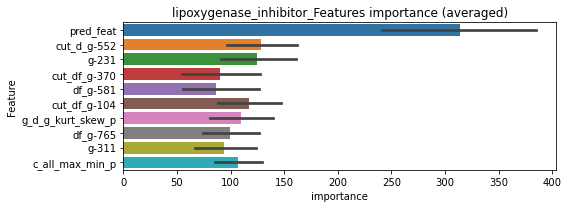

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000547944	valid_1's binary_logloss: 0.000849028
[2000]	training's binary_logloss: 0.000312977	valid_1's binary_logloss: 0.000513519
[3000]	training's binary_logloss: 0.000244587	valid_1's binary_logloss: 0.000406015
[4000]	training's binary_logloss: 0.000213855	valid_1's binary_logloss: 0.0003568
[5000]	training's binary_logloss: 0.000198291	valid_1's binary_logloss: 0.000331839
[6000]	training's binary_logloss: 0.000187675	valid_1's binary_logloss: 0.000314686
[7000]	training's binary_logloss: 0.000180423	valid_1's binary_logloss: 0.000303484
[8000]	training's binary_logloss: 0.000174862	valid_1's binary_logloss: 0.000294241
Early stopping, best iteration is:
[8190]	training's binary_logloss: 0.000174021	valid_1's binary_logloss: 0.000293029


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000549308	valid_1's binary_logloss: 0.00338774
[2000]	training's binary_logloss: 0.000315484	valid_1's binary_logloss: 0.00298621
Early stopping, best iteration is:
[2159]	training's binary_logloss: 0.000301897	valid_1's binary_logloss: 0.00294956


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000549824	valid_1's binary_logloss: 0.00242902
[2000]	training's binary_logloss: 0.000318377	valid_1's binary_logloss: 0.0020339
[3000]	training's binary_logloss: 0.000249631	valid_1's binary_logloss: 0.00191275
Early stopping, best iteration is:
[3438]	training's binary_logloss: 0.000232507	valid_1's binary_logloss: 0.0018843


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000539907	valid_1's binary_logloss: 0.00276169
Early stopping, best iteration is:
[991]	training's binary_logloss: 0.00054563	valid_1's binary_logloss: 0.00275156


lipoxygenase_inhibitor logloss: 0.001970154380061956


neg labels: 3289 → selected neg labels: 3287


lxr_agonist, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000438025	valid_1's binary_logloss: 0.000586001
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000217254	valid_1's binary_logloss: 0.000309694
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000423633	valid_1's binary_logloss: 0.00208185
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000216255	valid_1's binary_logloss: 0.00153216
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000433301	valid_1's binary_logloss: 0.000700149
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000220665	valid_1's binary_logloss: 0.000369512
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00043096	valid_1's binary_logloss: 0.0024915


1 / 3 AUC score:1.000
y_Threshold: 0.0006848, Threshold: 0.0030299, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00212, conf_1:0.00394
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0030299
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_2: 0.0530299
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_3: 0.1030299
threshold: 0.1030299, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000217524	valid_1's binary_logloss: 0.00187279


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000297822	valid_1's binary_logloss: 0.000657053
[600]	training's binary_logloss: 0.000141924	valid_1's binary_logloss: 0.000438328
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000128869	valid_1's binary_logloss: 0.000423817
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000292951	valid_1's binary_logloss: 0.00096653
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000154019	valid_1's binary_logloss: 0.000789445
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000298043	valid_1's binary_logloss: 0.000403155
[600]	training's binary_logloss: 0.000140272	valid_1's binary_logloss: 0.000217417
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000129269	valid_1's binary_logloss: 0.000202148
Training until validation scores don't improve fo

2 / 3 AUC score:1.000
y_Threshold: 0.1867882, Threshold: 0.1030299, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0426921 Vs.target_rate: 0.00025
Num_p_label: 170.0, conf_0:0.08242, conf_1:0.12364
Num_p_label: 170.0, Expected: 1.0, Adj_threshold_1: 0.1030299
Num_p_label: 118.0, Expected: 1.0, Adj_threshold_2: 0.1530299
Num_p_label: 73.0, Expected: 1.0, Adj_threshold_3: 0.2030299
Num_p_label: 47.0, Expected: 1.0, Adj_threshold_4: 0.2530299


Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000158437	valid_1's binary_logloss: 0.000493965


Num_p_label: 33.0, Expected: 1.0, Adj_threshold_5: 0.3030299
Num_p_label: 25.0, Expected: 1.0, Adj_threshold_6: 0.3530299
Num_p_label: 19.0, Expected: 1.0, Adj_threshold_7: 0.4030299
Num_p_label: 16.0, Expected: 1.0, Adj_threshold_8: 0.4530299
Num_p_label: 13.0, Expected: 1.0, Adj_threshold_9: 0.5030299
Num_p_label: 10.0, Expected: 1.0, Adj_threshold_10: 0.5530299
threshold: 0.6030299, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000311859	valid_1's binary_logloss: 0.000651622
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000153691	valid_1's binary_logloss: 0.000459155
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000300705	valid_1's binary_logloss: 0.00150334
Early stopping, best iteration is:
[367]	training's binary_logloss: 0.000197212	valid_1's binary_logloss: 0.00136675
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000299398	valid_1's binary_logloss: 0.000392811
[600]	training's binary_logloss: 0.000139124	valid_1's binary_logloss: 0.000208863
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000128076	valid_1's binary_logloss: 0.000195877
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000301709	valid_1's binary_logloss: 0

3 / 3 AUC score:1.000
y_Threshold: 0.1554996, Threshold: 0.6030299, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00025
Num_p_label: 5.0, conf_0:0.50000, conf_1:0.66333
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_1: 0.6030299
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.6530299
threshold: 0.6530299, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000162957	valid_1's binary_logloss: 0.000641877


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


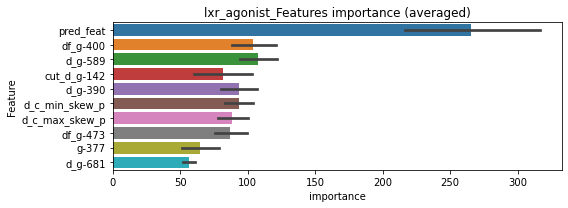

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000327889	valid_1's binary_logloss: 0.000585385
[2000]	training's binary_logloss: 0.000203893	valid_1's binary_logloss: 0.000419185
[3000]	training's binary_logloss: 0.000173835	valid_1's binary_logloss: 0.000382296
[4000]	training's binary_logloss: 0.000159564	valid_1's binary_logloss: 0.000369436
[5000]	training's binary_logloss: 0.000151359	valid_1's binary_logloss: 0.000360915
Early stopping, best iteration is:
[5495]	training's binary_logloss: 0.000148309	valid_1's binary_logloss: 0.000357177


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000320592	valid_1's binary_logloss: 0.00131249
[2000]	training's binary_logloss: 0.000199959	valid_1's binary_logloss: 0.0011491
Early stopping, best iteration is:
[2417]	training's binary_logloss: 0.000184285	valid_1's binary_logloss: 0.00113498


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000323496	valid_1's binary_logloss: 0.000403533
[2000]	training's binary_logloss: 0.000200943	valid_1's binary_logloss: 0.000266138
[3000]	training's binary_logloss: 0.000169715	valid_1's binary_logloss: 0.00023116
[4000]	training's binary_logloss: 0.00015465	valid_1's binary_logloss: 0.000216034
[5000]	training's binary_logloss: 0.000146499	valid_1's binary_logloss: 0.000206778
[6000]	training's binary_logloss: 0.000140932	valid_1's binary_logloss: 0.000200366
[7000]	training's binary_logloss: 0.000136786	valid_1's binary_logloss: 0.000194696
[8000]	training's binary_logloss: 0.000133781	valid_1's binary_logloss: 0.000189819
[9000]	training's binary_logloss: 0.000131528	valid_1's binary_logloss: 0.000187261
Early stopping, best iteration is:
[9039]	training's binary_logloss: 0.000131492	valid_1's binary_logloss: 0.000187204


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000321088	valid_1's binary_logloss: 0.000764477
[2000]	training's binary_logloss: 0.000200704	valid_1's binary_logloss: 0.000640717
Early stopping, best iteration is:
[2282]	training's binary_logloss: 0.000189001	valid_1's binary_logloss: 0.000625224


lxr_agonist logloss: 0.0005763670994871689


neg labels: 3289 → selected neg labels: 3284


mdm_inhibitor, len(trt): 31, len(othr): 3284
target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00248899	valid_1's binary_logloss: 0.0117188
[600]	training's binary_logloss: 0.000544189	valid_1's binary_logloss: 0.00687204
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000496171	valid_1's binary_logloss: 0.00676684
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00263438	valid_1's binary_logloss: 0.00728384
[600]	training's binary_logloss: 0.000553994	valid_1's binary_logloss: 0.0030873
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000499152	valid_1's binary_logloss: 0.00296623
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0027526	valid_1's binary_logloss: 0.00718725
[600]	training's binary_logloss: 0.00056787	valid_1's binary_logloss: 0.00287307
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000498809	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0044343, Threshold: 0.0613865, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, conf_0:0.04297, conf_1:0.07980
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_1: 0.0613865
Num_p_label: 33.0, Expected: 5.2, Adj_threshold_2: 0.1113865
Num_p_label: 29.0, Expected: 5.2, Adj_threshold_3: 0.1613865
Num_p_label: 25.0, Expected: 5.2, Adj_threshold_4: 0.2113865
Num_p_label: 23.0, Expected: 5.2, Adj_threshold_5: 0.2613865
Num_p_label: 21.0, Expected: 5.2, Adj_threshold_6: 0.3113865
Num_p_label: 19.0, Expected: 5.2, Adj_threshold_7: 0.3613865
Num_p_label: 15.0, Expected: 5.2, Adj_threshold_8: 0.4113865
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_9: 0.4613865
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_10: 0.5113865
threshold: 0.5613865, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
============

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000789091	valid_1's binary_logloss: 0.00408451
[600]	training's binary_logloss: 0.000200593	valid_1's binary_logloss: 0.00312368
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000192314	valid_1's binary_logloss: 0.00311091
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00082164	valid_1's binary_logloss: 0.00213746
[600]	training's binary_logloss: 0.000201486	valid_1's binary_logloss: 0.00138546
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000191347	valid_1's binary_logloss: 0.0013697
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000839809	valid_1's binary_logloss: 0.00104385
[600]	training's binary_logloss: 0.000206273	valid_1's binary_logloss: 0.000282517
[900]	training's binary_logloss: 0.00016176	valid_1's binary_logloss: 0.000220531
Early stop

2 / 3 AUC score:1.000
y_Threshold: 0.5610906, Threshold: 0.5613865, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0404319 Vs.target_rate: 0.00130
Num_p_label: 161.0, conf_0:0.44911, conf_1:0.67366
Num_p_label: 161.0, Expected: 5.2, Adj_threshold_1: 0.5613865
Num_p_label: 143.0, Expected: 5.2, Adj_threshold_2: 0.6113865
Num_p_label: 121.0, Expected: 5.2, Adj_threshold_3: 0.6613865
Num_p_label: 99.0, Expected: 5.2, Adj_threshold_4: 0.7113865
Num_p_label: 80.0, Expected: 5.2, Adj_threshold_5: 0.7613865
threshold: 0.7613865, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000788894	valid_1's binary_logloss: 0.00587434
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000235675	valid_1's binary_logloss: 0.00513617
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000813571	valid_1's binary_logloss: 0.00234894
Early stopping, best iteration is:
[416]	training's binary_logloss: 0.000356914	valid_1's binary_logloss: 0.00189947
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000841112	valid_1's binary_logloss: 0.000937974
[600]	training's binary_logloss: 0.000206011	valid_1's binary_logloss: 0.00019731
[900]	training's binary_logloss: 0.000162234	valid_1's binary_logloss: 0.000139311
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.00016	valid_1's binary_logloss: 0.000136859
Training until validation scores don't improve for 30 rou

3 / 3 AUC score:1.000
y_Threshold: 0.5941059, Threshold: 0.7613865, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0160723 Vs.target_rate: 0.00130
Num_p_label: 64.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 64.0, Expected: 5.2, Adj_threshold_1: 0.7613865
threshold: 0.7613865, positive_p_label: 64.0/3982, p_label_rate: 0.0160723


Early stopping, best iteration is:
[1030]	training's binary_logloss: 0.00015748	valid_1's binary_logloss: 0.000238113


positive_y_label: 655.0/3806, y_label_rate: 0.1720967


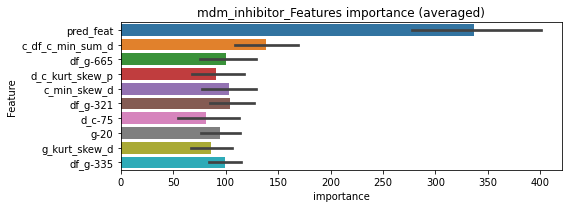

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000492467	valid_1's binary_logloss: 0.00432146
[2000]	training's binary_logloss: 0.000293605	valid_1's binary_logloss: 0.00406438
Early stopping, best iteration is:
[2426]	training's binary_logloss: 0.000263796	valid_1's binary_logloss: 0.00402352


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000497302	valid_1's binary_logloss: 0.000636057
[2000]	training's binary_logloss: 0.000298898	valid_1's binary_logloss: 0.000411751
[3000]	training's binary_logloss: 0.000241098	valid_1's binary_logloss: 0.000334961
[4000]	training's binary_logloss: 0.000212852	valid_1's binary_logloss: 0.000296754
[5000]	training's binary_logloss: 0.000197358	valid_1's binary_logloss: 0.000280854
Early stopping, best iteration is:
[4972]	training's binary_logloss: 0.00019751	valid_1's binary_logloss: 0.000280805


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000500883	valid_1's binary_logloss: 0.00124599
Early stopping, best iteration is:
[1936]	training's binary_logloss: 0.000306015	valid_1's binary_logloss: 0.00105213


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000491034	valid_1's binary_logloss: 0.00114576
[2000]	training's binary_logloss: 0.000293008	valid_1's binary_logloss: 0.000849709
[3000]	training's binary_logloss: 0.000235795	valid_1's binary_logloss: 0.000752193
Early stopping, best iteration is:
[3203]	training's binary_logloss: 0.000228183	valid_1's binary_logloss: 0.00074081


mdm_inhibitor logloss: 0.0015251046411942192


neg labels: 3289 → selected neg labels: 3273


mek_inhibitor, len(trt): 72, len(othr): 3273
target_rate: 0.0030234 → Adj_target_rate: 0.0031837
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00839958	valid_1's binary_logloss: 0.0459388
[600]	training's binary_logloss: 0.00125135	valid_1's binary_logloss: 0.0294939
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.00077562	valid_1's binary_logloss: 0.0280115
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0086725	valid_1's binary_logloss: 0.0366229
[600]	training's binary_logloss: 0.00128106	valid_1's binary_logloss: 0.0203441
[900]	training's binary_logloss: 0.000731116	valid_1's binary_logloss: 0.0186559
Early stopping, best iteration is:
[877]	training's binary_logloss: 0.000732654	valid_1's binary_logloss: 0.0186361
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00898462	valid_1's binary_logloss: 0.0271163
[600]	training's binary_logloss: 0.00132991	valid_1's binary_logloss: 0.00938219
[900]	training's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0082971, Threshold: 0.0252132, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 653/3793
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, conf_0:0.01765, conf_1:0.03278
Num_p_label: 40.0, Expected: 12.0, Adj_threshold_1: 0.0252132
Num_p_label: 9.0, Expected: 12.0, Adj_threshold_2: 0.0752132
threshold: 0.0752132, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 653.0/3793, y_label_rate: 0.1721592
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136487	valid_1's binary_logloss: 0.00373788
[600]	training's binary_logloss: 0.000244026	valid_1's binary_logloss: 0.00189778
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000202468	valid_1's binary_logloss: 0.00172025
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138515	valid_1's binary_logloss: 0.00489108
[600]	training's binary_logloss: 0.000246191	valid_1's binary_logloss: 0.0029555
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000221332	valid_1's binary_logloss: 0.00291736
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00140732	valid_1's binary_logloss: 0.00601789
[600]	training's binary_logloss: 0.000248997	valid_1's binary_logloss: 0.0040289
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000186453	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.5096122, Threshold: 0.0752132, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 650.0/3787
p_label_rate: 0.0489704 Vs.target_rate: 0.00302
Num_p_label: 195.0, conf_0:0.06017, conf_1:0.09026
Num_p_label: 195.0, Expected: 12.0, Adj_threshold_1: 0.0752132
Num_p_label: 194.0, Expected: 12.0, Adj_threshold_2: 0.1252132
Num_p_label: 194.0, Expected: 12.0, Adj_threshold_3: 0.1752132
Num_p_label: 194.0, Expected: 12.0, Adj_threshold_4: 0.2252132
Num_p_label: 194.0, Expected: 12.0, Adj_threshold_5: 0.2752132
Num_p_label: 191.0, Expected: 12.0, Adj_threshold_6: 0.3252132
Num_p_label: 180.0, Expected: 12.0, Adj_threshold_7: 0.3752132
Num_p_label: 158.0, Expected: 12.0, Adj_threshold_8: 0.4252132


[600]	training's binary_logloss: 0.000248208	valid_1's binary_logloss: 0.00456621
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000260185	valid_1's binary_logloss: 0.00455219


Num_p_label: 117.0, Expected: 12.0, Adj_threshold_9: 0.4752132
Num_p_label: 80.0, Expected: 12.0, Adj_threshold_10: 0.5252132
threshold: 0.5752132, positive_p_label: 52.0/3982, p_label_rate: 0.0130588
positive_y_label: 650.0/3787, y_label_rate: 0.1716398
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00137356	valid_1's binary_logloss: 0.00289331
[600]	training's binary_logloss: 0.000246752	valid_1's binary_logloss: 0.00102941
[900]	training's binary_logloss: 0.000175687	valid_1's binary_logloss: 0.000866857
Early stopping, best iteration is:
[976]	training's binary_logloss: 0.00016992	valid_1's binary_logloss: 0.00084836
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00137317	valid_1's binary_logloss: 0.00378213
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000288728	valid_1's binary_logloss: 0.00176409
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139535	valid_1's binary_logloss: 0.00714912
Early stopping, best iteration is:
[355]	training's binary_logloss: 0.000794312	valid_1's binary_logloss: 0.00612971
Training until validation scores don't improve for 30 round

3 / 3 AUC score:1.000
y_Threshold: 0.3115416, Threshold: 0.5752132, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 648.0/3783
p_label_rate: 0.0020090 Vs.target_rate: 0.00302
Num_p_label: 8.0, conf_0:0.50000, conf_1:0.63273
Num_p_label: 8.0, Expected: 12.0, Adj_threshold_1: 0.5752132
Num_p_label: 8.0, Expected: 12.0, Adj_threshold_2: 0.5552132
Num_p_label: 8.0, Expected: 12.0, Adj_threshold_3: 0.5352132
Num_p_label: 9.0, Expected: 12.0, Adj_threshold_4: 0.5152132
threshold: 0.5152132, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 648.0/3783, y_label_rate: 0.1712926


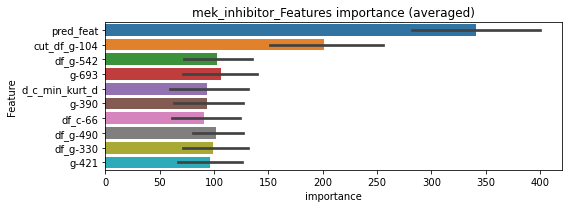

len(train_index) : 2837
len(valid_index) : 946
================================= fold 1/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000549954	valid_1's binary_logloss: 0.000897217
[2000]	training's binary_logloss: 0.000314494	valid_1's binary_logloss: 0.000596789
[3000]	training's binary_logloss: 0.000246937	valid_1's binary_logloss: 0.000511683
[4000]	training's binary_logloss: 0.000213121	valid_1's binary_logloss: 0.000461301
Early stopping, best iteration is:
[4209]	training's binary_logloss: 0.000208498	valid_1's binary_logloss: 0.000453682


len(train_index) : 2837
len(valid_index) : 946
================================= fold 2/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000557893	valid_1's binary_logloss: 0.00172984
Early stopping, best iteration is:
[1488]	training's binary_logloss: 0.000391865	valid_1's binary_logloss: 0.00148407


len(train_index) : 2837
len(valid_index) : 946
================================= fold 3/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000552451	valid_1's binary_logloss: 0.0030352
Early stopping, best iteration is:
[1845]	training's binary_logloss: 0.000335127	valid_1's binary_logloss: 0.00281703


len(train_index) : 2838
len(valid_index) : 945
================================= fold 4/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds


mek_inhibitor logloss: 0.0022603045041584076


Early stopping, best iteration is:
[723]	training's binary_logloss: 0.00074302	valid_1's binary_logloss: 0.00428355
neg labels: 3289 → selected neg labels: 3276


membrane_integrity_inhibitor, len(trt): 74, len(othr): 3276
target_rate: 0.0031074 → Adj_target_rate: 0.0032587
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00689202	valid_1's binary_logloss: 0.0313793
[600]	training's binary_logloss: 0.00117706	valid_1's binary_logloss: 0.0193123
[900]	training's binary_logloss: 0.000701636	valid_1's binary_logloss: 0.0179308
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000702843	valid_1's binary_logloss: 0.0179102
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00637193	valid_1's binary_logloss: 0.0371879
[600]	training's binary_logloss: 0.00113236	valid_1's binary_logloss: 0.0271118
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.00081823	valid_1's binary_logloss: 0.0262562
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0068592	valid_1's binary_logloss: 0.0423533
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.00177426	valid_1's binary_logloss: 0

1 / 3 AUC score:0.999
y_Threshold: 0.0087757, Threshold: 0.0257614, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 649/3787
p_label_rate: 0.0100452 Vs.target_rate: 0.00311
Num_p_label: 40.0, conf_0:0.01803, conf_1:0.03349
Num_p_label: 40.0, Expected: 12.4, Adj_threshold_1: 0.0257614
Num_p_label: 8.0, Expected: 12.4, Adj_threshold_2: 0.0757614
threshold: 0.0757614, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 649.0/3787, y_label_rate: 0.1713758
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119529	valid_1's binary_logloss: 0.00240625
[600]	training's binary_logloss: 0.000229674	valid_1's binary_logloss: 0.000673999
[900]	training's binary_logloss: 0.000164797	valid_1's binary_logloss: 0.000510459
Early stopping, best iteration is:
[987]	training's binary_logloss: 0.000159305	valid_1's binary_logloss: 0.000499007
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120622	valid_1's binary_logloss: 0.00231815
[600]	training's binary_logloss: 0.000232851	valid_1's binary_logloss: 0.000674646
[900]	training's binary_logloss: 0.000171039	valid_1's binary_logloss: 0.000550201
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.000168256	valid_1's binary_logloss: 0.00054492
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121506	valid_1's binary_logloss: 0.00693343
Early s

2 / 3 AUC score:1.000
y_Threshold: 0.2000560, Threshold: 0.0757614, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 647.0/3783
p_label_rate: 0.0454545 Vs.target_rate: 0.00311
Num_p_label: 181.0, conf_0:0.06061, conf_1:0.09091
Num_p_label: 181.0, Expected: 12.4, Adj_threshold_1: 0.0757614
Num_p_label: 171.0, Expected: 12.4, Adj_threshold_2: 0.1257614
Num_p_label: 134.0, Expected: 12.4, Adj_threshold_3: 0.1757614
Num_p_label: 93.0, Expected: 12.4, Adj_threshold_4: 0.2257614
Num_p_label: 44.0, Expected: 12.4, Adj_threshold_5: 0.2757614
Num_p_label: 31.0, Expected: 12.4, Adj_threshold_6: 0.3257614


[600]	training's binary_logloss: 0.000235247	valid_1's binary_logloss: 0.00556754
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000240321	valid_1's binary_logloss: 0.00556487


Num_p_label: 19.0, Expected: 12.4, Adj_threshold_7: 0.3757614
Num_p_label: 19.0, Expected: 12.4, Adj_threshold_8: 0.4257614
Num_p_label: 15.0, Expected: 12.4, Adj_threshold_9: 0.4757614
threshold: 0.4757614, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 647.0/3783, y_label_rate: 0.1710283
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00111732	valid_1's binary_logloss: 0.00303228
[600]	training's binary_logloss: 0.000216906	valid_1's binary_logloss: 0.000826721
[900]	training's binary_logloss: 0.000162038	valid_1's binary_logloss: 0.000619063
Early stopping, best iteration is:
[1112]	training's binary_logloss: 0.000145557	valid_1's binary_logloss: 0.00054799
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112024	valid_1's binary_logloss: 0.00208085
[600]	training's binary_logloss: 0.000216486	valid_1's binary_logloss: 0.000476577
[900]	training's binary_logloss: 0.000157424	valid_1's binary_logloss: 0.000342825
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000157403	valid_1's binary_logloss: 0.000342814
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112801	valid_1's binary_logloss: 0.00717764
Early 

3 / 3 AUC score:1.000
y_Threshold: 0.0939615, Threshold: 0.4757614, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000285458	valid_1's binary_logloss: 0.00321119


Remove_noisy_data: 2 → Positive_corect_labels: 646.0/3781
p_label_rate: 0.0263687 Vs.target_rate: 0.00311
Num_p_label: 105.0, conf_0:0.42819, conf_1:0.52334
Num_p_label: 105.0, Expected: 12.4, Adj_threshold_1: 0.4757614
Num_p_label: 103.0, Expected: 12.4, Adj_threshold_2: 0.5257614
Num_p_label: 36.0, Expected: 12.4, Adj_threshold_3: 0.5757614
Num_p_label: 12.0, Expected: 12.4, Adj_threshold_4: 0.6257614
threshold: 0.6257614, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 646.0/3781, y_label_rate: 0.1708543


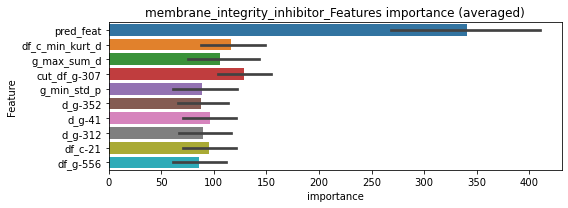

len(train_index) : 2835
len(valid_index) : 946
================================= fold 1/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000449306	valid_1's binary_logloss: 0.000848714
[2000]	training's binary_logloss: 0.00025058	valid_1's binary_logloss: 0.00047772
[3000]	training's binary_logloss: 0.000184519	valid_1's binary_logloss: 0.000352868
[4000]	training's binary_logloss: 0.000153204	valid_1's binary_logloss: 0.0002935
[5000]	training's binary_logloss: 0.000137151	valid_1's binary_logloss: 0.000263011
[6000]	training's binary_logloss: 0.000126748	valid_1's binary_logloss: 0.000243123
[7000]	training's binary_logloss: 0.000119535	valid_1's binary_logloss: 0.000229345
[8000]	training's binary_logloss: 0.00011456	valid_1's binary_logloss: 0.000219819
[9000]	training's binary_logloss: 0.000111054	valid_1's binary_logloss: 0.000213112
[10000]	training's binary_logloss: 0.000108578	valid_1's binary_logloss: 0.00020842
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000108578	valid_1's 

len(train_index) : 2836
len(valid_index) : 945
================================= fold 2/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2836
len(valid_index) : 945
================================= fold 3/4 membrane_integrity_inhibitor=================================


Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000693687	valid_1's binary_logloss: 0.00814664
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000546768	valid_1's binary_logloss: 0.0042377
[2000]	training's binary_logloss: 0.000308902	valid_1's binary_logloss: 0.00394503
Early stopping, best iteration is:
[2284]	training's binary_logloss: 0.00028293	valid_1's binary_logloss: 0.00391973


len(train_index) : 2836
len(valid_index) : 945
================================= fold 4/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000562364	valid_1's binary_logloss: 0.00104986
[2000]	training's binary_logloss: 0.000313591	valid_1's binary_logloss: 0.000698141
[3000]	training's binary_logloss: 0.000238126	valid_1's binary_logloss: 0.00057104
[4000]	training's binary_logloss: 0.000202911	valid_1's binary_logloss: 0.000507247
[5000]	training's binary_logloss: 0.00018444	valid_1's binary_logloss: 0.000469961
[6000]	training's binary_logloss: 0.000172407	valid_1's binary_logloss: 0.000443202
[7000]	training's binary_logloss: 0.000163195	valid_1's binary_logloss: 0.000423221
Early stopping, best iteration is:
[7664]	training's binary_logloss: 0.000158605	valid_1's binary_logloss: 0.000413401


membrane_integrity_inhibitor logloss: 0.0031714999196190983


neg labels: 3289 → selected neg labels: 3283


mineralocorticoid_receptor_antagonist, len(trt): 25, len(othr): 3283
target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00180055	valid_1's binary_logloss: 0.00483117
[600]	training's binary_logloss: 0.000428592	valid_1's binary_logloss: 0.00193933
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000423854	valid_1's binary_logloss: 0.00192938
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00179599	valid_1's binary_logloss: 0.00552827
[600]	training's binary_logloss: 0.000426543	valid_1's binary_logloss: 0.00264394
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000404819	valid_1's binary_logloss: 0.00260029
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0018704	valid_1's binary_logloss: 0.00494361
[600]	training's binary_logloss: 0.000432947	valid_1's binary_logloss: 0.00234241
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000421212	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0025663, Threshold: 0.0071749, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, conf_0:0.00502, conf_1:0.00933
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0071749
Num_p_label: 5.0, Expected: 4.2, Adj_threshold_2: 0.0571749


[600]	training's binary_logloss: 0.000417248	valid_1's binary_logloss: 0.00769712
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000427103	valid_1's binary_logloss: 0.00763644


threshold: 0.0571749, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000699012	valid_1's binary_logloss: 0.00134303
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000222287	valid_1's binary_logloss: 0.000753786
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000694023	valid_1's binary_logloss: 0.00198564
[600]	training's binary_logloss: 0.000194325	valid_1's binary_logloss: 0.00140116
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000182524	valid_1's binary_logloss: 0.00138012
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00069733	valid_1's binary_logloss: 0.00103579
[600]	training's binary_logloss: 0.000193025	valid_1's binary_logloss: 0.000400646
[900]	training's binary_logloss: 0.000158645	valid_1's binary_logloss: 0.00036145
Early stopping, best iteration is:
[971]	training's binary_logloss: 0.000155875	valid_1's 

2 / 3 AUC score:1.000
y_Threshold: 0.5974453, Threshold: 0.0571749, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0376695 Vs.target_rate: 0.00105
Num_p_label: 150.0, conf_0:0.04574, conf_1:0.06861
Num_p_label: 150.0, Expected: 4.2, Adj_threshold_1: 0.0571749
Num_p_label: 150.0, Expected: 4.2, Adj_threshold_2: 0.1071749
Num_p_label: 148.0, Expected: 4.2, Adj_threshold_3: 0.1571749
Num_p_label: 147.0, Expected: 4.2, Adj_threshold_4: 0.2071749
Num_p_label: 145.0, Expected: 4.2, Adj_threshold_5: 0.2571749
Num_p_label: 142.0, Expected: 4.2, Adj_threshold_6: 0.3071749
Num_p_label: 135.0, Expected: 4.2, Adj_threshold_7: 0.3571749
Num_p_label: 113.0, Expected: 4.2, Adj_threshold_8: 0.4071749
Num_p_label: 88.0, Expected: 4.2, Adj_threshold_9: 0.4571749
Num_p_label: 66.0, Expected: 4.2, Adj_threshold_10: 0.5071749
threshold: 0.5571749, positive_p_label: 49.0/3982, p_label_rate: 0.0123054
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
==

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000703819	valid_1's binary_logloss: 0.00131803
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000217061	valid_1's binary_logloss: 0.000772691
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000696541	valid_1's binary_logloss: 0.00248831
Early stopping, best iteration is:
[418]	training's binary_logloss: 0.000304641	valid_1's binary_logloss: 0.00203053
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000718419	valid_1's binary_logloss: 0.00115929
[600]	training's binary_logloss: 0.000195206	valid_1's binary_logloss: 0.000486596
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000175837	valid_1's binary_logloss: 0.000463259
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000695734	valid_1's binary_logloss: 0.0

3 / 3 AUC score:1.000
y_Threshold: 0.5454022, Threshold: 0.5571749, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0097941 Vs.target_rate: 0.00105
Num_p_label: 39.0, conf_0:0.50000, conf_1:0.61289
Num_p_label: 39.0, Expected: 4.2, Adj_threshold_1: 0.5571749
Num_p_label: 21.0, Expected: 4.2, Adj_threshold_2: 0.6071749
Num_p_label: 13.0, Expected: 4.2, Adj_threshold_3: 0.6571749
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_4: 0.7071749
threshold: 0.7071749, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


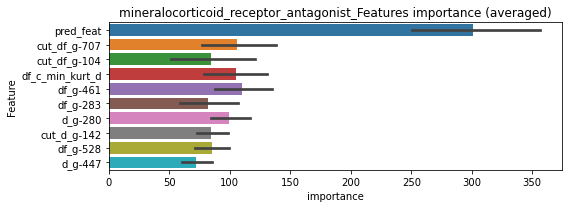

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000473807	valid_1's binary_logloss: 0.00076437
[2000]	training's binary_logloss: 0.00028015	valid_1's binary_logloss: 0.000546034
Early stopping, best iteration is:
[2648]	training's binary_logloss: 0.000238815	valid_1's binary_logloss: 0.000497085


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 mineralocorticoid_receptor_antagonist=================================


Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000756402	valid_1's binary_logloss: 0.00642612
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00047096	valid_1's binary_logloss: 0.000781636
[2000]	training's binary_logloss: 0.000281022	valid_1's binary_logloss: 0.000601338
Early stopping, best iteration is:
[2505]	training's binary_logloss: 0.000246436	valid_1's binary_logloss: 0.000565396


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


mineralocorticoid_receptor_antagonist logloss: 0.002740098328728785


Early stopping, best iteration is:
[748]	training's binary_logloss: 0.00060179	valid_1's binary_logloss: 0.00347139
neg labels: 3289 → selected neg labels: 3289


monoacylglycerol_lipase_inhibitor, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000697268	valid_1's binary_logloss: 0.00188702
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000264911	valid_1's binary_logloss: 0.00100127
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000702308	valid_1's binary_logloss: 0.00500318
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000278243	valid_1's binary_logloss: 0.00340708
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00069865	valid_1's binary_logloss: 0.00123635
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000273169	valid_1's binary_logloss: 0.000570631
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000698757	valid_1's binary_logloss: 0.00130277


1 / 3 AUC score:1.000
y_Threshold: 0.0010917, Threshold: 0.0031595, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.00221, conf_1:0.00411
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0031595
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0531595
threshold: 0.0531595, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000264622	valid_1's binary_logloss: 0.000617971


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000405274	valid_1's binary_logloss: 0.000968729
[600]	training's binary_logloss: 0.000157966	valid_1's binary_logloss: 0.000685296
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000150336	valid_1's binary_logloss: 0.000673963
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000392816	valid_1's binary_logloss: 0.00163338
[600]	training's binary_logloss: 0.00015525	valid_1's binary_logloss: 0.00128019
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000151489	valid_1's binary_logloss: 0.00127524
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000395326	valid_1's binary_logloss: 0.000951284
Early stopping, best iteration is:
[411]	training's binary_logloss: 0.000211076	valid_1's binary_logloss: 0.000824336
Training until validation scores don't improve for 3

2 / 3 AUC score:1.000
y_Threshold: 0.5157978, Threshold: 0.0531595, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0354093 Vs.target_rate: 0.00050
Num_p_label: 141.0, conf_0:0.04253, conf_1:0.06379
Num_p_label: 141.0, Expected: 2.0, Adj_threshold_1: 0.0531595
Num_p_label: 140.0, Expected: 2.0, Adj_threshold_2: 0.1031595
Num_p_label: 138.0, Expected: 2.0, Adj_threshold_3: 0.1531595
Num_p_label: 125.0, Expected: 2.0, Adj_threshold_4: 0.2031595
Num_p_label: 105.0, Expected: 2.0, Adj_threshold_5: 0.2531595
Num_p_label: 83.0, Expected: 2.0, Adj_threshold_6: 0.3031595
Num_p_label: 59.0, Expected: 2.0, Adj_threshold_7: 0.3531595
Num_p_label: 43.0, Expected: 2.0, Adj_threshold_8: 0.4031595
Num_p_label: 30.0, Expected: 2.0, Adj_threshold_9: 0.4531595
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_10: 0.5031595


Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000137804	valid_1's binary_logloss: 0.000208517


threshold: 0.5531595, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000396717	valid_1's binary_logloss: 0.000975683
[600]	training's binary_logloss: 0.00015567	valid_1's binary_logloss: 0.000706501
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000155204	valid_1's binary_logloss: 0.000704474
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000393566	valid_1's binary_logloss: 0.00168059
[600]	training's binary_logloss: 0.000155457	valid_1's binary_logloss: 0.00125013
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000151658	valid_1's binary_logloss: 0.00124416
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000394816	valid_1's binary_logloss: 0.000971696
Early stopping, best iteration is:
[395]	training's binary_logloss: 0.000220726	valid_1's binary_logloss: 0.000832658
Training until validation scores don't improve for 3

3 / 3 AUC score:1.000
y_Threshold: 0.5038915, Threshold: 0.5531595, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0030136 Vs.target_rate: 0.00050
Num_p_label: 12.0, conf_0:0.49784, conf_1:0.60848
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_1: 0.5531595
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_2: 0.6031595
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_3: 0.6531595


[900]	training's binary_logloss: 0.000136139	valid_1's binary_logloss: 0.000209814
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000135996	valid_1's binary_logloss: 0.000209343


threshold: 0.6531595, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


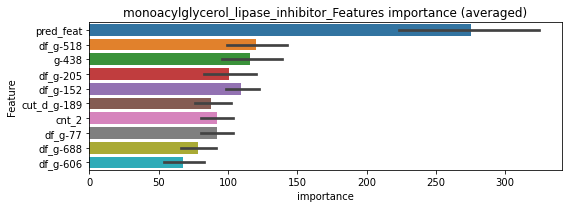

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000372593	valid_1's binary_logloss: 0.000963506
[2000]	training's binary_logloss: 0.000232189	valid_1's binary_logloss: 0.000797859
Early stopping, best iteration is:
[2542]	training's binary_logloss: 0.000207043	valid_1's binary_logloss: 0.000771688


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000372812	valid_1's binary_logloss: 0.00125699
[2000]	training's binary_logloss: 0.000230414	valid_1's binary_logloss: 0.00103856
[3000]	training's binary_logloss: 0.000192651	valid_1's binary_logloss: 0.000990938
[4000]	training's binary_logloss: 0.000173538	valid_1's binary_logloss: 0.00096517
[5000]	training's binary_logloss: 0.000163284	valid_1's binary_logloss: 0.000952468
Early stopping, best iteration is:
[5633]	training's binary_logloss: 0.000158228	valid_1's binary_logloss: 0.000946747


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00037569	valid_1's binary_logloss: 0.000678472
[2000]	training's binary_logloss: 0.00023231	valid_1's binary_logloss: 0.000540932
Early stopping, best iteration is:
[2020]	training's binary_logloss: 0.000231189	valid_1's binary_logloss: 0.000539871


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000370697	valid_1's binary_logloss: 0.000439682
[2000]	training's binary_logloss: 0.000230777	valid_1's binary_logloss: 0.000293116
[3000]	training's binary_logloss: 0.000192305	valid_1's binary_logloss: 0.000251286
[4000]	training's binary_logloss: 0.000173129	valid_1's binary_logloss: 0.000229933
[5000]	training's binary_logloss: 0.000162874	valid_1's binary_logloss: 0.000218432
[6000]	training's binary_logloss: 0.000155946	valid_1's binary_logloss: 0.000211298
[7000]	training's binary_logloss: 0.00015065	valid_1's binary_logloss: 0.000206519
Early stopping, best iteration is:
[6987]	training's binary_logloss: 0.000150671	valid_1's binary_logloss: 0.000206509


monoacylglycerol_lipase_inhibitor logloss: 0.0006163647757524535


neg labels: 3289 → selected neg labels: 3280


monoamine_oxidase_inhibitor, len(trt): 85, len(othr): 3280
target_rate: 0.0035693 → Adj_target_rate: 0.0036661
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00843744	valid_1's binary_logloss: 0.0740094
[600]	training's binary_logloss: 0.00139884	valid_1's binary_logloss: 0.0659447
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.0013913	valid_1's binary_logloss: 0.0658563
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100469	valid_1's binary_logloss: 0.0648295
[600]	training's binary_logloss: 0.00154174	valid_1's binary_logloss: 0.0569932
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.0013148	valid_1's binary_logloss: 0.0567562
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102839	valid_1's binary_logloss: 0.0371507
[600]	training's binary_logloss: 0.00160283	valid_1's binary_logloss: 0.0244425
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.00091509	valid_1's binary_logloss: 0.0231

1 / 3 AUC score:0.997
y_Threshold: 0.0097408, Threshold: 0.0277948, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 650/3792
p_label_rate: 0.0100452 Vs.target_rate: 0.00357
Num_p_label: 40.0, conf_0:0.01946, conf_1:0.03613
Num_p_label: 40.0, Expected: 14.2, Adj_threshold_1: 0.0277948
Num_p_label: 10.0, Expected: 14.2, Adj_threshold_2: 0.0777948
threshold: 0.0777948, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 650.0/3792, y_label_rate: 0.1714135
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144131	valid_1's binary_logloss: 0.00299137
[600]	training's binary_logloss: 0.000252901	valid_1's binary_logloss: 0.000743275
[900]	training's binary_logloss: 0.000177163	valid_1's binary_logloss: 0.000545175
Early stopping, best iteration is:
[978]	training's binary_logloss: 0.000169789	valid_1's binary_logloss: 0.00053012
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00141227	valid_1's binary_logloss: 0.00458237
[600]	training's binary_logloss: 0.000250099	valid_1's binary_logloss: 0.00276235
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00023917	valid_1's binary_logloss: 0.00270979
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148242	valid_1's binary_logloss: 0.00432847
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000317067	valid_1's bin

2 / 3 AUC score:1.000
y_Threshold: 0.3264829, Threshold: 0.0777948, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 646.0/3784
p_label_rate: 0.0482170 Vs.target_rate: 0.00357
Num_p_label: 192.0, conf_0:0.06224, conf_1:0.09335
Num_p_label: 192.0, Expected: 14.2, Adj_threshold_1: 0.0777948
Num_p_label: 191.0, Expected: 14.2, Adj_threshold_2: 0.1277948
Num_p_label: 180.0, Expected: 14.2, Adj_threshold_3: 0.1777948
Num_p_label: 157.0, Expected: 14.2, Adj_threshold_4: 0.2277948
Num_p_label: 126.0, Expected: 14.2, Adj_threshold_5: 0.2777948
Num_p_label: 106.0, Expected: 14.2, Adj_threshold_6: 0.3277948
Num_p_label: 96.0, Expected: 14.2, Adj_threshold_7: 0.3777948
Num_p_label: 88.0, Expected: 14.2, Adj_threshold_8: 0.4277948
Num_p_label: 74.0, Expected: 14.2, Adj_threshold_9: 0.4777948
Num_p_label: 63.0, Expected: 14.2, Adj_threshold_10: 0.5277948


Early stopping, best iteration is:
[419]	training's binary_logloss: 0.000527233	valid_1's binary_logloss: 0.011432


threshold: 0.5777948, positive_p_label: 63.0/3982, p_label_rate: 0.0158212
positive_y_label: 646.0/3784, y_label_rate: 0.1707188
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113245	valid_1's binary_logloss: 0.00922126
Early stopping, best iteration is:
[431]	training's binary_logloss: 0.000400059	valid_1's binary_logloss: 0.00859258
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108913	valid_1's binary_logloss: 0.00271327
[600]	training's binary_logloss: 0.000166488	valid_1's binary_logloss: 0.000452992
[900]	training's binary_logloss: 0.00010794	valid_1's binary_logloss: 0.000295304
[1200]	training's binary_logloss: 0.000101628	valid_1's binary_logloss: 0.000278056
Early stopping, best iteration is:
[1210]	training's binary_logloss: 0.000101478	valid_1's binary_logloss: 0.000277523
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130812	valid_1's binary_logloss: 0.00279095
[600]	training's binary_logloss: 0.00022396	valid_1's binary_logloss: 0.000674988
[900]	t

3 / 3 AUC score:1.000
y_Threshold: 0.0994643, Threshold: 0.5777948, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 645.0/3782
p_label_rate: 0.0220994 Vs.target_rate: 0.00357
Num_p_label: 88.0, conf_0:0.50000, conf_1:0.63557
Num_p_label: 88.0, Expected: 14.2, Adj_threshold_1: 0.5777948
Num_p_label: 88.0, Expected: 14.2, Adj_threshold_2: 0.6277948
Num_p_label: 88.0, Expected: 14.2, Adj_threshold_3: 0.6777948
Num_p_label: 88.0, Expected: 14.2, Adj_threshold_4: 0.7277948
Num_p_label: 88.0, Expected: 14.2, Adj_threshold_5: 0.7777948
threshold: 0.7777948, positive_p_label: 88.0/3982, p_label_rate: 0.0220994
positive_y_label: 645.0/3782, y_label_rate: 0.1705447


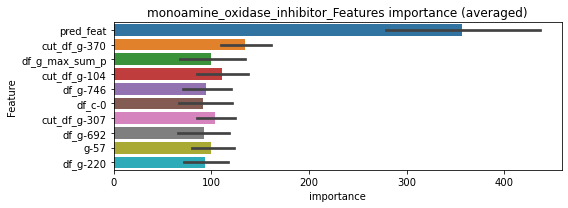

len(train_index) : 2836
len(valid_index) : 946
================================= fold 1/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2836
len(valid_index) : 946
================================= fold 2/4 monoamine_oxidase_inhibitor=================================


Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000919423	valid_1's binary_logloss: 0.00371649
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000458159	valid_1's binary_logloss: 0.000790605
[2000]	training's binary_logloss: 0.000252631	valid_1's binary_logloss: 0.000438067
[3000]	training's binary_logloss: 0.000185393	valid_1's binary_logloss: 0.000322034
[4000]	training's binary_logloss: 0.000153546	valid_1's binary_logloss: 0.000266954
[5000]	training's binary_logloss: 0.000137291	valid_1's binary_logloss: 0.000238816
[6000]	training's binary_logloss: 0.000126865	valid_1's binary_logloss: 0.000220718
[7000]	training's binary_logloss: 0.000119573	valid_1's binary_logloss: 0.000208035
[8000]	training's binary_logloss: 0.000114613	valid_1's binary_logloss: 0.000199433
[9000]	training's binary_logloss: 0.000111071	valid_1's binary_logloss: 0.000193266
[10000]	training's binary_logloss: 0.00010855	valid_1's binary_log

len(train_index) : 2837
len(valid_index) : 945
================================= fold 3/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000459654	valid_1's binary_logloss: 0.000754326
[2000]	training's binary_logloss: 0.000253034	valid_1's binary_logloss: 0.000416854
[3000]	training's binary_logloss: 0.000185594	valid_1's binary_logloss: 0.000306194
[4000]	training's binary_logloss: 0.000153602	valid_1's binary_logloss: 0.000253569
[5000]	training's binary_logloss: 0.000137323	valid_1's binary_logloss: 0.000226774
[6000]	training's binary_logloss: 0.000126902	valid_1's binary_logloss: 0.000209603
[7000]	training's binary_logloss: 0.000119638	valid_1's binary_logloss: 0.000197613
[8000]	training's binary_logloss: 0.000114667	valid_1's binary_logloss: 0.000189426
[9000]	training's binary_logloss: 0.000111126	valid_1's binary_logloss: 0.000183583
[10000]	training's binary_logloss: 0.000108585	valid_1's binary_logloss: 0.0001794
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000108585	valid_

len(train_index) : 2837
len(valid_index) : 945
================================= fold 4/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000459445	valid_1's binary_logloss: 0.000803191
[2000]	training's binary_logloss: 0.000252922	valid_1's binary_logloss: 0.000444329
[3000]	training's binary_logloss: 0.000185521	valid_1's binary_logloss: 0.000326506
[4000]	training's binary_logloss: 0.000153628	valid_1's binary_logloss: 0.000270647
[5000]	training's binary_logloss: 0.000137378	valid_1's binary_logloss: 0.000242172
[6000]	training's binary_logloss: 0.000126912	valid_1's binary_logloss: 0.000223737
[7000]	training's binary_logloss: 0.000119618	valid_1's binary_logloss: 0.000210878
[8000]	training's binary_logloss: 0.000114643	valid_1's binary_logloss: 0.000202121
[9000]	training's binary_logloss: 0.000111094	valid_1's binary_logloss: 0.000195864
[10000]	training's binary_logloss: 0.00010857	valid_1's binary_logloss: 0.000191446
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.00010857	valid_

monoamine_oxidase_inhibitor logloss: 0.0010695267880014257


neg labels: 3289 → selected neg labels: 3287


monopolar_spindle_1_kinase_inhibitor, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121527	valid_1's binary_logloss: 0.00488999
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000384826	valid_1's binary_logloss: 0.00372742
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120681	valid_1's binary_logloss: 0.00607063
[600]	training's binary_logloss: 0.000351591	valid_1's binary_logloss: 0.00352143
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000354339	valid_1's binary_logloss: 0.00351397
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122222	valid_1's binary_logloss: 0.00245034
[600]	training's binary_logloss: 0.000356924	valid_1's binary_logloss: 0.000981568
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.00034863	valid_1's binary_logloss: 0.000968442
Training until validation scores don't improve for 30 roun

1 / 3 AUC score:1.000
y_Threshold: 0.0018007, Threshold: 0.0317620, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.02223, conf_1:0.04129
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0317620
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_2: 0.0817620


[600]	training's binary_logloss: 0.000359297	valid_1's binary_logloss: 0.00137017
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000359697	valid_1's binary_logloss: 0.00136818


Num_p_label: 9.0, Expected: 3.0, Adj_threshold_3: 0.1317620
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_4: 0.1817620
threshold: 0.1817620, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000585392	valid_1's binary_logloss: 0.00117891
[600]	training's binary_logloss: 0.000179739	valid_1's binary_logloss: 0.000666345
[900]	training's binary_logloss: 0.000150673	valid_1's binary_logloss: 0.000623313
Early stopping, best iteration is:
[923]	training's binary_logloss: 0.000149492	valid_1's binary_logloss: 0.000621806
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000559885	valid_1's binary_logloss: 0.00173625
[600]	training's binary_logloss: 0.000176211	valid_1's binary_logloss: 0.0010628
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000179914	valid_1's binary_logloss: 0.00104981
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000562754	valid_1's binary_logloss: 0.000651356
[600]	training's binary_logloss: 0.000177448	valid_1's binary_logloss: 0.000229966
Early

2 / 3 AUC score:1.000


[300]	training's binary_logloss: 0.000557339	valid_1's binary_logloss: 0.00366541
Early stopping, best iteration is:
[316]	training's binary_logloss: 0.000495137	valid_1's binary_logloss: 0.00350728


y_Threshold: 0.6549810, Threshold: 0.1817620, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0688096 Vs.target_rate: 0.00076
Num_p_label: 274.0, conf_0:0.14541, conf_1:0.21811
Num_p_label: 274.0, Expected: 3.0, Adj_threshold_1: 0.1817620
Num_p_label: 266.0, Expected: 3.0, Adj_threshold_2: 0.2317620
Num_p_label: 259.0, Expected: 3.0, Adj_threshold_3: 0.2817620
Num_p_label: 245.0, Expected: 3.0, Adj_threshold_4: 0.3317620
Num_p_label: 222.0, Expected: 3.0, Adj_threshold_5: 0.3817620
Num_p_label: 190.0, Expected: 3.0, Adj_threshold_6: 0.4317620
Num_p_label: 159.0, Expected: 3.0, Adj_threshold_7: 0.4817620
Num_p_label: 124.0, Expected: 3.0, Adj_threshold_8: 0.5317620
Num_p_label: 106.0, Expected: 3.0, Adj_threshold_9: 0.5817620
Num_p_label: 87.0, Expected: 3.0, Adj_threshold_10: 0.6317620
threshold: 0.6817620, positive_p_label: 61.0/3982, p_label_rate: 0.0153189
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseud

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000593081	valid_1's binary_logloss: 0.000795554
[600]	training's binary_logloss: 0.00018606	valid_1's binary_logloss: 0.000315097
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.00016362	valid_1's binary_logloss: 0.000283799
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00055392	valid_1's binary_logloss: 0.00212611
Early stopping, best iteration is:
[373]	training's binary_logloss: 0.000315968	valid_1's binary_logloss: 0.00169527
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000568229	valid_1's binary_logloss: 0.000607733
[600]	training's binary_logloss: 0.00017888	valid_1's binary_logloss: 0.000194842
Early stopping, best iteration is:
[868]	training's binary_logloss: 0.000152756	valid_1's binary_logloss: 0.00016594
Training until validation scores don't improve for 30 r

3 / 3 AUC score:1.000
y_Threshold: 0.6243015, Threshold: 0.6817620, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.50000, conf_1:0.74994
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.6817620
Num_p_label: 29.0, Expected: 3.0, Adj_threshold_2: 0.7317620
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_3: 0.7817620


Early stopping, best iteration is:
[322]	training's binary_logloss: 0.000484199	valid_1's binary_logloss: 0.00379512


threshold: 0.7817620, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


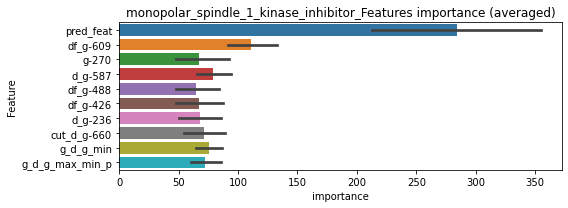

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000442567	valid_1's binary_logloss: 0.000562662
[2000]	training's binary_logloss: 0.000268931	valid_1's binary_logloss: 0.000377375
[3000]	training's binary_logloss: 0.000220067	valid_1's binary_logloss: 0.000317889
[4000]	training's binary_logloss: 0.00019713	valid_1's binary_logloss: 0.000289397
[5000]	training's binary_logloss: 0.000184233	valid_1's binary_logloss: 0.000273847
[6000]	training's binary_logloss: 0.000176093	valid_1's binary_logloss: 0.00026362
Early stopping, best iteration is:
[6802]	training's binary_logloss: 0.000170924	valid_1's binary_logloss: 0.000256996


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00042111	valid_1's binary_logloss: 0.00128801
Early stopping, best iteration is:
[1778]	training's binary_logloss: 0.000277156	valid_1's binary_logloss: 0.00108986


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000436338	valid_1's binary_logloss: 0.000508645
[2000]	training's binary_logloss: 0.000264501	valid_1's binary_logloss: 0.000331764
[3000]	training's binary_logloss: 0.000214675	valid_1's binary_logloss: 0.000276865
[4000]	training's binary_logloss: 0.000190413	valid_1's binary_logloss: 0.00024799
[5000]	training's binary_logloss: 0.000177451	valid_1's binary_logloss: 0.000232583
[6000]	training's binary_logloss: 0.000168975	valid_1's binary_logloss: 0.000222299
[7000]	training's binary_logloss: 0.000162817	valid_1's binary_logloss: 0.000215171
[8000]	training's binary_logloss: 0.00015822	valid_1's binary_logloss: 0.000209832
Early stopping, best iteration is:
[8633]	training's binary_logloss: 0.000155824	valid_1's binary_logloss: 0.000207094


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


monopolar_spindle_1_kinase_inhibitor logloss: 0.0016965347699011701


Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000658431	valid_1's binary_logloss: 0.0052305
neg labels: 3289 → selected neg labels: 3269


mtor_inhibitor, len(trt): 130, len(othr): 3269
target_rate: 0.0054590 → Adj_target_rate: 0.0052608
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0204093	valid_1's binary_logloss: 0.122306
[600]	training's binary_logloss: 0.00291569	valid_1's binary_logloss: 0.098132
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.00290378	valid_1's binary_logloss: 0.098068
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0195953	valid_1's binary_logloss: 0.102059
[600]	training's binary_logloss: 0.00275849	valid_1's binary_logloss: 0.0754054
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.00163487	valid_1's binary_logloss: 0.0739513
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0193997	valid_1's binary_logloss: 0.105738
[600]	training's binary_logloss: 0.00274959	valid_1's binary_logloss: 0.0794315
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.0020139	valid_1's binary_logloss: 0.0777722
T

1 / 3 AUC score:0.990
y_Threshold: 0.0222535, Threshold: 0.3833574, pos_neg_ratio: 0.8000000
Remove_noisy_data: 172 → Positive_corect_labels: 633/3750
p_label_rate: 0.0100452 Vs.target_rate: 0.00546
Num_p_label: 40.0, conf_0:0.26835, conf_1:0.49836
Num_p_label: 40.0, Expected: 21.7, Adj_threshold_1: 0.3833574
Num_p_label: 31.0, Expected: 21.7, Adj_threshold_2: 0.4333574
threshold: 0.4333574, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 633.0/3750, y_label_rate: 0.1688000
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00181625	valid_1's binary_logloss: 0.00353748
[600]	training's binary_logloss: 0.000251634	valid_1's binary_logloss: 0.000652586
[900]	training's binary_logloss: 0.000167028	valid_1's binary_logloss: 0.00046675
Early stopping, best iteration is:
[1019]	training's binary_logloss: 0.000155	valid_1's binary_logloss: 0.000432838
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00180467	valid_1's binary_logloss: 0.00511633
[600]	training's binary_logloss: 0.000261996	valid_1's binary_logloss: 0.00252788
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000202226	valid_1's binary_logloss: 0.00240279
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00185267	valid_1's binary_logloss: 0.00607993
[600]	training's binary_logloss: 0.000258217	valid_1's binary_logloss: 0.00343139
Early stoppi

2 / 3 AUC score:1.000
y_Threshold: 0.1336857, Threshold: 0.4333574, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 631.0/3746
p_label_rate: 0.0562531 Vs.target_rate: 0.00546
Num_p_label: 224.0, conf_0:0.34669, conf_1:0.52003
Num_p_label: 224.0, Expected: 21.7, Adj_threshold_1: 0.4333574
Num_p_label: 224.0, Expected: 21.7, Adj_threshold_2: 0.4833574
Num_p_label: 224.0, Expected: 21.7, Adj_threshold_3: 0.5333574
Num_p_label: 219.0, Expected: 21.7, Adj_threshold_4: 0.5833574
Num_p_label: 219.0, Expected: 21.7, Adj_threshold_5: 0.6333574
Num_p_label: 219.0, Expected: 21.7, Adj_threshold_6: 0.6833574
Num_p_label: 219.0, Expected: 21.7, Adj_threshold_7: 0.7333574
Num_p_label: 219.0, Expected: 21.7, Adj_threshold_8: 0.7833574
threshold: 0.7833574, positive_p_label: 219.0/3982, p_label_rate: 0.0549975
positive_y_label: 631.0/3746, y_label_rate: 0.1684463
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00158477	valid_1's binary_logloss: 0.00342455
[600]	training's binary_logloss: 0.000188655	valid_1's binary_logloss: 0.000444035
[900]	training's binary_logloss: 0.000110908	valid_1's binary_logloss: 0.000262553
[1200]	training's binary_logloss: 0.000102944	valid_1's binary_logloss: 0.000243791
Early stopping, best iteration is:
[1241]	training's binary_logloss: 0.000102499	valid_1's binary_logloss: 0.000242721
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0015744	valid_1's binary_logloss: 0.00965728
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.00046325	valid_1's binary_logloss: 0.00858034
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00160422	valid_1's binary_logloss: 0.00294728
[600]	training's binary_logloss: 0.000189253	valid_1's binary_logloss: 0.000368285
[900]	t

3 / 3 AUC score:1.000
y_Threshold: 0.0688939, Threshold: 0.7833574, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 630.0/3744
p_label_rate: 0.0552486 Vs.target_rate: 0.00546
Num_p_label: 220.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 220.0, Expected: 21.7, Adj_threshold_1: 0.7833574
threshold: 0.7833574, positive_p_label: 220.0/3982, p_label_rate: 0.0552486
positive_y_label: 630.0/3744, y_label_rate: 0.1682692


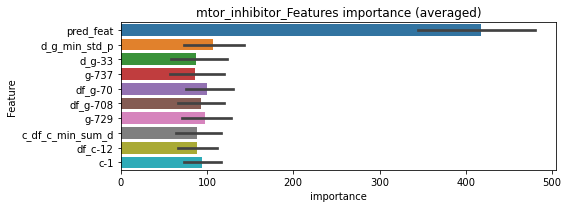

len(train_index) : 2808
len(valid_index) : 936
================================= fold 1/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2808
len(valid_index) : 936


Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000743211	valid_1's binary_logloss: 0.00236696


================================= fold 2/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000577021	valid_1's binary_logloss: 0.000856355
[2000]	training's binary_logloss: 0.000324655	valid_1's binary_logloss: 0.000486453
[3000]	training's binary_logloss: 0.000245144	valid_1's binary_logloss: 0.000367954
[4000]	training's binary_logloss: 0.000206955	valid_1's binary_logloss: 0.000309847
[5000]	training's binary_logloss: 0.000187189	valid_1's binary_logloss: 0.00028124
[6000]	training's binary_logloss: 0.000174148	valid_1's binary_logloss: 0.000261292
[7000]	training's binary_logloss: 0.000164597	valid_1's binary_logloss: 0.000246823
[8000]	training's binary_logloss: 0.000157468	valid_1's binary_logloss: 0.000236137
Early stopping, best iteration is:
[8538]	training's binary_logloss: 0.000154292	valid_1's binary_logloss: 0.000230912


len(train_index) : 2808
len(valid_index) : 936
================================= fold 3/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000478835	valid_1's binary_logloss: 0.000812393
[2000]	training's binary_logloss: 0.000258986	valid_1's binary_logloss: 0.000440666
[3000]	training's binary_logloss: 0.000188772	valid_1's binary_logloss: 0.000321475
[4000]	training's binary_logloss: 0.000155892	valid_1's binary_logloss: 0.000265645
[5000]	training's binary_logloss: 0.000139191	valid_1's binary_logloss: 0.000237269
[6000]	training's binary_logloss: 0.000128478	valid_1's binary_logloss: 0.000219022
[7000]	training's binary_logloss: 0.000121043	valid_1's binary_logloss: 0.000206347
[8000]	training's binary_logloss: 0.00011597	valid_1's binary_logloss: 0.000197711
[9000]	training's binary_logloss: 0.000112353	valid_1's binary_logloss: 0.00019154
[10000]	training's binary_logloss: 0.000109751	valid_1's binary_logloss: 0.000187113
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000109751	valid_

len(train_index) : 2808
len(valid_index) : 936
================================= fold 4/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000478905	valid_1's binary_logloss: 0.000809819
[2000]	training's binary_logloss: 0.000259106	valid_1's binary_logloss: 0.000439553
[3000]	training's binary_logloss: 0.000188832	valid_1's binary_logloss: 0.000320658
[4000]	training's binary_logloss: 0.000155925	valid_1's binary_logloss: 0.000264938
[5000]	training's binary_logloss: 0.000139183	valid_1's binary_logloss: 0.000236563
[6000]	training's binary_logloss: 0.00012846	valid_1's binary_logloss: 0.000218349
[7000]	training's binary_logloss: 0.000121042	valid_1's binary_logloss: 0.000205752
[8000]	training's binary_logloss: 0.000115959	valid_1's binary_logloss: 0.000197123
[9000]	training's binary_logloss: 0.000112351	valid_1's binary_logloss: 0.000190991
[10000]	training's binary_logloss: 0.000109756	valid_1's binary_logloss: 0.000186589
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000109756	valid

mtor_inhibitor logloss: 0.000742894653723643


neg labels: 3289 → selected neg labels: 3288


mucolytic_agent, len(trt): 48, len(othr): 3288
target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00424196	valid_1's binary_logloss: 0.015006
[600]	training's binary_logloss: 0.000785889	valid_1's binary_logloss: 0.00631682
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000562459	valid_1's binary_logloss: 0.00549693
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00412927	valid_1's binary_logloss: 0.0188945
[600]	training's binary_logloss: 0.000787169	valid_1's binary_logloss: 0.010427
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000580174	valid_1's binary_logloss: 0.00979564
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00427194	valid_1's binary_logloss: 0.016432
[600]	training's binary_logloss: 0.000800114	valid_1's binary_logloss: 0.00793391
Early stopping, best iteration is:
[786]	training's binary_logloss: 0.000585587	valid_1's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0050093, Threshold: 0.0870997, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, conf_0:0.06097, conf_1:0.11323
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0870997
Num_p_label: 24.0, Expected: 8.0, Adj_threshold_2: 0.1370997
Num_p_label: 16.0, Expected: 8.0, Adj_threshold_3: 0.1870997
threshold: 0.1870997, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102665	valid_1's binary_logloss: 0.00260777
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000265055	valid_1's binary_logloss: 0.0014904
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100973	valid_1's binary_logloss: 0.00201103
[600]	training's binary_logloss: 0.000208968	valid_1's binary_logloss: 0.00078692
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000190725	valid_1's binary_logloss: 0.00072469
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0010146	valid_1's binary_logloss: 0.00264942
[600]	training's binary_logloss: 0.000210393	valid_1's binary_logloss: 0.001503
[900]	training's binary_logloss: 0.000157062	valid_1's binary_logloss: 0.00142431
Early stopping, best iteration is:
[923]	training's binary_logloss: 0.000155438	valid_1's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.6449337, Threshold: 0.1870997, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0823707 Vs.target_rate: 0.00202
Num_p_label: 328.0, conf_0:0.14968, conf_1:0.22452
Num_p_label: 328.0, Expected: 8.0, Adj_threshold_1: 0.1870997
Num_p_label: 328.0, Expected: 8.0, Adj_threshold_2: 0.2370997
Num_p_label: 328.0, Expected: 8.0, Adj_threshold_3: 0.2870997
Num_p_label: 328.0, Expected: 8.0, Adj_threshold_4: 0.3370997
Num_p_label: 327.0, Expected: 8.0, Adj_threshold_5: 0.3870997
Num_p_label: 326.0, Expected: 8.0, Adj_threshold_6: 0.4370997
Num_p_label: 322.0, Expected: 8.0, Adj_threshold_7: 0.4870997


Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000162816	valid_1's binary_logloss: 0.00280574


Num_p_label: 304.0, Expected: 8.0, Adj_threshold_8: 0.5370997
Num_p_label: 282.0, Expected: 8.0, Adj_threshold_9: 0.5870997
Num_p_label: 247.0, Expected: 8.0, Adj_threshold_10: 0.6370997
threshold: 0.6870997, positive_p_label: 199.0/3982, p_label_rate: 0.0499749
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102348	valid_1's binary_logloss: 0.00266759
[600]	training's binary_logloss: 0.000215383	valid_1's binary_logloss: 0.00154277
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000206489	valid_1's binary_logloss: 0.00151509
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000989637	valid_1's binary_logloss: 0.00194833
[600]	training's binary_logloss: 0.000204663	valid_1's binary_logloss: 0.000710591
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000190622	valid_1's binary_logloss: 0.000678101
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101183	valid_1's binary_logloss: 0.0028027
[600]	training's binary_logloss: 0.000206325	valid_1's binary_logloss: 0.00177374
[900]	training's binary_logloss: 0.000155773	valid_1's binary_logloss: 0.00167885
Early stop

3 / 3 AUC score:1.000
y_Threshold: 0.6768313, Threshold: 0.6870997, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0544952 Vs.target_rate: 0.00202
Num_p_label: 217.0, conf_0:0.50000, conf_1:0.75581
Num_p_label: 217.0, Expected: 8.0, Adj_threshold_1: 0.6870997
Num_p_label: 177.0, Expected: 8.0, Adj_threshold_2: 0.7370997
Num_p_label: 133.0, Expected: 8.0, Adj_threshold_3: 0.7870997


[600]	training's binary_logloss: 0.000209053	valid_1's binary_logloss: 0.0027044
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000201092	valid_1's binary_logloss: 0.00269837


threshold: 0.7870997, positive_p_label: 133.0/3982, p_label_rate: 0.0334003
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


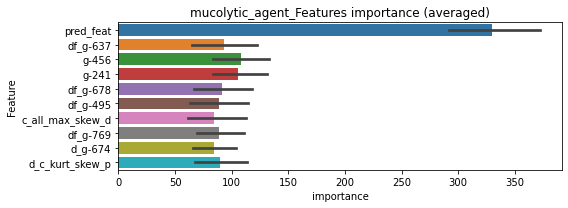

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000512948	valid_1's binary_logloss: 0.00185435
Early stopping, best iteration is:
[1420]	training's binary_logloss: 0.000379761	valid_1's binary_logloss: 0.00168366


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000507481	valid_1's binary_logloss: 0.00152894
Early stopping, best iteration is:
[1140]	training's binary_logloss: 0.000453979	valid_1's binary_logloss: 0.00144476


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000505263	valid_1's binary_logloss: 0.00249825
[2000]	training's binary_logloss: 0.000297952	valid_1's binary_logloss: 0.00224086
[3000]	training's binary_logloss: 0.00023612	valid_1's binary_logloss: 0.00217263
Early stopping, best iteration is:
[3071]	training's binary_logloss: 0.000232353	valid_1's binary_logloss: 0.00216668


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000505017	valid_1's binary_logloss: 0.00405296
[2000]	training's binary_logloss: 0.000298837	valid_1's binary_logloss: 0.00378904
Early stopping, best iteration is:
[2278]	training's binary_logloss: 0.00027779	valid_1's binary_logloss: 0.00375817


mucolytic_agent logloss: 0.0022641216829919933


neg labels: 3289 → selected neg labels: 3281


neuropeptide_receptor_antagonist, len(trt): 37, len(othr): 3281
target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0025082	valid_1's binary_logloss: 0.0164748
[600]	training's binary_logloss: 0.00056758	valid_1's binary_logloss: 0.0117908
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000573424	valid_1's binary_logloss: 0.0117547
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00280008	valid_1's binary_logloss: 0.0103762
[600]	training's binary_logloss: 0.000606914	valid_1's binary_logloss: 0.00529108
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000519976	valid_1's binary_logloss: 0.00513863
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00281463	valid_1's binary_logloss: 0.0115415
[600]	training's binary_logloss: 0.000608975	valid_1's binary_logloss: 0.00805636
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000636332	valid_1's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0037276, Threshold: 0.0158620, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, conf_0:0.01110, conf_1:0.02062
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0158620
Num_p_label: 4.0, Expected: 6.2, Adj_threshold_2: 0.0658620
threshold: 0.0658620, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00080438	valid_1's binary_logloss: 0.00258247
[600]	training's binary_logloss: 0.000205987	valid_1's binary_logloss: 0.00160893
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.00018844	valid_1's binary_logloss: 0.00157941
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000820212	valid_1's binary_logloss: 0.00224821
Early stopping, best iteration is:
[410]	training's binary_logloss: 0.000359612	valid_1's binary_logloss: 0.00159137
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000840638	valid_1's binary_logloss: 0.0029696
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000243503	valid_1's binary_logloss: 0.00222897
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000834561	valid_1's binary_logloss: 0.0020549

2 / 3 AUC score:1.000
y_Threshold: 0.5588496, Threshold: 0.0658620, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0560020 Vs.target_rate: 0.00155
Num_p_label: 223.0, conf_0:0.05269, conf_1:0.07903
Num_p_label: 223.0, Expected: 6.2, Adj_threshold_1: 0.0658620
Num_p_label: 223.0, Expected: 6.2, Adj_threshold_2: 0.1158620
Num_p_label: 223.0, Expected: 6.2, Adj_threshold_3: 0.1658620
Num_p_label: 223.0, Expected: 6.2, Adj_threshold_4: 0.2158620
Num_p_label: 223.0, Expected: 6.2, Adj_threshold_5: 0.2658620
Num_p_label: 223.0, Expected: 6.2, Adj_threshold_6: 0.3158620
Num_p_label: 223.0, Expected: 6.2, Adj_threshold_7: 0.3658620
Num_p_label: 221.0, Expected: 6.2, Adj_threshold_8: 0.4158620
Num_p_label: 214.0, Expected: 6.2, Adj_threshold_9: 0.4658620
Num_p_label: 203.0, Expected: 6.2, Adj_threshold_10: 0.5158620


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000225797	valid_1's binary_logloss: 0.00123345


threshold: 0.5658620, positive_p_label: 178.0/3982, p_label_rate: 0.0447012
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000819227	valid_1's binary_logloss: 0.00646275
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000230963	valid_1's binary_logloss: 0.00540324
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000856738	valid_1's binary_logloss: 0.00206085
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000220616	valid_1's binary_logloss: 0.00127737
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000853518	valid_1's binary_logloss: 0.0019955
[600]	training's binary_logloss: 0.000211149	valid_1's binary_logloss: 0.00121936
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000209074	valid_1's binary_logloss: 0.00121204
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000839751	valid_1's binary_logloss: 0.00122

3 / 3 AUC score:1.000
y_Threshold: 0.5156076, Threshold: 0.5658620, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3799
p_label_rate: 0.0306379 Vs.target_rate: 0.00155
Num_p_label: 122.0, conf_0:0.50000, conf_1:0.62245
Num_p_label: 122.0, Expected: 6.2, Adj_threshold_1: 0.5658620
Num_p_label: 77.0, Expected: 6.2, Adj_threshold_2: 0.6158620
Num_p_label: 33.0, Expected: 6.2, Adj_threshold_3: 0.6658620
Num_p_label: 11.0, Expected: 6.2, Adj_threshold_4: 0.7158620
threshold: 0.7158620, positive_p_label: 11.0/3982, p_label_rate: 0.0027624


Early stopping, best iteration is:
[799]	training's binary_logloss: 0.000166787	valid_1's binary_logloss: 0.000320033


positive_y_label: 653.0/3799, y_label_rate: 0.1718873


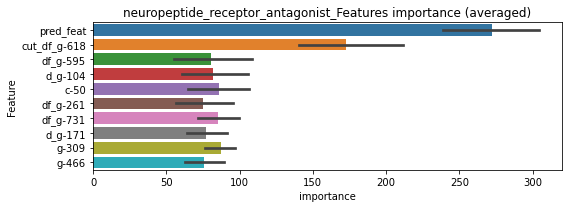

len(train_index) : 2849
len(valid_index) : 950
================================= fold 1/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000522628	valid_1's binary_logloss: 0.00520001
Early stopping, best iteration is:
[1300]	training's binary_logloss: 0.000418053	valid_1's binary_logloss: 0.00498354


len(train_index) : 2849
len(valid_index) : 950
================================= fold 2/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2849
len(valid_index) : 950
================================= fold 3/4 neuropeptide_receptor_antagonist=================================


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000924438	valid_1's binary_logloss: 0.00316711
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000531399	valid_1's binary_logloss: 0.000548703
[2000]	training's binary_logloss: 0.000307449	valid_1's binary_logloss: 0.000308733
[3000]	training's binary_logloss: 0.000243445	valid_1's binary_logloss: 0.000237579
[4000]	training's binary_logloss: 0.000214223	valid_1's binary_logloss: 0.000202775
[5000]	training's binary_logloss: 0.000199933	valid_1's binary_logloss: 0.000185629
[6000]	training's binary_logloss: 0.000190433	valid_1's binary_logloss: 0.0001743
[7000]	training's binary_logloss: 0.000183536	valid_1's binary_logloss: 0.000166131
[8000]	training's binary_logloss: 0.000178368	valid_1's binary_logloss: 0.000159851
Early stopping, best iteration is:
[7995]	training's binary_logloss: 0.000178372	valid_1's binary_logloss: 0.00015985


len(train_index) : 2850
len(valid_index) : 949
================================= fold 4/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000539823	valid_1's binary_logloss: 0.00105534
Early stopping, best iteration is:
[1626]	training's binary_logloss: 0.000357884	valid_1's binary_logloss: 0.000876085


neuropeptide_receptor_antagonist logloss: 0.0022972539441249292


neg labels: 3289 → selected neg labels: 3173


nfkb_inhibitor, len(trt): 832, len(othr): 3173
target_rate: 0.0349374 → Adj_target_rate: 0.0254860
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[12]	training's binary_logloss: 0.476371	valid_1's binary_logloss: 0.508842
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[40]	training's binary_logloss: 0.404199	valid_1's binary_logloss: 0.507602
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[15]	training's binary_logloss: 0.469624	valid_1's binary_logloss: 0.508071
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.531
y_Threshold: 0.2173324, Threshold: 0.4233763, pos_neg_ratio: 0.7377876
Remove_noisy_data: 1370 → Positive_corect_labels: 256/2635
p_label_rate: 0.0100452 Vs.target_rate: 0.03494
Num_p_label: 40.0, conf_0:0.29636, conf_1:0.55039
Num_p_label: 40.0, Expected: 139.1, Adj_threshold_1: 0.4233763
Num_p_label: 89.0, Expected: 139.1, Adj_threshold_2: 0.4033763
Num_p_label: 123.0, Expected: 139.1, Adj_threshold_3: 0.3833763
Num_p_label: 134.0, Expected: 139.1, Adj_threshold_4: 0.3633763
Num_p_label: 138.0, Expected: 139.1, Adj_threshold_5: 0.3433763
Num_p_label: 144.0, Expected: 139.1, Adj_threshold_6: 0.3233763
Num_p_label: 150.0, Expected: 139.1, Adj_threshold_7: 0.3033763
Num_p_label: 162.0, Expected: 139.1, Adj_threshold_8: 0.2833763
Num_p_label: 209.0, Expected: 139.1, Adj_threshold_9: 0.2633763
Num_p_label: 318.0, Expected: 139.1, Adj_threshold_10: 0.2433763
threshold: 0.2433763, positive_p_label: 318.0/3982, p_label_rate: 0.0798594


Early stopping, best iteration is:
[36]	training's binary_logloss: 0.419941	valid_1's binary_logloss: 0.50916


positive_y_label: 256.0/2635, y_label_rate: 0.0971537
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152096	valid_1's binary_logloss: 0.0114301
[600]	training's binary_logloss: 0.000317169	valid_1's binary_logloss: 0.00331504
[900]	training's binary_logloss: 0.000231052	valid_1's binary_logloss: 0.00253237
Early stopping, best iteration is:
[978]	training's binary_logloss: 0.000225	valid_1's binary_logloss: 0.00247297
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0015071	valid_1's binary_logloss: 0.00910163
[600]	training's binary_logloss: 0.000315509	valid_1's binary_logloss: 0.00194154
[900]	training's binary_logloss: 0.000229982	valid_1's binary_logloss: 0.00123082
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.000221457	valid_1's binary_logloss: 0.00115382
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00155198	valid_1's binary_logloss: 0.0118322
[600]	training's b

2 / 3 AUC score:1.000
y_Threshold: 0.2465092, Threshold: 0.2433763, pos_neg_ratio: 0.7377876
Remove_noisy_data: 4 → Positive_corect_labels: 254.0/2631
p_label_rate: 0.2528880 Vs.target_rate: 0.03494
Num_p_label: 1007.0, conf_0:0.19470, conf_1:0.29205
Num_p_label: 1007.0, Expected: 139.1, Adj_threshold_1: 0.2433763
Num_p_label: 1001.0, Expected: 139.1, Adj_threshold_2: 0.2933763
Num_p_label: 1000.0, Expected: 139.1, Adj_threshold_3: 0.3433763
Num_p_label: 999.0, Expected: 139.1, Adj_threshold_4: 0.3933763
Num_p_label: 998.0, Expected: 139.1, Adj_threshold_5: 0.4433763
Num_p_label: 998.0, Expected: 139.1, Adj_threshold_6: 0.4933763
Num_p_label: 997.0, Expected: 139.1, Adj_threshold_7: 0.5433763
Num_p_label: 997.0, Expected: 139.1, Adj_threshold_8: 0.5933763
Num_p_label: 997.0, Expected: 139.1, Adj_threshold_9: 0.6433763
Num_p_label: 997.0, Expected: 139.1, Adj_threshold_10: 0.6933763


Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000235236	valid_1's binary_logloss: 0.00676345


threshold: 0.7433763, positive_p_label: 996.0/3982, p_label_rate: 0.2501256
positive_y_label: 254.0/2631, y_label_rate: 0.0965412
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00145454	valid_1's binary_logloss: 0.00899291
[600]	training's binary_logloss: 0.000297767	valid_1's binary_logloss: 0.00187127
[900]	training's binary_logloss: 0.000217619	valid_1's binary_logloss: 0.00126014
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000217619	valid_1's binary_logloss: 0.00126014
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00141052	valid_1's binary_logloss: 0.0101842
[600]	training's binary_logloss: 0.000295437	valid_1's binary_logloss: 0.00252591
[900]	training's binary_logloss: 0.000218909	valid_1's binary_logloss: 0.00197621
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000218909	valid_1's binary_logloss: 0.00197621
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150707	valid_1's binary_logloss: 0.00793655
[600]	trainin

3 / 3 AUC score:1.000
y_Threshold: 0.4425945, Threshold: 0.7433763, pos_neg_ratio: 0.7377876
Remove_noisy_data: 2 → Positive_corect_labels: 253.0/2629
p_label_rate: 0.2496233 Vs.target_rate: 0.03494
Num_p_label: 994.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 994.0, Expected: 139.1, Adj_threshold_1: 0.7433763


[900]	training's binary_logloss: 0.000227003	valid_1's binary_logloss: 0.00602348
Early stopping, best iteration is:
[918]	training's binary_logloss: 0.00022653	valid_1's binary_logloss: 0.00602262


Num_p_label: 994.0, Expected: 139.1, Adj_threshold_2: 0.7933763
threshold: 0.7933763, positive_p_label: 994.0/3982, p_label_rate: 0.2496233
positive_y_label: 253.0/2629, y_label_rate: 0.0962343


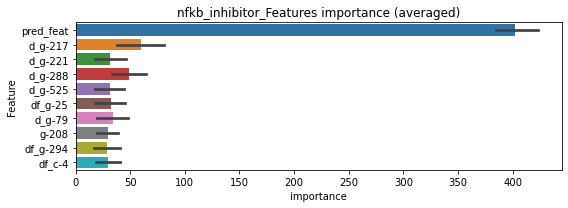

len(train_index) : 1971
len(valid_index) : 658
================================= fold 1/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000669564	valid_1's binary_logloss: 0.00231686
[2000]	training's binary_logloss: 0.000366084	valid_1's binary_logloss: 0.00127242
[3000]	training's binary_logloss: 0.000267937	valid_1's binary_logloss: 0.000933027
[4000]	training's binary_logloss: 0.000221548	valid_1's binary_logloss: 0.00077215
[5000]	training's binary_logloss: 0.000197957	valid_1's binary_logloss: 0.000690419
[6000]	training's binary_logloss: 0.000182818	valid_1's binary_logloss: 0.00063758
[7000]	training's binary_logloss: 0.00017227	valid_1's binary_logloss: 0.000600792
[8000]	training's binary_logloss: 0.000165076	valid_1's binary_logloss: 0.000575645
[9000]	training's binary_logloss: 0.000159944	valid_1's binary_logloss: 0.00055764
[10000]	training's binary_logloss: 0.000156265	valid_1's binary_logloss: 0.000544936
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000156265	valid_1's 

len(train_index) : 1972
len(valid_index) : 657
================================= fold 2/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000842207	valid_1's binary_logloss: 0.00202993
[2000]	training's binary_logloss: 0.000466717	valid_1's binary_logloss: 0.00115507
[3000]	training's binary_logloss: 0.000348415	valid_1's binary_logloss: 0.000849321
[4000]	training's binary_logloss: 0.000293014	valid_1's binary_logloss: 0.000699701
[5000]	training's binary_logloss: 0.000263779	valid_1's binary_logloss: 0.000619632
[6000]	training's binary_logloss: 0.000244629	valid_1's binary_logloss: 0.000567021
Early stopping, best iteration is:
[6624]	training's binary_logloss: 0.00023609	valid_1's binary_logloss: 0.000543678


len(train_index) : 1972
len(valid_index) : 657
================================= fold 3/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00082868	valid_1's binary_logloss: 0.00325696
[2000]	training's binary_logloss: 0.000460236	valid_1's binary_logloss: 0.0022228
[3000]	training's binary_logloss: 0.000343527	valid_1's binary_logloss: 0.00184308
[4000]	training's binary_logloss: 0.000288985	valid_1's binary_logloss: 0.00162635
[5000]	training's binary_logloss: 0.000260593	valid_1's binary_logloss: 0.00149851
[6000]	training's binary_logloss: 0.000242474	valid_1's binary_logloss: 0.00142012
Early stopping, best iteration is:
[6828]	training's binary_logloss: 0.000231412	valid_1's binary_logloss: 0.00136667


len(train_index) : 1972
len(valid_index) : 657
================================= fold 4/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000821594	valid_1's binary_logloss: 0.0145408
Early stopping, best iteration is:
[1427]	training's binary_logloss: 0.000594797	valid_1's binary_logloss: 0.0139788


nfkb_inhibitor logloss: 0.0041095935500157004


neg labels: 3289 → selected neg labels: 3289


nicotinic_receptor_agonist, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000829001	valid_1's binary_logloss: 0.00299426
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000310312	valid_1's binary_logloss: 0.00179046
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000826048	valid_1's binary_logloss: 0.00180907
[600]	training's binary_logloss: 0.000298091	valid_1's binary_logloss: 0.00109667
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000298871	valid_1's binary_logloss: 0.00109502
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000858912	valid_1's binary_logloss: 0.0011605
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000307395	valid_1's binary_logloss: 0.000449094
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000839958	valid_1's binary_logloss: 0.0025

1 / 3 AUC score:1.000
y_Threshold: 0.0012579, Threshold: 0.0037535, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.00263, conf_1:0.00488
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0037535
Num_p_label: 1.0, Expected: 2.0, Adj_threshold_2: 0.0537535
threshold: 0.0537535, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


[600]	training's binary_logloss: 0.000300672	valid_1's binary_logloss: 0.00151294
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000300672	valid_1's binary_logloss: 0.00151294


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000458642	valid_1's binary_logloss: 0.00192101
[600]	training's binary_logloss: 0.000167843	valid_1's binary_logloss: 0.00141667
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000171037	valid_1's binary_logloss: 0.00140695
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00045325	valid_1's binary_logloss: 0.00132041
[600]	training's binary_logloss: 0.000162543	valid_1's binary_logloss: 0.000983458
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000150229	valid_1's binary_logloss: 0.000963087
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00046119	valid_1's binary_logloss: 0.0018618
Early stopping, best iteration is:
[367]	training's binary_logloss: 0.000278517	valid_1's binary_logloss: 0.00154682
Training until validation scores don't improve for 30 rou

2 / 3 AUC score:1.000
y_Threshold: 0.4196283, Threshold: 0.0537535, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0416876 Vs.target_rate: 0.00050
Num_p_label: 166.0, conf_0:0.04300, conf_1:0.06450
Num_p_label: 166.0, Expected: 2.0, Adj_threshold_1: 0.0537535
Num_p_label: 166.0, Expected: 2.0, Adj_threshold_2: 0.1037535
Num_p_label: 159.0, Expected: 2.0, Adj_threshold_3: 0.1537535
Num_p_label: 149.0, Expected: 2.0, Adj_threshold_4: 0.2037535
Num_p_label: 115.0, Expected: 2.0, Adj_threshold_5: 0.2537535
Num_p_label: 84.0, Expected: 2.0, Adj_threshold_6: 0.3037535


[600]	training's binary_logloss: 0.00016259	valid_1's binary_logloss: 0.000648871
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000157414	valid_1's binary_logloss: 0.000643119


Num_p_label: 53.0, Expected: 2.0, Adj_threshold_7: 0.3537535
Num_p_label: 36.0, Expected: 2.0, Adj_threshold_8: 0.4037535
Num_p_label: 29.0, Expected: 2.0, Adj_threshold_9: 0.4537535
Num_p_label: 19.0, Expected: 2.0, Adj_threshold_10: 0.5037535
threshold: 0.5537535, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00045186	valid_1's binary_logloss: 0.00171305
[600]	training's binary_logloss: 0.000166829	valid_1's binary_logloss: 0.00122216
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000166175	valid_1's binary_logloss: 0.00122119
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000455638	valid_1's binary_logloss: 0.00127892
[600]	training's binary_logloss: 0.000163297	valid_1's binary_logloss: 0.000950381
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.00016207	valid_1's binary_logloss: 0.000943362
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000469687	valid_1's binary_logloss: 0.00353214
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.00018623	valid_1's binary_logloss: 0.00300835
Training until validation scores don't improve for 30 rou

3 / 3 AUC score:1.000
y_Threshold: 0.5054359, Threshold: 0.5537535, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0032647 Vs.target_rate: 0.00050
Num_p_label: 13.0, conf_0:0.49838, conf_1:0.60913
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_1: 0.5537535
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_2: 0.6037535


[600]	training's binary_logloss: 0.000160937	valid_1's binary_logloss: 0.000553861
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000155634	valid_1's binary_logloss: 0.000548148


Num_p_label: 3.0, Expected: 2.0, Adj_threshold_3: 0.6537535
threshold: 0.6537535, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


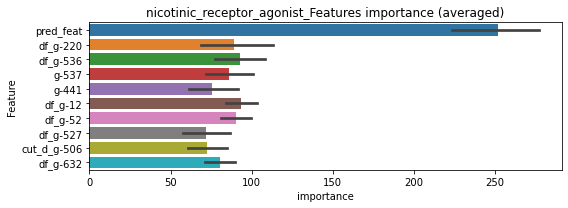

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000392978	valid_1's binary_logloss: 0.00093361
Early stopping, best iteration is:
[1743]	training's binary_logloss: 0.000263477	valid_1's binary_logloss: 0.000784458


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000390104	valid_1's binary_logloss: 0.00110326
[2000]	training's binary_logloss: 0.000242672	valid_1's binary_logloss: 0.00092846
Early stopping, best iteration is:
[2277]	training's binary_logloss: 0.000227842	valid_1's binary_logloss: 0.000906679


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000400257	valid_1's binary_logloss: 0.0018836
Early stopping, best iteration is:
[988]	training's binary_logloss: 0.000404802	valid_1's binary_logloss: 0.00187524


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000389742	valid_1's binary_logloss: 0.000818824
[2000]	training's binary_logloss: 0.000242502	valid_1's binary_logloss: 0.00065437
Early stopping, best iteration is:
[2277]	training's binary_logloss: 0.00022756	valid_1's binary_logloss: 0.000635987


nicotinic_receptor_agonist logloss: 0.001050818361765448


neg labels: 3289 → selected neg labels: 3285


nitric_oxide_donor, len(trt): 26, len(othr): 3285
target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00186554	valid_1's binary_logloss: 0.0112756
[600]	training's binary_logloss: 0.000455085	valid_1's binary_logloss: 0.00793291
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000446649	valid_1's binary_logloss: 0.00792758
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00195974	valid_1's binary_logloss: 0.0066968
[600]	training's binary_logloss: 0.000451974	valid_1's binary_logloss: 0.00354245
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000451974	valid_1's binary_logloss: 0.00354245
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0020104	valid_1's binary_logloss: 0.00519222
[600]	training's binary_logloss: 0.000468839	valid_1's binary_logloss: 0.00216632
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000454553	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0032502, Threshold: 0.0498445, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, conf_0:0.03489, conf_1:0.06480
Num_p_label: 40.0, Expected: 4.3, Adj_threshold_1: 0.0498445
Num_p_label: 20.0, Expected: 4.3, Adj_threshold_2: 0.0998445
Num_p_label: 13.0, Expected: 4.3, Adj_threshold_3: 0.1498445
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_4: 0.1998445
Num_p_label: 9.0, Expected: 4.3, Adj_threshold_5: 0.2498445
threshold: 0.2498445, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0006818	valid_1's binary_logloss: 0.00314535
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000205771	valid_1's binary_logloss: 0.00236198
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000695898	valid_1's binary_logloss: 0.00130023
[600]	training's binary_logloss: 0.000191289	valid_1's binary_logloss: 0.000672135
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000161594	valid_1's binary_logloss: 0.000604837
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000719281	valid_1's binary_logloss: 0.00221262
Early stopping, best iteration is:
[368]	training's binary_logloss: 0.000395211	valid_1's binary_logloss: 0.00182832
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000684679	valid_1's binary_logloss: 0.0020

2 / 3 AUC score:1.000
y_Threshold: 0.6365035, Threshold: 0.2498445, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0690608 Vs.target_rate: 0.00109
Num_p_label: 275.0, conf_0:0.19988, conf_1:0.29981


Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000232316	valid_1's binary_logloss: 0.00157433


Num_p_label: 275.0, Expected: 4.3, Adj_threshold_1: 0.2498445
Num_p_label: 275.0, Expected: 4.3, Adj_threshold_2: 0.2998445
Num_p_label: 274.0, Expected: 4.3, Adj_threshold_3: 0.3498445
Num_p_label: 273.0, Expected: 4.3, Adj_threshold_4: 0.3998445
Num_p_label: 271.0, Expected: 4.3, Adj_threshold_5: 0.4498445
Num_p_label: 261.0, Expected: 4.3, Adj_threshold_6: 0.4998445
Num_p_label: 246.0, Expected: 4.3, Adj_threshold_7: 0.5498445
Num_p_label: 213.0, Expected: 4.3, Adj_threshold_8: 0.5998445
Num_p_label: 176.0, Expected: 4.3, Adj_threshold_9: 0.6498445
Num_p_label: 142.0, Expected: 4.3, Adj_threshold_10: 0.6998445
threshold: 0.7498445, positive_p_label: 105.0/3982, p_label_rate: 0.0263687
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000719008	valid_1's binary_logloss: 0.00156851
[600]	training's binary_logloss: 0.00020058	valid_1's binary_logloss: 0.000738653
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000197857	valid_1's binary_logloss: 0.000736618
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000707197	valid_1's binary_logloss: 0.00428681
Early stopping, best iteration is:
[308]	training's binary_logloss: 0.00066742	valid_1's binary_logloss: 0.00419491
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000711397	valid_1's binary_logloss: 0.00223405
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000253538	valid_1's binary_logloss: 0.00166272
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000706661	valid_1's binary_logloss: 0.0033

3 / 3 AUC score:1.000
y_Threshold: 0.5094471, Threshold: 0.7498445, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0062783 Vs.target_rate: 0.00109
Num_p_label: 25.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 25.0, Expected: 4.3, Adj_threshold_1: 0.7498445
Num_p_label: 14.0, Expected: 4.3, Adj_threshold_2: 0.7998445


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000213412	valid_1's binary_logloss: 0.00239555


threshold: 0.7998445, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


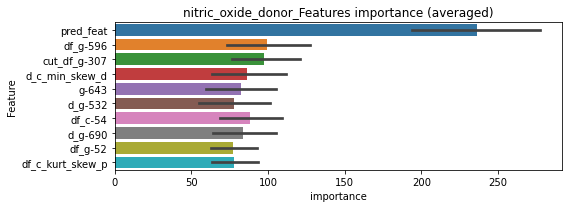

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 nitric_oxide_donor=================================


Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000652673	valid_1's binary_logloss: 0.00219154
Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 nitric_oxide_donor=================================


Early stopping, best iteration is:
[413]	training's binary_logloss: 0.00112433	valid_1's binary_logloss: 0.00834278
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000475349	valid_1's binary_logloss: 0.00100688
Early stopping, best iteration is:
[1418]	training's binary_logloss: 0.000355668	valid_1's binary_logloss: 0.000890731


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000477498	valid_1's binary_logloss: 0.00318693
Early stopping, best iteration is:
[1732]	training's binary_logloss: 0.000311211	valid_1's binary_logloss: 0.00295157


nitric_oxide_donor logloss: 0.003594638975090304


neg labels: 3289 → selected neg labels: 3285


nitric_oxide_production_inhibitor, len(trt): 29, len(othr): 3285
target_rate: 0.0012178 → Adj_target_rate: 0.0014697
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00189679	valid_1's binary_logloss: 0.00938642
[600]	training's binary_logloss: 0.000448349	valid_1's binary_logloss: 0.00653431
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000464545	valid_1's binary_logloss: 0.0065146
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00187555	valid_1's binary_logloss: 0.0101464
[600]	training's binary_logloss: 0.000448188	valid_1's binary_logloss: 0.00621029
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000443769	valid_1's binary_logloss: 0.00618116
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00213639	valid_1's binary_logloss: 0.00513505
[600]	training's binary_logloss: 0.000467606	valid_1's binary_logloss: 0.00191508
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000460874	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0027516, Threshold: 0.0083106, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00122
Num_p_label: 40.0, conf_0:0.00582, conf_1:0.01080
Num_p_label: 40.0, Expected: 4.8, Adj_threshold_1: 0.0083106
Num_p_label: 1.0, Expected: 4.8, Adj_threshold_2: 0.0583106
threshold: 0.0583106, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000720642	valid_1's binary_logloss: 0.00434184
Early stopping, best iteration is:
[379]	training's binary_logloss: 0.000378237	valid_1's binary_logloss: 0.0039553
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000703593	valid_1's binary_logloss: 0.00198285
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000248036	valid_1's binary_logloss: 0.00117107
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000723832	valid_1's binary_logloss: 0.000839383
[600]	training's binary_logloss: 0.000193157	valid_1's binary_logloss: 0.000225605
[900]	training's binary_logloss: 0.000154386	valid_1's binary_logloss: 0.000178231
Early stopping, best iteration is:
[916]	training's binary_logloss: 0.000154092	valid_1's binary_logloss: 0.00017746
Training until validation scores don't improve for 30 

2 / 3 AUC score:1.000
y_Threshold: 0.6481419, Threshold: 0.0583106, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0444500 Vs.target_rate: 0.00122
Num_p_label: 177.0, conf_0:0.04665, conf_1:0.06997
Num_p_label: 177.0, Expected: 4.8, Adj_threshold_1: 0.0583106
Num_p_label: 176.0, Expected: 4.8, Adj_threshold_2: 0.1083106
Num_p_label: 175.0, Expected: 4.8, Adj_threshold_3: 0.1583106
Num_p_label: 175.0, Expected: 4.8, Adj_threshold_4: 0.2083106
Num_p_label: 174.0, Expected: 4.8, Adj_threshold_5: 0.2583106
Num_p_label: 174.0, Expected: 4.8, Adj_threshold_6: 0.3083106


[900]	training's binary_logloss: 0.000154937	valid_1's binary_logloss: 0.000144701
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000154937	valid_1's binary_logloss: 0.000144701


Num_p_label: 170.0, Expected: 4.8, Adj_threshold_7: 0.3583106
Num_p_label: 160.0, Expected: 4.8, Adj_threshold_8: 0.4083106
Num_p_label: 139.0, Expected: 4.8, Adj_threshold_9: 0.4583106
Num_p_label: 112.0, Expected: 4.8, Adj_threshold_10: 0.5083106
threshold: 0.5583106, positive_p_label: 73.0/3982, p_label_rate: 0.0183325
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000680751	valid_1's binary_logloss: 0.002916
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000222914	valid_1's binary_logloss: 0.00224619
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000715194	valid_1's binary_logloss: 0.00106705
[600]	training's binary_logloss: 0.000194887	valid_1's binary_logloss: 0.0003589
[900]	training's binary_logloss: 0.000158085	valid_1's binary_logloss: 0.0003071
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000156774	valid_1's binary_logloss: 0.000305569
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000725582	valid_1's binary_logloss: 0.00220395
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.000332716	valid_1's binary_logloss: 0.00186405
Training until validation scores don't improve for 30 round

3 / 3 AUC score:1.000
y_Threshold: 0.6378561, Threshold: 0.5583106, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0090407 Vs.target_rate: 0.00122
Num_p_label: 36.0, conf_0:0.50000, conf_1:0.61414
Num_p_label: 36.0, Expected: 4.8, Adj_threshold_1: 0.5583106
Num_p_label: 22.0, Expected: 4.8, Adj_threshold_2: 0.6083106
Num_p_label: 11.0, Expected: 4.8, Adj_threshold_3: 0.6583106
threshold: 0.6583106, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


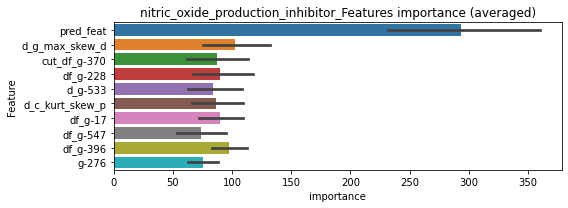

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000471212	valid_1's binary_logloss: 0.00314995
Early stopping, best iteration is:
[1475]	training's binary_logloss: 0.000341559	valid_1's binary_logloss: 0.00295297


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00047778	valid_1's binary_logloss: 0.000627855
[2000]	training's binary_logloss: 0.000283305	valid_1's binary_logloss: 0.000428459
[3000]	training's binary_logloss: 0.000228069	valid_1's binary_logloss: 0.000369983
[4000]	training's binary_logloss: 0.000202699	valid_1's binary_logloss: 0.000339448
Early stopping, best iteration is:
[4885]	training's binary_logloss: 0.000190375	valid_1's binary_logloss: 0.000324346


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 nitric_oxide_production_inhibitor=================================


Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000967741	valid_1's binary_logloss: 0.00430584
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[941]	training's binary_logloss: 0.000504922	valid_1's binary_logloss: 0.00222157


nitric_oxide_production_inhibitor logloss: 0.002451654940551331


neg labels: 3289 → selected neg labels: 3285


nitric_oxide_synthase_inhibitor, len(trt): 26, len(othr): 3285
target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00217821	valid_1's binary_logloss: 0.00686354
[600]	training's binary_logloss: 0.000503902	valid_1's binary_logloss: 0.00350099
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000514398	valid_1's binary_logloss: 0.00348898
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00208718	valid_1's binary_logloss: 0.0069359
[600]	training's binary_logloss: 0.000492375	valid_1's binary_logloss: 0.00303306
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000455935	valid_1's binary_logloss: 0.00291096
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00218466	valid_1's binary_logloss: 0.0047429
[600]	training's binary_logloss: 0.000496912	valid_1's binary_logloss: 0.00171511
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.00047232	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0029980, Threshold: 0.0251523, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, conf_0:0.01761, conf_1:0.03270
Num_p_label: 40.0, Expected: 4.3, Adj_threshold_1: 0.0251523
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_2: 0.0751523
Num_p_label: 5.0, Expected: 4.3, Adj_threshold_3: 0.1251523
threshold: 0.1251523, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0007527	valid_1's binary_logloss: 0.00325996
Early stopping, best iteration is:
[416]	training's binary_logloss: 0.000333846	valid_1's binary_logloss: 0.00271293
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000745089	valid_1's binary_logloss: 0.00215887
[600]	training's binary_logloss: 0.000195344	valid_1's binary_logloss: 0.00141958
[900]	training's binary_logloss: 0.000154559	valid_1's binary_logloss: 0.00136597
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000156692	valid_1's binary_logloss: 0.00136285
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000721133	valid_1's binary_logloss: 0.000949293
[600]	training's binary_logloss: 0.000192465	valid_1's binary_logloss: 0.000290613
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000159866	valid_1's b

2 / 3 AUC score:1.000
y_Threshold: 0.5992769, Threshold: 0.1251523, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0597690 Vs.target_rate: 0.00109
Num_p_label: 238.0, conf_0:0.10012, conf_1:0.15018
Num_p_label: 238.0, Expected: 4.3, Adj_threshold_1: 0.1251523
Num_p_label: 238.0, Expected: 4.3, Adj_threshold_2: 0.1751523
Num_p_label: 238.0, Expected: 4.3, Adj_threshold_3: 0.2251523
Num_p_label: 237.0, Expected: 4.3, Adj_threshold_4: 0.2751523
Num_p_label: 236.0, Expected: 4.3, Adj_threshold_5: 0.3251523
Num_p_label: 236.0, Expected: 4.3, Adj_threshold_6: 0.3751523
Num_p_label: 232.0, Expected: 4.3, Adj_threshold_7: 0.4251523
Num_p_label: 216.0, Expected: 4.3, Adj_threshold_8: 0.4751523
Num_p_label: 192.0, Expected: 4.3, Adj_threshold_9: 0.5251523
Num_p_label: 175.0, Expected: 4.3, Adj_threshold_10: 0.5751523
threshold: 0.6251523, positive_p_label: 135.0/3982, p_label_rate: 0.0339026
positive_y_label: 657.0/3810, y_label_rate: 0.1724409

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000754091	valid_1's binary_logloss: 0.0069761
Early stopping, best iteration is:
[328]	training's binary_logloss: 0.000582342	valid_1's binary_logloss: 0.00650139
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000739785	valid_1's binary_logloss: 0.00209118
[600]	training's binary_logloss: 0.000194471	valid_1's binary_logloss: 0.00129297
[900]	training's binary_logloss: 0.000154681	valid_1's binary_logloss: 0.00122459
Early stopping, best iteration is:
[939]	training's binary_logloss: 0.000152677	valid_1's binary_logloss: 0.00122112
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000722681	valid_1's binary_logloss: 0.000926161
[600]	training's binary_logloss: 0.000191792	valid_1's binary_logloss: 0.000283623
Early stopping, best iteration is:
[854]	training's binary_logloss: 0.000154161	valid_1's 

3 / 3 AUC score:1.000
y_Threshold: 0.5224521, Threshold: 0.6251523, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0344048 Vs.target_rate: 0.00109
Num_p_label: 137.0, conf_0:0.50000, conf_1:0.68767
Num_p_label: 137.0, Expected: 4.3, Adj_threshold_1: 0.6251523
Num_p_label: 95.0, Expected: 4.3, Adj_threshold_2: 0.6751523
Num_p_label: 71.0, Expected: 4.3, Adj_threshold_3: 0.7251523
Num_p_label: 47.0, Expected: 4.3, Adj_threshold_4: 0.7751523
threshold: 0.7751523, positive_p_label: 47.0/3982, p_label_rate: 0.0118031
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


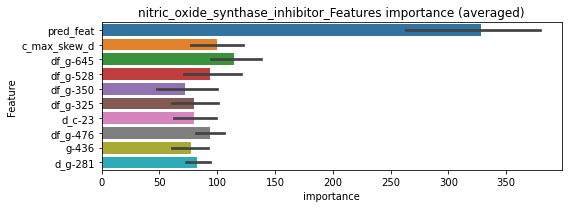

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 nitric_oxide_synthase_inhibitor=================================


Early stopping, best iteration is:
[231]	training's binary_logloss: 0.00235821	valid_1's binary_logloss: 0.0440975
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000478296	valid_1's binary_logloss: 0.00125719
[2000]	training's binary_logloss: 0.000285742	valid_1's binary_logloss: 0.00101913
Early stopping, best iteration is:
[2439]	training's binary_logloss: 0.000253662	valid_1's binary_logloss: 0.000957589


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000480611	valid_1's binary_logloss: 0.000586884
[2000]	training's binary_logloss: 0.000285525	valid_1's binary_logloss: 0.000378283
[3000]	training's binary_logloss: 0.000228753	valid_1's binary_logloss: 0.000312879
[4000]	training's binary_logloss: 0.000201045	valid_1's binary_logloss: 0.000280141
[5000]	training's binary_logloss: 0.000186174	valid_1's binary_logloss: 0.000263012
[6000]	training's binary_logloss: 0.000176399	valid_1's binary_logloss: 0.00025241
Early stopping, best iteration is:
[6287]	training's binary_logloss: 0.000173885	valid_1's binary_logloss: 0.000249914


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000480697	valid_1's binary_logloss: 0.00101463
Early stopping, best iteration is:
[1421]	training's binary_logloss: 0.00035715	valid_1's binary_logloss: 0.000879257


nitric_oxide_synthase_inhibitor logloss: 0.011552858898829708


neg labels: 3289 → selected neg labels: 3286


norepinephrine_reuptake_inhibitor, len(trt): 7, len(othr): 3286
target_rate: 0.0002939 → Adj_target_rate: 0.0004391
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000455525	valid_1's binary_logloss: 0.00285614
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000220743	valid_1's binary_logloss: 0.00232721
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000438407	valid_1's binary_logloss: 0.00386633
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000217651	valid_1's binary_logloss: 0.00328684
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000461913	valid_1's binary_logloss: 0.000571609
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000217021	valid_1's binary_logloss: 0.00028621
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000455067	valid_1's binary_logloss: 0.000619566


1 / 3 AUC score:1.000
y_Threshold: 0.0006509, Threshold: 0.0028222, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, conf_0:0.00198, conf_1:0.00367
Num_p_label: 40.0, Expected: 1.2, Adj_threshold_1: 0.0028222
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_2: 0.0528222
threshold: 0.0528222, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000213503	valid_1's binary_logloss: 0.000320538


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000316538	valid_1's binary_logloss: 0.000649794
[600]	training's binary_logloss: 0.000144561	valid_1's binary_logloss: 0.000489665
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000145381	valid_1's binary_logloss: 0.00048665
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000298876	valid_1's binary_logloss: 0.00111608
[600]	training's binary_logloss: 0.000138876	valid_1's binary_logloss: 0.000857386
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000126501	valid_1's binary_logloss: 0.000841287
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000317697	valid_1's binary_logloss: 0.000283269
[600]	training's binary_logloss: 0.000144686	valid_1's binary_logloss: 0.000121336
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000133555	valid

2 / 3 AUC score:1.000
y_Threshold: 0.2517514, Threshold: 0.0528222, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0517328 Vs.target_rate: 0.00029
Num_p_label: 206.0, conf_0:0.04226, conf_1:0.06339
Num_p_label: 206.0, Expected: 1.2, Adj_threshold_1: 0.0528222
Num_p_label: 200.0, Expected: 1.2, Adj_threshold_2: 0.1028222
Num_p_label: 173.0, Expected: 1.2, Adj_threshold_3: 0.1528222
Num_p_label: 136.0, Expected: 1.2, Adj_threshold_4: 0.2028222
Num_p_label: 110.0, Expected: 1.2, Adj_threshold_5: 0.2528222
Num_p_label: 81.0, Expected: 1.2, Adj_threshold_6: 0.3028222
Num_p_label: 65.0, Expected: 1.2, Adj_threshold_7: 0.3528222
Num_p_label: 45.0, Expected: 1.2, Adj_threshold_8: 0.4028222
Num_p_label: 31.0, Expected: 1.2, Adj_threshold_9: 0.4528222
Num_p_label: 20.0, Expected: 1.2, Adj_threshold_10: 0.5028222
threshold: 0.5528222, positive_p_label: 16.0/3982, p_label_rate: 0.0040181


Early stopping, best iteration is:
[818]	training's binary_logloss: 0.00012856	valid_1's binary_logloss: 0.000251032


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000317469	valid_1's binary_logloss: 0.000697693
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000152162	valid_1's binary_logloss: 0.000511787
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000302937	valid_1's binary_logloss: 0.00144699
[600]	training's binary_logloss: 0.00014151	valid_1's binary_logloss: 0.00111878
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000129435	valid_1's binary_logloss: 0.00110173
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000318675	valid_1's binary_logloss: 0.000285302
[600]	training's binary_logloss: 0.000145346	valid_1's binary_logloss: 0.000122054
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000136149	valid_1's binary_logloss: 0.000112749
Training until validation scores don't improve for 3

3 / 3 AUC score:1.000
y_Threshold: 0.3475699, Threshold: 0.5528222, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0035158 Vs.target_rate: 0.00029
Num_p_label: 14.0, conf_0:0.49754, conf_1:0.60810
Num_p_label: 14.0, Expected: 1.2, Adj_threshold_1: 0.5528222
Num_p_label: 7.0, Expected: 1.2, Adj_threshold_2: 0.6028222
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_3: 0.6528222
Num_p_label: 4.0, Expected: 1.2, Adj_threshold_4: 0.7028222
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_5: 0.7528222
threshold: 0.7528222, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


[900]	training's binary_logloss: 0.000127514	valid_1's binary_logloss: 0.000138083
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000127514	valid_1's binary_logloss: 0.000138083


positive_y_label: 657.0/3811, y_label_rate: 0.1723957


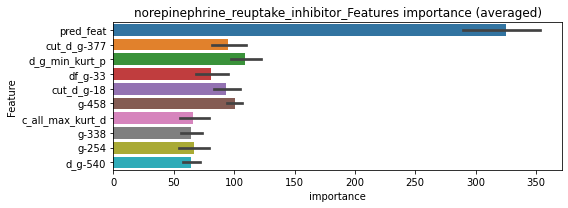

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000342168	valid_1's binary_logloss: 0.000697228
[2000]	training's binary_logloss: 0.000211203	valid_1's binary_logloss: 0.000565291
[3000]	training's binary_logloss: 0.000178621	valid_1's binary_logloss: 0.000526743
[4000]	training's binary_logloss: 0.000163793	valid_1's binary_logloss: 0.00050636
Early stopping, best iteration is:
[4208]	training's binary_logloss: 0.000161832	valid_1's binary_logloss: 0.000503635


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000329044	valid_1's binary_logloss: 0.00207028
[2000]	training's binary_logloss: 0.000205778	valid_1's binary_logloss: 0.00177597
Early stopping, best iteration is:
[2937]	training's binary_logloss: 0.00017549	valid_1's binary_logloss: 0.00172479


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000343275	valid_1's binary_logloss: 0.000294886
[2000]	training's binary_logloss: 0.000211992	valid_1's binary_logloss: 0.000178148
[3000]	training's binary_logloss: 0.000178367	valid_1's binary_logloss: 0.000147239
[4000]	training's binary_logloss: 0.000162807	valid_1's binary_logloss: 0.000132261
[5000]	training's binary_logloss: 0.000154772	valid_1's binary_logloss: 0.000124284
[6000]	training's binary_logloss: 0.000149308	valid_1's binary_logloss: 0.000118848
[7000]	training's binary_logloss: 0.000145421	valid_1's binary_logloss: 0.000115039
[8000]	training's binary_logloss: 0.000142478	valid_1's binary_logloss: 0.000112081
Early stopping, best iteration is:
[8399]	training's binary_logloss: 0.000141493	valid_1's binary_logloss: 0.000111098


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000336438	valid_1's binary_logloss: 0.000348884
[2000]	training's binary_logloss: 0.000209004	valid_1's binary_logloss: 0.000221893
[3000]	training's binary_logloss: 0.000177473	valid_1's binary_logloss: 0.00018917
[4000]	training's binary_logloss: 0.000161933	valid_1's binary_logloss: 0.000171515
[5000]	training's binary_logloss: 0.000153285	valid_1's binary_logloss: 0.000161527
[6000]	training's binary_logloss: 0.000147545	valid_1's binary_logloss: 0.00015504
[7000]	training's binary_logloss: 0.000143105	valid_1's binary_logloss: 0.000150865
[8000]	training's binary_logloss: 0.000139878	valid_1's binary_logloss: 0.000147849
Early stopping, best iteration is:
[8535]	training's binary_logloss: 0.000138422	valid_1's binary_logloss: 0.000146333


norepinephrine_reuptake_inhibitor logloss: 0.0006216491102377123


neg labels: 3289 → selected neg labels: 3287


nrf2_activator, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113264	valid_1's binary_logloss: 0.0018623
[600]	training's binary_logloss: 0.000342846	valid_1's binary_logloss: 0.000672605
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000342846	valid_1's binary_logloss: 0.000672605
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00109128	valid_1's binary_logloss: 0.00319536
[600]	training's binary_logloss: 0.00033169	valid_1's binary_logloss: 0.00141664
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000331696	valid_1's binary_logloss: 0.00141663
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113707	valid_1's binary_logloss: 0.00189946
[600]	training's binary_logloss: 0.000340658	valid_1's binary_logloss: 0.000633224
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000337197	valid_1's bin

1 / 3 AUC score:1.000
y_Threshold: 0.0021326, Threshold: 0.0091023, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076


[600]	training's binary_logloss: 0.000332077	valid_1's binary_logloss: 0.00105155
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000331063	valid_1's binary_logloss: 0.00105009


Num_p_label: 40.0, conf_0:0.00637, conf_1:0.01183
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0091023
Num_p_label: 3.0, Expected: 3.0, Adj_threshold_2: 0.0591023
threshold: 0.0591023, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000518962	valid_1's binary_logloss: 0.000856331
[600]	training's binary_logloss: 0.00017223	valid_1's binary_logloss: 0.000450586
Early stopping, best iteration is:
[855]	training's binary_logloss: 0.000148788	valid_1's binary_logloss: 0.000421724
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000508643	valid_1's binary_logloss: 0.00137798
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000207445	valid_1's binary_logloss: 0.000960535
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000508241	valid_1's binary_logloss: 0.000512164
[600]	training's binary_logloss: 0.000167666	valid_1's binary_logloss: 0.000147653
[900]	training's binary_logloss: 0.000138533	valid_1's binary_logloss: 0.000113548
Early stopping, best iteration is:
[949]	training's binary_logloss: 0.00013731	valid_

2 / 3 AUC score:1.000
y_Threshold: 0.3746634, Threshold: 0.0591023, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0369161 Vs.target_rate: 0.00076
Num_p_label: 147.0, conf_0:0.04728, conf_1:0.07092
Num_p_label: 147.0, Expected: 3.0, Adj_threshold_1: 0.0591023
Num_p_label: 145.0, Expected: 3.0, Adj_threshold_2: 0.1091023
Num_p_label: 142.0, Expected: 3.0, Adj_threshold_3: 0.1591023
Num_p_label: 132.0, Expected: 3.0, Adj_threshold_4: 0.2091023
Num_p_label: 114.0, Expected: 3.0, Adj_threshold_5: 0.2591023
Num_p_label: 99.0, Expected: 3.0, Adj_threshold_6: 0.3091023


[900]	training's binary_logloss: 0.00013955	valid_1's binary_logloss: 0.000995317
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.00013955	valid_1's binary_logloss: 0.000995317


Num_p_label: 75.0, Expected: 3.0, Adj_threshold_7: 0.3591023
Num_p_label: 63.0, Expected: 3.0, Adj_threshold_8: 0.4091023
Num_p_label: 50.0, Expected: 3.0, Adj_threshold_9: 0.4591023
Num_p_label: 37.0, Expected: 3.0, Adj_threshold_10: 0.5091023
threshold: 0.5591023, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00051009	valid_1's binary_logloss: 0.000787563
[600]	training's binary_logloss: 0.000171072	valid_1's binary_logloss: 0.000383968
[900]	training's binary_logloss: 0.000144639	valid_1's binary_logloss: 0.000350498
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000144014	valid_1's binary_logloss: 0.000349986
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00049877	valid_1's binary_logloss: 0.00158867
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000178588	valid_1's binary_logloss: 0.00102968
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000500905	valid_1's binary_logloss: 0.000507008
[600]	training's binary_logloss: 0.00016531	valid_1's binary_logloss: 0.000146108
[900]	training's binary_logloss: 0.000136421	valid_1's binary_logloss: 0.000112672
Early

3 / 3 AUC score:1.000
y_Threshold: 0.4294931, Threshold: 0.5591023, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0092918 Vs.target_rate: 0.00076
Num_p_label: 37.0, conf_0:0.50000, conf_1:0.61501
Num_p_label: 37.0, Expected: 3.0, Adj_threshold_1: 0.5591023
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_2: 0.6091023
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_3: 0.6591023
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_4: 0.7091023
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_5: 0.7591023
threshold: 0.7591023, positive_p_label: 13.0/3982, p_label_rate: 0.0032647


Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000203461	valid_1's binary_logloss: 0.00118756


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


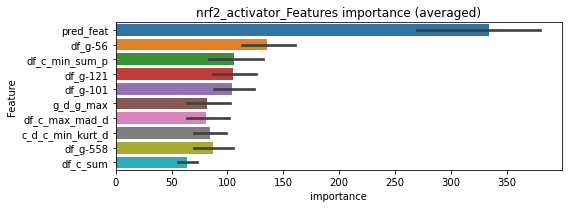

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000406466	valid_1's binary_logloss: 0.00075883
[2000]	training's binary_logloss: 0.000250605	valid_1's binary_logloss: 0.000588573
[3000]	training's binary_logloss: 0.000206531	valid_1's binary_logloss: 0.000537821
[4000]	training's binary_logloss: 0.000184261	valid_1's binary_logloss: 0.000511365
Early stopping, best iteration is:
[4891]	training's binary_logloss: 0.000173032	valid_1's binary_logloss: 0.000497379


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000407935	valid_1's binary_logloss: 0.00130339
[2000]	training's binary_logloss: 0.000251418	valid_1's binary_logloss: 0.00104148
Early stopping, best iteration is:
[2936]	training's binary_logloss: 0.000208181	valid_1's binary_logloss: 0.000951936


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000409175	valid_1's binary_logloss: 0.000380285
[2000]	training's binary_logloss: 0.000250719	valid_1's binary_logloss: 0.000223574
[3000]	training's binary_logloss: 0.000206039	valid_1's binary_logloss: 0.0001757
[4000]	training's binary_logloss: 0.000183172	valid_1's binary_logloss: 0.000150746
[5000]	training's binary_logloss: 0.000170773	valid_1's binary_logloss: 0.000137013
[6000]	training's binary_logloss: 0.00016253	valid_1's binary_logloss: 0.000127808
[7000]	training's binary_logloss: 0.000156572	valid_1's binary_logloss: 0.000121149
[8000]	training's binary_logloss: 0.0001523	valid_1's binary_logloss: 0.000116344
Early stopping, best iteration is:
[8907]	training's binary_logloss: 0.000149368	valid_1's binary_logloss: 0.000113031


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00040829	valid_1's binary_logloss: 0.00145784
[2000]	training's binary_logloss: 0.000250156	valid_1's binary_logloss: 0.00120824
Early stopping, best iteration is:
[2606]	training's binary_logloss: 0.000217564	valid_1's binary_logloss: 0.00116406


nrf2_activator logloss: 0.0006817131138817519


neg labels: 3289 → selected neg labels: 3280


opioid_receptor_agonist, len(trt): 61, len(othr): 3280
target_rate: 0.0025615 → Adj_target_rate: 0.0027652
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00500242	valid_1's binary_logloss: 0.0384802
[600]	training's binary_logloss: 0.000926919	valid_1's binary_logloss: 0.0274809
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000854168	valid_1's binary_logloss: 0.0272215
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00522149	valid_1's binary_logloss: 0.0384771
[600]	training's binary_logloss: 0.000959606	valid_1's binary_logloss: 0.0284166
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.00072734	valid_1's binary_logloss: 0.0276152
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00589236	valid_1's binary_logloss: 0.0149008
[600]	training's binary_logloss: 0.00102427	valid_1's binary_logloss: 0.00691615
[900]	training's binary_logloss: 0.000667838	valid_1's binary_logloss: 0.00604993
Early stopping, best 

1 / 3 AUC score:1.000
y_Threshold: 0.0063171, Threshold: 0.0186247, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, conf_0:0.01304, conf_1:0.02421
Num_p_label: 40.0, Expected: 10.2, Adj_threshold_1: 0.0186247
Num_p_label: 3.0, Expected: 10.2, Adj_threshold_2: 0.0686247
threshold: 0.0686247, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00111816	valid_1's binary_logloss: 0.0048383
[600]	training's binary_logloss: 0.000223076	valid_1's binary_logloss: 0.00286155
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.00018616	valid_1's binary_logloss: 0.00268141
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00109249	valid_1's binary_logloss: 0.00398472
[600]	training's binary_logloss: 0.000221988	valid_1's binary_logloss: 0.00237161
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000217929	valid_1's binary_logloss: 0.0023377
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115938	valid_1's binary_logloss: 0.00160886
[600]	training's binary_logloss: 0.000228657	valid_1's binary_logloss: 0.000434164
[900]	training's binary_logloss: 0.000168643	valid_1's binary_logloss: 0.000341052
Early stoppin

2 / 3 AUC score:1.000
y_Threshold: 0.5644064, Threshold: 0.0686247, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0502260 Vs.target_rate: 0.00256
Num_p_label: 200.0, conf_0:0.05490, conf_1:0.08235
Num_p_label: 200.0, Expected: 10.2, Adj_threshold_1: 0.0686247
Num_p_label: 200.0, Expected: 10.2, Adj_threshold_2: 0.1186247
Num_p_label: 198.0, Expected: 10.2, Adj_threshold_3: 0.1686247
Num_p_label: 197.0, Expected: 10.2, Adj_threshold_4: 0.2186247
Num_p_label: 197.0, Expected: 10.2, Adj_threshold_5: 0.2686247
Num_p_label: 196.0, Expected: 10.2, Adj_threshold_6: 0.3186247
Num_p_label: 192.0, Expected: 10.2, Adj_threshold_7: 0.3686247
Num_p_label: 191.0, Expected: 10.2, Adj_threshold_8: 0.4186247
Num_p_label: 190.0, Expected: 10.2, Adj_threshold_9: 0.4686247
Num_p_label: 184.0, Expected: 10.2, Adj_threshold_10: 0.5186247
threshold: 0.5686247, positive_p_label: 177.0/3982, p_label_rate: 0.0444500
positive_y_label: 655.0/3802, y_label_rate:

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00111623	valid_1's binary_logloss: 0.00380998
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000274123	valid_1's binary_logloss: 0.0021855
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0010855	valid_1's binary_logloss: 0.00354224
[600]	training's binary_logloss: 0.000225838	valid_1's binary_logloss: 0.00180236
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000206341	valid_1's binary_logloss: 0.00170851
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115951	valid_1's binary_logloss: 0.00491516
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000333122	valid_1's binary_logloss: 0.00333131
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00109597	valid_1's binary_logloss: 0.0026735
[6

3 / 3 AUC score:1.000
y_Threshold: 0.5628461, Threshold: 0.5686247, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3800
p_label_rate: 0.0301356 Vs.target_rate: 0.00256
Num_p_label: 120.0, conf_0:0.50000, conf_1:0.62549
Num_p_label: 120.0, Expected: 10.2, Adj_threshold_1: 0.5686247
Num_p_label: 82.0, Expected: 10.2, Adj_threshold_2: 0.6186247
Num_p_label: 67.0, Expected: 10.2, Adj_threshold_3: 0.6686247
Num_p_label: 55.0, Expected: 10.2, Adj_threshold_4: 0.7186247
Num_p_label: 44.0, Expected: 10.2, Adj_threshold_5: 0.7686247
threshold: 0.7686247, positive_p_label: 44.0/3982, p_label_rate: 0.0110497
positive_y_label: 654.0/3800, y_label_rate: 0.1721053


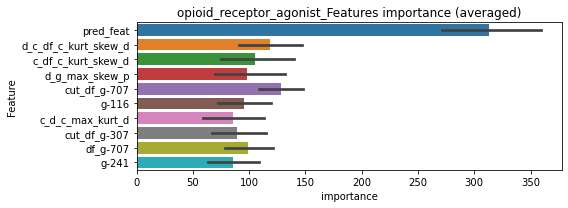

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000547377	valid_1's binary_logloss: 0.00363021
[2000]	training's binary_logloss: 0.000311925	valid_1's binary_logloss: 0.00314268
[3000]	training's binary_logloss: 0.000243642	valid_1's binary_logloss: 0.0029679
Early stopping, best iteration is:
[3696]	training's binary_logloss: 0.000219638	valid_1's binary_logloss: 0.00291886


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000550642	valid_1's binary_logloss: 0.00483382
Early stopping, best iteration is:
[1116]	training's binary_logloss: 0.000499134	valid_1's binary_logloss: 0.00473142


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000547729	valid_1's binary_logloss: 0.00141521
Early stopping, best iteration is:
[1673]	training's binary_logloss: 0.000353906	valid_1's binary_logloss: 0.00115165


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000546635	valid_1's binary_logloss: 0.000761582
[2000]	training's binary_logloss: 0.000311067	valid_1's binary_logloss: 0.000430752
[3000]	training's binary_logloss: 0.000243541	valid_1's binary_logloss: 0.000327594
[4000]	training's binary_logloss: 0.00021204	valid_1's binary_logloss: 0.000276539
[5000]	training's binary_logloss: 0.000196268	valid_1's binary_logloss: 0.000251185
[6000]	training's binary_logloss: 0.000186386	valid_1's binary_logloss: 0.000235518
[7000]	training's binary_logloss: 0.000179139	valid_1's binary_logloss: 0.000223693
[8000]	training's binary_logloss: 0.000174058	valid_1's binary_logloss: 0.000215033
Early stopping, best iteration is:
[8028]	training's binary_logloss: 0.000173866	valid_1's binary_logloss: 0.000214725


opioid_receptor_agonist logloss: 0.0022544783023021628


neg labels: 3289 → selected neg labels: 3274


opioid_receptor_antagonist, len(trt): 96, len(othr): 3274
target_rate: 0.0040312 → Adj_target_rate: 0.0040656
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00914427	valid_1's binary_logloss: 0.0691907
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00184989	valid_1's binary_logloss: 0.0571793
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00949301	valid_1's binary_logloss: 0.0547516
[600]	training's binary_logloss: 0.00159743	valid_1's binary_logloss: 0.0410929
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.00148184	valid_1's binary_logloss: 0.0410523
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104102	valid_1's binary_logloss: 0.046932
[600]	training's binary_logloss: 0.00169816	valid_1's binary_logloss: 0.0313041
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.00130086	valid_1's binary_logloss: 0.030421
Training until validation scores don't improve for 30 rounds
[300]	training

1 / 3 AUC score:0.997
y_Threshold: 0.0121546, Threshold: 0.0573320, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 646/3780
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, conf_0:0.04013, conf_1:0.07453
Num_p_label: 40.0, Expected: 16.1, Adj_threshold_1: 0.0573320
Num_p_label: 20.0, Expected: 16.1, Adj_threshold_2: 0.1073320
threshold: 0.1073320, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 646.0/3780, y_label_rate: 0.1708995
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113329	valid_1's binary_logloss: 0.0101611
Early stopping, best iteration is:
[425]	training's binary_logloss: 0.000417279	valid_1's binary_logloss: 0.00952809
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113875	valid_1's binary_logloss: 0.0029421
[600]	training's binary_logloss: 0.000169468	valid_1's binary_logloss: 0.000479295
[900]	training's binary_logloss: 0.000108259	valid_1's binary_logloss: 0.000307555
[1200]	training's binary_logloss: 0.000101837	valid_1's binary_logloss: 0.000289521
Early stopping, best iteration is:
[1267]	training's binary_logloss: 0.000101084	valid_1's binary_logloss: 0.000286959
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00137372	valid_1's binary_logloss: 0.00281905
[600]	training's binary_logloss: 0.000225388	valid_1's binary_logloss: 0.000676918
Early s

2 / 3 AUC score:1.000
y_Threshold: 0.1106846, Threshold: 0.1073320, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 645.0/3778
p_label_rate: 0.0499749 Vs.target_rate: 0.00403
Num_p_label: 199.0, conf_0:0.08587, conf_1:0.12880
Num_p_label: 199.0, Expected: 16.1, Adj_threshold_1: 0.1073320
Num_p_label: 199.0, Expected: 16.1, Adj_threshold_2: 0.1573320
Num_p_label: 199.0, Expected: 16.1, Adj_threshold_3: 0.2073320
Num_p_label: 199.0, Expected: 16.1, Adj_threshold_4: 0.2573320
Num_p_label: 156.0, Expected: 16.1, Adj_threshold_5: 0.3073320
Num_p_label: 151.0, Expected: 16.1, Adj_threshold_6: 0.3573320
Num_p_label: 151.0, Expected: 16.1, Adj_threshold_7: 0.4073320
Num_p_label: 151.0, Expected: 16.1, Adj_threshold_8: 0.4573320
Num_p_label: 151.0, Expected: 16.1, Adj_threshold_9: 0.5073320
Num_p_label: 146.0, Expected: 16.1, Adj_threshold_10: 0.5573320
threshold: 0.6073320, positive_p_label: 145.0/3982, p_label_rate: 0.0364139
positive_y_label: 645.0/3778, y_label_rate:

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127881	valid_1's binary_logloss: 0.0034787
[600]	training's binary_logloss: 0.000219316	valid_1's binary_logloss: 0.00112248
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000186425	valid_1's binary_logloss: 0.00101967
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112448	valid_1's binary_logloss: 0.00332022
[600]	training's binary_logloss: 0.000168499	valid_1's binary_logloss: 0.00055863
[900]	training's binary_logloss: 0.000108324	valid_1's binary_logloss: 0.000361498
Early stopping, best iteration is:
[1164]	training's binary_logloss: 0.000102139	valid_1's binary_logloss: 0.000341312
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117207	valid_1's binary_logloss: 0.00208387
[600]	training's binary_logloss: 0.000171035	valid_1's binary_logloss: 0.000315985
[900]	tra

3 / 3 AUC score:1.000
y_Threshold: 0.1150672, Threshold: 0.6073320, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 645.0/3778
p_label_rate: 0.0369161 Vs.target_rate: 0.00403


[1200]	training's binary_logloss: 0.000101755	valid_1's binary_logloss: 0.000197096
Early stopping, best iteration is:
[1233]	training's binary_logloss: 0.000101374	valid_1's binary_logloss: 0.000196314


Num_p_label: 147.0, conf_0:0.50000, conf_1:0.66807
Num_p_label: 147.0, Expected: 16.1, Adj_threshold_1: 0.6073320
Num_p_label: 147.0, Expected: 16.1, Adj_threshold_2: 0.6573320
Num_p_label: 147.0, Expected: 16.1, Adj_threshold_3: 0.7073320
Num_p_label: 147.0, Expected: 16.1, Adj_threshold_4: 0.7573320
threshold: 0.7573320, positive_p_label: 147.0/3982, p_label_rate: 0.0369161
positive_y_label: 645.0/3778, y_label_rate: 0.1707253


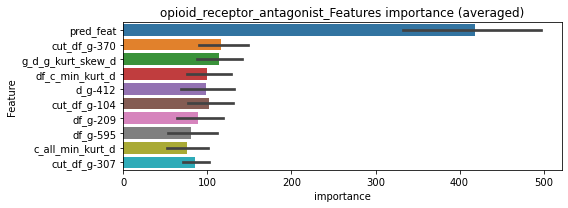

len(train_index) : 2833
len(valid_index) : 945
================================= fold 1/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2833
len(valid_index) : 945
================================= fold 2/4 opioid_receptor_antagonist=================================


Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000762233	valid_1's binary_logloss: 0.00925704
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000461382	valid_1's binary_logloss: 0.000973278
[2000]	training's binary_logloss: 0.000253589	valid_1's binary_logloss: 0.000537747
[3000]	training's binary_logloss: 0.000185892	valid_1's binary_logloss: 0.00039503
[4000]	training's binary_logloss: 0.000153844	valid_1's binary_logloss: 0.000327233
[5000]	training's binary_logloss: 0.000137521	valid_1's binary_logloss: 0.00029268
[6000]	training's binary_logloss: 0.000127047	valid_1's binary_logloss: 0.000270425
[7000]	training's binary_logloss: 0.000119756	valid_1's binary_logloss: 0.000254903
[8000]	training's binary_logloss: 0.000114778	valid_1's binary_logloss: 0.000244355
[9000]	training's binary_logloss: 0.000111228	valid_1's binary_logloss: 0.000236795
[10000]	training's binary_logloss: 0.000108684	valid_1's binary_logl

len(train_index) : 2834
len(valid_index) : 944
================================= fold 3/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000464459	valid_1's binary_logloss: 0.000703851
[2000]	training's binary_logloss: 0.000254241	valid_1's binary_logloss: 0.000386283
[3000]	training's binary_logloss: 0.000186108	valid_1's binary_logloss: 0.000283022
[4000]	training's binary_logloss: 0.000154	valid_1's binary_logloss: 0.000234299
[5000]	training's binary_logloss: 0.000137658	valid_1's binary_logloss: 0.000209497
[6000]	training's binary_logloss: 0.000127123	valid_1's binary_logloss: 0.000193473
[7000]	training's binary_logloss: 0.000119806	valid_1's binary_logloss: 0.00018234
[8000]	training's binary_logloss: 0.0001148	valid_1's binary_logloss: 0.000174731
[9000]	training's binary_logloss: 0.000111247	valid_1's binary_logloss: 0.000169327
[10000]	training's binary_logloss: 0.000108704	valid_1's binary_logloss: 0.000165464
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000108704	valid_1's 

len(train_index) : 2834
len(valid_index) : 944
================================= fold 4/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000464307	valid_1's binary_logloss: 0.000692711
[2000]	training's binary_logloss: 0.000254228	valid_1's binary_logloss: 0.000380093
[3000]	training's binary_logloss: 0.000186146	valid_1's binary_logloss: 0.000278528
[4000]	training's binary_logloss: 0.000153951	valid_1's binary_logloss: 0.000230433
[5000]	training's binary_logloss: 0.000137606	valid_1's binary_logloss: 0.000206018
[6000]	training's binary_logloss: 0.000127116	valid_1's binary_logloss: 0.000190319
[7000]	training's binary_logloss: 0.00011981	valid_1's binary_logloss: 0.000179381
[8000]	training's binary_logloss: 0.000114813	valid_1's binary_logloss: 0.000171909
[9000]	training's binary_logloss: 0.000111265	valid_1's binary_logloss: 0.000166599
[10000]	training's binary_logloss: 0.00010871	valid_1's binary_logloss: 0.000162784
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.00010871	valid_1

opioid_receptor_antagonist logloss: 0.002455387333587572


neg labels: 3289 → selected neg labels: 3286


orexin_receptor_antagonist, len(trt): 37, len(othr): 3286
target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00270742	valid_1's binary_logloss: 0.0147827
[600]	training's binary_logloss: 0.000571768	valid_1's binary_logloss: 0.0103272
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000563779	valid_1's binary_logloss: 0.0102906
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00265654	valid_1's binary_logloss: 0.0167596
[600]	training's binary_logloss: 0.000561244	valid_1's binary_logloss: 0.0108901
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000500702	valid_1's binary_logloss: 0.0107388
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00289873	valid_1's binary_logloss: 0.00624012
[600]	training's binary_logloss: 0.000585449	valid_1's binary_logloss: 0.00221859
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.000497996	valid_1's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0035271, Threshold: 0.0102744, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, conf_0:0.00719, conf_1:0.01336
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0102744
Num_p_label: 4.0, Expected: 6.2, Adj_threshold_2: 0.0602744
threshold: 0.0602744, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000838296	valid_1's binary_logloss: 0.00288269
[600]	training's binary_logloss: 0.000205369	valid_1's binary_logloss: 0.00199957
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.00020079	valid_1's binary_logloss: 0.0019913
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000784307	valid_1's binary_logloss: 0.00339801
[600]	training's binary_logloss: 0.00019496	valid_1's binary_logloss: 0.00258643
[900]	training's binary_logloss: 0.000153599	valid_1's binary_logloss: 0.00251653
Early stopping, best iteration is:
[969]	training's binary_logloss: 0.000150081	valid_1's binary_logloss: 0.00251199
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000824142	valid_1's binary_logloss: 0.00113088
[600]	training's binary_logloss: 0.000200278	valid_1's binary_logloss: 0.000353417
[900]	train

2 / 3 AUC score:1.000
y_Threshold: 0.5977085, Threshold: 0.0602744, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0394274 Vs.target_rate: 0.00155
Num_p_label: 157.0, conf_0:0.04822, conf_1:0.07233
Num_p_label: 157.0, Expected: 6.2, Adj_threshold_1: 0.0602744


[600]	training's binary_logloss: 0.000197697	valid_1's binary_logloss: 0.000977901
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000187348	valid_1's binary_logloss: 0.000969346


Num_p_label: 156.0, Expected: 6.2, Adj_threshold_2: 0.1102744
Num_p_label: 156.0, Expected: 6.2, Adj_threshold_3: 0.1602744
Num_p_label: 156.0, Expected: 6.2, Adj_threshold_4: 0.2102744
Num_p_label: 156.0, Expected: 6.2, Adj_threshold_5: 0.2602744
Num_p_label: 156.0, Expected: 6.2, Adj_threshold_6: 0.3102744
Num_p_label: 156.0, Expected: 6.2, Adj_threshold_7: 0.3602744
Num_p_label: 156.0, Expected: 6.2, Adj_threshold_8: 0.4102744
Num_p_label: 154.0, Expected: 6.2, Adj_threshold_9: 0.4602744
Num_p_label: 154.0, Expected: 6.2, Adj_threshold_10: 0.5102744
threshold: 0.5602744, positive_p_label: 151.0/3982, p_label_rate: 0.0379206
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000806828	valid_1's binary_logloss: 0.00308441
[600]	training's binary_logloss: 0.000206483	valid_1's binary_logloss: 0.0020479
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.000185377	valid_1's binary_logloss: 0.00199166
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000838437	valid_1's binary_logloss: 0.00275016
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000240414	valid_1's binary_logloss: 0.00193117
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000850862	valid_1's binary_logloss: 0.00187098
[600]	training's binary_logloss: 0.000209922	valid_1's binary_logloss: 0.00112633
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000215338	valid_1's binary_logloss: 0.00111944
Training until validation scores don't improve for 30 rou

3 / 3 AUC score:1.000
y_Threshold: 0.5984670, Threshold: 0.5602744, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0286288 Vs.target_rate: 0.00155
Num_p_label: 114.0, conf_0:0.50000, conf_1:0.61630
Num_p_label: 114.0, Expected: 6.2, Adj_threshold_1: 0.5602744
Num_p_label: 82.0, Expected: 6.2, Adj_threshold_2: 0.6102744
Num_p_label: 58.0, Expected: 6.2, Adj_threshold_3: 0.6602744
Num_p_label: 39.0, Expected: 6.2, Adj_threshold_4: 0.7102744
Num_p_label: 20.0, Expected: 6.2, Adj_threshold_5: 0.7602744
threshold: 0.7602744, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


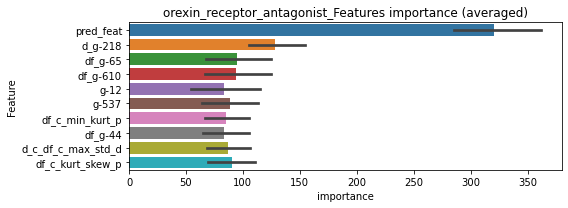

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000548675	valid_1's binary_logloss: 0.00335004


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000504609	valid_1's binary_logloss: 0.00249791
[2000]	training's binary_logloss: 0.000293432	valid_1's binary_logloss: 0.00219514
Early stopping, best iteration is:
[2492]	training's binary_logloss: 0.000257268	valid_1's binary_logloss: 0.00215623


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00050791	valid_1's binary_logloss: 0.00141271
Early stopping, best iteration is:
[1057]	training's binary_logloss: 0.000483868	valid_1's binary_logloss: 0.00137881


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000508296	valid_1's binary_logloss: 0.00158035
Early stopping, best iteration is:
[1216]	training's binary_logloss: 0.000431245	valid_1's binary_logloss: 0.00149163


orexin_receptor_antagonist logloss: 0.0020948003010940472


neg labels: 3289 → selected neg labels: 3281


p38_mapk_inhibitor, len(trt): 62, len(othr): 3281
target_rate: 0.0026035 → Adj_target_rate: 0.0028037
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00562631	valid_1's binary_logloss: 0.0378519
[600]	training's binary_logloss: 0.000967246	valid_1's binary_logloss: 0.0273002
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000798996	valid_1's binary_logloss: 0.0267883
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00613944	valid_1's binary_logloss: 0.0285185
[600]	training's binary_logloss: 0.00102278	valid_1's binary_logloss: 0.016841
Early stopping, best iteration is:
[855]	training's binary_logloss: 0.00065006	valid_1's binary_logloss: 0.0159171
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00598656	valid_1's binary_logloss: 0.0224856
[600]	training's binary_logloss: 0.00103747	valid_1's binary_logloss: 0.011855
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000671831	valid_1's binary_logloss: 0

1 / 3 AUC score:1.000
y_Threshold: 0.0087156, Threshold: 0.0369678, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00260
Num_p_label: 40.0, conf_0:0.02588, conf_1:0.04806
Num_p_label: 40.0, Expected: 10.4, Adj_threshold_1: 0.0369678
Num_p_label: 11.0, Expected: 10.4, Adj_threshold_2: 0.0869678
threshold: 0.0869678, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119506	valid_1's binary_logloss: 0.00309656
[600]	training's binary_logloss: 0.000236917	valid_1's binary_logloss: 0.00168379
Early stopping, best iteration is:
[853]	training's binary_logloss: 0.00017854	valid_1's binary_logloss: 0.00156505
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117288	valid_1's binary_logloss: 0.00432317
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000264375	valid_1's binary_logloss: 0.00297053
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118878	valid_1's binary_logloss: 0.0056732
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.000523282	valid_1's binary_logloss: 0.00483918
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116107	valid_1's binary_logloss: 0.00344689
[

2 / 3 AUC score:1.000
y_Threshold: 0.5415884, Threshold: 0.0869678, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3797
p_label_rate: 0.0570065 Vs.target_rate: 0.00260
Num_p_label: 227.0, conf_0:0.06957, conf_1:0.10436
Num_p_label: 227.0, Expected: 10.4, Adj_threshold_1: 0.0869678
Num_p_label: 227.0, Expected: 10.4, Adj_threshold_2: 0.1369678
Num_p_label: 226.0, Expected: 10.4, Adj_threshold_3: 0.1869678
Num_p_label: 226.0, Expected: 10.4, Adj_threshold_4: 0.2369678
Num_p_label: 226.0, Expected: 10.4, Adj_threshold_5: 0.2869678
Num_p_label: 226.0, Expected: 10.4, Adj_threshold_6: 0.3369678
Num_p_label: 223.0, Expected: 10.4, Adj_threshold_7: 0.3869678
Num_p_label: 213.0, Expected: 10.4, Adj_threshold_8: 0.4369678
Num_p_label: 200.0, Expected: 10.4, Adj_threshold_9: 0.4869678
Num_p_label: 178.0, Expected: 10.4, Adj_threshold_10: 0.5369678
threshold: 0.5869678, positive_p_label: 152.0/3982, p_label_rate: 0.0381718
positive_y_label: 652.0/3797, y_label_rate:

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011715	valid_1's binary_logloss: 0.00244511
[600]	training's binary_logloss: 0.000235539	valid_1's binary_logloss: 0.00128353
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000223192	valid_1's binary_logloss: 0.00123462
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116692	valid_1's binary_logloss: 0.00272501
[600]	training's binary_logloss: 0.000235474	valid_1's binary_logloss: 0.00129095
[900]	training's binary_logloss: 0.000176119	valid_1's binary_logloss: 0.00118322
Early stopping, best iteration is:
[978]	training's binary_logloss: 0.00017221	valid_1's binary_logloss: 0.00117117
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119082	valid_1's binary_logloss: 0.0035261
[600]	training's binary_logloss: 0.00023659	valid_1's binary_logloss: 0.0017276
[900]	training's 

3 / 3 AUC score:1.000
y_Threshold: 0.4915725, Threshold: 0.5869678, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 651.0/3795
p_label_rate: 0.0095429 Vs.target_rate: 0.00260
Num_p_label: 38.0, conf_0:0.50000, conf_1:0.64566
Num_p_label: 38.0, Expected: 10.4, Adj_threshold_1: 0.5869678
Num_p_label: 22.0, Expected: 10.4, Adj_threshold_2: 0.6369678
Num_p_label: 13.0, Expected: 10.4, Adj_threshold_3: 0.6869678
threshold: 0.6869678, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 651.0/3795, y_label_rate: 0.1715415


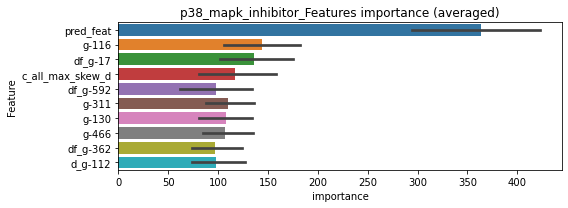

len(train_index) : 2846
len(valid_index) : 949
================================= fold 1/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[944]	training's binary_logloss: 0.000584351	valid_1's binary_logloss: 0.0054908


len(train_index) : 2846
len(valid_index) : 949
================================= fold 2/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000551532	valid_1's binary_logloss: 0.00199955
Early stopping, best iteration is:
[1062]	training's binary_logloss: 0.000522831	valid_1's binary_logloss: 0.0019646


len(train_index) : 2846
len(valid_index) : 949
================================= fold 3/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000563051	valid_1's binary_logloss: 0.00293225
[2000]	training's binary_logloss: 0.000323134	valid_1's binary_logloss: 0.00254717
Early stopping, best iteration is:
[2936]	training's binary_logloss: 0.000254863	valid_1's binary_logloss: 0.0024248


len(train_index) : 2847
len(valid_index) : 948
================================= fold 4/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000557334	valid_1's binary_logloss: 0.00365296
Early stopping, best iteration is:
[1115]	training's binary_logloss: 0.000507361	valid_1's binary_logloss: 0.00361306


p38_mapk_inhibitor logloss: 0.003373338772983292


neg labels: 3289 → selected neg labels: 3288


p-glycoprotein_inhibitor, len(trt): 24, len(othr): 3288
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176371	valid_1's binary_logloss: 0.00422581
[600]	training's binary_logloss: 0.000418253	valid_1's binary_logloss: 0.00156658
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000409139	valid_1's binary_logloss: 0.00154169
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173552	valid_1's binary_logloss: 0.0100656
[600]	training's binary_logloss: 0.00041101	valid_1's binary_logloss: 0.00774359
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000401402	valid_1's binary_logloss: 0.00772306
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00179419	valid_1's binary_logloss: 0.00344711
[600]	training's binary_logloss: 0.000421084	valid_1's binary_logloss: 0.00113455
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000417664	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0027352, Threshold: 0.0110721, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.00775, conf_1:0.01439
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0110721
Num_p_label: 6.0, Expected: 4.0, Adj_threshold_2: 0.0610721
threshold: 0.0610721, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000648736	valid_1's binary_logloss: 0.00151391
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000230997	valid_1's binary_logloss: 0.00101865
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000628228	valid_1's binary_logloss: 0.00271962
[600]	training's binary_logloss: 0.000177346	valid_1's binary_logloss: 0.00201642
Early stopping, best iteration is:
[853]	training's binary_logloss: 0.000147096	valid_1's binary_logloss: 0.00197251
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000644199	valid_1's binary_logloss: 0.000709225
[600]	training's binary_logloss: 0.000182994	valid_1's binary_logloss: 0.000194282
[900]	training's binary_logloss: 0.000148936	valid_1's binary_logloss: 0.000153209
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000148936	valid_1'

2 / 3 AUC score:1.000
y_Threshold: 0.5257748, Threshold: 0.0610721, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0549975 Vs.target_rate: 0.00101
Num_p_label: 219.0, conf_0:0.04886, conf_1:0.07329
Num_p_label: 219.0, Expected: 4.0, Adj_threshold_1: 0.0610721
Num_p_label: 218.0, Expected: 4.0, Adj_threshold_2: 0.1110721
Num_p_label: 216.0, Expected: 4.0, Adj_threshold_3: 0.1610721
Num_p_label: 216.0, Expected: 4.0, Adj_threshold_4: 0.2110721
Num_p_label: 215.0, Expected: 4.0, Adj_threshold_5: 0.2610721
Num_p_label: 214.0, Expected: 4.0, Adj_threshold_6: 0.3110721
Num_p_label: 211.0, Expected: 4.0, Adj_threshold_7: 0.3610721
Num_p_label: 206.0, Expected: 4.0, Adj_threshold_8: 0.4110721
Num_p_label: 191.0, Expected: 4.0, Adj_threshold_9: 0.4610721
Num_p_label: 164.0, Expected: 4.0, Adj_threshold_10: 0.5110721


Early stopping, best iteration is:
[853]	training's binary_logloss: 0.000151541	valid_1's binary_logloss: 0.000309938


threshold: 0.5610721, positive_p_label: 129.0/3982, p_label_rate: 0.0323958
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000646868	valid_1's binary_logloss: 0.00583255
Early stopping, best iteration is:
[397]	training's binary_logloss: 0.000316658	valid_1's binary_logloss: 0.00463597
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000638465	valid_1's binary_logloss: 0.00293609
[600]	training's binary_logloss: 0.00017935	valid_1's binary_logloss: 0.00211408
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000165869	valid_1's binary_logloss: 0.00207429
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000643421	valid_1's binary_logloss: 0.000681817
[600]	training's binary_logloss: 0.000183146	valid_1's binary_logloss: 0.000167395
[900]	training's binary_logloss: 0.000148701	valid_1's binary_logloss: 0.000124148
Early stopping, best iteration is:
[952]	training's binary_logloss: 0.000146566	valid_1's

3 / 3 AUC score:1.000
y_Threshold: 0.6682741, Threshold: 0.5610721, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0268709 Vs.target_rate: 0.00101
Num_p_label: 107.0, conf_0:0.50000, conf_1:0.61718
Num_p_label: 107.0, Expected: 4.0, Adj_threshold_1: 0.5610721
Num_p_label: 75.0, Expected: 4.0, Adj_threshold_2: 0.6110721
Num_p_label: 55.0, Expected: 4.0, Adj_threshold_3: 0.6610721
Num_p_label: 35.0, Expected: 4.0, Adj_threshold_4: 0.7110721
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_5: 0.7610721
threshold: 0.7610721, positive_p_label: 21.0/3982, p_label_rate: 0.0052737


Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000152345	valid_1's binary_logloss: 0.000284924


positive_y_label: 656.0/3811, y_label_rate: 0.1721333


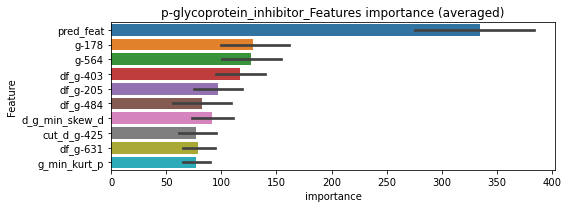

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000449302	valid_1's binary_logloss: 0.00371036
Early stopping, best iteration is:
[1141]	training's binary_logloss: 0.000403141	valid_1's binary_logloss: 0.00360094


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000449261	valid_1's binary_logloss: 0.00106079
[2000]	training's binary_logloss: 0.000272846	valid_1's binary_logloss: 0.000847848
Early stopping, best iteration is:
[2319]	training's binary_logloss: 0.000251878	valid_1's binary_logloss: 0.000813829


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000456155	valid_1's binary_logloss: 0.000446945
[2000]	training's binary_logloss: 0.000273742	valid_1's binary_logloss: 0.000257841
[3000]	training's binary_logloss: 0.000221841	valid_1's binary_logloss: 0.000200729
[4000]	training's binary_logloss: 0.000198116	valid_1's binary_logloss: 0.000173126
[5000]	training's binary_logloss: 0.000185397	valid_1's binary_logloss: 0.000158291
[6000]	training's binary_logloss: 0.000176804	valid_1's binary_logloss: 0.000148288
[7000]	training's binary_logloss: 0.000170733	valid_1's binary_logloss: 0.000141429
[8000]	training's binary_logloss: 0.000165937	valid_1's binary_logloss: 0.000136056
Early stopping, best iteration is:
[8671]	training's binary_logloss: 0.000163467	valid_1's binary_logloss: 0.00013335


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000453547	valid_1's binary_logloss: 0.00123766
[2000]	training's binary_logloss: 0.000272199	valid_1's binary_logloss: 0.00101198
[3000]	training's binary_logloss: 0.000221811	valid_1's binary_logloss: 0.000948767
[4000]	training's binary_logloss: 0.000197685	valid_1's binary_logloss: 0.000917329
[5000]	training's binary_logloss: 0.000184398	valid_1's binary_logloss: 0.000900802
[6000]	training's binary_logloss: 0.000176008	valid_1's binary_logloss: 0.000890651
Early stopping, best iteration is:
[6969]	training's binary_logloss: 0.000170054	valid_1's binary_logloss: 0.000883678


p-glycoprotein_inhibitor logloss: 0.0013582926486234619


neg labels: 3289 → selected neg labels: 3281


parp_inhibitor, len(trt): 61, len(othr): 3281
target_rate: 0.0025615 → Adj_target_rate: 0.0027652
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00486069	valid_1's binary_logloss: 0.0537107
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.00132823	valid_1's binary_logloss: 0.0451935
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00515335	valid_1's binary_logloss: 0.0248906
[600]	training's binary_logloss: 0.000957391	valid_1's binary_logloss: 0.0154507
Early stopping, best iteration is:
[784]	training's binary_logloss: 0.000696972	valid_1's binary_logloss: 0.0145149
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00549997	valid_1's binary_logloss: 0.0188881
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.00137296	valid_1's binary_logloss: 0.0124731
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00484808	valid_1's binary_logloss: 0.0236464
[600]	tra

1 / 3 AUC score:1.000
y_Threshold: 0.0071638, Threshold: 0.0245722, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, conf_0:0.01720, conf_1:0.03194
Num_p_label: 40.0, Expected: 10.2, Adj_threshold_1: 0.0245722
Num_p_label: 5.0, Expected: 10.2, Adj_threshold_2: 0.0745722
threshold: 0.0745722, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117473	valid_1's binary_logloss: 0.00353125
[600]	training's binary_logloss: 0.000232566	valid_1's binary_logloss: 0.00225828
[900]	training's binary_logloss: 0.000173671	valid_1's binary_logloss: 0.00215865
Early stopping, best iteration is:
[998]	training's binary_logloss: 0.000167744	valid_1's binary_logloss: 0.00214401
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115677	valid_1's binary_logloss: 0.00633833
Early stopping, best iteration is:
[389]	training's binary_logloss: 0.000537571	valid_1's binary_logloss: 0.0053874
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116536	valid_1's binary_logloss: 0.00218353
[600]	training's binary_logloss: 0.000233359	valid_1's binary_logloss: 0.000872084
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000204957	valid_1's bina

2 / 3 AUC score:1.000
y_Threshold: 0.6528356, Threshold: 0.0745722, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 651.0/3795
p_label_rate: 0.0554997 Vs.target_rate: 0.00256
Num_p_label: 221.0, conf_0:0.05966, conf_1:0.08949
Num_p_label: 221.0, Expected: 10.2, Adj_threshold_1: 0.0745722
Num_p_label: 221.0, Expected: 10.2, Adj_threshold_2: 0.1245722
Num_p_label: 221.0, Expected: 10.2, Adj_threshold_3: 0.1745722
Num_p_label: 221.0, Expected: 10.2, Adj_threshold_4: 0.2245722
Num_p_label: 221.0, Expected: 10.2, Adj_threshold_5: 0.2745722
Num_p_label: 221.0, Expected: 10.2, Adj_threshold_6: 0.3245722
Num_p_label: 220.0, Expected: 10.2, Adj_threshold_7: 0.3745722
Num_p_label: 219.0, Expected: 10.2, Adj_threshold_8: 0.4245722
Num_p_label: 217.0, Expected: 10.2, Adj_threshold_9: 0.4745722
Num_p_label: 205.0, Expected: 10.2, Adj_threshold_10: 0.5245722
threshold: 0.5745722, positive_p_label: 179.0/3982, p_label_rate: 0.0449523
positive_y_label: 651.0/3795, y_label_rate:

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00109655	valid_1's binary_logloss: 0.00171836
[600]	training's binary_logloss: 0.000231986	valid_1's binary_logloss: 0.000377622
[900]	training's binary_logloss: 0.000173186	valid_1's binary_logloss: 0.000269773
Early stopping, best iteration is:
[971]	training's binary_logloss: 0.000168614	valid_1's binary_logloss: 0.000261477
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107007	valid_1's binary_logloss: 0.00612948
[600]	training's binary_logloss: 0.000226553	valid_1's binary_logloss: 0.00436688
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000217821	valid_1's binary_logloss: 0.00435801
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00109539	valid_1's binary_logloss: 0.00396552
[600]	training's binary_logloss: 0.000227814	valid_1's binary_logloss: 0.00255389
Early sto

3 / 3 AUC score:1.000
y_Threshold: 0.2991890, Threshold: 0.5745722, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0015068 Vs.target_rate: 0.00256
Num_p_label: 6.0, conf_0:0.50000, conf_1:0.63203
Num_p_label: 6.0, Expected: 10.2, Adj_threshold_1: 0.5745722
Num_p_label: 8.0, Expected: 10.2, Adj_threshold_2: 0.5545722
threshold: 0.5545722, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 650.0/3793, y_label_rate: 0.1713683


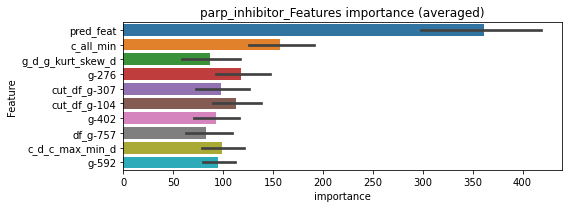

len(train_index) : 2844
len(valid_index) : 949
================================= fold 1/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000561622	valid_1's binary_logloss: 0.00123477
[2000]	training's binary_logloss: 0.000318981	valid_1's binary_logloss: 0.000911247
Early stopping, best iteration is:
[2150]	training's binary_logloss: 0.000305352	valid_1's binary_logloss: 0.000897759


len(train_index) : 2845
len(valid_index) : 948
================================= fold 2/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000557685	valid_1's binary_logloss: 0.00353002
[2000]	training's binary_logloss: 0.000318044	valid_1's binary_logloss: 0.0031717
[3000]	training's binary_logloss: 0.000248256	valid_1's binary_logloss: 0.00304782
Early stopping, best iteration is:
[3513]	training's binary_logloss: 0.000228936	valid_1's binary_logloss: 0.00300717


len(train_index) : 2845
len(valid_index) : 948
================================= fold 3/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000535933	valid_1's binary_logloss: 0.00291844
Early stopping, best iteration is:
[1017]	training's binary_logloss: 0.000527748	valid_1's binary_logloss: 0.00290468


len(train_index) : 2845
len(valid_index) : 948
================================= fold 4/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000538437	valid_1's binary_logloss: 0.00405648
Early stopping, best iteration is:
[1213]	training's binary_logloss: 0.000459778	valid_1's binary_logloss: 0.0039587


parp_inhibitor logloss: 0.0026922735254449395


neg labels: 3289 → selected neg labels: 3245


pdgfr_inhibitor, len(trt): 297, len(othr): 3245
target_rate: 0.0124717 → Adj_target_rate: 0.0106179
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0434034	valid_1's binary_logloss: 0.259176
Early stopping, best iteration is:
[366]	training's binary_logloss: 0.0286206	valid_1's binary_logloss: 0.255774
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0448222	valid_1's binary_logloss: 0.252567
Early stopping, best iteration is:
[351]	training's binary_logloss: 0.0327595	valid_1's binary_logloss: 0.250892
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0423591	valid_1's binary_logloss: 0.273793
Early stopping, best iteration is:
[333]	training's binary_logloss: 0.0343802	valid_1's binary_logloss: 0.272137
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0436161	valid_1's binary_logloss: 0.265115


1 / 3 AUC score:0.886
y_Threshold: 0.0882985, Threshold: 0.5905448, pos_neg_ratio: 0.8000000
Remove_noisy_data: 442 → Positive_corect_labels: 493/3452
p_label_rate: 0.0100452 Vs.target_rate: 0.01247
Num_p_label: 40.0, conf_0:0.41338, conf_1:0.76771
threshold: 0.5905448, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[354]	training's binary_logloss: 0.031541	valid_1's binary_logloss: 0.262234


positive_y_label: 493.0/3452, y_label_rate: 0.1428158
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00175076	valid_1's binary_logloss: 0.00704914
[600]	training's binary_logloss: 0.000255408	valid_1's binary_logloss: 0.00320791
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000232433	valid_1's binary_logloss: 0.00309929
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00163974	valid_1's binary_logloss: 0.00405571
[600]	training's binary_logloss: 0.000204022	valid_1's binary_logloss: 0.000537455
[900]	training's binary_logloss: 0.000120168	valid_1's binary_logloss: 0.000317589
[1200]	training's binary_logloss: 0.000111711	valid_1's binary_logloss: 0.000295365
Early stopping, best iteration is:
[1213]	training's binary_logloss: 0.000111486	valid_1's binary_logloss: 0.000294648
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162314	valid_1's binary_logloss: 0.00353172
[600]	

2 / 3 AUC score:1.000
y_Threshold: 0.7967245, Threshold: 0.5905448, pos_neg_ratio: 0.8000000


[1200]	training's binary_logloss: 0.000111731	valid_1's binary_logloss: 0.00036801
Early stopping, best iteration is:
[1241]	training's binary_logloss: 0.000111078	valid_1's binary_logloss: 0.000365375


Remove_noisy_data: 2 → Positive_corect_labels: 492.0/3450
p_label_rate: 0.1240583 Vs.target_rate: 0.01247
Num_p_label: 494.0, conf_0:0.47244, conf_1:0.70865
Num_p_label: 494.0, Expected: 49.7, Adj_threshold_1: 0.5905448
Num_p_label: 494.0, Expected: 49.7, Adj_threshold_2: 0.6405448
Num_p_label: 494.0, Expected: 49.7, Adj_threshold_3: 0.6905448
Num_p_label: 494.0, Expected: 49.7, Adj_threshold_4: 0.7405448
Num_p_label: 494.0, Expected: 49.7, Adj_threshold_5: 0.7905448
threshold: 0.7905448, positive_p_label: 494.0/3982, p_label_rate: 0.1240583
positive_y_label: 492.0/3450, y_label_rate: 0.1426087
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183802	valid_1's binary_logloss: 0.00441564
[600]	training's binary_logloss: 0.000265373	valid_1's binary_logloss: 0.000721195
[900]	training's binary_logloss: 0.000170527	valid_1's binary_logloss: 0.000472014
Early stopping, best iteration is:
[1142]	training's binary_logloss: 0.000154869	valid_1's binary_logloss: 0.000429105
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00189045	valid_1's binary_logloss: 0.00448645
[600]	training's binary_logloss: 0.000269562	valid_1's binary_logloss: 0.00118018
[900]	training's binary_logloss: 0.000169908	valid_1's binary_logloss: 0.000922195
Early stopping, best iteration is:
[936]	training's binary_logloss: 0.000166327	valid_1's binary_logloss: 0.000912748
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00185482	valid_1's binary_logloss: 0.00950636
[600]	

3 / 3 AUC score:1.000
y_Threshold: 0.7439411, Threshold: 0.7905448, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 490.0/3446
p_label_rate: 0.1215470 Vs.target_rate: 0.01247
Num_p_label: 484.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 484.0, Expected: 49.7, Adj_threshold_1: 0.7905448
threshold: 0.7905448, positive_p_label: 484.0/3982, p_label_rate: 0.1215470


Early stopping, best iteration is:
[1106]	training's binary_logloss: 0.000156791	valid_1's binary_logloss: 0.00126698


positive_y_label: 490.0/3446, y_label_rate: 0.1421938


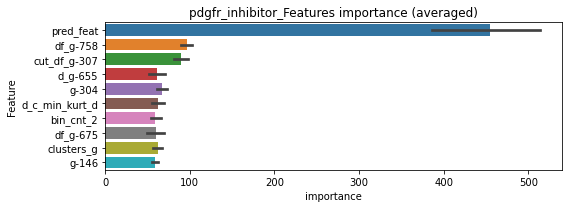

len(train_index) : 2584
len(valid_index) : 862
================================= fold 1/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000657527	valid_1's binary_logloss: 0.00349915
Early stopping, best iteration is:
[1496]	training's binary_logloss: 0.000452128	valid_1's binary_logloss: 0.00310829


len(train_index) : 2584
len(valid_index) : 862
================================= fold 2/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2585
len(valid_index) : 861
================================= fold 3/4 pdgfr_inhibitor=================================


Early stopping, best iteration is:
[758]	training's binary_logloss: 0.00085183	valid_1's binary_logloss: 0.00611434
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[902]	training's binary_logloss: 0.000723071	valid_1's binary_logloss: 0.00480288


len(train_index) : 2585
len(valid_index) : 861
================================= fold 4/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000648517	valid_1's binary_logloss: 0.00398942
[2000]	training's binary_logloss: 0.000361314	valid_1's binary_logloss: 0.00349486
Early stopping, best iteration is:
[2057]	training's binary_logloss: 0.000354826	valid_1's binary_logloss: 0.00348421


pdgfr_inhibitor logloss: 0.004378513394185374


neg labels: 3289 → selected neg labels: 3284


pdk_inhibitor, len(trt): 18, len(othr): 3284
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122782	valid_1's binary_logloss: 0.00908673
[600]	training's binary_logloss: 0.000362434	valid_1's binary_logloss: 0.00614338
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.00036342	valid_1's binary_logloss: 0.00613762
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122276	valid_1's binary_logloss: 0.00378252
[600]	training's binary_logloss: 0.00036987	valid_1's binary_logloss: 0.00175891
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.00036987	valid_1's binary_logloss: 0.00175891
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124625	valid_1's binary_logloss: 0.00207039
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.00038289	valid_1's binary_logloss: 0.000767727
Training until validation scores don't improve for 30 rounds
[

1 / 3 AUC score:1.000
y_Threshold: 0.0018959, Threshold: 0.0124226, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00870, conf_1:0.01615
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0124226
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_2: 0.0624226


Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000372746	valid_1's binary_logloss: 0.00247607


threshold: 0.0624226, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000566547	valid_1's binary_logloss: 0.00384599
Early stopping, best iteration is:
[333]	training's binary_logloss: 0.000417793	valid_1's binary_logloss: 0.0033703
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000568713	valid_1's binary_logloss: 0.00300098
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000203004	valid_1's binary_logloss: 0.00232014
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000583318	valid_1's binary_logloss: 0.00143352
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.000284099	valid_1's binary_logloss: 0.00115219
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000576128	valid_1's binary_logloss: 0.00126786


2 / 3 AUC score:1.000
y_Threshold: 0.5785832, Threshold: 0.0624226, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0612757 Vs.target_rate: 0.00076
Num_p_label: 244.0, conf_0:0.04994, conf_1:0.07491
Num_p_label: 244.0, Expected: 3.0, Adj_threshold_1: 0.0624226
Num_p_label: 244.0, Expected: 3.0, Adj_threshold_2: 0.1124226
Num_p_label: 240.0, Expected: 3.0, Adj_threshold_3: 0.1624226
Num_p_label: 228.0, Expected: 3.0, Adj_threshold_4: 0.2124226
Num_p_label: 211.0, Expected: 3.0, Adj_threshold_5: 0.2624226
Num_p_label: 196.0, Expected: 3.0, Adj_threshold_6: 0.3124226
Num_p_label: 166.0, Expected: 3.0, Adj_threshold_7: 0.3624226
Num_p_label: 141.0, Expected: 3.0, Adj_threshold_8: 0.4124226
Num_p_label: 117.0, Expected: 3.0, Adj_threshold_9: 0.4624226
Num_p_label: 92.0, Expected: 3.0, Adj_threshold_10: 0.5124226
threshold: 0.5624226, positive_p_label: 67.0/3982, p_label_rate: 0.0168257


Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000222147	valid_1's binary_logloss: 0.000813761


positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000581012	valid_1's binary_logloss: 0.00189565
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.000239987	valid_1's binary_logloss: 0.00126651
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000574145	valid_1's binary_logloss: 0.00224323
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000202706	valid_1's binary_logloss: 0.00181882
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000580332	valid_1's binary_logloss: 0.00122277
[600]	training's binary_logloss: 0.000188385	valid_1's binary_logloss: 0.000858201
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000188385	valid_1's binary_logloss: 0.000858201
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000582825	valid_1's binary_logloss: 0.00

3 / 3 AUC score:1.000
y_Threshold: 0.6062816, Threshold: 0.5624226, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0115520 Vs.target_rate: 0.00076
Num_p_label: 46.0, conf_0:0.50000, conf_1:0.61866
Num_p_label: 46.0, Expected: 3.0, Adj_threshold_1: 0.5624226
Num_p_label: 33.0, Expected: 3.0, Adj_threshold_2: 0.6124226
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_3: 0.6624226
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_4: 0.7124226
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_5: 0.7624226
threshold: 0.7624226, positive_p_label: 13.0/3982, p_label_rate: 0.0032647


[600]	training's binary_logloss: 0.000183785	valid_1's binary_logloss: 0.00158478
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000183362	valid_1's binary_logloss: 0.00158296


positive_y_label: 655.0/3806, y_label_rate: 0.1720967


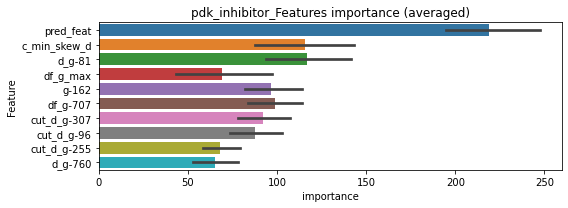

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000451513	valid_1's binary_logloss: 0.00193224
Early stopping, best iteration is:
[1760]	training's binary_logloss: 0.000294024	valid_1's binary_logloss: 0.0015962


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00045124	valid_1's binary_logloss: 0.00189302
Early stopping, best iteration is:
[1753]	training's binary_logloss: 0.000295047	valid_1's binary_logloss: 0.00171779


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000449288	valid_1's binary_logloss: 0.000911283
[2000]	training's binary_logloss: 0.000270516	valid_1's binary_logloss: 0.000734391
[3000]	training's binary_logloss: 0.000220131	valid_1's binary_logloss: 0.000684895
Early stopping, best iteration is:
[3668]	training's binary_logloss: 0.000203557	valid_1's binary_logloss: 0.000669065


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00044638	valid_1's binary_logloss: 0.00203643
[2000]	training's binary_logloss: 0.000268838	valid_1's binary_logloss: 0.00176164
Early stopping, best iteration is:
[2007]	training's binary_logloss: 0.000268454	valid_1's binary_logloss: 0.00176033


pdk_inhibitor logloss: 0.0014371481927965494


neg labels: 3289 → selected neg labels: 3248


phosphodiesterase_inhibitor, len(trt): 264, len(othr): 3248
target_rate: 0.0110859 → Adj_target_rate: 0.0096064
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[241]	training's binary_logloss: 0.0543924	valid_1's binary_logloss: 0.257248
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0362752	valid_1's binary_logloss: 0.236292
Early stopping, best iteration is:
[361]	training's binary_logloss: 0.0243831	valid_1's binary_logloss: 0.234405
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0407509	valid_1's binary_logloss: 0.222751
Early stopping, best iteration is:
[416]	training's binary_logloss: 0.0194541	valid_1's binary_logloss: 0.218877
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0382997	valid_1's binary_logloss: 0.216616


1 / 3 AUC score:0.907
y_Threshold: 0.0796144, Threshold: 0.2785555, pos_neg_ratio: 0.8000000
Remove_noisy_data: 383 → Positive_corect_labels: 523/3514
p_label_rate: 0.0100452 Vs.target_rate: 0.01109
Num_p_label: 40.0, conf_0:0.19499, conf_1:0.36212
threshold: 0.2785555, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[338]	training's binary_logloss: 0.0300839	valid_1's binary_logloss: 0.212873


positive_y_label: 523.0/3514, y_label_rate: 0.1488332
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183571	valid_1's binary_logloss: 0.00509353
[600]	training's binary_logloss: 0.000274073	valid_1's binary_logloss: 0.000899862
[900]	training's binary_logloss: 0.000180275	valid_1's binary_logloss: 0.000571198
Early stopping, best iteration is:
[1030]	training's binary_logloss: 0.000172219	valid_1's binary_logloss: 0.000541743
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00189381	valid_1's binary_logloss: 0.00536129
[600]	training's binary_logloss: 0.000279923	valid_1's binary_logloss: 0.00123897
[900]	training's binary_logloss: 0.00018195	valid_1's binary_logloss: 0.000917937
Early stopping, best iteration is:
[998]	training's binary_logloss: 0.0001737	valid_1's binary_logloss: 0.000886877
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00184669	valid_1's binary_logloss: 0.00546286
[600]	tra

2 / 3 AUC score:1.000
y_Threshold: 0.1858227, Threshold: 0.2785555, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000283993	valid_1's binary_logloss: 0.00429516
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000256288	valid_1's binary_logloss: 0.00421895


Remove_noisy_data: 0 → Positive_corect_labels: 523.0/3514
p_label_rate: 0.0876444 Vs.target_rate: 0.01109
Num_p_label: 349.0, conf_0:0.22284, conf_1:0.33427
Num_p_label: 349.0, Expected: 44.1, Adj_threshold_1: 0.2785555
Num_p_label: 349.0, Expected: 44.1, Adj_threshold_2: 0.3285555
Num_p_label: 349.0, Expected: 44.1, Adj_threshold_3: 0.3785555
Num_p_label: 349.0, Expected: 44.1, Adj_threshold_4: 0.4285555
Num_p_label: 349.0, Expected: 44.1, Adj_threshold_5: 0.4785555
Num_p_label: 349.0, Expected: 44.1, Adj_threshold_6: 0.5285555
Num_p_label: 347.0, Expected: 44.1, Adj_threshold_7: 0.5785555
Num_p_label: 346.0, Expected: 44.1, Adj_threshold_8: 0.6285555
Num_p_label: 346.0, Expected: 44.1, Adj_threshold_9: 0.6785555
Num_p_label: 346.0, Expected: 44.1, Adj_threshold_10: 0.7285555
threshold: 0.7785555, positive_p_label: 341.0/3982, p_label_rate: 0.0856354
positive_y_label: 523.0/3514, y_label_rate: 0.1488332
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00185202	valid_1's binary_logloss: 0.00506791
[600]	training's binary_logloss: 0.000272413	valid_1's binary_logloss: 0.000875888
[900]	training's binary_logloss: 0.000179282	valid_1's binary_logloss: 0.000556914
Early stopping, best iteration is:
[976]	training's binary_logloss: 0.000173685	valid_1's binary_logloss: 0.000536958
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00190265	valid_1's binary_logloss: 0.00520291
[600]	training's binary_logloss: 0.000279203	valid_1's binary_logloss: 0.00115432
[900]	training's binary_logloss: 0.000182288	valid_1's binary_logloss: 0.000808455
Early stopping, best iteration is:
[1021]	training's binary_logloss: 0.000172331	valid_1's binary_logloss: 0.000777448
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183448	valid_1's binary_logloss: 0.00567205
[600]	

3 / 3 AUC score:1.000
y_Threshold: 0.1964293, Threshold: 0.7785555, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 521.0/3510
p_label_rate: 0.0863887 Vs.target_rate: 0.01109
Num_p_label: 344.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 344.0, Expected: 44.1, Adj_threshold_1: 0.7785555
threshold: 0.7785555, positive_p_label: 344.0/3982, p_label_rate: 0.0863887


Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000399758	valid_1's binary_logloss: 0.00662636


positive_y_label: 521.0/3510, y_label_rate: 0.1484330


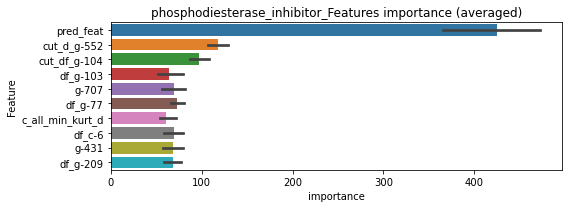

len(train_index) : 2632
len(valid_index) : 878
================================= fold 1/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000511501	valid_1's binary_logloss: 0.00107996
[2000]	training's binary_logloss: 0.000276511	valid_1's binary_logloss: 0.000586478
[3000]	training's binary_logloss: 0.00020149	valid_1's binary_logloss: 0.000427941
[4000]	training's binary_logloss: 0.000166333	valid_1's binary_logloss: 0.000353584
[5000]	training's binary_logloss: 0.000148478	valid_1's binary_logloss: 0.000315793
[6000]	training's binary_logloss: 0.000137059	valid_1's binary_logloss: 0.000291546
[7000]	training's binary_logloss: 0.000129127	valid_1's binary_logloss: 0.00027469
[8000]	training's binary_logloss: 0.000123705	valid_1's binary_logloss: 0.000263175
[9000]	training's binary_logloss: 0.00011986	valid_1's binary_logloss: 0.00025499
[10000]	training's binary_logloss: 0.000117083	valid_1's binary_logloss: 0.000249101
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000117083	valid_1's

len(train_index) : 2632
len(valid_index) : 878
================================= fold 2/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000626703	valid_1's binary_logloss: 0.00166941
Early stopping, best iteration is:
[1744]	training's binary_logloss: 0.000386798	valid_1's binary_logloss: 0.00127003


len(train_index) : 2633
len(valid_index) : 877
================================= fold 3/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000615376	valid_1's binary_logloss: 0.000997974
[2000]	training's binary_logloss: 0.000346742	valid_1's binary_logloss: 0.000561964
[3000]	training's binary_logloss: 0.000263313	valid_1's binary_logloss: 0.000418941
[4000]	training's binary_logloss: 0.00022316	valid_1's binary_logloss: 0.000349612
[5000]	training's binary_logloss: 0.000201617	valid_1's binary_logloss: 0.000312755
[6000]	training's binary_logloss: 0.000187704	valid_1's binary_logloss: 0.000288978
[7000]	training's binary_logloss: 0.000177346	valid_1's binary_logloss: 0.000271512
[8000]	training's binary_logloss: 0.000170387	valid_1's binary_logloss: 0.000259511
Early stopping, best iteration is:
[8858]	training's binary_logloss: 0.000165111	valid_1's binary_logloss: 0.000250309


len(train_index) : 2633
len(valid_index) : 877
================================= fold 4/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


phosphodiesterase_inhibitor logloss: 0.002318438270392325


Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000860027	valid_1's binary_logloss: 0.00750734
neg labels: 3289 → selected neg labels: 3286


phospholipase_inhibitor, len(trt): 25, len(othr): 3286
target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0018555	valid_1's binary_logloss: 0.00926452
[600]	training's binary_logloss: 0.000445968	valid_1's binary_logloss: 0.00586176
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000433558	valid_1's binary_logloss: 0.00580552
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00185626	valid_1's binary_logloss: 0.00842746
[600]	training's binary_logloss: 0.00043301	valid_1's binary_logloss: 0.00446438
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000418876	valid_1's binary_logloss: 0.00441213
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00185073	valid_1's binary_logloss: 0.00488719
[600]	training's binary_logloss: 0.000447317	valid_1's binary_logloss: 0.00216358
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000422825	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0026579, Threshold: 0.0129030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, conf_0:0.00903, conf_1:0.01677
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0129030
Num_p_label: 2.0, Expected: 4.2, Adj_threshold_2: 0.0629030
threshold: 0.0629030, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000702822	valid_1's binary_logloss: 0.0024074
[600]	training's binary_logloss: 0.000194981	valid_1's binary_logloss: 0.00172653
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000169615	valid_1's binary_logloss: 0.00169294
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000671687	valid_1's binary_logloss: 0.00163131
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000246709	valid_1's binary_logloss: 0.00101239
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00068311	valid_1's binary_logloss: 0.000877152
[600]	training's binary_logloss: 0.000190645	valid_1's binary_logloss: 0.000272373
Early stopping, best iteration is:
[794]	training's binary_logloss: 0.000159725	valid_1's binary_logloss: 0.00023098
Training until validation scores don't improve for 30 ro

2 / 3 AUC score:1.000
y_Threshold: 0.5827503, Threshold: 0.0629030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0572577 Vs.target_rate: 0.00105
Num_p_label: 228.0, conf_0:0.05032, conf_1:0.07548
Num_p_label: 228.0, Expected: 4.2, Adj_threshold_1: 0.0629030
Num_p_label: 227.0, Expected: 4.2, Adj_threshold_2: 0.1129030
Num_p_label: 226.0, Expected: 4.2, Adj_threshold_3: 0.1629030
Num_p_label: 224.0, Expected: 4.2, Adj_threshold_4: 0.2129030
Num_p_label: 224.0, Expected: 4.2, Adj_threshold_5: 0.2629030
Num_p_label: 224.0, Expected: 4.2, Adj_threshold_6: 0.3129030
Num_p_label: 223.0, Expected: 4.2, Adj_threshold_7: 0.3629030
Num_p_label: 213.0, Expected: 4.2, Adj_threshold_8: 0.4129030
Num_p_label: 208.0, Expected: 4.2, Adj_threshold_9: 0.4629030
Num_p_label: 185.0, Expected: 4.2, Adj_threshold_10: 0.5129030


Early stopping, best iteration is:
[415]	training's binary_logloss: 0.000314014	valid_1's binary_logloss: 0.00174249


threshold: 0.5629030, positive_p_label: 148.0/3982, p_label_rate: 0.0371673
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000704635	valid_1's binary_logloss: 0.0022388
[600]	training's binary_logloss: 0.000197592	valid_1's binary_logloss: 0.0016166
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000184537	valid_1's binary_logloss: 0.00160346
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000672744	valid_1's binary_logloss: 0.00158972
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000248659	valid_1's binary_logloss: 0.000996211
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000687152	valid_1's binary_logloss: 0.000843835
[600]	training's binary_logloss: 0.000191	valid_1's binary_logloss: 0.000237749
[900]	training's binary_logloss: 0.000154262	valid_1's binary_logloss: 0.000189033
Early stopping, best iteration is:
[936]	training's binary_logloss: 0.000153066	valid_1's bi

3 / 3 AUC score:1.000
y_Threshold: 0.7494511, Threshold: 0.5629030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0376695 Vs.target_rate: 0.00105
Num_p_label: 150.0, conf_0:0.50000, conf_1:0.61919
Num_p_label: 150.0, Expected: 4.2, Adj_threshold_1: 0.5629030
Num_p_label: 116.0, Expected: 4.2, Adj_threshold_2: 0.6129030
Num_p_label: 76.0, Expected: 4.2, Adj_threshold_3: 0.6629030
Num_p_label: 41.0, Expected: 4.2, Adj_threshold_4: 0.7129030
Num_p_label: 21.0, Expected: 4.2, Adj_threshold_5: 0.7629030
threshold: 0.7629030, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


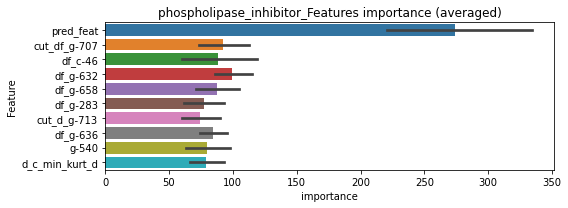

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000476195	valid_1's binary_logloss: 0.0021526
Early stopping, best iteration is:
[1824]	training's binary_logloss: 0.000301943	valid_1's binary_logloss: 0.00196537


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000464079	valid_1's binary_logloss: 0.00136337
Early stopping, best iteration is:
[1286]	training's binary_logloss: 0.000377035	valid_1's binary_logloss: 0.00125872


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000471405	valid_1's binary_logloss: 0.000464168
[2000]	training's binary_logloss: 0.000280225	valid_1's binary_logloss: 0.000261216
[3000]	training's binary_logloss: 0.000226106	valid_1's binary_logloss: 0.000201243
[4000]	training's binary_logloss: 0.000198913	valid_1's binary_logloss: 0.000170853
[5000]	training's binary_logloss: 0.000184564	valid_1's binary_logloss: 0.000155046
[6000]	training's binary_logloss: 0.000174925	valid_1's binary_logloss: 0.000144596
[7000]	training's binary_logloss: 0.000167876	valid_1's binary_logloss: 0.000136988
[8000]	training's binary_logloss: 0.000162762	valid_1's binary_logloss: 0.000131597
Early stopping, best iteration is:
[8086]	training's binary_logloss: 0.000162353	valid_1's binary_logloss: 0.000131166


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


phospholipase_inhibitor logloss: 0.0034670731842948166


Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000776226	valid_1's binary_logloss: 0.0105154
neg labels: 3289 → selected neg labels: 3262


pi3k_inhibitor, len(trt): 151, len(othr): 3262
target_rate: 0.0063408 → Adj_target_rate: 0.0059749
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0189217	valid_1's binary_logloss: 0.136642
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.00551315	valid_1's binary_logloss: 0.126247
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0216306	valid_1's binary_logloss: 0.103702
[600]	training's binary_logloss: 0.00316743	valid_1's binary_logloss: 0.0827693
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.00189778	valid_1's binary_logloss: 0.0811274
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0194651	valid_1's binary_logloss: 0.120841
[600]	training's binary_logloss: 0.00290117	valid_1's binary_logloss: 0.104201
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.00224827	valid_1's binary_logloss: 0.103528
Training until validation scores don't improve for 30 rounds
[300]	training's bin

1 / 3 AUC score:0.981
y_Threshold: 0.0266468, Threshold: 0.0688106, pos_neg_ratio: 0.8000000
Remove_noisy_data: 203 → Positive_corect_labels: 616/3711
p_label_rate: 0.0100452 Vs.target_rate: 0.00634
Num_p_label: 40.0, conf_0:0.04817, conf_1:0.08945
Num_p_label: 40.0, Expected: 25.2, Adj_threshold_1: 0.0688106
Num_p_label: 18.0, Expected: 25.2, Adj_threshold_2: 0.1188106
threshold: 0.1188106, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 616.0/3711, y_label_rate: 0.1659930
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00147687	valid_1's binary_logloss: 0.00359015
[600]	training's binary_logloss: 0.000185962	valid_1's binary_logloss: 0.000500953
[900]	training's binary_logloss: 0.000111502	valid_1's binary_logloss: 0.000302143
[1200]	training's binary_logloss: 0.000103936	valid_1's binary_logloss: 0.000281701
Early stopping, best iteration is:
[1262]	training's binary_logloss: 0.000103259	valid_1's binary_logloss: 0.000279702
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00147115	valid_1's binary_logloss: 0.0034097
[600]	training's binary_logloss: 0.000185688	valid_1's binary_logloss: 0.000469826
[900]	training's binary_logloss: 0.000111542	valid_1's binary_logloss: 0.000283819
[1200]	training's binary_logloss: 0.000103846	valid_1's binary_logloss: 0.000264352
Early stopping, best iteration is:
[1307]	training's binary_logloss: 0.000102922	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.9296959, Threshold: 0.1188106, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 616.0/3711
p_label_rate: 0.0570065 Vs.target_rate: 0.00634
Num_p_label: 227.0, conf_0:0.09505, conf_1:0.14257
Num_p_label: 227.0, Expected: 25.2, Adj_threshold_1: 0.1188106


[600]	training's binary_logloss: 0.000240888	valid_1's binary_logloss: 0.00317356
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000219529	valid_1's binary_logloss: 0.00312899


Num_p_label: 227.0, Expected: 25.2, Adj_threshold_2: 0.1688106
Num_p_label: 227.0, Expected: 25.2, Adj_threshold_3: 0.2188106
Num_p_label: 211.0, Expected: 25.2, Adj_threshold_4: 0.2688106
Num_p_label: 211.0, Expected: 25.2, Adj_threshold_5: 0.3188106
Num_p_label: 211.0, Expected: 25.2, Adj_threshold_6: 0.3688106
Num_p_label: 211.0, Expected: 25.2, Adj_threshold_7: 0.4188106
Num_p_label: 211.0, Expected: 25.2, Adj_threshold_8: 0.4688106
Num_p_label: 211.0, Expected: 25.2, Adj_threshold_9: 0.5188106
Num_p_label: 211.0, Expected: 25.2, Adj_threshold_10: 0.5688106
threshold: 0.6188106, positive_p_label: 211.0/3982, p_label_rate: 0.0529884
positive_y_label: 616.0/3711, y_label_rate: 0.1659930
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150217	valid_1's binary_logloss: 0.0034852
[600]	training's binary_logloss: 0.00018668	valid_1's binary_logloss: 0.000480862
[900]	training's binary_logloss: 0.00011152	valid_1's binary_logloss: 0.0002889
[1200]	training's binary_logloss: 0.000103915	valid_1's binary_logloss: 0.00026929
Early stopping, best iteration is:
[1251]	training's binary_logloss: 0.000103311	valid_1's binary_logloss: 0.000267633
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00147624	valid_1's binary_logloss: 0.00343941
[600]	training's binary_logloss: 0.00018612	valid_1's binary_logloss: 0.000472653
[900]	training's binary_logloss: 0.000111601	valid_1's binary_logloss: 0.00028489
[1200]	training's binary_logloss: 0.000103856	valid_1's binary_logloss: 0.0002652
Early stopping, best iteration is:
[1321]	training's binary_logloss: 0.000102878	valid_1's binary_logloss: 

3 / 3 AUC score:1.000
y_Threshold: 0.8463676, Threshold: 0.6188106, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 610.0/3699
p_label_rate: 0.0514817 Vs.target_rate: 0.00634
Num_p_label: 205.0, conf_0:0.50000, conf_1:0.68069
Num_p_label: 205.0, Expected: 25.2, Adj_threshold_1: 0.6188106
Num_p_label: 205.0, Expected: 25.2, Adj_threshold_2: 0.6688106
Num_p_label: 205.0, Expected: 25.2, Adj_threshold_3: 0.7188106
Num_p_label: 205.0, Expected: 25.2, Adj_threshold_4: 0.7688106
threshold: 0.7688106, positive_p_label: 205.0/3982, p_label_rate: 0.0514817
positive_y_label: 610.0/3699, y_label_rate: 0.1649094


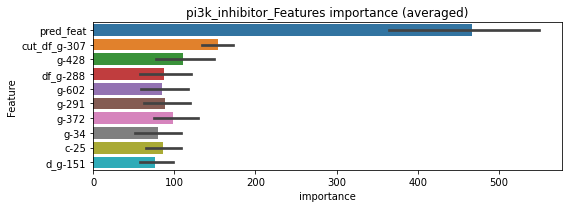

len(train_index) : 2774
len(valid_index) : 925
================================= fold 1/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000599693	valid_1's binary_logloss: 0.00114141
[2000]	training's binary_logloss: 0.000340505	valid_1's binary_logloss: 0.000771908
[3000]	training's binary_logloss: 0.000264255	valid_1's binary_logloss: 0.000658083
[4000]	training's binary_logloss: 0.000228655	valid_1's binary_logloss: 0.000603422
Early stopping, best iteration is:
[4616]	training's binary_logloss: 0.000216203	valid_1's binary_logloss: 0.000581974


len(train_index) : 2774
len(valid_index) : 925
================================= fold 2/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00059998	valid_1's binary_logloss: 0.00381707
[2000]	training's binary_logloss: 0.000340981	valid_1's binary_logloss: 0.00348369
Early stopping, best iteration is:
[2013]	training's binary_logloss: 0.000339633	valid_1's binary_logloss: 0.00347928


len(train_index) : 2774
len(valid_index) : 925
================================= fold 3/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000613452	valid_1's binary_logloss: 0.00529429
[2000]	training's binary_logloss: 0.000346984	valid_1's binary_logloss: 0.00476957
Early stopping, best iteration is:
[2442]	training's binary_logloss: 0.000303517	valid_1's binary_logloss: 0.0046802


len(train_index) : 2775
len(valid_index) : 924
================================= fold 4/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000599484	valid_1's binary_logloss: 0.00364983
Early stopping, best iteration is:
[1244]	training's binary_logloss: 0.00049905	valid_1's binary_logloss: 0.00342251


pi3k_inhibitor logloss: 0.0030417299593498075


neg labels: 3289 → selected neg labels: 3286


pkc_inhibitor, len(trt): 31, len(othr): 3286
target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00226278	valid_1's binary_logloss: 0.00652795
[600]	training's binary_logloss: 0.000527102	valid_1's binary_logloss: 0.00251527
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000486493	valid_1's binary_logloss: 0.00242162
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0021601	valid_1's binary_logloss: 0.018805
[600]	training's binary_logloss: 0.000516962	valid_1's binary_logloss: 0.0129776
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000492596	valid_1's binary_logloss: 0.0129416
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00236094	valid_1's binary_logloss: 0.00438684
[600]	training's binary_logloss: 0.000548376	valid_1's binary_logloss: 0.00168296
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000501665	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0030837, Threshold: 0.0098780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, conf_0:0.00691, conf_1:0.01284
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_1: 0.0098780
Num_p_label: 3.0, Expected: 5.2, Adj_threshold_2: 0.0598780
threshold: 0.0598780, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000774961	valid_1's binary_logloss: 0.00171252
[600]	training's binary_logloss: 0.00020538	valid_1's binary_logloss: 0.00101394
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000197867	valid_1's binary_logloss: 0.0010043
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000738497	valid_1's binary_logloss: 0.00363927
Early stopping, best iteration is:
[383]	training's binary_logloss: 0.000373731	valid_1's binary_logloss: 0.00297241
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000756585	valid_1's binary_logloss: 0.00239332
Early stopping, best iteration is:
[363]	training's binary_logloss: 0.000442581	valid_1's binary_logloss: 0.0019184
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000752092	valid_1's binary_logloss: 0.0010973

2 / 3 AUC score:1.000
y_Threshold: 0.6160619, Threshold: 0.0598780, pos_neg_ratio: 0.8000000


[900]	training's binary_logloss: 0.000155812	valid_1's binary_logloss: 0.000247802
Early stopping, best iteration is:
[947]	training's binary_logloss: 0.000153252	valid_1's binary_logloss: 0.00024367


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0522351 Vs.target_rate: 0.00130
Num_p_label: 208.0, conf_0:0.04790, conf_1:0.07185
Num_p_label: 208.0, Expected: 5.2, Adj_threshold_1: 0.0598780
Num_p_label: 208.0, Expected: 5.2, Adj_threshold_2: 0.1098780
Num_p_label: 208.0, Expected: 5.2, Adj_threshold_3: 0.1598780
Num_p_label: 208.0, Expected: 5.2, Adj_threshold_4: 0.2098780
Num_p_label: 207.0, Expected: 5.2, Adj_threshold_5: 0.2598780
Num_p_label: 207.0, Expected: 5.2, Adj_threshold_6: 0.3098780
Num_p_label: 207.0, Expected: 5.2, Adj_threshold_7: 0.3598780
Num_p_label: 206.0, Expected: 5.2, Adj_threshold_8: 0.4098780
Num_p_label: 196.0, Expected: 5.2, Adj_threshold_9: 0.4598780
Num_p_label: 178.0, Expected: 5.2, Adj_threshold_10: 0.5098780
threshold: 0.5598780, positive_p_label: 144.0/3982, p_label_rate: 0.0361627
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000781603	valid_1's binary_logloss: 0.00172263
Early stopping, best iteration is:
[385]	training's binary_logloss: 0.000393743	valid_1's binary_logloss: 0.00123369
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000732808	valid_1's binary_logloss: 0.00389035
Early stopping, best iteration is:
[385]	training's binary_logloss: 0.00036974	valid_1's binary_logloss: 0.00318177
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000753806	valid_1's binary_logloss: 0.00248274
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000245811	valid_1's binary_logloss: 0.00193824
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000767793	valid_1's binary_logloss: 0.00115254
[600]	training's binary_logloss: 0.00019612	valid_1's binary_logloss: 0.000377

3 / 3 AUC score:1.000
y_Threshold: 0.6135451, Threshold: 0.5598780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811


[900]	training's binary_logloss: 0.000156402	valid_1's binary_logloss: 0.00031645
Early stopping, best iteration is:
[926]	training's binary_logloss: 0.000154695	valid_1's binary_logloss: 0.00031565


p_label_rate: 0.0384229 Vs.target_rate: 0.00130
Num_p_label: 153.0, conf_0:0.50000, conf_1:0.61587
Num_p_label: 153.0, Expected: 5.2, Adj_threshold_1: 0.5598780
Num_p_label: 107.0, Expected: 5.2, Adj_threshold_2: 0.6098780
Num_p_label: 68.0, Expected: 5.2, Adj_threshold_3: 0.6598780
Num_p_label: 42.0, Expected: 5.2, Adj_threshold_4: 0.7098780
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_5: 0.7598780
threshold: 0.7598780, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


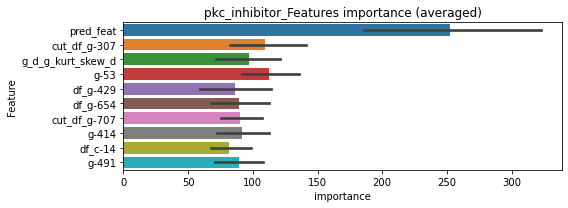

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000497848	valid_1's binary_logloss: 0.00100429
[2000]	training's binary_logloss: 0.000295317	valid_1's binary_logloss: 0.00078077
Early stopping, best iteration is:
[2075]	training's binary_logloss: 0.000289198	valid_1's binary_logloss: 0.000773339


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[958]	training's binary_logloss: 0.000492243	valid_1's binary_logloss: 0.00376401


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 pkc_inhibitor=================================


Early stopping, best iteration is:
[703]	training's binary_logloss: 0.00067512	valid_1's binary_logloss: 0.00237517
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000481926	valid_1's binary_logloss: 0.000748098
[2000]	training's binary_logloss: 0.000289337	valid_1's binary_logloss: 0.000501295
[3000]	training's binary_logloss: 0.00023253	valid_1's binary_logloss: 0.0004212
[4000]	training's binary_logloss: 0.000203706	valid_1's binary_logloss: 0.000376124
[5000]	training's binary_logloss: 0.000187933	valid_1's binary_logloss: 0.000350676
[6000]	training's binary_logloss: 0.00017747	valid_1's binary_logloss: 0.000335726
Early stopping, best iteration is:
[6342]	training's binary_logloss: 0.000174558	valid_1's binary_logloss: 0.000331675


pkc_inhibitor logloss: 0.001811543995320897


neg labels: 3289 → selected neg labels: 3281


potassium_channel_activator, len(trt): 55, len(othr): 3281
target_rate: 0.0023096 → Adj_target_rate: 0.0025322
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00403177	valid_1's binary_logloss: 0.0422108
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.0008857	valid_1's binary_logloss: 0.0332289
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00448092	valid_1's binary_logloss: 0.0190229
[600]	training's binary_logloss: 0.000856274	valid_1's binary_logloss: 0.0111034
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000662694	valid_1's binary_logloss: 0.0103749
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00458793	valid_1's binary_logloss: 0.0126188
[600]	training's binary_logloss: 0.000877086	valid_1's binary_logloss: 0.00446757
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.000653194	valid_1's binary_logloss: 0.00392558
Training until validation scores don't improve for 30 rounds
[300]	

1 / 3 AUC score:1.000
y_Threshold: 0.0058552, Threshold: 0.0374522, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00231
Num_p_label: 40.0, conf_0:0.02622, conf_1:0.04869
Num_p_label: 40.0, Expected: 9.2, Adj_threshold_1: 0.0374522
Num_p_label: 10.0, Expected: 9.2, Adj_threshold_2: 0.0874522
threshold: 0.0874522, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0010389	valid_1's binary_logloss: 0.00292242
[600]	training's binary_logloss: 0.000226749	valid_1's binary_logloss: 0.00142139
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000189888	valid_1's binary_logloss: 0.00133415
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0010522	valid_1's binary_logloss: 0.00381352
[600]	training's binary_logloss: 0.000227598	valid_1's binary_logloss: 0.00258114
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000219599	valid_1's binary_logloss: 0.00254735
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106805	valid_1's binary_logloss: 0.00419502
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000298527	valid_1's binary_logloss: 0.00320131
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:1.000
y_Threshold: 0.5776618, Threshold: 0.0874522, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3799
p_label_rate: 0.0675540 Vs.target_rate: 0.00231
Num_p_label: 269.0, conf_0:0.06996, conf_1:0.10494
Num_p_label: 269.0, Expected: 9.2, Adj_threshold_1: 0.0874522
Num_p_label: 269.0, Expected: 9.2, Adj_threshold_2: 0.1374522
Num_p_label: 269.0, Expected: 9.2, Adj_threshold_3: 0.1874522
Num_p_label: 269.0, Expected: 9.2, Adj_threshold_4: 0.2374522
Num_p_label: 269.0, Expected: 9.2, Adj_threshold_5: 0.2874522
Num_p_label: 268.0, Expected: 9.2, Adj_threshold_6: 0.3374522
Num_p_label: 264.0, Expected: 9.2, Adj_threshold_7: 0.3874522
Num_p_label: 259.0, Expected: 9.2, Adj_threshold_8: 0.4374522
Num_p_label: 251.0, Expected: 9.2, Adj_threshold_9: 0.4874522
Num_p_label: 232.0, Expected: 9.2, Adj_threshold_10: 0.5374522


Early stopping, best iteration is:
[433]	training's binary_logloss: 0.000385148	valid_1's binary_logloss: 0.00283514


threshold: 0.5874522, positive_p_label: 204.0/3982, p_label_rate: 0.0512305
positive_y_label: 653.0/3799, y_label_rate: 0.1718873
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000993502	valid_1's binary_logloss: 0.00525562
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.00029258	valid_1's binary_logloss: 0.00402897
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101946	valid_1's binary_logloss: 0.00272463
[600]	training's binary_logloss: 0.000225108	valid_1's binary_logloss: 0.0016145
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000223825	valid_1's binary_logloss: 0.00160163
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00104793	valid_1's binary_logloss: 0.00322568
[600]	training's binary_logloss: 0.000230954	valid_1's binary_logloss: 0.00193705
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000179243	valid_1's binary_logloss: 0.00173806
Training until validation scores don't improve for 30 rounds

3 / 3 AUC score:1.000
y_Threshold: 0.5387393, Threshold: 0.5874522, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3795
p_label_rate: 0.0226017 Vs.target_rate: 0.00231
Num_p_label: 90.0, conf_0:0.50000, conf_1:0.64620
Num_p_label: 90.0, Expected: 9.2, Adj_threshold_1: 0.5874522
Num_p_label: 73.0, Expected: 9.2, Adj_threshold_2: 0.6374522
Num_p_label: 54.0, Expected: 9.2, Adj_threshold_3: 0.6874522
Num_p_label: 35.0, Expected: 9.2, Adj_threshold_4: 0.7374522
Num_p_label: 16.0, Expected: 9.2, Adj_threshold_5: 0.7874522
threshold: 0.7874522, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 651.0/3795, y_label_rate: 0.1715415


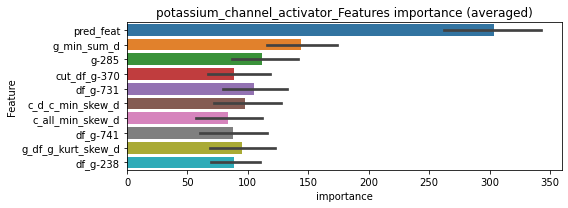

len(train_index) : 2846
len(valid_index) : 949
================================= fold 1/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000545391	valid_1's binary_logloss: 0.00349903
[2000]	training's binary_logloss: 0.000313058	valid_1's binary_logloss: 0.00304453
Early stopping, best iteration is:
[2731]	training's binary_logloss: 0.000257672	valid_1's binary_logloss: 0.00291598


len(train_index) : 2846
len(valid_index) : 949
================================= fold 2/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000524669	valid_1's binary_logloss: 0.000653992
[2000]	training's binary_logloss: 0.000307098	valid_1's binary_logloss: 0.000366696
[3000]	training's binary_logloss: 0.000243126	valid_1's binary_logloss: 0.000275656
[4000]	training's binary_logloss: 0.000212993	valid_1's binary_logloss: 0.000231165
[5000]	training's binary_logloss: 0.000197644	valid_1's binary_logloss: 0.000208421
[6000]	training's binary_logloss: 0.000187116	valid_1's binary_logloss: 0.000192986
[7000]	training's binary_logloss: 0.000179472	valid_1's binary_logloss: 0.000182006
[8000]	training's binary_logloss: 0.000174022	valid_1's binary_logloss: 0.000174245
Early stopping, best iteration is:
[8591]	training's binary_logloss: 0.000171498	valid_1's binary_logloss: 0.000170602


len(train_index) : 2846
len(valid_index) : 949
================================= fold 3/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000531721	valid_1's binary_logloss: 0.00321301
[2000]	training's binary_logloss: 0.000309712	valid_1's binary_logloss: 0.00280969
[3000]	training's binary_logloss: 0.000245054	valid_1's binary_logloss: 0.00268344
[4000]	training's binary_logloss: 0.000214816	valid_1's binary_logloss: 0.00261901
Early stopping, best iteration is:
[4650]	training's binary_logloss: 0.00020389	valid_1's binary_logloss: 0.00259621


len(train_index) : 2847
len(valid_index) : 948
================================= fold 4/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000532755	valid_1's binary_logloss: 0.00310949
[2000]	training's binary_logloss: 0.000311055	valid_1's binary_logloss: 0.00278311
Early stopping, best iteration is:
[2612]	training's binary_logloss: 0.000263657	valid_1's binary_logloss: 0.00271203


potassium_channel_activator logloss: 0.002099183381206848


neg labels: 3289 → selected neg labels: 3278


potassium_channel_antagonist, len(trt): 98, len(othr): 3278
target_rate: 0.0041152 → Adj_target_rate: 0.0041375
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00953656	valid_1's binary_logloss: 0.0793332
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.00202874	valid_1's binary_logloss: 0.0675409
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102821	valid_1's binary_logloss: 0.0708816
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.00209556	valid_1's binary_logloss: 0.0609122
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108922	valid_1's binary_logloss: 0.0502358
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.00195293	valid_1's binary_logloss: 0.0392189
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00999543	valid_1's binary_logloss: 0.0706856
[600]	training's binary_logloss: 0.00159805	valid_1's binary_logloss: 0.061034
Early stopping

1 / 3 AUC score:0.995
y_Threshold: 0.0124956, Threshold: 0.0322201, pos_neg_ratio: 0.8000000
Remove_noisy_data: 150 → Positive_corect_labels: 646/3783
p_label_rate: 0.0100452 Vs.target_rate: 0.00412
Num_p_label: 40.0, conf_0:0.02255, conf_1:0.04189
Num_p_label: 40.0, Expected: 16.4, Adj_threshold_1: 0.0322201
Num_p_label: 14.0, Expected: 16.4, Adj_threshold_2: 0.0822201
threshold: 0.0822201, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 646.0/3783, y_label_rate: 0.1707639
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118094	valid_1's binary_logloss: 0.00276708
[600]	training's binary_logloss: 0.000171287	valid_1's binary_logloss: 0.000436832
[900]	training's binary_logloss: 0.000108402	valid_1's binary_logloss: 0.000277472
[1200]	training's binary_logloss: 0.000101849	valid_1's binary_logloss: 0.000260983
Early stopping, best iteration is:
[1227]	training's binary_logloss: 0.000101561	valid_1's binary_logloss: 0.00026005
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116758	valid_1's binary_logloss: 0.00945112
Early stopping, best iteration is:
[424]	training's binary_logloss: 0.000425367	valid_1's binary_logloss: 0.00886389
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00140155	valid_1's binary_logloss: 0.00300622
[600]	training's binary_logloss: 0.000227165	valid_1's binary_logloss: 0.000587649
[900]	

2 / 3 AUC score:1.000
y_Threshold: 0.1007229, Threshold: 0.0822201, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 645.0/3781
p_label_rate: 0.0459568 Vs.target_rate: 0.00412
Num_p_label: 183.0, conf_0:0.06578, conf_1:0.09866
Num_p_label: 183.0, Expected: 16.4, Adj_threshold_1: 0.0822201
Num_p_label: 183.0, Expected: 16.4, Adj_threshold_2: 0.1322201
Num_p_label: 183.0, Expected: 16.4, Adj_threshold_3: 0.1822201
Num_p_label: 183.0, Expected: 16.4, Adj_threshold_4: 0.2322201
Num_p_label: 171.0, Expected: 16.4, Adj_threshold_5: 0.2822201
Num_p_label: 168.0, Expected: 16.4, Adj_threshold_6: 0.3322201
Num_p_label: 168.0, Expected: 16.4, Adj_threshold_7: 0.3822201
Num_p_label: 168.0, Expected: 16.4, Adj_threshold_8: 0.4322201


Early stopping, best iteration is:
[1083]	training's binary_logloss: 0.000146597	valid_1's binary_logloss: 0.000380842


Num_p_label: 168.0, Expected: 16.4, Adj_threshold_9: 0.4822201
Num_p_label: 160.0, Expected: 16.4, Adj_threshold_10: 0.5322201
threshold: 0.5822201, positive_p_label: 159.0/3982, p_label_rate: 0.0399297
positive_y_label: 645.0/3781, y_label_rate: 0.1705898
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013209	valid_1's binary_logloss: 0.00489254
[600]	training's binary_logloss: 0.000223621	valid_1's binary_logloss: 0.00292135
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000202684	valid_1's binary_logloss: 0.00287282
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114928	valid_1's binary_logloss: 0.00265218
[600]	training's binary_logloss: 0.000170041	valid_1's binary_logloss: 0.000425614
[900]	training's binary_logloss: 0.000108194	valid_1's binary_logloss: 0.000271855
[1200]	training's binary_logloss: 0.000101761	valid_1's binary_logloss: 0.000255894
Early stopping, best iteration is:
[1213]	training's binary_logloss: 0.000101566	valid_1's binary_logloss: 0.000255327
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116088	valid_1's binary_logloss: 0.00274063
[600]	t

3 / 3 AUC score:1.000
y_Threshold: 0.7508498, Threshold: 0.5822201, pos_neg_ratio: 0.8000000


[1200]	training's binary_logloss: 0.00010173	valid_1's binary_logloss: 0.000261099
Early stopping, best iteration is:
[1248]	training's binary_logloss: 0.000101158	valid_1's binary_logloss: 0.000259355


Remove_noisy_data: 2 → Positive_corect_labels: 644.0/3779
p_label_rate: 0.0401808 Vs.target_rate: 0.00412
Num_p_label: 160.0, conf_0:0.50000, conf_1:0.64044
Num_p_label: 160.0, Expected: 16.4, Adj_threshold_1: 0.5822201
Num_p_label: 160.0, Expected: 16.4, Adj_threshold_2: 0.6322201
Num_p_label: 160.0, Expected: 16.4, Adj_threshold_3: 0.6822201
Num_p_label: 160.0, Expected: 16.4, Adj_threshold_4: 0.7322201
Num_p_label: 160.0, Expected: 16.4, Adj_threshold_5: 0.7822201
threshold: 0.7822201, positive_p_label: 160.0/3982, p_label_rate: 0.0401808
positive_y_label: 644.0/3779, y_label_rate: 0.1704155


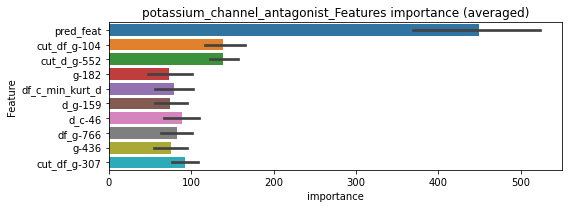

len(train_index) : 2834
len(valid_index) : 945
================================= fold 1/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000553825	valid_1's binary_logloss: 0.00477518
[2000]	training's binary_logloss: 0.000315501	valid_1's binary_logloss: 0.00436648
Early stopping, best iteration is:
[2776]	training's binary_logloss: 0.000251109	valid_1's binary_logloss: 0.00424186


len(train_index) : 2834
len(valid_index) : 945
================================= fold 2/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000599499	valid_1's binary_logloss: 0.00176618


len(train_index) : 2834
len(valid_index) : 945
================================= fold 3/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000561352	valid_1's binary_logloss: 0.00174164
Early stopping, best iteration is:
[1507]	training's binary_logloss: 0.000388284	valid_1's binary_logloss: 0.00152863


len(train_index) : 2835
len(valid_index) : 944
================================= fold 4/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00056148	valid_1's binary_logloss: 0.00213971
Early stopping, best iteration is:
[1184]	training's binary_logloss: 0.000483621	valid_1's binary_logloss: 0.00206357


potassium_channel_antagonist logloss: 0.002401402087152198


neg labels: 3289 → selected neg labels: 3278


ppar_receptor_agonist, len(trt): 115, len(othr): 3278
target_rate: 0.0048291 → Adj_target_rate: 0.0047401
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123212	valid_1's binary_logloss: 0.0989795
Early stopping, best iteration is:
[421]	training's binary_logloss: 0.004791	valid_1's binary_logloss: 0.090552
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0137424	valid_1's binary_logloss: 0.0848309
[600]	training's binary_logloss: 0.00210687	valid_1's binary_logloss: 0.0720847
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.00234145	valid_1's binary_logloss: 0.0719314
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130669	valid_1's binary_logloss: 0.0657576
[600]	training's binary_logloss: 0.00210103	valid_1's binary_logloss: 0.0507078
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.00134716	valid_1's binary_logloss: 0.0495661
Training until validation scores don't improve for 30 rounds
[300]	training's 

1 / 3 AUC score:0.992
y_Threshold: 0.0186179, Threshold: 0.0540417, pos_neg_ratio: 0.8000000
Remove_noisy_data: 170 → Positive_corect_labels: 636/3763
p_label_rate: 0.0100452 Vs.target_rate: 0.00483
Num_p_label: 40.0, conf_0:0.03783, conf_1:0.07025


Early stopping, best iteration is:
[452]	training's binary_logloss: 0.00411535	valid_1's binary_logloss: 0.0898485


Num_p_label: 40.0, Expected: 19.2, Adj_threshold_1: 0.0540417
Num_p_label: 11.0, Expected: 19.2, Adj_threshold_2: 0.1040417
threshold: 0.1040417, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 636.0/3763, y_label_rate: 0.1690141
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00145816	valid_1's binary_logloss: 0.00867052
[600]	training's binary_logloss: 0.000256245	valid_1's binary_logloss: 0.00624626
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000259874	valid_1's binary_logloss: 0.00623275
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154182	valid_1's binary_logloss: 0.0040538
[600]	training's binary_logloss: 0.000255939	valid_1's binary_logloss: 0.00170252
Early stopping, best iteration is:
[774]	training's binary_logloss: 0.000195353	valid_1's binary_logloss: 0.00160141
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0015246	valid_1's binary_logloss: 0.00456354
[600]	training's binary_logloss: 0.000260268	valid_1's binary_logloss: 0.00213387
Early stopping, best iteration is:
[794]	training's binary_logloss: 0.000195656	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.2805234, Threshold: 0.1040417, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 634.0/3759
p_label_rate: 0.0673029 Vs.target_rate: 0.00483
Num_p_label: 268.0, conf_0:0.08323, conf_1:0.12485
Num_p_label: 268.0, Expected: 19.2, Adj_threshold_1: 0.1040417
Num_p_label: 264.0, Expected: 19.2, Adj_threshold_2: 0.1540417
Num_p_label: 257.0, Expected: 19.2, Adj_threshold_3: 0.2040417
Num_p_label: 233.0, Expected: 19.2, Adj_threshold_4: 0.2540417


Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000190384	valid_1's binary_logloss: 0.000920783


Num_p_label: 206.0, Expected: 19.2, Adj_threshold_5: 0.3040417
Num_p_label: 167.0, Expected: 19.2, Adj_threshold_6: 0.3540417
Num_p_label: 144.0, Expected: 19.2, Adj_threshold_7: 0.4040417
Num_p_label: 131.0, Expected: 19.2, Adj_threshold_8: 0.4540417
Num_p_label: 125.0, Expected: 19.2, Adj_threshold_9: 0.5040417
Num_p_label: 125.0, Expected: 19.2, Adj_threshold_10: 0.5540417
threshold: 0.6040417, positive_p_label: 125.0/3982, p_label_rate: 0.0313913
positive_y_label: 634.0/3759, y_label_rate: 0.1686619
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00147517	valid_1's binary_logloss: 0.00337035
[600]	training's binary_logloss: 0.000248983	valid_1's binary_logloss: 0.000728478
[900]	training's binary_logloss: 0.000168951	valid_1's binary_logloss: 0.000484534
Early stopping, best iteration is:
[1072]	training's binary_logloss: 0.000157863	valid_1's binary_logloss: 0.000461083
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014816	valid_1's binary_logloss: 0.00862134
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000390197	valid_1's binary_logloss: 0.0066632
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00149818	valid_1's binary_logloss: 0.00405703
[600]	training's binary_logloss: 0.000251968	valid_1's binary_logloss: 0.00199583
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000204844	valid_1's bi

3 / 3 AUC score:1.000
y_Threshold: 0.1655905, Threshold: 0.6040417, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 632.0/3755
p_label_rate: 0.0253641 Vs.target_rate: 0.00483
Num_p_label: 101.0, conf_0:0.50000, conf_1:0.66445
Num_p_label: 101.0, Expected: 19.2, Adj_threshold_1: 0.6040417
Num_p_label: 101.0, Expected: 19.2, Adj_threshold_2: 0.6540417
Num_p_label: 101.0, Expected: 19.2, Adj_threshold_3: 0.7040417
Num_p_label: 101.0, Expected: 19.2, Adj_threshold_4: 0.7540417


Early stopping, best iteration is:
[792]	training's binary_logloss: 0.000187562	valid_1's binary_logloss: 0.00210556


threshold: 0.7540417, positive_p_label: 101.0/3982, p_label_rate: 0.0253641
positive_y_label: 632.0/3755, y_label_rate: 0.1683089


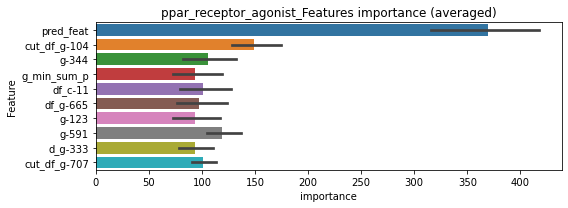

len(train_index) : 2816
len(valid_index) : 939
================================= fold 1/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000601704	valid_1's binary_logloss: 0.0059619
Early stopping, best iteration is:
[1116]	training's binary_logloss: 0.000544652	valid_1's binary_logloss: 0.00585874


len(train_index) : 2816
len(valid_index) : 939
================================= fold 2/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0005739	valid_1's binary_logloss: 0.000956539
[2000]	training's binary_logloss: 0.000322436	valid_1's binary_logloss: 0.00058598
[3000]	training's binary_logloss: 0.00024367	valid_1's binary_logloss: 0.000459074
[4000]	training's binary_logloss: 0.000206991	valid_1's binary_logloss: 0.000396466
[5000]	training's binary_logloss: 0.000187268	valid_1's binary_logloss: 0.000361727
[6000]	training's binary_logloss: 0.000174497	valid_1's binary_logloss: 0.000337942
[7000]	training's binary_logloss: 0.000165223	valid_1's binary_logloss: 0.000321217
Early stopping, best iteration is:
[7262]	training's binary_logloss: 0.000163475	valid_1's binary_logloss: 0.000317804


len(train_index) : 2816
len(valid_index) : 939
================================= fold 3/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000587679	valid_1's binary_logloss: 0.000950827
[2000]	training's binary_logloss: 0.000325319	valid_1's binary_logloss: 0.000630708
[3000]	training's binary_logloss: 0.000244841	valid_1's binary_logloss: 0.00052384
[4000]	training's binary_logloss: 0.000206672	valid_1's binary_logloss: 0.000465219
[5000]	training's binary_logloss: 0.000187135	valid_1's binary_logloss: 0.000434984
[6000]	training's binary_logloss: 0.000174363	valid_1's binary_logloss: 0.000413414
[7000]	training's binary_logloss: 0.000165027	valid_1's binary_logloss: 0.000398647
Early stopping, best iteration is:
[7322]	training's binary_logloss: 0.000162788	valid_1's binary_logloss: 0.000394419


len(train_index) : 2817
len(valid_index) : 938
================================= fold 4/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000573067	valid_1's binary_logloss: 0.00133411
[2000]	training's binary_logloss: 0.000321873	valid_1's binary_logloss: 0.000955511
[3000]	training's binary_logloss: 0.000243414	valid_1's binary_logloss: 0.000793509
[4000]	training's binary_logloss: 0.000206707	valid_1's binary_logloss: 0.000712956
[5000]	training's binary_logloss: 0.000187465	valid_1's binary_logloss: 0.000664534
[6000]	training's binary_logloss: 0.000174909	valid_1's binary_logloss: 0.000631224
[7000]	training's binary_logloss: 0.000165696	valid_1's binary_logloss: 0.000607544
[8000]	training's binary_logloss: 0.000158744	valid_1's binary_logloss: 0.000591259
Early stopping, best iteration is:
[8163]	training's binary_logloss: 0.000157819	valid_1's binary_logloss: 0.000589323


ppar_receptor_agonist logloss: 0.001790393994499884


neg labels: 3289 → selected neg labels: 3282


ppar_receptor_antagonist, len(trt): 30, len(othr): 3282
target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00225549	valid_1's binary_logloss: 0.00989724
[600]	training's binary_logloss: 0.000498723	valid_1's binary_logloss: 0.00574126
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000453166	valid_1's binary_logloss: 0.00559617
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00233673	valid_1's binary_logloss: 0.00760173
[600]	training's binary_logloss: 0.000497971	valid_1's binary_logloss: 0.00303568
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000457424	valid_1's binary_logloss: 0.00290864
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00236848	valid_1's binary_logloss: 0.0059511
[600]	training's binary_logloss: 0.000508703	valid_1's binary_logloss: 0.00269662
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000452386	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0028082, Threshold: 0.0079647, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, conf_0:0.00558, conf_1:0.01035
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0079647
Num_p_label: 1.0, Expected: 5.0, Adj_threshold_2: 0.0579647
threshold: 0.0579647, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000761486	valid_1's binary_logloss: 0.00540815
Early stopping, best iteration is:
[463]	training's binary_logloss: 0.00026304	valid_1's binary_logloss: 0.00428885
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000776229	valid_1's binary_logloss: 0.000947841
[600]	training's binary_logloss: 0.00020043	valid_1's binary_logloss: 0.000216407
[900]	training's binary_logloss: 0.000162966	valid_1's binary_logloss: 0.000159819
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.000161101	valid_1's binary_logloss: 0.00015731
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000795696	valid_1's binary_logloss: 0.00117162
[600]	training's binary_logloss: 0.000205354	valid_1's binary_logloss: 0.000425759
Early stopping, best iteration is:
[791]	training's binary_logloss: 0.000170012	valid_1's

2 / 3 AUC score:1.000
y_Threshold: 0.5010019, Threshold: 0.0579647, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0401808 Vs.target_rate: 0.00126
Num_p_label: 160.0, conf_0:0.04637, conf_1:0.06956
Num_p_label: 160.0, Expected: 5.0, Adj_threshold_1: 0.0579647
Num_p_label: 160.0, Expected: 5.0, Adj_threshold_2: 0.1079647
Num_p_label: 158.0, Expected: 5.0, Adj_threshold_3: 0.1579647
Num_p_label: 157.0, Expected: 5.0, Adj_threshold_4: 0.2079647
Num_p_label: 157.0, Expected: 5.0, Adj_threshold_5: 0.2579647
Num_p_label: 157.0, Expected: 5.0, Adj_threshold_6: 0.3079647
Num_p_label: 156.0, Expected: 5.0, Adj_threshold_7: 0.3579647
Num_p_label: 152.0, Expected: 5.0, Adj_threshold_8: 0.4079647
Num_p_label: 142.0, Expected: 5.0, Adj_threshold_9: 0.4579647
Num_p_label: 125.0, Expected: 5.0, Adj_threshold_10: 0.5079647


Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000264895	valid_1's binary_logloss: 0.00453243


threshold: 0.5579647, positive_p_label: 104.0/3982, p_label_rate: 0.0261175
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000737206	valid_1's binary_logloss: 0.00305612
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.00021555	valid_1's binary_logloss: 0.00198254
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000772302	valid_1's binary_logloss: 0.00169544
[600]	training's binary_logloss: 0.000206297	valid_1's binary_logloss: 0.00108262
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000182341	valid_1's binary_logloss: 0.00105032
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00076761	valid_1's binary_logloss: 0.00140174
[600]	training's binary_logloss: 0.000204057	valid_1's binary_logloss: 0.000642554
[900]	training's binary_logloss: 0.000165659	valid_1's binary_logloss: 0.000568291
Early stopping, best iteration is:
[956]	training's binary_logloss: 0.000162488	valid_1's b

3 / 3 AUC score:1.000
y_Threshold: 0.4749504, Threshold: 0.5579647, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0135610 Vs.target_rate: 0.00126
Num_p_label: 54.0, conf_0:0.50000, conf_1:0.61376
Num_p_label: 54.0, Expected: 5.0, Adj_threshold_1: 0.5579647
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_2: 0.6079647
Num_p_label: 26.0, Expected: 5.0, Adj_threshold_3: 0.6579647
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_4: 0.7079647
threshold: 0.7079647, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3802, y_label_rate: 0.1720147


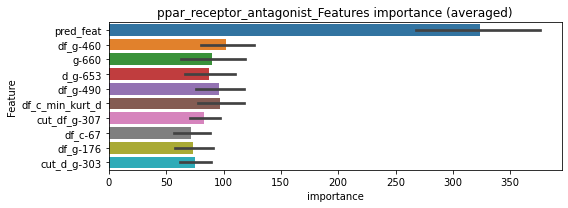

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000485593	valid_1's binary_logloss: 0.00221386
[2000]	training's binary_logloss: 0.000289757	valid_1's binary_logloss: 0.00186589
Early stopping, best iteration is:
[2370]	training's binary_logloss: 0.000263833	valid_1's binary_logloss: 0.00181922


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000496445	valid_1's binary_logloss: 0.00143813
[2000]	training's binary_logloss: 0.000291971	valid_1's binary_logloss: 0.00121392
[3000]	training's binary_logloss: 0.00023465	valid_1's binary_logloss: 0.00114846
[4000]	training's binary_logloss: 0.000208537	valid_1's binary_logloss: 0.00111659
[5000]	training's binary_logloss: 0.000195346	valid_1's binary_logloss: 0.00110279
Early stopping, best iteration is:
[5142]	training's binary_logloss: 0.000193724	valid_1's binary_logloss: 0.00110047


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000491155	valid_1's binary_logloss: 0.00108511
[2000]	training's binary_logloss: 0.000290972	valid_1's binary_logloss: 0.000806706
Early stopping, best iteration is:
[2683]	training's binary_logloss: 0.000245106	valid_1's binary_logloss: 0.000744126


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000488113	valid_1's binary_logloss: 0.00239462
[2000]	training's binary_logloss: 0.000291436	valid_1's binary_logloss: 0.00205777
Early stopping, best iteration is:
[2362]	training's binary_logloss: 0.0002654	valid_1's binary_logloss: 0.00201364


ppar_receptor_antagonist logloss: 0.0014201683795894478


neg labels: 3289 → selected neg labels: 3270


progesterone_receptor_agonist, len(trt): 119, len(othr): 3270
target_rate: 0.0049971 → Adj_target_rate: 0.0048799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0119901	valid_1's binary_logloss: 0.12733
Early stopping, best iteration is:
[384]	training's binary_logloss: 0.00616636	valid_1's binary_logloss: 0.123933
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012617	valid_1's binary_logloss: 0.0811483
[600]	training's binary_logloss: 0.00206145	valid_1's binary_logloss: 0.0657249
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.00195136	valid_1's binary_logloss: 0.0656488
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130014	valid_1's binary_logloss: 0.0653823
[600]	training's binary_logloss: 0.00208808	valid_1's binary_logloss: 0.0508425
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.00158727	valid_1's binary_logloss: 0.0498979
Training until validation scores don't improve for 30 rounds
[300]	training's b

1 / 3 AUC score:0.993


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.00237378	valid_1's binary_logloss: 0.0720261


y_Threshold: 0.0197428, Threshold: 0.1826400, pos_neg_ratio: 0.8000000
Remove_noisy_data: 177 → Positive_corect_labels: 631/3747
p_label_rate: 0.0100452 Vs.target_rate: 0.00500
Num_p_label: 40.0, conf_0:0.12785, conf_1:0.23743
Num_p_label: 40.0, Expected: 19.9, Adj_threshold_1: 0.1826400
Num_p_label: 33.0, Expected: 19.9, Adj_threshold_2: 0.2326400
Num_p_label: 28.0, Expected: 19.9, Adj_threshold_3: 0.2826400
threshold: 0.2826400, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 631.0/3747, y_label_rate: 0.1684014
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120089	valid_1's binary_logloss: 0.00263214
[600]	training's binary_logloss: 0.000173626	valid_1's binary_logloss: 0.000403167
[900]	training's binary_logloss: 0.000109506	valid_1's binary_logloss: 0.000255061
[1200]	training's binary_logloss: 0.000102682	valid_1's binary_logloss: 0.00023923
Early stopping, best iteration is:
[1194]	training's binary_logloss: 0.000102682	valid_1's binary_logloss: 0.00023923
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119228	valid_1's binary_logloss: 0.00331792
[600]	training's binary_logloss: 0.000173345	valid_1's binary_logloss: 0.000532006
[900]	training's binary_logloss: 0.000109462	valid_1's binary_logloss: 0.000337874
[1200]	training's binary_logloss: 0.00010267	valid_1's binary_logloss: 0.000317124
Early stopping, best iteration is:
[1246]	training's binary_logloss: 0.00010207	valid_1's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0860836, Threshold: 0.2826400, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 630.0/3745
p_label_rate: 0.0542441 Vs.target_rate: 0.00500
Num_p_label: 216.0, conf_0:0.22611, conf_1:0.33917
Num_p_label: 216.0, Expected: 19.9, Adj_threshold_1: 0.2826400
Num_p_label: 216.0, Expected: 19.9, Adj_threshold_2: 0.3326400
Num_p_label: 216.0, Expected: 19.9, Adj_threshold_3: 0.3826400
Num_p_label: 216.0, Expected: 19.9, Adj_threshold_4: 0.4326400
Num_p_label: 216.0, Expected: 19.9, Adj_threshold_5: 0.4826400
Num_p_label: 216.0, Expected: 19.9, Adj_threshold_6: 0.5326400
Num_p_label: 216.0, Expected: 19.9, Adj_threshold_7: 0.5826400
Num_p_label: 216.0, Expected: 19.9, Adj_threshold_8: 0.6326400
Num_p_label: 216.0, Expected: 19.9, Adj_threshold_9: 0.6826400
Num_p_label: 216.0, Expected: 19.9, Adj_threshold_10: 0.7326400
threshold: 0.7826400, positive_p_label: 172.0/3982, p_label_rate: 0.0431944
positive_y_label: 630.0/3745, y_label_rate:

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135227	valid_1's binary_logloss: 0.00534349
[600]	training's binary_logloss: 0.000225129	valid_1's binary_logloss: 0.00338803
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000190333	valid_1's binary_logloss: 0.00331341
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135597	valid_1's binary_logloss: 0.00297494
[600]	training's binary_logloss: 0.000223803	valid_1's binary_logloss: 0.000544328
[900]	training's binary_logloss: 0.000154564	valid_1's binary_logloss: 0.000350824
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000155754	valid_1's binary_logloss: 0.000350174
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012178	valid_1's binary_logloss: 0.00218721
[600]	training's binary_logloss: 0.000174256	valid_1's binary_logloss: 0.00032661
[900]	trai

3 / 3 AUC score:1.000
y_Threshold: 0.8516306, Threshold: 0.7826400, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 629.0/3743
p_label_rate: 0.0542441 Vs.target_rate: 0.00500
Num_p_label: 216.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 216.0, Expected: 19.9, Adj_threshold_1: 0.7826400
threshold: 0.7826400, positive_p_label: 216.0/3982, p_label_rate: 0.0542441


[1200]	training's binary_logloss: 0.000102895	valid_1's binary_logloss: 0.000311196
Early stopping, best iteration is:
[1178]	training's binary_logloss: 0.000102895	valid_1's binary_logloss: 0.000311196


positive_y_label: 629.0/3743, y_label_rate: 0.1680470


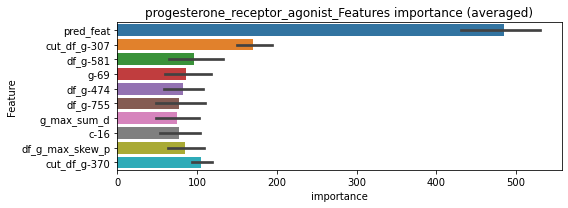

len(train_index) : 2807
len(valid_index) : 936
================================= fold 1/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000587966	valid_1's binary_logloss: 0.00514649
[2000]	training's binary_logloss: 0.000329935	valid_1's binary_logloss: 0.00456754
[3000]	training's binary_logloss: 0.000253735	valid_1's binary_logloss: 0.00435221
[4000]	training's binary_logloss: 0.000218987	valid_1's binary_logloss: 0.00425219
[5000]	training's binary_logloss: 0.000200399	valid_1's binary_logloss: 0.00418963
[6000]	training's binary_logloss: 0.000187901	valid_1's binary_logloss: 0.0041452
Early stopping, best iteration is:
[6117]	training's binary_logloss: 0.000186698	valid_1's binary_logloss: 0.00414148


len(train_index) : 2807
len(valid_index) : 936
================================= fold 2/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000582524	valid_1's binary_logloss: 0.00504245
Early stopping, best iteration is:
[1150]	training's binary_logloss: 0.000515425	valid_1's binary_logloss: 0.00496291


len(train_index) : 2807
len(valid_index) : 936
================================= fold 3/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00060017	valid_1's binary_logloss: 0.001025
[2000]	training's binary_logloss: 0.000330666	valid_1's binary_logloss: 0.000694229
[3000]	training's binary_logloss: 0.000249021	valid_1's binary_logloss: 0.000585968
[4000]	training's binary_logloss: 0.000210044	valid_1's binary_logloss: 0.000526077
[5000]	training's binary_logloss: 0.000189082	valid_1's binary_logloss: 0.000489277
[6000]	training's binary_logloss: 0.000175164	valid_1's binary_logloss: 0.00046617
[7000]	training's binary_logloss: 0.000164772	valid_1's binary_logloss: 0.000446509
Early stopping, best iteration is:
[7312]	training's binary_logloss: 0.000162427	valid_1's binary_logloss: 0.000441794


len(train_index) : 2808
len(valid_index) : 935
================================= fold 4/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000587629	valid_1's binary_logloss: 0.00184868
Early stopping, best iteration is:
[1384]	training's binary_logloss: 0.000436474	valid_1's binary_logloss: 0.00164616


progesterone_receptor_agonist logloss: 0.002803236072617984


neg labels: 3289 → selected neg labels: 3287


progesterone_receptor_antagonist, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011445	valid_1's binary_logloss: 0.00251094
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.00036913	valid_1's binary_logloss: 0.00106244
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011656	valid_1's binary_logloss: 0.00261523
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000355745	valid_1's binary_logloss: 0.00105329
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120006	valid_1's binary_logloss: 0.00199308
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000369285	valid_1's binary_logloss: 0.000800006
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00111899	valid_1's binary_logloss: 0.00599157


1 / 3 AUC score:1.000
y_Threshold: 0.0022687, Threshold: 0.0087497, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00612, conf_1:0.01137
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0087497
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_2: 0.0587497


Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000348949	valid_1's binary_logloss: 0.00351591


threshold: 0.0587497, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000531012	valid_1's binary_logloss: 0.000614513
[600]	training's binary_logloss: 0.000176001	valid_1's binary_logloss: 0.000194318
[900]	training's binary_logloss: 0.00014936	valid_1's binary_logloss: 0.000158192
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.00014936	valid_1's binary_logloss: 0.000158192
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000521955	valid_1's binary_logloss: 0.000725314
[600]	training's binary_logloss: 0.000171312	valid_1's binary_logloss: 0.000313963
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000147518	valid_1's binary_logloss: 0.000285286
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000533242	valid_1's binary_logloss: 0.000980275
[600]	training's binary_logloss: 0.000172333	valid_1's binary_logloss: 0.000567853
Ea

2 / 3 AUC score:1.000
y_Threshold: 0.3884203, Threshold: 0.0587497, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0469613 Vs.target_rate: 0.00076
Num_p_label: 187.0, conf_0:0.04700, conf_1:0.07050
Num_p_label: 187.0, Expected: 3.0, Adj_threshold_1: 0.0587497
Num_p_label: 187.0, Expected: 3.0, Adj_threshold_2: 0.1087497
Num_p_label: 187.0, Expected: 3.0, Adj_threshold_3: 0.1587497
Num_p_label: 187.0, Expected: 3.0, Adj_threshold_4: 0.2087497


[900]	training's binary_logloss: 0.000138402	valid_1's binary_logloss: 0.00182933
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000137336	valid_1's binary_logloss: 0.00182754


Num_p_label: 177.0, Expected: 3.0, Adj_threshold_5: 0.2587497
Num_p_label: 168.0, Expected: 3.0, Adj_threshold_6: 0.3087497
Num_p_label: 148.0, Expected: 3.0, Adj_threshold_7: 0.3587497
Num_p_label: 129.0, Expected: 3.0, Adj_threshold_8: 0.4087497
Num_p_label: 101.0, Expected: 3.0, Adj_threshold_9: 0.4587497
Num_p_label: 75.0, Expected: 3.0, Adj_threshold_10: 0.5087497
threshold: 0.5587497, positive_p_label: 58.0/3982, p_label_rate: 0.0145655
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000532928	valid_1's binary_logloss: 0.000596807
[600]	training's binary_logloss: 0.000176497	valid_1's binary_logloss: 0.000173435
Early stopping, best iteration is:
[851]	training's binary_logloss: 0.000151768	valid_1's binary_logloss: 0.000139337
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000521222	valid_1's binary_logloss: 0.000728062
[600]	training's binary_logloss: 0.000170597	valid_1's binary_logloss: 0.000311081
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000146674	valid_1's binary_logloss: 0.000283425
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000538503	valid_1's binary_logloss: 0.000988699
[600]	training's binary_logloss: 0.000173396	valid_1's binary_logloss: 0.000602157
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000169458	val

3 / 3 AUC score:1.000
y_Threshold: 0.4878553, Threshold: 0.5587497, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0135610 Vs.target_rate: 0.00076
Num_p_label: 54.0, conf_0:0.50000, conf_1:0.61462
Num_p_label: 54.0, Expected: 3.0, Adj_threshold_1: 0.5587497
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_2: 0.6087497
Num_p_label: 30.0, Expected: 3.0, Adj_threshold_3: 0.6587497
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_4: 0.7087497
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_5: 0.7587497
threshold: 0.7587497, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


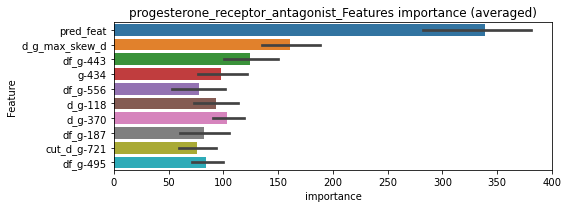

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000423239	valid_1's binary_logloss: 0.000425787
[2000]	training's binary_logloss: 0.0002601	valid_1's binary_logloss: 0.000249344
[3000]	training's binary_logloss: 0.000215167	valid_1's binary_logloss: 0.000196745
[4000]	training's binary_logloss: 0.000193034	valid_1's binary_logloss: 0.00017014
[5000]	training's binary_logloss: 0.000181258	valid_1's binary_logloss: 0.000155827
[6000]	training's binary_logloss: 0.000173257	valid_1's binary_logloss: 0.000146145
[7000]	training's binary_logloss: 0.000167262	valid_1's binary_logloss: 0.000139067
[8000]	training's binary_logloss: 0.000162899	valid_1's binary_logloss: 0.00013392
Early stopping, best iteration is:
[8893]	training's binary_logloss: 0.000159807	valid_1's binary_logloss: 0.000130201


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00041635	valid_1's binary_logloss: 0.000625087
[2000]	training's binary_logloss: 0.000253274	valid_1's binary_logloss: 0.000458347
[3000]	training's binary_logloss: 0.000208617	valid_1's binary_logloss: 0.00040659
[4000]	training's binary_logloss: 0.000185744	valid_1's binary_logloss: 0.00037304
Early stopping, best iteration is:
[4862]	training's binary_logloss: 0.00017511	valid_1's binary_logloss: 0.000358162


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000418736	valid_1's binary_logloss: 0.000477031
[2000]	training's binary_logloss: 0.000256695	valid_1's binary_logloss: 0.000302676
[3000]	training's binary_logloss: 0.00021086	valid_1's binary_logloss: 0.000249564
[4000]	training's binary_logloss: 0.000187096	valid_1's binary_logloss: 0.000220769
[5000]	training's binary_logloss: 0.000174543	valid_1's binary_logloss: 0.000205626
[6000]	training's binary_logloss: 0.000166497	valid_1's binary_logloss: 0.000196686
[7000]	training's binary_logloss: 0.000160857	valid_1's binary_logloss: 0.000190952
[8000]	training's binary_logloss: 0.000156487	valid_1's binary_logloss: 0.000185644
Early stopping, best iteration is:
[8654]	training's binary_logloss: 0.000154059	valid_1's binary_logloss: 0.000182498


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


progesterone_receptor_antagonist logloss: 0.002800298701529879


Early stopping, best iteration is:
[361]	training's binary_logloss: 0.00108038	valid_1's binary_logloss: 0.0105303
neg labels: 3289 → selected neg labels: 3286


prostaglandin_inhibitor, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00257096	valid_1's binary_logloss: 0.0113197
[600]	training's binary_logloss: 0.000544598	valid_1's binary_logloss: 0.00649352
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000510832	valid_1's binary_logloss: 0.00639946
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00252137	valid_1's binary_logloss: 0.0177212
[600]	training's binary_logloss: 0.000536019	valid_1's binary_logloss: 0.0124783
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000481561	valid_1's binary_logloss: 0.0122592
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00265878	valid_1's binary_logloss: 0.0176113
Early stopping, best iteration is:
[419]	training's binary_logloss: 0.0010812	valid_1's binary_logloss: 0.0155342
Training until validation scores don't improve for 30 rounds
[300]	

1 / 3 AUC score:1.000
y_Threshold: 0.0037533, Threshold: 0.0196023, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.01372, conf_1:0.02548
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0196023
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_2: 0.0696023
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_3: 0.1196023
threshold: 0.1196023, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000795951	valid_1's binary_logloss: 0.00147105
[600]	training's binary_logloss: 0.000200306	valid_1's binary_logloss: 0.000577435
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000170547	valid_1's binary_logloss: 0.000536028
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000754063	valid_1's binary_logloss: 0.00245766
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000212861	valid_1's binary_logloss: 0.00153782
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00077915	valid_1's binary_logloss: 0.0048702
Early stopping, best iteration is:
[374]	training's binary_logloss: 0.000419291	valid_1's binary_logloss: 0.00423359
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000798807	valid_1's binary_logloss: 0.0019

2 / 3 AUC score:1.000


[900]	training's binary_logloss: 0.000153792	valid_1's binary_logloss: 0.00117745
Early stopping, best iteration is:
[952]	training's binary_logloss: 0.000151465	valid_1's binary_logloss: 0.00117454


y_Threshold: 0.6311934, Threshold: 0.1196023, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0590156 Vs.target_rate: 0.00151
Num_p_label: 235.0, conf_0:0.09568, conf_1:0.14352
Num_p_label: 235.0, Expected: 6.0, Adj_threshold_1: 0.1196023
Num_p_label: 234.0, Expected: 6.0, Adj_threshold_2: 0.1696023
Num_p_label: 234.0, Expected: 6.0, Adj_threshold_3: 0.2196023
Num_p_label: 234.0, Expected: 6.0, Adj_threshold_4: 0.2696023
Num_p_label: 234.0, Expected: 6.0, Adj_threshold_5: 0.3196023
Num_p_label: 234.0, Expected: 6.0, Adj_threshold_6: 0.3696023
Num_p_label: 234.0, Expected: 6.0, Adj_threshold_7: 0.4196023
Num_p_label: 232.0, Expected: 6.0, Adj_threshold_8: 0.4696023
Num_p_label: 219.0, Expected: 6.0, Adj_threshold_9: 0.5196023
Num_p_label: 194.0, Expected: 6.0, Adj_threshold_10: 0.5696023
threshold: 0.6196023, positive_p_label: 161.0/3982, p_label_rate: 0.0404319
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pse

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000808845	valid_1's binary_logloss: 0.00359389
[600]	training's binary_logloss: 0.000202789	valid_1's binary_logloss: 0.00281039
Early stopping, best iteration is:
[794]	training's binary_logloss: 0.000168468	valid_1's binary_logloss: 0.00276172
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000821081	valid_1's binary_logloss: 0.000972371
[600]	training's binary_logloss: 0.000204857	valid_1's binary_logloss: 0.000235215
[900]	training's binary_logloss: 0.000162884	valid_1's binary_logloss: 0.000180239
Early stopping, best iteration is:
[976]	training's binary_logloss: 0.000159106	valid_1's binary_logloss: 0.000174797
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000818937	valid_1's binary_logloss: 0.00114673
[600]	training's binary_logloss: 0.000207043	valid_1's binary_logloss: 0.00041074
Early

3 / 3 AUC score:1.000
y_Threshold: 0.5615538, Threshold: 0.6196023, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0386740 Vs.target_rate: 0.00151
Num_p_label: 154.0, conf_0:0.50000, conf_1:0.68156
Num_p_label: 154.0, Expected: 6.0, Adj_threshold_1: 0.6196023
Num_p_label: 119.0, Expected: 6.0, Adj_threshold_2: 0.6696023
Num_p_label: 86.0, Expected: 6.0, Adj_threshold_3: 0.7196023
Num_p_label: 59.0, Expected: 6.0, Adj_threshold_4: 0.7696023
threshold: 0.7696023, positive_p_label: 59.0/3982, p_label_rate: 0.0148167


[900]	training's binary_logloss: 0.000162748	valid_1's binary_logloss: 0.00225895
Early stopping, best iteration is:
[872]	training's binary_logloss: 0.000164598	valid_1's binary_logloss: 0.00225756


positive_y_label: 656.0/3809, y_label_rate: 0.1722237


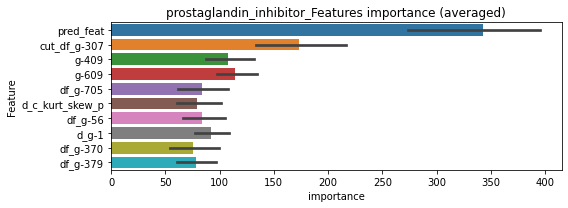

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000527559	valid_1's binary_logloss: 0.00419676


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000498757	valid_1's binary_logloss: 0.000466605
[2000]	training's binary_logloss: 0.000293421	valid_1's binary_logloss: 0.000262613
[3000]	training's binary_logloss: 0.000234086	valid_1's binary_logloss: 0.000200235
[4000]	training's binary_logloss: 0.000207114	valid_1's binary_logloss: 0.000170675
[5000]	training's binary_logloss: 0.000193071	valid_1's binary_logloss: 0.000155248
[6000]	training's binary_logloss: 0.0001835	valid_1's binary_logloss: 0.000144832
[7000]	training's binary_logloss: 0.000176808	valid_1's binary_logloss: 0.000137659
[8000]	training's binary_logloss: 0.000171679	valid_1's binary_logloss: 0.000132087
Early stopping, best iteration is:
[8597]	training's binary_logloss: 0.000169157	valid_1's binary_logloss: 0.000129396


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000495579	valid_1's binary_logloss: 0.000679023
[2000]	training's binary_logloss: 0.000294299	valid_1's binary_logloss: 0.000466863
[3000]	training's binary_logloss: 0.000234517	valid_1's binary_logloss: 0.000401041
Early stopping, best iteration is:
[3639]	training's binary_logloss: 0.000214347	valid_1's binary_logloss: 0.000376094


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000492656	valid_1's binary_logloss: 0.00435673
Early stopping, best iteration is:
[1728]	training's binary_logloss: 0.000319756	valid_1's binary_logloss: 0.00411707


prostaglandin_inhibitor logloss: 0.002205596832711653


neg labels: 3289 → selected neg labels: 3280


prostanoid_receptor_antagonist, len(trt): 84, len(othr): 3280
target_rate: 0.0035273 → Adj_target_rate: 0.0036294
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00812282	valid_1's binary_logloss: 0.0754387
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00208502	valid_1's binary_logloss: 0.0680335
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00876953	valid_1's binary_logloss: 0.0421103
[600]	training's binary_logloss: 0.0014148	valid_1's binary_logloss: 0.0309572
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.00100248	valid_1's binary_logloss: 0.0301238
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00941282	valid_1's binary_logloss: 0.0389053
[600]	training's binary_logloss: 0.00149242	valid_1's binary_logloss: 0.0296682
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.00139217	valid_1's binary_logloss: 0.0294929
Training until validation scores don't improve for 30 rounds
[300]	traini

1 / 3 AUC score:0.997
y_Threshold: 0.0112311, Threshold: 0.0600521, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 649/3790
p_label_rate: 0.0100452 Vs.target_rate: 0.00353
Num_p_label: 40.0, conf_0:0.04204, conf_1:0.07807
Num_p_label: 40.0, Expected: 14.0, Adj_threshold_1: 0.0600521
Num_p_label: 28.0, Expected: 14.0, Adj_threshold_2: 0.1100521
Num_p_label: 16.0, Expected: 14.0, Adj_threshold_3: 0.1600521
threshold: 0.1600521, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 649.0/3790, y_label_rate: 0.1712401
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135223	valid_1's binary_logloss: 0.00680276
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000294844	valid_1's binary_logloss: 0.0054318
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130025	valid_1's binary_logloss: 0.00437641
[600]	training's binary_logloss: 0.000241764	valid_1's binary_logloss: 0.00203235
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000196496	valid_1's binary_logloss: 0.00187794
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136184	valid_1's binary_logloss: 0.00585697
[600]	training's binary_logloss: 0.000248471	valid_1's binary_logloss: 0.00421361
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000191833	valid_1's binary_logloss: 0.00409647
Training until validation scores don't improve for 30 rounds

2 / 3 AUC score:1.000
y_Threshold: 0.2092039, Threshold: 0.1600521, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 646.0/3784
p_label_rate: 0.0489704 Vs.target_rate: 0.00353
Num_p_label: 195.0, conf_0:0.12804, conf_1:0.19206
Num_p_label: 195.0, Expected: 14.0, Adj_threshold_1: 0.1600521
Num_p_label: 147.0, Expected: 14.0, Adj_threshold_2: 0.2100521
Num_p_label: 112.0, Expected: 14.0, Adj_threshold_3: 0.2600521
Num_p_label: 93.0, Expected: 14.0, Adj_threshold_4: 0.3100521
Num_p_label: 88.0, Expected: 14.0, Adj_threshold_5: 0.3600521


[900]	training's binary_logloss: 0.00017374	valid_1's binary_logloss: 0.00119472
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000175283	valid_1's binary_logloss: 0.00118961


Num_p_label: 81.0, Expected: 14.0, Adj_threshold_6: 0.4100521
Num_p_label: 81.0, Expected: 14.0, Adj_threshold_7: 0.4600521
Num_p_label: 80.0, Expected: 14.0, Adj_threshold_8: 0.5100521
Num_p_label: 79.0, Expected: 14.0, Adj_threshold_9: 0.5600521
Num_p_label: 76.0, Expected: 14.0, Adj_threshold_10: 0.6100521
threshold: 0.6600521, positive_p_label: 72.0/3982, p_label_rate: 0.0180814
positive_y_label: 646.0/3784, y_label_rate: 0.1707188
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106311	valid_1's binary_logloss: 0.00227721
[600]	training's binary_logloss: 0.000165703	valid_1's binary_logloss: 0.000377253
[900]	training's binary_logloss: 0.000107743	valid_1's binary_logloss: 0.00024631
[1200]	training's binary_logloss: 0.000101586	valid_1's binary_logloss: 0.000232328
Early stopping, best iteration is:
[1238]	training's binary_logloss: 0.000101216	valid_1's binary_logloss: 0.000231353
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107225	valid_1's binary_logloss: 0.00908339
Early stopping, best iteration is:
[407]	training's binary_logloss: 0.00043601	valid_1's binary_logloss: 0.00869489
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130738	valid_1's binary_logloss: 0.00309672
[600]	training's binary_logloss: 0.00022166	valid_1's binary_logloss: 0.000879689
[900]	tr

3 / 3 AUC score:1.000
y_Threshold: 0.0879944, Threshold: 0.6600521, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 645.0/3782
p_label_rate: 0.0218483 Vs.target_rate: 0.00353
Num_p_label: 87.0, conf_0:0.50000, conf_1:0.72606
Num_p_label: 87.0, Expected: 14.0, Adj_threshold_1: 0.6600521
Num_p_label: 87.0, Expected: 14.0, Adj_threshold_2: 0.7100521
Num_p_label: 87.0, Expected: 14.0, Adj_threshold_3: 0.7600521
threshold: 0.7600521, positive_p_label: 87.0/3982, p_label_rate: 0.0218483
positive_y_label: 645.0/3782, y_label_rate: 0.1705447


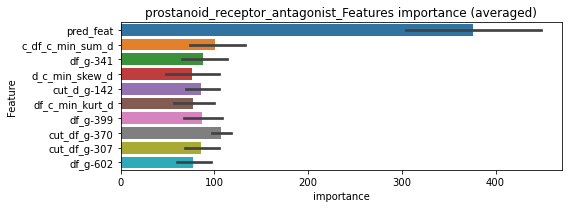

len(train_index) : 2836
len(valid_index) : 946
================================= fold 1/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000566876	valid_1's binary_logloss: 0.000694925
[2000]	training's binary_logloss: 0.000319299	valid_1's binary_logloss: 0.000376558
[3000]	training's binary_logloss: 0.000240086	valid_1's binary_logloss: 0.000274509
[4000]	training's binary_logloss: 0.000203882	valid_1's binary_logloss: 0.000227511
[5000]	training's binary_logloss: 0.000184267	valid_1's binary_logloss: 0.000202083
[6000]	training's binary_logloss: 0.000171109	valid_1's binary_logloss: 0.000184735
[7000]	training's binary_logloss: 0.000161409	valid_1's binary_logloss: 0.000171755
Early stopping, best iteration is:
[7961]	training's binary_logloss: 0.000154592	valid_1's binary_logloss: 0.000162448


len(train_index) : 2836
len(valid_index) : 946
================================= fold 2/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000456125	valid_1's binary_logloss: 0.000779705
[2000]	training's binary_logloss: 0.000252113	valid_1's binary_logloss: 0.000433112
[3000]	training's binary_logloss: 0.000185134	valid_1's binary_logloss: 0.000318583
[4000]	training's binary_logloss: 0.000153478	valid_1's binary_logloss: 0.000264378
[5000]	training's binary_logloss: 0.000137301	valid_1's binary_logloss: 0.000236657
[6000]	training's binary_logloss: 0.000126839	valid_1's binary_logloss: 0.000218632
[7000]	training's binary_logloss: 0.000119558	valid_1's binary_logloss: 0.00020608
[8000]	training's binary_logloss: 0.000114581	valid_1's binary_logloss: 0.000197515
[9000]	training's binary_logloss: 0.000111051	valid_1's binary_logloss: 0.000191438
[10000]	training's binary_logloss: 0.000108548	valid_1's binary_logloss: 0.000187163
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.000108548	vali

len(train_index) : 2837
len(valid_index) : 945
================================= fold 3/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000456818	valid_1's binary_logloss: 0.00076882
[2000]	training's binary_logloss: 0.000252371	valid_1's binary_logloss: 0.000427131
[3000]	training's binary_logloss: 0.000185233	valid_1's binary_logloss: 0.000314081
[4000]	training's binary_logloss: 0.00015351	valid_1's binary_logloss: 0.000260562
[5000]	training's binary_logloss: 0.000137298	valid_1's binary_logloss: 0.000233174
[6000]	training's binary_logloss: 0.000126865	valid_1's binary_logloss: 0.000215499
[7000]	training's binary_logloss: 0.000119591	valid_1's binary_logloss: 0.000203156
[8000]	training's binary_logloss: 0.00011462	valid_1's binary_logloss: 0.000194737
[9000]	training's binary_logloss: 0.000111099	valid_1's binary_logloss: 0.000188771
[10000]	training's binary_logloss: 0.000108587	valid_1's binary_logloss: 0.000184528
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000108587	valid_1

len(train_index) : 2837
len(valid_index) : 945
================================= fold 4/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000457017	valid_1's binary_logloss: 0.00077509
[2000]	training's binary_logloss: 0.000252386	valid_1's binary_logloss: 0.000430718
[3000]	training's binary_logloss: 0.00018529	valid_1's binary_logloss: 0.000316937
[4000]	training's binary_logloss: 0.000153516	valid_1's binary_logloss: 0.000262896
[5000]	training's binary_logloss: 0.000137318	valid_1's binary_logloss: 0.000235306
[6000]	training's binary_logloss: 0.000126878	valid_1's binary_logloss: 0.000217467
[7000]	training's binary_logloss: 0.000119596	valid_1's binary_logloss: 0.000204994
[8000]	training's binary_logloss: 0.000114616	valid_1's binary_logloss: 0.00019649
[9000]	training's binary_logloss: 0.00011109	valid_1's binary_logloss: 0.000190459
[10000]	training's binary_logloss: 0.000108573	valid_1's binary_logloss: 0.000186173
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000108573	valid_1'

prostanoid_receptor_antagonist logloss: 0.00018007551143924935


neg labels: 3289 → selected neg labels: 3197


proteasome_inhibitor, len(trt): 726, len(othr): 3197
target_rate: 0.0304863 → Adj_target_rate: 0.0226983
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[55]	training's binary_logloss: 0.3447	valid_1's binary_logloss: 0.474584
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[45]	training's binary_logloss: 0.37005	valid_1's binary_logloss: 0.470752
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[29]	training's binary_logloss: 0.400209	valid_1's binary_logloss: 0.47156
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.552
y_Threshold: 0.1964735, Threshold: 0.4344756, pos_neg_ratio: 0.7729121
Remove_noisy_data: 1201 → Positive_corect_labels: 208/2722
p_label_rate: 0.0100452 Vs.target_rate: 0.03049
Num_p_label: 40.0, conf_0:0.30413, conf_1:0.56482
Num_p_label: 40.0, Expected: 121.4, Adj_threshold_1: 0.4344756
Num_p_label: 63.0, Expected: 121.4, Adj_threshold_2: 0.4144756
Num_p_label: 93.0, Expected: 121.4, Adj_threshold_3: 0.3944756
Num_p_label: 116.0, Expected: 121.4, Adj_threshold_4: 0.3744756
Num_p_label: 128.0, Expected: 121.4, Adj_threshold_5: 0.3544756
Num_p_label: 136.0, Expected: 121.4, Adj_threshold_6: 0.3344756
Num_p_label: 142.0, Expected: 121.4, Adj_threshold_7: 0.3144756
Num_p_label: 146.0, Expected: 121.4, Adj_threshold_8: 0.2944756
Num_p_label: 156.0, Expected: 121.4, Adj_threshold_9: 0.2744756
Num_p_label: 176.0, Expected: 121.4, Adj_threshold_10: 0.2544756
threshold: 0.2344756, positive_p_label: 232.0/3982, p_label_rate: 0.0582622


Early stopping, best iteration is:
[3]	training's binary_logloss: 0.46902	valid_1's binary_logloss: 0.478459


positive_y_label: 208.0/2722, y_label_rate: 0.0764144
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122161	valid_1's binary_logloss: 0.00835367
[600]	training's binary_logloss: 0.000290431	valid_1's binary_logloss: 0.00252829
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.000222754	valid_1's binary_logloss: 0.00194055
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114808	valid_1's binary_logloss: 0.0266969
[600]	training's binary_logloss: 0.000283389	valid_1's binary_logloss: 0.0191897
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000254103	valid_1's binary_logloss: 0.0187355
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118164	valid_1's binary_logloss: 0.0160823
[600]	training's binary_logloss: 0.000282305	valid_1's binary_logloss: 0.00696869
[900]	training's binary_logloss: 0.000210998	valid_1's binary_logloss: 0.00610986
Early stopping, 

2 / 3 AUC score:1.000
y_Threshold: 0.1833922, Threshold: 0.2344756, pos_neg_ratio: 0.7729121
Remove_noisy_data: 8 → Positive_corect_labels: 204.0/2714
p_label_rate: 0.2305374 Vs.target_rate: 0.03049
Num_p_label: 918.0, conf_0:0.18758, conf_1:0.28137
Num_p_label: 918.0, Expected: 121.4, Adj_threshold_1: 0.2344756
Num_p_label: 915.0, Expected: 121.4, Adj_threshold_2: 0.2844756
Num_p_label: 915.0, Expected: 121.4, Adj_threshold_3: 0.3344756
Num_p_label: 912.0, Expected: 121.4, Adj_threshold_4: 0.3844756


[900]	training's binary_logloss: 0.00021564	valid_1's binary_logloss: 0.00127517
Early stopping, best iteration is:
[927]	training's binary_logloss: 0.000213096	valid_1's binary_logloss: 0.00124834


Num_p_label: 912.0, Expected: 121.4, Adj_threshold_5: 0.4344756
Num_p_label: 912.0, Expected: 121.4, Adj_threshold_6: 0.4844756
Num_p_label: 910.0, Expected: 121.4, Adj_threshold_7: 0.5344756
Num_p_label: 908.0, Expected: 121.4, Adj_threshold_8: 0.5844756
Num_p_label: 905.0, Expected: 121.4, Adj_threshold_9: 0.6344756
Num_p_label: 904.0, Expected: 121.4, Adj_threshold_10: 0.6844756
threshold: 0.7344756, positive_p_label: 899.0/3982, p_label_rate: 0.2257659
positive_y_label: 204.0/2714, y_label_rate: 0.0751658
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121332	valid_1's binary_logloss: 0.0139676
[600]	training's binary_logloss: 0.000278953	valid_1's binary_logloss: 0.0082955
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.00021579	valid_1's binary_logloss: 0.00776821
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114762	valid_1's binary_logloss: 0.00918062
[600]	training's binary_logloss: 0.000277582	valid_1's binary_logloss: 0.0021917
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000214056	valid_1's binary_logloss: 0.00151836
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113028	valid_1's binary_logloss: 0.010116
[600]	training's binary_logloss: 0.000273614	valid_1's binary_logloss: 0.00276543
[900]	training's binary_logloss: 0.00020363	valid_1's binary_logloss: 0.00201527
Early stopping, bes

3 / 3 AUC score:1.000
y_Threshold: 0.5204309, Threshold: 0.7344756, pos_neg_ratio: 0.7729121
Remove_noisy_data: 2 → Positive_corect_labels: 203.0/2712
p_label_rate: 0.2240080 Vs.target_rate: 0.03049
Num_p_label: 892.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 892.0, Expected: 121.4, Adj_threshold_1: 0.7344756
Num_p_label: 887.0, Expected: 121.4, Adj_threshold_2: 0.7844756
threshold: 0.7844756, positive_p_label: 887.0/3982, p_label_rate: 0.2227524


[900]	training's binary_logloss: 0.000210445	valid_1's binary_logloss: 0.00118074
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000210445	valid_1's binary_logloss: 0.00118074


positive_y_label: 203.0/2712, y_label_rate: 0.0748525


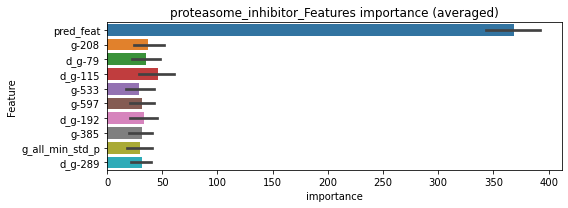

len(train_index) : 2034
len(valid_index) : 678
================================= fold 1/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000640555	valid_1's binary_logloss: 0.00212787
[2000]	training's binary_logloss: 0.000353104	valid_1's binary_logloss: 0.00117928
[3000]	training's binary_logloss: 0.000258915	valid_1's binary_logloss: 0.00086601
[4000]	training's binary_logloss: 0.000214316	valid_1's binary_logloss: 0.000717439
[5000]	training's binary_logloss: 0.000191569	valid_1's binary_logloss: 0.00064159
[6000]	training's binary_logloss: 0.000176973	valid_1's binary_logloss: 0.000592705
[7000]	training's binary_logloss: 0.000166862	valid_1's binary_logloss: 0.000558835
[8000]	training's binary_logloss: 0.000159939	valid_1's binary_logloss: 0.000535719
[9000]	training's binary_logloss: 0.000154977	valid_1's binary_logloss: 0.000519081
[10000]	training's binary_logloss: 0.00015137	valid_1's binary_logloss: 0.000506971
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.00015137	valid_1's 

len(train_index) : 2034
len(valid_index) : 678
================================= fold 2/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000638928	valid_1's binary_logloss: 0.00279679
[2000]	training's binary_logloss: 0.000352644	valid_1's binary_logloss: 0.00155726
[3000]	training's binary_logloss: 0.000258722	valid_1's binary_logloss: 0.00114561
[4000]	training's binary_logloss: 0.000214234	valid_1's binary_logloss: 0.00095022
[5000]	training's binary_logloss: 0.000191572	valid_1's binary_logloss: 0.000850511
[6000]	training's binary_logloss: 0.000176949	valid_1's binary_logloss: 0.000785509
[7000]	training's binary_logloss: 0.000166838	valid_1's binary_logloss: 0.000740843
[8000]	training's binary_logloss: 0.000159911	valid_1's binary_logloss: 0.000710151
[9000]	training's binary_logloss: 0.000154952	valid_1's binary_logloss: 0.000687991
[10000]	training's binary_logloss: 0.000151352	valid_1's binary_logloss: 0.000672021
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000151352	valid_1'

len(train_index) : 2034
len(valid_index) : 678
================================= fold 3/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000637749	valid_1's binary_logloss: 0.00277549
[2000]	training's binary_logloss: 0.000352651	valid_1's binary_logloss: 0.00155052
[3000]	training's binary_logloss: 0.000258652	valid_1's binary_logloss: 0.00114138
[4000]	training's binary_logloss: 0.000214175	valid_1's binary_logloss: 0.000946566
[5000]	training's binary_logloss: 0.000191532	valid_1's binary_logloss: 0.000847661
[6000]	training's binary_logloss: 0.000176902	valid_1's binary_logloss: 0.000783154
[7000]	training's binary_logloss: 0.000166863	valid_1's binary_logloss: 0.00073872
[8000]	training's binary_logloss: 0.000159855	valid_1's binary_logloss: 0.00070775
[9000]	training's binary_logloss: 0.000154931	valid_1's binary_logloss: 0.000685919
[10000]	training's binary_logloss: 0.000151351	valid_1's binary_logloss: 0.000670117
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000151351	valid_1's

len(train_index) : 2034
len(valid_index) : 678
================================= fold 4/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000841743	valid_1's binary_logloss: 0.00352105
Early stopping, best iteration is:
[1747]	training's binary_logloss: 0.000507841	valid_1's binary_logloss: 0.00268232


proteasome_inhibitor logloss: 0.0011335715674724602


neg labels: 3289 → selected neg labels: 3285


protein_kinase_inhibitor, len(trt): 48, len(othr): 3285
target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00386339	valid_1's binary_logloss: 0.0276237
[600]	training's binary_logloss: 0.000744162	valid_1's binary_logloss: 0.019924
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000645596	valid_1's binary_logloss: 0.0197762
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00383108	valid_1's binary_logloss: 0.0261831
[600]	training's binary_logloss: 0.000732957	valid_1's binary_logloss: 0.0199465
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000620271	valid_1's binary_logloss: 0.0195224
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00408897	valid_1's binary_logloss: 0.0113463
[600]	training's binary_logloss: 0.000777355	valid_1's binary_logloss: 0.00541178
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000607919	valid_1's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0046857, Threshold: 0.0120203, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, conf_0:0.00841, conf_1:0.01563
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0120203
Num_p_label: 3.0, Expected: 8.0, Adj_threshold_2: 0.0620203
threshold: 0.0620203, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000998099	valid_1's binary_logloss: 0.00311282
[600]	training's binary_logloss: 0.000218915	valid_1's binary_logloss: 0.00156436
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000174352	valid_1's binary_logloss: 0.00144418
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101615	valid_1's binary_logloss: 0.0023098
[600]	training's binary_logloss: 0.000217564	valid_1's binary_logloss: 0.00118036
[900]	training's binary_logloss: 0.000165938	valid_1's binary_logloss: 0.00109093
Early stopping, best iteration is:
[947]	training's binary_logloss: 0.000162991	valid_1's binary_logloss: 0.00108117
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0010113	valid_1's binary_logloss: 0.00405466
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000345311	valid_1's binar

2 / 3 AUC score:1.000


[900]	training's binary_logloss: 0.000165368	valid_1's binary_logloss: 0.00186448
Early stopping, best iteration is:
[952]	training's binary_logloss: 0.000162317	valid_1's binary_logloss: 0.00185632


y_Threshold: 0.6253238, Threshold: 0.0620203, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0414365 Vs.target_rate: 0.00202
Num_p_label: 165.0, conf_0:0.04962, conf_1:0.07442
Num_p_label: 165.0, Expected: 8.0, Adj_threshold_1: 0.0620203
Num_p_label: 165.0, Expected: 8.0, Adj_threshold_2: 0.1120203
Num_p_label: 165.0, Expected: 8.0, Adj_threshold_3: 0.1620203
Num_p_label: 165.0, Expected: 8.0, Adj_threshold_4: 0.2120203
Num_p_label: 165.0, Expected: 8.0, Adj_threshold_5: 0.2620203
Num_p_label: 165.0, Expected: 8.0, Adj_threshold_6: 0.3120203
Num_p_label: 165.0, Expected: 8.0, Adj_threshold_7: 0.3620203
Num_p_label: 165.0, Expected: 8.0, Adj_threshold_8: 0.4120203
Num_p_label: 165.0, Expected: 8.0, Adj_threshold_9: 0.4620203
Num_p_label: 159.0, Expected: 8.0, Adj_threshold_10: 0.5120203
threshold: 0.5620203, positive_p_label: 142.0/3982, p_label_rate: 0.0356605
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pse

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0010013	valid_1's binary_logloss: 0.0026236
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000241105	valid_1's binary_logloss: 0.0014223
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0010346	valid_1's binary_logloss: 0.00488524
Early stopping, best iteration is:
[380]	training's binary_logloss: 0.000515385	valid_1's binary_logloss: 0.00431208
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103477	valid_1's binary_logloss: 0.00358671
[600]	training's binary_logloss: 0.000222839	valid_1's binary_logloss: 0.00244949
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000182348	valid_1's binary_logloss: 0.00237374
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000993921	valid_1's binary_logloss: 0.00251964
[6

3 / 3 AUC score:1.000
y_Threshold: 0.6015469, Threshold: 0.5620203, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0193370 Vs.target_rate: 0.00202
Num_p_label: 77.0, conf_0:0.50000, conf_1:0.61822
Num_p_label: 77.0, Expected: 8.0, Adj_threshold_1: 0.5620203
Num_p_label: 39.0, Expected: 8.0, Adj_threshold_2: 0.6120203
Num_p_label: 25.0, Expected: 8.0, Adj_threshold_3: 0.6620203
Num_p_label: 13.0, Expected: 8.0, Adj_threshold_4: 0.7120203
threshold: 0.7120203, positive_p_label: 13.0/3982, p_label_rate: 0.0032647


Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000172055	valid_1's binary_logloss: 0.00132917


positive_y_label: 654.0/3804, y_label_rate: 0.1719243


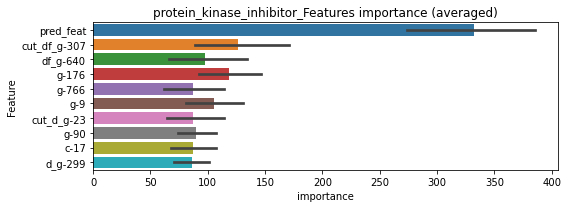

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 protein_kinase_inhibitor=================================


Early stopping, best iteration is:
[495]	training's binary_logloss: 0.0010603	valid_1's binary_logloss: 0.00363709
Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 protein_kinase_inhibitor=================================


Early stopping, best iteration is:
[359]	training's binary_logloss: 0.00151911	valid_1's binary_logloss: 0.00768996
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000593587	valid_1's binary_logloss: 0.00235185


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000537619	valid_1's binary_logloss: 0.00102971
[2000]	training's binary_logloss: 0.000313378	valid_1's binary_logloss: 0.000775431
Early stopping, best iteration is:
[2289]	training's binary_logloss: 0.000288248	valid_1's binary_logloss: 0.000747622


protein_kinase_inhibitor logloss: 0.003607021346578585


neg labels: 3289 → selected neg labels: 3286


protein_phosphatase_inhibitor, len(trt): 24, len(othr): 3286
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00153681	valid_1's binary_logloss: 0.00812045
[600]	training's binary_logloss: 0.000412264	valid_1's binary_logloss: 0.00574884
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.00041507	valid_1's binary_logloss: 0.00574319
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156172	valid_1's binary_logloss: 0.00616323
[600]	training's binary_logloss: 0.000407888	valid_1's binary_logloss: 0.0033397
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000398908	valid_1's binary_logloss: 0.00333303
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162407	valid_1's binary_logloss: 0.00310208
[600]	training's binary_logloss: 0.000423672	valid_1's binary_logloss: 0.00118478
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000423672	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0022784, Threshold: 0.0067227, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.00471, conf_1:0.00874
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0067227
Num_p_label: 0.0, Expected: 4.0, Adj_threshold_2: 0.0567227
threshold: 0.0567227, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000622273	valid_1's binary_logloss: 0.00286818
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000206681	valid_1's binary_logloss: 0.00224326
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000608367	valid_1's binary_logloss: 0.00129623
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000213311	valid_1's binary_logloss: 0.000683259
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00061361	valid_1's binary_logloss: 0.00137429
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.00020474	valid_1's binary_logloss: 0.000992664
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000609112	valid_1's binary_logloss: 0.000944211
[600]	training's binary_logloss: 0.000181927	valid_1's binary_logloss: 0.000

2 / 3 AUC score:1.000
y_Threshold: 0.5232738, Threshold: 0.0567227, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0474636 Vs.target_rate: 0.00101
Num_p_label: 189.0, conf_0:0.04538, conf_1:0.06807
Num_p_label: 189.0, Expected: 4.0, Adj_threshold_1: 0.0567227


Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000152702	valid_1's binary_logloss: 0.000358635


Num_p_label: 189.0, Expected: 4.0, Adj_threshold_2: 0.1067227
Num_p_label: 189.0, Expected: 4.0, Adj_threshold_3: 0.1567227
Num_p_label: 189.0, Expected: 4.0, Adj_threshold_4: 0.2067227
Num_p_label: 188.0, Expected: 4.0, Adj_threshold_5: 0.2567227
Num_p_label: 188.0, Expected: 4.0, Adj_threshold_6: 0.3067227
Num_p_label: 185.0, Expected: 4.0, Adj_threshold_7: 0.3567227
Num_p_label: 174.0, Expected: 4.0, Adj_threshold_8: 0.4067227
Num_p_label: 150.0, Expected: 4.0, Adj_threshold_9: 0.4567227
Num_p_label: 121.0, Expected: 4.0, Adj_threshold_10: 0.5067227
threshold: 0.5567227, positive_p_label: 94.0/3982, p_label_rate: 0.0236062
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000623295	valid_1's binary_logloss: 0.00333352
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000206136	valid_1's binary_logloss: 0.00280265
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00060495	valid_1's binary_logloss: 0.00142378
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000212221	valid_1's binary_logloss: 0.000761305
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000621962	valid_1's binary_logloss: 0.00113821
[600]	training's binary_logloss: 0.000185776	valid_1's binary_logloss: 0.000624482
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000191796	valid_1's binary_logloss: 0.00062182
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000613285	valid_1's binary_logloss: 0.000

3 / 3 AUC score:1.000
y_Threshold: 0.4701797, Threshold: 0.5567227, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0193370 Vs.target_rate: 0.00101
Num_p_label: 77.0, conf_0:0.50000, conf_1:0.61240
Num_p_label: 77.0, Expected: 4.0, Adj_threshold_1: 0.5567227
Num_p_label: 56.0, Expected: 4.0, Adj_threshold_2: 0.6067227
Num_p_label: 33.0, Expected: 4.0, Adj_threshold_3: 0.6567227
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_4: 0.7067227
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_5: 0.7567227
threshold: 0.7567227, positive_p_label: 9.0/3982, p_label_rate: 0.0022602


Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000151626	valid_1's binary_logloss: 0.000362073


positive_y_label: 656.0/3809, y_label_rate: 0.1722237


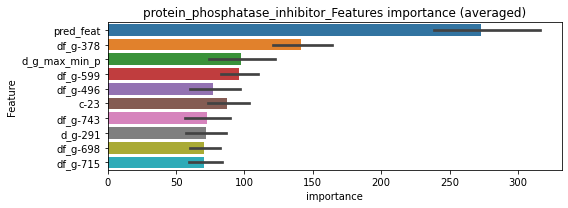

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00046068	valid_1's binary_logloss: 0.00162837
[2000]	training's binary_logloss: 0.000274628	valid_1's binary_logloss: 0.00139729
Early stopping, best iteration is:
[2952]	training's binary_logloss: 0.000222912	valid_1's binary_logloss: 0.00134147


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000452563	valid_1's binary_logloss: 0.000955402
[2000]	training's binary_logloss: 0.000273545	valid_1's binary_logloss: 0.000706251
[3000]	training's binary_logloss: 0.000222448	valid_1's binary_logloss: 0.00063116
Early stopping, best iteration is:
[3052]	training's binary_logloss: 0.00022028	valid_1's binary_logloss: 0.000627843


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00045596	valid_1's binary_logloss: 0.00112275
[2000]	training's binary_logloss: 0.000274462	valid_1's binary_logloss: 0.000902289
[3000]	training's binary_logloss: 0.000222739	valid_1's binary_logloss: 0.000835072
[4000]	training's binary_logloss: 0.000198067	valid_1's binary_logloss: 0.000803388
[5000]	training's binary_logloss: 0.000184618	valid_1's binary_logloss: 0.000785784
[6000]	training's binary_logloss: 0.000175978	valid_1's binary_logloss: 0.000774517
Early stopping, best iteration is:
[6048]	training's binary_logloss: 0.000175719	valid_1's binary_logloss: 0.0007741


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000452337	valid_1's binary_logloss: 0.001837
[2000]	training's binary_logloss: 0.000273094	valid_1's binary_logloss: 0.00163214
Early stopping, best iteration is:
[2026]	training's binary_logloss: 0.000271328	valid_1's binary_logloss: 0.00163146


protein_phosphatase_inhibitor logloss: 0.0010939563527587249


neg labels: 3289 → selected neg labels: 3278


protein_synthesis_inhibitor, len(trt): 103, len(othr): 3278
target_rate: 0.0043252 → Adj_target_rate: 0.0043163
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110909	valid_1's binary_logloss: 0.0787291
[600]	training's binary_logloss: 0.0017293	valid_1's binary_logloss: 0.0629517
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.0017634	valid_1's binary_logloss: 0.0628557
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114137	valid_1's binary_logloss: 0.0676456
[600]	training's binary_logloss: 0.00175651	valid_1's binary_logloss: 0.0492539
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.00158031	valid_1's binary_logloss: 0.0490097
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129006	valid_1's binary_logloss: 0.0610237
[600]	training's binary_logloss: 0.00193757	valid_1's binary_logloss: 0.0468511
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.00139581	valid_1's binary_logloss: 0.04561

1 / 3 AUC score:0.997
y_Threshold: 0.0141244, Threshold: 0.0735642, pos_neg_ratio: 0.8000000
Remove_noisy_data: 156 → Positive_corect_labels: 643/3777
p_label_rate: 0.0100452 Vs.target_rate: 0.00433
Num_p_label: 40.0, conf_0:0.05149, conf_1:0.09563
Num_p_label: 40.0, Expected: 17.2, Adj_threshold_1: 0.0735642
Num_p_label: 29.0, Expected: 17.2, Adj_threshold_2: 0.1235642
Num_p_label: 19.0, Expected: 17.2, Adj_threshold_3: 0.1735642
threshold: 0.1735642, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 643.0/3777, y_label_rate: 0.1702409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144663	valid_1's binary_logloss: 0.00289528
[600]	training's binary_logloss: 0.000242977	valid_1's binary_logloss: 0.000556853
[900]	training's binary_logloss: 0.000165615	valid_1's binary_logloss: 0.000386318
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.000162657	valid_1's binary_logloss: 0.000376718
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014398	valid_1's binary_logloss: 0.0047145
[600]	training's binary_logloss: 0.000242455	valid_1's binary_logloss: 0.00245944
[900]	training's binary_logloss: 0.000165081	valid_1's binary_logloss: 0.00226948
Early stopping, best iteration is:
[979]	training's binary_logloss: 0.000160296	valid_1's binary_logloss: 0.00225862
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014593	valid_1's binary_logloss: 0.00479877
[600]	traini

2 / 3 AUC score:1.000
y_Threshold: 0.7308155, Threshold: 0.1735642, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 642.0/3775
p_label_rate: 0.0607735 Vs.target_rate: 0.00433
Num_p_label: 242.0, conf_0:0.13885, conf_1:0.20828
Num_p_label: 242.0, Expected: 17.2, Adj_threshold_1: 0.1735642
Num_p_label: 242.0, Expected: 17.2, Adj_threshold_2: 0.2235642
Num_p_label: 242.0, Expected: 17.2, Adj_threshold_3: 0.2735642
Num_p_label: 242.0, Expected: 17.2, Adj_threshold_4: 0.3235642
Num_p_label: 242.0, Expected: 17.2, Adj_threshold_5: 0.3735642
Num_p_label: 241.0, Expected: 17.2, Adj_threshold_6: 0.4235642
Num_p_label: 241.0, Expected: 17.2, Adj_threshold_7: 0.4735642
Num_p_label: 241.0, Expected: 17.2, Adj_threshold_8: 0.5235642
Num_p_label: 241.0, Expected: 17.2, Adj_threshold_9: 0.5735642
Num_p_label: 241.0, Expected: 17.2, Adj_threshold_10: 0.6235642
threshold: 0.6735642, positive_p_label: 240.0/3982, p_label_rate: 0.0602712
positive_y_label: 642.0/3775, y_label_rate:

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150521	valid_1's binary_logloss: 0.00329494
[600]	training's binary_logloss: 0.000249467	valid_1's binary_logloss: 0.000802628
[900]	training's binary_logloss: 0.000174873	valid_1's binary_logloss: 0.00061239
Early stopping, best iteration is:
[964]	training's binary_logloss: 0.00017065	valid_1's binary_logloss: 0.000600044
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014853	valid_1's binary_logloss: 0.00905153
[600]	training's binary_logloss: 0.000245624	valid_1's binary_logloss: 0.0061478
[900]	training's binary_logloss: 0.000173815	valid_1's binary_logloss: 0.00586971
Early stopping, best iteration is:
[938]	training's binary_logloss: 0.000171253	valid_1's binary_logloss: 0.00585
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146313	valid_1's binary_logloss: 0.00351083
[600]	training's

3 / 3 AUC score:1.000
y_Threshold: 0.6158009, Threshold: 0.6735642, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 640.0/3771
p_label_rate: 0.0572577 Vs.target_rate: 0.00433
Num_p_label: 228.0, conf_0:0.50000, conf_1:0.74092
Num_p_label: 228.0, Expected: 17.2, Adj_threshold_1: 0.6735642
Num_p_label: 202.0, Expected: 17.2, Adj_threshold_2: 0.7235642
Num_p_label: 156.0, Expected: 17.2, Adj_threshold_3: 0.7735642
threshold: 0.7735642, positive_p_label: 156.0/3982, p_label_rate: 0.0391763
positive_y_label: 640.0/3771, y_label_rate: 0.1697163


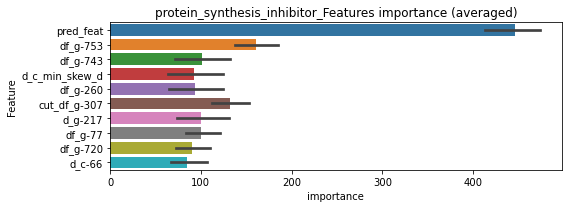

len(train_index) : 2828
len(valid_index) : 943
================================= fold 1/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2828
len(valid_index) : 943
================================= fold 2/4 protein_synthesis_inhibitor=================================


Early stopping, best iteration is:
[451]	training's binary_logloss: 0.0013038	valid_1's binary_logloss: 0.00869569
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000583995	valid_1's binary_logloss: 0.00462199
Early stopping, best iteration is:
[1678]	training's binary_logloss: 0.000375054	valid_1's binary_logloss: 0.00439204


len(train_index) : 2828
len(valid_index) : 943
================================= fold 3/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000589699	valid_1's binary_logloss: 0.00205807
[2000]	training's binary_logloss: 0.000330982	valid_1's binary_logloss: 0.00176291
[3000]	training's binary_logloss: 0.000255938	valid_1's binary_logloss: 0.00167769
[4000]	training's binary_logloss: 0.000222614	valid_1's binary_logloss: 0.00164009
Early stopping, best iteration is:
[4223]	training's binary_logloss: 0.000217934	valid_1's binary_logloss: 0.00163516


len(train_index) : 2829
len(valid_index) : 942
================================= fold 4/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000585004	valid_1's binary_logloss: 0.00294059
Early stopping, best iteration is:
[1009]	training's binary_logloss: 0.000580835	valid_1's binary_logloss: 0.00293038


protein_synthesis_inhibitor logloss: 0.0044149573876947745


neg labels: 3289 → selected neg labels: 3285


protein_tyrosine_kinase_inhibitor, len(trt): 19, len(othr): 3285
target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001451	valid_1's binary_logloss: 0.00440209
[600]	training's binary_logloss: 0.000379029	valid_1's binary_logloss: 0.00253667
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000379029	valid_1's binary_logloss: 0.00253667
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014156	valid_1's binary_logloss: 0.00732402
[600]	training's binary_logloss: 0.00037421	valid_1's binary_logloss: 0.00428872
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.00037675	valid_1's binary_logloss: 0.00427962
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00145297	valid_1's binary_logloss: 0.00246105
[600]	training's binary_logloss: 0.000382052	valid_1's binary_logloss: 0.000787777
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000382052	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0018135, Threshold: 0.0081178, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, conf_0:0.00568, conf_1:0.01055
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0081178
Num_p_label: 0.0, Expected: 3.2, Adj_threshold_2: 0.0581178


[600]	training's binary_logloss: 0.000384976	valid_1's binary_logloss: 0.00101304
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000384976	valid_1's binary_logloss: 0.00101304


threshold: 0.0581178, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00062728	valid_1's binary_logloss: 0.00315968
Early stopping, best iteration is:
[434]	training's binary_logloss: 0.000272585	valid_1's binary_logloss: 0.00255595
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000614222	valid_1's binary_logloss: 0.00198478
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000213069	valid_1's binary_logloss: 0.00129687
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000619424	valid_1's binary_logloss: 0.00114568
[600]	training's binary_logloss: 0.000177608	valid_1's binary_logloss: 0.000653439
Early stopping, best iteration is:
[758]	training's binary_logloss: 0.00015528	valid_1's binary_logloss: 0.00060665
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000612318	valid_1's binary_logloss: 0.00133

2 / 3 AUC score:1.000
y_Threshold: 0.5972225, Threshold: 0.0581178, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0657961 Vs.target_rate: 0.00080
Num_p_label: 262.0, conf_0:0.04649, conf_1:0.06974
Num_p_label: 262.0, Expected: 3.2, Adj_threshold_1: 0.0581178
Num_p_label: 262.0, Expected: 3.2, Adj_threshold_2: 0.1081178
Num_p_label: 262.0, Expected: 3.2, Adj_threshold_3: 0.1581178
Num_p_label: 262.0, Expected: 3.2, Adj_threshold_4: 0.2081178
Num_p_label: 261.0, Expected: 3.2, Adj_threshold_5: 0.2581178
Num_p_label: 259.0, Expected: 3.2, Adj_threshold_6: 0.3081178
Num_p_label: 251.0, Expected: 3.2, Adj_threshold_7: 0.3581178
Num_p_label: 233.0, Expected: 3.2, Adj_threshold_8: 0.4081178
Num_p_label: 194.0, Expected: 3.2, Adj_threshold_9: 0.4581178
Num_p_label: 166.0, Expected: 3.2, Adj_threshold_10: 0.5081178


Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000214888	valid_1's binary_logloss: 0.00105697


threshold: 0.5581178, positive_p_label: 122.0/3982, p_label_rate: 0.0306379
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000621953	valid_1's binary_logloss: 0.00279534
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.00022426	valid_1's binary_logloss: 0.00223662
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000616928	valid_1's binary_logloss: 0.00235399
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000202587	valid_1's binary_logloss: 0.00160769
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000615781	valid_1's binary_logloss: 0.000676121
[600]	training's binary_logloss: 0.000179323	valid_1's binary_logloss: 0.000171487
[900]	training's binary_logloss: 0.000149165	valid_1's binary_logloss: 0.000130855
Early stopping, best iteration is:
[947]	training's binary_logloss: 0.000147269	valid_1's binary_logloss: 0.000128163
Training until validation scores don't improve for 30

3 / 3 AUC score:1.000
y_Threshold: 0.5486380, Threshold: 0.5581178, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0220994 Vs.target_rate: 0.00080
Num_p_label: 88.0, conf_0:0.50000, conf_1:0.61393
Num_p_label: 88.0, Expected: 3.2, Adj_threshold_1: 0.5581178
Num_p_label: 60.0, Expected: 3.2, Adj_threshold_2: 0.6081178
Num_p_label: 38.0, Expected: 3.2, Adj_threshold_3: 0.6581178
Num_p_label: 20.0, Expected: 3.2, Adj_threshold_4: 0.7081178
Num_p_label: 13.0, Expected: 3.2, Adj_threshold_5: 0.7581178
threshold: 0.7581178, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


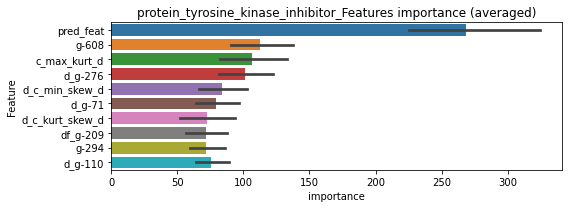

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000450109	valid_1's binary_logloss: 0.00467273
Early stopping, best iteration is:
[993]	training's binary_logloss: 0.00045351	valid_1's binary_logloss: 0.00466273


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00043686	valid_1's binary_logloss: 0.00193232
Early stopping, best iteration is:
[1228]	training's binary_logloss: 0.000370525	valid_1's binary_logloss: 0.00181791


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000446479	valid_1's binary_logloss: 0.0004402
[2000]	training's binary_logloss: 0.000267029	valid_1's binary_logloss: 0.000250194
[3000]	training's binary_logloss: 0.000215978	valid_1's binary_logloss: 0.000194629
[4000]	training's binary_logloss: 0.000191639	valid_1's binary_logloss: 0.00016721
[5000]	training's binary_logloss: 0.000178707	valid_1's binary_logloss: 0.000152627
[6000]	training's binary_logloss: 0.00017001	valid_1's binary_logloss: 0.000142794
[7000]	training's binary_logloss: 0.000163782	valid_1's binary_logloss: 0.000135842
Early stopping, best iteration is:
[7918]	training's binary_logloss: 0.00015951	valid_1's binary_logloss: 0.000130885


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000443784	valid_1's binary_logloss: 0.00118632
Early stopping, best iteration is:
[1744]	training's binary_logloss: 0.000291744	valid_1's binary_logloss: 0.00100453


protein_tyrosine_kinase_inhibitor logloss: 0.0019048748718388231


neg labels: 3289 → selected neg labels: 3283


radiopaque_medium, len(trt): 56, len(othr): 3283
target_rate: 0.0023516 → Adj_target_rate: 0.0025713
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00506246	valid_1's binary_logloss: 0.0346058
[600]	training's binary_logloss: 0.000901417	valid_1's binary_logloss: 0.0241199
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000682306	valid_1's binary_logloss: 0.0232632
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00541816	valid_1's binary_logloss: 0.0195228
[600]	training's binary_logloss: 0.000944744	valid_1's binary_logloss: 0.00879394
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000660315	valid_1's binary_logloss: 0.00782168
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00546061	valid_1's binary_logloss: 0.0151399
[600]	training's binary_logloss: 0.000974282	valid_1's binary_logloss: 0.00729367
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.00064044	valid_1's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0057860, Threshold: 0.0153503, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00235
Num_p_label: 40.0, conf_0:0.01075, conf_1:0.01996
Num_p_label: 40.0, Expected: 9.4, Adj_threshold_1: 0.0153503
Num_p_label: 3.0, Expected: 9.4, Adj_threshold_2: 0.0653503
threshold: 0.0653503, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113928	valid_1's binary_logloss: 0.00389499
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000262743	valid_1's binary_logloss: 0.00211274
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001133	valid_1's binary_logloss: 0.00326923
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000318063	valid_1's binary_logloss: 0.00197287
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118983	valid_1's binary_logloss: 0.00463023
Early stopping, best iteration is:
[386]	training's binary_logloss: 0.000555756	valid_1's binary_logloss: 0.00365521
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113341	valid_1's binary_logloss: 0.00253269


2 / 3 AUC score:1.000


[600]	training's binary_logloss: 0.000227494	valid_1's binary_logloss: 0.00118511
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000219687	valid_1's binary_logloss: 0.00115931


y_Threshold: 0.6744680, Threshold: 0.0653503, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0482170 Vs.target_rate: 0.00235
Num_p_label: 192.0, conf_0:0.05228, conf_1:0.07842
Num_p_label: 192.0, Expected: 9.4, Adj_threshold_1: 0.0653503
Num_p_label: 192.0, Expected: 9.4, Adj_threshold_2: 0.1153503
Num_p_label: 191.0, Expected: 9.4, Adj_threshold_3: 0.1653503
Num_p_label: 191.0, Expected: 9.4, Adj_threshold_4: 0.2153503
Num_p_label: 189.0, Expected: 9.4, Adj_threshold_5: 0.2653503
Num_p_label: 188.0, Expected: 9.4, Adj_threshold_6: 0.3153503
Num_p_label: 188.0, Expected: 9.4, Adj_threshold_7: 0.3653503
Num_p_label: 187.0, Expected: 9.4, Adj_threshold_8: 0.4153503
Num_p_label: 187.0, Expected: 9.4, Adj_threshold_9: 0.4653503
Num_p_label: 184.0, Expected: 9.4, Adj_threshold_10: 0.5153503
threshold: 0.5653503, positive_p_label: 170.0/3982, p_label_rate: 0.0426921
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pse

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115904	valid_1's binary_logloss: 0.00508439
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000254412	valid_1's binary_logloss: 0.0036479
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115184	valid_1's binary_logloss: 0.00336863
Early stopping, best iteration is:
[432]	training's binary_logloss: 0.000422226	valid_1's binary_logloss: 0.00204552
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119948	valid_1's binary_logloss: 0.00386725
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.00044251	valid_1's binary_logloss: 0.00289128
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115876	valid_1's binary_logloss: 0.00259705
[600]	training's binary_logloss: 0.000229227	valid_1's binary_logloss: 0.00132862


3 / 3 AUC score:1.000
y_Threshold: 0.6070623, Threshold: 0.5653503, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3801
p_label_rate: 0.0273732 Vs.target_rate: 0.00235
Num_p_label: 109.0, conf_0:0.50000, conf_1:0.62189
Num_p_label: 109.0, Expected: 9.4, Adj_threshold_1: 0.5653503
Num_p_label: 62.0, Expected: 9.4, Adj_threshold_2: 0.6153503
Num_p_label: 36.0, Expected: 9.4, Adj_threshold_3: 0.6653503
Num_p_label: 17.0, Expected: 9.4, Adj_threshold_4: 0.7153503


[900]	training's binary_logloss: 0.000169316	valid_1's binary_logloss: 0.00121732
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.000170471	valid_1's binary_logloss: 0.00121505


threshold: 0.7153503, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 653.0/3801, y_label_rate: 0.1717969


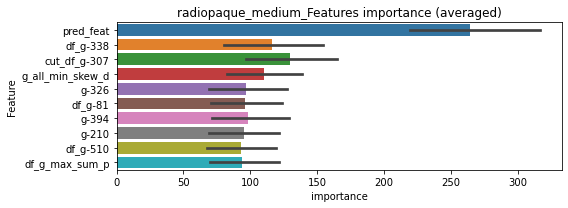

len(train_index) : 2850
len(valid_index) : 951
================================= fold 1/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 950
================================= fold 2/4 radiopaque_medium=================================


Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000724309	valid_1's binary_logloss: 0.00483767
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000553812	valid_1's binary_logloss: 0.00103625
[2000]	training's binary_logloss: 0.000316823	valid_1's binary_logloss: 0.000712744
[3000]	training's binary_logloss: 0.000249597	valid_1's binary_logloss: 0.000619977
Early stopping, best iteration is:
[3585]	training's binary_logloss: 0.000228842	valid_1's binary_logloss: 0.000592482


len(train_index) : 2851
len(valid_index) : 950
================================= fold 3/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000556429	valid_1's binary_logloss: 0.00254778
Early stopping, best iteration is:
[1056]	training's binary_logloss: 0.000530853	valid_1's binary_logloss: 0.00250453


len(train_index) : 2851
len(valid_index) : 950
================================= fold 4/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000548756	valid_1's binary_logloss: 0.00387897
Early stopping, best iteration is:
[1422]	training's binary_logloss: 0.000402471	valid_1's binary_logloss: 0.00372826


radiopaque_medium logloss: 0.002916247348767104


neg labels: 3289 → selected neg labels: 3266


raf_inhibitor, len(trt): 223, len(othr): 3266
target_rate: 0.0093642 → Adj_target_rate: 0.0083226
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0367408	valid_1's binary_logloss: 0.20844
Early stopping, best iteration is:
[440]	training's binary_logloss: 0.0143966	valid_1's binary_logloss: 0.200173
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0352395	valid_1's binary_logloss: 0.191228
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.0130863	valid_1's binary_logloss: 0.180197
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.035503	valid_1's binary_logloss: 0.196402
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.0184466	valid_1's binary_logloss: 0.191878
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0355071	valid_1's binary_logloss: 0.208439


1 / 3 AUC score:0.934
y_Threshold: 0.0666381, Threshold: 0.3538638, pos_neg_ratio: 0.8000000
Remove_noisy_data: 341 → Positive_corect_labels: 548/3578
p_label_rate: 0.0100452 Vs.target_rate: 0.00936
Num_p_label: 40.0, conf_0:0.24770, conf_1:0.46002
threshold: 0.3538638, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[376]	training's binary_logloss: 0.0214762	valid_1's binary_logloss: 0.202123


positive_y_label: 548.0/3578, y_label_rate: 0.1531582
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0018309	valid_1's binary_logloss: 0.00467974
[600]	training's binary_logloss: 0.000263188	valid_1's binary_logloss: 0.000812202
[900]	training's binary_logloss: 0.000171244	valid_1's binary_logloss: 0.000510055
Early stopping, best iteration is:
[1138]	training's binary_logloss: 0.000155715	valid_1's binary_logloss: 0.000455016
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183373	valid_1's binary_logloss: 0.00525044
[600]	training's binary_logloss: 0.000255396	valid_1's binary_logloss: 0.000944761
[900]	training's binary_logloss: 0.000161716	valid_1's binary_logloss: 0.000612315
[1200]	training's binary_logloss: 0.000144613	valid_1's binary_logloss: 0.000557043
Early stopping, best iteration is:
[1234]	training's binary_logloss: 0.000143135	valid_1's binary_logloss: 0.000549726
Training until validation scores don't improve for 30 rounds
[3

2 / 3 AUC score:1.000
y_Threshold: 0.0932247, Threshold: 0.3538638, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 546.0/3574
p_label_rate: 0.0924159 Vs.target_rate: 0.00936
Num_p_label: 368.0, conf_0:0.28309, conf_1:0.42464
Num_p_label: 368.0, Expected: 37.3, Adj_threshold_1: 0.3538638
Num_p_label: 368.0, Expected: 37.3, Adj_threshold_2: 0.4038638
Num_p_label: 368.0, Expected: 37.3, Adj_threshold_3: 0.4538638
Num_p_label: 368.0, Expected: 37.3, Adj_threshold_4: 0.5038638
Num_p_label: 368.0, Expected: 37.3, Adj_threshold_5: 0.5538638
Num_p_label: 368.0, Expected: 37.3, Adj_threshold_6: 0.6038638
Num_p_label: 368.0, Expected: 37.3, Adj_threshold_7: 0.6538638
Num_p_label: 368.0, Expected: 37.3, Adj_threshold_8: 0.7038638
Num_p_label: 367.0, Expected: 37.3, Adj_threshold_9: 0.7538638
threshold: 0.7538638, positive_p_label: 367.0/3982, p_label_rate: 0.0921647


Early stopping, best iteration is:
[433]	training's binary_logloss: 0.000619545	valid_1's binary_logloss: 0.00769095


positive_y_label: 546.0/3574, y_label_rate: 0.1527700
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00186151	valid_1's binary_logloss: 0.00397909
[600]	training's binary_logloss: 0.000256188	valid_1's binary_logloss: 0.000649927
[900]	training's binary_logloss: 0.000164524	valid_1's binary_logloss: 0.000445971
[1200]	training's binary_logloss: 0.000146796	valid_1's binary_logloss: 0.000402482
Early stopping, best iteration is:
[1236]	training's binary_logloss: 0.000145436	valid_1's binary_logloss: 0.000399213
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00180313	valid_1's binary_logloss: 0.00447147
[600]	training's binary_logloss: 0.000254989	valid_1's binary_logloss: 0.000816315
[900]	training's binary_logloss: 0.000168722	valid_1's binary_logloss: 0.000605394
Early stopping, best iteration is:
[1021]	training's binary_logloss: 0.000159766	valid_1's binary_logloss: 0.000572004
Training until validation scores don't improve for 30 rounds
[

3 / 3 AUC score:1.000
y_Threshold: 0.1188756, Threshold: 0.7538638, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 546.0/3574
p_label_rate: 0.0924159 Vs.target_rate: 0.00936
Num_p_label: 368.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 368.0, Expected: 37.3, Adj_threshold_1: 0.7538638
threshold: 0.7538638, positive_p_label: 368.0/3982, p_label_rate: 0.0924159
positive_y_label: 546.0/3574, y_label_rate: 0.1527700


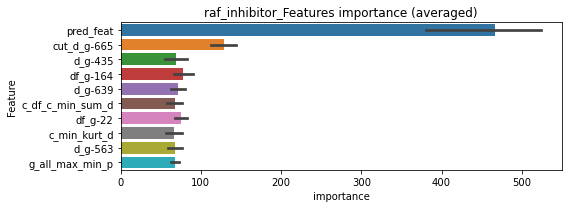

len(train_index) : 2680
len(valid_index) : 894
================================= fold 1/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000630447	valid_1's binary_logloss: 0.00228648
Early stopping, best iteration is:
[1850]	training's binary_logloss: 0.000370448	valid_1's binary_logloss: 0.00192139


len(train_index) : 2680
len(valid_index) : 894
================================= fold 2/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.00137743	valid_1's binary_logloss: 0.0174815


len(train_index) : 2681
len(valid_index) : 893
================================= fold 3/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00050318	valid_1's binary_logloss: 0.000838551
[2000]	training's binary_logloss: 0.000271766	valid_1's binary_logloss: 0.000454045
[3000]	training's binary_logloss: 0.000197954	valid_1's binary_logloss: 0.000330985
[4000]	training's binary_logloss: 0.000163371	valid_1's binary_logloss: 0.000273284
[5000]	training's binary_logloss: 0.000145808	valid_1's binary_logloss: 0.000243967
[6000]	training's binary_logloss: 0.00013458	valid_1's binary_logloss: 0.000225191
[7000]	training's binary_logloss: 0.000126798	valid_1's binary_logloss: 0.000212172
[8000]	training's binary_logloss: 0.000121484	valid_1's binary_logloss: 0.000203295
[9000]	training's binary_logloss: 0.000117708	valid_1's binary_logloss: 0.000196982
[10000]	training's binary_logloss: 0.000114989	valid_1's binary_logloss: 0.000192438
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000114989	valid_

len(train_index) : 2681
len(valid_index) : 893
================================= fold 4/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000503389	valid_1's binary_logloss: 0.000951509
[2000]	training's binary_logloss: 0.000271822	valid_1's binary_logloss: 0.000515789
[3000]	training's binary_logloss: 0.000197995	valid_1's binary_logloss: 0.000376174
[4000]	training's binary_logloss: 0.000163376	valid_1's binary_logloss: 0.000310601
[5000]	training's binary_logloss: 0.000145825	valid_1's binary_logloss: 0.000277345
[6000]	training's binary_logloss: 0.000134605	valid_1's binary_logloss: 0.00025605
[7000]	training's binary_logloss: 0.000126832	valid_1's binary_logloss: 0.000241278
[8000]	training's binary_logloss: 0.000121492	valid_1's binary_logloss: 0.000231137
[9000]	training's binary_logloss: 0.00011771	valid_1's binary_logloss: 0.000223949
[10000]	training's binary_logloss: 0.000114979	valid_1's binary_logloss: 0.00021875
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000114979	valid_1

raf_inhibitor logloss: 0.004957391161614469


neg labels: 3289 → selected neg labels: 3289


ras_gtpase_inhibitor, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000760811	valid_1's binary_logloss: 0.00246304
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000296554	valid_1's binary_logloss: 0.00150974
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000759863	valid_1's binary_logloss: 0.00259948
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000299905	valid_1's binary_logloss: 0.0017447
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000751085	valid_1's binary_logloss: 0.00193067
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000296214	valid_1's binary_logloss: 0.00121112
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000768746	valid_1's binary_logloss: 0.00249344


1 / 3 AUC score:1.000
y_Threshold: 0.0013520, Threshold: 0.0204754, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.01433, conf_1:0.02662
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0204754
Num_p_label: 22.0, Expected: 2.0, Adj_threshold_2: 0.0704754
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_3: 0.1204754
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_4: 0.1704754
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_5: 0.2204754
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_6: 0.2704754
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_7: 0.3204754
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_8: 0.3704754


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000295713	valid_1's binary_logloss: 0.00157526


threshold: 0.3704754, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000409672	valid_1's binary_logloss: 0.00084843
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000172658	valid_1's binary_logloss: 0.00058144
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000396189	valid_1's binary_logloss: 0.00142306
[600]	training's binary_logloss: 0.00015891	valid_1's binary_logloss: 0.00114702
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000150114	valid_1's binary_logloss: 0.00113449
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000415353	valid_1's binary_logloss: 0.000374267
[600]	training's binary_logloss: 0.000163256	valid_1's binary_logloss: 0.00012835
[900]	training's binary_logloss: 0.000142613	valid_1's binary_logloss: 0.000105598
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000142613	valid_1's 

2 / 3 AUC score:1.000
y_Threshold: 0.4596114, Threshold: 0.3704754, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0467102 Vs.target_rate: 0.00050
Num_p_label: 186.0, conf_0:0.29638, conf_1:0.44457
Num_p_label: 186.0, Expected: 2.0, Adj_threshold_1: 0.3704754
Num_p_label: 164.0, Expected: 2.0, Adj_threshold_2: 0.4204754
Num_p_label: 144.0, Expected: 2.0, Adj_threshold_3: 0.4704754
Num_p_label: 135.0, Expected: 2.0, Adj_threshold_4: 0.5204754
Num_p_label: 121.0, Expected: 2.0, Adj_threshold_5: 0.5704754
Num_p_label: 108.0, Expected: 2.0, Adj_threshold_6: 0.6204754
Num_p_label: 90.0, Expected: 2.0, Adj_threshold_7: 0.6704754
Num_p_label: 77.0, Expected: 2.0, Adj_threshold_8: 0.7204754
Num_p_label: 61.0, Expected: 2.0, Adj_threshold_9: 0.7704754
threshold: 0.7704754, positive_p_label: 61.0/3982, p_label_rate: 0.0153189


Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000182453	valid_1's binary_logloss: 0.00116811


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000408655	valid_1's binary_logloss: 0.000799406
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000172775	valid_1's binary_logloss: 0.000536039
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00039366	valid_1's binary_logloss: 0.00140369
[600]	training's binary_logloss: 0.000158491	valid_1's binary_logloss: 0.00113076
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000139565	valid_1's binary_logloss: 0.00110825
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000404531	valid_1's binary_logloss: 0.000371241
[600]	training's binary_logloss: 0.000158555	valid_1's binary_logloss: 0.000128481
[900]	training's binary_logloss: 0.000137363	valid_1's binary_logloss: 0.000105071
Early stopping, best iteration is:
[901]	training's binary_logloss: 0.000137363	valid_1

3 / 3 AUC score:1.000
y_Threshold: 0.4608943, Threshold: 0.7704754, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0145655 Vs.target_rate: 0.00050
Num_p_label: 58.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 58.0, Expected: 2.0, Adj_threshold_1: 0.7704754
threshold: 0.7704754, positive_p_label: 58.0/3982, p_label_rate: 0.0145655


Early stopping, best iteration is:
[466]	training's binary_logloss: 0.000183756	valid_1's binary_logloss: 0.00118487


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


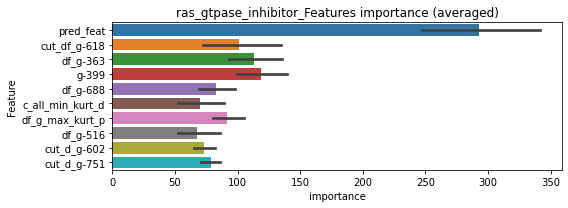

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000386064	valid_1's binary_logloss: 0.000936326
Early stopping, best iteration is:
[1896]	training's binary_logloss: 0.00024716	valid_1's binary_logloss: 0.000796813


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000375125	valid_1's binary_logloss: 0.00141753
[2000]	training's binary_logloss: 0.000236851	valid_1's binary_logloss: 0.00125612
[3000]	training's binary_logloss: 0.000198278	valid_1's binary_logloss: 0.00121946
[4000]	training's binary_logloss: 0.000178604	valid_1's binary_logloss: 0.0012022
Early stopping, best iteration is:
[4240]	training's binary_logloss: 0.000175568	valid_1's binary_logloss: 0.00119873


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000378973	valid_1's binary_logloss: 0.000338095
[2000]	training's binary_logloss: 0.000235549	valid_1's binary_logloss: 0.000201121
[3000]	training's binary_logloss: 0.000196911	valid_1's binary_logloss: 0.000161868
[4000]	training's binary_logloss: 0.000177642	valid_1's binary_logloss: 0.000141564
[5000]	training's binary_logloss: 0.000167215	valid_1's binary_logloss: 0.000130434
[6000]	training's binary_logloss: 0.000160194	valid_1's binary_logloss: 0.000122803
[7000]	training's binary_logloss: 0.000155122	valid_1's binary_logloss: 0.000117336
[8000]	training's binary_logloss: 0.000151391	valid_1's binary_logloss: 0.000113213
Early stopping, best iteration is:
[8802]	training's binary_logloss: 0.00014898	valid_1's binary_logloss: 0.000110542


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000379306	valid_1's binary_logloss: 0.00153164
[2000]	training's binary_logloss: 0.000233834	valid_1's binary_logloss: 0.00131434
[3000]	training's binary_logloss: 0.000193879	valid_1's binary_logloss: 0.00126375
[4000]	training's binary_logloss: 0.000175375	valid_1's binary_logloss: 0.00124561
Early stopping, best iteration is:
[4381]	training's binary_logloss: 0.000171269	valid_1's binary_logloss: 0.00124243


ras_gtpase_inhibitor logloss: 0.0008376695955014604


neg labels: 3289 → selected neg labels: 3278


retinoid_receptor_agonist, len(trt): 67, len(othr): 3278
target_rate: 0.0028135 → Adj_target_rate: 0.0029948
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00650245	valid_1's binary_logloss: 0.04099
[600]	training's binary_logloss: 0.00108831	valid_1's binary_logloss: 0.0251324
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000709013	valid_1's binary_logloss: 0.0233152
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.006515	valid_1's binary_logloss: 0.0267877
[600]	training's binary_logloss: 0.0011012	valid_1's binary_logloss: 0.013325
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000691594	valid_1's binary_logloss: 0.0117688
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00677174	valid_1's binary_logloss: 0.0369405
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.00127058	valid_1's binary_logloss: 0.0284802
Training until validation scores don't improve for 30 rounds
[300]	training'

1 / 3 AUC score:1.000
y_Threshold: 0.0087451, Threshold: 0.1446886, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 653/3797
p_label_rate: 0.0100452 Vs.target_rate: 0.00281
Num_p_label: 40.0, conf_0:0.10128, conf_1:0.18810
Num_p_label: 40.0, Expected: 11.2, Adj_threshold_1: 0.1446886
Num_p_label: 33.0, Expected: 11.2, Adj_threshold_2: 0.1946886
Num_p_label: 30.0, Expected: 11.2, Adj_threshold_3: 0.2446886
Num_p_label: 27.0, Expected: 11.2, Adj_threshold_4: 0.2946886
Num_p_label: 26.0, Expected: 11.2, Adj_threshold_5: 0.3446886
Num_p_label: 23.0, Expected: 11.2, Adj_threshold_6: 0.3946886
Num_p_label: 21.0, Expected: 11.2, Adj_threshold_7: 0.4446886
Num_p_label: 19.0, Expected: 11.2, Adj_threshold_8: 0.4946886
Num_p_label: 17.0, Expected: 11.2, Adj_threshold_9: 0.5446886
Num_p_label: 17.0, Expected: 11.2, Adj_threshold_10: 0.5946886
threshold: 0.6446886, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 653.0/3797, y_label_rate: 0.1719779
=

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122483	valid_1's binary_logloss: 0.00671286
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000261103	valid_1's binary_logloss: 0.00546011
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124385	valid_1's binary_logloss: 0.00206849
[600]	training's binary_logloss: 0.000238919	valid_1's binary_logloss: 0.000392724
[900]	training's binary_logloss: 0.000174653	valid_1's binary_logloss: 0.000267931
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.000169564	valid_1's binary_logloss: 0.000258508
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122116	valid_1's binary_logloss: 0.00666622
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000282402	valid_1's binary_logloss: 0.00480069
Training until validation scores don't improve for 30 ro

2 / 3 AUC score:1.000
y_Threshold: 0.3725408, Threshold: 0.6446886, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 649.0/3789
p_label_rate: 0.0220994 Vs.target_rate: 0.00281
Num_p_label: 88.0, conf_0:0.50000, conf_1:0.77363
Num_p_label: 88.0, Expected: 11.2, Adj_threshold_1: 0.6446886
Num_p_label: 77.0, Expected: 11.2, Adj_threshold_2: 0.6946886
Num_p_label: 72.0, Expected: 11.2, Adj_threshold_3: 0.7446886
Num_p_label: 65.0, Expected: 11.2, Adj_threshold_4: 0.7946886


Early stopping, best iteration is:
[506]	training's binary_logloss: 0.0003028	valid_1's binary_logloss: 0.00213224


threshold: 0.7946886, positive_p_label: 65.0/3982, p_label_rate: 0.0163235
positive_y_label: 649.0/3789, y_label_rate: 0.1712853
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115446	valid_1's binary_logloss: 0.00473977
[600]	training's binary_logloss: 0.000226622	valid_1's binary_logloss: 0.00311136
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000168386	valid_1's binary_logloss: 0.00296713
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117546	valid_1's binary_logloss: 0.00595504
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000275818	valid_1's binary_logloss: 0.00447937
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122073	valid_1's binary_logloss: 0.00424272
Early stopping, best iteration is:
[354]	training's binary_logloss: 0.000707864	valid_1's binary_logloss: 0.0034552
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121115	valid_1's binary_logloss: 0.0023657
[

3 / 3 AUC score:1.000
y_Threshold: 0.2322178, Threshold: 0.7946886, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 646.0/3783
p_label_rate: 0.0160723 Vs.target_rate: 0.00281
Num_p_label: 64.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 64.0, Expected: 11.2, Adj_threshold_1: 0.7946886
threshold: 0.7946886, positive_p_label: 64.0/3982, p_label_rate: 0.0160723
positive_y_label: 646.0/3783, y_label_rate: 0.1707639


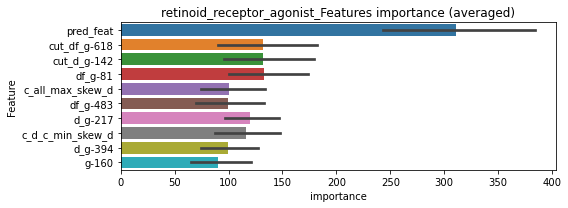

len(train_index) : 2837
len(valid_index) : 946
================================= fold 1/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000451468	valid_1's binary_logloss: 0.000668837
[2000]	training's binary_logloss: 0.000250912	valid_1's binary_logloss: 0.000372627
[3000]	training's binary_logloss: 0.000184526	valid_1's binary_logloss: 0.000274251
[4000]	training's binary_logloss: 0.000153304	valid_1's binary_logloss: 0.000227986
[5000]	training's binary_logloss: 0.00013728	valid_1's binary_logloss: 0.000204226
[6000]	training's binary_logloss: 0.000126794	valid_1's binary_logloss: 0.000188633
[7000]	training's binary_logloss: 0.000119505	valid_1's binary_logloss: 0.000177788
[8000]	training's binary_logloss: 0.00011454	valid_1's binary_logloss: 0.000170405
[9000]	training's binary_logloss: 0.000110992	valid_1's binary_logloss: 0.000165124
[10000]	training's binary_logloss: 0.000108544	valid_1's binary_logloss: 0.000161502
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000108544	valid_

len(train_index) : 2837
len(valid_index) : 946
================================= fold 2/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2837
len(valid_index) : 946
================================= fold 3/4 retinoid_receptor_agonist=================================


Early stopping, best iteration is:
[380]	training's binary_logloss: 0.00122682	valid_1's binary_logloss: 0.0130737
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000541758	valid_1's binary_logloss: 0.000988406
[2000]	training's binary_logloss: 0.000307767	valid_1's binary_logloss: 0.000695077
[3000]	training's binary_logloss: 0.000235031	valid_1's binary_logloss: 0.00058294
[4000]	training's binary_logloss: 0.000200845	valid_1's binary_logloss: 0.000527809
Early stopping, best iteration is:
[4746]	training's binary_logloss: 0.000186477	valid_1's binary_logloss: 0.00050395


len(train_index) : 2838
len(valid_index) : 945
================================= fold 4/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000530463	valid_1's binary_logloss: 0.000688971
[2000]	training's binary_logloss: 0.00030362	valid_1's binary_logloss: 0.00037308
[3000]	training's binary_logloss: 0.000233798	valid_1's binary_logloss: 0.000272129
[4000]	training's binary_logloss: 0.000199903	valid_1's binary_logloss: 0.00022288
[5000]	training's binary_logloss: 0.000181889	valid_1's binary_logloss: 0.000197008
[6000]	training's binary_logloss: 0.000170824	valid_1's binary_logloss: 0.000180898
[7000]	training's binary_logloss: 0.00016288	valid_1's binary_logloss: 0.000169244
[8000]	training's binary_logloss: 0.000156912	valid_1's binary_logloss: 0.00016041
[9000]	training's binary_logloss: 0.000152262	valid_1's binary_logloss: 0.000153272
Early stopping, best iteration is:
[9385]	training's binary_logloss: 0.00015072	valid_1's binary_logloss: 0.000150838


retinoid_receptor_agonist logloss: 0.0034734113159289506


neg labels: 3289 → selected neg labels: 3288


retinoid_receptor_antagonist, len(trt): 6, len(othr): 3288
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000384078	valid_1's binary_logloss: 0.000833115
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000190768	valid_1's binary_logloss: 0.000539943
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000387416	valid_1's binary_logloss: 0.00105576
Early stopping, best iteration is:
[466]	training's binary_logloss: 0.000197311	valid_1's binary_logloss: 0.000647112
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00038926	valid_1's binary_logloss: 0.000489108
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000195418	valid_1's binary_logloss: 0.000256348
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000391965	valid_1's binary_logloss: 0.000448519


1 / 3 AUC score:1.000
y_Threshold: 0.0005908, Threshold: 0.0022297, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00156, conf_1:0.00290
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0022297
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_2: 0.0522297
threshold: 0.0522297, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000194662	valid_1's binary_logloss: 0.00024029


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00028463	valid_1's binary_logloss: 0.000627887
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000143145	valid_1's binary_logloss: 0.000447005
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000285177	valid_1's binary_logloss: 0.000542097
[600]	training's binary_logloss: 0.000134175	valid_1's binary_logloss: 0.000347385
[900]	training's binary_logloss: 0.000121684	valid_1's binary_logloss: 0.000335317
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.00012173	valid_1's binary_logloss: 0.00033531
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000284244	valid_1's binary_logloss: 0.000375441
[600]	training's binary_logloss: 0.000133979	valid_1's binary_logloss: 0.000201223
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000123092	valid_

2 / 3 AUC score:1.000
y_Threshold: 0.2216345, Threshold: 0.0522297, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0497238 Vs.target_rate: 0.00025
Num_p_label: 198.0, conf_0:0.04178, conf_1:0.06268
Num_p_label: 198.0, Expected: 1.0, Adj_threshold_1: 0.0522297
Num_p_label: 138.0, Expected: 1.0, Adj_threshold_2: 0.1022297
Num_p_label: 83.0, Expected: 1.0, Adj_threshold_3: 0.1522297
Num_p_label: 41.0, Expected: 1.0, Adj_threshold_4: 0.2022297
Num_p_label: 31.0, Expected: 1.0, Adj_threshold_5: 0.2522297
Num_p_label: 22.0, Expected: 1.0, Adj_threshold_6: 0.3022297
Num_p_label: 12.0, Expected: 1.0, Adj_threshold_7: 0.3522297
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_8: 0.4022297
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_9: 0.4522297
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_10: 0.5022297
threshold: 0.5522297, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[853]	training's binary_logloss: 0.000124647	valid_1's binary_logloss: 0.000117966


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000291624	valid_1's binary_logloss: 0.00135659
[600]	training's binary_logloss: 0.000139308	valid_1's binary_logloss: 0.00104826
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000135611	valid_1's binary_logloss: 0.0010403
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000289635	valid_1's binary_logloss: 0.000615891
[600]	training's binary_logloss: 0.000136531	valid_1's binary_logloss: 0.00039694
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000126558	valid_1's binary_logloss: 0.000387593
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000286454	valid_1's binary_logloss: 0.000386793
[600]	training's binary_logloss: 0.000134598	valid_1's binary_logloss: 0.000210791
Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000123838	valid_1'

3 / 3 AUC score:1.000
y_Threshold: 0.2213244, Threshold: 0.5522297, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0000000 Vs.target_rate: 0.00025
Num_p_label: 0.0, conf_0:0.49701, conf_1:0.60745
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_1: 0.5522297
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.5322297
threshold: 0.5322297, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000129685	valid_1's binary_logloss: 0.000105468


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


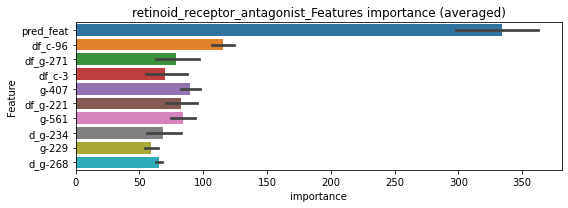

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000322885	valid_1's binary_logloss: 0.00095699
[2000]	training's binary_logloss: 0.00020145	valid_1's binary_logloss: 0.000731613
Early stopping, best iteration is:
[2700]	training's binary_logloss: 0.000177064	valid_1's binary_logloss: 0.000690947


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000318577	valid_1's binary_logloss: 0.000480882
[2000]	training's binary_logloss: 0.000198618	valid_1's binary_logloss: 0.00033715
[3000]	training's binary_logloss: 0.000168765	valid_1's binary_logloss: 0.00030107
[4000]	training's binary_logloss: 0.000154616	valid_1's binary_logloss: 0.000283726
Early stopping, best iteration is:
[4192]	training's binary_logloss: 0.000152821	valid_1's binary_logloss: 0.000281965


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000315445	valid_1's binary_logloss: 0.000294271
[2000]	training's binary_logloss: 0.000196808	valid_1's binary_logloss: 0.000179858
[3000]	training's binary_logloss: 0.000167369	valid_1's binary_logloss: 0.000149988
[4000]	training's binary_logloss: 0.000152603	valid_1's binary_logloss: 0.000134302
[5000]	training's binary_logloss: 0.000144612	valid_1's binary_logloss: 0.000125634
[6000]	training's binary_logloss: 0.000138998	valid_1's binary_logloss: 0.000119539
[7000]	training's binary_logloss: 0.000134707	valid_1's binary_logloss: 0.00011488
[8000]	training's binary_logloss: 0.000131866	valid_1's binary_logloss: 0.000111796
[9000]	training's binary_logloss: 0.000129506	valid_1's binary_logloss: 0.00010924
[10000]	training's binary_logloss: 0.000127648	valid_1's binary_logloss: 0.000107231
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000127648	valid_

len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000321138	valid_1's binary_logloss: 0.000300909
[2000]	training's binary_logloss: 0.0002	valid_1's binary_logloss: 0.000183205
[3000]	training's binary_logloss: 0.00016965	valid_1's binary_logloss: 0.000152272
[4000]	training's binary_logloss: 0.00015574	valid_1's binary_logloss: 0.00013723
[5000]	training's binary_logloss: 0.000147871	valid_1's binary_logloss: 0.000128597
[6000]	training's binary_logloss: 0.000142428	valid_1's binary_logloss: 0.000122581
[7000]	training's binary_logloss: 0.000138383	valid_1's binary_logloss: 0.000118109
[8000]	training's binary_logloss: 0.000135399	valid_1's binary_logloss: 0.000114807
[9000]	training's binary_logloss: 0.00013321	valid_1's binary_logloss: 0.000112383
Early stopping, best iteration is:
[9788]	training's binary_logloss: 0.000131798	valid_1's binary_logloss: 0.000110817


retinoid_receptor_antagonist logloss: 0.0002979696392507901


neg labels: 3289 → selected neg labels: 3283


rho_associated_kinase_inhibitor, len(trt): 35, len(othr): 3283
target_rate: 0.0014697 → Adj_target_rate: 0.0017245
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00277295	valid_1's binary_logloss: 0.0114722
[600]	training's binary_logloss: 0.000571825	valid_1's binary_logloss: 0.00574522
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000487404	valid_1's binary_logloss: 0.00554567
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00267937	valid_1's binary_logloss: 0.00899965
[600]	training's binary_logloss: 0.000578846	valid_1's binary_logloss: 0.00368302
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000494777	valid_1's binary_logloss: 0.00344137
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00285794	valid_1's binary_logloss: 0.0055785
[600]	training's binary_logloss: 0.000595201	valid_1's binary_logloss: 0.00171163
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000496862	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0046763, Threshold: 0.0142268, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00147
Num_p_label: 40.0, conf_0:0.00996, conf_1:0.01849
Num_p_label: 40.0, Expected: 5.9, Adj_threshold_1: 0.0142268
Num_p_label: 6.0, Expected: 5.9, Adj_threshold_2: 0.0642268
threshold: 0.0642268, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000830267	valid_1's binary_logloss: 0.00234087
[600]	training's binary_logloss: 0.000204524	valid_1's binary_logloss: 0.00116125
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000188711	valid_1's binary_logloss: 0.0011081
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000842631	valid_1's binary_logloss: 0.00138027
[600]	training's binary_logloss: 0.000203454	valid_1's binary_logloss: 0.000508979
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000169423	valid_1's binary_logloss: 0.00045219
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000857548	valid_1's binary_logloss: 0.00311307
Early stopping, best iteration is:
[416]	training's binary_logloss: 0.000358898	valid_1's binary_logloss: 0.00256924
Training until validation scores don't improve for 30 ro

2 / 3 AUC score:1.000
y_Threshold: 0.4783794, Threshold: 0.0642268, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0421899 Vs.target_rate: 0.00147
Num_p_label: 168.0, conf_0:0.05138, conf_1:0.07707
Num_p_label: 168.0, Expected: 5.9, Adj_threshold_1: 0.0642268
Num_p_label: 168.0, Expected: 5.9, Adj_threshold_2: 0.1142268
Num_p_label: 168.0, Expected: 5.9, Adj_threshold_3: 0.1642268
Num_p_label: 168.0, Expected: 5.9, Adj_threshold_4: 0.2142268
Num_p_label: 168.0, Expected: 5.9, Adj_threshold_5: 0.2642268
Num_p_label: 168.0, Expected: 5.9, Adj_threshold_6: 0.3142268
Num_p_label: 165.0, Expected: 5.9, Adj_threshold_7: 0.3642268
Num_p_label: 164.0, Expected: 5.9, Adj_threshold_8: 0.4142268
Num_p_label: 153.0, Expected: 5.9, Adj_threshold_9: 0.4642268
Num_p_label: 139.0, Expected: 5.9, Adj_threshold_10: 0.5142268
threshold: 0.5642268, positive_p_label: 118.0/3982, p_label_rate: 0.0296334
positive_y_label: 656.0/3807, y_label_rate: 0.1723142

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000838646	valid_1's binary_logloss: 0.00228576
[600]	training's binary_logloss: 0.000203031	valid_1's binary_logloss: 0.00123539
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000176884	valid_1's binary_logloss: 0.00117637
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000853928	valid_1's binary_logloss: 0.00119553
[600]	training's binary_logloss: 0.000207112	valid_1's binary_logloss: 0.000369118
[900]	training's binary_logloss: 0.000163315	valid_1's binary_logloss: 0.000313972
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000162539	valid_1's binary_logloss: 0.000312371
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000883666	valid_1's binary_logloss: 0.00983919
Early stopping, best iteration is:
[321]	training's binary_logloss: 0.000746424	valid_1'

3 / 3 AUC score:1.000
y_Threshold: 0.6147724, Threshold: 0.5642268, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0238574 Vs.target_rate: 0.00147
Num_p_label: 95.0, conf_0:0.50000, conf_1:0.62065


[600]	training's binary_logloss: 0.000204667	valid_1's binary_logloss: 0.000972132
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000192913	valid_1's binary_logloss: 0.000953725


Num_p_label: 95.0, Expected: 5.9, Adj_threshold_1: 0.5642268
Num_p_label: 60.0, Expected: 5.9, Adj_threshold_2: 0.6142268
Num_p_label: 43.0, Expected: 5.9, Adj_threshold_3: 0.6642268
Num_p_label: 22.0, Expected: 5.9, Adj_threshold_4: 0.7142268
Num_p_label: 13.0, Expected: 5.9, Adj_threshold_5: 0.7642268
threshold: 0.7642268, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3805, y_label_rate: 0.1721419


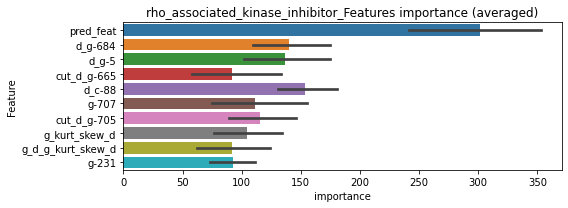

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000497885	valid_1's binary_logloss: 0.00123577
[2000]	training's binary_logloss: 0.000295003	valid_1's binary_logloss: 0.000999783
[3000]	training's binary_logloss: 0.000236034	valid_1's binary_logloss: 0.000930602
[4000]	training's binary_logloss: 0.000208398	valid_1's binary_logloss: 0.00089848
[5000]	training's binary_logloss: 0.000194096	valid_1's binary_logloss: 0.000882326
[6000]	training's binary_logloss: 0.000184995	valid_1's binary_logloss: 0.000870813
Early stopping, best iteration is:
[6660]	training's binary_logloss: 0.000180288	valid_1's binary_logloss: 0.000865289


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000500837	valid_1's binary_logloss: 0.00109923
Early stopping, best iteration is:
[1376]	training's binary_logloss: 0.000381015	valid_1's binary_logloss: 0.000969734


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000495783	valid_1's binary_logloss: 0.00115201
[2000]	training's binary_logloss: 0.000295026	valid_1's binary_logloss: 0.000882011
Early stopping, best iteration is:
[2388]	training's binary_logloss: 0.000267172	valid_1's binary_logloss: 0.000836653


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000498919	valid_1's binary_logloss: 0.00421006
[2000]	training's binary_logloss: 0.000291491	valid_1's binary_logloss: 0.00382563
Early stopping, best iteration is:
[2102]	training's binary_logloss: 0.00028338	valid_1's binary_logloss: 0.00380641


rho_associated_kinase_inhibitor logloss: 0.0016197275438905646


neg labels: 3289 → selected neg labels: 3284


ribonucleoside_reductase_inhibitor, len(trt): 37, len(othr): 3284
target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00308233	valid_1's binary_logloss: 0.0189176
[600]	training's binary_logloss: 0.00062151	valid_1's binary_logloss: 0.0125274
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000530241	valid_1's binary_logloss: 0.0121936
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00320234	valid_1's binary_logloss: 0.00887817
[600]	training's binary_logloss: 0.000621805	valid_1's binary_logloss: 0.00349583
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.00052979	valid_1's binary_logloss: 0.00324361
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0030962	valid_1's binary_logloss: 0.0094062
[600]	training's binary_logloss: 0.000618398	valid_1's binary_logloss: 0.00331406
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000526706	valid_1's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0046188, Threshold: 0.0271650, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, conf_0:0.01902, conf_1:0.03531
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0271650
Num_p_label: 7.0, Expected: 6.2, Adj_threshold_2: 0.0771650
threshold: 0.0771650, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000889318	valid_1's binary_logloss: 0.00608889
[600]	training's binary_logloss: 0.000208813	valid_1's binary_logloss: 0.00451389
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.00021836	valid_1's binary_logloss: 0.00447928
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000899107	valid_1's binary_logloss: 0.00242294
Early stopping, best iteration is:
[432]	training's binary_logloss: 0.00034372	valid_1's binary_logloss: 0.00181594
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000888193	valid_1's binary_logloss: 0.00194955
[600]	training's binary_logloss: 0.000210447	valid_1's binary_logloss: 0.00109749
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.00020591	valid_1's binary_logloss: 0.00108309
Training until validation scores don't improve for 30 round

2 / 3 AUC score:1.000
y_Threshold: 0.5743253, Threshold: 0.0771650, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0524862 Vs.target_rate: 0.00155
Num_p_label: 209.0, conf_0:0.06173, conf_1:0.09260
Num_p_label: 209.0, Expected: 6.2, Adj_threshold_1: 0.0771650
Num_p_label: 209.0, Expected: 6.2, Adj_threshold_2: 0.1271650
Num_p_label: 209.0, Expected: 6.2, Adj_threshold_3: 0.1771650
Num_p_label: 209.0, Expected: 6.2, Adj_threshold_4: 0.2271650


Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000275323	valid_1's binary_logloss: 0.00105182


Num_p_label: 209.0, Expected: 6.2, Adj_threshold_5: 0.2771650
Num_p_label: 207.0, Expected: 6.2, Adj_threshold_6: 0.3271650
Num_p_label: 204.0, Expected: 6.2, Adj_threshold_7: 0.3771650
Num_p_label: 199.0, Expected: 6.2, Adj_threshold_8: 0.4271650
Num_p_label: 188.0, Expected: 6.2, Adj_threshold_9: 0.4771650
Num_p_label: 170.0, Expected: 6.2, Adj_threshold_10: 0.5271650
threshold: 0.5771650, positive_p_label: 145.0/3982, p_label_rate: 0.0364139
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000892852	valid_1's binary_logloss: 0.00378578
[600]	training's binary_logloss: 0.00021418	valid_1's binary_logloss: 0.00289646
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000186665	valid_1's binary_logloss: 0.00283938
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000912054	valid_1's binary_logloss: 0.00207591
[600]	training's binary_logloss: 0.000219654	valid_1's binary_logloss: 0.00102787
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000218104	valid_1's binary_logloss: 0.00102767
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000918386	valid_1's binary_logloss: 0.00390964
[600]	training's binary_logloss: 0.000219064	valid_1's binary_logloss: 0.0027505
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000177144	valid_1's bin

3 / 3 AUC score:1.000
y_Threshold: 0.4592251, Threshold: 0.5771650, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0143144 Vs.target_rate: 0.00155
Num_p_label: 57.0, conf_0:0.50000, conf_1:0.63488
Num_p_label: 57.0, Expected: 6.2, Adj_threshold_1: 0.5771650
Num_p_label: 39.0, Expected: 6.2, Adj_threshold_2: 0.6271650
Num_p_label: 29.0, Expected: 6.2, Adj_threshold_3: 0.6771650
Num_p_label: 17.0, Expected: 6.2, Adj_threshold_4: 0.7271650


[900]	training's binary_logloss: 0.000170811	valid_1's binary_logloss: 0.000370623
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000171532	valid_1's binary_logloss: 0.000370405


Num_p_label: 13.0, Expected: 6.2, Adj_threshold_5: 0.7771650
threshold: 0.7771650, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


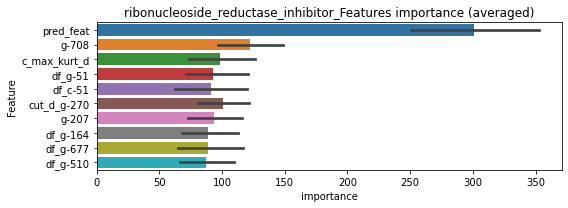

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000523058	valid_1's binary_logloss: 0.00422637
[2000]	training's binary_logloss: 0.000305891	valid_1's binary_logloss: 0.00385758
Early stopping, best iteration is:
[2426]	training's binary_logloss: 0.000271929	valid_1's binary_logloss: 0.00379578


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000523069	valid_1's binary_logloss: 0.00423004
Early stopping, best iteration is:
[1728]	training's binary_logloss: 0.000334067	valid_1's binary_logloss: 0.00382579


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000517144	valid_1's binary_logloss: 0.00205402
[2000]	training's binary_logloss: 0.000301937	valid_1's binary_logloss: 0.00178338
Early stopping, best iteration is:
[2120]	training's binary_logloss: 0.000292027	valid_1's binary_logloss: 0.00177468


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000517022	valid_1's binary_logloss: 0.000520615
[2000]	training's binary_logloss: 0.000303925	valid_1's binary_logloss: 0.00029319
[3000]	training's binary_logloss: 0.000242952	valid_1's binary_logloss: 0.000223453
[4000]	training's binary_logloss: 0.000216099	valid_1's binary_logloss: 0.000190689
[5000]	training's binary_logloss: 0.000201798	valid_1's binary_logloss: 0.000173271
[6000]	training's binary_logloss: 0.000192685	valid_1's binary_logloss: 0.00016218
[7000]	training's binary_logloss: 0.000185514	valid_1's binary_logloss: 0.000153698
[8000]	training's binary_logloss: 0.000180738	valid_1's binary_logloss: 0.000147987
Early stopping, best iteration is:
[8040]	training's binary_logloss: 0.000180436	valid_1's binary_logloss: 0.000147685


ribonucleoside_reductase_inhibitor logloss: 0.0023876616575854615


neg labels: 3289 → selected neg labels: 3284


rna_polymerase_inhibitor, len(trt): 25, len(othr): 3284
target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00166919	valid_1's binary_logloss: 0.00433629
[600]	training's binary_logloss: 0.000422419	valid_1's binary_logloss: 0.00183916
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000411266	valid_1's binary_logloss: 0.00181343
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00164249	valid_1's binary_logloss: 0.00378433
[600]	training's binary_logloss: 0.000425699	valid_1's binary_logloss: 0.00149959
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000408875	valid_1's binary_logloss: 0.00147303
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00165356	valid_1's binary_logloss: 0.00466395
[600]	training's binary_logloss: 0.000424753	valid_1's binary_logloss: 0.00202745
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000417267	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0024398, Threshold: 0.0114202, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000434667	valid_1's binary_logloss: 0.00141496
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000434939	valid_1's binary_logloss: 0.0014142


Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, conf_0:0.00799, conf_1:0.01485
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0114202
Num_p_label: 3.0, Expected: 4.2, Adj_threshold_2: 0.0614202
threshold: 0.0614202, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000652926	valid_1's binary_logloss: 0.00120987
[600]	training's binary_logloss: 0.000189669	valid_1's binary_logloss: 0.000585438
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000189193	valid_1's binary_logloss: 0.000583856
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000667301	valid_1's binary_logloss: 0.000840609
[600]	training's binary_logloss: 0.000194654	valid_1's binary_logloss: 0.000256666
Early stopping, best iteration is:
[853]	training's binary_logloss: 0.000164042	valid_1's binary_logloss: 0.000219188
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000657307	valid_1's binary_logloss: 0.00157221
[600]	training's binary_logloss: 0.000188224	valid_1's binary_logloss: 0.00106877
[900]	training's binary_logloss: 0.000154859	valid_1's binary_logloss: 0.00101968
Earl

2 / 3 AUC score:1.000
y_Threshold: 0.6224802, Threshold: 0.0614202, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0532396 Vs.target_rate: 0.00105
Num_p_label: 212.0, conf_0:0.04914, conf_1:0.07370
Num_p_label: 212.0, Expected: 4.2, Adj_threshold_1: 0.0614202
Num_p_label: 210.0, Expected: 4.2, Adj_threshold_2: 0.1114202


[300]	training's binary_logloss: 0.000670614	valid_1's binary_logloss: 0.00317184
Early stopping, best iteration is:
[311]	training's binary_logloss: 0.000616047	valid_1's binary_logloss: 0.00313624


Num_p_label: 209.0, Expected: 4.2, Adj_threshold_3: 0.1614202
Num_p_label: 209.0, Expected: 4.2, Adj_threshold_4: 0.2114202
Num_p_label: 208.0, Expected: 4.2, Adj_threshold_5: 0.2614202
Num_p_label: 189.0, Expected: 4.2, Adj_threshold_6: 0.3114202
Num_p_label: 164.0, Expected: 4.2, Adj_threshold_7: 0.3614202
Num_p_label: 141.0, Expected: 4.2, Adj_threshold_8: 0.4114202
Num_p_label: 115.0, Expected: 4.2, Adj_threshold_9: 0.4614202
Num_p_label: 94.0, Expected: 4.2, Adj_threshold_10: 0.5114202
threshold: 0.5614202, positive_p_label: 68.0/3982, p_label_rate: 0.0170768
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000649731	valid_1's binary_logloss: 0.00137607
[600]	training's binary_logloss: 0.000191291	valid_1's binary_logloss: 0.000774646
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000188914	valid_1's binary_logloss: 0.0007727
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000664223	valid_1's binary_logloss: 0.000703019
[600]	training's binary_logloss: 0.000193899	valid_1's binary_logloss: 0.000175676
[900]	training's binary_logloss: 0.000160469	valid_1's binary_logloss: 0.000132954
Early stopping, best iteration is:
[901]	training's binary_logloss: 0.000160469	valid_1's binary_logloss: 0.000132954
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000656607	valid_1's binary_logloss: 0.0015874
[600]	training's binary_logloss: 0.000188949	valid_1's binary_logloss: 0.00112757
[900]	

3 / 3 AUC score:1.000
y_Threshold: 0.5989407, Threshold: 0.5614202, pos_neg_ratio: 0.8000000


[300]	training's binary_logloss: 0.000692094	valid_1's binary_logloss: 0.0165458
Early stopping, best iteration is:
[322]	training's binary_logloss: 0.000578907	valid_1's binary_logloss: 0.0156177


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, conf_0:0.50000, conf_1:0.61756
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.5614202
Num_p_label: 24.0, Expected: 4.2, Adj_threshold_2: 0.6114202
Num_p_label: 14.0, Expected: 4.2, Adj_threshold_3: 0.6614202
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_4: 0.7114202
threshold: 0.7114202, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


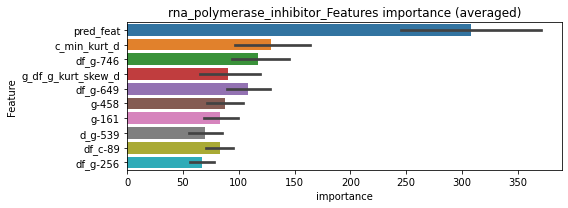

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000448272	valid_1's binary_logloss: 0.0015091
[2000]	training's binary_logloss: 0.000272528	valid_1's binary_logloss: 0.00126401
Early stopping, best iteration is:
[2167]	training's binary_logloss: 0.000262525	valid_1's binary_logloss: 0.00124477


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000456078	valid_1's binary_logloss: 0.000456516
[2000]	training's binary_logloss: 0.00027807	valid_1's binary_logloss: 0.000263922
[3000]	training's binary_logloss: 0.000226832	valid_1's binary_logloss: 0.000203943
[4000]	training's binary_logloss: 0.000200978	valid_1's binary_logloss: 0.000173093
[5000]	training's binary_logloss: 0.000187453	valid_1's binary_logloss: 0.000156863
[6000]	training's binary_logloss: 0.000178449	valid_1's binary_logloss: 0.000146128
[7000]	training's binary_logloss: 0.000172069	valid_1's binary_logloss: 0.000138541
[8000]	training's binary_logloss: 0.000167199	valid_1's binary_logloss: 0.000132869
[9000]	training's binary_logloss: 0.000163706	valid_1's binary_logloss: 0.000128836
Early stopping, best iteration is:
[9191]	training's binary_logloss: 0.000163113	valid_1's binary_logloss: 0.000128186


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000462527	valid_1's binary_logloss: 0.00119313
[2000]	training's binary_logloss: 0.00027775	valid_1's binary_logloss: 0.00097675
Early stopping, best iteration is:
[2936]	training's binary_logloss: 0.000226334	valid_1's binary_logloss: 0.000933087


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


rna_polymerase_inhibitor logloss: 0.012734327138923212


Early stopping, best iteration is:
[302]	training's binary_logloss: 0.00154001	valid_1's binary_logloss: 0.048629
neg labels: 3289 → selected neg labels: 3249


serotonin_receptor_agonist, len(trt): 236, len(othr): 3249
target_rate: 0.0099101 → Adj_target_rate: 0.0087332
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0322198	valid_1's binary_logloss: 0.206792
Early stopping, best iteration is:
[361]	training's binary_logloss: 0.0212033	valid_1's binary_logloss: 0.204334
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0318735	valid_1's binary_logloss: 0.206565
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.0159848	valid_1's binary_logloss: 0.199592
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0330614	valid_1's binary_logloss: 0.180908
Early stopping, best iteration is:
[466]	training's binary_logloss: 0.0115313	valid_1's binary_logloss: 0.167899
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0345353	valid_1's binary_logloss: 0.205486


1 / 3 AUC score:0.940
y_Threshold: 0.0617467, Threshold: 0.3460920, pos_neg_ratio: 0.8000000
Remove_noisy_data: 315 → Positive_corect_labels: 557/3583
p_label_rate: 0.0100452 Vs.target_rate: 0.00991
Num_p_label: 40.0, conf_0:0.24226, conf_1:0.44992


Early stopping, best iteration is:
[345]	training's binary_logloss: 0.0255334	valid_1's binary_logloss: 0.201296


threshold: 0.3460920, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 557.0/3583, y_label_rate: 0.1554563
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183273	valid_1's binary_logloss: 0.00444508
[600]	training's binary_logloss: 0.00027724	valid_1's binary_logloss: 0.000645313
[900]	training's binary_logloss: 0.000183375	valid_1's binary_logloss: 0.000365552
Early stopping, best iteration is:
[1031]	training's binary_logloss: 0.000174082	valid_1's binary_logloss: 0.000338351
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00181396	valid_1's binary_logloss: 0.00801221
[600]	training's binary_logloss: 0.000268448	valid_1's binary_logloss: 0.00424273
[900]	training's binary_logloss: 0.000174045	valid_1's binary_logloss: 0.00395436
Early stopping, best iteration is:
[961]	training's binary_logloss: 0.000169198	valid_1's binary_logloss: 0.00393824
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00188339	valid_1's binary_logloss: 0.00496641
[600]	tra

2 / 3 AUC score:1.000
y_Threshold: 0.6281055, Threshold: 0.3460920, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 555.0/3579
p_label_rate: 0.0886489 Vs.target_rate: 0.00991
Num_p_label: 353.0, conf_0:0.27687, conf_1:0.41531
Num_p_label: 353.0, Expected: 39.5, Adj_threshold_1: 0.3460920
Num_p_label: 353.0, Expected: 39.5, Adj_threshold_2: 0.3960920


Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000182193	valid_1's binary_logloss: 0.00327197


Num_p_label: 353.0, Expected: 39.5, Adj_threshold_3: 0.4460920
Num_p_label: 353.0, Expected: 39.5, Adj_threshold_4: 0.4960920
Num_p_label: 353.0, Expected: 39.5, Adj_threshold_5: 0.5460920
Num_p_label: 353.0, Expected: 39.5, Adj_threshold_6: 0.5960920
Num_p_label: 349.0, Expected: 39.5, Adj_threshold_7: 0.6460920
Num_p_label: 346.0, Expected: 39.5, Adj_threshold_8: 0.6960920
Num_p_label: 338.0, Expected: 39.5, Adj_threshold_9: 0.7460920
Num_p_label: 331.0, Expected: 39.5, Adj_threshold_10: 0.7960920
threshold: 0.7960920, positive_p_label: 331.0/3982, p_label_rate: 0.0831241
positive_y_label: 555.0/3579, y_label_rate: 0.1550712
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00186166	valid_1's binary_logloss: 0.00571735
[600]	training's binary_logloss: 0.000281589	valid_1's binary_logloss: 0.00173157
[900]	training's binary_logloss: 0.0001877	valid_1's binary_logloss: 0.00139599
Early stopping, best iteration is:
[1043]	training's binary_logloss: 0.000178708	valid_1's binary_logloss: 0.00135795
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00193012	valid_1's binary_logloss: 0.00707252
[600]	training's binary_logloss: 0.000287871	valid_1's binary_logloss: 0.00325152
[900]	training's binary_logloss: 0.000189515	valid_1's binary_logloss: 0.00299547
Early stopping, best iteration is:
[1031]	training's binary_logloss: 0.00018052	valid_1's binary_logloss: 0.00296422
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00189576	valid_1's binary_logloss: 0.00620359
[600]	trainin

3 / 3 AUC score:1.000
y_Threshold: 0.6546722, Threshold: 0.7960920, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 553.0/3575
p_label_rate: 0.0690608 Vs.target_rate: 0.00991
Num_p_label: 275.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 275.0, Expected: 39.5, Adj_threshold_1: 0.7960920
threshold: 0.7960920, positive_p_label: 275.0/3982, p_label_rate: 0.0690608
positive_y_label: 553.0/3575, y_label_rate: 0.1546853


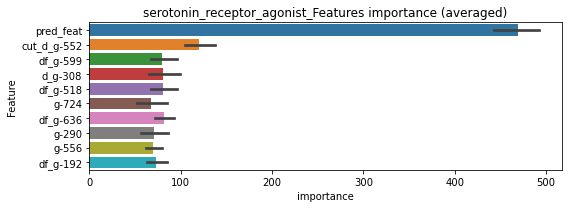

len(train_index) : 2681
len(valid_index) : 894
================================= fold 1/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000626229	valid_1's binary_logloss: 0.00452296
Early stopping, best iteration is:
[1510]	training's binary_logloss: 0.000431301	valid_1's binary_logloss: 0.00412947


len(train_index) : 2681
len(valid_index) : 894
================================= fold 2/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000621684	valid_1's binary_logloss: 0.00223345
Early stopping, best iteration is:
[1517]	training's binary_logloss: 0.000428069	valid_1's binary_logloss: 0.00197616


len(train_index) : 2681
len(valid_index) : 894
================================= fold 3/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000630347	valid_1's binary_logloss: 0.00231204
[2000]	training's binary_logloss: 0.000354812	valid_1's binary_logloss: 0.00185866
Early stopping, best iteration is:
[2130]	training's binary_logloss: 0.000341949	valid_1's binary_logloss: 0.00183816


len(train_index) : 2682
len(valid_index) : 893
================================= fold 4/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000616398	valid_1's binary_logloss: 0.00621354
[2000]	training's binary_logloss: 0.000350441	valid_1's binary_logloss: 0.00582455
Early stopping, best iteration is:
[2696]	training's binary_logloss: 0.000286652	valid_1's binary_logloss: 0.00571581


serotonin_receptor_agonist logloss: 0.003415566794863093


neg labels: 3289 → selected neg labels: 3239


serotonin_receptor_antagonist, len(trt): 404, len(othr): 3239
target_rate: 0.0169648 → Adj_target_rate: 0.0137918
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0607364	valid_1's binary_logloss: 0.348293
Early stopping, best iteration is:
[274]	training's binary_logloss: 0.0698436	valid_1's binary_logloss: 0.347334
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0622741	valid_1's binary_logloss: 0.339395
Early stopping, best iteration is:
[303]	training's binary_logloss: 0.0611138	valid_1's binary_logloss: 0.339116
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0662337	valid_1's binary_logloss: 0.335001
Early stopping, best iteration is:
[299]	training's binary_logloss: 0.0666577	valid_1's binary_logloss: 0.334939
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0635256	valid_1's binary_logloss: 0.336257


1 / 3 AUC score:0.804
y_Threshold: 0.1319320, Threshold: 0.5237532, pos_neg_ratio: 0.8000000
Remove_noisy_data: 643 → Positive_corect_labels: 391/3243
p_label_rate: 0.0100452 Vs.target_rate: 0.01696
Num_p_label: 40.0, conf_0:0.36663, conf_1:0.68088
Num_p_label: 40.0, Expected: 67.6, Adj_threshold_1: 0.5237532
Num_p_label: 48.0, Expected: 67.6, Adj_threshold_2: 0.5037532


Early stopping, best iteration is:
[335]	training's binary_logloss: 0.051643	valid_1's binary_logloss: 0.334731


threshold: 0.5037532, positive_p_label: 48.0/3982, p_label_rate: 0.0120542
positive_y_label: 391.0/3243, y_label_rate: 0.1205674
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00184781	valid_1's binary_logloss: 0.00698482
[600]	training's binary_logloss: 0.000296854	valid_1's binary_logloss: 0.00230618
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000215118	valid_1's binary_logloss: 0.00197996
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00185496	valid_1's binary_logloss: 0.00870317
[600]	training's binary_logloss: 0.000296279	valid_1's binary_logloss: 0.00435939
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000255789	valid_1's binary_logloss: 0.00412196
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00188337	valid_1's binary_logloss: 0.00915213
[600]	training's binary_logloss: 0.000298882	valid_1's binary_logloss: 0.00547266
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000270913	valid_1's bina

2 / 3 AUC score:1.000
y_Threshold: 0.4560306, Threshold: 0.5037532, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 388.0/3237
p_label_rate: 0.1406328 Vs.target_rate: 0.01696
Num_p_label: 560.0, conf_0:0.40300, conf_1:0.60450
Num_p_label: 560.0, Expected: 67.6, Adj_threshold_1: 0.5037532
Num_p_label: 554.0, Expected: 67.6, Adj_threshold_2: 0.5537532
Num_p_label: 549.0, Expected: 67.6, Adj_threshold_3: 0.6037532
Num_p_label: 529.0, Expected: 67.6, Adj_threshold_4: 0.6537532
Num_p_label: 510.0, Expected: 67.6, Adj_threshold_5: 0.7037532
Num_p_label: 501.0, Expected: 67.6, Adj_threshold_6: 0.7537532
threshold: 0.7537532, positive_p_label: 501.0/3982, p_label_rate: 0.1258162
positive_y_label: 388.0/3237, y_label_rate: 0.1198641
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00185691	valid_1's binary_logloss: 0.00881523
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000425873	valid_1's binary_logloss: 0.00494328
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00190128	valid_1's binary_logloss: 0.00621213
[600]	training's binary_logloss: 0.000299351	valid_1's binary_logloss: 0.00190088
[900]	training's binary_logloss: 0.000202138	valid_1's binary_logloss: 0.00155502
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000200254	valid_1's binary_logloss: 0.00154672
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183945	valid_1's binary_logloss: 0.00852975
[600]	training's binary_logloss: 0.000295257	valid_1's binary_logloss: 0.00425253
[900]	training's binary_logloss: 0.000198687	valid_1's binary_logloss: 0.0038794
Early stoppin

3 / 3 AUC score:1.000
y_Threshold: 0.3082628, Threshold: 0.7537532, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 385.0/3231
p_label_rate: 0.1190357 Vs.target_rate: 0.01696
Num_p_label: 474.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 474.0, Expected: 67.6, Adj_threshold_1: 0.7537532
threshold: 0.7537532, positive_p_label: 474.0/3982, p_label_rate: 0.1190357
positive_y_label: 385.0/3231, y_label_rate: 0.1191582


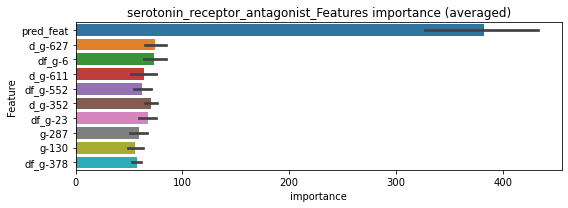

len(train_index) : 2423
len(valid_index) : 808
================================= fold 1/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[853]	training's binary_logloss: 0.000646446	valid_1's binary_logloss: 0.0102465


len(train_index) : 2423
len(valid_index) : 808
================================= fold 2/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000662152	valid_1's binary_logloss: 0.00134326
[2000]	training's binary_logloss: 0.000369119	valid_1's binary_logloss: 0.000736209
[3000]	training's binary_logloss: 0.000278014	valid_1's binary_logloss: 0.00053474
[4000]	training's binary_logloss: 0.000234861	valid_1's binary_logloss: 0.000436376
[5000]	training's binary_logloss: 0.000213017	valid_1's binary_logloss: 0.000385855
[6000]	training's binary_logloss: 0.00019903	valid_1's binary_logloss: 0.00035421
[7000]	training's binary_logloss: 0.000188935	valid_1's binary_logloss: 0.000331365
[8000]	training's binary_logloss: 0.000181293	valid_1's binary_logloss: 0.000314328
Early stopping, best iteration is:
[8191]	training's binary_logloss: 0.000180015	valid_1's binary_logloss: 0.000311247


len(train_index) : 2423
len(valid_index) : 808
================================= fold 3/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000656167	valid_1's binary_logloss: 0.00128467
[2000]	training's binary_logloss: 0.000368198	valid_1's binary_logloss: 0.000733752
[3000]	training's binary_logloss: 0.000277795	valid_1's binary_logloss: 0.000552598
[4000]	training's binary_logloss: 0.000234911	valid_1's binary_logloss: 0.000461355
[5000]	training's binary_logloss: 0.000213049	valid_1's binary_logloss: 0.000414516
[6000]	training's binary_logloss: 0.000199953	valid_1's binary_logloss: 0.000386153
[7000]	training's binary_logloss: 0.000190517	valid_1's binary_logloss: 0.000365581
[8000]	training's binary_logloss: 0.000183724	valid_1's binary_logloss: 0.000351013
Early stopping, best iteration is:
[8247]	training's binary_logloss: 0.000182309	valid_1's binary_logloss: 0.000347882


len(train_index) : 2424
len(valid_index) : 807
================================= fold 4/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0006553	valid_1's binary_logloss: 0.00132824
[2000]	training's binary_logloss: 0.000368157	valid_1's binary_logloss: 0.000780003
[3000]	training's binary_logloss: 0.000278188	valid_1's binary_logloss: 0.000594478
[4000]	training's binary_logloss: 0.000234965	valid_1's binary_logloss: 0.000498686
[5000]	training's binary_logloss: 0.000213093	valid_1's binary_logloss: 0.000449664
[6000]	training's binary_logloss: 0.000199479	valid_1's binary_logloss: 0.000419374
[7000]	training's binary_logloss: 0.000190017	valid_1's binary_logloss: 0.000398789
Early stopping, best iteration is:
[7793]	training's binary_logloss: 0.00018452	valid_1's binary_logloss: 0.000387207


serotonin_receptor_antagonist logloss: 0.0028242834802065476


neg labels: 3289 → selected neg labels: 3285


serotonin_reuptake_inhibitor, len(trt): 44, len(othr): 3285
target_rate: 0.0018477 → Adj_target_rate: 0.0020948
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00341524	valid_1's binary_logloss: 0.0193844
[600]	training's binary_logloss: 0.000681111	valid_1's binary_logloss: 0.0115528
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000563414	valid_1's binary_logloss: 0.0111115
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00351885	valid_1's binary_logloss: 0.0184809
[600]	training's binary_logloss: 0.000694171	valid_1's binary_logloss: 0.0117377
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000585437	valid_1's binary_logloss: 0.0113136
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00387142	valid_1's binary_logloss: 0.0101161
[600]	training's binary_logloss: 0.000727997	valid_1's binary_logloss: 0.00328975
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000590947	valid_1's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0045853, Threshold: 0.0314211, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00185
Num_p_label: 40.0, conf_0:0.02199, conf_1:0.04085
Num_p_label: 40.0, Expected: 7.4, Adj_threshold_1: 0.0314211
Num_p_label: 12.0, Expected: 7.4, Adj_threshold_2: 0.0814211
threshold: 0.0814211, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000947026	valid_1's binary_logloss: 0.0029685
[600]	training's binary_logloss: 0.0002176	valid_1's binary_logloss: 0.00188153
[900]	training's binary_logloss: 0.000165087	valid_1's binary_logloss: 0.00177909
Early stopping, best iteration is:
[968]	training's binary_logloss: 0.00016181	valid_1's binary_logloss: 0.00177334
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000955738	valid_1's binary_logloss: 0.00229581
[600]	training's binary_logloss: 0.000206873	valid_1's binary_logloss: 0.00110939
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000173061	valid_1's binary_logloss: 0.00103275
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000971533	valid_1's binary_logloss: 0.00252287
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.000399537	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.7173883, Threshold: 0.0814211, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0580110 Vs.target_rate: 0.00185
Num_p_label: 231.0, conf_0:0.06514, conf_1:0.09771
Num_p_label: 231.0, Expected: 7.4, Adj_threshold_1: 0.0814211
Num_p_label: 231.0, Expected: 7.4, Adj_threshold_2: 0.1314211
Num_p_label: 231.0, Expected: 7.4, Adj_threshold_3: 0.1814211
Num_p_label: 231.0, Expected: 7.4, Adj_threshold_4: 0.2314211
Num_p_label: 231.0, Expected: 7.4, Adj_threshold_5: 0.2814211
Num_p_label: 230.0, Expected: 7.4, Adj_threshold_6: 0.3314211
Num_p_label: 230.0, Expected: 7.4, Adj_threshold_7: 0.3814211
Num_p_label: 230.0, Expected: 7.4, Adj_threshold_8: 0.4314211
Num_p_label: 224.0, Expected: 7.4, Adj_threshold_9: 0.4814211
Num_p_label: 216.0, Expected: 7.4, Adj_threshold_10: 0.5314211
threshold: 0.5814211, positive_p_label: 199.0/3982, p_label_rate: 0.0499749
positive_y_label: 657.0/3810, y_label_rate: 0.1724409

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000970859	valid_1's binary_logloss: 0.00260197
[600]	training's binary_logloss: 0.000213324	valid_1's binary_logloss: 0.00145007
[900]	training's binary_logloss: 0.000163249	valid_1's binary_logloss: 0.001367
Early stopping, best iteration is:
[1022]	training's binary_logloss: 0.000157777	valid_1's binary_logloss: 0.00135428
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000949179	valid_1's binary_logloss: 0.00226499
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000229736	valid_1's binary_logloss: 0.00106203
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00095813	valid_1's binary_logloss: 0.00266769
[600]	training's binary_logloss: 0.000208312	valid_1's binary_logloss: 0.00177647
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000197523	valid_1's bin

3 / 3 AUC score:1.000
y_Threshold: 0.6929753, Threshold: 0.5814211, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0472125 Vs.target_rate: 0.00185
Num_p_label: 188.0, conf_0:0.50000, conf_1:0.63956
Num_p_label: 188.0, Expected: 7.4, Adj_threshold_1: 0.5814211
Num_p_label: 165.0, Expected: 7.4, Adj_threshold_2: 0.6314211
Num_p_label: 123.0, Expected: 7.4, Adj_threshold_3: 0.6814211
Num_p_label: 89.0, Expected: 7.4, Adj_threshold_4: 0.7314211
Num_p_label: 55.0, Expected: 7.4, Adj_threshold_5: 0.7814211
threshold: 0.7814211, positive_p_label: 55.0/3982, p_label_rate: 0.0138122
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


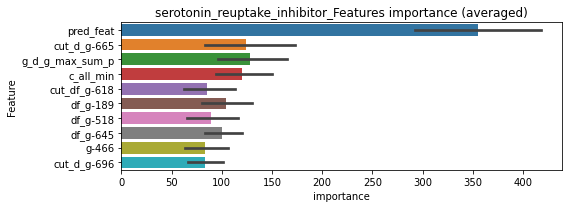

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000511118	valid_1's binary_logloss: 0.00291955
[2000]	training's binary_logloss: 0.000298557	valid_1's binary_logloss: 0.00258414
Early stopping, best iteration is:
[2793]	training's binary_logloss: 0.000247443	valid_1's binary_logloss: 0.00250077


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000524415	valid_1's binary_logloss: 0.00135597
Early stopping, best iteration is:
[1086]	training's binary_logloss: 0.000487716	valid_1's binary_logloss: 0.00132061


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000521754	valid_1's binary_logloss: 0.00169954
[2000]	training's binary_logloss: 0.000305222	valid_1's binary_logloss: 0.001414
[3000]	training's binary_logloss: 0.000241499	valid_1's binary_logloss: 0.00133722
Early stopping, best iteration is:
[3686]	training's binary_logloss: 0.000219366	valid_1's binary_logloss: 0.00130936


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000518512	valid_1's binary_logloss: 0.00241049
[2000]	training's binary_logloss: 0.00030297	valid_1's binary_logloss: 0.00207097
[3000]	training's binary_logloss: 0.000239683	valid_1's binary_logloss: 0.00195832
[4000]	training's binary_logloss: 0.000211517	valid_1's binary_logloss: 0.00191406
Early stopping, best iteration is:
[4120]	training's binary_logloss: 0.000209185	valid_1's binary_logloss: 0.00190795


serotonin_reuptake_inhibitor logloss: 0.0017600777342351404


neg labels: 3289 → selected neg labels: 3283


sigma_receptor_agonist, len(trt): 36, len(othr): 3283
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00233073	valid_1's binary_logloss: 0.0189577
[600]	training's binary_logloss: 0.000532786	valid_1's binary_logloss: 0.0129125
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000512191	valid_1's binary_logloss: 0.0128165
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00252609	valid_1's binary_logloss: 0.00977987
[600]	training's binary_logloss: 0.000561209	valid_1's binary_logloss: 0.00607476
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.00051107	valid_1's binary_logloss: 0.00597679
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00260329	valid_1's binary_logloss: 0.007593
[600]	training's binary_logloss: 0.000568316	valid_1's binary_logloss: 0.00362677
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000515385	valid_1's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0032770, Threshold: 0.0251706, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.01762, conf_1:0.03272
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0251706
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_2: 0.0751706
threshold: 0.0751706, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000782552	valid_1's binary_logloss: 0.00299982
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000249663	valid_1's binary_logloss: 0.00203774
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000812901	valid_1's binary_logloss: 0.00145193
[600]	training's binary_logloss: 0.00021084	valid_1's binary_logloss: 0.000642883
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.000174616	valid_1's binary_logloss: 0.000573665
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000820585	valid_1's binary_logloss: 0.00317935
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000265017	valid_1's binary_logloss: 0.00260922
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000803489	valid_1's binary_logloss: 0.003

2 / 3 AUC score:1.000
y_Threshold: 0.6426342, Threshold: 0.0751706, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0562531 Vs.target_rate: 0.00151
Num_p_label: 224.0, conf_0:0.06014, conf_1:0.09020
Num_p_label: 224.0, Expected: 6.0, Adj_threshold_1: 0.0751706
Num_p_label: 224.0, Expected: 6.0, Adj_threshold_2: 0.1251706
Num_p_label: 224.0, Expected: 6.0, Adj_threshold_3: 0.1751706
Num_p_label: 224.0, Expected: 6.0, Adj_threshold_4: 0.2251706
Num_p_label: 218.0, Expected: 6.0, Adj_threshold_5: 0.2751706
Num_p_label: 216.0, Expected: 6.0, Adj_threshold_6: 0.3251706
Num_p_label: 214.0, Expected: 6.0, Adj_threshold_7: 0.3751706
Num_p_label: 209.0, Expected: 6.0, Adj_threshold_8: 0.4251706
Num_p_label: 199.0, Expected: 6.0, Adj_threshold_9: 0.4751706
Num_p_label: 188.0, Expected: 6.0, Adj_threshold_10: 0.5251706


Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000265357	valid_1's binary_logloss: 0.00271122


threshold: 0.5751706, positive_p_label: 158.0/3982, p_label_rate: 0.0396786
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000802451	valid_1's binary_logloss: 0.0039825
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000227665	valid_1's binary_logloss: 0.00299877
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000821744	valid_1's binary_logloss: 0.00283917
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000269821	valid_1's binary_logloss: 0.00200843
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000813083	valid_1's binary_logloss: 0.00477609
Early stopping, best iteration is:
[335]	training's binary_logloss: 0.000583988	valid_1's binary_logloss: 0.00446872
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000802744	valid_1's binary_logloss: 0.00214699
[600]	training's binary_logloss: 0.000206869	valid_1's binary_logloss: 0.00084

3 / 3 AUC score:1.000
y_Threshold: 0.5520326, Threshold: 0.5751706, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3799
p_label_rate: 0.0236062 Vs.target_rate: 0.00151
Num_p_label: 94.0, conf_0:0.50000, conf_1:0.63269
Num_p_label: 94.0, Expected: 6.0, Adj_threshold_1: 0.5751706
Num_p_label: 65.0, Expected: 6.0, Adj_threshold_2: 0.6251706
Num_p_label: 38.0, Expected: 6.0, Adj_threshold_3: 0.6751706
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_4: 0.7251706
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_5: 0.7751706
threshold: 0.7751706, positive_p_label: 14.0/3982, p_label_rate: 0.0035158


Early stopping, best iteration is:
[791]	training's binary_logloss: 0.000170818	valid_1's binary_logloss: 0.000729632


positive_y_label: 652.0/3799, y_label_rate: 0.1716241


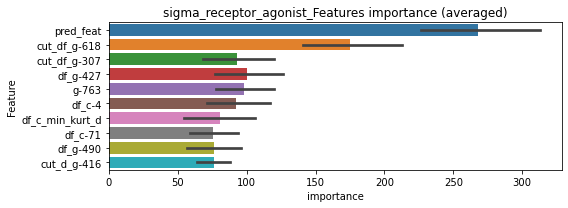

len(train_index) : 2849
len(valid_index) : 950
================================= fold 1/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000502133	valid_1's binary_logloss: 0.0016989
[2000]	training's binary_logloss: 0.000297607	valid_1's binary_logloss: 0.00144837
Early stopping, best iteration is:
[2286]	training's binary_logloss: 0.000275661	valid_1's binary_logloss: 0.00141797


len(train_index) : 2849
len(valid_index) : 950
================================= fold 2/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2849
len(valid_index) : 950
================================= fold 3/4 sigma_receptor_agonist=================================


Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000547532	valid_1's binary_logloss: 0.00176763
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000509143	valid_1's binary_logloss: 0.00264173
[2000]	training's binary_logloss: 0.000298442	valid_1's binary_logloss: 0.00221057
Early stopping, best iteration is:
[2406]	training's binary_logloss: 0.000267913	valid_1's binary_logloss: 0.00213913


len(train_index) : 2850
len(valid_index) : 949
================================= fold 4/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00049933	valid_1's binary_logloss: 0.0024405
Early stopping, best iteration is:
[1900]	training's binary_logloss: 0.000306441	valid_1's binary_logloss: 0.00213267


sigma_receptor_agonist logloss: 0.001864657544867447


neg labels: 3289 → selected neg labels: 3285


sigma_receptor_antagonist, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00323646	valid_1's binary_logloss: 0.0169804
[600]	training's binary_logloss: 0.000631419	valid_1's binary_logloss: 0.0106711
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000520513	valid_1's binary_logloss: 0.0103666
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00319159	valid_1's binary_logloss: 0.0116568
[600]	training's binary_logloss: 0.000618619	valid_1's binary_logloss: 0.00530767
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000513363	valid_1's binary_logloss: 0.00490205
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00350852	valid_1's binary_logloss: 0.00887027
[600]	training's binary_logloss: 0.000654411	valid_1's binary_logloss: 0.00316462
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000511371	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0040840, Threshold: 0.0136460, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.00955, conf_1:0.01774
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0136460
Num_p_label: 3.0, Expected: 6.0, Adj_threshold_2: 0.0636460
threshold: 0.0636460, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000917196	valid_1's binary_logloss: 0.00536426
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000224939	valid_1's binary_logloss: 0.00437692
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000876716	valid_1's binary_logloss: 0.00144944
[600]	training's binary_logloss: 0.000205181	valid_1's binary_logloss: 0.000445728
[900]	training's binary_logloss: 0.000159847	valid_1's binary_logloss: 0.000382215
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000159847	valid_1's binary_logloss: 0.000382215
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000889906	valid_1's binary_logloss: 0.00227589
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000237089	valid_1's binary_logloss: 0.00169554
Training until validation scores don't improve for 30

2 / 3 AUC score:1.000
y_Threshold: 0.6927306, Threshold: 0.0636460, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0534907 Vs.target_rate: 0.00151
Num_p_label: 213.0, conf_0:0.05092, conf_1:0.07638
Num_p_label: 213.0, Expected: 6.0, Adj_threshold_1: 0.0636460
Num_p_label: 212.0, Expected: 6.0, Adj_threshold_2: 0.1136460
Num_p_label: 210.0, Expected: 6.0, Adj_threshold_3: 0.1636460
Num_p_label: 210.0, Expected: 6.0, Adj_threshold_4: 0.2136460
Num_p_label: 210.0, Expected: 6.0, Adj_threshold_5: 0.2636460
Num_p_label: 209.0, Expected: 6.0, Adj_threshold_6: 0.3136460
Num_p_label: 209.0, Expected: 6.0, Adj_threshold_7: 0.3636460
Num_p_label: 209.0, Expected: 6.0, Adj_threshold_8: 0.4136460
Num_p_label: 207.0, Expected: 6.0, Adj_threshold_9: 0.4636460
Num_p_label: 198.0, Expected: 6.0, Adj_threshold_10: 0.5136460
threshold: 0.5636460, positive_p_label: 186.0/3982, p_label_rate: 0.0467102
positive_y_label: 655.0/3806, y_label_rate: 0.1720967

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000901151	valid_1's binary_logloss: 0.00268009
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000254107	valid_1's binary_logloss: 0.00197399
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00091723	valid_1's binary_logloss: 0.00328542
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000280871	valid_1's binary_logloss: 0.0025797
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000927054	valid_1's binary_logloss: 0.00399728
[600]	training's binary_logloss: 0.000217418	valid_1's binary_logloss: 0.00287709
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.00019312	valid_1's binary_logloss: 0.00282339
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000895953	valid_1's binary_logloss: 0.0016120

3 / 3 AUC score:1.000
y_Threshold: 0.5948120, Threshold: 0.5636460, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0238574 Vs.target_rate: 0.00151
Num_p_label: 95.0, conf_0:0.50000, conf_1:0.62001
Num_p_label: 95.0, Expected: 6.0, Adj_threshold_1: 0.5636460
Num_p_label: 67.0, Expected: 6.0, Adj_threshold_2: 0.6136460
Num_p_label: 31.0, Expected: 6.0, Adj_threshold_3: 0.6636460
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_4: 0.7136460
Num_p_label: 10.0, Expected: 6.0, Adj_threshold_5: 0.7636460
threshold: 0.7636460, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


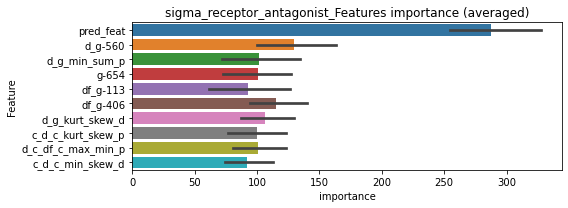

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000513686	valid_1's binary_logloss: 0.00196656
[2000]	training's binary_logloss: 0.000301118	valid_1's binary_logloss: 0.0016994
Early stopping, best iteration is:
[2402]	training's binary_logloss: 0.00027076	valid_1's binary_logloss: 0.00166579


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000522828	valid_1's binary_logloss: 0.00295318
Early stopping, best iteration is:
[1961]	training's binary_logloss: 0.000309333	valid_1's binary_logloss: 0.00261554


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000552102	valid_1's binary_logloss: 0.00401541


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000516923	valid_1's binary_logloss: 0.000838051
[2000]	training's binary_logloss: 0.000302729	valid_1's binary_logloss: 0.000595592
[3000]	training's binary_logloss: 0.000241532	valid_1's binary_logloss: 0.000534565
Early stopping, best iteration is:
[3364]	training's binary_logloss: 0.000229019	valid_1's binary_logloss: 0.000519997


sigma_receptor_antagonist logloss: 0.0022050674699359016


neg labels: 3289 → selected neg labels: 3285


smoothened_receptor_antagonist, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00185112	valid_1's binary_logloss: 0.00436528
[600]	training's binary_logloss: 0.000423946	valid_1's binary_logloss: 0.00161767
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000404745	valid_1's binary_logloss: 0.00158646
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176297	valid_1's binary_logloss: 0.010215
[600]	training's binary_logloss: 0.000408051	valid_1's binary_logloss: 0.0062436
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.00039651	valid_1's binary_logloss: 0.00618607
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00185833	valid_1's binary_logloss: 0.00290774
[600]	training's binary_logloss: 0.000420195	valid_1's binary_logloss: 0.000804178
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000402752	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0025666, Threshold: 0.0073109, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, conf_0:0.00512, conf_1:0.00950
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0073109
Num_p_label: 1.0, Expected: 4.2, Adj_threshold_2: 0.0573109
threshold: 0.0573109, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000690091	valid_1's binary_logloss: 0.000920379
[600]	training's binary_logloss: 0.000193169	valid_1's binary_logloss: 0.000337039
Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000162437	valid_1's binary_logloss: 0.000299896
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000650085	valid_1's binary_logloss: 0.00206919
[600]	training's binary_logloss: 0.000180489	valid_1's binary_logloss: 0.00131499
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00017535	valid_1's binary_logloss: 0.00129566
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000675334	valid_1's binary_logloss: 0.00148922
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000216525	valid_1's binary_logloss: 0.000951228
Training until validation scores don't improve for 30

2 / 3 AUC score:1.000
y_Threshold: 0.7286503, Threshold: 0.0573109, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0452034 Vs.target_rate: 0.00105
Num_p_label: 180.0, conf_0:0.04585, conf_1:0.06877
Num_p_label: 180.0, Expected: 4.2, Adj_threshold_1: 0.0573109
Num_p_label: 180.0, Expected: 4.2, Adj_threshold_2: 0.1073109
Num_p_label: 180.0, Expected: 4.2, Adj_threshold_3: 0.1573109
Num_p_label: 179.0, Expected: 4.2, Adj_threshold_4: 0.2073109
Num_p_label: 179.0, Expected: 4.2, Adj_threshold_5: 0.2573109
Num_p_label: 178.0, Expected: 4.2, Adj_threshold_6: 0.3073109
Num_p_label: 173.0, Expected: 4.2, Adj_threshold_7: 0.3573109
Num_p_label: 161.0, Expected: 4.2, Adj_threshold_8: 0.4073109
Num_p_label: 144.0, Expected: 4.2, Adj_threshold_9: 0.4573109
Num_p_label: 117.0, Expected: 4.2, Adj_threshold_10: 0.5073109


Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000227961	valid_1's binary_logloss: 0.00243572


threshold: 0.5573109, positive_p_label: 86.0/3982, p_label_rate: 0.0215972
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000687102	valid_1's binary_logloss: 0.000886301
[600]	training's binary_logloss: 0.000192429	valid_1's binary_logloss: 0.000313983
Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000162154	valid_1's binary_logloss: 0.000276143
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00066803	valid_1's binary_logloss: 0.00259335
Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000242515	valid_1's binary_logloss: 0.00170179
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000672789	valid_1's binary_logloss: 0.0015607
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000193069	valid_1's binary_logloss: 0.00100986
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000678012	valid_1's binary_logloss: 0.003

3 / 3 AUC score:1.000
y_Threshold: 0.6183264, Threshold: 0.5573109, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0153189 Vs.target_rate: 0.00105
Num_p_label: 61.0, conf_0:0.50000, conf_1:0.61304
Num_p_label: 61.0, Expected: 4.2, Adj_threshold_1: 0.5573109
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_2: 0.6073109
Num_p_label: 25.0, Expected: 4.2, Adj_threshold_3: 0.6573109
Num_p_label: 13.0, Expected: 4.2, Adj_threshold_4: 0.7073109
Num_p_label: 4.0, Expected: 4.2, Adj_threshold_5: 0.7573109


Early stopping, best iteration is:
[428]	training's binary_logloss: 0.000287101	valid_1's binary_logloss: 0.00267827


threshold: 0.7573109, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


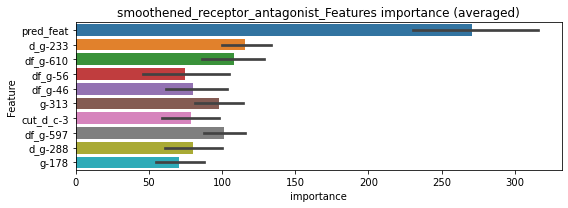

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000465832	valid_1's binary_logloss: 0.000623794
[2000]	training's binary_logloss: 0.000278649	valid_1's binary_logloss: 0.000403475
[3000]	training's binary_logloss: 0.00022561	valid_1's binary_logloss: 0.000337597
[4000]	training's binary_logloss: 0.000200361	valid_1's binary_logloss: 0.000306187
[5000]	training's binary_logloss: 0.000186631	valid_1's binary_logloss: 0.000289442
[6000]	training's binary_logloss: 0.000177733	valid_1's binary_logloss: 0.000279158
[7000]	training's binary_logloss: 0.000171238	valid_1's binary_logloss: 0.000271238
Early stopping, best iteration is:
[7525]	training's binary_logloss: 0.00016887	valid_1's binary_logloss: 0.00026857


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 smoothened_receptor_antagonist=================================


Early stopping, best iteration is:
[716]	training's binary_logloss: 0.00061752	valid_1's binary_logloss: 0.00296358
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00045274	valid_1's binary_logloss: 0.000963933
[2000]	training's binary_logloss: 0.000272825	valid_1's binary_logloss: 0.00077547
Early stopping, best iteration is:
[2835]	training's binary_logloss: 0.000225152	valid_1's binary_logloss: 0.000727305


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


smoothened_receptor_antagonist logloss: 0.001692828601529694


Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000553723	valid_1's binary_logloss: 0.00281137
neg labels: 3289 → selected neg labels: 3261


sodium_channel_inhibitor, len(trt): 267, len(othr): 3261
target_rate: 0.0112119 → Adj_target_rate: 0.0096991
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.039074	valid_1's binary_logloss: 0.242611
Early stopping, best iteration is:
[350]	training's binary_logloss: 0.0281243	valid_1's binary_logloss: 0.24068
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0403348	valid_1's binary_logloss: 0.251473
Early stopping, best iteration is:
[277]	training's binary_logloss: 0.0466888	valid_1's binary_logloss: 0.250972
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0375591	valid_1's binary_logloss: 0.226576
Early stopping, best iteration is:
[325]	training's binary_logloss: 0.0316536	valid_1's binary_logloss: 0.225366
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0368428	valid_1's binary_logloss: 0.211921


1 / 3 AUC score:0.909
y_Threshold: 0.0866409, Threshold: 0.2284706, pos_neg_ratio: 0.8000000
Remove_noisy_data: 401 → Positive_corect_labels: 517/3512
p_label_rate: 0.0100452 Vs.target_rate: 0.01121
Num_p_label: 40.0, conf_0:0.15993, conf_1:0.29701


Early stopping, best iteration is:
[382]	training's binary_logloss: 0.0217058	valid_1's binary_logloss: 0.205921


threshold: 0.2284706, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 517.0/3512, y_label_rate: 0.1472096
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00188415	valid_1's binary_logloss: 0.00502599
[600]	training's binary_logloss: 0.000279905	valid_1's binary_logloss: 0.00142151
[900]	training's binary_logloss: 0.000187967	valid_1's binary_logloss: 0.00115199
Early stopping, best iteration is:
[927]	training's binary_logloss: 0.000184975	valid_1's binary_logloss: 0.00113806
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00187141	valid_1's binary_logloss: 0.00572795
[600]	training's binary_logloss: 0.000274828	valid_1's binary_logloss: 0.00273425
Early stopping, best iteration is:
[774]	training's binary_logloss: 0.000200152	valid_1's binary_logloss: 0.00259124
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00185205	valid_1's binary_logloss: 0.00486489
[600]	training's binary_logloss: 0.000276568	valid_1's binary_logloss: 0.0014367
Early stoppin

2 / 3 AUC score:1.000
y_Threshold: 0.7455915, Threshold: 0.2284706, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000271848	valid_1's binary_logloss: 0.00564043
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000241861	valid_1's binary_logloss: 0.00559116


Remove_noisy_data: 6 → Positive_corect_labels: 514.0/3506
p_label_rate: 0.1029633 Vs.target_rate: 0.01121
Num_p_label: 410.0, conf_0:0.18278, conf_1:0.27416
Num_p_label: 410.0, Expected: 44.6, Adj_threshold_1: 0.2284706
Num_p_label: 410.0, Expected: 44.6, Adj_threshold_2: 0.2784706
Num_p_label: 410.0, Expected: 44.6, Adj_threshold_3: 0.3284706
Num_p_label: 410.0, Expected: 44.6, Adj_threshold_4: 0.3784706
Num_p_label: 410.0, Expected: 44.6, Adj_threshold_5: 0.4284706
Num_p_label: 410.0, Expected: 44.6, Adj_threshold_6: 0.4784706
Num_p_label: 410.0, Expected: 44.6, Adj_threshold_7: 0.5284706
Num_p_label: 410.0, Expected: 44.6, Adj_threshold_8: 0.5784706
Num_p_label: 407.0, Expected: 44.6, Adj_threshold_9: 0.6284706
Num_p_label: 404.0, Expected: 44.6, Adj_threshold_10: 0.6784706
threshold: 0.7284706, positive_p_label: 396.0/3982, p_label_rate: 0.0994475
positive_y_label: 514.0/3506, y_label_rate: 0.1466058
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00194792	valid_1's binary_logloss: 0.00533267
[600]	training's binary_logloss: 0.000293177	valid_1's binary_logloss: 0.00133695
[900]	training's binary_logloss: 0.000197137	valid_1's binary_logloss: 0.0010445
Early stopping, best iteration is:
[939]	training's binary_logloss: 0.000194335	valid_1's binary_logloss: 0.00103415
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00197733	valid_1's binary_logloss: 0.00675755
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000323489	valid_1's binary_logloss: 0.00370438
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00192635	valid_1's binary_logloss: 0.00963043
[600]	training's binary_logloss: 0.000290307	valid_1's binary_logloss: 0.00650513
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000304604	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.6022895, Threshold: 0.7284706, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 511.0/3500
p_label_rate: 0.0735811 Vs.target_rate: 0.01121
Num_p_label: 293.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 293.0, Expected: 44.6, Adj_threshold_1: 0.7284706
Num_p_label: 289.0, Expected: 44.6, Adj_threshold_2: 0.7784706
threshold: 0.7784706, positive_p_label: 289.0/3982, p_label_rate: 0.0725766
positive_y_label: 511.0/3500, y_label_rate: 0.1460000


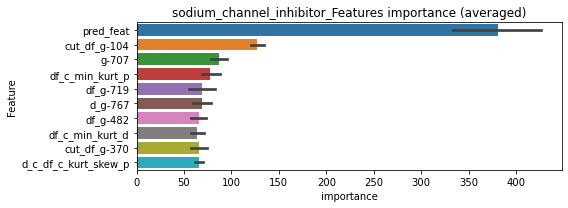

len(train_index) : 2625
len(valid_index) : 875
================================= fold 1/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000642808	valid_1's binary_logloss: 0.00172867
[2000]	training's binary_logloss: 0.000360298	valid_1's binary_logloss: 0.00120749
[3000]	training's binary_logloss: 0.000278134	valid_1's binary_logloss: 0.00104392
[4000]	training's binary_logloss: 0.000240334	valid_1's binary_logloss: 0.000960979
Early stopping, best iteration is:
[4102]	training's binary_logloss: 0.000237861	valid_1's binary_logloss: 0.000956195


len(train_index) : 2625
len(valid_index) : 875
================================= fold 2/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00065337	valid_1's binary_logloss: 0.00624563
Early stopping, best iteration is:
[1496]	training's binary_logloss: 0.000450352	valid_1's binary_logloss: 0.0059561


len(train_index) : 2625
len(valid_index) : 875
================================= fold 3/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00063955	valid_1's binary_logloss: 0.00178706
Early stopping, best iteration is:
[1963]	training's binary_logloss: 0.000364961	valid_1's binary_logloss: 0.0014422


len(train_index) : 2625
len(valid_index) : 875
================================= fold 4/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds


sodium_channel_inhibitor logloss: 0.0041807001552449895


Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000848867	valid_1's binary_logloss: 0.00836555
neg labels: 3289 → selected neg labels: 3282


sphingosine_receptor_agonist, len(trt): 32, len(othr): 3282
target_rate: 0.0013437 → Adj_target_rate: 0.0015980
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00228186	valid_1's binary_logloss: 0.0120504
[600]	training's binary_logloss: 0.000487969	valid_1's binary_logloss: 0.00738957
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000499324	valid_1's binary_logloss: 0.0073581
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00220366	valid_1's binary_logloss: 0.0103317
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000658421	valid_1's binary_logloss: 0.00780311
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00241242	valid_1's binary_logloss: 0.00795882
[600]	training's binary_logloss: 0.000510862	valid_1's binary_logloss: 0.004613
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000470231	valid_1's binary_logloss: 0.00456032
Training until validation scores don't improve for 30 rounds
[30

1 / 3 AUC score:1.000
y_Threshold: 0.0028872, Threshold: 0.0101702, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00134
Num_p_label: 40.0, conf_0:0.00712, conf_1:0.01322
Num_p_label: 40.0, Expected: 5.4, Adj_threshold_1: 0.0101702
Num_p_label: 3.0, Expected: 5.4, Adj_threshold_2: 0.0601702
threshold: 0.0601702, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000762183	valid_1's binary_logloss: 0.00266149
[600]	training's binary_logloss: 0.000201292	valid_1's binary_logloss: 0.00181793
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000166001	valid_1's binary_logloss: 0.00175932
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000757989	valid_1's binary_logloss: 0.00176241
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.00021046	valid_1's binary_logloss: 0.0009714
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000802108	valid_1's binary_logloss: 0.00356882
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000287943	valid_1's binary_logloss: 0.00283489
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00073909	valid_1's binary_logloss: 0.0021792

2 / 3 AUC score:1.000
y_Threshold: 0.5226680, Threshold: 0.0601702, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0522351 Vs.target_rate: 0.00134
Num_p_label: 208.0, conf_0:0.04814, conf_1:0.07220
Num_p_label: 208.0, Expected: 5.4, Adj_threshold_1: 0.0601702
Num_p_label: 208.0, Expected: 5.4, Adj_threshold_2: 0.1101702
Num_p_label: 208.0, Expected: 5.4, Adj_threshold_3: 0.1601702
Num_p_label: 207.0, Expected: 5.4, Adj_threshold_4: 0.2101702
Num_p_label: 206.0, Expected: 5.4, Adj_threshold_5: 0.2601702
Num_p_label: 205.0, Expected: 5.4, Adj_threshold_6: 0.3101702
Num_p_label: 199.0, Expected: 5.4, Adj_threshold_7: 0.3601702
Num_p_label: 188.0, Expected: 5.4, Adj_threshold_8: 0.4101702
Num_p_label: 169.0, Expected: 5.4, Adj_threshold_9: 0.4601702
Num_p_label: 141.0, Expected: 5.4, Adj_threshold_10: 0.5101702


Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000265005	valid_1's binary_logloss: 0.00128491


threshold: 0.5601702, positive_p_label: 112.0/3982, p_label_rate: 0.0281266
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000782586	valid_1's binary_logloss: 0.00105613
[600]	training's binary_logloss: 0.000206744	valid_1's binary_logloss: 0.000252378
[900]	training's binary_logloss: 0.000167092	valid_1's binary_logloss: 0.000185232
Early stopping, best iteration is:
[962]	training's binary_logloss: 0.000163582	valid_1's binary_logloss: 0.00017849
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000788687	valid_1's binary_logloss: 0.00172593
[600]	training's binary_logloss: 0.000206569	valid_1's binary_logloss: 0.00100249
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000189256	valid_1's binary_logloss: 0.000962672
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000783378	valid_1's binary_logloss: 0.00298441
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000256316	valid_1'

3 / 3 AUC score:1.000
y_Threshold: 0.5446102, Threshold: 0.5601702, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0193370 Vs.target_rate: 0.00134
Num_p_label: 77.0, conf_0:0.50000, conf_1:0.61619
Num_p_label: 77.0, Expected: 5.4, Adj_threshold_1: 0.5601702
Num_p_label: 45.0, Expected: 5.4, Adj_threshold_2: 0.6101702
Num_p_label: 31.0, Expected: 5.4, Adj_threshold_3: 0.6601702
Num_p_label: 18.0, Expected: 5.4, Adj_threshold_4: 0.7101702
Num_p_label: 8.0, Expected: 5.4, Adj_threshold_5: 0.7601702
threshold: 0.7601702, positive_p_label: 8.0/3982, p_label_rate: 0.0020090


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000241298	valid_1's binary_logloss: 0.00155964


positive_y_label: 655.0/3804, y_label_rate: 0.1721872


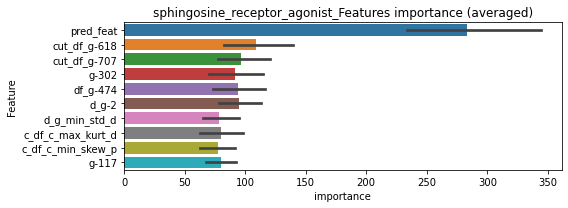

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000497782	valid_1's binary_logloss: 0.000577245
[2000]	training's binary_logloss: 0.00029211	valid_1's binary_logloss: 0.00032823
[3000]	training's binary_logloss: 0.000233519	valid_1's binary_logloss: 0.000253299
[4000]	training's binary_logloss: 0.000207189	valid_1's binary_logloss: 0.00021778
[5000]	training's binary_logloss: 0.000193473	valid_1's binary_logloss: 0.000199079
[6000]	training's binary_logloss: 0.000184337	valid_1's binary_logloss: 0.000186736
[7000]	training's binary_logloss: 0.000178051	valid_1's binary_logloss: 0.00017838
[8000]	training's binary_logloss: 0.000173497	valid_1's binary_logloss: 0.000172214
Early stopping, best iteration is:
[8096]	training's binary_logloss: 0.000173222	valid_1's binary_logloss: 0.000171768


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000494082	valid_1's binary_logloss: 0.00159183
Early stopping, best iteration is:
[1607]	training's binary_logloss: 0.000332671	valid_1's binary_logloss: 0.00141818


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000494712	valid_1's binary_logloss: 0.00394477
Early stopping, best iteration is:
[1420]	training's binary_logloss: 0.000367869	valid_1's binary_logloss: 0.00374349


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


sphingosine_receptor_agonist logloss: 0.002048309409245101


Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000821809	valid_1's binary_logloss: 0.00285591
neg labels: 3289 → selected neg labels: 3278


src_inhibitor, len(trt): 71, len(othr): 3278
target_rate: 0.0029814 → Adj_target_rate: 0.0031461
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00597471	valid_1's binary_logloss: 0.0384101
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.00125455	valid_1's binary_logloss: 0.0277801
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00649505	valid_1's binary_logloss: 0.03233
[600]	training's binary_logloss: 0.00115658	valid_1's binary_logloss: 0.0231708
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.00110217	valid_1's binary_logloss: 0.0229828
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0066859	valid_1's binary_logloss: 0.0338461
[600]	training's binary_logloss: 0.00116716	valid_1's binary_logloss: 0.0240479
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000791607	valid_1's binary_logloss: 0.0232065
Training until validation scores don't improve for 30 rounds
[300]	trainin

1 / 3 AUC score:0.999
y_Threshold: 0.0081796, Threshold: 0.0319917, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.00124646	valid_1's binary_logloss: 0.0530516


Remove_noisy_data: 138 → Positive_corect_labels: 652/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00298
Num_p_label: 40.0, conf_0:0.02239, conf_1:0.04159
Num_p_label: 40.0, Expected: 11.9, Adj_threshold_1: 0.0319917
Num_p_label: 10.0, Expected: 11.9, Adj_threshold_2: 0.0819917
threshold: 0.0819917, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 652.0/3795, y_label_rate: 0.1718050
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124374	valid_1's binary_logloss: 0.00358248
[600]	training's binary_logloss: 0.000245022	valid_1's binary_logloss: 0.00151002
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.00018404	valid_1's binary_logloss: 0.0012657
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125782	valid_1's binary_logloss: 0.00551235
[600]	training's binary_logloss: 0.000246982	valid_1's binary_logloss: 0.00399768
[900]	training's binary_logloss: 0.000183789	valid_1's binary_logloss: 0.00385668
Early stopping, best iteration is:
[1031]	training's binary_logloss: 0.000175719	valid_1's binary_logloss: 0.00383348
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126738	valid_1's binary_logloss: 0.00504003
[600]	training's binary_logloss: 0.000243492	valid_1's binary_logloss: 0.00326088
Early stoppin

2 / 3 AUC score:1.000
y_Threshold: 0.3359999, Threshold: 0.0819917, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 648.0/3787
p_label_rate: 0.0570065 Vs.target_rate: 0.00298
Num_p_label: 227.0, conf_0:0.06559, conf_1:0.09839
Num_p_label: 227.0, Expected: 11.9, Adj_threshold_1: 0.0819917
Num_p_label: 223.0, Expected: 11.9, Adj_threshold_2: 0.1319917
Num_p_label: 222.0, Expected: 11.9, Adj_threshold_3: 0.1819917
Num_p_label: 221.0, Expected: 11.9, Adj_threshold_4: 0.2319917
Num_p_label: 219.0, Expected: 11.9, Adj_threshold_5: 0.2819917
Num_p_label: 201.0, Expected: 11.9, Adj_threshold_6: 0.3319917
Num_p_label: 171.0, Expected: 11.9, Adj_threshold_7: 0.3819917
Num_p_label: 148.0, Expected: 11.9, Adj_threshold_8: 0.4319917


Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000349198	valid_1's binary_logloss: 0.00481751


Num_p_label: 107.0, Expected: 11.9, Adj_threshold_9: 0.4819917
Num_p_label: 78.0, Expected: 11.9, Adj_threshold_10: 0.5319917
threshold: 0.5819917, positive_p_label: 61.0/3982, p_label_rate: 0.0153189
positive_y_label: 648.0/3787, y_label_rate: 0.1711117
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113846	valid_1's binary_logloss: 0.0068591
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000272848	valid_1's binary_logloss: 0.00490421
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119948	valid_1's binary_logloss: 0.00286502
[600]	training's binary_logloss: 0.000233807	valid_1's binary_logloss: 0.00101506
Early stopping, best iteration is:
[794]	training's binary_logloss: 0.000178055	valid_1's binary_logloss: 0.0008657
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121896	valid_1's binary_logloss: 0.00290338
[600]	training's binary_logloss: 0.00023688	valid_1's binary_logloss: 0.00118633
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000199228	valid_1's binary_logloss: 0.00107016
Training until validation scores don't improve for 30 rounds
[

3 / 3 AUC score:1.000
y_Threshold: 0.1716669, Threshold: 0.5819917, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 645.0/3781
p_label_rate: 0.0188348 Vs.target_rate: 0.00298
Num_p_label: 75.0, conf_0:0.50000, conf_1:0.64019
Num_p_label: 75.0, Expected: 11.9, Adj_threshold_1: 0.5819917
Num_p_label: 63.0, Expected: 11.9, Adj_threshold_2: 0.6319917
Num_p_label: 62.0, Expected: 11.9, Adj_threshold_3: 0.6819917
Num_p_label: 58.0, Expected: 11.9, Adj_threshold_4: 0.7319917
Num_p_label: 43.0, Expected: 11.9, Adj_threshold_5: 0.7819917


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000282643	valid_1's binary_logloss: 0.00410848


threshold: 0.7819917, positive_p_label: 43.0/3982, p_label_rate: 0.0107986
positive_y_label: 645.0/3781, y_label_rate: 0.1705898


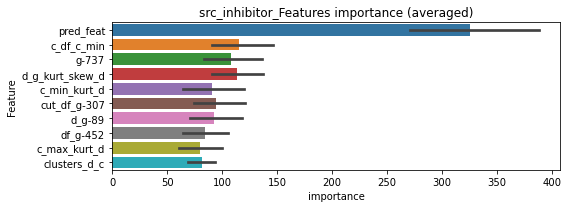

len(train_index) : 2835
len(valid_index) : 946
================================= fold 1/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2836
len(valid_index) : 945
================================= fold 2/4 src_inhibitor=================================


Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000739885	valid_1's binary_logloss: 0.00229048
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00045245	valid_1's binary_logloss: 0.000752943
[2000]	training's binary_logloss: 0.000251264	valid_1's binary_logloss: 0.000420086
[3000]	training's binary_logloss: 0.00018475	valid_1's binary_logloss: 0.000309335
[4000]	training's binary_logloss: 0.000153255	valid_1's binary_logloss: 0.000256859
[5000]	training's binary_logloss: 0.000137184	valid_1's binary_logloss: 0.000230048
[6000]	training's binary_logloss: 0.000126777	valid_1's binary_logloss: 0.000212592
[7000]	training's binary_logloss: 0.000119514	valid_1's binary_logloss: 0.000200405
[8000]	training's binary_logloss: 0.000114575	valid_1's binary_logloss: 0.000192143
[9000]	training's binary_logloss: 0.000111045	valid_1's binary_logloss: 0.00018624
[10000]	training's binary_logloss: 0.000108547	valid_1's binary_loglo

len(train_index) : 2836
len(valid_index) : 945
================================= fold 3/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000451661	valid_1's binary_logloss: 0.000690862
[2000]	training's binary_logloss: 0.000251125	valid_1's binary_logloss: 0.000385781
[3000]	training's binary_logloss: 0.000184693	valid_1's binary_logloss: 0.000284108
[4000]	training's binary_logloss: 0.000153239	valid_1's binary_logloss: 0.000235926
[5000]	training's binary_logloss: 0.000137153	valid_1's binary_logloss: 0.000211256
[6000]	training's binary_logloss: 0.00012674	valid_1's binary_logloss: 0.000195235
[7000]	training's binary_logloss: 0.00011949	valid_1's binary_logloss: 0.000184079
[8000]	training's binary_logloss: 0.000114548	valid_1's binary_logloss: 0.000176479
[9000]	training's binary_logloss: 0.00011103	valid_1's binary_logloss: 0.000171066
[10000]	training's binary_logloss: 0.000108529	valid_1's binary_logloss: 0.000167233
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000108529	valid_1

len(train_index) : 2836
len(valid_index) : 945
================================= fold 4/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000450981	valid_1's binary_logloss: 0.000881585
[2000]	training's binary_logloss: 0.000250951	valid_1's binary_logloss: 0.000494606
[3000]	training's binary_logloss: 0.000184678	valid_1's binary_logloss: 0.00036494
[4000]	training's binary_logloss: 0.000153166	valid_1's binary_logloss: 0.000303094
[5000]	training's binary_logloss: 0.000137056	valid_1's binary_logloss: 0.000271433
[6000]	training's binary_logloss: 0.000126693	valid_1's binary_logloss: 0.00025099
[7000]	training's binary_logloss: 0.000119487	valid_1's binary_logloss: 0.000236774
[8000]	training's binary_logloss: 0.000114549	valid_1's binary_logloss: 0.000227024
[9000]	training's binary_logloss: 0.00011104	valid_1's binary_logloss: 0.000220091
[10000]	training's binary_logloss: 0.000108514	valid_1's binary_logloss: 0.00021512
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000108514	valid_1'

src_inhibitor logloss: 0.0007141485393970128


neg labels: 3289 → selected neg labels: 3275


steroid, len(trt): 79, len(othr): 3275
target_rate: 0.0033174 → Adj_target_rate: 0.0034449
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0079186	valid_1's binary_logloss: 0.0609218
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.0014973	valid_1's binary_logloss: 0.0506834
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00790531	valid_1's binary_logloss: 0.043079
[600]	training's binary_logloss: 0.0013286	valid_1's binary_logloss: 0.0294128
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.000998596	valid_1's binary_logloss: 0.0283848
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00841354	valid_1's binary_logloss: 0.0442223
[600]	training's binary_logloss: 0.00136255	valid_1's binary_logloss: 0.0288295
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000954332	valid_1's binary_logloss: 0.0276801
Training until validation scores don't improve for 30 rounds
[300]	trainin

1 / 3 AUC score:0.999
y_Threshold: 0.0107881, Threshold: 0.2493316, pos_neg_ratio: 0.8000000
Remove_noisy_data: 143 → Positive_corect_labels: 649/3787
p_label_rate: 0.0100452 Vs.target_rate: 0.00332
Num_p_label: 40.0, conf_0:0.17453, conf_1:0.32413
Num_p_label: 40.0, Expected: 13.2, Adj_threshold_1: 0.2493316
Num_p_label: 32.0, Expected: 13.2, Adj_threshold_2: 0.2993316
Num_p_label: 29.0, Expected: 13.2, Adj_threshold_3: 0.3493316
Num_p_label: 25.0, Expected: 13.2, Adj_threshold_4: 0.3993316
Num_p_label: 20.0, Expected: 13.2, Adj_threshold_5: 0.4493316
Num_p_label: 14.0, Expected: 13.2, Adj_threshold_6: 0.4993316
threshold: 0.4993316, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 649.0/3787, y_label_rate: 0.1713758
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131676	valid_1's binary_logloss: 0.00677523
[600]	training's binary_logloss: 0.000240667	valid_1's binary_logloss: 0.00495136
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000225037	valid_1's binary_logloss: 0.00486502
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00129191	valid_1's binary_logloss: 0.00535389
[600]	training's binary_logloss: 0.000237639	valid_1's binary_logloss: 0.00367122
Early stopping, best iteration is:
[855]	training's binary_logloss: 0.000176362	valid_1's binary_logloss: 0.00354677
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134867	valid_1's binary_logloss: 0.0049271
Early stopping, best iteration is:
[402]	training's binary_logloss: 0.00056039	valid_1's binary_logloss: 0.00390461
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:1.000
y_Threshold: 0.1836060, Threshold: 0.4993316, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 645.0/3779
p_label_rate: 0.0273732 Vs.target_rate: 0.00332
Num_p_label: 109.0, conf_0:0.39947, conf_1:0.59920
Num_p_label: 109.0, Expected: 13.2, Adj_threshold_1: 0.4993316
Num_p_label: 109.0, Expected: 13.2, Adj_threshold_2: 0.5493316
Num_p_label: 109.0, Expected: 13.2, Adj_threshold_3: 0.5993316
Num_p_label: 109.0, Expected: 13.2, Adj_threshold_4: 0.6493316
Num_p_label: 107.0, Expected: 13.2, Adj_threshold_5: 0.6993316
Num_p_label: 107.0, Expected: 13.2, Adj_threshold_6: 0.7493316
Num_p_label: 107.0, Expected: 13.2, Adj_threshold_7: 0.7993316
threshold: 0.7993316, positive_p_label: 107.0/3982, p_label_rate: 0.0268709
positive_y_label: 645.0/3779, y_label_rate: 0.1706801
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120988	valid_1's binary_logloss: 0.00297901
[600]	training's binary_logloss: 0.000212861	valid_1's binary_logloss: 0.00119096
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.000180592	valid_1's binary_logloss: 0.00110035
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108458	valid_1's binary_logloss: 0.00204516
[600]	training's binary_logloss: 0.000165559	valid_1's binary_logloss: 0.00033374
[900]	training's binary_logloss: 0.000107938	valid_1's binary_logloss: 0.00021846
[1200]	training's binary_logloss: 0.000101763	valid_1's binary_logloss: 0.000206029
Early stopping, best iteration is:
[1249]	training's binary_logloss: 0.000101211	valid_1's binary_logloss: 0.00020484
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00109497	valid_1's binary_logloss: 0.00191901
[600]	tra

3 / 3 AUC score:1.000
y_Threshold: 0.1288794, Threshold: 0.7993316, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 645.0/3779
p_label_rate: 0.0313913 Vs.target_rate: 0.00332
Num_p_label: 125.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 125.0, Expected: 13.2, Adj_threshold_1: 0.7993316
threshold: 0.7993316, positive_p_label: 125.0/3982, p_label_rate: 0.0313913


Early stopping, best iteration is:
[1136]	training's binary_logloss: 0.000102403	valid_1's binary_logloss: 0.000218882


positive_y_label: 645.0/3779, y_label_rate: 0.1706801


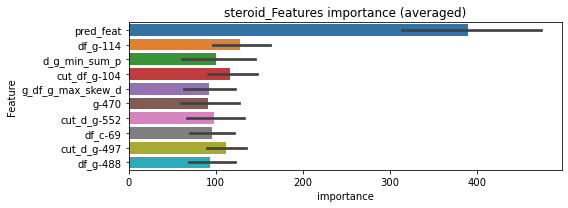

len(train_index) : 2834
len(valid_index) : 945
================================= fold 1/4 steroid=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2834
len(valid_index) : 945
================================= fold 2/4 steroid=================================


Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000778693	valid_1's binary_logloss: 0.0138107
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000455814	valid_1's binary_logloss: 0.00072879
[2000]	training's binary_logloss: 0.000252258	valid_1's binary_logloss: 0.0004047
[3000]	training's binary_logloss: 0.00018524	valid_1's binary_logloss: 0.000297499
[4000]	training's binary_logloss: 0.00015358	valid_1's binary_logloss: 0.00024685
[5000]	training's binary_logloss: 0.000137414	valid_1's binary_logloss: 0.000220958
[6000]	training's binary_logloss: 0.000126965	valid_1's binary_logloss: 0.000204153
[7000]	training's binary_logloss: 0.000119706	valid_1's binary_logloss: 0.000192484
[8000]	training's binary_logloss: 0.000114713	valid_1's binary_logloss: 0.000184455
[9000]	training's binary_logloss: 0.000111169	valid_1's binary_logloss: 0.000178755
[10000]	training's binary_logloss: 0.000108672	valid_1's binary_logloss: 

len(train_index) : 2834
len(valid_index) : 945
================================= fold 3/4 steroid=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0004555	valid_1's binary_logloss: 0.000694166
[2000]	training's binary_logloss: 0.000252156	valid_1's binary_logloss: 0.000385855
[3000]	training's binary_logloss: 0.000185167	valid_1's binary_logloss: 0.000283705
[4000]	training's binary_logloss: 0.000153566	valid_1's binary_logloss: 0.000235522
[5000]	training's binary_logloss: 0.000137423	valid_1's binary_logloss: 0.000210883
[6000]	training's binary_logloss: 0.000126948	valid_1's binary_logloss: 0.000194816
[7000]	training's binary_logloss: 0.000119658	valid_1's binary_logloss: 0.000183625
[8000]	training's binary_logloss: 0.000114695	valid_1's binary_logloss: 0.000176021
[9000]	training's binary_logloss: 0.000111164	valid_1's binary_logloss: 0.000170601
[10000]	training's binary_logloss: 0.00010868	valid_1's binary_logloss: 0.000166823
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.00010868	valid_1'

len(train_index) : 2835
len(valid_index) : 944
================================= fold 4/4 steroid=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000455188	valid_1's binary_logloss: 0.000728044
[2000]	training's binary_logloss: 0.000252065	valid_1's binary_logloss: 0.000404388
[3000]	training's binary_logloss: 0.000185165	valid_1's binary_logloss: 0.000297356
[4000]	training's binary_logloss: 0.000153466	valid_1's binary_logloss: 0.000246585
[5000]	training's binary_logloss: 0.000137286	valid_1's binary_logloss: 0.000220656
[6000]	training's binary_logloss: 0.000126853	valid_1's binary_logloss: 0.000203905
[7000]	training's binary_logloss: 0.000119595	valid_1's binary_logloss: 0.000192242
[8000]	training's binary_logloss: 0.000114638	valid_1's binary_logloss: 0.000184288
[9000]	training's binary_logloss: 0.000111121	valid_1's binary_logloss: 0.000178639
[10000]	training's binary_logloss: 0.000108599	valid_1's binary_logloss: 0.000174599
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000108599	vali

steroid logloss: 0.0035826251832298873


neg labels: 3289 → selected neg labels: 3287


syk_inhibitor, len(trt): 19, len(othr): 3287
target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00147522	valid_1's binary_logloss: 0.00251261
[600]	training's binary_logloss: 0.000393138	valid_1's binary_logloss: 0.000944628
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000393138	valid_1's binary_logloss: 0.000944628
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138084	valid_1's binary_logloss: 0.00453641
[600]	training's binary_logloss: 0.000386749	valid_1's binary_logloss: 0.00217758
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000386749	valid_1's binary_logloss: 0.00217758
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00143559	valid_1's binary_logloss: 0.00266511
[600]	training's binary_logloss: 0.000392951	valid_1's binary_logloss: 0.000915574
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000392951	valid_1's b

1 / 3 AUC score:1.000
y_Threshold: 0.0020350, Threshold: 0.0062056, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, conf_0:0.00434, conf_1:0.00807
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0062056
Num_p_label: 0.0, Expected: 3.2, Adj_threshold_2: 0.0562056
threshold: 0.0562056, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000610804	valid_1's binary_logloss: 0.000624616
[600]	training's binary_logloss: 0.000182871	valid_1's binary_logloss: 0.000159481
[900]	training's binary_logloss: 0.000148245	valid_1's binary_logloss: 0.000118245
Early stopping, best iteration is:
[1008]	training's binary_logloss: 0.000144519	valid_1's binary_logloss: 0.000113828
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000573027	valid_1's binary_logloss: 0.00194823
[600]	training's binary_logloss: 0.000170543	valid_1's binary_logloss: 0.00146597
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000146432	valid_1's binary_logloss: 0.00144107
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0005941	valid_1's binary_logloss: 0.00108788
[600]	training's binary_logloss: 0.000176412	valid_1's binary_logloss: 0.000563645
[900]

2 / 3 AUC score:1.000
y_Threshold: 0.4977256, Threshold: 0.0562056, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0444500 Vs.target_rate: 0.00080
Num_p_label: 177.0, conf_0:0.04496, conf_1:0.06745
Num_p_label: 177.0, Expected: 3.2, Adj_threshold_1: 0.0562056
Num_p_label: 177.0, Expected: 3.2, Adj_threshold_2: 0.1062056
Num_p_label: 177.0, Expected: 3.2, Adj_threshold_3: 0.1562056
Num_p_label: 172.0, Expected: 3.2, Adj_threshold_4: 0.2062056
Num_p_label: 150.0, Expected: 3.2, Adj_threshold_5: 0.2562056
Num_p_label: 117.0, Expected: 3.2, Adj_threshold_6: 0.3062056
Num_p_label: 91.0, Expected: 3.2, Adj_threshold_7: 0.3562056
Num_p_label: 68.0, Expected: 3.2, Adj_threshold_8: 0.4062056
Num_p_label: 44.0, Expected: 3.2, Adj_threshold_9: 0.4562056
Num_p_label: 27.0, Expected: 3.2, Adj_threshold_10: 0.5062056
threshold: 0.5562056, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
====

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000609125	valid_1's binary_logloss: 0.000616503
[600]	training's binary_logloss: 0.000181177	valid_1's binary_logloss: 0.000156863
[900]	training's binary_logloss: 0.000147699	valid_1's binary_logloss: 0.000117323
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000147258	valid_1's binary_logloss: 0.000116806
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000570603	valid_1's binary_logloss: 0.00218365
[600]	training's binary_logloss: 0.000171642	valid_1's binary_logloss: 0.00159658
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000164859	valid_1's binary_logloss: 0.00158751
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000593228	valid_1's binary_logloss: 0.000948844
[600]	training's binary_logloss: 0.000174359	valid_1's binary_logloss: 0.00043262
Earl

3 / 3 AUC score:1.000
y_Threshold: 0.4711202, Threshold: 0.5562056, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0050226 Vs.target_rate: 0.00080
Num_p_label: 20.0, conf_0:0.50000, conf_1:0.61183
Num_p_label: 20.0, Expected: 3.2, Adj_threshold_1: 0.5562056
Num_p_label: 13.0, Expected: 3.2, Adj_threshold_2: 0.6062056
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_3: 0.6562056
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_4: 0.7062056
threshold: 0.7062056, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000145581	valid_1's binary_logloss: 0.000667595


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


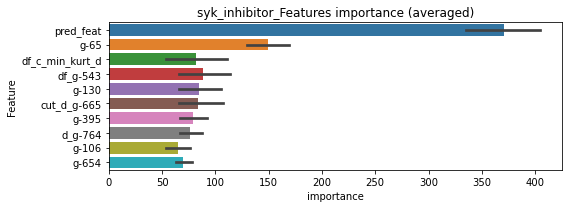

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000430398	valid_1's binary_logloss: 0.000397517
[2000]	training's binary_logloss: 0.00026611	valid_1's binary_logloss: 0.000233955
[3000]	training's binary_logloss: 0.000216608	valid_1's binary_logloss: 0.000180928
[4000]	training's binary_logloss: 0.000191717	valid_1's binary_logloss: 0.000153803
[5000]	training's binary_logloss: 0.000178521	valid_1's binary_logloss: 0.00013922
[6000]	training's binary_logloss: 0.00016986	valid_1's binary_logloss: 0.00012954
[7000]	training's binary_logloss: 0.000163397	valid_1's binary_logloss: 0.000122274
[8000]	training's binary_logloss: 0.000159178	valid_1's binary_logloss: 0.000117531
[9000]	training's binary_logloss: 0.000155793	valid_1's binary_logloss: 0.00011374
Early stopping, best iteration is:
[9304]	training's binary_logloss: 0.000155003	valid_1's binary_logloss: 0.000112863


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000424105	valid_1's binary_logloss: 0.00211539
[2000]	training's binary_logloss: 0.000261063	valid_1's binary_logloss: 0.00187686
Early stopping, best iteration is:
[2809]	training's binary_logloss: 0.000218579	valid_1's binary_logloss: 0.00181589


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000426911	valid_1's binary_logloss: 0.000889536
[2000]	training's binary_logloss: 0.000263599	valid_1's binary_logloss: 0.000721852
[3000]	training's binary_logloss: 0.000214128	valid_1's binary_logloss: 0.000654024
Early stopping, best iteration is:
[3361]	training's binary_logloss: 0.00020285	valid_1's binary_logloss: 0.000635333


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000430023	valid_1's binary_logloss: 0.00100127
[2000]	training's binary_logloss: 0.000262281	valid_1's binary_logloss: 0.000762766
Early stopping, best iteration is:
[2294]	training's binary_logloss: 0.000243566	valid_1's binary_logloss: 0.00073493


syk_inhibitor logloss: 0.0008254037427808546


neg labels: 3289 → selected neg labels: 3278


tachykinin_antagonist, len(trt): 60, len(othr): 3278
target_rate: 0.0025195 → Adj_target_rate: 0.0027266
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00619655	valid_1's binary_logloss: 0.0291327
[600]	training's binary_logloss: 0.00101956	valid_1's binary_logloss: 0.0158407
Early stopping, best iteration is:
[791]	training's binary_logloss: 0.00069466	valid_1's binary_logloss: 0.0147538
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00647553	valid_1's binary_logloss: 0.0228894
[600]	training's binary_logloss: 0.00104025	valid_1's binary_logloss: 0.010391
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.000670514	valid_1's binary_logloss: 0.00925184
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00652434	valid_1's binary_logloss: 0.0258547
[600]	training's binary_logloss: 0.00104811	valid_1's binary_logloss: 0.0143341
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000679442	valid_1's binary_logloss: 

1 / 3 AUC score:1.000
y_Threshold: 0.0066003, Threshold: 0.0175707, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, conf_0:0.01230, conf_1:0.02284
Num_p_label: 40.0, Expected: 10.0, Adj_threshold_1: 0.0175707
Num_p_label: 2.0, Expected: 10.0, Adj_threshold_2: 0.0675707
threshold: 0.0675707, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 655.0/3801, y_label_rate: 0.1723231
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123769	valid_1's binary_logloss: 0.0027678
[600]	training's binary_logloss: 0.000236973	valid_1's binary_logloss: 0.000976036
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000195952	valid_1's binary_logloss: 0.000895357
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124268	valid_1's binary_logloss: 0.00539499
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000322873	valid_1's binary_logloss: 0.00426322
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125458	valid_1's binary_logloss: 0.00242253
[600]	training's binary_logloss: 0.000242362	valid_1's binary_logloss: 0.0010251
[900]	training's binary_logloss: 0.000178377	valid_1's binary_logloss: 0.000915386
Early stopping, best iteration is:
[1030]	training's binary_logloss: 0.000171155	valid_1's bi

2 / 3 AUC score:1.000
y_Threshold: 0.6648407, Threshold: 0.0675707, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[808]	training's binary_logloss: 0.00017119	valid_1's binary_logloss: 0.00330724


Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3799
p_label_rate: 0.0434455 Vs.target_rate: 0.00252
Num_p_label: 173.0, conf_0:0.05406, conf_1:0.08108
Num_p_label: 173.0, Expected: 10.0, Adj_threshold_1: 0.0675707
Num_p_label: 172.0, Expected: 10.0, Adj_threshold_2: 0.1175707
Num_p_label: 164.0, Expected: 10.0, Adj_threshold_3: 0.1675707
Num_p_label: 163.0, Expected: 10.0, Adj_threshold_4: 0.2175707
Num_p_label: 163.0, Expected: 10.0, Adj_threshold_5: 0.2675707
Num_p_label: 163.0, Expected: 10.0, Adj_threshold_6: 0.3175707
Num_p_label: 162.0, Expected: 10.0, Adj_threshold_7: 0.3675707
Num_p_label: 160.0, Expected: 10.0, Adj_threshold_8: 0.4175707
Num_p_label: 159.0, Expected: 10.0, Adj_threshold_9: 0.4675707
Num_p_label: 153.0, Expected: 10.0, Adj_threshold_10: 0.5175707
threshold: 0.5675707, positive_p_label: 143.0/3982, p_label_rate: 0.0359116
positive_y_label: 654.0/3799, y_label_rate: 0.1721506
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124187	valid_1's binary_logloss: 0.00480998
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000285216	valid_1's binary_logloss: 0.00331946
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122445	valid_1's binary_logloss: 0.00859955
Early stopping, best iteration is:
[374]	training's binary_logloss: 0.00062626	valid_1's binary_logloss: 0.00804695
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120323	valid_1's binary_logloss: 0.00232616
[600]	training's binary_logloss: 0.000237505	valid_1's binary_logloss: 0.000729852
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000209562	valid_1's binary_logloss: 0.000650467
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121302	valid_1's binary_logloss: 0.0026010

3 / 3 AUC score:1.000


[600]	training's binary_logloss: 0.000233338	valid_1's binary_logloss: 0.00110481
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000212006	valid_1's binary_logloss: 0.0010638


y_Threshold: 0.5537704, Threshold: 0.5675707, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3795
p_label_rate: 0.0271220 Vs.target_rate: 0.00252
Num_p_label: 108.0, conf_0:0.50000, conf_1:0.62433
Num_p_label: 108.0, Expected: 10.0, Adj_threshold_1: 0.5675707
Num_p_label: 78.0, Expected: 10.0, Adj_threshold_2: 0.6175707
Num_p_label: 55.0, Expected: 10.0, Adj_threshold_3: 0.6675707
Num_p_label: 24.0, Expected: 10.0, Adj_threshold_4: 0.7175707
Num_p_label: 11.0, Expected: 10.0, Adj_threshold_5: 0.7675707
threshold: 0.7675707, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 652.0/3795, y_label_rate: 0.1718050


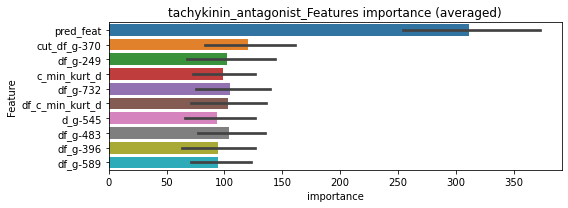

len(train_index) : 2846
len(valid_index) : 949
================================= fold 1/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000552485	valid_1's binary_logloss: 0.00545265
Early stopping, best iteration is:
[1150]	training's binary_logloss: 0.000490936	valid_1's binary_logloss: 0.00530972


len(train_index) : 2846
len(valid_index) : 949
================================= fold 2/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 949
================================= fold 3/4 tachykinin_antagonist=================================


Early stopping, best iteration is:
[543]	training's binary_logloss: 0.00100166	valid_1's binary_logloss: 0.00515607
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000558216	valid_1's binary_logloss: 0.00351728
Early stopping, best iteration is:
[1338]	training's binary_logloss: 0.000430552	valid_1's binary_logloss: 0.00333057


len(train_index) : 2847
len(valid_index) : 948
================================= fold 4/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000560232	valid_1's binary_logloss: 0.0010941
[2000]	training's binary_logloss: 0.000318957	valid_1's binary_logloss: 0.000782132
Early stopping, best iteration is:
[2345]	training's binary_logloss: 0.000289402	valid_1's binary_logloss: 0.000746646


tachykinin_antagonist logloss: 0.003636549589559499


neg labels: 3289 → selected neg labels: 3285


tgf-beta_receptor_inhibitor, len(trt): 30, len(othr): 3285
target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00249519	valid_1's binary_logloss: 0.00812803
[600]	training's binary_logloss: 0.000546117	valid_1's binary_logloss: 0.00362602
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000487197	valid_1's binary_logloss: 0.00345681
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0023165	valid_1's binary_logloss: 0.00778709
[600]	training's binary_logloss: 0.000534761	valid_1's binary_logloss: 0.00366452
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000489429	valid_1's binary_logloss: 0.00355432
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00248108	valid_1's binary_logloss: 0.0052463
[600]	training's binary_logloss: 0.000551523	valid_1's binary_logloss: 0.0015765
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.00050211	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0039342, Threshold: 0.0145199, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, conf_0:0.01016, conf_1:0.01888
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0145199
Num_p_label: 3.0, Expected: 5.0, Adj_threshold_2: 0.0645199


Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000656585	valid_1's binary_logloss: 0.00711579


threshold: 0.0645199, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000789858	valid_1's binary_logloss: 0.00183785
[600]	training's binary_logloss: 0.000199925	valid_1's binary_logloss: 0.000978195
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000175029	valid_1's binary_logloss: 0.000946077
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000772531	valid_1's binary_logloss: 0.00147891
[600]	training's binary_logloss: 0.000194787	valid_1's binary_logloss: 0.000656934
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.00016042	valid_1's binary_logloss: 0.000596824
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000772735	valid_1's binary_logloss: 0.0021282
Early stopping, best iteration is:
[405]	training's binary_logloss: 0.000352241	valid_1's binary_logloss: 0.00174213
Training until validation scores don't improve for 30 

2 / 3 AUC score:1.000
y_Threshold: 0.6695592, Threshold: 0.0645199, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0582622 Vs.target_rate: 0.00126
Num_p_label: 232.0, conf_0:0.05162, conf_1:0.07742
Num_p_label: 232.0, Expected: 5.0, Adj_threshold_1: 0.0645199
Num_p_label: 232.0, Expected: 5.0, Adj_threshold_2: 0.1145199
Num_p_label: 230.0, Expected: 5.0, Adj_threshold_3: 0.1645199
Num_p_label: 230.0, Expected: 5.0, Adj_threshold_4: 0.2145199
Num_p_label: 229.0, Expected: 5.0, Adj_threshold_5: 0.2645199
Num_p_label: 228.0, Expected: 5.0, Adj_threshold_6: 0.3145199
Num_p_label: 226.0, Expected: 5.0, Adj_threshold_7: 0.3645199
Num_p_label: 211.0, Expected: 5.0, Adj_threshold_8: 0.4145199
Num_p_label: 179.0, Expected: 5.0, Adj_threshold_9: 0.4645199
Num_p_label: 147.0, Expected: 5.0, Adj_threshold_10: 0.5145199
threshold: 0.5645199, positive_p_label: 111.0/3982, p_label_rate: 0.0278754


Early stopping, best iteration is:
[433]	training's binary_logloss: 0.000311488	valid_1's binary_logloss: 0.00286556


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000781048	valid_1's binary_logloss: 0.00125837
[600]	training's binary_logloss: 0.000200431	valid_1's binary_logloss: 0.000381393
[900]	training's binary_logloss: 0.000158635	valid_1's binary_logloss: 0.000320206
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000158575	valid_1's binary_logloss: 0.000319915
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000772309	valid_1's binary_logloss: 0.00104324
[600]	training's binary_logloss: 0.000200698	valid_1's binary_logloss: 0.000323377
[900]	training's binary_logloss: 0.000158555	valid_1's binary_logloss: 0.000269012
Early stopping, best iteration is:
[953]	training's binary_logloss: 0.000155452	valid_1's binary_logloss: 0.000262983
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000796724	valid_1's binary_logloss: 0.00255023
Ear

3 / 3 AUC score:1.000
y_Threshold: 0.4377175, Threshold: 0.5645199, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0143144 Vs.target_rate: 0.00126
Num_p_label: 57.0, conf_0:0.50000, conf_1:0.62097
Num_p_label: 57.0, Expected: 5.0, Adj_threshold_1: 0.5645199
Num_p_label: 29.0, Expected: 5.0, Adj_threshold_2: 0.6145199
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_3: 0.6645199
Num_p_label: 6.0, Expected: 5.0, Adj_threshold_4: 0.7145199


[900]	training's binary_logloss: 0.000156884	valid_1's binary_logloss: 0.000338756
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.00015738	valid_1's binary_logloss: 0.000337721


threshold: 0.7145199, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


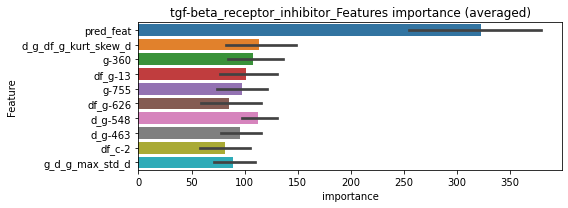

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000484667	valid_1's binary_logloss: 0.000820615
[2000]	training's binary_logloss: 0.000289218	valid_1's binary_logloss: 0.000563921
[3000]	training's binary_logloss: 0.000232645	valid_1's binary_logloss: 0.000480783
[4000]	training's binary_logloss: 0.000205804	valid_1's binary_logloss: 0.000446322
[5000]	training's binary_logloss: 0.000191316	valid_1's binary_logloss: 0.000424072
Early stopping, best iteration is:
[5332]	training's binary_logloss: 0.00018785	valid_1's binary_logloss: 0.00041923


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000485513	valid_1's binary_logloss: 0.000566957
[2000]	training's binary_logloss: 0.000290711	valid_1's binary_logloss: 0.000343321
[3000]	training's binary_logloss: 0.000233749	valid_1's binary_logloss: 0.000274532
[4000]	training's binary_logloss: 0.000206929	valid_1's binary_logloss: 0.000241824
[5000]	training's binary_logloss: 0.000192462	valid_1's binary_logloss: 0.000224157
[6000]	training's binary_logloss: 0.000182486	valid_1's binary_logloss: 0.000212212
[7000]	training's binary_logloss: 0.000175451	valid_1's binary_logloss: 0.000203685
[8000]	training's binary_logloss: 0.000170308	valid_1's binary_logloss: 0.000197743
Early stopping, best iteration is:
[8843]	training's binary_logloss: 0.000166904	valid_1's binary_logloss: 0.000193549


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952


Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000562033	valid_1's binary_logloss: 0.00562653


================================= fold 4/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000485029	valid_1's binary_logloss: 0.000984703
[2000]	training's binary_logloss: 0.000290157	valid_1's binary_logloss: 0.000734192
Early stopping, best iteration is:
[2605]	training's binary_logloss: 0.000248885	valid_1's binary_logloss: 0.0006725


tgf-beta_receptor_inhibitor logloss: 0.0017280040623605286


neg labels: 3289 → selected neg labels: 3286


thrombin_inhibitor, len(trt): 19, len(othr): 3286
target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134273	valid_1's binary_logloss: 0.00408703
[600]	training's binary_logloss: 0.000370033	valid_1's binary_logloss: 0.00209436
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000370033	valid_1's binary_logloss: 0.00209436
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131321	valid_1's binary_logloss: 0.0064816
[600]	training's binary_logloss: 0.000371134	valid_1's binary_logloss: 0.00412343
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000366916	valid_1's binary_logloss: 0.00409398
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132866	valid_1's binary_logloss: 0.00265379
[600]	training's binary_logloss: 0.000373669	valid_1's binary_logloss: 0.000952079
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000373057	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0023077, Threshold: 0.0084515, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, conf_0:0.00592, conf_1:0.01099
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0084515
Num_p_label: 0.0, Expected: 3.2, Adj_threshold_2: 0.0584515
threshold: 0.0584515, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000559532	valid_1's binary_logloss: 0.00217361
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.00028824	valid_1's binary_logloss: 0.00189654
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000547623	valid_1's binary_logloss: 0.00213019
[600]	training's binary_logloss: 0.000175783	valid_1's binary_logloss: 0.00147982
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000175021	valid_1's binary_logloss: 0.00147448
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000566444	valid_1's binary_logloss: 0.000612043
[600]	training's binary_logloss: 0.000176782	valid_1's binary_logloss: 0.000177319
[900]	training's binary_logloss: 0.000147905	valid_1's binary_logloss: 0.000140933
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000147905	valid_1's

2 / 3 AUC score:1.000
y_Threshold: 0.6204554, Threshold: 0.0584515, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0454545 Vs.target_rate: 0.00080
Num_p_label: 181.0, conf_0:0.04676, conf_1:0.07014
Num_p_label: 181.0, Expected: 3.2, Adj_threshold_1: 0.0584515
Num_p_label: 181.0, Expected: 3.2, Adj_threshold_2: 0.1084515
Num_p_label: 179.0, Expected: 3.2, Adj_threshold_3: 0.1584515
Num_p_label: 179.0, Expected: 3.2, Adj_threshold_4: 0.2084515
Num_p_label: 178.0, Expected: 3.2, Adj_threshold_5: 0.2584515
Num_p_label: 177.0, Expected: 3.2, Adj_threshold_6: 0.3084515
Num_p_label: 173.0, Expected: 3.2, Adj_threshold_7: 0.3584515
Num_p_label: 167.0, Expected: 3.2, Adj_threshold_8: 0.4084515
Num_p_label: 161.0, Expected: 3.2, Adj_threshold_9: 0.4584515
Num_p_label: 149.0, Expected: 3.2, Adj_threshold_10: 0.5084515


Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000148033	valid_1's binary_logloss: 0.000236981


threshold: 0.5584515, positive_p_label: 134.0/3982, p_label_rate: 0.0336514
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000560354	valid_1's binary_logloss: 0.00103427
[600]	training's binary_logloss: 0.000182373	valid_1's binary_logloss: 0.000495572
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000172489	valid_1's binary_logloss: 0.000474739
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000572428	valid_1's binary_logloss: 0.00226246
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000231975	valid_1's binary_logloss: 0.00177975
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000580221	valid_1's binary_logloss: 0.000800329
[600]	training's binary_logloss: 0.000185256	valid_1's binary_logloss: 0.000364628
[900]	training's binary_logloss: 0.000157085	valid_1's binary_logloss: 0.00033477
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000157085	valid_1

3 / 3 AUC score:1.000
y_Threshold: 0.4847611, Threshold: 0.5584515, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0123054 Vs.target_rate: 0.00080
Num_p_label: 49.0, conf_0:0.50000, conf_1:0.61430
Num_p_label: 49.0, Expected: 3.2, Adj_threshold_1: 0.5584515
Num_p_label: 32.0, Expected: 3.2, Adj_threshold_2: 0.6084515
Num_p_label: 22.0, Expected: 3.2, Adj_threshold_3: 0.6584515
Num_p_label: 14.0, Expected: 3.2, Adj_threshold_4: 0.7084515
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_5: 0.7584515
threshold: 0.7584515, positive_p_label: 9.0/3982, p_label_rate: 0.0022602


[600]	training's binary_logloss: 0.000184401	valid_1's binary_logloss: 0.00227253
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000185454	valid_1's binary_logloss: 0.00226887


positive_y_label: 655.0/3807, y_label_rate: 0.1720515


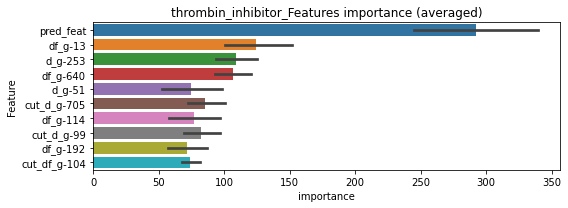

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000440299	valid_1's binary_logloss: 0.00182448
Early stopping, best iteration is:
[1677]	training's binary_logloss: 0.000298279	valid_1's binary_logloss: 0.00163602


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000444043	valid_1's binary_logloss: 0.000826181
[2000]	training's binary_logloss: 0.000272293	valid_1's binary_logloss: 0.000621903
Early stopping, best iteration is:
[2650]	training's binary_logloss: 0.000234779	valid_1's binary_logloss: 0.000573337


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000448367	valid_1's binary_logloss: 0.00296538
[2000]	training's binary_logloss: 0.000270555	valid_1's binary_logloss: 0.00269049
Early stopping, best iteration is:
[2907]	training's binary_logloss: 0.000224414	valid_1's binary_logloss: 0.00260978


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000438462	valid_1's binary_logloss: 0.000831467
[2000]	training's binary_logloss: 0.000269021	valid_1's binary_logloss: 0.000636152
[3000]	training's binary_logloss: 0.000220132	valid_1's binary_logloss: 0.00057779
[4000]	training's binary_logloss: 0.00019688	valid_1's binary_logloss: 0.000549307
[5000]	training's binary_logloss: 0.000184304	valid_1's binary_logloss: 0.00053353
[6000]	training's binary_logloss: 0.000175752	valid_1's binary_logloss: 0.000522622
[7000]	training's binary_logloss: 0.000169689	valid_1's binary_logloss: 0.000514574
[8000]	training's binary_logloss: 0.000164937	valid_1's binary_logloss: 0.000507707
[9000]	training's binary_logloss: 0.000161626	valid_1's binary_logloss: 0.000503322
Early stopping, best iteration is:
[9039]	training's binary_logloss: 0.000161516	valid_1's binary_logloss: 0.000503156


thrombin_inhibitor logloss: 0.0013315496707427777


neg labels: 3289 → selected neg labels: 3282


thymidylate_synthase_inhibitor, len(trt): 37, len(othr): 3282
target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00318104	valid_1's binary_logloss: 0.0151049
[600]	training's binary_logloss: 0.000623013	valid_1's binary_logloss: 0.00931774
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.00058398	valid_1's binary_logloss: 0.00919138
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00322276	valid_1's binary_logloss: 0.0103585
[600]	training's binary_logloss: 0.000630154	valid_1's binary_logloss: 0.0042631
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000557174	valid_1's binary_logloss: 0.0040421
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00328535	valid_1's binary_logloss: 0.00689075
[600]	training's binary_logloss: 0.000641556	valid_1's binary_logloss: 0.00204311
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000580546	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0041689, Threshold: 0.0173842, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, conf_0:0.01217, conf_1:0.02260
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0173842
Num_p_label: 5.0, Expected: 6.2, Adj_threshold_2: 0.0673842
threshold: 0.0673842, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000941355	valid_1's binary_logloss: 0.0047087
[600]	training's binary_logloss: 0.000213402	valid_1's binary_logloss: 0.00357208
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000200352	valid_1's binary_logloss: 0.00355934
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000906841	valid_1's binary_logloss: 0.00254923
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000251344	valid_1's binary_logloss: 0.00170356
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000935834	valid_1's binary_logloss: 0.00103086
[600]	training's binary_logloss: 0.000213947	valid_1's binary_logloss: 0.000203506
[900]	training's binary_logloss: 0.000166827	valid_1's binary_logloss: 0.000141857
Early stopping, best iteration is:
[979]	training's binary_logloss: 0.000161921	valid_1's 

2 / 3 AUC score:1.000
y_Threshold: 0.6352107, Threshold: 0.0673842, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0497238 Vs.target_rate: 0.00155
Num_p_label: 198.0, conf_0:0.05391, conf_1:0.08086
Num_p_label: 198.0, Expected: 6.2, Adj_threshold_1: 0.0673842
Num_p_label: 198.0, Expected: 6.2, Adj_threshold_2: 0.1173842
Num_p_label: 198.0, Expected: 6.2, Adj_threshold_3: 0.1673842
Num_p_label: 198.0, Expected: 6.2, Adj_threshold_4: 0.2173842
Num_p_label: 197.0, Expected: 6.2, Adj_threshold_5: 0.2673842
Num_p_label: 195.0, Expected: 6.2, Adj_threshold_6: 0.3173842
Num_p_label: 194.0, Expected: 6.2, Adj_threshold_7: 0.3673842
Num_p_label: 193.0, Expected: 6.2, Adj_threshold_8: 0.4173842
Num_p_label: 187.0, Expected: 6.2, Adj_threshold_9: 0.4673842
Num_p_label: 168.0, Expected: 6.2, Adj_threshold_10: 0.5173842
threshold: 0.5673842, positive_p_label: 135.0/3982, p_label_rate: 0.0339026
positive_y_label: 655.0/3804, y_label_rate: 0.1721872

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000954379	valid_1's binary_logloss: 0.00265418
[600]	training's binary_logloss: 0.000221611	valid_1's binary_logloss: 0.0015709
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000181398	valid_1's binary_logloss: 0.00149196
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000942307	valid_1's binary_logloss: 0.00178237
[600]	training's binary_logloss: 0.000216379	valid_1's binary_logloss: 0.000938309
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000192795	valid_1's binary_logloss: 0.000917877
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000923295	valid_1's binary_logloss: 0.00209617
[600]	training's binary_logloss: 0.000216506	valid_1's binary_logloss: 0.00106095
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000215721	valid_1's 

3 / 3 AUC score:1.000
y_Threshold: 0.6198053, Threshold: 0.5673842, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0218483 Vs.target_rate: 0.00155
Num_p_label: 87.0, conf_0:0.50000, conf_1:0.62412
Num_p_label: 87.0, Expected: 6.2, Adj_threshold_1: 0.5673842
Num_p_label: 55.0, Expected: 6.2, Adj_threshold_2: 0.6173842
Num_p_label: 30.0, Expected: 6.2, Adj_threshold_3: 0.6673842
Num_p_label: 16.0, Expected: 6.2, Adj_threshold_4: 0.7173842
Num_p_label: 10.0, Expected: 6.2, Adj_threshold_5: 0.7673842
threshold: 0.7673842, positive_p_label: 10.0/3982, p_label_rate: 0.0025113


[600]	training's binary_logloss: 0.000217012	valid_1's binary_logloss: 0.00343024
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000227442	valid_1's binary_logloss: 0.00339951


positive_y_label: 654.0/3802, y_label_rate: 0.1720147


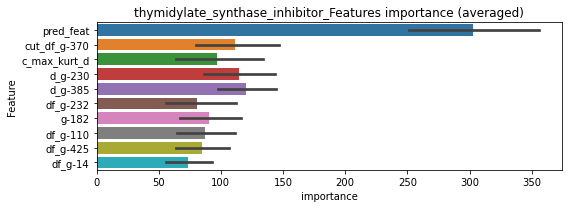

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000516546	valid_1's binary_logloss: 0.000584313
[2000]	training's binary_logloss: 0.000304306	valid_1's binary_logloss: 0.000331763
[3000]	training's binary_logloss: 0.000243694	valid_1's binary_logloss: 0.000254469
[4000]	training's binary_logloss: 0.000215588	valid_1's binary_logloss: 0.000216234
[5000]	training's binary_logloss: 0.000200736	valid_1's binary_logloss: 0.000195859
[6000]	training's binary_logloss: 0.000191092	valid_1's binary_logloss: 0.000182849
[7000]	training's binary_logloss: 0.000184187	valid_1's binary_logloss: 0.000173496
[8000]	training's binary_logloss: 0.000178807	valid_1's binary_logloss: 0.000166472
Early stopping, best iteration is:
[8852]	training's binary_logloss: 0.000175359	valid_1's binary_logloss: 0.000161869


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000514985	valid_1's binary_logloss: 0.00183526
Early stopping, best iteration is:
[1712]	training's binary_logloss: 0.000336127	valid_1's binary_logloss: 0.0016623


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00051601	valid_1's binary_logloss: 0.000574194
[2000]	training's binary_logloss: 0.000303929	valid_1's binary_logloss: 0.000322797
[3000]	training's binary_logloss: 0.000242352	valid_1's binary_logloss: 0.000246285
[4000]	training's binary_logloss: 0.000213522	valid_1's binary_logloss: 0.000208775
[5000]	training's binary_logloss: 0.000198785	valid_1's binary_logloss: 0.000189645
[6000]	training's binary_logloss: 0.00018918	valid_1's binary_logloss: 0.000177261
[7000]	training's binary_logloss: 0.000182159	valid_1's binary_logloss: 0.000168301
[8000]	training's binary_logloss: 0.000177177	valid_1's binary_logloss: 0.000162049
Early stopping, best iteration is:
[8397]	training's binary_logloss: 0.000175512	valid_1's binary_logloss: 0.000159866


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000511388	valid_1's binary_logloss: 0.00470407
Early stopping, best iteration is:
[1287]	training's binary_logloss: 0.000413799	valid_1's binary_logloss: 0.00456589


thymidylate_synthase_inhibitor logloss: 0.0016376271617835041


neg labels: 3289 → selected neg labels: 3282


tlr_agonist, len(trt): 30, len(othr): 3282
target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00234528	valid_1's binary_logloss: 0.00788875
[600]	training's binary_logloss: 0.000497932	valid_1's binary_logloss: 0.00372317
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000457767	valid_1's binary_logloss: 0.00361549
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00234701	valid_1's binary_logloss: 0.00624101
[600]	training's binary_logloss: 0.000494241	valid_1's binary_logloss: 0.00216483
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000459307	valid_1's binary_logloss: 0.00208846
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00241952	valid_1's binary_logloss: 0.00523898
[600]	training's binary_logloss: 0.000500933	valid_1's binary_logloss: 0.00172838
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000459899	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0031355, Threshold: 0.0185611, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, conf_0:0.01299, conf_1:0.02413
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0185611
Num_p_label: 18.0, Expected: 5.0, Adj_threshold_2: 0.0685611
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_3: 0.1185611
threshold: 0.1185611, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000765539	valid_1's binary_logloss: 0.00213102
[600]	training's binary_logloss: 0.000198106	valid_1's binary_logloss: 0.00142601
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000171909	valid_1's binary_logloss: 0.00138927
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000781201	valid_1's binary_logloss: 0.00128614
[600]	training's binary_logloss: 0.000201096	valid_1's binary_logloss: 0.000577452
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000194553	valid_1's binary_logloss: 0.000574405
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000771851	valid_1's binary_logloss: 0.00090717
[600]	training's binary_logloss: 0.000198324	valid_1's binary_logloss: 0.000196889
[900]	training's binary_logloss: 0.000157653	valid_1's binary_logloss: 0.000141076
Early

2 / 3 AUC score:1.000
y_Threshold: 0.5502437, Threshold: 0.1185611, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0512305 Vs.target_rate: 0.00126
Num_p_label: 204.0, conf_0:0.09485, conf_1:0.14227
Num_p_label: 204.0, Expected: 5.0, Adj_threshold_1: 0.1185611
Num_p_label: 203.0, Expected: 5.0, Adj_threshold_2: 0.1685611
Num_p_label: 203.0, Expected: 5.0, Adj_threshold_3: 0.2185611
Num_p_label: 201.0, Expected: 5.0, Adj_threshold_4: 0.2685611
Num_p_label: 201.0, Expected: 5.0, Adj_threshold_5: 0.3185611
Num_p_label: 186.0, Expected: 5.0, Adj_threshold_6: 0.3685611
Num_p_label: 165.0, Expected: 5.0, Adj_threshold_7: 0.4185611
Num_p_label: 132.0, Expected: 5.0, Adj_threshold_8: 0.4685611
Num_p_label: 97.0, Expected: 5.0, Adj_threshold_9: 0.5185611
Num_p_label: 71.0, Expected: 5.0, Adj_threshold_10: 0.5685611


Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000266073	valid_1's binary_logloss: 0.00349012


threshold: 0.6185611, positive_p_label: 56.0/3982, p_label_rate: 0.0140633
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000764851	valid_1's binary_logloss: 0.00212705
[600]	training's binary_logloss: 0.0001982	valid_1's binary_logloss: 0.00142335
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000171744	valid_1's binary_logloss: 0.00138672
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000783172	valid_1's binary_logloss: 0.00131766
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000214933	valid_1's binary_logloss: 0.000643896
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00077957	valid_1's binary_logloss: 0.000927859
[600]	training's binary_logloss: 0.000200887	valid_1's binary_logloss: 0.000201376
[900]	training's binary_logloss: 0.000160263	valid_1's binary_logloss: 0.000144598
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.000155818	valid_1's 

3 / 3 AUC score:1.000
y_Threshold: 0.4760094, Threshold: 0.6185611, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0150678 Vs.target_rate: 0.00126
Num_p_label: 60.0, conf_0:0.50000, conf_1:0.68042
Num_p_label: 60.0, Expected: 5.0, Adj_threshold_1: 0.6185611
Num_p_label: 42.0, Expected: 5.0, Adj_threshold_2: 0.6685611
Num_p_label: 32.0, Expected: 5.0, Adj_threshold_3: 0.7185611
Num_p_label: 19.0, Expected: 5.0, Adj_threshold_4: 0.7685611


Early stopping, best iteration is:
[400]	training's binary_logloss: 0.000354389	valid_1's binary_logloss: 0.00490639


threshold: 0.7685611, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


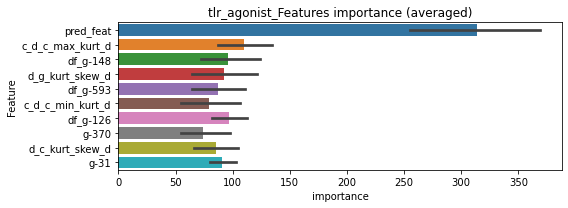

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000476705	valid_1's binary_logloss: 0.00162417
[2000]	training's binary_logloss: 0.000279964	valid_1's binary_logloss: 0.00139389
[3000]	training's binary_logloss: 0.000224972	valid_1's binary_logloss: 0.00132116
[4000]	training's binary_logloss: 0.000198929	valid_1's binary_logloss: 0.00128913
[5000]	training's binary_logloss: 0.00018561	valid_1's binary_logloss: 0.00127233
Early stopping, best iteration is:
[5277]	training's binary_logloss: 0.000182942	valid_1's binary_logloss: 0.00126873


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000482956	valid_1's binary_logloss: 0.000499004
[2000]	training's binary_logloss: 0.000284782	valid_1's binary_logloss: 0.000281168
[3000]	training's binary_logloss: 0.000228478	valid_1's binary_logloss: 0.000216479
[4000]	training's binary_logloss: 0.000202433	valid_1's binary_logloss: 0.000185384
[5000]	training's binary_logloss: 0.000188918	valid_1's binary_logloss: 0.000169099
[6000]	training's binary_logloss: 0.000179963	valid_1's binary_logloss: 0.000158305
[7000]	training's binary_logloss: 0.000173592	valid_1's binary_logloss: 0.000150768
Early stopping, best iteration is:
[7821]	training's binary_logloss: 0.000169224	valid_1's binary_logloss: 0.000145772


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000478278	valid_1's binary_logloss: 0.000501428
[2000]	training's binary_logloss: 0.000284283	valid_1's binary_logloss: 0.000282599
[3000]	training's binary_logloss: 0.000228553	valid_1's binary_logloss: 0.000216522
[4000]	training's binary_logloss: 0.00020273	valid_1's binary_logloss: 0.000184757
[5000]	training's binary_logloss: 0.000188992	valid_1's binary_logloss: 0.000167758
[6000]	training's binary_logloss: 0.000179722	valid_1's binary_logloss: 0.000156473
[7000]	training's binary_logloss: 0.000173062	valid_1's binary_logloss: 0.000148498
[8000]	training's binary_logloss: 0.000168212	valid_1's binary_logloss: 0.000142717
Early stopping, best iteration is:
[8965]	training's binary_logloss: 0.000164751	valid_1's binary_logloss: 0.000138515


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds


tlr_agonist logloss: 0.002606143981439507


Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000906729	valid_1's binary_logloss: 0.00887525
neg labels: 3289 → selected neg labels: 3289


tlr_antagonist, len(trt): 7, len(othr): 3289
target_rate: 0.0002939 → Adj_target_rate: 0.0004391
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000505455	valid_1's binary_logloss: 0.000780436
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.00023302	valid_1's binary_logloss: 0.0003851
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000501691	valid_1's binary_logloss: 0.00302619
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000236661	valid_1's binary_logloss: 0.0024071
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00051239	valid_1's binary_logloss: 0.000687036
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000238078	valid_1's binary_logloss: 0.000311996
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000506948	valid_1's binary_logloss: 0.000667221


1 / 3 AUC score:1.000
y_Threshold: 0.0007354, Threshold: 0.0027130, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, conf_0:0.00190, conf_1:0.00353
Num_p_label: 40.0, Expected: 1.2, Adj_threshold_1: 0.0027130
Num_p_label: 1.0, Expected: 1.2, Adj_threshold_2: 0.0527130
threshold: 0.0527130, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000232648	valid_1's binary_logloss: 0.000328234


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000336045	valid_1's binary_logloss: 0.000361879
[600]	training's binary_logloss: 0.000148243	valid_1's binary_logloss: 0.00016841
[900]	training's binary_logloss: 0.000132085	valid_1's binary_logloss: 0.000152924
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000132076	valid_1's binary_logloss: 0.000152918
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000326969	valid_1's binary_logloss: 0.000642503
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000170781	valid_1's binary_logloss: 0.000443592
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000327113	valid_1's binary_logloss: 0.000960648
Early stopping, best iteration is:
[384]	training's binary_logloss: 0.000203196	valid_1's binary_logloss: 0.000703122
Training until validation scores don't improve fo

2 / 3 AUC score:1.000
y_Threshold: 0.2491595, Threshold: 0.0527130, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0454545 Vs.target_rate: 0.00029
Num_p_label: 181.0, conf_0:0.04217, conf_1:0.06326
Num_p_label: 181.0, Expected: 1.2, Adj_threshold_1: 0.0527130
Num_p_label: 158.0, Expected: 1.2, Adj_threshold_2: 0.1027130
Num_p_label: 108.0, Expected: 1.2, Adj_threshold_3: 0.1527130
Num_p_label: 62.0, Expected: 1.2, Adj_threshold_4: 0.2027130
Num_p_label: 37.0, Expected: 1.2, Adj_threshold_5: 0.2527130
Num_p_label: 28.0, Expected: 1.2, Adj_threshold_6: 0.3027130
Num_p_label: 18.0, Expected: 1.2, Adj_threshold_7: 0.3527130
Num_p_label: 9.0, Expected: 1.2, Adj_threshold_8: 0.4027130
Num_p_label: 6.0, Expected: 1.2, Adj_threshold_9: 0.4527130
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_10: 0.5027130


[900]	training's binary_logloss: 0.000123849	valid_1's binary_logloss: 0.000111122
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000123849	valid_1's binary_logloss: 0.000111122


threshold: 0.5527130, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0003377	valid_1's binary_logloss: 0.000394517
[600]	training's binary_logloss: 0.000147397	valid_1's binary_logloss: 0.00019074
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000132455	valid_1's binary_logloss: 0.000175485
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000324439	valid_1's binary_logloss: 0.000702372
[600]	training's binary_logloss: 0.000141177	valid_1's binary_logloss: 0.000468327
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.000132147	valid_1's binary_logloss: 0.000457338
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000328465	valid_1's binary_logloss: 0.00221829
Early stopping, best iteration is:
[393]	training's binary_logloss: 0.000195842	valid_1's binary_logloss: 0.00188869
Training until validation scores don't improve for 30

3 / 3 AUC score:1.000
y_Threshold: 0.3129229, Threshold: 0.5527130, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00029
Num_p_label: 2.0, conf_0:0.49744, conf_1:0.60798
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_1: 0.5527130
threshold: 0.5527130, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


[900]	training's binary_logloss: 0.000123764	valid_1's binary_logloss: 0.000111277
Early stopping, best iteration is:
[912]	training's binary_logloss: 0.000123482	valid_1's binary_logloss: 0.00011101


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


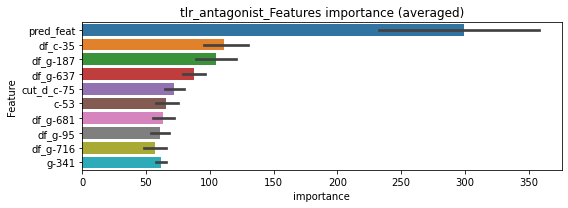

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000355385	valid_1's binary_logloss: 0.000409784
[2000]	training's binary_logloss: 0.000219623	valid_1's binary_logloss: 0.000265395
[3000]	training's binary_logloss: 0.000184766	valid_1's binary_logloss: 0.000228623
[4000]	training's binary_logloss: 0.000168126	valid_1's binary_logloss: 0.000209226
[5000]	training's binary_logloss: 0.000158913	valid_1's binary_logloss: 0.00019965
[6000]	training's binary_logloss: 0.000152581	valid_1's binary_logloss: 0.000193292
[7000]	training's binary_logloss: 0.000148075	valid_1's binary_logloss: 0.000189177
[8000]	training's binary_logloss: 0.000144768	valid_1's binary_logloss: 0.000186449
[9000]	training's binary_logloss: 0.000142251	valid_1's binary_logloss: 0.000183892
Early stopping, best iteration is:
[9392]	training's binary_logloss: 0.000141397	valid_1's binary_logloss: 0.000182892


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0003458	valid_1's binary_logloss: 0.000517487
[2000]	training's binary_logloss: 0.000213954	valid_1's binary_logloss: 0.000364024
[3000]	training's binary_logloss: 0.000179992	valid_1's binary_logloss: 0.000326978
Early stopping, best iteration is:
[3540]	training's binary_logloss: 0.000168719	valid_1's binary_logloss: 0.000315044


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00034478	valid_1's binary_logloss: 0.00213956
Early stopping, best iteration is:
[1573]	training's binary_logloss: 0.000244843	valid_1's binary_logloss: 0.00190431


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000348624	valid_1's binary_logloss: 0.000348805
[2000]	training's binary_logloss: 0.000217224	valid_1's binary_logloss: 0.000215484
[3000]	training's binary_logloss: 0.000181546	valid_1's binary_logloss: 0.000177532
[4000]	training's binary_logloss: 0.000164213	valid_1's binary_logloss: 0.000158381
[5000]	training's binary_logloss: 0.000154528	valid_1's binary_logloss: 0.000147704
[6000]	training's binary_logloss: 0.000147925	valid_1's binary_logloss: 0.000140404
[7000]	training's binary_logloss: 0.000143068	valid_1's binary_logloss: 0.000134992
[8000]	training's binary_logloss: 0.000139442	valid_1's binary_logloss: 0.000131143
[9000]	training's binary_logloss: 0.000136764	valid_1's binary_logloss: 0.000128217
Early stopping, best iteration is:
[9947]	training's binary_logloss: 0.000134785	valid_1's binary_logloss: 0.000125897


tlr_antagonist logloss: 0.0006327596173276967


neg labels: 3289 → selected neg labels: 3289


tnf_inhibitor, len(trt): 36, len(othr): 3289
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00307701	valid_1's binary_logloss: 0.0127386
[600]	training's binary_logloss: 0.000612817	valid_1's binary_logloss: 0.00704629
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000522146	valid_1's binary_logloss: 0.00677569
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00285701	valid_1's binary_logloss: 0.0182713
[600]	training's binary_logloss: 0.000591424	valid_1's binary_logloss: 0.0113271
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000538657	valid_1's binary_logloss: 0.0110336
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00296118	valid_1's binary_logloss: 0.0102981
[600]	training's binary_logloss: 0.000606375	valid_1's binary_logloss: 0.00616309
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000553377	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0044130, Threshold: 0.0205346, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.01437, conf_1:0.02669
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0205346
Num_p_label: 9.0, Expected: 6.0, Adj_threshold_2: 0.0705346
threshold: 0.0705346, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000891345	valid_1's binary_logloss: 0.00143694
[600]	training's binary_logloss: 0.000212618	valid_1's binary_logloss: 0.000433144
[900]	training's binary_logloss: 0.000166931	valid_1's binary_logloss: 0.000362874
Early stopping, best iteration is:
[918]	training's binary_logloss: 0.000165911	valid_1's binary_logloss: 0.000362694
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000861873	valid_1's binary_logloss: 0.0040383
[600]	training's binary_logloss: 0.000201621	valid_1's binary_logloss: 0.00343089
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000203081	valid_1's binary_logloss: 0.00342977
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00089053	valid_1's binary_logloss: 0.00156301
[600]	training's binary_logloss: 0.000203834	valid_1's binary_logloss: 0.000758906
Early s

2 / 3 AUC score:1.000
y_Threshold: 0.7120477, Threshold: 0.0705346, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0514817 Vs.target_rate: 0.00151
Num_p_label: 205.0, conf_0:0.05643, conf_1:0.08464
Num_p_label: 205.0, Expected: 6.0, Adj_threshold_1: 0.0705346
Num_p_label: 205.0, Expected: 6.0, Adj_threshold_2: 0.1205346
Num_p_label: 205.0, Expected: 6.0, Adj_threshold_3: 0.1705346
Num_p_label: 204.0, Expected: 6.0, Adj_threshold_4: 0.2205346
Num_p_label: 204.0, Expected: 6.0, Adj_threshold_5: 0.2705346
Num_p_label: 203.0, Expected: 6.0, Adj_threshold_6: 0.3205346
Num_p_label: 203.0, Expected: 6.0, Adj_threshold_7: 0.3705346
Num_p_label: 202.0, Expected: 6.0, Adj_threshold_8: 0.4205346
Num_p_label: 202.0, Expected: 6.0, Adj_threshold_9: 0.4705346
Num_p_label: 201.0, Expected: 6.0, Adj_threshold_10: 0.5205346
threshold: 0.5705346, positive_p_label: 190.0/3982, p_label_rate: 0.0477147
positive_y_label: 657.0/3813, y_label_rate: 0.1723053

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000911333	valid_1's binary_logloss: 0.00149689
[600]	training's binary_logloss: 0.000211001	valid_1's binary_logloss: 0.000562352
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000182598	valid_1's binary_logloss: 0.000514276
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000874433	valid_1's binary_logloss: 0.00810553
Early stopping, best iteration is:
[416]	training's binary_logloss: 0.000365467	valid_1's binary_logloss: 0.00767272
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000897193	valid_1's binary_logloss: 0.00160537
[600]	training's binary_logloss: 0.000204602	valid_1's binary_logloss: 0.000813811
Early stopping, best iteration is:
[791]	training's binary_logloss: 0.000165811	valid_1's binary_logloss: 0.000737763
Training until validation scores don't improve for 3

3 / 3 AUC score:1.000
y_Threshold: 0.7095648, Threshold: 0.5705346, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000199348	valid_1's binary_logloss: 0.000872476
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000186627	valid_1's binary_logloss: 0.000823932


Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3809
p_label_rate: 0.0467102 Vs.target_rate: 0.00151
Num_p_label: 186.0, conf_0:0.50000, conf_1:0.62759
Num_p_label: 186.0, Expected: 6.0, Adj_threshold_1: 0.5705346
Num_p_label: 166.0, Expected: 6.0, Adj_threshold_2: 0.6205346
Num_p_label: 143.0, Expected: 6.0, Adj_threshold_3: 0.6705346
Num_p_label: 110.0, Expected: 6.0, Adj_threshold_4: 0.7205346
Num_p_label: 63.0, Expected: 6.0, Adj_threshold_5: 0.7705346
threshold: 0.7705346, positive_p_label: 63.0/3982, p_label_rate: 0.0158212
positive_y_label: 655.0/3809, y_label_rate: 0.1719611


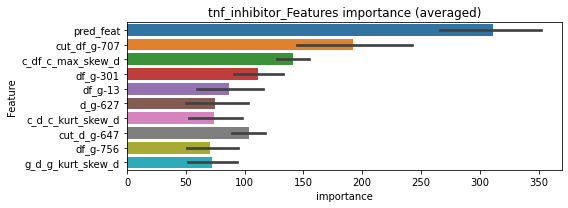

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000509117	valid_1's binary_logloss: 0.00600785
Early stopping, best iteration is:
[1014]	training's binary_logloss: 0.000501816	valid_1's binary_logloss: 0.00600114


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000517	valid_1's binary_logloss: 0.00217846
Early stopping, best iteration is:
[1602]	training's binary_logloss: 0.000348983	valid_1's binary_logloss: 0.00201455


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000507988	valid_1's binary_logloss: 0.00224817
Early stopping, best iteration is:
[1220]	training's binary_logloss: 0.000429475	valid_1's binary_logloss: 0.00217547


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000507635	valid_1's binary_logloss: 0.00129557
Early stopping, best iteration is:
[1718]	training's binary_logloss: 0.000328946	valid_1's binary_logloss: 0.00105948


tnf_inhibitor logloss: 0.002814213532952021


neg labels: 3289 → selected neg labels: 3276


topoisomerase_inhibitor, len(trt): 127, len(othr): 3276
target_rate: 0.0053330 → Adj_target_rate: 0.0051574
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0153634	valid_1's binary_logloss: 0.117226
[600]	training's binary_logloss: 0.00230724	valid_1's binary_logloss: 0.104639
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.00223625	valid_1's binary_logloss: 0.104279
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0170649	valid_1's binary_logloss: 0.0846056
[600]	training's binary_logloss: 0.00237703	valid_1's binary_logloss: 0.064706
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.00230736	valid_1's binary_logloss: 0.0645715
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0167848	valid_1's binary_logloss: 0.0557432
[600]	training's binary_logloss: 0.00249311	valid_1's binary_logloss: 0.0295073
[900]	training's binary_logloss: 0.00116204	valid_1's binary_logloss: 0.0254869
Early stopping, best iteration is:

1 / 3 AUC score:0.992
y_Threshold: 0.0194072, Threshold: 0.1999828, pos_neg_ratio: 0.8000000
Remove_noisy_data: 170 → Positive_corect_labels: 636/3761
p_label_rate: 0.0100452 Vs.target_rate: 0.00533
Num_p_label: 40.0, conf_0:0.13999, conf_1:0.25998
Num_p_label: 40.0, Expected: 21.2, Adj_threshold_1: 0.1999828
Num_p_label: 30.0, Expected: 21.2, Adj_threshold_2: 0.2499828
threshold: 0.2499828, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 636.0/3761, y_label_rate: 0.1691040
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00171718	valid_1's binary_logloss: 0.00421372
[600]	training's binary_logloss: 0.000267541	valid_1's binary_logloss: 0.00085641
[900]	training's binary_logloss: 0.000183092	valid_1's binary_logloss: 0.000593633
Early stopping, best iteration is:
[1055]	training's binary_logloss: 0.000171709	valid_1's binary_logloss: 0.000558455
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00166313	valid_1's binary_logloss: 0.00640886
[600]	training's binary_logloss: 0.000263934	valid_1's binary_logloss: 0.00430609
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000255955	valid_1's binary_logloss: 0.00428419
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00169701	valid_1's binary_logloss: 0.00583793
[600]	training's binary_logloss: 0.000263686	valid_1's binary_logloss: 0.00339442
[900]	tra

2 / 3 AUC score:1.000
y_Threshold: 0.2769632, Threshold: 0.2499828, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 631.0/3751
p_label_rate: 0.0760924 Vs.target_rate: 0.00533
Num_p_label: 303.0, conf_0:0.19999, conf_1:0.29998
Num_p_label: 303.0, Expected: 21.2, Adj_threshold_1: 0.2499828
Num_p_label: 270.0, Expected: 21.2, Adj_threshold_2: 0.2999828
Num_p_label: 240.0, Expected: 21.2, Adj_threshold_3: 0.3499828
Num_p_label: 218.0, Expected: 21.2, Adj_threshold_4: 0.3999828
Num_p_label: 201.0, Expected: 21.2, Adj_threshold_5: 0.4499828
Num_p_label: 194.0, Expected: 21.2, Adj_threshold_6: 0.4999828
Num_p_label: 188.0, Expected: 21.2, Adj_threshold_7: 0.5499828


[600]	training's binary_logloss: 0.000263313	valid_1's binary_logloss: 0.00935585
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000272514	valid_1's binary_logloss: 0.0092436


Num_p_label: 186.0, Expected: 21.2, Adj_threshold_8: 0.5999828
Num_p_label: 185.0, Expected: 21.2, Adj_threshold_9: 0.6499828
Num_p_label: 183.0, Expected: 21.2, Adj_threshold_10: 0.6999828
threshold: 0.7499828, positive_p_label: 183.0/3982, p_label_rate: 0.0459568
positive_y_label: 631.0/3751, y_label_rate: 0.1682218
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138166	valid_1's binary_logloss: 0.00592392
Early stopping, best iteration is:
[407]	training's binary_logloss: 0.000534908	valid_1's binary_logloss: 0.00523042
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131906	valid_1's binary_logloss: 0.00288039
[600]	training's binary_logloss: 0.00017847	valid_1's binary_logloss: 0.000419103
[900]	training's binary_logloss: 0.00010977	valid_1's binary_logloss: 0.000258918
[1200]	training's binary_logloss: 0.000102781	valid_1's binary_logloss: 0.000242478
Early stopping, best iteration is:
[1353]	training's binary_logloss: 0.000101512	valid_1's binary_logloss: 0.000239139
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131672	valid_1's binary_logloss: 0.00287343
[600]	training's binary_logloss: 0.000177925	valid_1's binary_logloss: 0.000417031
[900]	t

3 / 3 AUC score:1.000
y_Threshold: 0.2403545, Threshold: 0.7499828, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 630.0/3749
p_label_rate: 0.0693119 Vs.target_rate: 0.00533
Num_p_label: 276.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 276.0, Expected: 21.2, Adj_threshold_1: 0.7499828
Num_p_label: 187.0, Expected: 21.2, Adj_threshold_2: 0.7999828
threshold: 0.7999828, positive_p_label: 187.0/3982, p_label_rate: 0.0469613


Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000372391	valid_1's binary_logloss: 0.00384455


positive_y_label: 630.0/3749, y_label_rate: 0.1680448


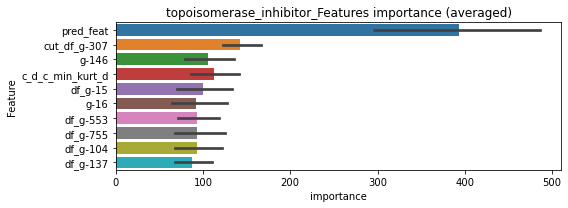

len(train_index) : 2811
len(valid_index) : 938
================================= fold 1/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2812
len(valid_index) : 937
================================= fold 2/4 topoisomerase_inhibitor=================================


Early stopping, best iteration is:
[415]	training's binary_logloss: 0.00135013	valid_1's binary_logloss: 0.00429605
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000575243	valid_1's binary_logloss: 0.00257552
[2000]	training's binary_logloss: 0.000324231	valid_1's binary_logloss: 0.00214834
[3000]	training's binary_logloss: 0.000244788	valid_1's binary_logloss: 0.00200187
[4000]	training's binary_logloss: 0.000207651	valid_1's binary_logloss: 0.00192748
Early stopping, best iteration is:
[4282]	training's binary_logloss: 0.000201572	valid_1's binary_logloss: 0.00191483


len(train_index) : 2812
len(valid_index) : 937
================================= fold 3/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000473321	valid_1's binary_logloss: 0.00077483
[2000]	training's binary_logloss: 0.00025749	valid_1's binary_logloss: 0.000422821
[3000]	training's binary_logloss: 0.00018805	valid_1's binary_logloss: 0.000309127
[4000]	training's binary_logloss: 0.000155396	valid_1's binary_logloss: 0.000255588
[5000]	training's binary_logloss: 0.000138792	valid_1's binary_logloss: 0.000228345
[6000]	training's binary_logloss: 0.000128173	valid_1's binary_logloss: 0.000210892
[7000]	training's binary_logloss: 0.0001208	valid_1's binary_logloss: 0.000198769
[8000]	training's binary_logloss: 0.000115746	valid_1's binary_logloss: 0.000190466
[9000]	training's binary_logloss: 0.000112157	valid_1's binary_logloss: 0.000184572
[10000]	training's binary_logloss: 0.00010955	valid_1's binary_logloss: 0.000180285
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.00010955	valid_1's b

len(train_index) : 2812
len(valid_index) : 937
================================= fold 4/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000473712	valid_1's binary_logloss: 0.000722296
[2000]	training's binary_logloss: 0.000257518	valid_1's binary_logloss: 0.000393601
[3000]	training's binary_logloss: 0.000188027	valid_1's binary_logloss: 0.000287625
[4000]	training's binary_logloss: 0.00015545	valid_1's binary_logloss: 0.000237933
[5000]	training's binary_logloss: 0.000138883	valid_1's binary_logloss: 0.000212644
[6000]	training's binary_logloss: 0.000128216	valid_1's binary_logloss: 0.000196321
[7000]	training's binary_logloss: 0.000120804	valid_1's binary_logloss: 0.000184968
[8000]	training's binary_logloss: 0.00011572	valid_1's binary_logloss: 0.000177184
[9000]	training's binary_logloss: 0.00011213	valid_1's binary_logloss: 0.000171687
[10000]	training's binary_logloss: 0.000109545	valid_1's binary_logloss: 0.000167738
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000109545	valid_1

topoisomerase_inhibitor logloss: 0.0016404720602449768


neg labels: 3289 → selected neg labels: 3287


transient_receptor_potential_channel_antagonist, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138548	valid_1's binary_logloss: 0.00271685
[600]	training's binary_logloss: 0.000382786	valid_1's binary_logloss: 0.00102654
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000382501	valid_1's binary_logloss: 0.00102585
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132944	valid_1's binary_logloss: 0.00696267
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.00040045	valid_1's binary_logloss: 0.00401105
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00140575	valid_1's binary_logloss: 0.00521411
[600]	training's binary_logloss: 0.000384708	valid_1's binary_logloss: 0.00327093
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000390607	valid_1's binary_logloss: 0.00326757
Training until validation scores don't improve for 30 rounds

1 / 3 AUC score:1.000
y_Threshold: 0.0022691, Threshold: 0.0126739, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00887, conf_1:0.01648
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0126739
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_2: 0.0626739
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_3: 0.1126739
threshold: 0.1126739, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000598474	valid_1's binary_logloss: 0.0020762
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000198272	valid_1's binary_logloss: 0.00163209
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000557538	valid_1's binary_logloss: 0.00215448
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000199783	valid_1's binary_logloss: 0.00159475
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000583516	valid_1's binary_logloss: 0.0012203
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.00019725	valid_1's binary_logloss: 0.000803636
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000583141	valid_1's binary_logloss: 0.001956


2 / 3 AUC score:1.000
y_Threshold: 0.5484445, Threshold: 0.1126739, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0519839 Vs.target_rate: 0.00076
Num_p_label: 207.0, conf_0:0.09014, conf_1:0.13521
Num_p_label: 207.0, Expected: 3.0, Adj_threshold_1: 0.1126739
Num_p_label: 207.0, Expected: 3.0, Adj_threshold_2: 0.1626739
Num_p_label: 204.0, Expected: 3.0, Adj_threshold_3: 0.2126739
Num_p_label: 197.0, Expected: 3.0, Adj_threshold_4: 0.2626739
Num_p_label: 188.0, Expected: 3.0, Adj_threshold_5: 0.3126739
Num_p_label: 169.0, Expected: 3.0, Adj_threshold_6: 0.3626739
Num_p_label: 154.0, Expected: 3.0, Adj_threshold_7: 0.4126739
Num_p_label: 135.0, Expected: 3.0, Adj_threshold_8: 0.4626739
Num_p_label: 116.0, Expected: 3.0, Adj_threshold_9: 0.5126739
Num_p_label: 103.0, Expected: 3.0, Adj_threshold_10: 0.5626739
threshold: 0.6126739, positive_p_label: 77.0/3982, p_label_rate: 0.0193370


Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000221298	valid_1's binary_logloss: 0.00156353


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000605135	valid_1's binary_logloss: 0.00176489
Early stopping, best iteration is:
[366]	training's binary_logloss: 0.00034924	valid_1's binary_logloss: 0.001583
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000549211	valid_1's binary_logloss: 0.00210037
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.000247102	valid_1's binary_logloss: 0.00148
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00058004	valid_1's binary_logloss: 0.00118262
[600]	training's binary_logloss: 0.00017848	valid_1's binary_logloss: 0.000699328
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000160342	valid_1's binary_logloss: 0.000675933
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000581306	valid_1's binary_logloss: 0.00146678


3 / 3 AUC score:1.000
y_Threshold: 0.5479156, Threshold: 0.6126739, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0193370 Vs.target_rate: 0.00076
Num_p_label: 77.0, conf_0:0.50000, conf_1:0.67394
Num_p_label: 77.0, Expected: 3.0, Adj_threshold_1: 0.6126739


[600]	training's binary_logloss: 0.000179684	valid_1's binary_logloss: 0.00107708
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000171657	valid_1's binary_logloss: 0.00106581


Num_p_label: 63.0, Expected: 3.0, Adj_threshold_2: 0.6626739
Num_p_label: 50.0, Expected: 3.0, Adj_threshold_3: 0.7126739
Num_p_label: 34.0, Expected: 3.0, Adj_threshold_4: 0.7626739
threshold: 0.7626739, positive_p_label: 34.0/3982, p_label_rate: 0.0085384
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


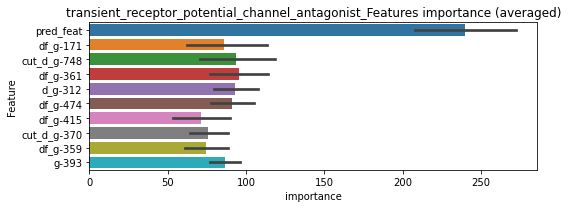

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 transient_receptor_potential_channel_antagonist=================================


Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000512847	valid_1's binary_logloss: 0.00170573
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000426466	valid_1's binary_logloss: 0.00211684
Early stopping, best iteration is:
[1021]	training's binary_logloss: 0.000419502	valid_1's binary_logloss: 0.00210457


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000438112	valid_1's binary_logloss: 0.00107311
[2000]	training's binary_logloss: 0.000267955	valid_1's binary_logloss: 0.000927601
Early stopping, best iteration is:
[2421]	training's binary_logloss: 0.000242539	valid_1's binary_logloss: 0.000889293


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000435906	valid_1's binary_logloss: 0.00106469
[2000]	training's binary_logloss: 0.000265285	valid_1's binary_logloss: 0.00089746
Early stopping, best iteration is:
[2777]	training's binary_logloss: 0.000223266	valid_1's binary_logloss: 0.000845009


transient_receptor_potential_channel_antagonist logloss: 0.0013867553295330358


neg labels: 3289 → selected neg labels: 3289


tropomyosin_receptor_kinase_inhibitor, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000375654	valid_1's binary_logloss: 0.00122438
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.00018884	valid_1's binary_logloss: 0.000859095
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000376107	valid_1's binary_logloss: 0.000513385
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000187274	valid_1's binary_logloss: 0.000254525
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000377099	valid_1's binary_logloss: 0.000940067
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000189394	valid_1's binary_logloss: 0.00049246
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000376311	valid_1's binary_logloss: 0.000547227


1 / 3 AUC score:1.000
y_Threshold: 0.0005401, Threshold: 0.0013784, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00096, conf_1:0.00179
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0013784
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.0513784
threshold: 0.0513784, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000188122	valid_1's binary_logloss: 0.000289015


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000280931	valid_1's binary_logloss: 0.000817337
[600]	training's binary_logloss: 0.000134222	valid_1's binary_logloss: 0.000607176
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000132954	valid_1's binary_logloss: 0.000606284
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000277593	valid_1's binary_logloss: 0.000344745
[600]	training's binary_logloss: 0.000131684	valid_1's binary_logloss: 0.000194603
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.00012089	valid_1's binary_logloss: 0.000183573
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000276304	valid_1's binary_logloss: 0.000257973
[600]	training's binary_logloss: 0.000130742	valid_1's binary_logloss: 0.000115451
[900]	training's binary_logloss: 0.000120561	valid_1's binary_logloss: 0.000104628
E

2 / 3 AUC score:1.000
y_Threshold: 0.2308300, Threshold: 0.0513784, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0323958 Vs.target_rate: 0.00025
Num_p_label: 129.0, conf_0:0.04110, conf_1:0.06165
Num_p_label: 129.0, Expected: 1.0, Adj_threshold_1: 0.0513784
Num_p_label: 75.0, Expected: 1.0, Adj_threshold_2: 0.1013784
Num_p_label: 44.0, Expected: 1.0, Adj_threshold_3: 0.1513784
Num_p_label: 25.0, Expected: 1.0, Adj_threshold_4: 0.2013784
Num_p_label: 17.0, Expected: 1.0, Adj_threshold_5: 0.2513784
Num_p_label: 13.0, Expected: 1.0, Adj_threshold_6: 0.3013784
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_7: 0.3513784
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_8: 0.4013784
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_9: 0.4513784
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_10: 0.5013784


[900]	training's binary_logloss: 0.000119902	valid_1's binary_logloss: 0.000350452
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000119902	valid_1's binary_logloss: 0.000350452


threshold: 0.5513784, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000277789	valid_1's binary_logloss: 0.00112373
Early stopping, best iteration is:
[433]	training's binary_logloss: 0.00015761	valid_1's binary_logloss: 0.000905829
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000278405	valid_1's binary_logloss: 0.00030156
[600]	training's binary_logloss: 0.000131585	valid_1's binary_logloss: 0.00016507
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000120392	valid_1's binary_logloss: 0.000154211
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00027901	valid_1's binary_logloss: 0.000260128
[600]	training's binary_logloss: 0.000131906	valid_1's binary_logloss: 0.000115872
Early stopping, best iteration is:
[853]	training's binary_logloss: 0.000121953	valid_1's binary_logloss: 0.000105311
Training until validation scores don't improve for 30

3 / 3 AUC score:1.000
y_Threshold: 0.1969870, Threshold: 0.5513784, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, conf_0:0.49624, conf_1:0.60652
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.5513784
threshold: 0.5513784, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000122125	valid_1's binary_logloss: 0.000324676


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


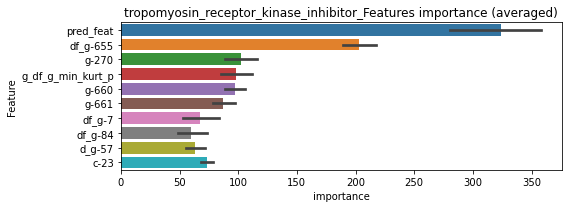

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00031679	valid_1's binary_logloss: 0.00120992
[2000]	training's binary_logloss: 0.000196602	valid_1's binary_logloss: 0.000992938
[3000]	training's binary_logloss: 0.000167846	valid_1's binary_logloss: 0.000954889
Early stopping, best iteration is:
[3743]	training's binary_logloss: 0.00015642	valid_1's binary_logloss: 0.000943317


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000310382	valid_1's binary_logloss: 0.000345464
[2000]	training's binary_logloss: 0.000193284	valid_1's binary_logloss: 0.000228689
[3000]	training's binary_logloss: 0.000163973	valid_1's binary_logloss: 0.000199525
[4000]	training's binary_logloss: 0.000149579	valid_1's binary_logloss: 0.000185261
[5000]	training's binary_logloss: 0.000141296	valid_1's binary_logloss: 0.000177102
[6000]	training's binary_logloss: 0.000135652	valid_1's binary_logloss: 0.00017143
[7000]	training's binary_logloss: 0.000131335	valid_1's binary_logloss: 0.000166976
[8000]	training's binary_logloss: 0.000128256	valid_1's binary_logloss: 0.000164424
[9000]	training's binary_logloss: 0.000125957	valid_1's binary_logloss: 0.000162247
Early stopping, best iteration is:
[9380]	training's binary_logloss: 0.000125285	valid_1's binary_logloss: 0.000161379


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000313987	valid_1's binary_logloss: 0.000291967
[2000]	training's binary_logloss: 0.000195163	valid_1's binary_logloss: 0.000177637
[3000]	training's binary_logloss: 0.000165388	valid_1's binary_logloss: 0.00014753
[4000]	training's binary_logloss: 0.000151599	valid_1's binary_logloss: 0.000132881
[5000]	training's binary_logloss: 0.000143599	valid_1's binary_logloss: 0.000124346
[6000]	training's binary_logloss: 0.000138047	valid_1's binary_logloss: 0.000118415
[7000]	training's binary_logloss: 0.00013385	valid_1's binary_logloss: 0.000113931
[8000]	training's binary_logloss: 0.000130856	valid_1's binary_logloss: 0.00011073
[9000]	training's binary_logloss: 0.000128604	valid_1's binary_logloss: 0.00010832
Early stopping, best iteration is:
[9813]	training's binary_logloss: 0.000127248	valid_1's binary_logloss: 0.000106868


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000312616	valid_1's binary_logloss: 0.000511595
[2000]	training's binary_logloss: 0.000194886	valid_1's binary_logloss: 0.000375256
[3000]	training's binary_logloss: 0.000165386	valid_1's binary_logloss: 0.00034545
[4000]	training's binary_logloss: 0.000150889	valid_1's binary_logloss: 0.000331446
Early stopping, best iteration is:
[4393]	training's binary_logloss: 0.000147372	valid_1's binary_logloss: 0.000327805


tropomyosin_receptor_kinase_inhibitor logloss: 0.0003850055238639695


neg labels: 3289 → selected neg labels: 3281


trpv_agonist, len(trt): 25, len(othr): 3281
target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00181983	valid_1's binary_logloss: 0.00820645
[600]	training's binary_logloss: 0.000454506	valid_1's binary_logloss: 0.0045471
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000453254	valid_1's binary_logloss: 0.00453746
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00188094	valid_1's binary_logloss: 0.00432918
[600]	training's binary_logloss: 0.000453443	valid_1's binary_logloss: 0.00172677
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000428859	valid_1's binary_logloss: 0.00169621
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00184033	valid_1's binary_logloss: 0.00429587
[600]	training's binary_logloss: 0.000459701	valid_1's binary_logloss: 0.00173808
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000438647	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0022479, Threshold: 0.0093403, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, conf_0:0.00654, conf_1:0.01214
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0093403
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_2: 0.0593403
threshold: 0.0593403, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000713291	valid_1's binary_logloss: 0.00203886
[600]	training's binary_logloss: 0.000196584	valid_1's binary_logloss: 0.00132355
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000188661	valid_1's binary_logloss: 0.00129946
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000693338	valid_1's binary_logloss: 0.00298436
Early stopping, best iteration is:
[353]	training's binary_logloss: 0.000427852	valid_1's binary_logloss: 0.00284685
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00069763	valid_1's binary_logloss: 0.000888329
[600]	training's binary_logloss: 0.000193777	valid_1's binary_logloss: 0.000252626
[900]	training's binary_logloss: 0.000158198	valid_1's binary_logloss: 0.000206558
Early stopping, best iteration is:
[986]	training's binary_logloss: 0.000153196	valid_1's

2 / 3 AUC score:1.000
y_Threshold: 0.6898524, Threshold: 0.0593403, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0612757 Vs.target_rate: 0.00105
Num_p_label: 244.0, conf_0:0.04747, conf_1:0.07121
Num_p_label: 244.0, Expected: 4.2, Adj_threshold_1: 0.0593403
Num_p_label: 243.0, Expected: 4.2, Adj_threshold_2: 0.1093403
Num_p_label: 243.0, Expected: 4.2, Adj_threshold_3: 0.1593403
Num_p_label: 243.0, Expected: 4.2, Adj_threshold_4: 0.2093403
Num_p_label: 240.0, Expected: 4.2, Adj_threshold_5: 0.2593403
Num_p_label: 234.0, Expected: 4.2, Adj_threshold_6: 0.3093403
Num_p_label: 220.0, Expected: 4.2, Adj_threshold_7: 0.3593403
Num_p_label: 193.0, Expected: 4.2, Adj_threshold_8: 0.4093403
Num_p_label: 155.0, Expected: 4.2, Adj_threshold_9: 0.4593403
Num_p_label: 110.0, Expected: 4.2, Adj_threshold_10: 0.5093403


Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000160957	valid_1's binary_logloss: 0.0005068


threshold: 0.5593403, positive_p_label: 69.0/3982, p_label_rate: 0.0173280
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000697893	valid_1's binary_logloss: 0.00183182
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000262506	valid_1's binary_logloss: 0.00101275
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000697305	valid_1's binary_logloss: 0.00192689
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000221739	valid_1's binary_logloss: 0.0012474
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000691292	valid_1's binary_logloss: 0.000978494
[600]	training's binary_logloss: 0.000195151	valid_1's binary_logloss: 0.000373775
[900]	training's binary_logloss: 0.000159084	valid_1's binary_logloss: 0.000315997
Early stopping, best iteration is:
[979]	training's binary_logloss: 0.000154749	valid_1's binary_logloss: 0.000309494
Training until validation scores don't improve for 30

3 / 3 AUC score:1.000
y_Threshold: 0.3719347, Threshold: 0.5593403, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0077850 Vs.target_rate: 0.00105
Num_p_label: 31.0, conf_0:0.50000, conf_1:0.61527
Num_p_label: 31.0, Expected: 4.2, Adj_threshold_1: 0.5593403
Num_p_label: 20.0, Expected: 4.2, Adj_threshold_2: 0.6093403
Num_p_label: 13.0, Expected: 4.2, Adj_threshold_3: 0.6593403
Num_p_label: 10.0, Expected: 4.2, Adj_threshold_4: 0.7093403


[900]	training's binary_logloss: 0.000155031	valid_1's binary_logloss: 0.0012624
Early stopping, best iteration is:
[912]	training's binary_logloss: 0.00015455	valid_1's binary_logloss: 0.00126186


threshold: 0.7093403, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3803, y_label_rate: 0.1722324


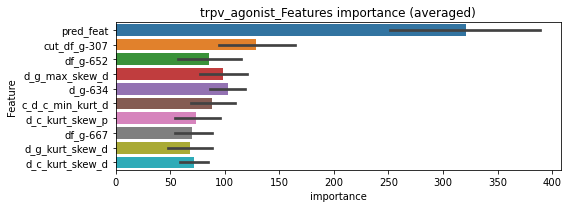

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[901]	training's binary_logloss: 0.000512668	valid_1's binary_logloss: 0.00274723


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000474716	valid_1's binary_logloss: 0.00163042
Early stopping, best iteration is:
[1652]	training's binary_logloss: 0.000320528	valid_1's binary_logloss: 0.00138386


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000470839	valid_1's binary_logloss: 0.000486843
[2000]	training's binary_logloss: 0.000286532	valid_1's binary_logloss: 0.00028091
[3000]	training's binary_logloss: 0.000232264	valid_1's binary_logloss: 0.000215627
[4000]	training's binary_logloss: 0.00020519	valid_1's binary_logloss: 0.000182455
[5000]	training's binary_logloss: 0.000191093	valid_1's binary_logloss: 0.000164918
[6000]	training's binary_logloss: 0.000181521	valid_1's binary_logloss: 0.000153173
[7000]	training's binary_logloss: 0.000174558	valid_1's binary_logloss: 0.000144626
[8000]	training's binary_logloss: 0.000170137	valid_1's binary_logloss: 0.00013907
Early stopping, best iteration is:
[8697]	training's binary_logloss: 0.000167499	valid_1's binary_logloss: 0.000135763


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000461575	valid_1's binary_logloss: 0.00163137
[2000]	training's binary_logloss: 0.0002819	valid_1's binary_logloss: 0.00140603
[3000]	training's binary_logloss: 0.000227636	valid_1's binary_logloss: 0.00133633
[4000]	training's binary_logloss: 0.000201336	valid_1's binary_logloss: 0.00130686
[5000]	training's binary_logloss: 0.000186977	valid_1's binary_logloss: 0.00128891
Early stopping, best iteration is:
[5165]	training's binary_logloss: 0.000185268	valid_1's binary_logloss: 0.0012869


trpv_agonist logloss: 0.0013891152542146628


neg labels: 3289 → selected neg labels: 3280


trpv_antagonist, len(trt): 48, len(othr): 3280
target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00351235	valid_1's binary_logloss: 0.025129
[600]	training's binary_logloss: 0.000726236	valid_1's binary_logloss: 0.0189491
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000625178	valid_1's binary_logloss: 0.0186165
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00372774	valid_1's binary_logloss: 0.0172934
[600]	training's binary_logloss: 0.000735696	valid_1's binary_logloss: 0.00949155
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000571779	valid_1's binary_logloss: 0.00889378
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00382638	valid_1's binary_logloss: 0.00828655
[600]	training's binary_logloss: 0.000777333	valid_1's binary_logloss: 0.00267231
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000574022	valid_1's binary_lo

1 / 3 AUC score:0.999
y_Threshold: 0.0049772, Threshold: 0.0237929, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, conf_0:0.01666, conf_1:0.03093
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0237929


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000906305	valid_1's binary_logloss: 0.0270084


Num_p_label: 9.0, Expected: 8.0, Adj_threshold_2: 0.0737929
threshold: 0.0737929, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000955204	valid_1's binary_logloss: 0.00219811
[600]	training's binary_logloss: 0.000219159	valid_1's binary_logloss: 0.00102177
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000184505	valid_1's binary_logloss: 0.000963241
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000958307	valid_1's binary_logloss: 0.00273379
[600]	training's binary_logloss: 0.000220202	valid_1's binary_logloss: 0.00164265
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000182291	valid_1's binary_logloss: 0.00156965
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000948	valid_1's binary_logloss: 0.00440784
[600]	training's binary_logloss: 0.000218715	valid_1's binary_logloss: 0.00343581
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.000177316	valid_1's bin

2 / 3 AUC score:1.000
y_Threshold: 0.5234231, Threshold: 0.0737929, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0597690 Vs.target_rate: 0.00202
Num_p_label: 238.0, conf_0:0.05903, conf_1:0.08855
Num_p_label: 238.0, Expected: 8.0, Adj_threshold_1: 0.0737929
Num_p_label: 233.0, Expected: 8.0, Adj_threshold_2: 0.1237929
Num_p_label: 227.0, Expected: 8.0, Adj_threshold_3: 0.1737929
Num_p_label: 227.0, Expected: 8.0, Adj_threshold_4: 0.2237929
Num_p_label: 226.0, Expected: 8.0, Adj_threshold_5: 0.2737929
Num_p_label: 223.0, Expected: 8.0, Adj_threshold_6: 0.3237929
Num_p_label: 212.0, Expected: 8.0, Adj_threshold_7: 0.3737929
Num_p_label: 192.0, Expected: 8.0, Adj_threshold_8: 0.4237929
Num_p_label: 164.0, Expected: 8.0, Adj_threshold_9: 0.4737929
Num_p_label: 129.0, Expected: 8.0, Adj_threshold_10: 0.5237929
threshold: 0.5737929, positive_p_label: 86.0/3982, p_label_rate: 0.0215972
positive_y_label: 651.0/3794, y_label_rate: 0.1715867


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00098123	valid_1's binary_logloss: 0.00411045
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000251009	valid_1's binary_logloss: 0.00318443
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000934163	valid_1's binary_logloss: 0.0035054
[600]	training's binary_logloss: 0.000220219	valid_1's binary_logloss: 0.00220976
[900]	training's binary_logloss: 0.000172616	valid_1's binary_logloss: 0.00209903
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000174033	valid_1's binary_logloss: 0.00209533
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000967068	valid_1's binary_logloss: 0.00239796
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000242363	valid_1's binary_logloss: 0.00149129
Training until validation scores don't improve for 30 roun

3 / 3 AUC score:1.000
y_Threshold: 0.2654540, Threshold: 0.5737929, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0005023 Vs.target_rate: 0.00202
Num_p_label: 2.0, conf_0:0.50000, conf_1:0.63117
Num_p_label: 2.0, Expected: 8.0, Adj_threshold_1: 0.5737929
Num_p_label: 3.0, Expected: 8.0, Adj_threshold_2: 0.5537929
Num_p_label: 5.0, Expected: 8.0, Adj_threshold_3: 0.5337929
threshold: 0.5337929, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 651.0/3794, y_label_rate: 0.1715867


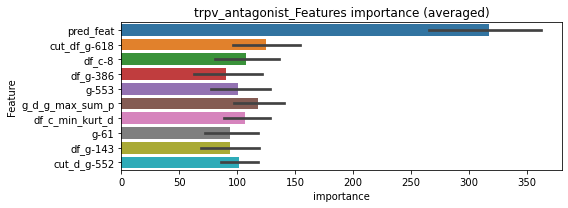

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000541841	valid_1's binary_logloss: 0.00346476
Early stopping, best iteration is:
[1207]	training's binary_logloss: 0.000463343	valid_1's binary_logloss: 0.00337945


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000538104	valid_1's binary_logloss: 0.00280923
Early stopping, best iteration is:
[1099]	training's binary_logloss: 0.000494878	valid_1's binary_logloss: 0.00273906


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[959]	training's binary_logloss: 0.000558084	valid_1's binary_logloss: 0.00238611


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds


trpv_antagonist logloss: 0.002985015904267623


Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000878143	valid_1's binary_logloss: 0.00343529
neg labels: 3289 → selected neg labels: 3253


tubulin_inhibitor, len(trt): 316, len(othr): 3253
target_rate: 0.0132695 → Adj_target_rate: 0.0111926
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0449608	valid_1's binary_logloss: 0.292011
Early stopping, best iteration is:
[345]	training's binary_logloss: 0.0342617	valid_1's binary_logloss: 0.290825
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0440776	valid_1's binary_logloss: 0.279411
Early stopping, best iteration is:
[305]	training's binary_logloss: 0.0426289	valid_1's binary_logloss: 0.279116
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0431567	valid_1's binary_logloss: 0.277291
Early stopping, best iteration is:
[334]	training's binary_logloss: 0.0351826	valid_1's binary_logloss: 0.276598
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0455359	valid_1's binary_logloss: 0.275679


1 / 3 AUC score:0.866
y_Threshold: 0.0966718, Threshold: 0.2535039, pos_neg_ratio: 0.8000000
Remove_noisy_data: 505 → Positive_corect_labels: 463/3398
p_label_rate: 0.0100452 Vs.target_rate: 0.01327
Num_p_label: 40.0, conf_0:0.17745, conf_1:0.32956
threshold: 0.2535039, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[317]	training's binary_logloss: 0.0412184	valid_1's binary_logloss: 0.274378


positive_y_label: 463.0/3398, y_label_rate: 0.1362566
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00179556	valid_1's binary_logloss: 0.00590937
[600]	training's binary_logloss: 0.000287409	valid_1's binary_logloss: 0.00128896
[900]	training's binary_logloss: 0.00019088	valid_1's binary_logloss: 0.00093494
Early stopping, best iteration is:
[956]	training's binary_logloss: 0.000186953	valid_1's binary_logloss: 0.000918101
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0018061	valid_1's binary_logloss: 0.00600861
[600]	training's binary_logloss: 0.000289662	valid_1's binary_logloss: 0.00198655
[900]	training's binary_logloss: 0.000194153	valid_1's binary_logloss: 0.00167557
Early stopping, best iteration is:
[907]	training's binary_logloss: 0.000194008	valid_1's binary_logloss: 0.00167314
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00189096	valid_1's binary_logloss: 0.00697714
[600]	trainin

2 / 3 AUC score:1.000
y_Threshold: 0.6010335, Threshold: 0.2535039, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 460.0/3392
p_label_rate: 0.1117529 Vs.target_rate: 0.01327
Num_p_label: 445.0, conf_0:0.20280, conf_1:0.30420
Num_p_label: 445.0, Expected: 52.8, Adj_threshold_1: 0.2535039
Num_p_label: 444.0, Expected: 52.8, Adj_threshold_2: 0.3035039
Num_p_label: 444.0, Expected: 52.8, Adj_threshold_3: 0.3535039
Num_p_label: 444.0, Expected: 52.8, Adj_threshold_4: 0.4035039
Num_p_label: 444.0, Expected: 52.8, Adj_threshold_5: 0.4535039
Num_p_label: 444.0, Expected: 52.8, Adj_threshold_6: 0.5035039


Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000193564	valid_1's binary_logloss: 0.00504124


Num_p_label: 441.0, Expected: 52.8, Adj_threshold_7: 0.5535039
Num_p_label: 437.0, Expected: 52.8, Adj_threshold_8: 0.6035039
Num_p_label: 430.0, Expected: 52.8, Adj_threshold_9: 0.6535039
Num_p_label: 416.0, Expected: 52.8, Adj_threshold_10: 0.7035039
threshold: 0.7535039, positive_p_label: 391.0/3982, p_label_rate: 0.0981919
positive_y_label: 460.0/3392, y_label_rate: 0.1356132
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00187253	valid_1's binary_logloss: 0.00741449
[600]	training's binary_logloss: 0.000300532	valid_1's binary_logloss: 0.00314056
[900]	training's binary_logloss: 0.000206206	valid_1's binary_logloss: 0.00275746
Early stopping, best iteration is:
[987]	training's binary_logloss: 0.000198441	valid_1's binary_logloss: 0.00273239
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00185327	valid_1's binary_logloss: 0.00844672
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000358093	valid_1's binary_logloss: 0.00435739
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00184382	valid_1's binary_logloss: 0.0044534
[600]	training's binary_logloss: 0.000298172	valid_1's binary_logloss: 0.000664464
[900]	training's binary_logloss: 0.000199215	valid_1's binary_logloss: 0.000371029
Early stopp

3 / 3 AUC score:1.000
y_Threshold: 0.4404944, Threshold: 0.7535039, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 458.0/3388
p_label_rate: 0.0909091 Vs.target_rate: 0.01327
Num_p_label: 362.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 362.0, Expected: 52.8, Adj_threshold_1: 0.7535039
threshold: 0.7535039, positive_p_label: 362.0/3982, p_label_rate: 0.0909091


Early stopping, best iteration is:
[374]	training's binary_logloss: 0.000932673	valid_1's binary_logloss: 0.00928016


positive_y_label: 458.0/3388, y_label_rate: 0.1351830


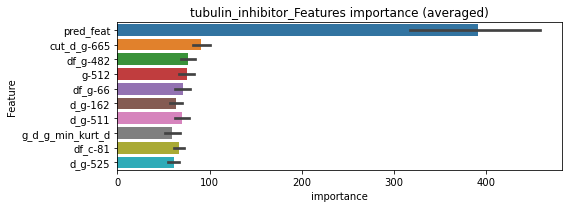

len(train_index) : 2541
len(valid_index) : 847
================================= fold 1/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000672878	valid_1's binary_logloss: 0.00124403
[2000]	training's binary_logloss: 0.000375518	valid_1's binary_logloss: 0.000748703
[3000]	training's binary_logloss: 0.00028691	valid_1's binary_logloss: 0.000584018
[4000]	training's binary_logloss: 0.000247902	valid_1's binary_logloss: 0.000506332
[5000]	training's binary_logloss: 0.000227862	valid_1's binary_logloss: 0.000465716
[6000]	training's binary_logloss: 0.000214429	valid_1's binary_logloss: 0.000438899
[7000]	training's binary_logloss: 0.000204702	valid_1's binary_logloss: 0.000419059
Early stopping, best iteration is:
[7912]	training's binary_logloss: 0.000198087	valid_1's binary_logloss: 0.000406469


len(train_index) : 2541
len(valid_index) : 847
================================= fold 2/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[907]	training's binary_logloss: 0.000745487	valid_1's binary_logloss: 0.00694953


len(train_index) : 2541
len(valid_index) : 847
================================= fold 3/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2541
len(valid_index) : 847


Early stopping, best iteration is:
[474]	training's binary_logloss: 0.00144431	valid_1's binary_logloss: 0.0103123


================================= fold 4/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000678636	valid_1's binary_logloss: 0.00326503
Early stopping, best iteration is:
[1629]	training's binary_logloss: 0.000438475	valid_1's binary_logloss: 0.00282494


tubulin_inhibitor logloss: 0.00512362451503863


neg labels: 3289 → selected neg labels: 3281


tyrosine_kinase_inhibitor, len(trt): 73, len(othr): 3281
target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00637887	valid_1's binary_logloss: 0.0517164
[600]	training's binary_logloss: 0.00113772	valid_1's binary_logloss: 0.0401318
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00115269	valid_1's binary_logloss: 0.0399625
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00561428	valid_1's binary_logloss: 0.0504437
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.0014388	valid_1's binary_logloss: 0.0434479
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00670211	valid_1's binary_logloss: 0.0282225
[600]	training's binary_logloss: 0.0011753	valid_1's binary_logloss: 0.0211123
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.0010039	valid_1's binary_logloss: 0.0207223
Training until validation scores don't improve for 30 rounds
[300]	training

1 / 3 AUC score:0.998
y_Threshold: 0.0073461, Threshold: 0.0624277, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 651/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, conf_0:0.04370, conf_1:0.08116
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.0624277
Num_p_label: 25.0, Expected: 12.2, Adj_threshold_2: 0.1124277
Num_p_label: 14.0, Expected: 12.2, Adj_threshold_3: 0.1624277
threshold: 0.1624277, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 651.0/3795, y_label_rate: 0.1715415
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118593	valid_1's binary_logloss: 0.00605861
[600]	training's binary_logloss: 0.000239306	valid_1's binary_logloss: 0.00407849
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000210286	valid_1's binary_logloss: 0.00400694
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116834	valid_1's binary_logloss: 0.00230243
[600]	training's binary_logloss: 0.000241211	valid_1's binary_logloss: 0.000432397
[900]	training's binary_logloss: 0.000178472	valid_1's binary_logloss: 0.000278509
Early stopping, best iteration is:
[1003]	training's binary_logloss: 0.000172671	valid_1's binary_logloss: 0.000262218
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118514	valid_1's binary_logloss: 0.0029072
[600]	training's binary_logloss: 0.000239519	valid_1's binary_logloss: 0.00141463
[900]	tra

2 / 3 AUC score:1.000
y_Threshold: 0.3263492, Threshold: 0.1624277, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 649.0/3791
p_label_rate: 0.0655450 Vs.target_rate: 0.00307
Num_p_label: 261.0, conf_0:0.12994, conf_1:0.19491
Num_p_label: 261.0, Expected: 12.2, Adj_threshold_1: 0.1624277


[600]	training's binary_logloss: 0.000241218	valid_1's binary_logloss: 0.00480998
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000226794	valid_1's binary_logloss: 0.00476007


Num_p_label: 252.0, Expected: 12.2, Adj_threshold_2: 0.2124277
Num_p_label: 218.0, Expected: 12.2, Adj_threshold_3: 0.2624277
Num_p_label: 163.0, Expected: 12.2, Adj_threshold_4: 0.3124277
Num_p_label: 118.0, Expected: 12.2, Adj_threshold_5: 0.3624277
Num_p_label: 87.0, Expected: 12.2, Adj_threshold_6: 0.4124277
Num_p_label: 77.0, Expected: 12.2, Adj_threshold_7: 0.4624277
Num_p_label: 71.0, Expected: 12.2, Adj_threshold_8: 0.5124277
Num_p_label: 70.0, Expected: 12.2, Adj_threshold_9: 0.5624277
Num_p_label: 69.0, Expected: 12.2, Adj_threshold_10: 0.6124277
threshold: 0.6624277, positive_p_label: 68.0/3982, p_label_rate: 0.0170768
positive_y_label: 649.0/3791, y_label_rate: 0.1711949
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113328	valid_1's binary_logloss: 0.00791324
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000331811	valid_1's binary_logloss: 0.00605871
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114486	valid_1's binary_logloss: 0.00300113
[600]	training's binary_logloss: 0.000236738	valid_1's binary_logloss: 0.00107252
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000180324	valid_1's binary_logloss: 0.000911668
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115278	valid_1's binary_logloss: 0.00451785
[600]	training's binary_logloss: 0.00023682	valid_1's binary_logloss: 0.00298974
[900]	training's binary_logloss: 0.000171413	valid_1's binary_logloss: 0.00284365
Early stopping, best iteration is:
[998]	training's binary_logloss: 0.000164949	valid_1's bina

3 / 3 AUC score:1.000
y_Threshold: 0.2188949, Threshold: 0.6624277, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 646.0/3785
p_label_rate: 0.0145655 Vs.target_rate: 0.00307
Num_p_label: 58.0, conf_0:0.50000, conf_1:0.72867
Num_p_label: 58.0, Expected: 12.2, Adj_threshold_1: 0.6624277
Num_p_label: 58.0, Expected: 12.2, Adj_threshold_2: 0.7124277
Num_p_label: 58.0, Expected: 12.2, Adj_threshold_3: 0.7624277
threshold: 0.7624277, positive_p_label: 58.0/3982, p_label_rate: 0.0145655
positive_y_label: 646.0/3785, y_label_rate: 0.1706737


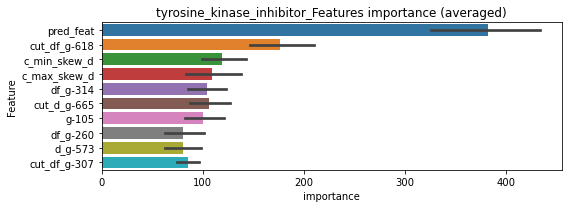

len(train_index) : 2838
len(valid_index) : 947
================================= fold 1/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000452175	valid_1's binary_logloss: 0.000821331
[2000]	training's binary_logloss: 0.000250999	valid_1's binary_logloss: 0.000457851
[3000]	training's binary_logloss: 0.000184632	valid_1's binary_logloss: 0.00033732
[4000]	training's binary_logloss: 0.000153236	valid_1's binary_logloss: 0.000280271
[5000]	training's binary_logloss: 0.000137224	valid_1's binary_logloss: 0.000251167
[6000]	training's binary_logloss: 0.000126757	valid_1's binary_logloss: 0.00023198
[7000]	training's binary_logloss: 0.000119484	valid_1's binary_logloss: 0.000218639
[8000]	training's binary_logloss: 0.0001145	valid_1's binary_logloss: 0.00020952
[9000]	training's binary_logloss: 0.000110965	valid_1's binary_logloss: 0.000203044
[10000]	training's binary_logloss: 0.000108476	valid_1's binary_logloss: 0.000198544
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000108476	valid_1's

len(train_index) : 2839
len(valid_index) : 946
================================= fold 2/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000453216	valid_1's binary_logloss: 0.000778872
[2000]	training's binary_logloss: 0.000251228	valid_1's binary_logloss: 0.000433623
[3000]	training's binary_logloss: 0.00018463	valid_1's binary_logloss: 0.000319127
[4000]	training's binary_logloss: 0.000153193	valid_1's binary_logloss: 0.000265048
[5000]	training's binary_logloss: 0.000137107	valid_1's binary_logloss: 0.000237347
[6000]	training's binary_logloss: 0.000126669	valid_1's binary_logloss: 0.000219287
[7000]	training's binary_logloss: 0.000119391	valid_1's binary_logloss: 0.000206678
[8000]	training's binary_logloss: 0.000114429	valid_1's binary_logloss: 0.000198105
[9000]	training's binary_logloss: 0.00011091	valid_1's binary_logloss: 0.000192022
[10000]	training's binary_logloss: 0.000108421	valid_1's binary_logloss: 0.000187747
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000108421	valid_

len(train_index) : 2839
len(valid_index) : 946
================================= fold 3/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000549645	valid_1's binary_logloss: 0.00367677
Early stopping, best iteration is:
[1644]	training's binary_logloss: 0.000353675	valid_1's binary_logloss: 0.00344505


len(train_index) : 2839
len(valid_index) : 946
================================= fold 4/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000549844	valid_1's binary_logloss: 0.00159216
[2000]	training's binary_logloss: 0.000308692	valid_1's binary_logloss: 0.0012086
Early stopping, best iteration is:
[2920]	training's binary_logloss: 0.000239237	valid_1's binary_logloss: 0.00106643


tyrosine_kinase_inhibitor logloss: 0.001225002368954666


neg labels: 3289 → selected neg labels: 3287


ubiquitin_specific_protease_inhibitor, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00073083	valid_1's binary_logloss: 0.0042533
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000298465	valid_1's binary_logloss: 0.00315714
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00075595	valid_1's binary_logloss: 0.00225958
[600]	training's binary_logloss: 0.000276459	valid_1's binary_logloss: 0.001329
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000275587	valid_1's binary_logloss: 0.00132675
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000765373	valid_1's binary_logloss: 0.00108425
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000285675	valid_1's binary_logloss: 0.000470533
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000737575	valid_1's binary_logloss: 0.00198504

1 / 3 AUC score:1.000
y_Threshold: 0.0011059, Threshold: 0.0037958, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.00266, conf_1:0.00493
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0037958
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0537958
threshold: 0.0537958, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


[600]	training's binary_logloss: 0.000278771	valid_1's binary_logloss: 0.00117532
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000278771	valid_1's binary_logloss: 0.00117532


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000426362	valid_1's binary_logloss: 0.00179067
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000208661	valid_1's binary_logloss: 0.00148182
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00042017	valid_1's binary_logloss: 0.00129206
[600]	training's binary_logloss: 0.000160587	valid_1's binary_logloss: 0.000987018
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000144042	valid_1's binary_logloss: 0.000958026
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000428994	valid_1's binary_logloss: 0.000409934
[600]	training's binary_logloss: 0.000159991	valid_1's binary_logloss: 0.000134942
[900]	training's binary_logloss: 0.000138553	valid_1's binary_logloss: 0.000110254
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000138553	valid_1

2 / 3 AUC score:1.000
y_Threshold: 0.3695135, Threshold: 0.0537958, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0457057 Vs.target_rate: 0.00050
Num_p_label: 182.0, conf_0:0.04304, conf_1:0.06455
Num_p_label: 182.0, Expected: 2.0, Adj_threshold_1: 0.0537958
Num_p_label: 182.0, Expected: 2.0, Adj_threshold_2: 0.1037958
Num_p_label: 181.0, Expected: 2.0, Adj_threshold_3: 0.1537958
Num_p_label: 170.0, Expected: 2.0, Adj_threshold_4: 0.2037958
Num_p_label: 148.0, Expected: 2.0, Adj_threshold_5: 0.2537958
Num_p_label: 125.0, Expected: 2.0, Adj_threshold_6: 0.3037958
Num_p_label: 96.0, Expected: 2.0, Adj_threshold_7: 0.3537958
Num_p_label: 66.0, Expected: 2.0, Adj_threshold_8: 0.4037958
Num_p_label: 46.0, Expected: 2.0, Adj_threshold_9: 0.4537958
Num_p_label: 31.0, Expected: 2.0, Adj_threshold_10: 0.5037958
threshold: 0.5537958, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
====

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000427813	valid_1's binary_logloss: 0.00126044
[600]	training's binary_logloss: 0.000164434	valid_1's binary_logloss: 0.000897637
[900]	training's binary_logloss: 0.000143855	valid_1's binary_logloss: 0.000873053
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000143855	valid_1's binary_logloss: 0.000873053
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000416941	valid_1's binary_logloss: 0.00112568
[600]	training's binary_logloss: 0.000162961	valid_1's binary_logloss: 0.000713377
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000163205	valid_1's binary_logloss: 0.000712896
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000438649	valid_1's binary_logloss: 0.000546545
[600]	training's binary_logloss: 0.000166609	valid_1's binary_logloss: 0.00028031
Ear

3 / 3 AUC score:1.000
y_Threshold: 0.3353170, Threshold: 0.5537958, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0017579 Vs.target_rate: 0.00050
Num_p_label: 7.0, conf_0:0.49842, conf_1:0.60918
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_1: 0.5537958
Num_p_label: 3.0, Expected: 2.0, Adj_threshold_2: 0.6037958
threshold: 0.6037958, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


[900]	training's binary_logloss: 0.000142933	valid_1's binary_logloss: 0.000182833
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000142933	valid_1's binary_logloss: 0.000182833


positive_y_label: 656.0/3810, y_label_rate: 0.1721785


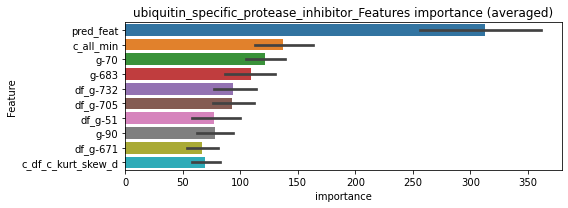

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000393972	valid_1's binary_logloss: 0.00138905
[2000]	training's binary_logloss: 0.000241912	valid_1's binary_logloss: 0.00116856
[3000]	training's binary_logloss: 0.000200594	valid_1's binary_logloss: 0.0011201
Early stopping, best iteration is:
[3815]	training's binary_logloss: 0.000183665	valid_1's binary_logloss: 0.00110427


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000391304	valid_1's binary_logloss: 0.00159884
[2000]	training's binary_logloss: 0.000241981	valid_1's binary_logloss: 0.00132107
Early stopping, best iteration is:
[2043]	training's binary_logloss: 0.000239781	valid_1's binary_logloss: 0.0013165


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000396795	valid_1's binary_logloss: 0.00059337
[2000]	training's binary_logloss: 0.000244607	valid_1's binary_logloss: 0.000416341
[3000]	training's binary_logloss: 0.000203628	valid_1's binary_logloss: 0.000369293
[4000]	training's binary_logloss: 0.000183974	valid_1's binary_logloss: 0.000352029
Early stopping, best iteration is:
[4116]	training's binary_logloss: 0.000182395	valid_1's binary_logloss: 0.000350479


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000396233	valid_1's binary_logloss: 0.000442294
[2000]	training's binary_logloss: 0.000243694	valid_1's binary_logloss: 0.00029052
[3000]	training's binary_logloss: 0.000203094	valid_1's binary_logloss: 0.000247179
[4000]	training's binary_logloss: 0.000183892	valid_1's binary_logloss: 0.000225351
[5000]	training's binary_logloss: 0.000173237	valid_1's binary_logloss: 0.000213084
[6000]	training's binary_logloss: 0.000165975	valid_1's binary_logloss: 0.000204886
[7000]	training's binary_logloss: 0.000160479	valid_1's binary_logloss: 0.000200245
[8000]	training's binary_logloss: 0.000156569	valid_1's binary_logloss: 0.000196456
[9000]	training's binary_logloss: 0.000153684	valid_1's binary_logloss: 0.000193131
Early stopping, best iteration is:
[9139]	training's binary_logloss: 0.000153333	valid_1's binary_logloss: 0.000192668


ubiquitin_specific_protease_inhibitor logloss: 0.0007418598088291804


neg labels: 3289 → selected neg labels: 3264


vegfr_inhibitor, len(trt): 170, len(othr): 3264
target_rate: 0.0071387 → Adj_target_rate: 0.0066081
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.020394	valid_1's binary_logloss: 0.159631
Early stopping, best iteration is:
[385]	training's binary_logloss: 0.0108341	valid_1's binary_logloss: 0.156039
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0208019	valid_1's binary_logloss: 0.114683
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.00507325	valid_1's binary_logloss: 0.0987907
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0202337	valid_1's binary_logloss: 0.129384
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.0039236	valid_1's binary_logloss: 0.120343
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0207135	valid_1's binary_logloss: 0.131326


1 / 3 AUC score:0.973
y_Threshold: 0.0362846, Threshold: 0.1891614, pos_neg_ratio: 0.8000000
Remove_noisy_data: 228 → Positive_corect_labels: 604/3688
p_label_rate: 0.0100452 Vs.target_rate: 0.00714
Num_p_label: 40.0, conf_0:0.13241, conf_1:0.24591


Early stopping, best iteration is:
[399]	training's binary_logloss: 0.00990474	valid_1's binary_logloss: 0.122288


threshold: 0.1891614, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 604.0/3688, y_label_rate: 0.1637744
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173918	valid_1's binary_logloss: 0.00553758
[600]	training's binary_logloss: 0.000265934	valid_1's binary_logloss: 0.00218561
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000233168	valid_1's binary_logloss: 0.00205492
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174665	valid_1's binary_logloss: 0.0076561
[600]	training's binary_logloss: 0.000264414	valid_1's binary_logloss: 0.00475225
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000192796	valid_1's binary_logloss: 0.00457654
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0017389	valid_1's binary_logloss: 0.00610209
[600]	training's binary_logloss: 0.000264812	valid_1's binary_logloss: 0.00307696
[900]	training's binary_logloss: 0.000178772	valid_1's binary_logloss: 0.00286829
Early stopping

2 / 3 AUC score:1.000
y_Threshold: 0.5702531, Threshold: 0.1891614, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 601.0/3682
p_label_rate: 0.0838774 Vs.target_rate: 0.00714
Num_p_label: 334.0, conf_0:0.15133, conf_1:0.22699
Num_p_label: 334.0, Expected: 28.4, Adj_threshold_1: 0.1891614
Num_p_label: 333.0, Expected: 28.4, Adj_threshold_2: 0.2391614
Num_p_label: 333.0, Expected: 28.4, Adj_threshold_3: 0.2891614
Num_p_label: 333.0, Expected: 28.4, Adj_threshold_4: 0.3391614
Num_p_label: 333.0, Expected: 28.4, Adj_threshold_5: 0.3891614
Num_p_label: 333.0, Expected: 28.4, Adj_threshold_6: 0.4391614
Num_p_label: 333.0, Expected: 28.4, Adj_threshold_7: 0.4891614
Num_p_label: 333.0, Expected: 28.4, Adj_threshold_8: 0.5391614
Num_p_label: 329.0, Expected: 28.4, Adj_threshold_9: 0.5891614
Num_p_label: 322.0, Expected: 28.4, Adj_threshold_10: 0.6391614
threshold: 0.6891614, positive_p_label: 306.0/3982, p_label_rate: 0.0768458
positive_y_label: 601.0/3682, y_label_rate:

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016015	valid_1's binary_logloss: 0.00378252
[600]	training's binary_logloss: 0.000241638	valid_1's binary_logloss: 0.000723752
[900]	training's binary_logloss: 0.000159607	valid_1's binary_logloss: 0.000528758
Early stopping, best iteration is:
[947]	training's binary_logloss: 0.000156384	valid_1's binary_logloss: 0.000521727
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144961	valid_1's binary_logloss: 0.00645555
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000358213	valid_1's binary_logloss: 0.00492037
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00159661	valid_1's binary_logloss: 0.0039761
[600]	training's binary_logloss: 0.000241364	valid_1's binary_logloss: 0.000709755
[900]	training's binary_logloss: 0.000158267	valid_1's binary_logloss: 0.000494641
Early sto

3 / 3 AUC score:1.000
y_Threshold: 0.8379865, Threshold: 0.6891614, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 600.0/3680
p_label_rate: 0.0836263 Vs.target_rate: 0.00714
Num_p_label: 333.0, conf_0:0.50000, conf_1:0.75808
Num_p_label: 333.0, Expected: 28.4, Adj_threshold_1: 0.6891614
Num_p_label: 333.0, Expected: 28.4, Adj_threshold_2: 0.7391614
Num_p_label: 333.0, Expected: 28.4, Adj_threshold_3: 0.7891614


Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000165149	valid_1's binary_logloss: 0.000597574


threshold: 0.7891614, positive_p_label: 333.0/3982, p_label_rate: 0.0836263
positive_y_label: 600.0/3680, y_label_rate: 0.1630435


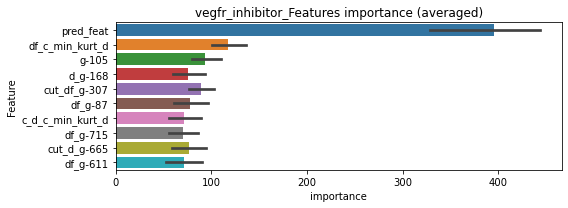

len(train_index) : 2760
len(valid_index) : 920
================================= fold 1/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000484696	valid_1's binary_logloss: 0.000825525
[2000]	training's binary_logloss: 0.000262848	valid_1's binary_logloss: 0.000448901
[3000]	training's binary_logloss: 0.0001918	valid_1's binary_logloss: 0.000327874
[4000]	training's binary_logloss: 0.0001584	valid_1's binary_logloss: 0.000270916
[5000]	training's binary_logloss: 0.000141445	valid_1's binary_logloss: 0.000241996
[6000]	training's binary_logloss: 0.000130601	valid_1's binary_logloss: 0.000223458
[7000]	training's binary_logloss: 0.000123068	valid_1's binary_logloss: 0.000210579
[8000]	training's binary_logloss: 0.000117905	valid_1's binary_logloss: 0.000201752
[9000]	training's binary_logloss: 0.000114239	valid_1's binary_logloss: 0.000195478
[10000]	training's binary_logloss: 0.000111592	valid_1's binary_logloss: 0.000190952
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000111592	valid_1'

len(train_index) : 2760
len(valid_index) : 920
================================= fold 2/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00048391	valid_1's binary_logloss: 0.000908464
[2000]	training's binary_logloss: 0.000262612	valid_1's binary_logloss: 0.000494637
[3000]	training's binary_logloss: 0.000191628	valid_1's binary_logloss: 0.000361332
[4000]	training's binary_logloss: 0.000158411	valid_1's binary_logloss: 0.000298959
[5000]	training's binary_logloss: 0.000141532	valid_1's binary_logloss: 0.000267236
[6000]	training's binary_logloss: 0.00013062	valid_1's binary_logloss: 0.000246632
[7000]	training's binary_logloss: 0.000123053	valid_1's binary_logloss: 0.000232334
[8000]	training's binary_logloss: 0.000117871	valid_1's binary_logloss: 0.000222554
[9000]	training's binary_logloss: 0.000114198	valid_1's binary_logloss: 0.000215614
[10000]	training's binary_logloss: 0.000111577	valid_1's binary_logloss: 0.000210681
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000111577	valid_

len(train_index) : 2760
len(valid_index) : 920
================================= fold 3/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000484034	valid_1's binary_logloss: 0.000831605
[2000]	training's binary_logloss: 0.000262688	valid_1's binary_logloss: 0.00045269
[3000]	training's binary_logloss: 0.000191679	valid_1's binary_logloss: 0.00033066
[4000]	training's binary_logloss: 0.000158415	valid_1's binary_logloss: 0.000273458
[5000]	training's binary_logloss: 0.000141508	valid_1's binary_logloss: 0.000244355
[6000]	training's binary_logloss: 0.000130617	valid_1's binary_logloss: 0.00022557
[7000]	training's binary_logloss: 0.000123059	valid_1's binary_logloss: 0.000212519
[8000]	training's binary_logloss: 0.000117878	valid_1's binary_logloss: 0.000203575
[9000]	training's binary_logloss: 0.000114206	valid_1's binary_logloss: 0.000197237
[10000]	training's binary_logloss: 0.000111582	valid_1's binary_logloss: 0.000192708
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000111582	valid_1

len(train_index) : 2760
len(valid_index) : 920
================================= fold 4/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000484117	valid_1's binary_logloss: 0.000846408
[2000]	training's binary_logloss: 0.000262713	valid_1's binary_logloss: 0.000460772
[3000]	training's binary_logloss: 0.000191704	valid_1's binary_logloss: 0.000336605
[4000]	training's binary_logloss: 0.000158403	valid_1's binary_logloss: 0.000278329
[5000]	training's binary_logloss: 0.000141492	valid_1's binary_logloss: 0.00024871
[6000]	training's binary_logloss: 0.000130599	valid_1's binary_logloss: 0.000229567
[7000]	training's binary_logloss: 0.000123058	valid_1's binary_logloss: 0.000216318
[8000]	training's binary_logloss: 0.000117882	valid_1's binary_logloss: 0.000207229
[9000]	training's binary_logloss: 0.000114203	valid_1's binary_logloss: 0.000200757
[10000]	training's binary_logloss: 0.000111576	valid_1's binary_logloss: 0.000196145
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000111576	valid

vegfr_inhibitor logloss: 0.00019762152748871407


neg labels: 3289 → selected neg labels: 3286


vitamin_b, len(trt): 26, len(othr): 3286
target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00186088	valid_1's binary_logloss: 0.00534421
[600]	training's binary_logloss: 0.000448643	valid_1's binary_logloss: 0.00227891
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000432934	valid_1's binary_logloss: 0.0022307
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00186257	valid_1's binary_logloss: 0.00714788
[600]	training's binary_logloss: 0.000438156	valid_1's binary_logloss: 0.0039113
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000438337	valid_1's binary_logloss: 0.00390963
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183652	valid_1's binary_logloss: 0.00594988
[600]	training's binary_logloss: 0.000438478	valid_1's binary_logloss: 0.00290856
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000434661	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0026706, Threshold: 0.0108417, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, conf_0:0.00759, conf_1:0.01409
Num_p_label: 40.0, Expected: 4.3, Adj_threshold_1: 0.0108417
Num_p_label: 6.0, Expected: 4.3, Adj_threshold_2: 0.0608417
threshold: 0.0608417, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000700738	valid_1's binary_logloss: 0.00229978
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000222326	valid_1's binary_logloss: 0.00169734
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000686638	valid_1's binary_logloss: 0.00226115
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000234039	valid_1's binary_logloss: 0.00177759
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000692493	valid_1's binary_logloss: 0.0012644
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000216579	valid_1's binary_logloss: 0.000651921
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000695363	valid_1's binary_logloss: 0.00155912


2 / 3 AUC score:1.000
y_Threshold: 0.7102806, Threshold: 0.0608417, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0532396 Vs.target_rate: 0.00109
Num_p_label: 212.0, conf_0:0.04867, conf_1:0.07301
Num_p_label: 212.0, Expected: 4.3, Adj_threshold_1: 0.0608417
Num_p_label: 212.0, Expected: 4.3, Adj_threshold_2: 0.1108417
Num_p_label: 212.0, Expected: 4.3, Adj_threshold_3: 0.1608417
Num_p_label: 212.0, Expected: 4.3, Adj_threshold_4: 0.2108417
Num_p_label: 209.0, Expected: 4.3, Adj_threshold_5: 0.2608417
Num_p_label: 209.0, Expected: 4.3, Adj_threshold_6: 0.3108417


Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000215043	valid_1's binary_logloss: 0.000858536


Num_p_label: 208.0, Expected: 4.3, Adj_threshold_7: 0.3608417
Num_p_label: 198.0, Expected: 4.3, Adj_threshold_8: 0.4108417
Num_p_label: 190.0, Expected: 4.3, Adj_threshold_9: 0.4608417
Num_p_label: 177.0, Expected: 4.3, Adj_threshold_10: 0.5108417
threshold: 0.5608417, positive_p_label: 161.0/3982, p_label_rate: 0.0404319
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000701717	valid_1's binary_logloss: 0.00230403
Early stopping, best iteration is:
[384]	training's binary_logloss: 0.000359058	valid_1's binary_logloss: 0.00177809
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00068932	valid_1's binary_logloss: 0.00215575
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000203738	valid_1's binary_logloss: 0.00169183
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000687795	valid_1's binary_logloss: 0.00115124
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000215504	valid_1's binary_logloss: 0.000606971
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000700274	valid_1's binary_logloss: 0.00163961
Early stopping, best iteration is:
[355]	training's binary_logloss: 0.0004284

3 / 3 AUC score:1.000
y_Threshold: 0.6669817, Threshold: 0.5608417, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0394274 Vs.target_rate: 0.00109
Num_p_label: 157.0, conf_0:0.50000, conf_1:0.61693
Num_p_label: 157.0, Expected: 4.3, Adj_threshold_1: 0.5608417
Num_p_label: 133.0, Expected: 4.3, Adj_threshold_2: 0.6108417
Num_p_label: 108.0, Expected: 4.3, Adj_threshold_3: 0.6608417
Num_p_label: 82.0, Expected: 4.3, Adj_threshold_4: 0.7108417
Num_p_label: 62.0, Expected: 4.3, Adj_threshold_5: 0.7608417
threshold: 0.7608417, positive_p_label: 62.0/3982, p_label_rate: 0.0155701
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


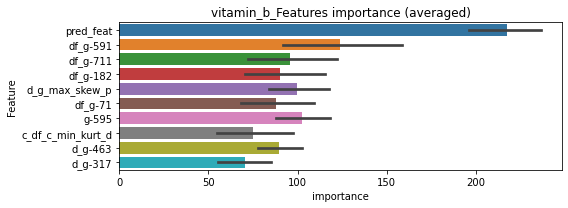

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000470928	valid_1's binary_logloss: 0.00185264
[2000]	training's binary_logloss: 0.000281755	valid_1's binary_logloss: 0.00162767
Early stopping, best iteration is:
[1979]	training's binary_logloss: 0.000283419	valid_1's binary_logloss: 0.0016269


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000464414	valid_1's binary_logloss: 0.00199727
[2000]	training's binary_logloss: 0.000277345	valid_1's binary_logloss: 0.00181534
[3000]	training's binary_logloss: 0.000224061	valid_1's binary_logloss: 0.00176916
Early stopping, best iteration is:
[3964]	training's binary_logloss: 0.000198587	valid_1's binary_logloss: 0.00174618


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00045955	valid_1's binary_logloss: 0.000761067
[2000]	training's binary_logloss: 0.00027725	valid_1's binary_logloss: 0.000579137
Early stopping, best iteration is:
[2669]	training's binary_logloss: 0.000235001	valid_1's binary_logloss: 0.00053753


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000461272	valid_1's binary_logloss: 0.00134762
Early stopping, best iteration is:
[1150]	training's binary_logloss: 0.000411922	valid_1's binary_logloss: 0.00126537


vitamin_b logloss: 0.0012944607298312036


neg labels: 3289 → selected neg labels: 3284


vitamin_d_receptor_agonist, len(trt): 39, len(othr): 3284
target_rate: 0.0016377 → Adj_target_rate: 0.0018906
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00284538	valid_1's binary_logloss: 0.0131295
[600]	training's binary_logloss: 0.000609714	valid_1's binary_logloss: 0.00767293
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.00053302	valid_1's binary_logloss: 0.00747334
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00306928	valid_1's binary_logloss: 0.0120469
[600]	training's binary_logloss: 0.000626171	valid_1's binary_logloss: 0.00649168
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000541578	valid_1's binary_logloss: 0.0063504
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00311677	valid_1's binary_logloss: 0.00735035
[600]	training's binary_logloss: 0.000636127	valid_1's binary_logloss: 0.00254896
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000563649	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0038048, Threshold: 0.0184988, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00164
Num_p_label: 40.0, conf_0:0.01295, conf_1:0.02405
Num_p_label: 40.0, Expected: 6.5, Adj_threshold_1: 0.0184988
Num_p_label: 6.0, Expected: 6.5, Adj_threshold_2: 0.0684988
threshold: 0.0684988, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000868197	valid_1's binary_logloss: 0.00281247
[600]	training's binary_logloss: 0.000209007	valid_1's binary_logloss: 0.00154793
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000198377	valid_1's binary_logloss: 0.00152342
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00085742	valid_1's binary_logloss: 0.00243219
[600]	training's binary_logloss: 0.000206227	valid_1's binary_logloss: 0.00160246
[900]	training's binary_logloss: 0.000160068	valid_1's binary_logloss: 0.00152455
Early stopping, best iteration is:
[912]	training's binary_logloss: 0.000159305	valid_1's binary_logloss: 0.0015234
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[269]	training's binary_logloss: 0.00123541	valid_1's binary_logloss: 0.00685706
Training until validation scores don't improve for 30 round

2 / 3 AUC score:1.000
y_Threshold: 0.6935272, Threshold: 0.0684988, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0620291 Vs.target_rate: 0.00164
Num_p_label: 247.0, conf_0:0.05480, conf_1:0.08220
Num_p_label: 247.0, Expected: 6.5, Adj_threshold_1: 0.0684988
Num_p_label: 246.0, Expected: 6.5, Adj_threshold_2: 0.1184988
Num_p_label: 242.0, Expected: 6.5, Adj_threshold_3: 0.1684988
Num_p_label: 242.0, Expected: 6.5, Adj_threshold_4: 0.2184988
Num_p_label: 241.0, Expected: 6.5, Adj_threshold_5: 0.2684988
Num_p_label: 241.0, Expected: 6.5, Adj_threshold_6: 0.3184988
Num_p_label: 238.0, Expected: 6.5, Adj_threshold_7: 0.3684988
Num_p_label: 234.0, Expected: 6.5, Adj_threshold_8: 0.4184988
Num_p_label: 215.0, Expected: 6.5, Adj_threshold_9: 0.4684988
Num_p_label: 185.0, Expected: 6.5, Adj_threshold_10: 0.5184988
threshold: 0.5684988, positive_p_label: 138.0/3982, p_label_rate: 0.0346560
positive_y_label: 656.0/3808, y_label_rate: 0.1722689

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000870877	valid_1's binary_logloss: 0.00225377
[600]	training's binary_logloss: 0.000208297	valid_1's binary_logloss: 0.00111039
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000181023	valid_1's binary_logloss: 0.00102936
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000873644	valid_1's binary_logloss: 0.0016162
[600]	training's binary_logloss: 0.000207952	valid_1's binary_logloss: 0.000684713
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000175326	valid_1's binary_logloss: 0.000620653
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[265]	training's binary_logloss: 0.00135426	valid_1's binary_logloss: 0.119835
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000883931	valid_1's binary_logloss: 0.001958

3 / 3 AUC score:1.000
y_Threshold: 0.6254174, Threshold: 0.5684988, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0215972 Vs.target_rate: 0.00164
Num_p_label: 86.0, conf_0:0.50000, conf_1:0.62535
Num_p_label: 86.0, Expected: 6.5, Adj_threshold_1: 0.5684988
Num_p_label: 76.0, Expected: 6.5, Adj_threshold_2: 0.6184988


Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000188351	valid_1's binary_logloss: 0.000833994


Num_p_label: 59.0, Expected: 6.5, Adj_threshold_3: 0.6684988
Num_p_label: 27.0, Expected: 6.5, Adj_threshold_4: 0.7184988
Num_p_label: 12.0, Expected: 6.5, Adj_threshold_5: 0.7684988
threshold: 0.7684988, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


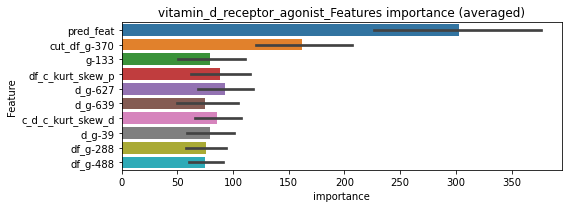

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000506374	valid_1's binary_logloss: 0.00209804
Early stopping, best iteration is:
[1477]	training's binary_logloss: 0.00036577	valid_1's binary_logloss: 0.00191012


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0005054	valid_1's binary_logloss: 0.0028663
Early stopping, best iteration is:
[1308]	training's binary_logloss: 0.000401488	valid_1's binary_logloss: 0.0027169


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000504575	valid_1's binary_logloss: 0.00131767
[2000]	training's binary_logloss: 0.000299436	valid_1's binary_logloss: 0.00104761
[3000]	training's binary_logloss: 0.000239993	valid_1's binary_logloss: 0.000966792
[4000]	training's binary_logloss: 0.000212135	valid_1's binary_logloss: 0.000928875
[5000]	training's binary_logloss: 0.000197445	valid_1's binary_logloss: 0.000908657
Early stopping, best iteration is:
[5487]	training's binary_logloss: 0.000192137	valid_1's binary_logloss: 0.000901846


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000505842	valid_1's binary_logloss: 0.00198345
[2000]	training's binary_logloss: 0.000296975	valid_1's binary_logloss: 0.00166909
[3000]	training's binary_logloss: 0.000236254	valid_1's binary_logloss: 0.00157249
[4000]	training's binary_logloss: 0.00020867	valid_1's binary_logloss: 0.00152936
[5000]	training's binary_logloss: 0.000193915	valid_1's binary_logloss: 0.00150517
[6000]	training's binary_logloss: 0.000184393	valid_1's binary_logloss: 0.00149014
Early stopping, best iteration is:
[6389]	training's binary_logloss: 0.000181286	valid_1's binary_logloss: 0.00148461


vitamin_d_receptor_agonist logloss: 0.0017545623107848491


neg labels: 3289 → selected neg labels: 3287


wnt_inhibitor, len(trt): 30, len(othr): 3287
target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00242258	valid_1's binary_logloss: 0.0066851
[600]	training's binary_logloss: 0.000515431	valid_1's binary_logloss: 0.00234724
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000467919	valid_1's binary_logloss: 0.0022188
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00228964	valid_1's binary_logloss: 0.0106652
[600]	training's binary_logloss: 0.000509906	valid_1's binary_logloss: 0.00567599
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000456868	valid_1's binary_logloss: 0.00544576
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00241911	valid_1's binary_logloss: 0.0052016
[600]	training's binary_logloss: 0.000522599	valid_1's binary_logloss: 0.00163982
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000471117	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0035947, Threshold: 0.0165831, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, conf_0:0.01161, conf_1:0.02156
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0165831
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_2: 0.0665831
threshold: 0.0665831, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000763988	valid_1's binary_logloss: 0.00304108
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.00020827	valid_1's binary_logloss: 0.0021873
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000737973	valid_1's binary_logloss: 0.00221669
[600]	training's binary_logloss: 0.000187291	valid_1's binary_logloss: 0.00140773
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000167049	valid_1's binary_logloss: 0.00137194
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000761986	valid_1's binary_logloss: 0.000883947
[600]	training's binary_logloss: 0.000190772	valid_1's binary_logloss: 0.000197576
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000152174	valid_1's binary_logloss: 0.000143294
Training until validation scores don't improve for 30 r

2 / 3 AUC score:1.000
y_Threshold: 0.4981389, Threshold: 0.0665831, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0449523 Vs.target_rate: 0.00126
Num_p_label: 179.0, conf_0:0.05327, conf_1:0.07990
Num_p_label: 179.0, Expected: 5.0, Adj_threshold_1: 0.0665831
Num_p_label: 178.0, Expected: 5.0, Adj_threshold_2: 0.1165831
Num_p_label: 177.0, Expected: 5.0, Adj_threshold_3: 0.1665831
Num_p_label: 177.0, Expected: 5.0, Adj_threshold_4: 0.2165831
Num_p_label: 177.0, Expected: 5.0, Adj_threshold_5: 0.2665831
Num_p_label: 177.0, Expected: 5.0, Adj_threshold_6: 0.3165831
Num_p_label: 174.0, Expected: 5.0, Adj_threshold_7: 0.3665831
Num_p_label: 165.0, Expected: 5.0, Adj_threshold_8: 0.4165831
Num_p_label: 147.0, Expected: 5.0, Adj_threshold_9: 0.4665831
Num_p_label: 127.0, Expected: 5.0, Adj_threshold_10: 0.5165831
threshold: 0.5665831, positive_p_label: 96.0/3982, p_label_rate: 0.0241085
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000773777	valid_1's binary_logloss: 0.00343241
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000293144	valid_1's binary_logloss: 0.00261089
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000752253	valid_1's binary_logloss: 0.00233567
[600]	training's binary_logloss: 0.000190484	valid_1's binary_logloss: 0.00151771
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000154722	valid_1's binary_logloss: 0.00146235
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000767802	valid_1's binary_logloss: 0.000867403
[600]	training's binary_logloss: 0.000191311	valid_1's binary_logloss: 0.000189994
[900]	training's binary_logloss: 0.000149881	valid_1's binary_logloss: 0.000135487
Early stopping, best iteration is:
[980]	training's binary_logloss: 0.000146633	valid_1'

3 / 3 AUC score:1.000
y_Threshold: 0.5082778, Threshold: 0.5665831, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0238574 Vs.target_rate: 0.00126
Num_p_label: 95.0, conf_0:0.50000, conf_1:0.62324
Num_p_label: 95.0, Expected: 5.0, Adj_threshold_1: 0.5665831
Num_p_label: 71.0, Expected: 5.0, Adj_threshold_2: 0.6165831
Num_p_label: 53.0, Expected: 5.0, Adj_threshold_3: 0.6665831
Num_p_label: 30.0, Expected: 5.0, Adj_threshold_4: 0.7165831
Num_p_label: 24.0, Expected: 5.0, Adj_threshold_5: 0.7665831
threshold: 0.7665831, positive_p_label: 24.0/3982, p_label_rate: 0.0060271


Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000260983	valid_1's binary_logloss: 0.00103403


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


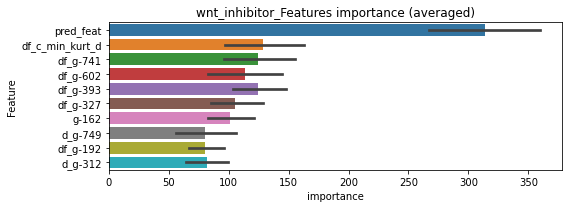

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000475927	valid_1's binary_logloss: 0.00498378
Early stopping, best iteration is:
[1107]	training's binary_logloss: 0.000436696	valid_1's binary_logloss: 0.00487485


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000475439	valid_1's binary_logloss: 0.00229967
Early stopping, best iteration is:
[1942]	training's binary_logloss: 0.000289224	valid_1's binary_logloss: 0.00208009


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000478499	valid_1's binary_logloss: 0.000472808
[2000]	training's binary_logloss: 0.000282946	valid_1's binary_logloss: 0.000266958
[3000]	training's binary_logloss: 0.000227281	valid_1's binary_logloss: 0.000205297
[4000]	training's binary_logloss: 0.000200193	valid_1's binary_logloss: 0.000174922
[5000]	training's binary_logloss: 0.000185405	valid_1's binary_logloss: 0.00015834
[6000]	training's binary_logloss: 0.000175367	valid_1's binary_logloss: 0.000147648
[7000]	training's binary_logloss: 0.00016821	valid_1's binary_logloss: 0.000139866
[8000]	training's binary_logloss: 0.000162836	valid_1's binary_logloss: 0.000134071
Early stopping, best iteration is:
[8296]	training's binary_logloss: 0.000161591	valid_1's binary_logloss: 0.000132698


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds


wnt_inhibitor logloss: 0.0022194037460324285


Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000523197	valid_1's binary_logloss: 0.00178899


CV:0.002573475541256598


In [49]:
RUN()